In [3]:
import csv
from eisy.simulation import data_simulation
import numpy as np
import pandas as pd
import time
from eisy.simulation import plotting
from eisy.simulation import circuits
import matplotlib.pyplot as plt

### 1-semicircle

In [ ]:
f_start = 10**6
f_stop = 0.01
decades = 3
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 100 # ohm
C= 25E-6 #F
resistance= np.linspace(1,100,25)
circuit = circuits.cir_RC_parallel(f_range[1], Rs,C)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.RC_simulation(f_start, f_stop, decades, Rs, C, 'parallel', alteration='noise', noisescale=0.05)
plotting.nyquist_plot(response, 'one_semicircle',save_location='simulation_data/',alteration='noise' ,save_image=True,transparent=True, axis_off=True)

In [ ]:
resistance= np.linspace(90,100,10)
for Rs in resistance:
    circuit = circuits.cir_RC_parallel(f_range[1], Rs,C)
    circuit_array = data_simulation.impedance_array(circuit)
    response= data_simulation.RC_simulation(f_start, f_stop, decades, Rs, C, 'parallel', alteration='noise', noisescale=0.05)
    plotting.nyquist_plot(response, 'one_semicircle',save_location='simulation_data/',alteration='noise' ,save_image=False, axis_off=True)

### 1-semicircle Shifted

In [ ]:
f_start = 10**6
f_stop = 0.01
decades = 6
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 25E-6 #F
R1= 50   # ohm

In [ ]:
resistance= np.linspace(1,100,25)
for R1 in resistance:
    circuit = circuits.cir_RsRC(f_range[1], Rs, R1,2E-6)
    circuit_array = data_simulation.impedance_array(circuit)
#     response= data_simulation.to_dataframe(f_range,circuit_array)
    
    response= data_simulation.RsRC_simulation(f_start, f_stop, decades, Rs, R1, C, alteration='noise', noisescale=0.1)
    plotting.nyquist_plot(response, 'shifted_semicircle', save_location='simulation_data/', alteration='noise',save_image=False, axis_off= True )

In [ ]:
f_start = 10**6
f_stop = 0.01
decades = 3
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q= 25E-6 #F
alpha= 0.8
resistance= np.linspace(1,100,25)
for Rs in resistance: 
    circuit = circuits.cir_RQ_parallel(f_range[1], Rs,Q,0.85)
    circuit_array = data_simulation.impedance_array(circuit)
    response= data_simulation.RQ_simulation(f_start, f_stop, decades, Rs, Q,0.8, 'parallel',alteration='noise', noisescale=0.4)
    plotting.nyquist_plot(response, 'shifted_semicircle', save_location='simulation_data/',alteration='noise', save_image=False, axis_off=True )

#### 2- semicircles

In [ ]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R1= 50   # ohm

In [ ]:
circuit = circuits.cir_RsRCRC(f_range[1], Rs, R1,C, Rs,C)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'shifted_double_semicircle_1',save_location='simulation_data/', save_image=False )

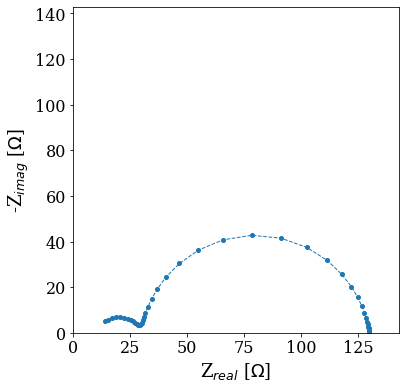

In [20]:
circuit = circuits.cir_RsRQRQ(f_range[1], Rs, 20,10**(-6),0.75, 100,C,0.9)
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'shifted_double_semicircle_2',save_location='simulation_data/', save_image=False )

### Randles

In [ ]:
f_start = 10**8
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R1= 50   # ohm

In [ ]:
circuit = circuits.cir_Randles_simplified(f_range[1], Rs, 20,0.9,0.75,10**(-6))
circuit_array = data_simulation.impedance_array(circuit)
response= data_simulation.to_dataframe(f_range,circuit_array)
plotting.nyquist_plot(response, 'tail',save_location='simulation_data/', save_image=False)

____

## Plot and Save

### single semicircle- not noisy

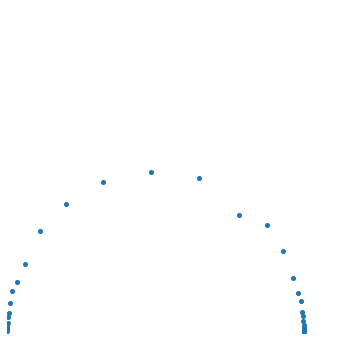

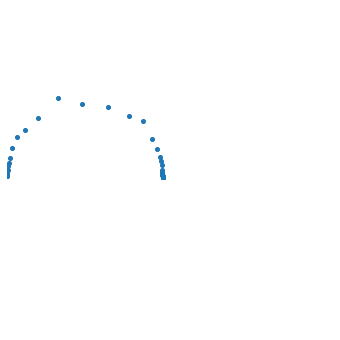

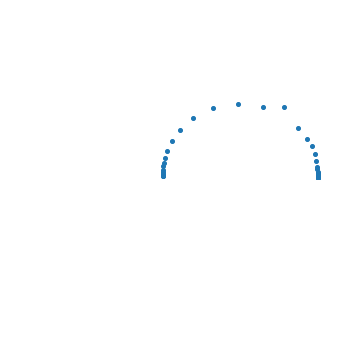

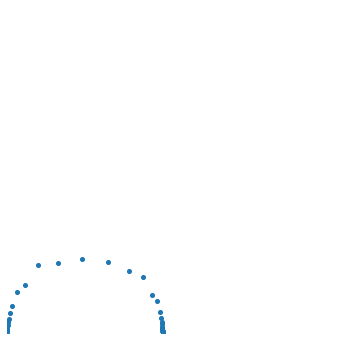

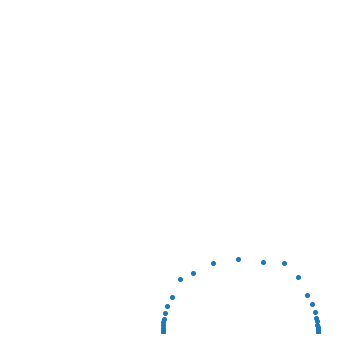

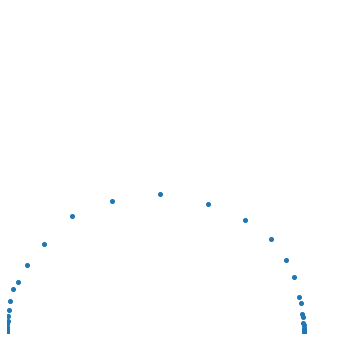

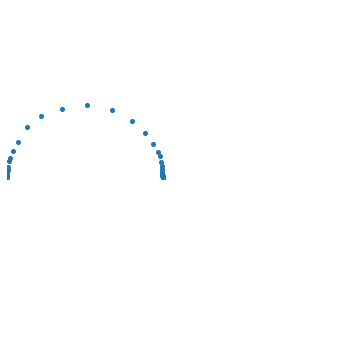

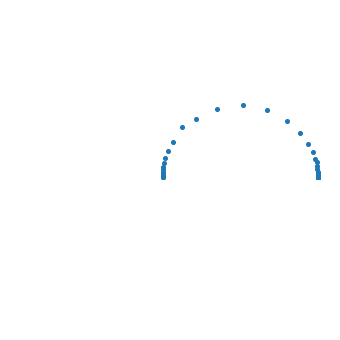

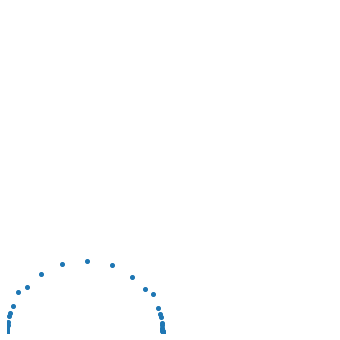

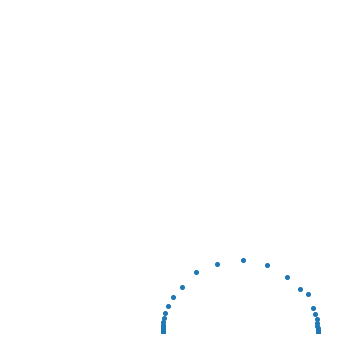

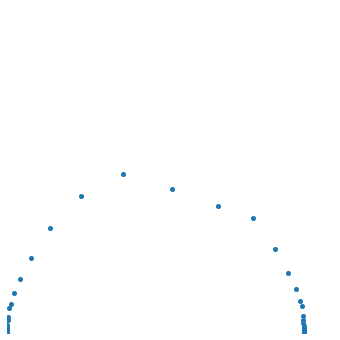

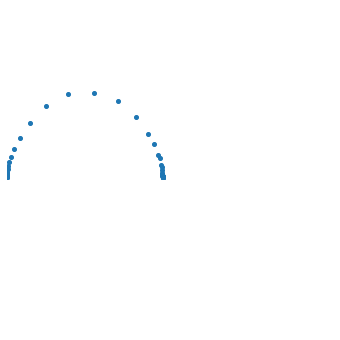

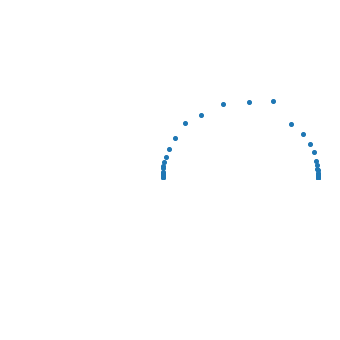

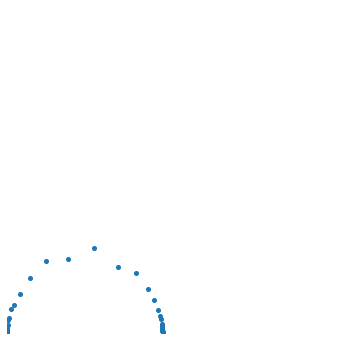

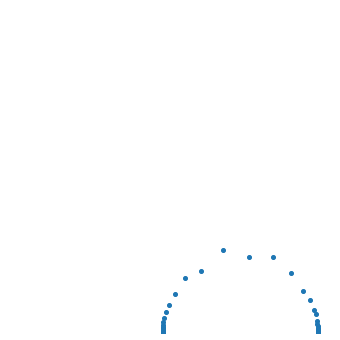

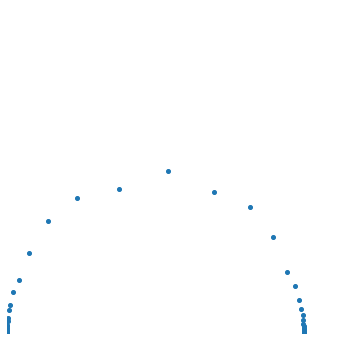

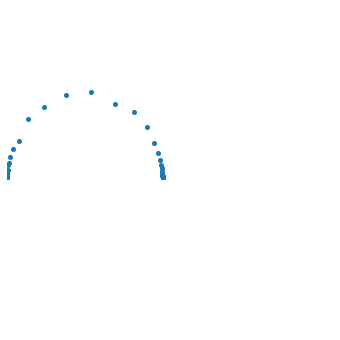

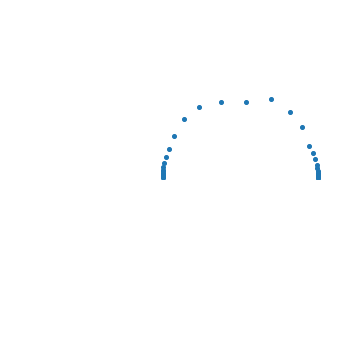

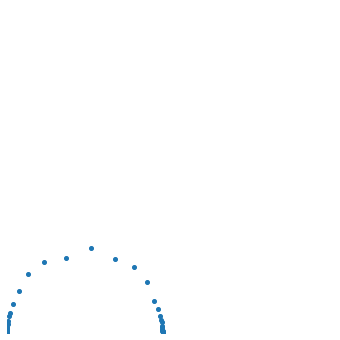

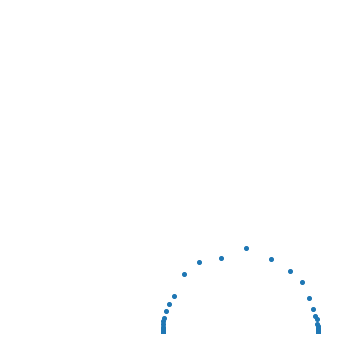

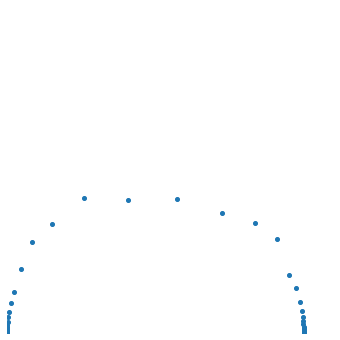

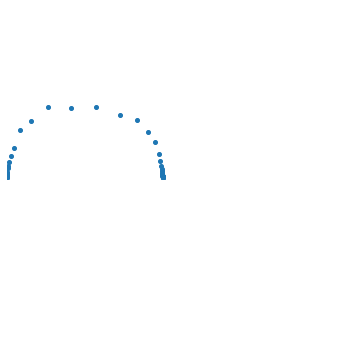

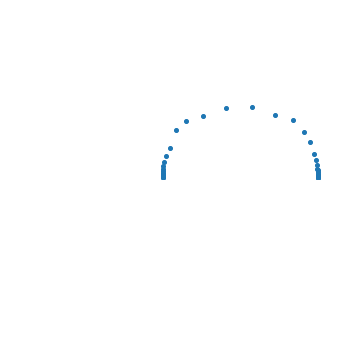

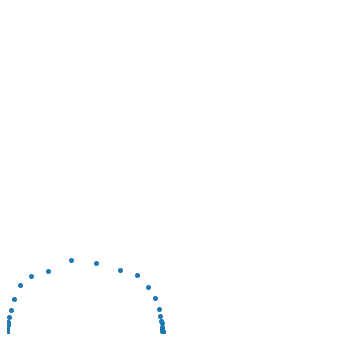

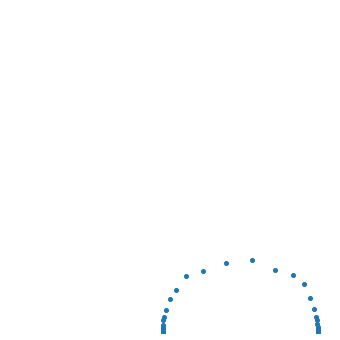

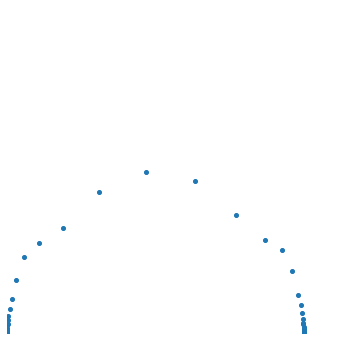

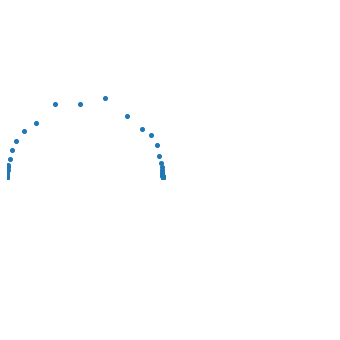

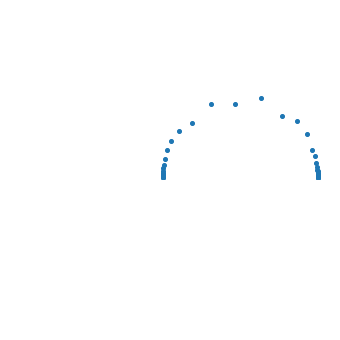

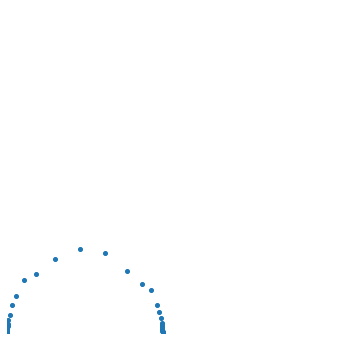

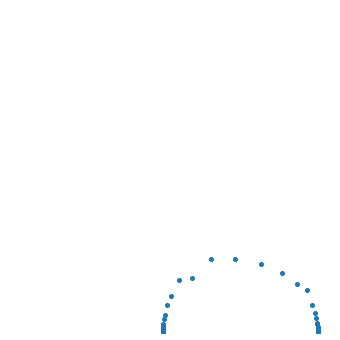

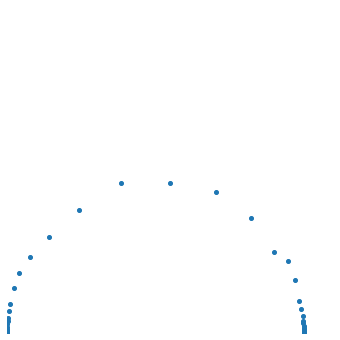

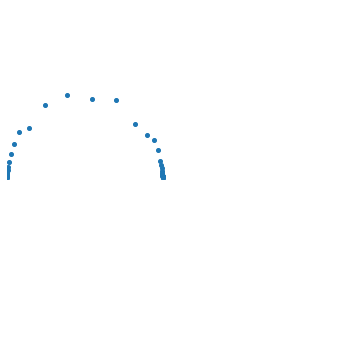

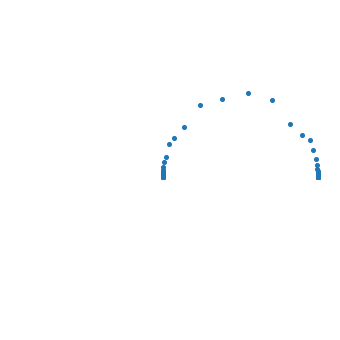

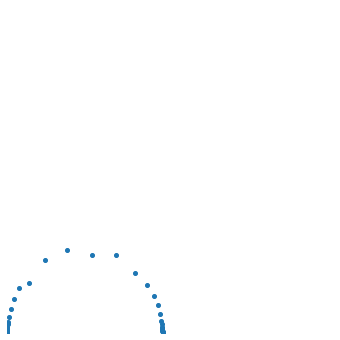

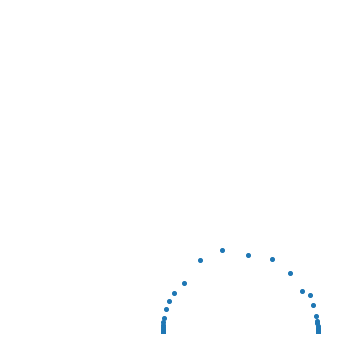

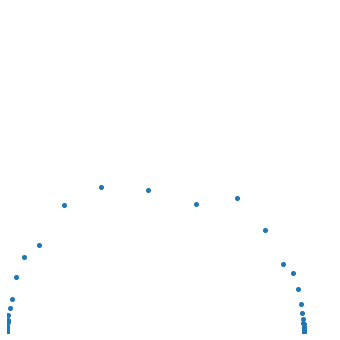

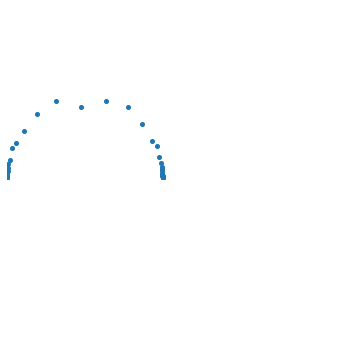

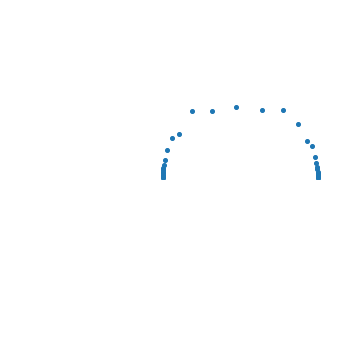

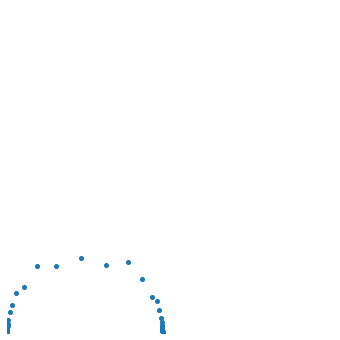

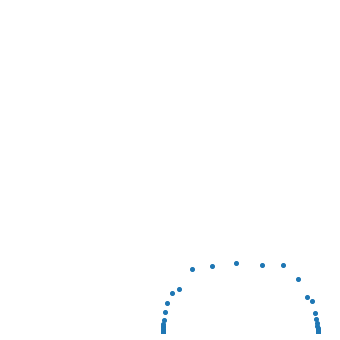

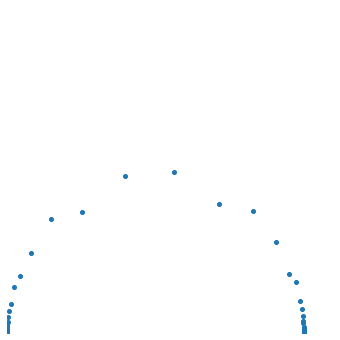

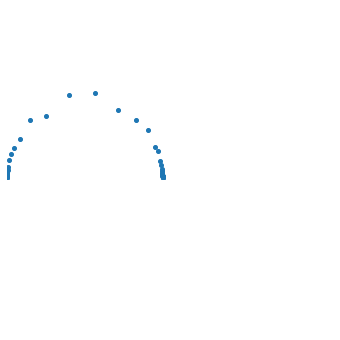

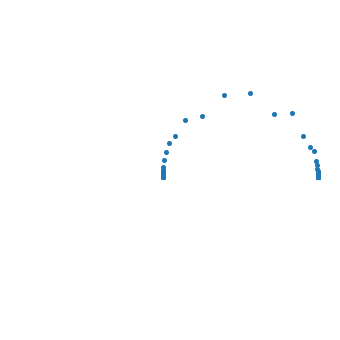

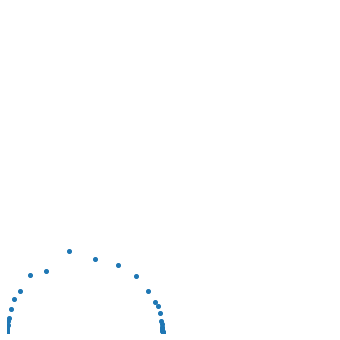

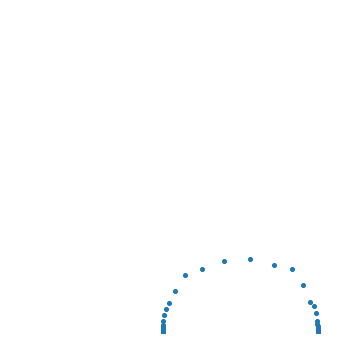

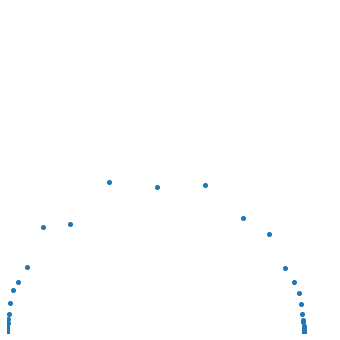

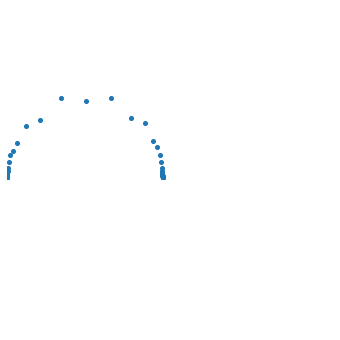

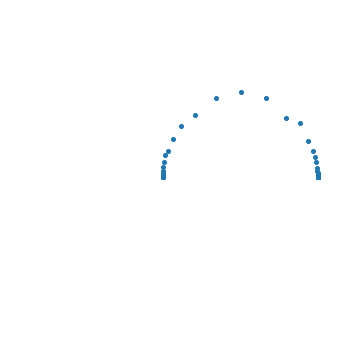

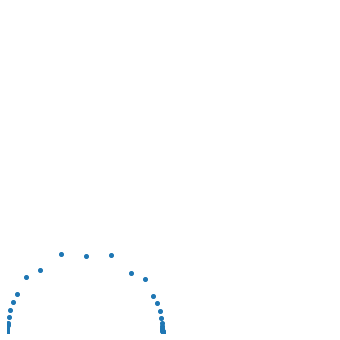

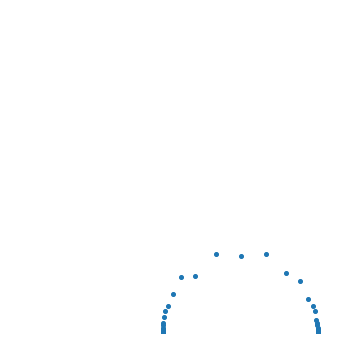

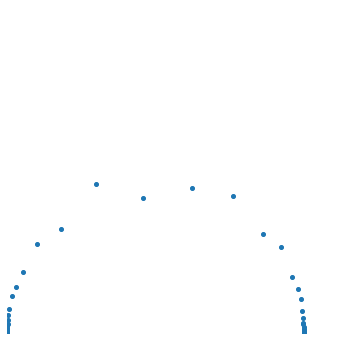

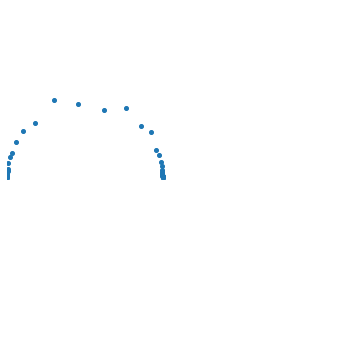

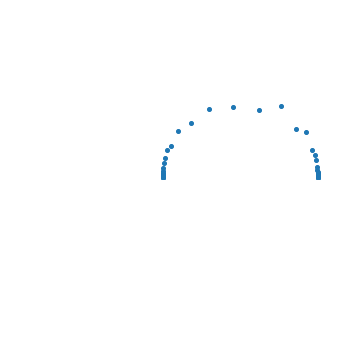

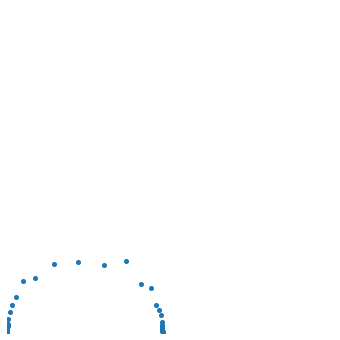

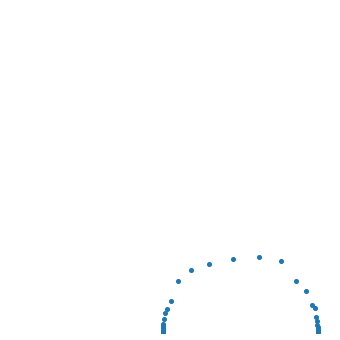

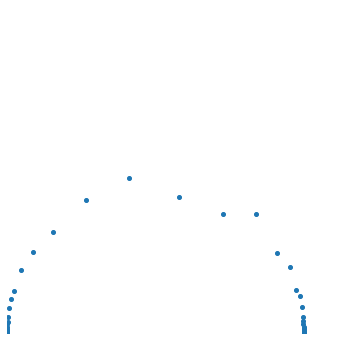

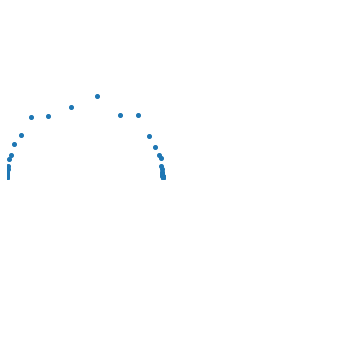

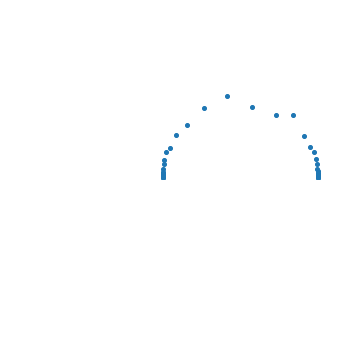

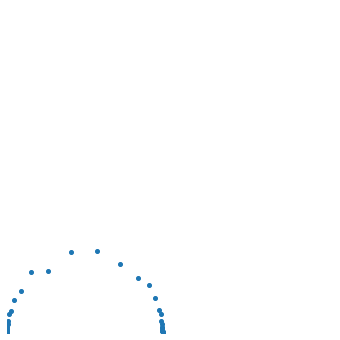

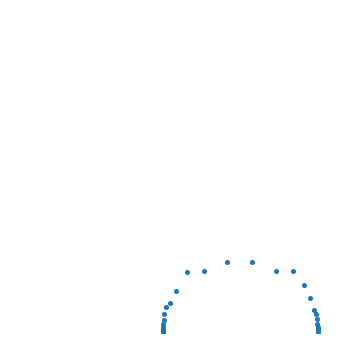

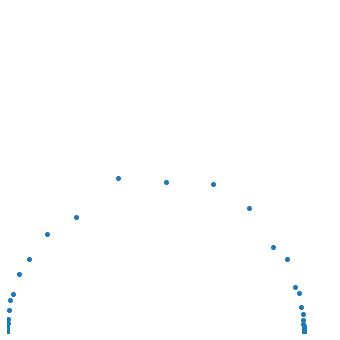

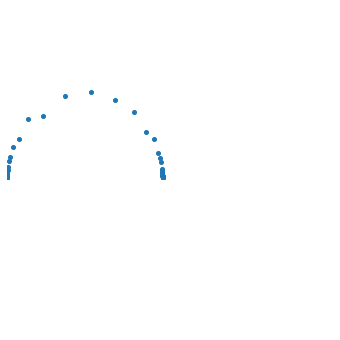

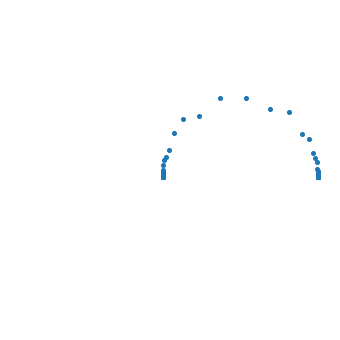

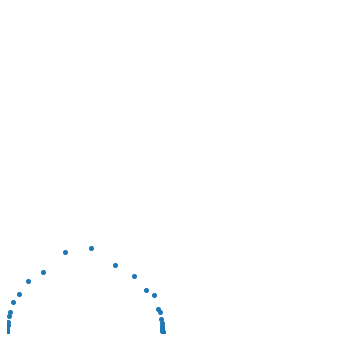

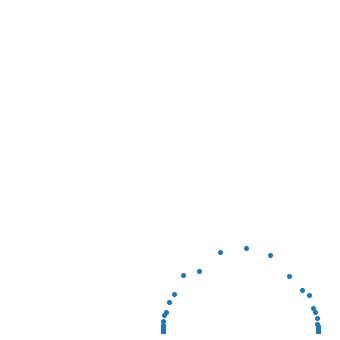

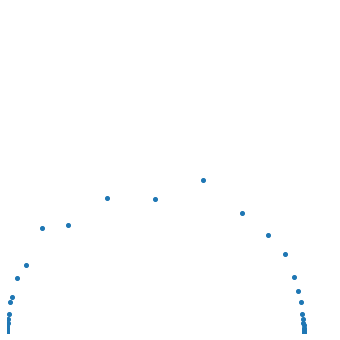

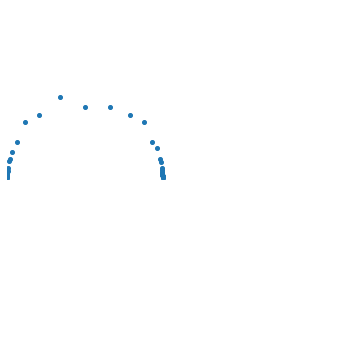

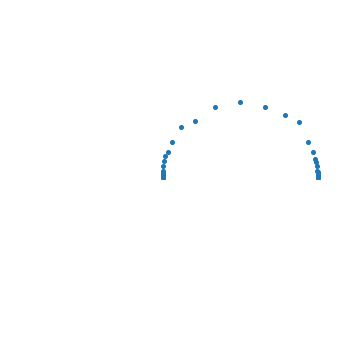

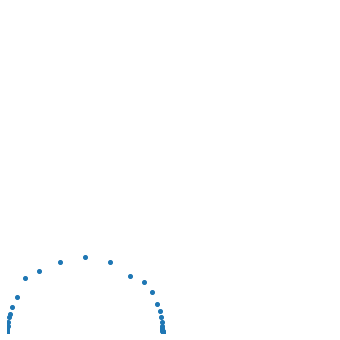

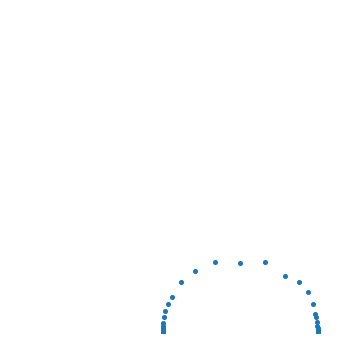

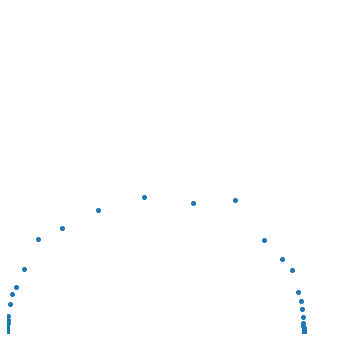

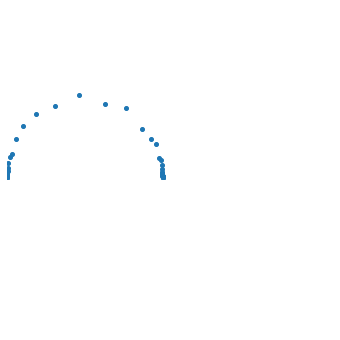

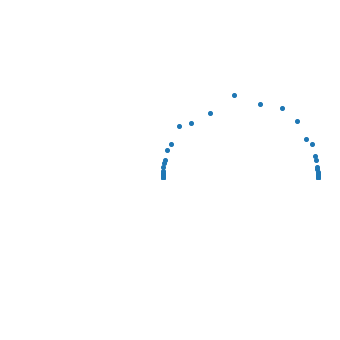

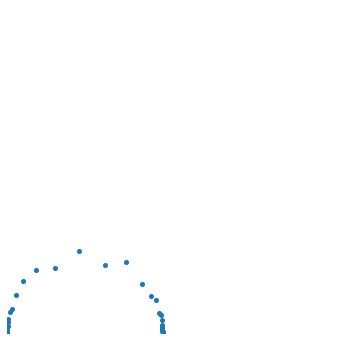

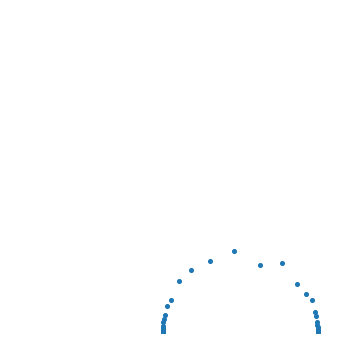

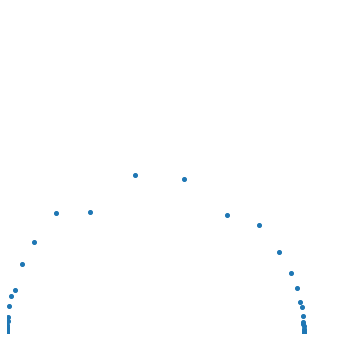

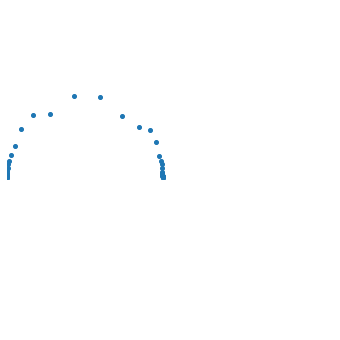

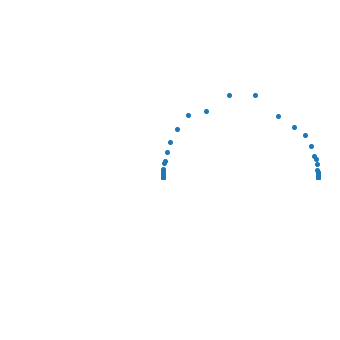

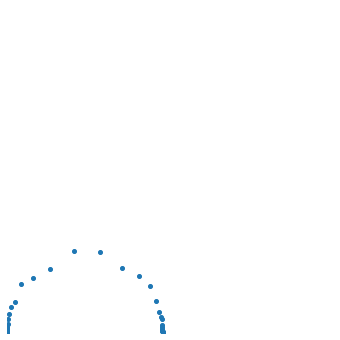

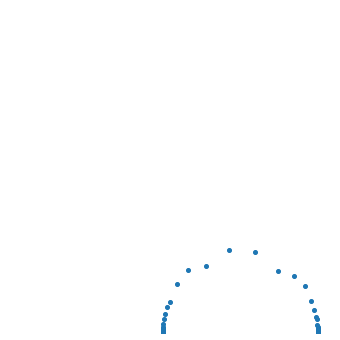

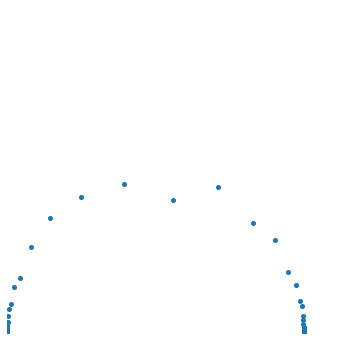

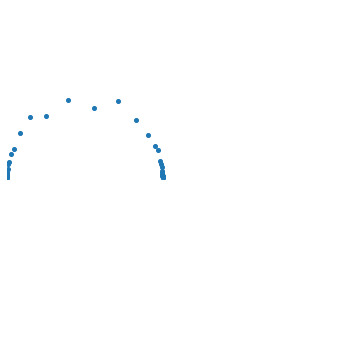

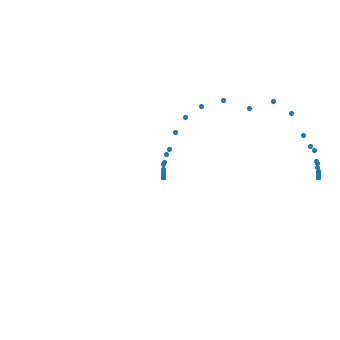

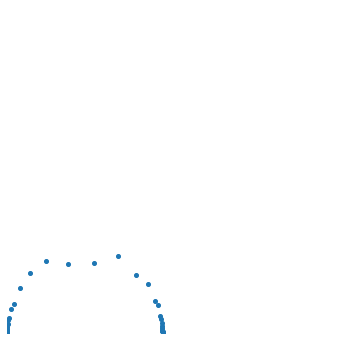

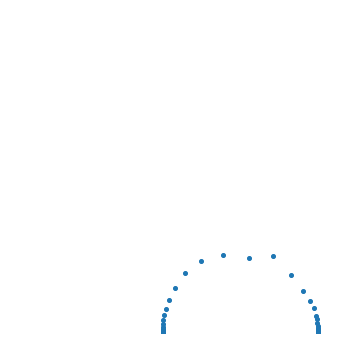

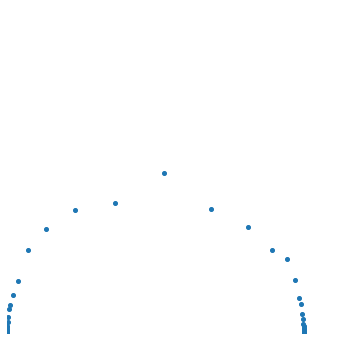

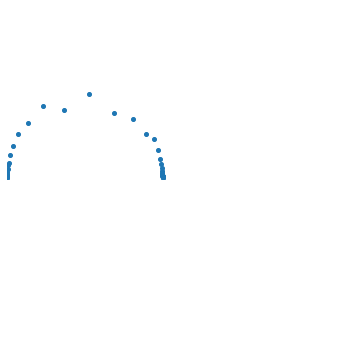

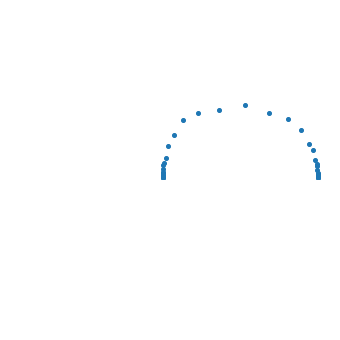

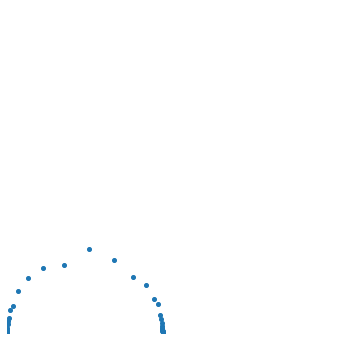

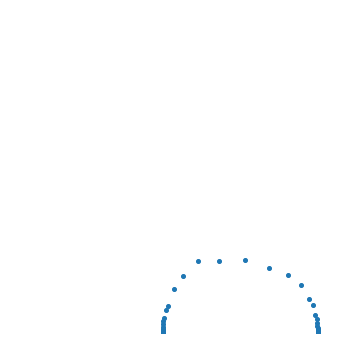

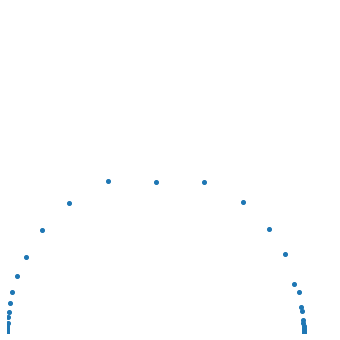

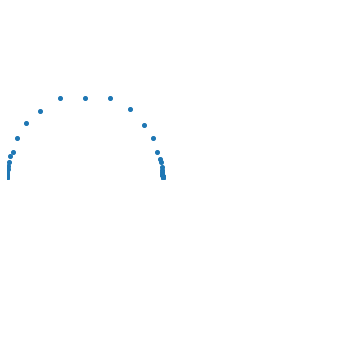

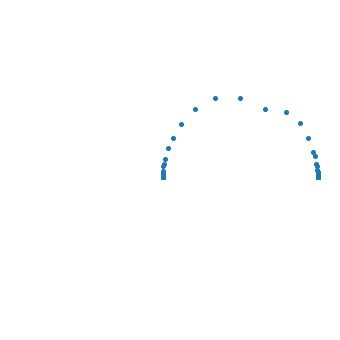

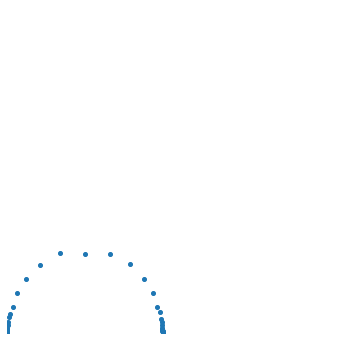

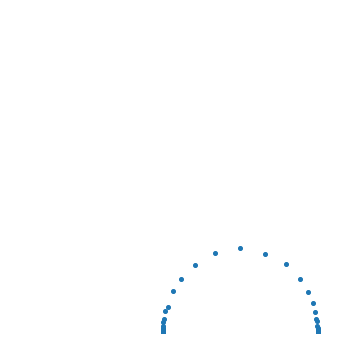

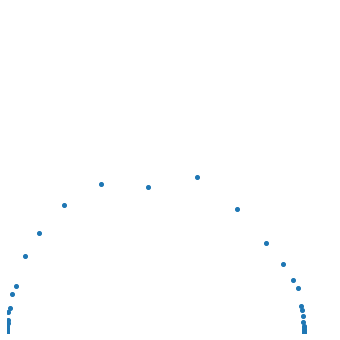

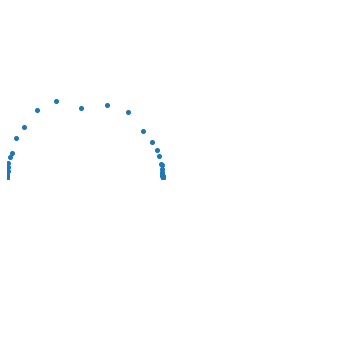

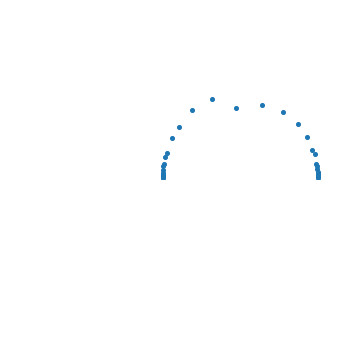

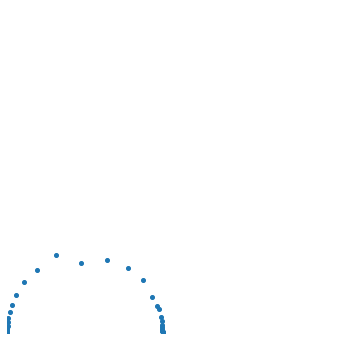

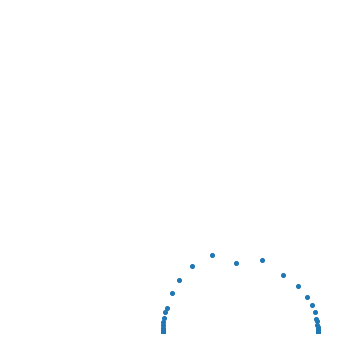

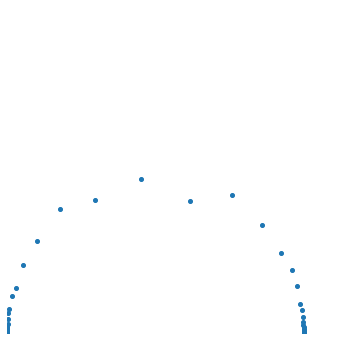

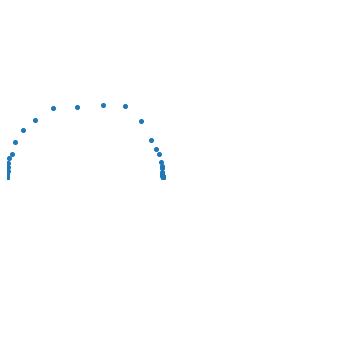

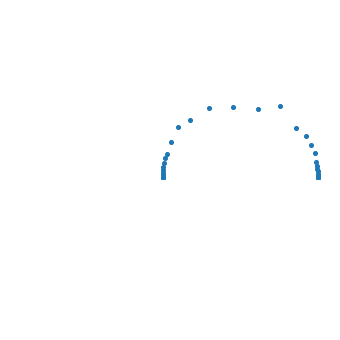

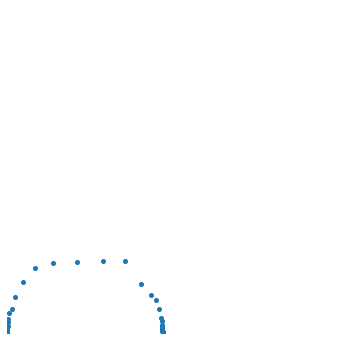

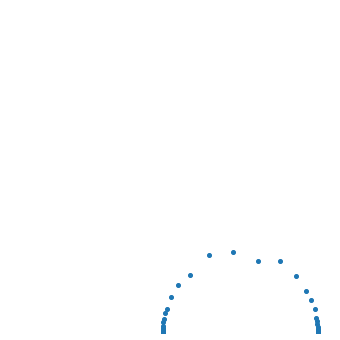

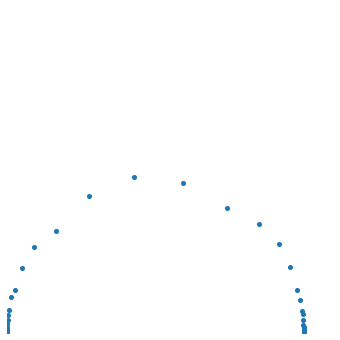

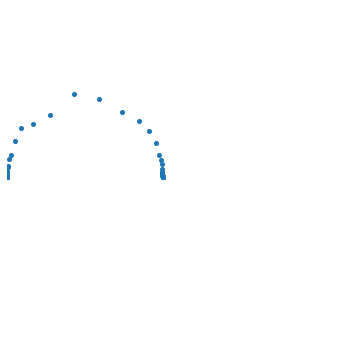

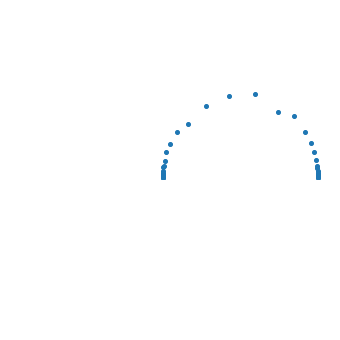

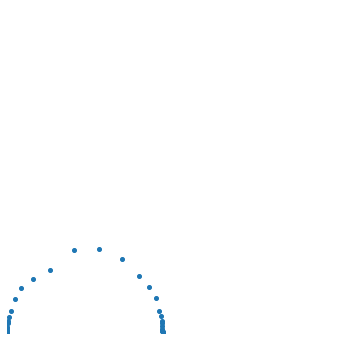

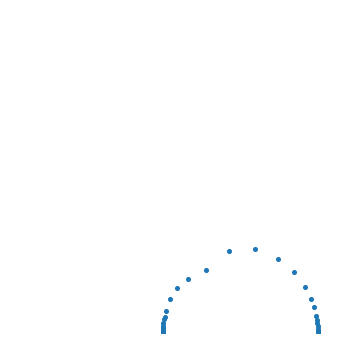

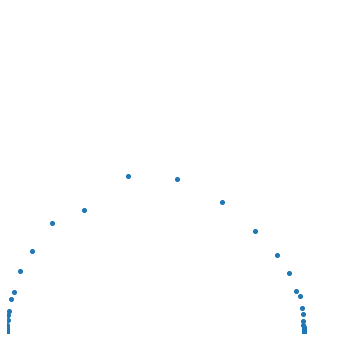

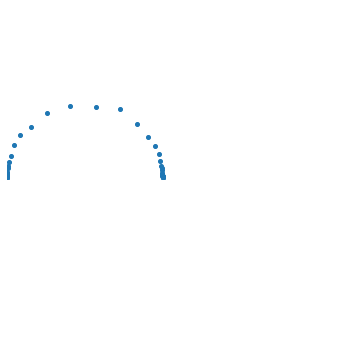

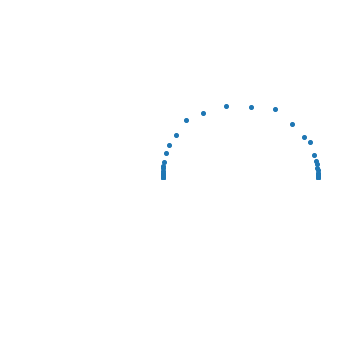

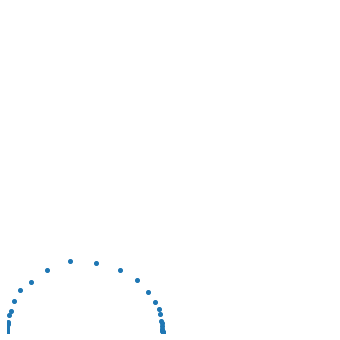

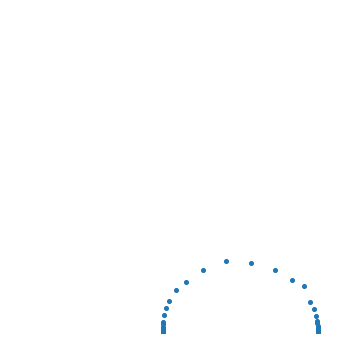

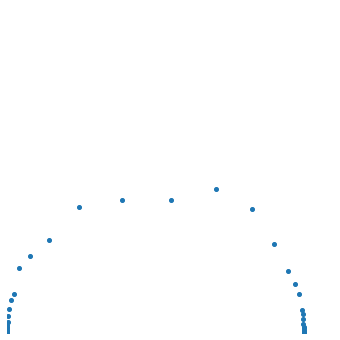

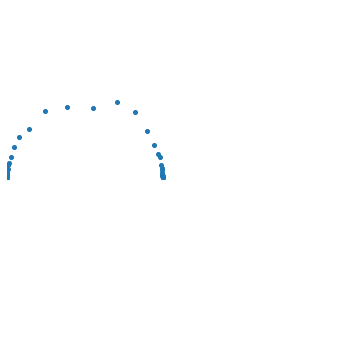

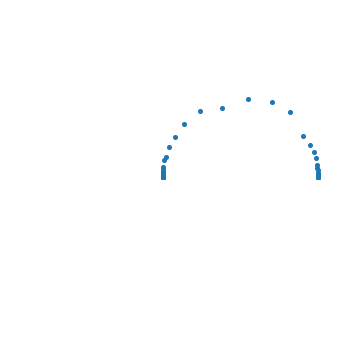

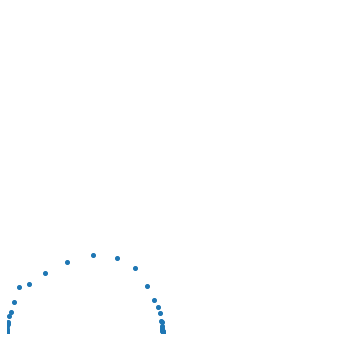

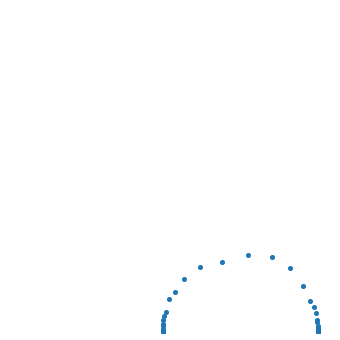

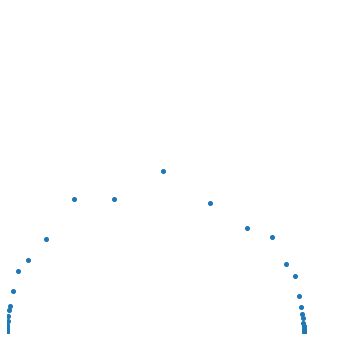

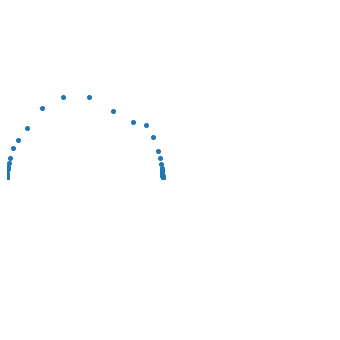

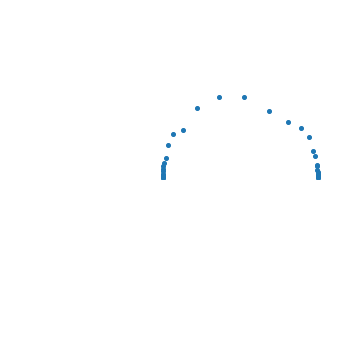

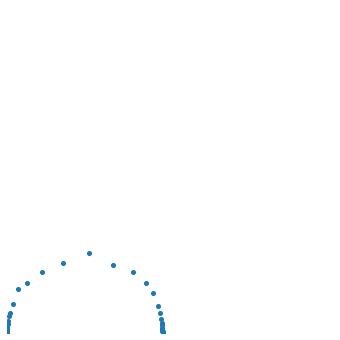

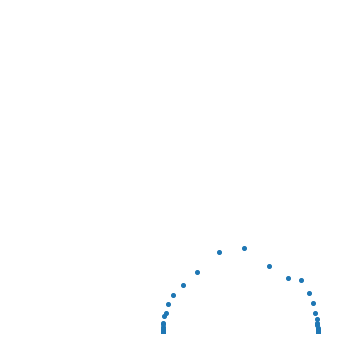

In [4]:
# Noisescale = 0.3 - ' noisy' [25]

f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
C= 25E-6 #F
resistance= np.linspace(1,100,25,  dtype=int,endpoint=True)
for Rs in resistance:
    for i in range(5):
        file= data_simulation.RC_file_writer(f_start, f_stop, decades, Rs, C, 'parallel', alteration='noise', noisescale=0.1, save_image=True, position=i, scatter=True,transparent=True, axis_off=True)

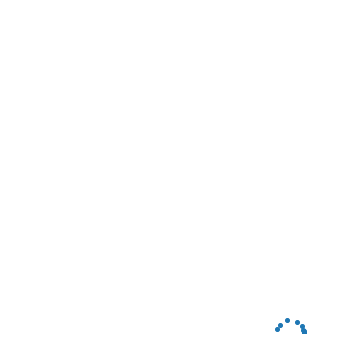

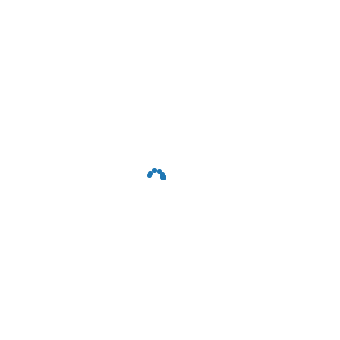

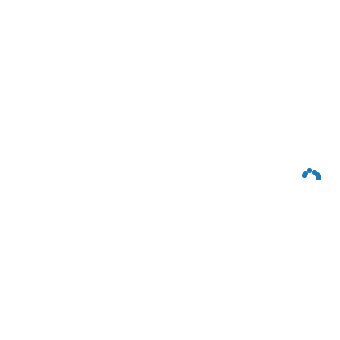

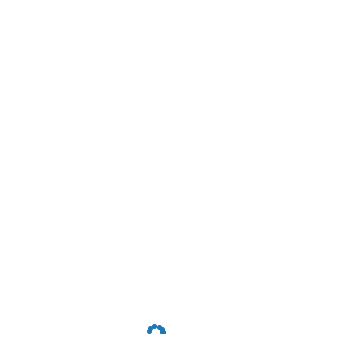

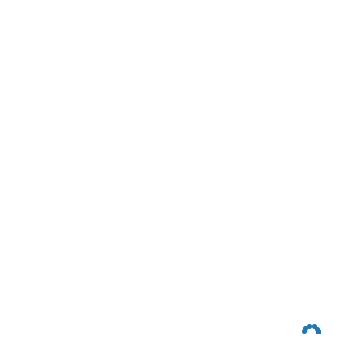

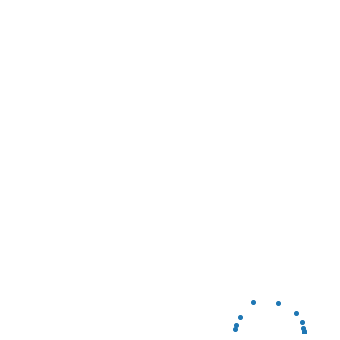

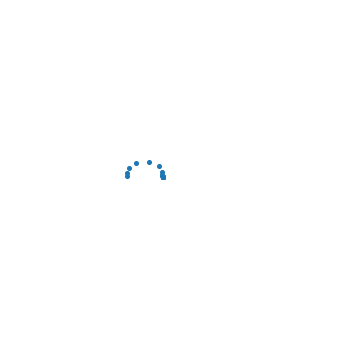

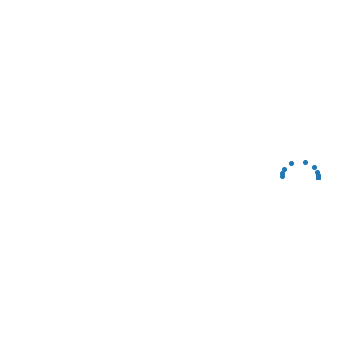

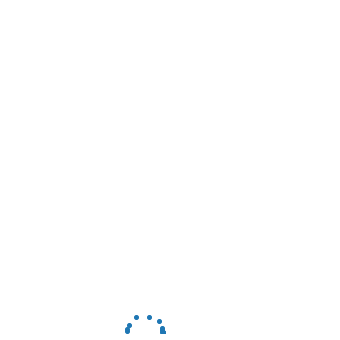

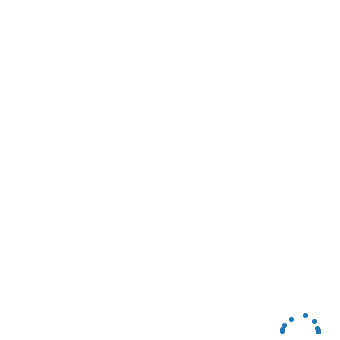

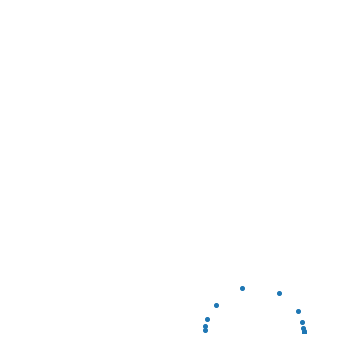

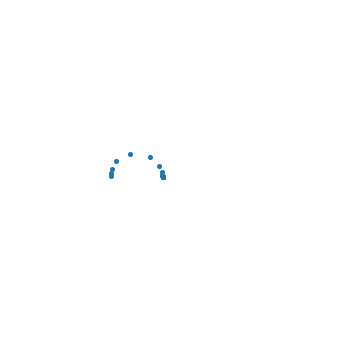

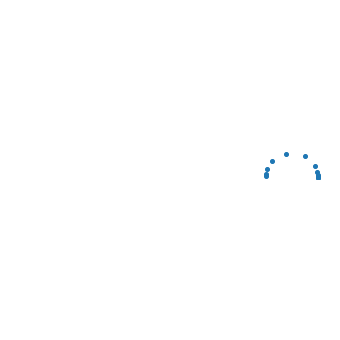

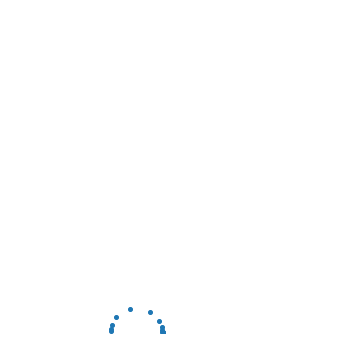

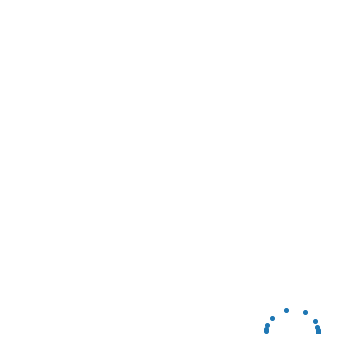

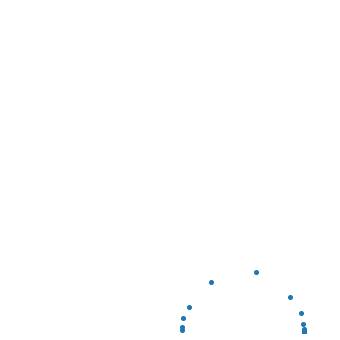

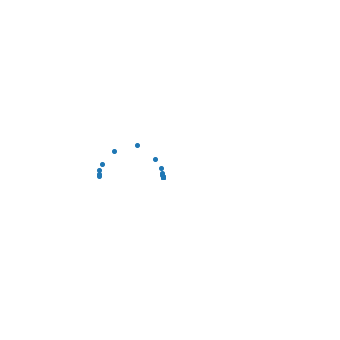

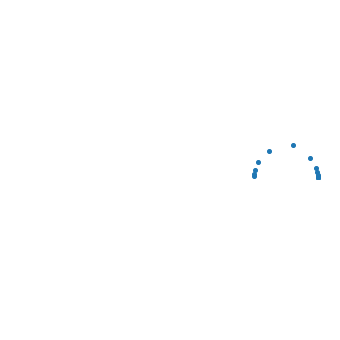

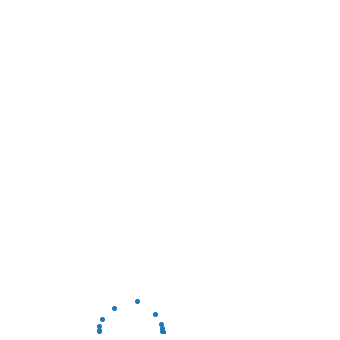

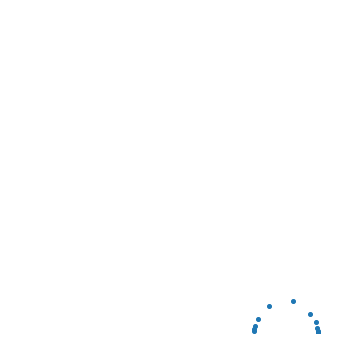

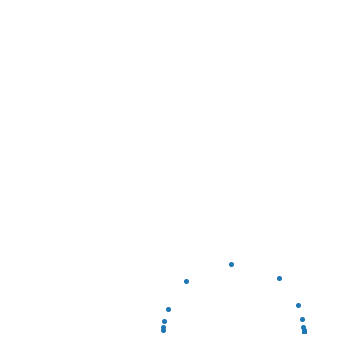

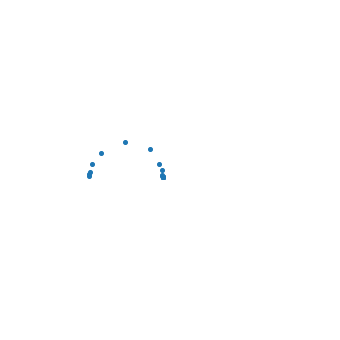

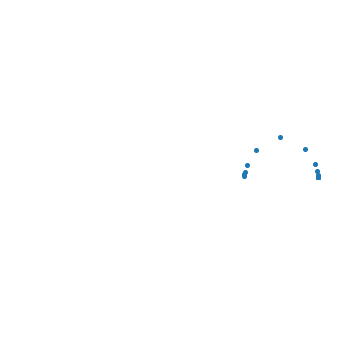

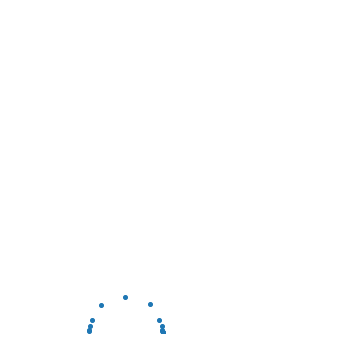

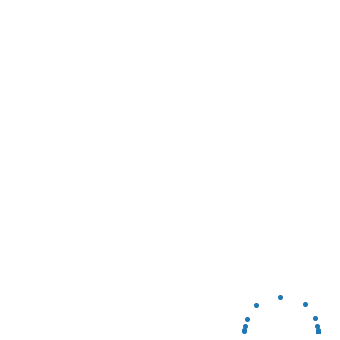

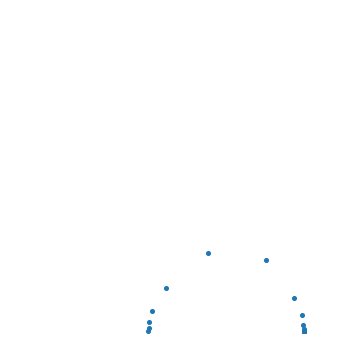

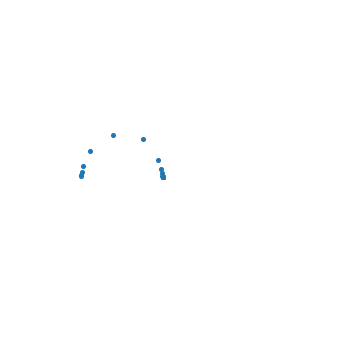

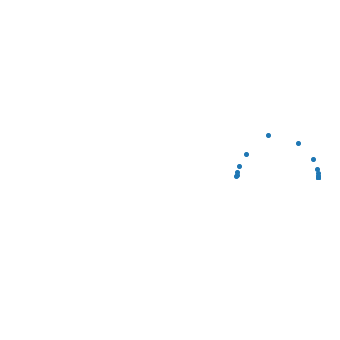

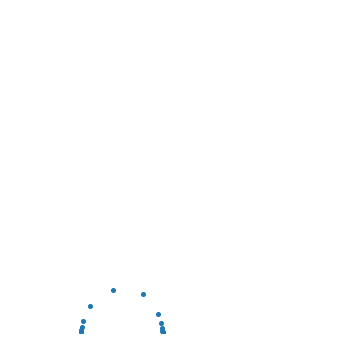

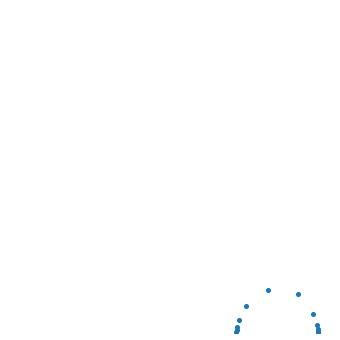

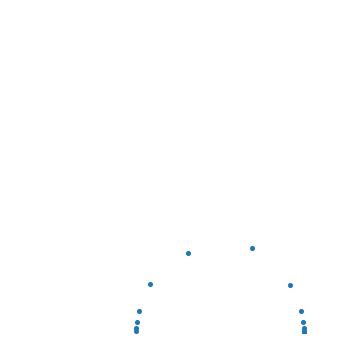

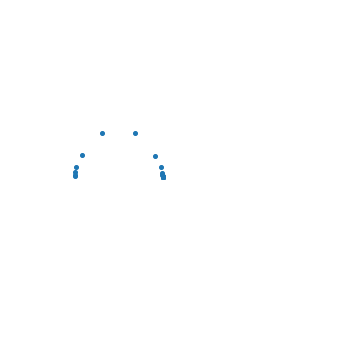

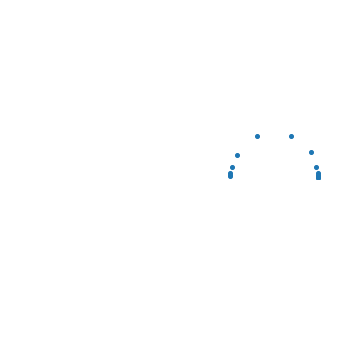

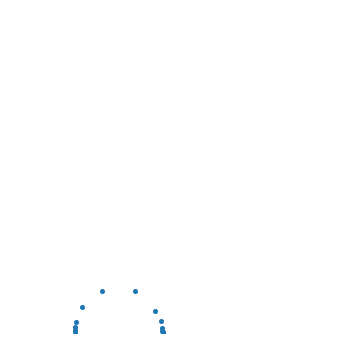

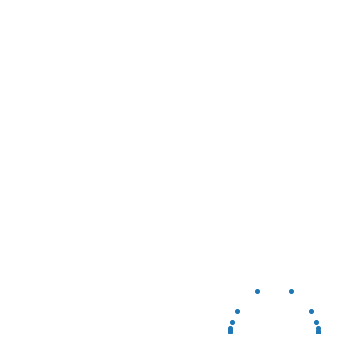

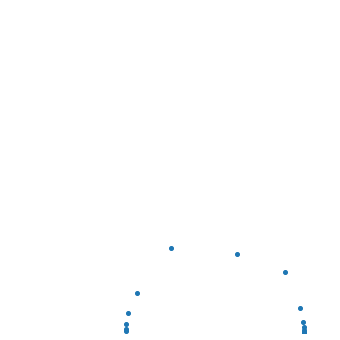

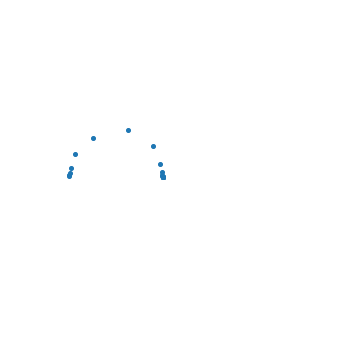

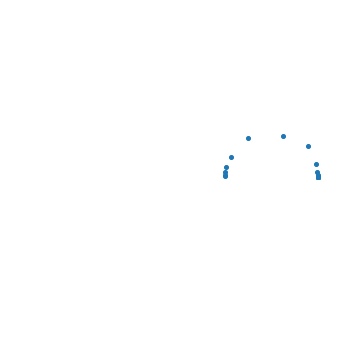

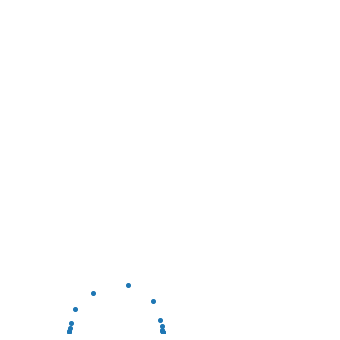

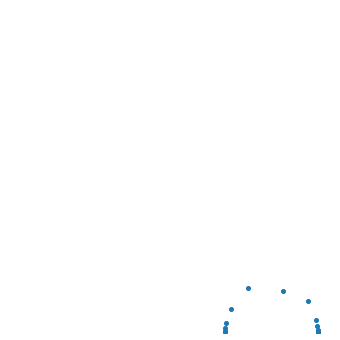

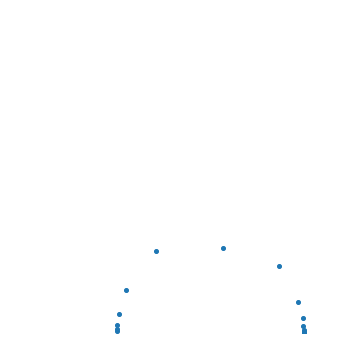

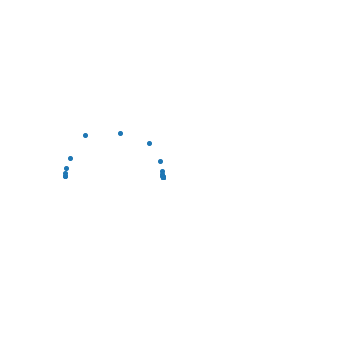

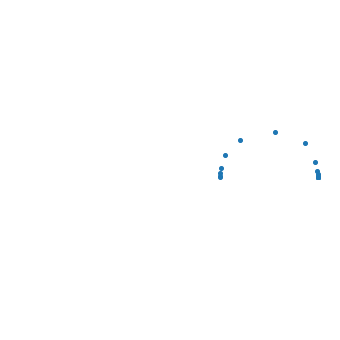

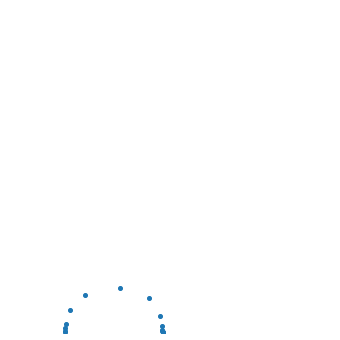

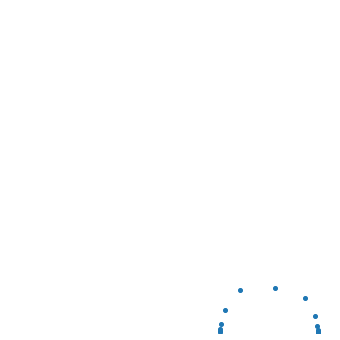

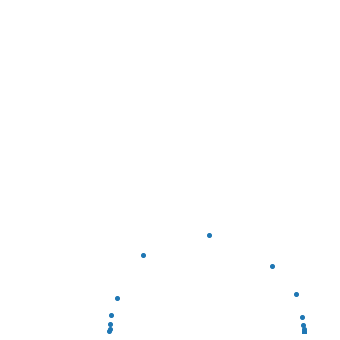

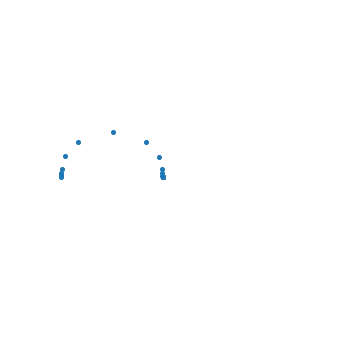

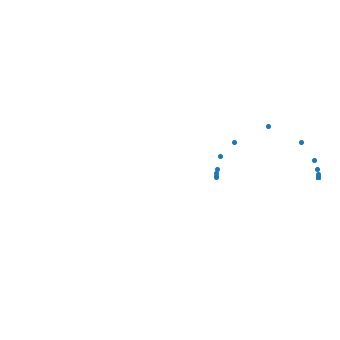

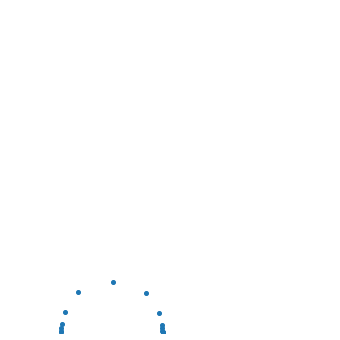

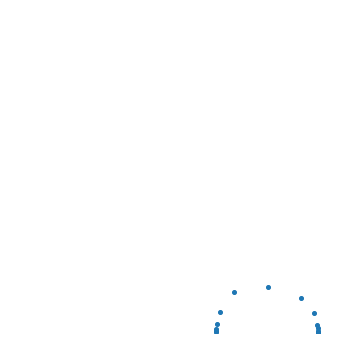

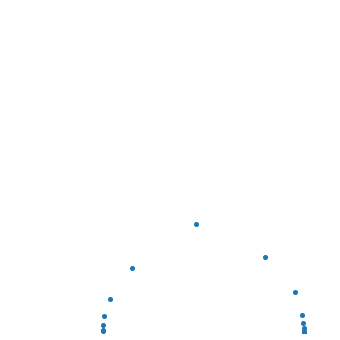

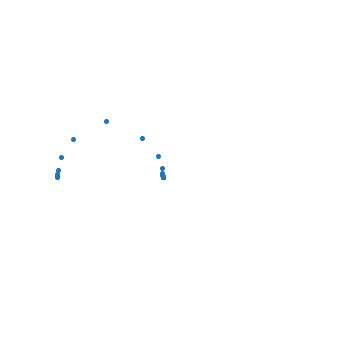

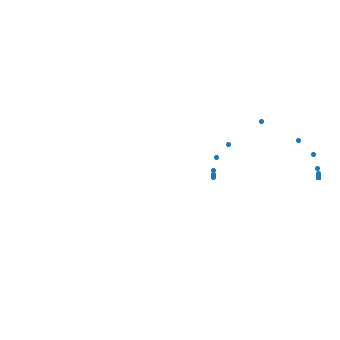

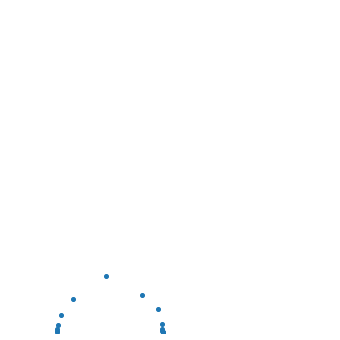

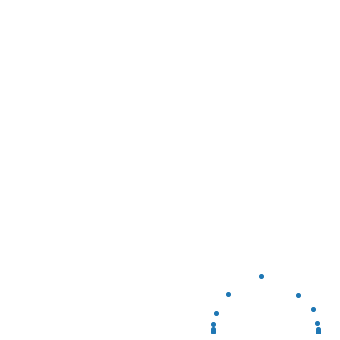

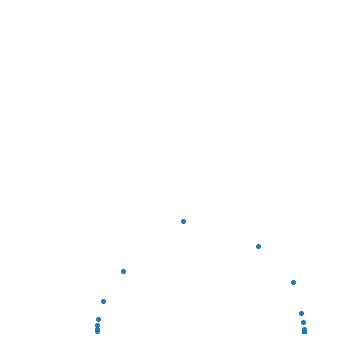

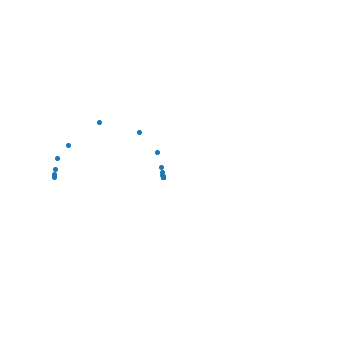

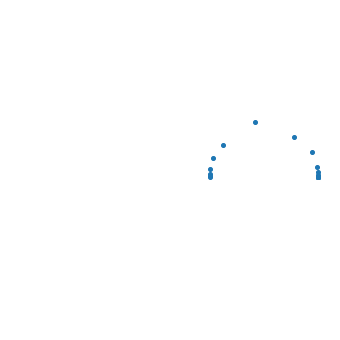

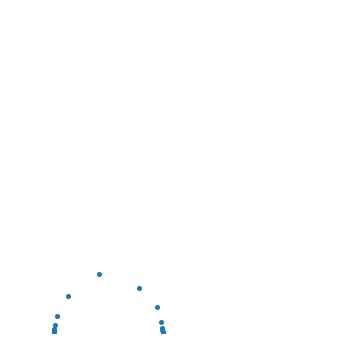

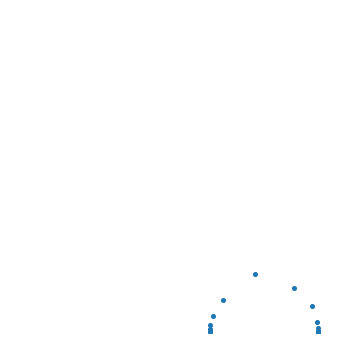

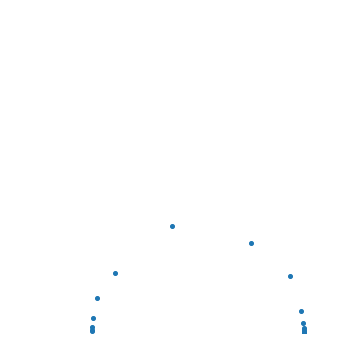

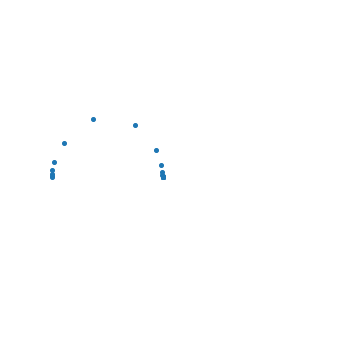

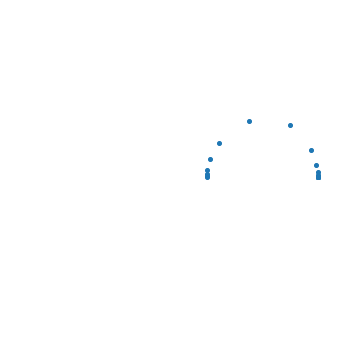

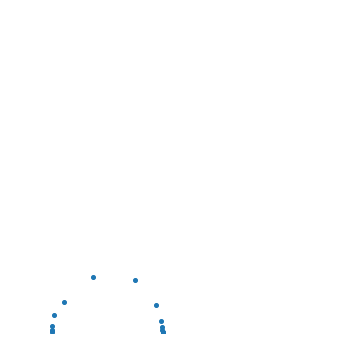

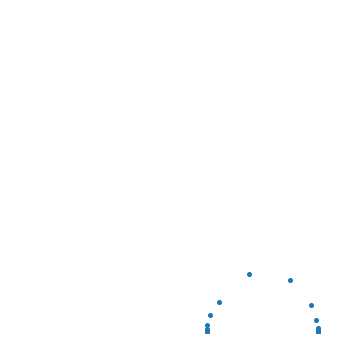

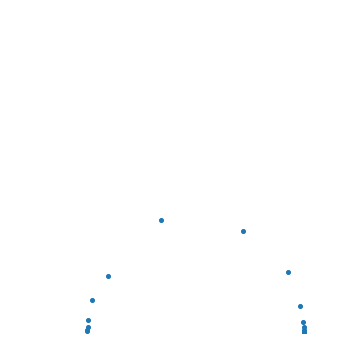

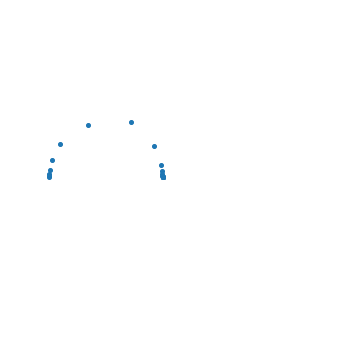

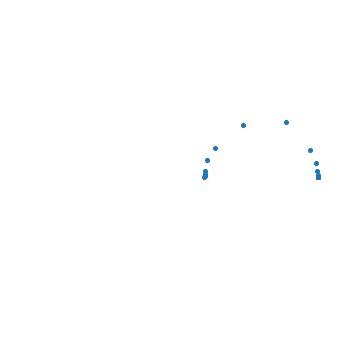

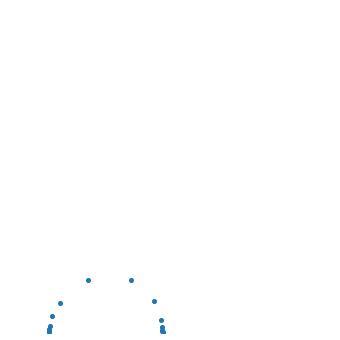

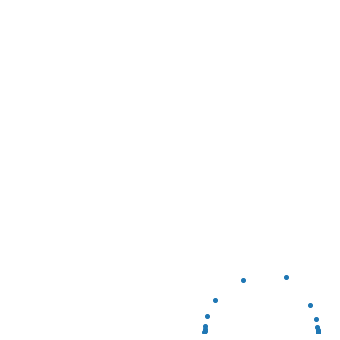

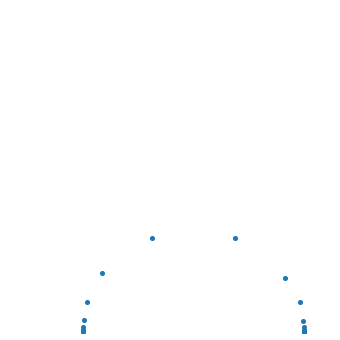

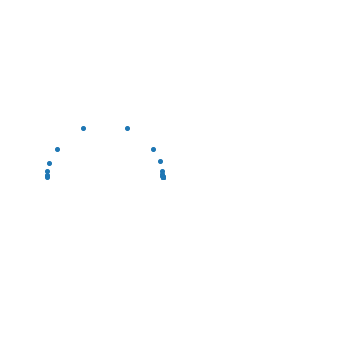

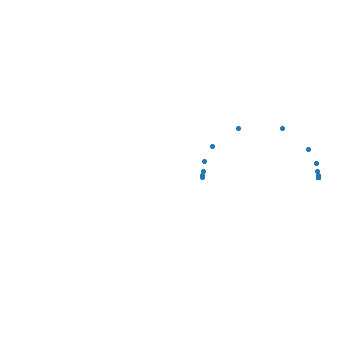

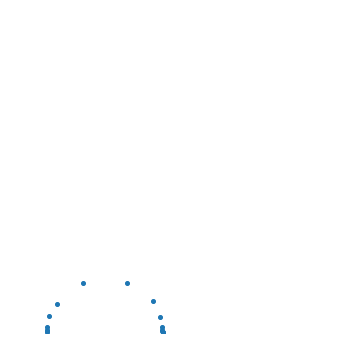

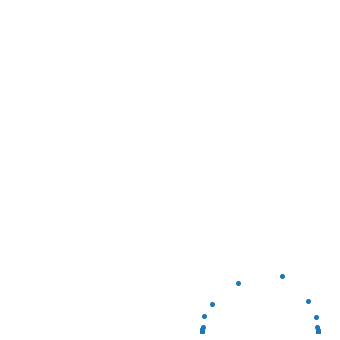

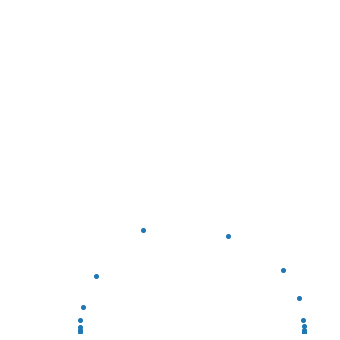

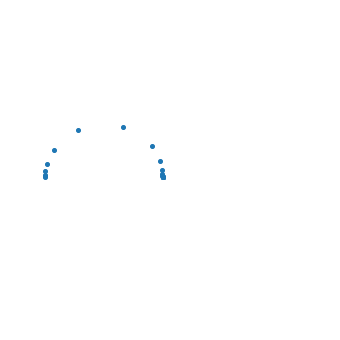

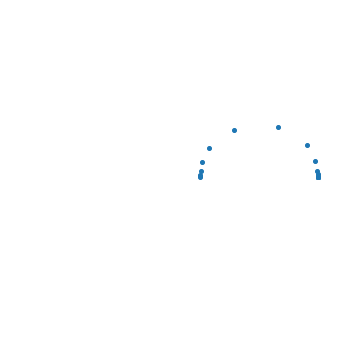

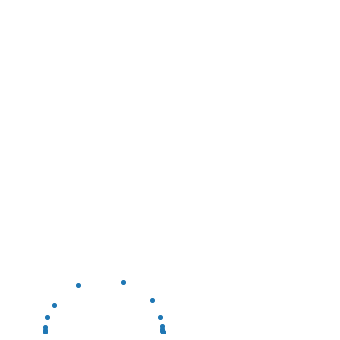

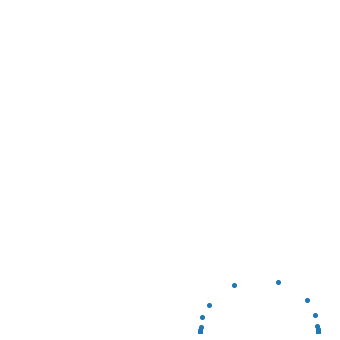

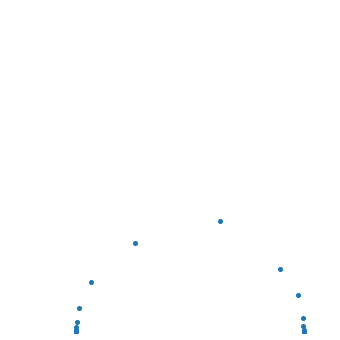

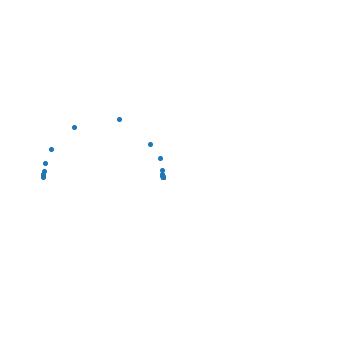

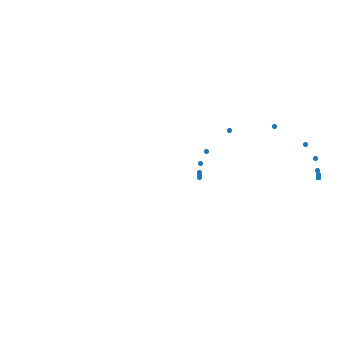

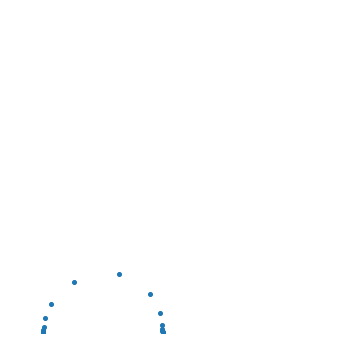

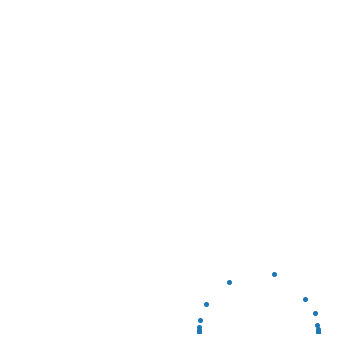

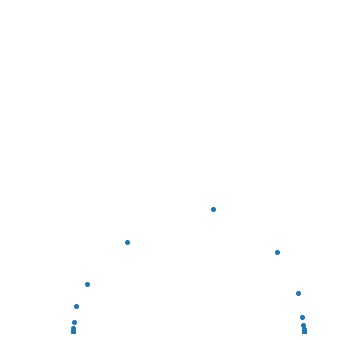

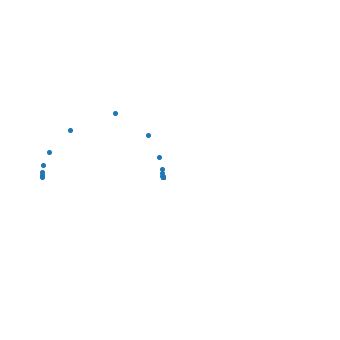

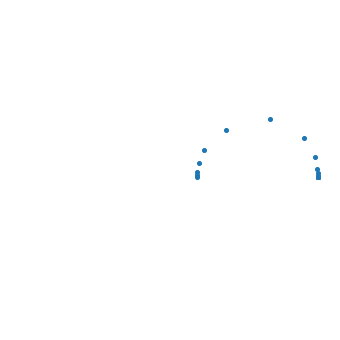

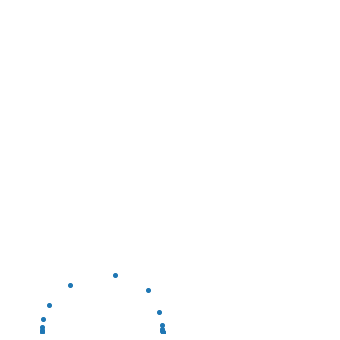

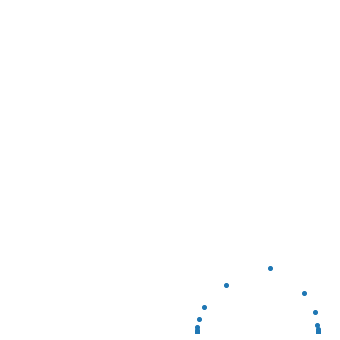

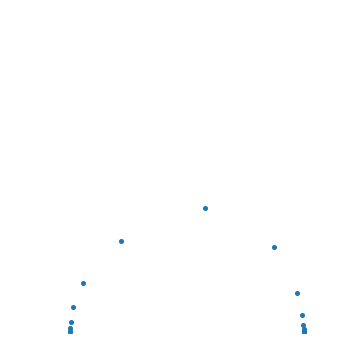

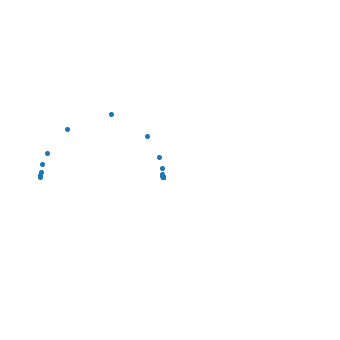

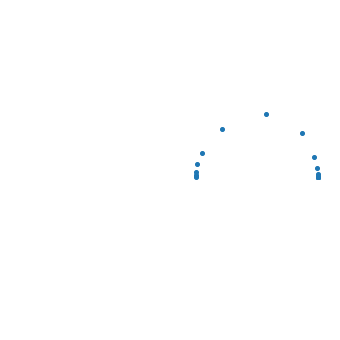

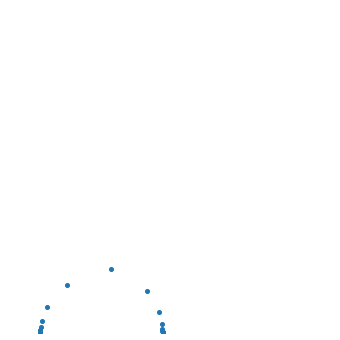

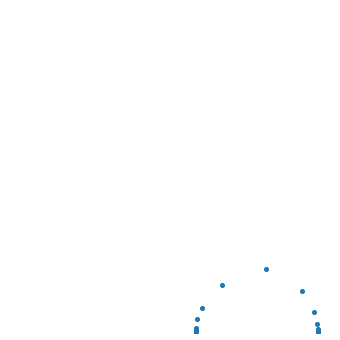

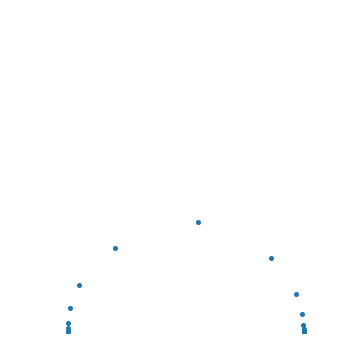

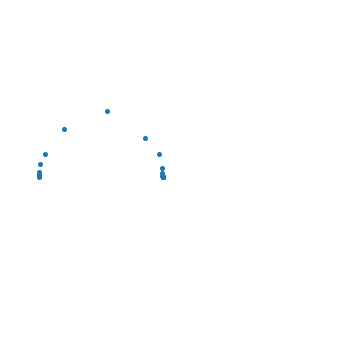

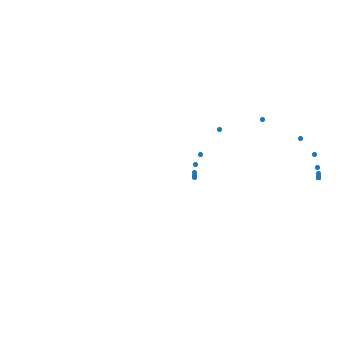

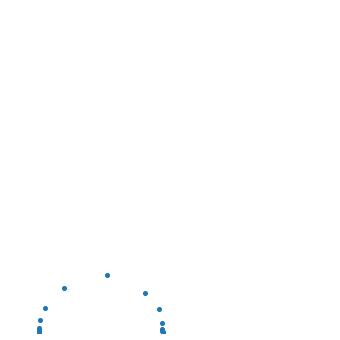

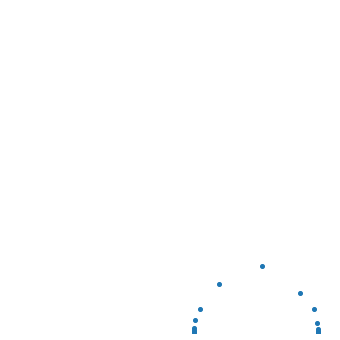

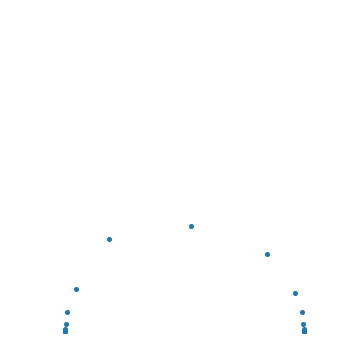

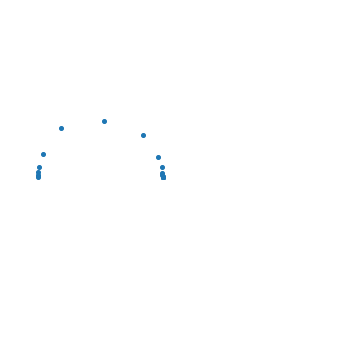

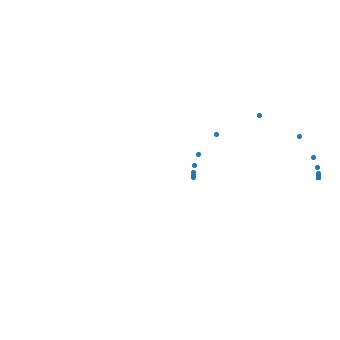

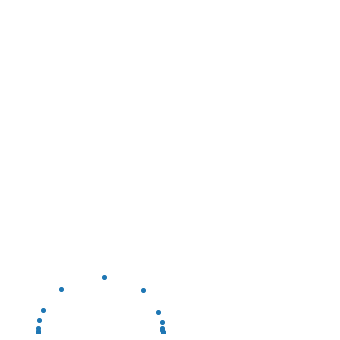

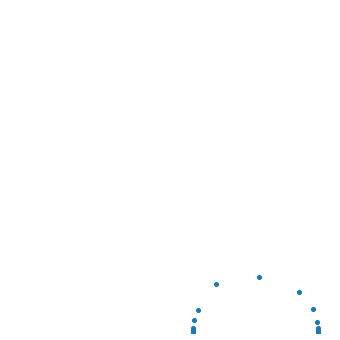

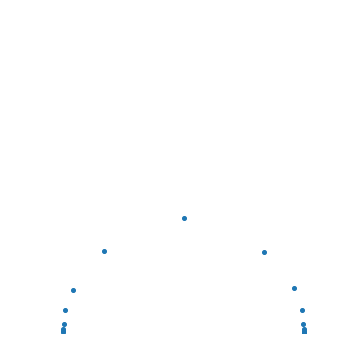

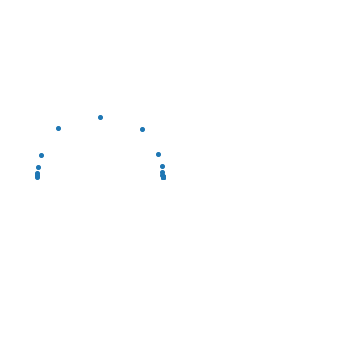

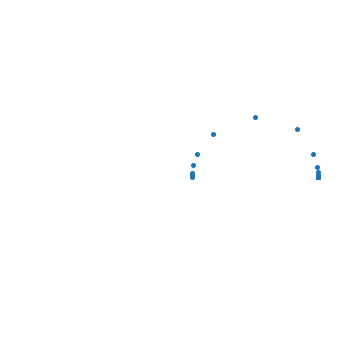

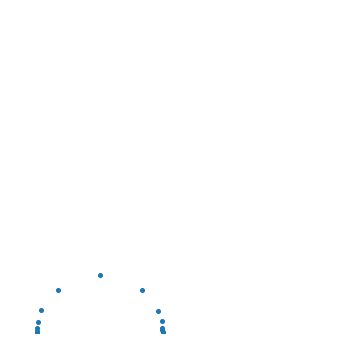

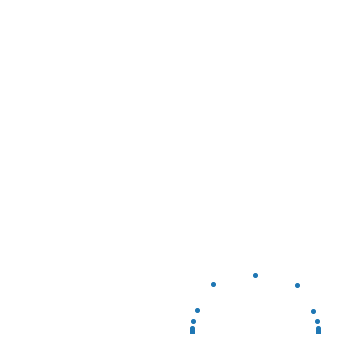

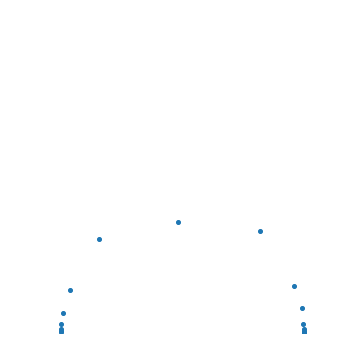

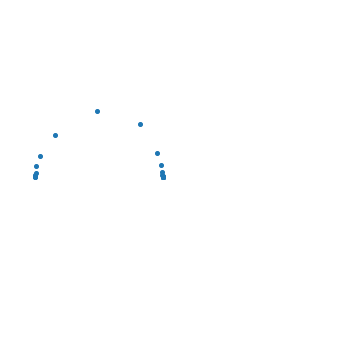

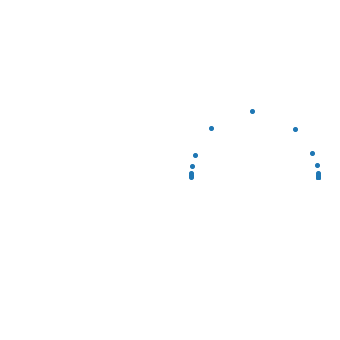

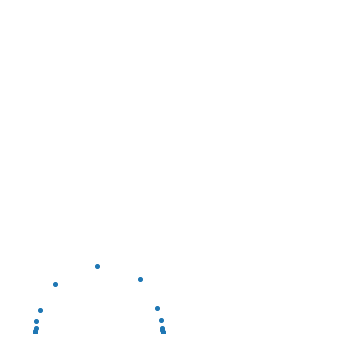

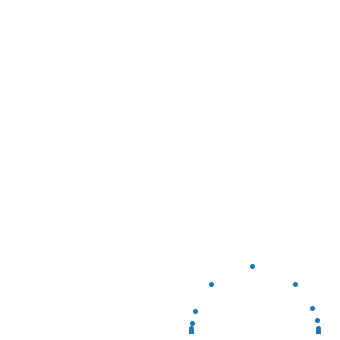

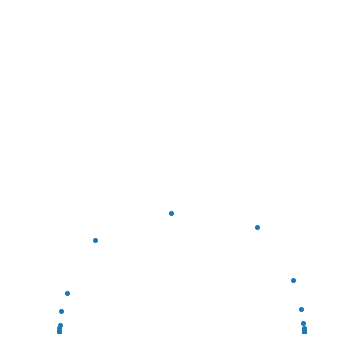

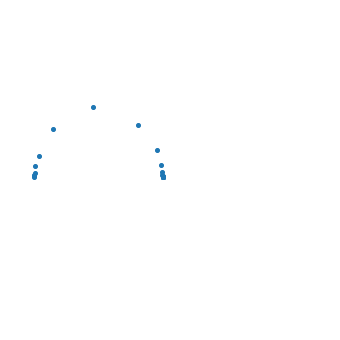

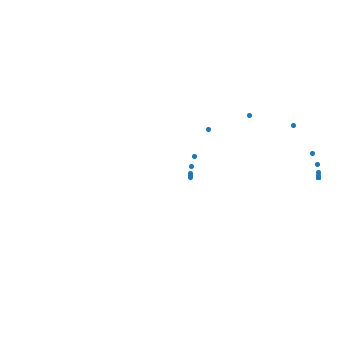

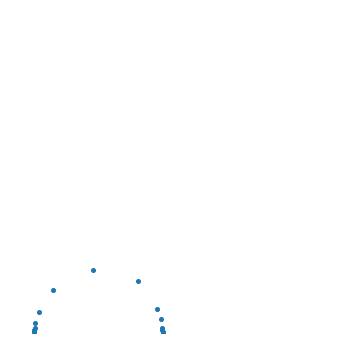

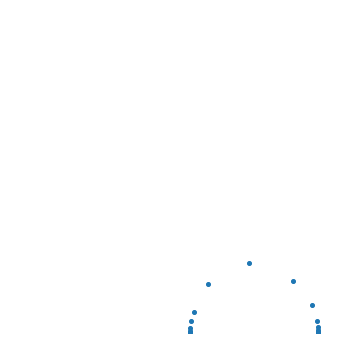

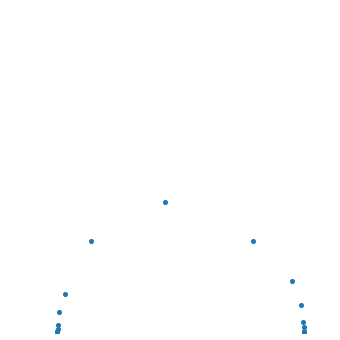

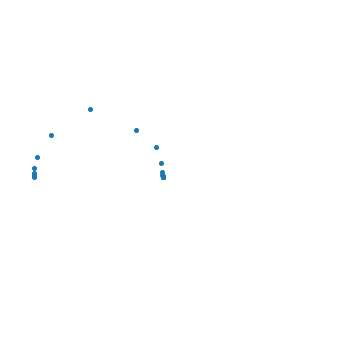

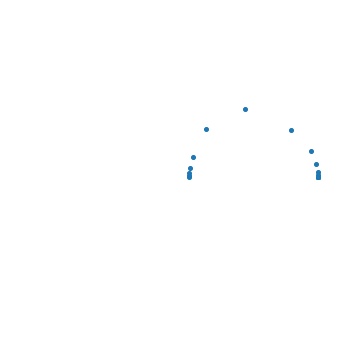

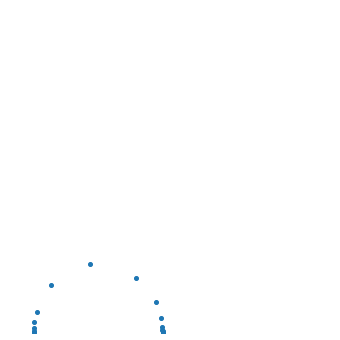

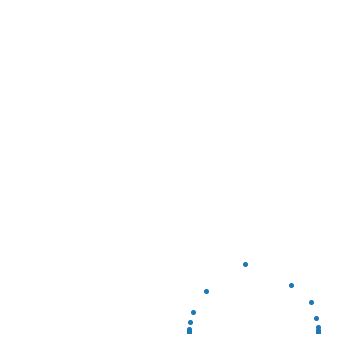

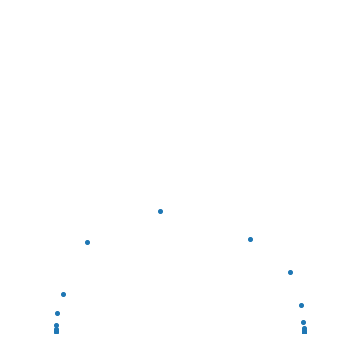

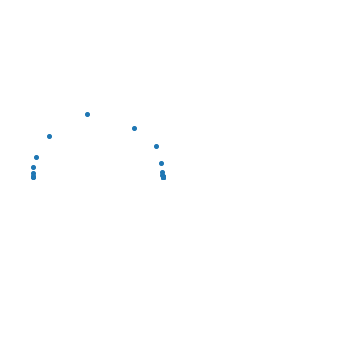

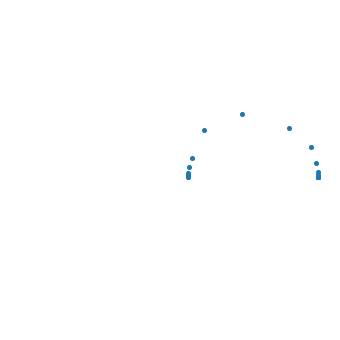

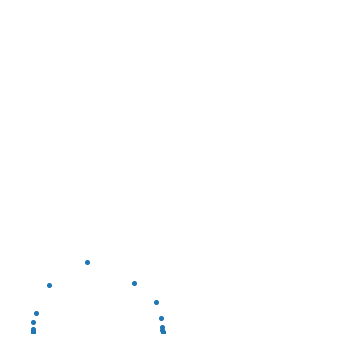

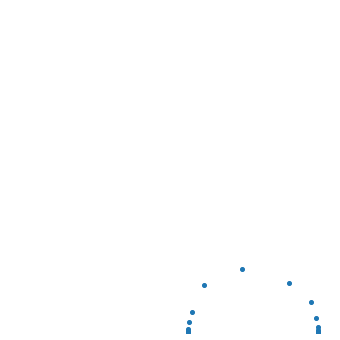

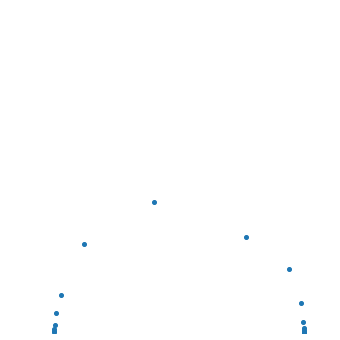

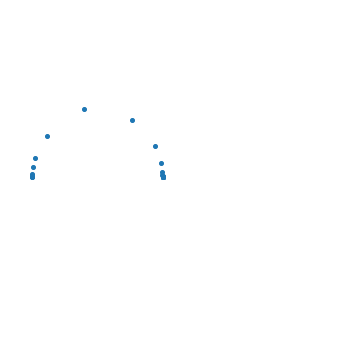

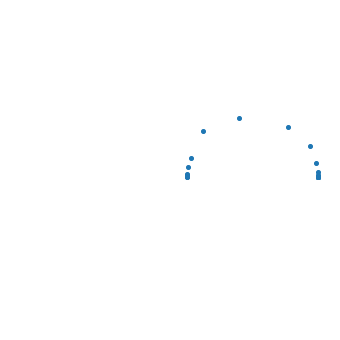

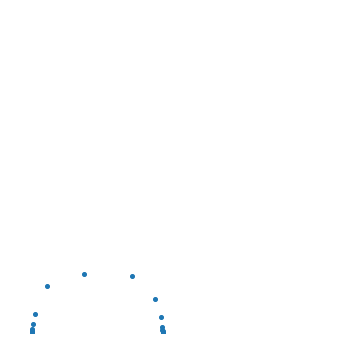

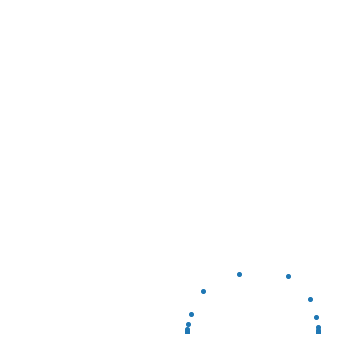

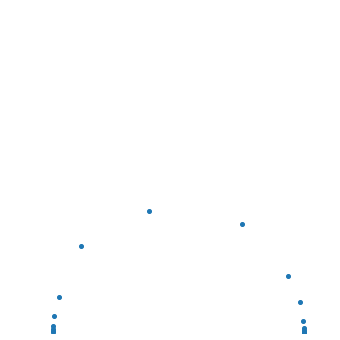

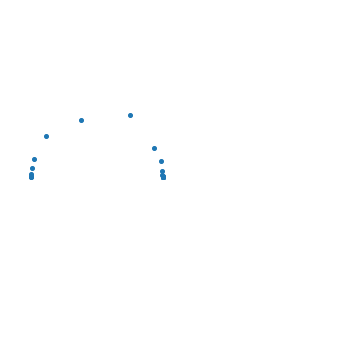

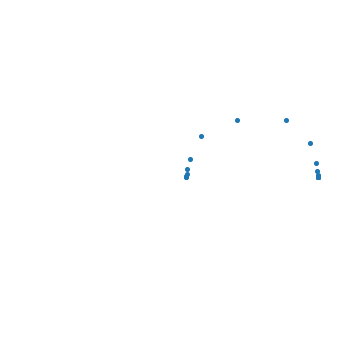

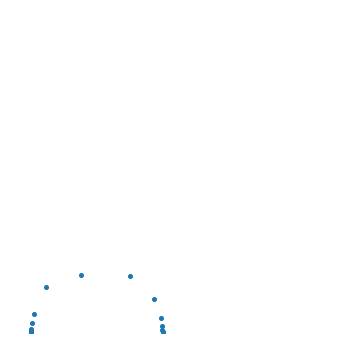

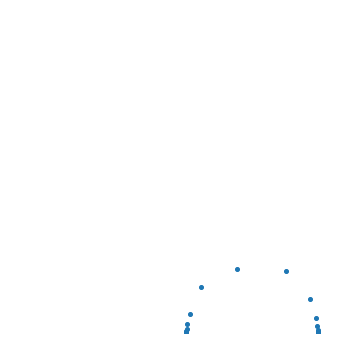

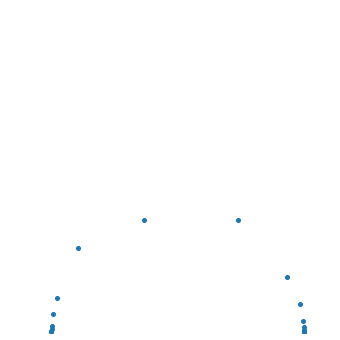

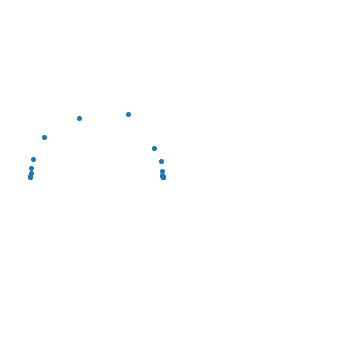

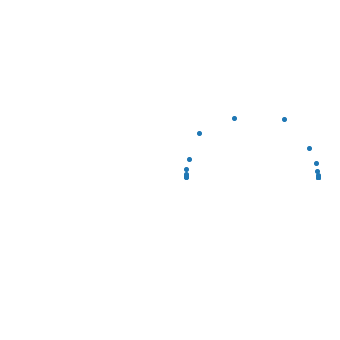

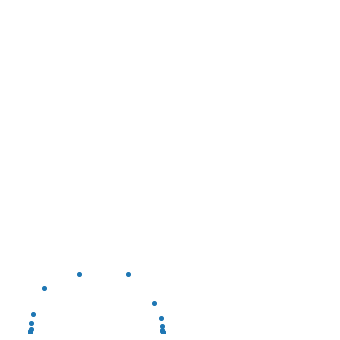

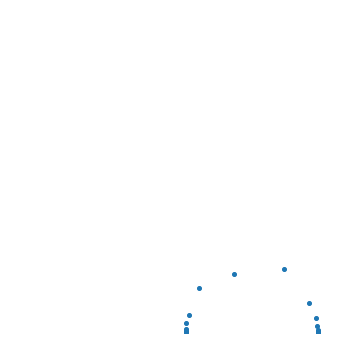

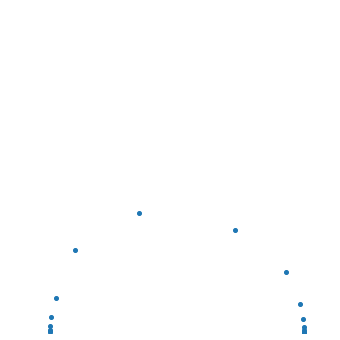

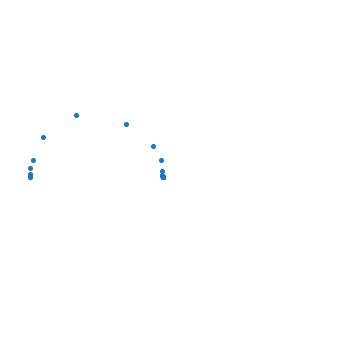

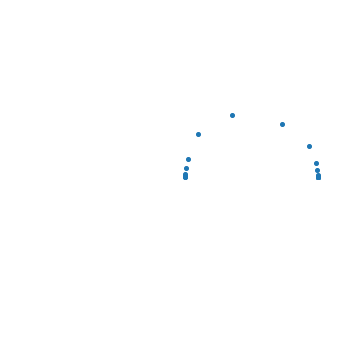

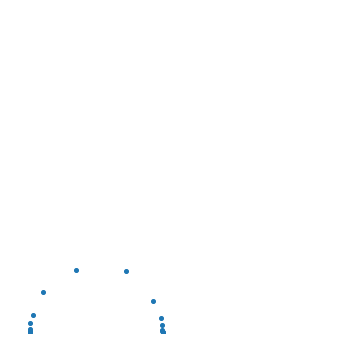

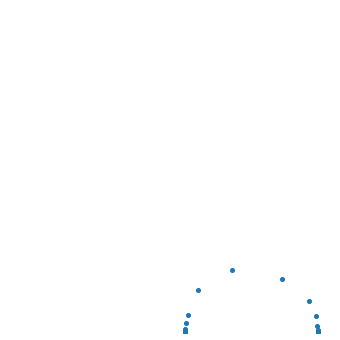

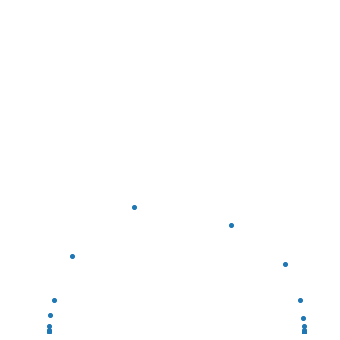

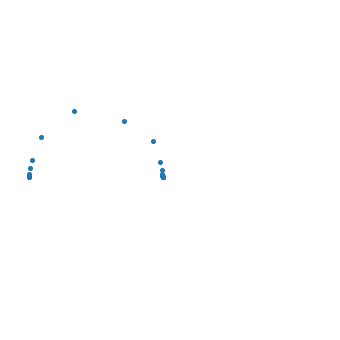

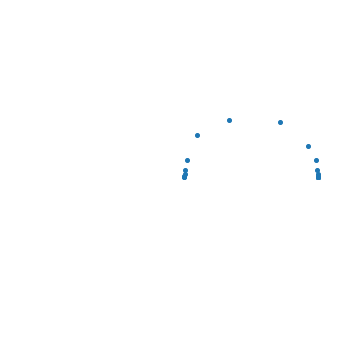

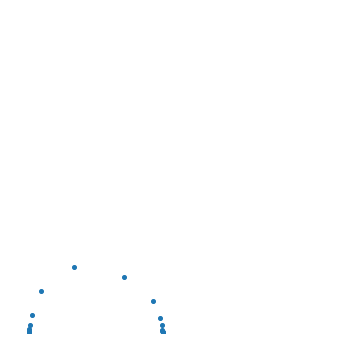

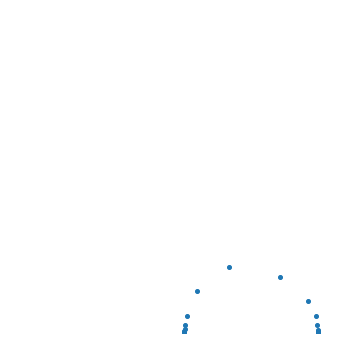

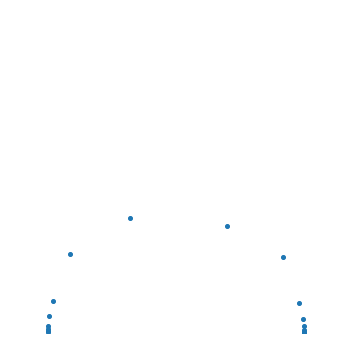

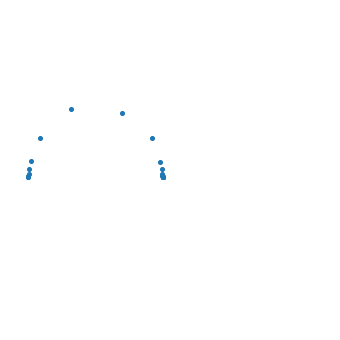

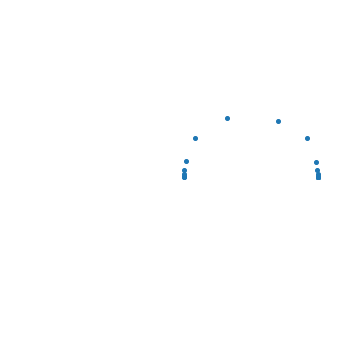

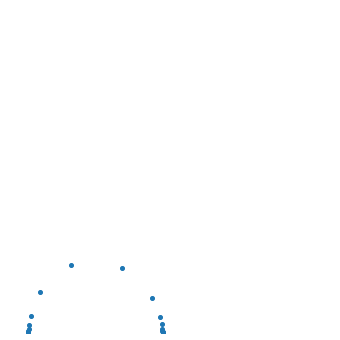

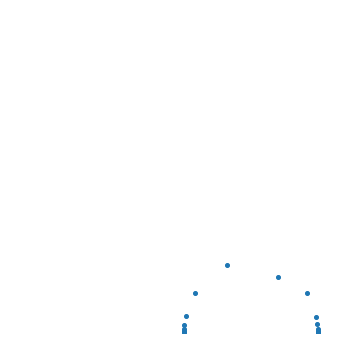

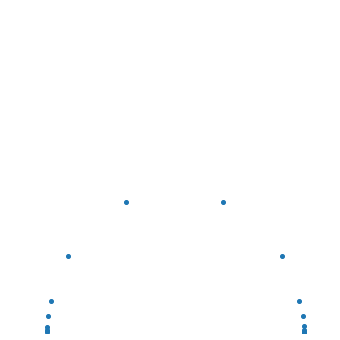

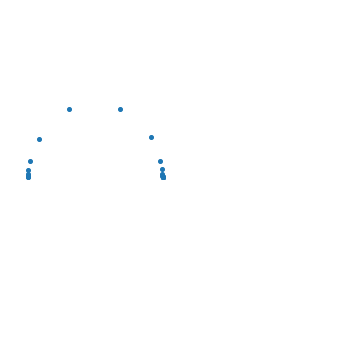

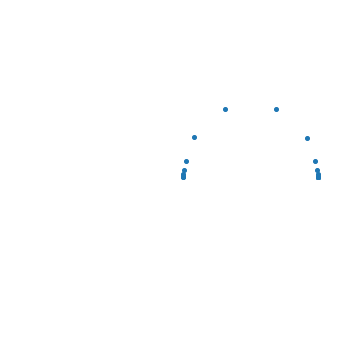

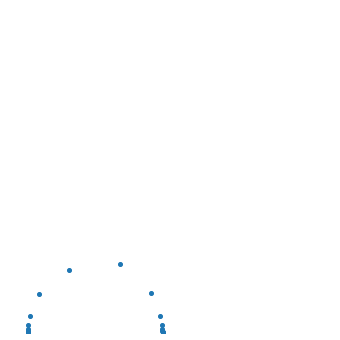

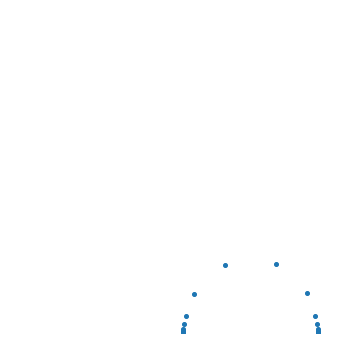

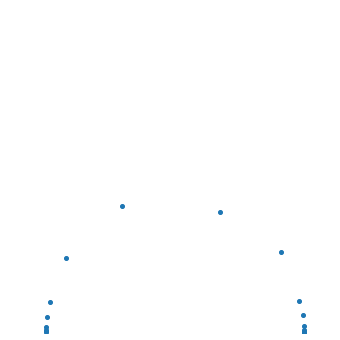

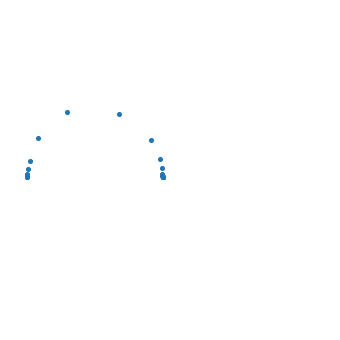

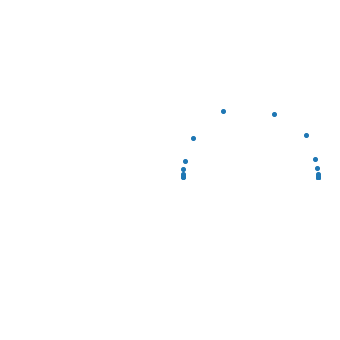

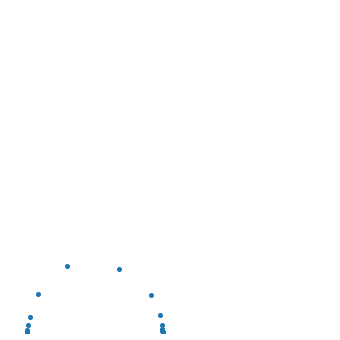

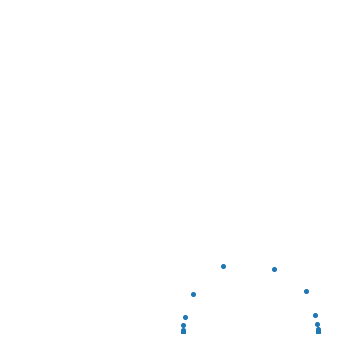

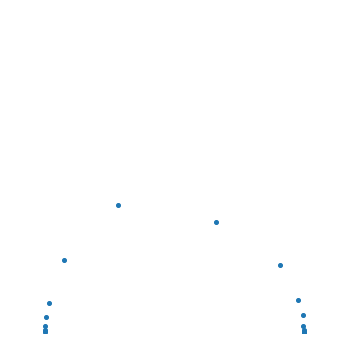

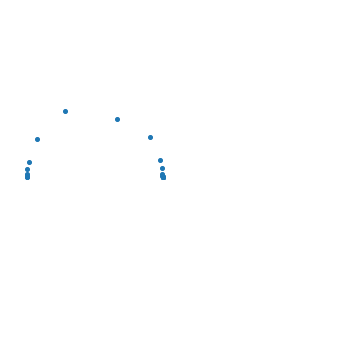

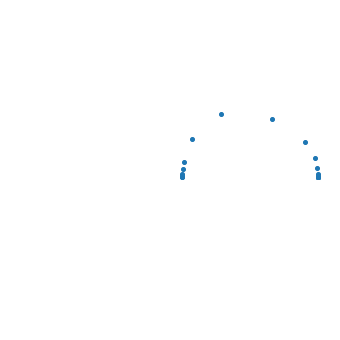

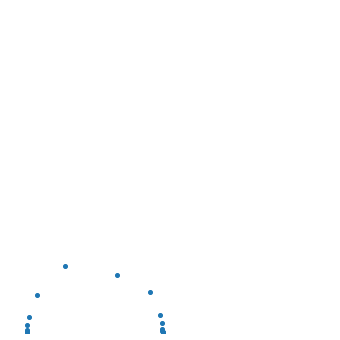

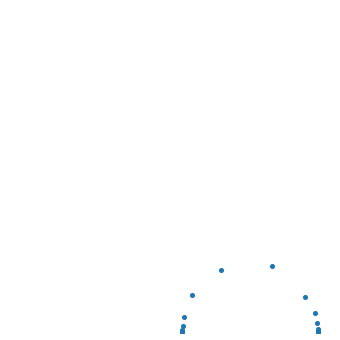

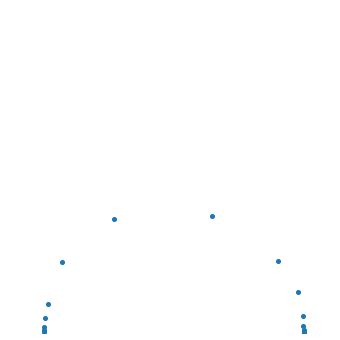

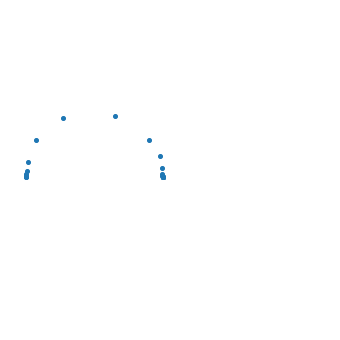

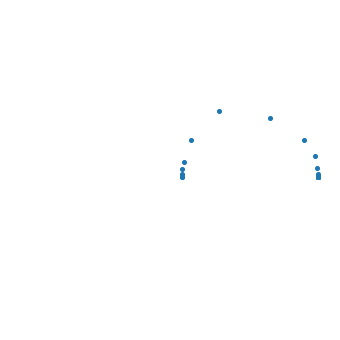

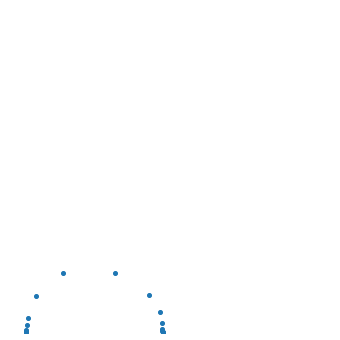

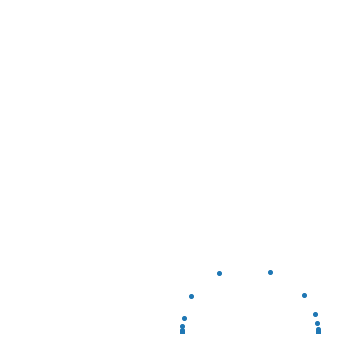

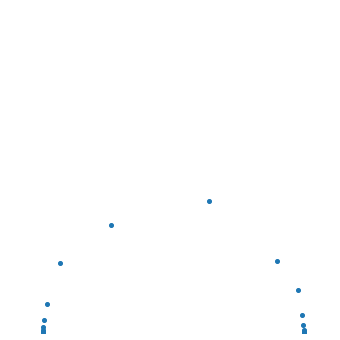

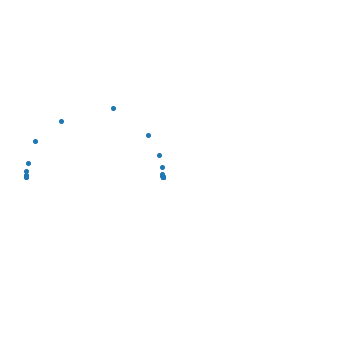

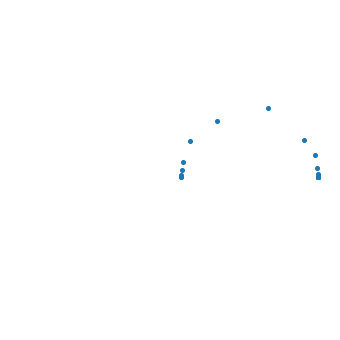

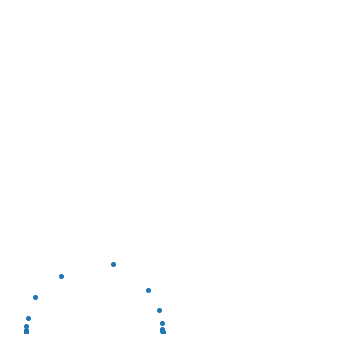

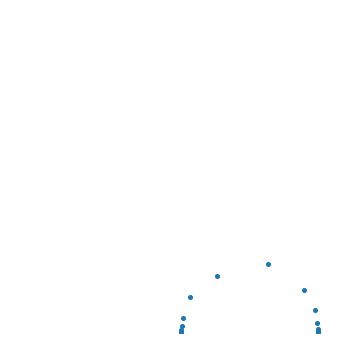

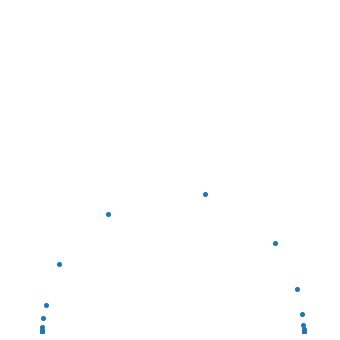

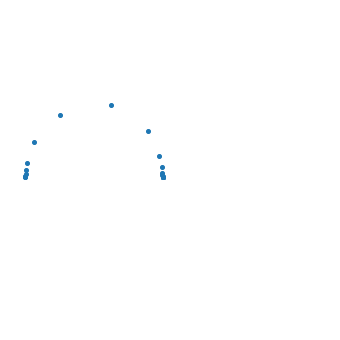

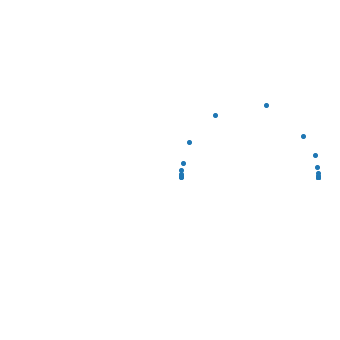

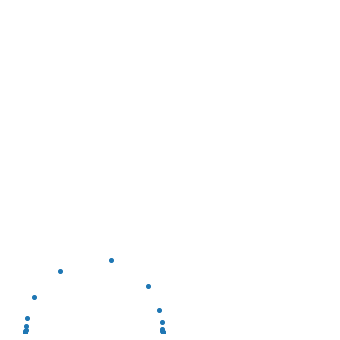

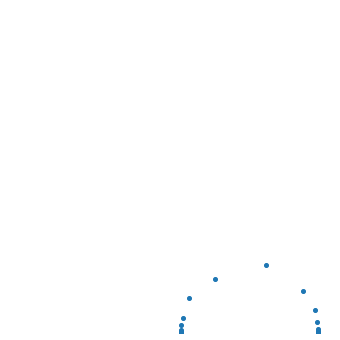

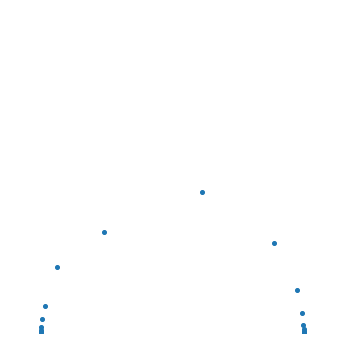

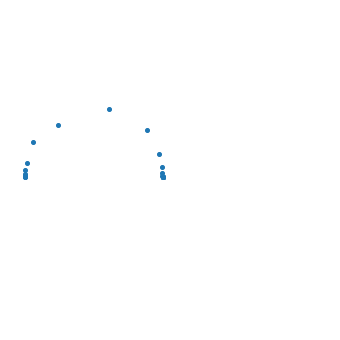

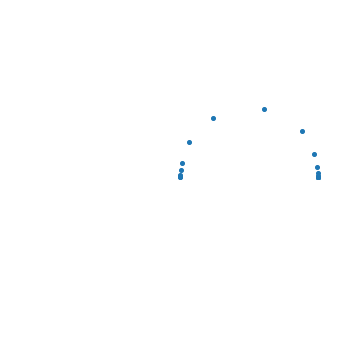

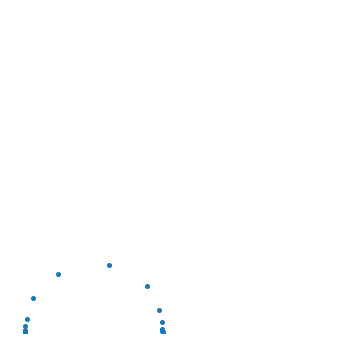

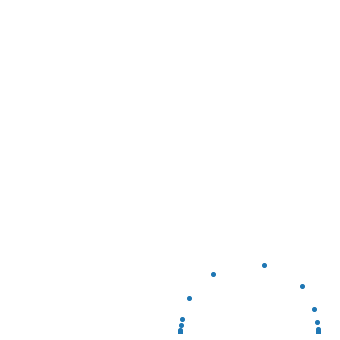

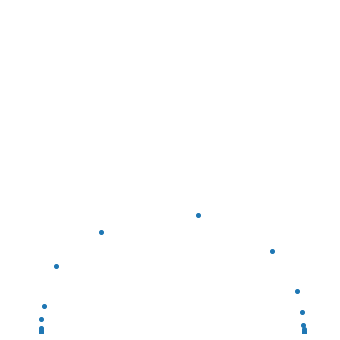

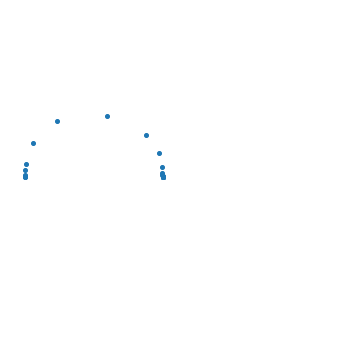

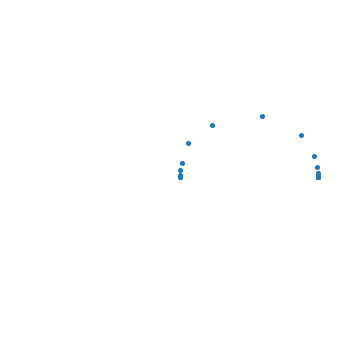

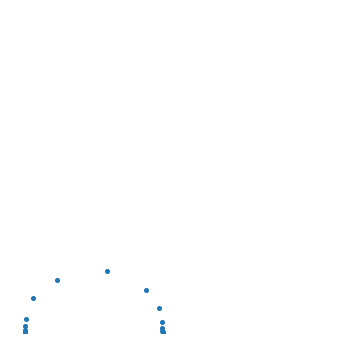

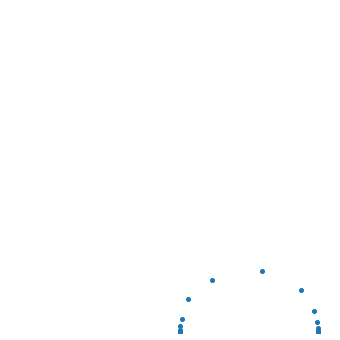

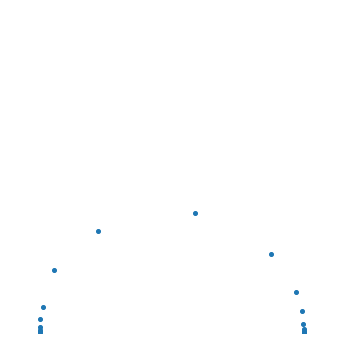

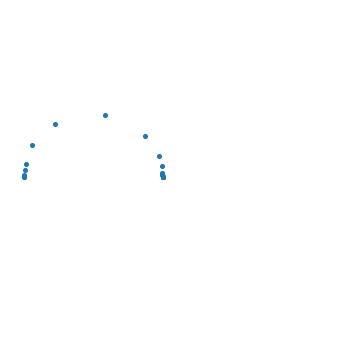

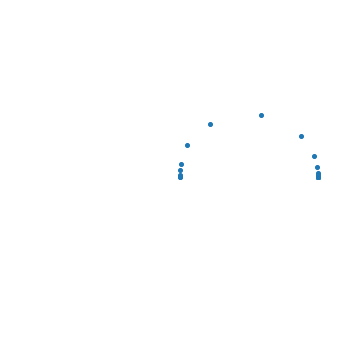

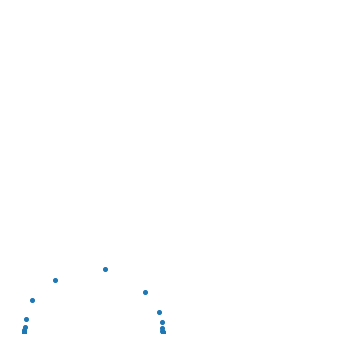

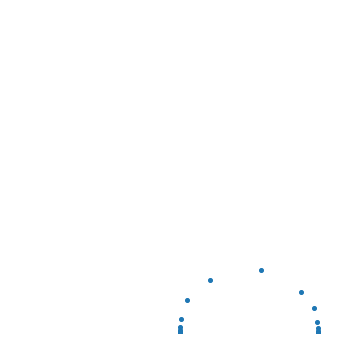

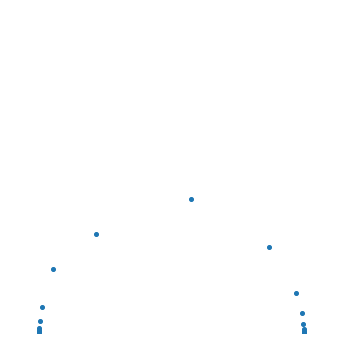

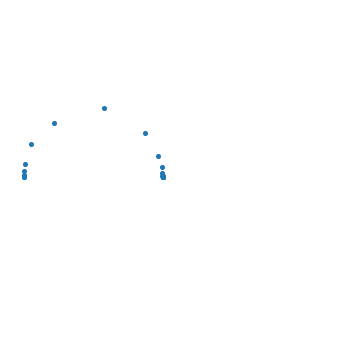

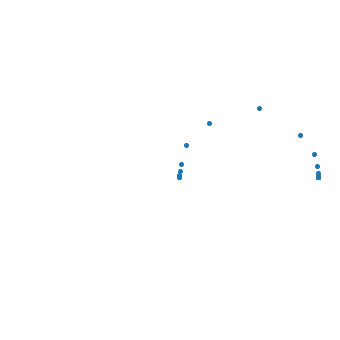

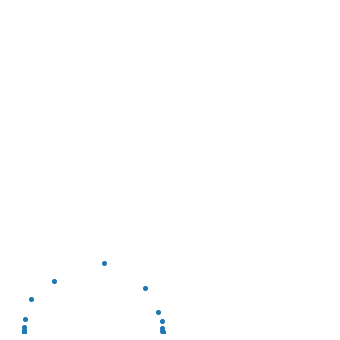

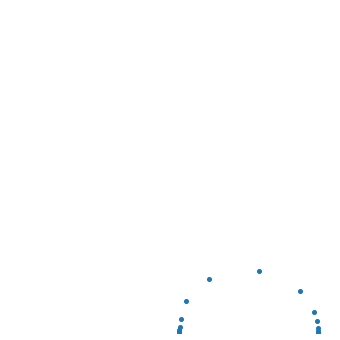

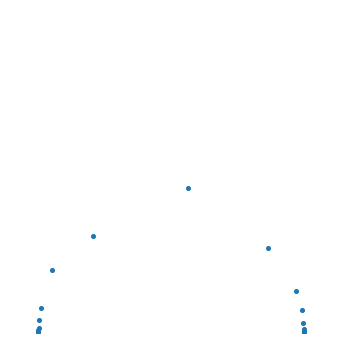

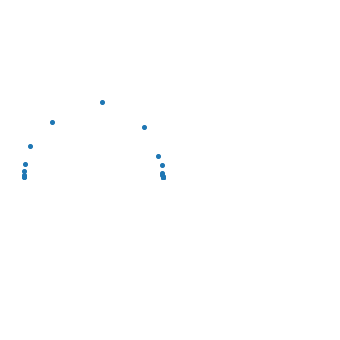

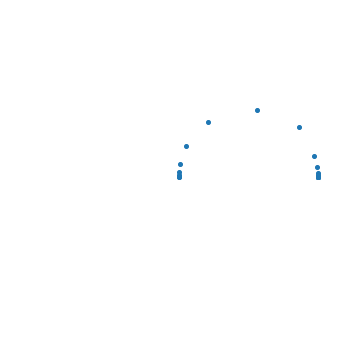

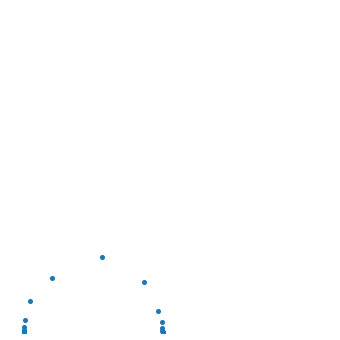

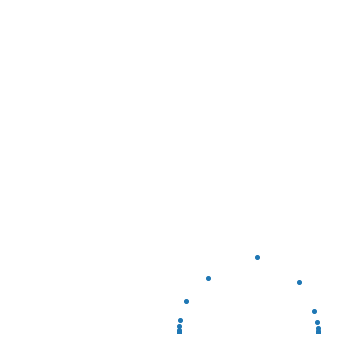

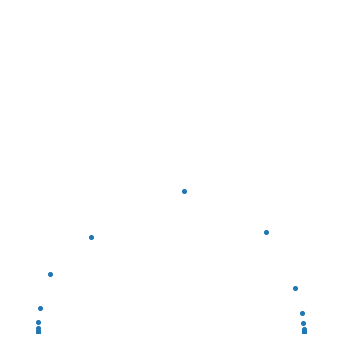

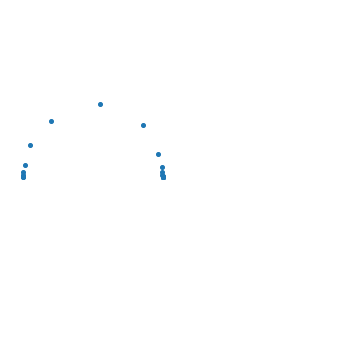

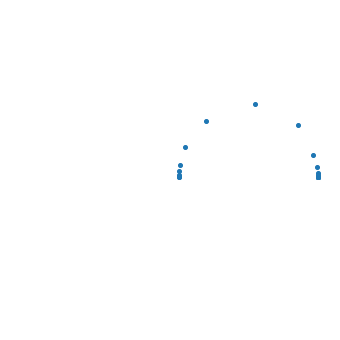

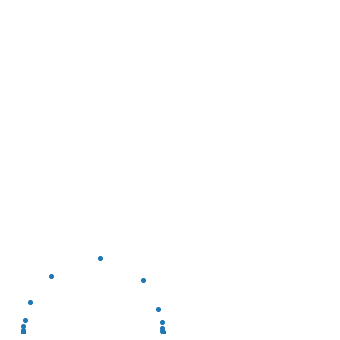

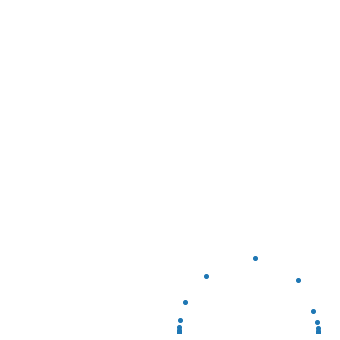

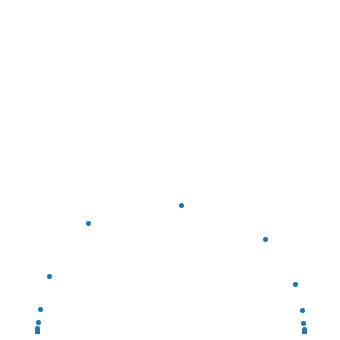

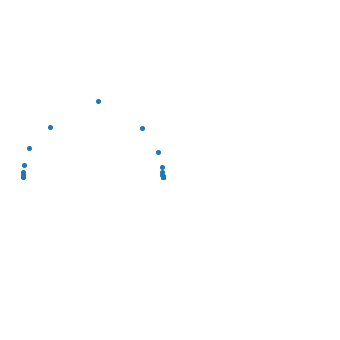

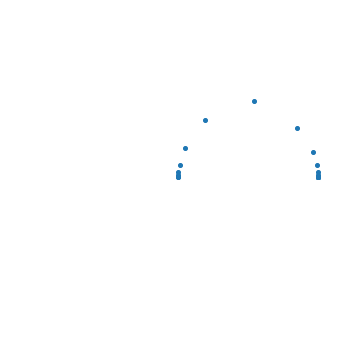

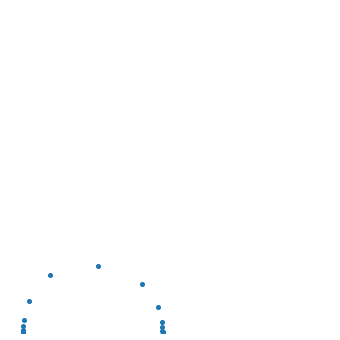

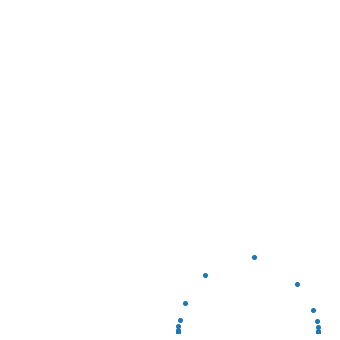

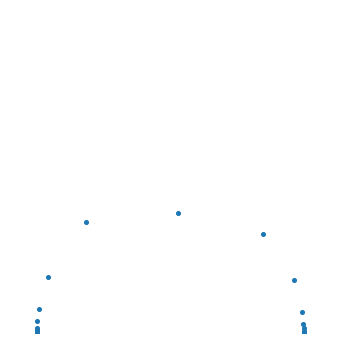

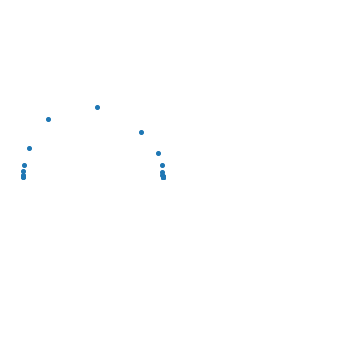

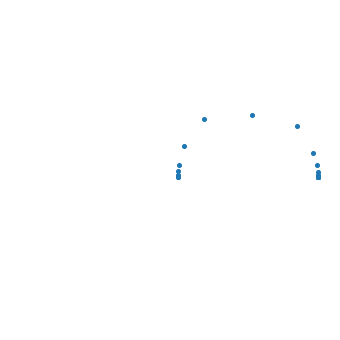

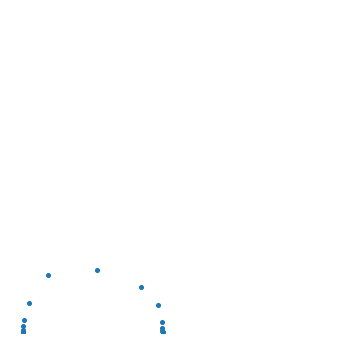

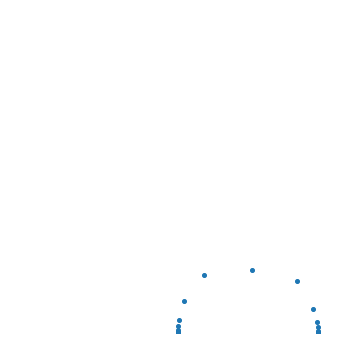

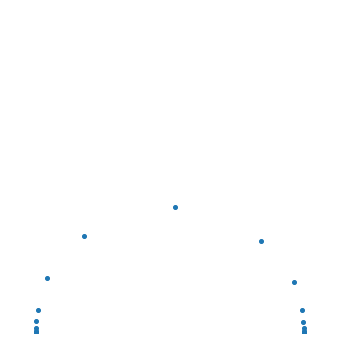

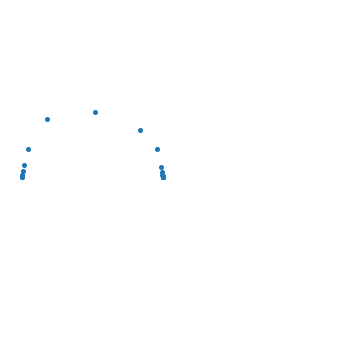

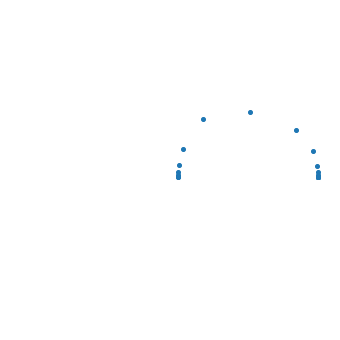

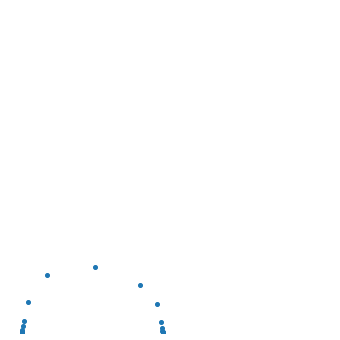

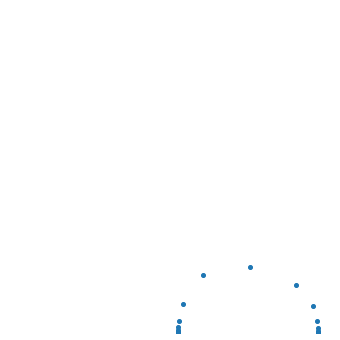

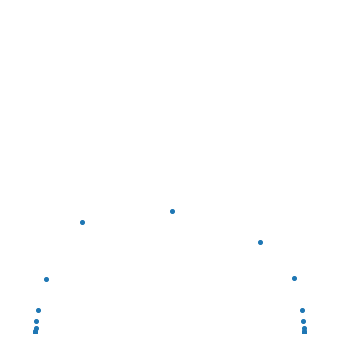

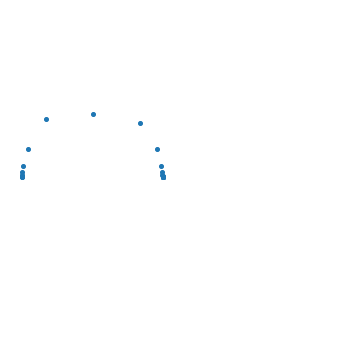

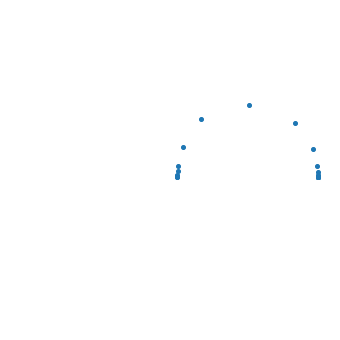

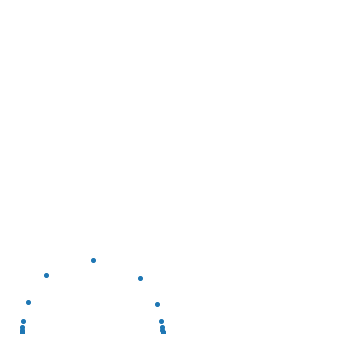

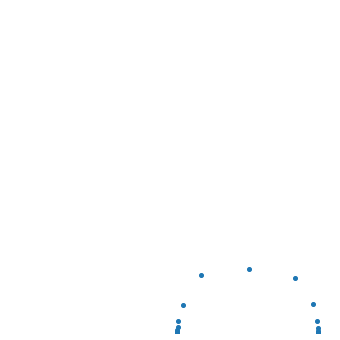

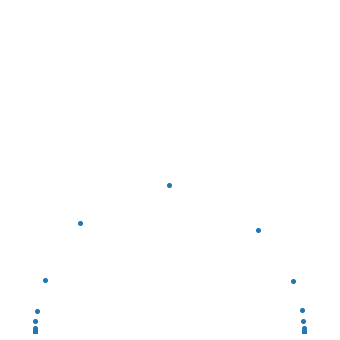

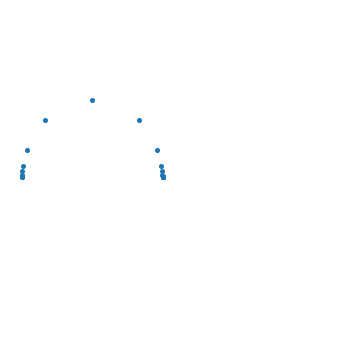

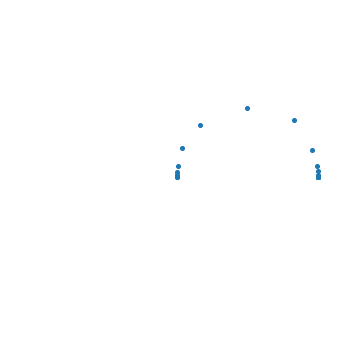

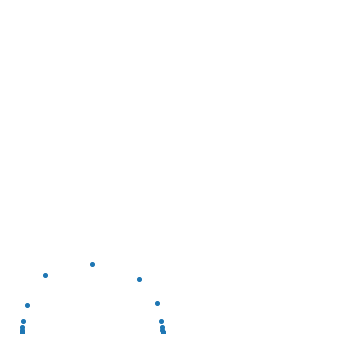

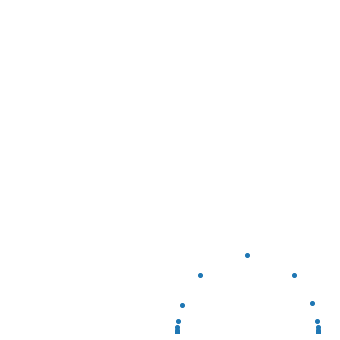

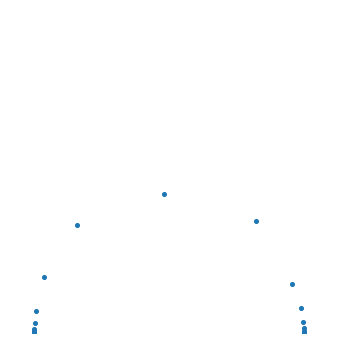

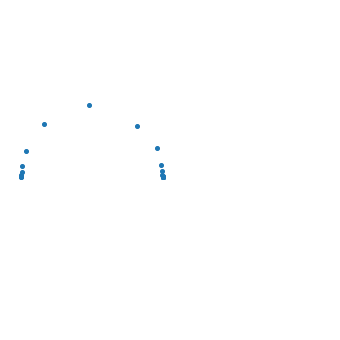

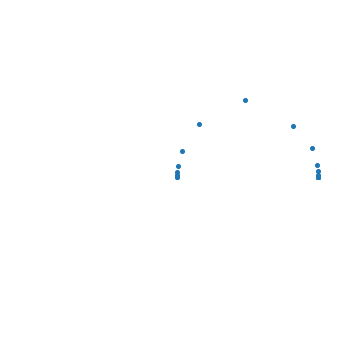

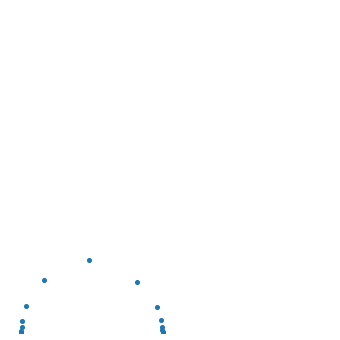

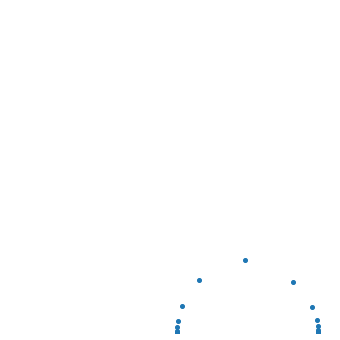

In [5]:
# Noisescale = 0.1 - 'not noisy' [50]
f_start = 10**6
f_stop = 0.01
decades = 3
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 1E-6 #F
resistance= np.linspace(1,100,50, dtype=int,endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RsRC_file_writer(f_start, f_stop, decades, Rs, R1, C, alteration='noise', noisescale=0.1, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

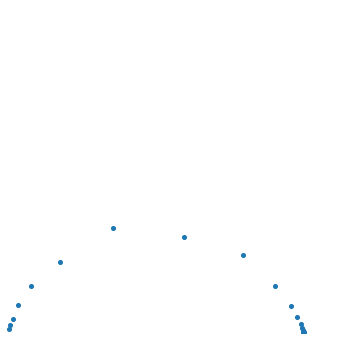

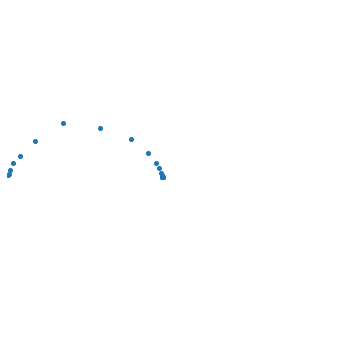

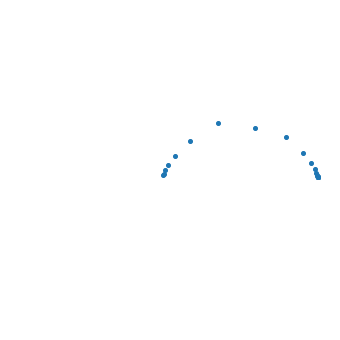

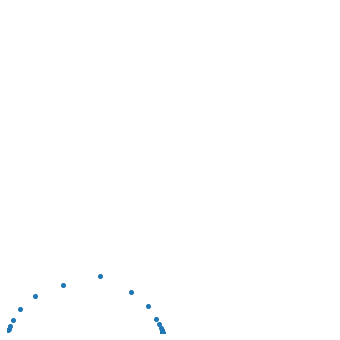

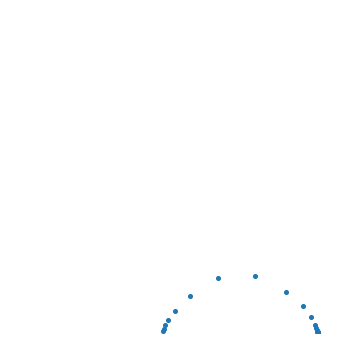

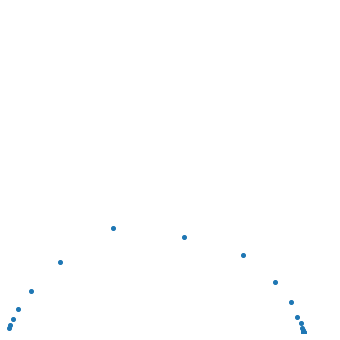

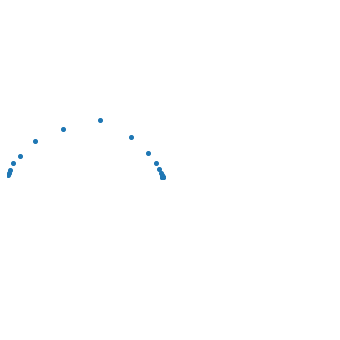

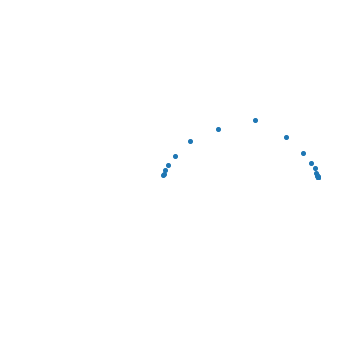

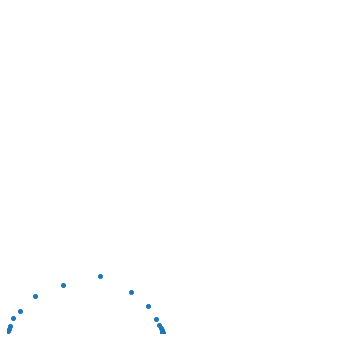

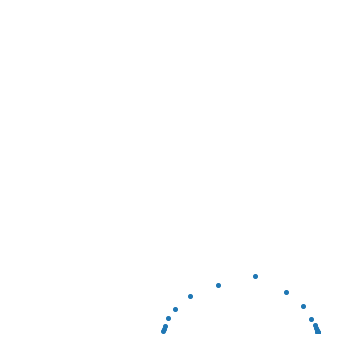

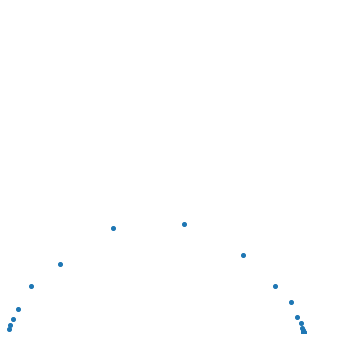

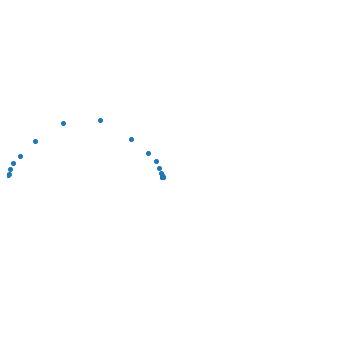

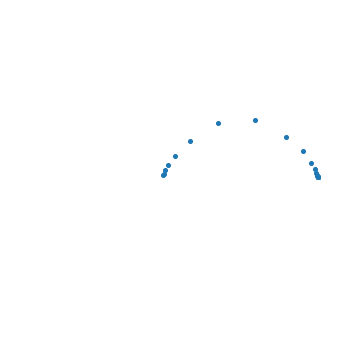

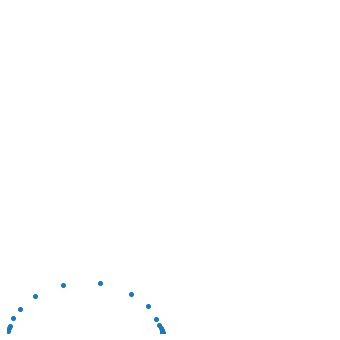

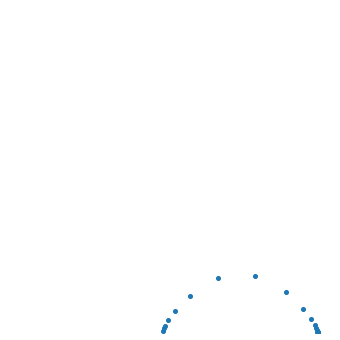

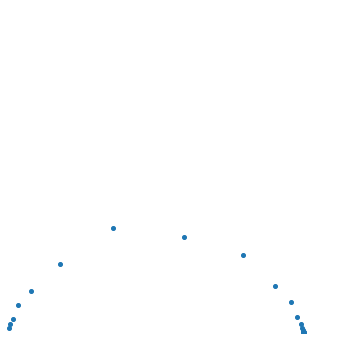

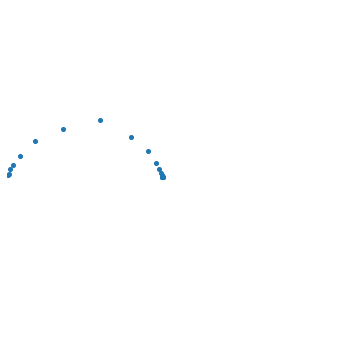

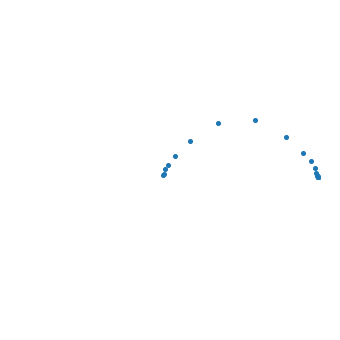

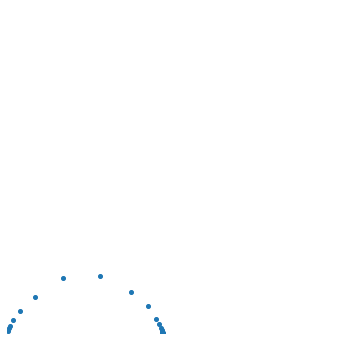

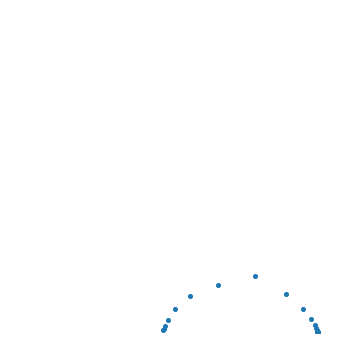

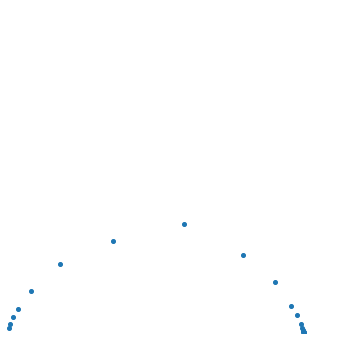

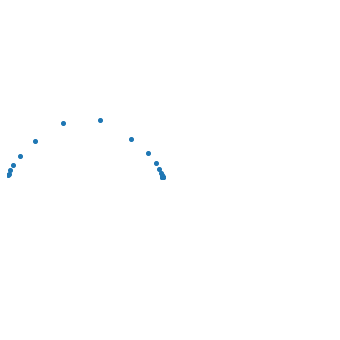

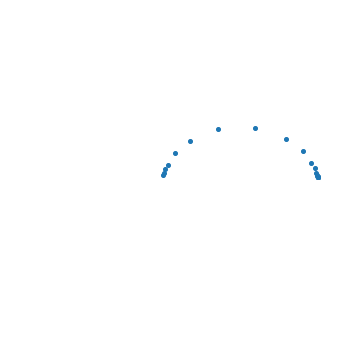

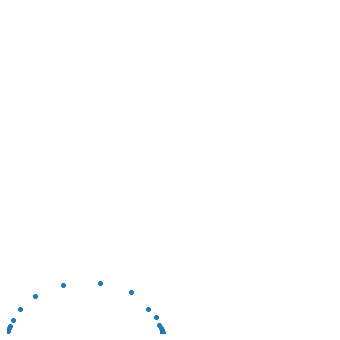

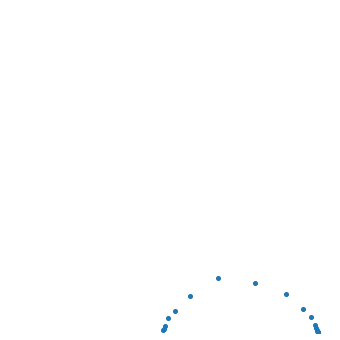

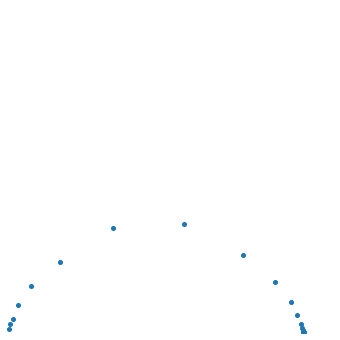

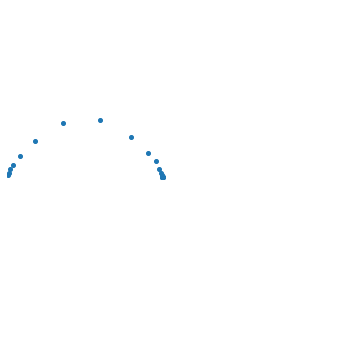

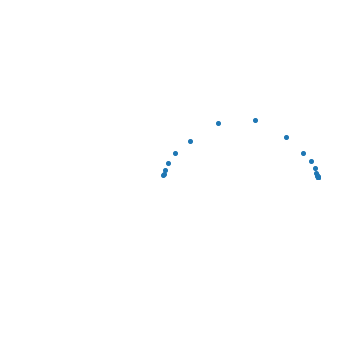

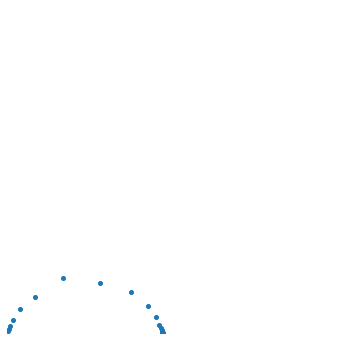

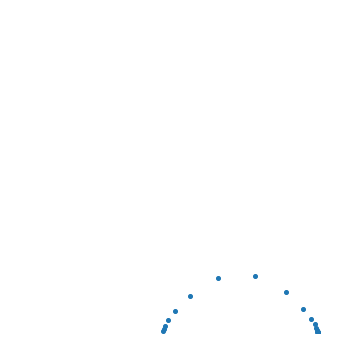

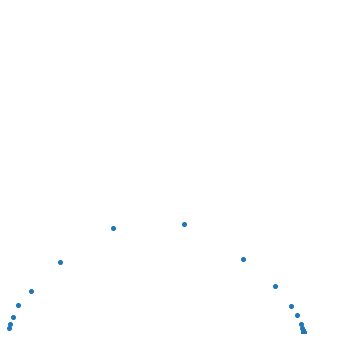

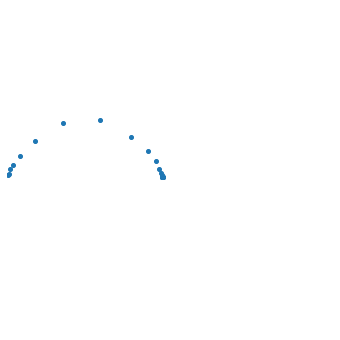

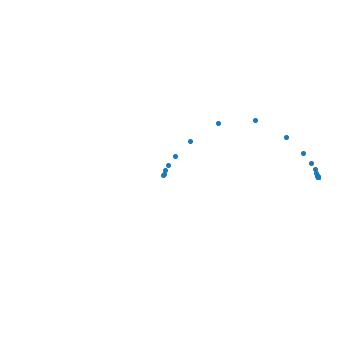

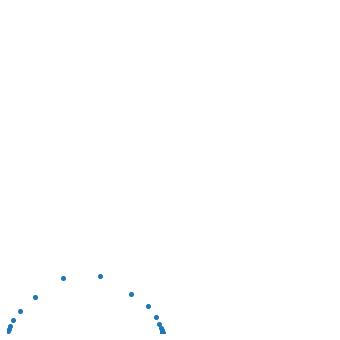

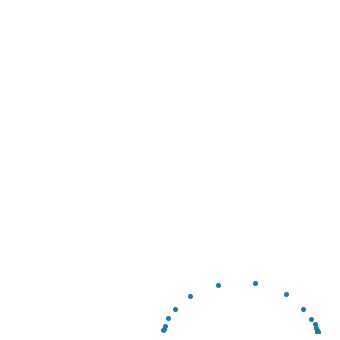

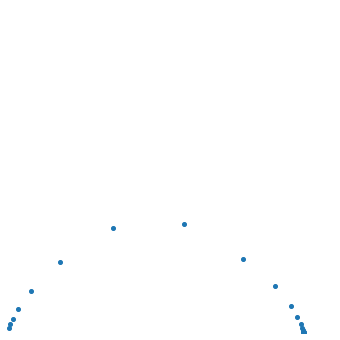

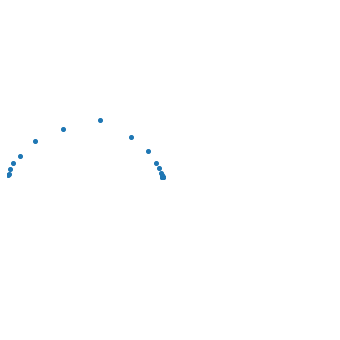

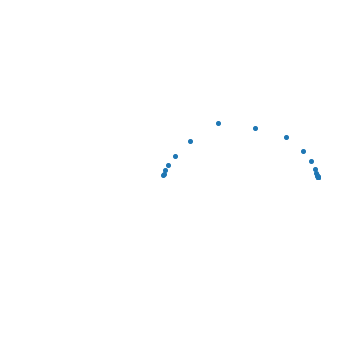

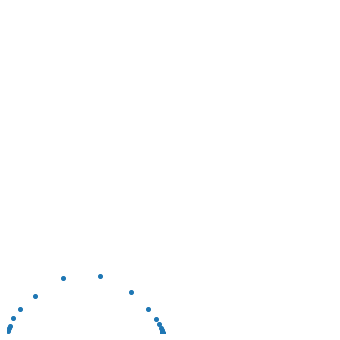

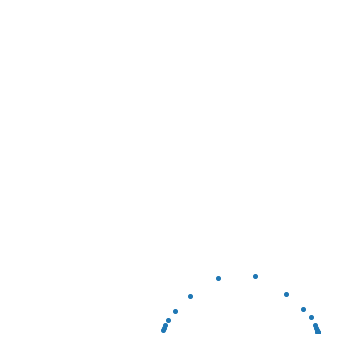

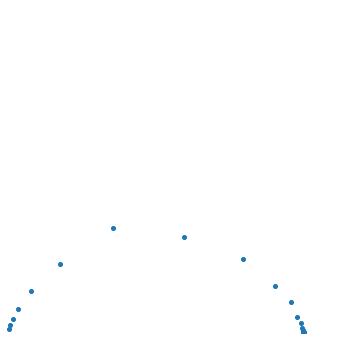

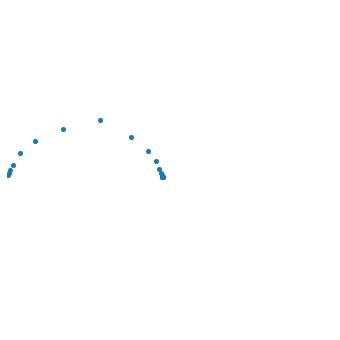

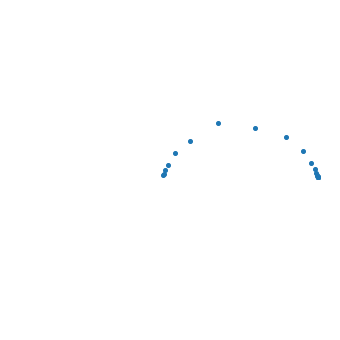

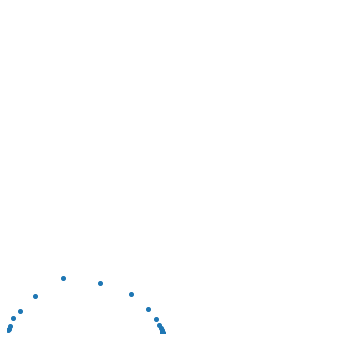

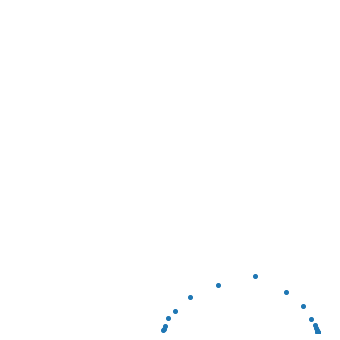

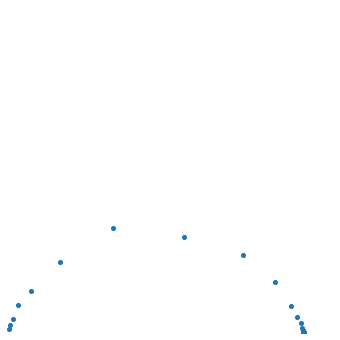

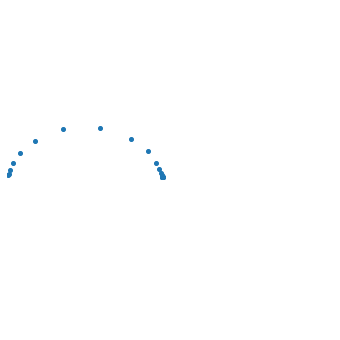

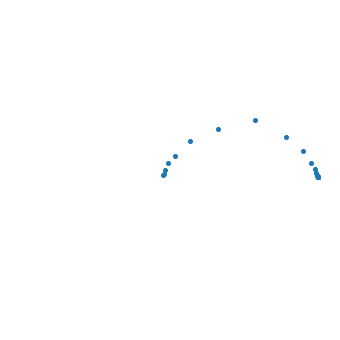

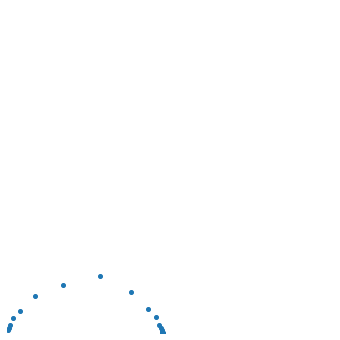

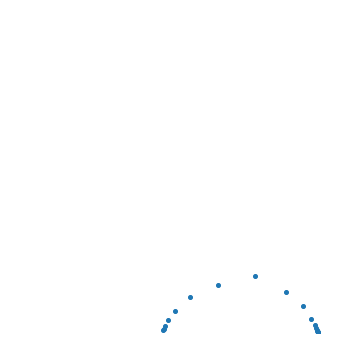

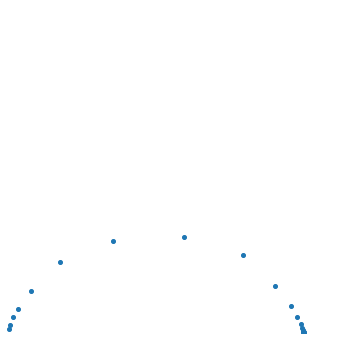

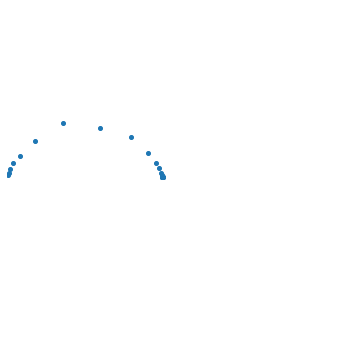

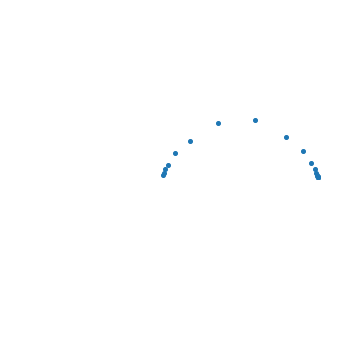

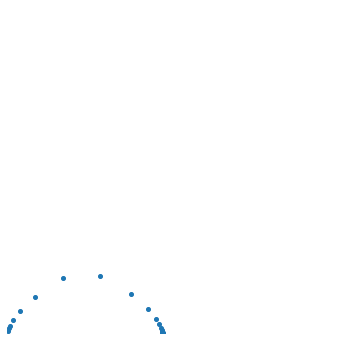

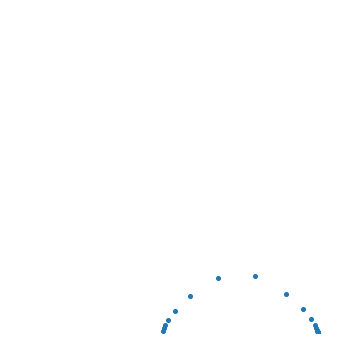

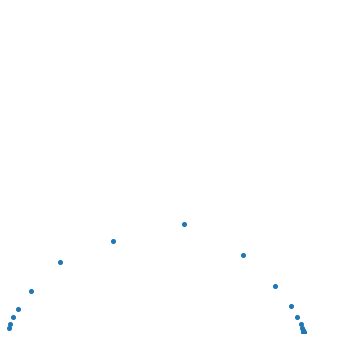

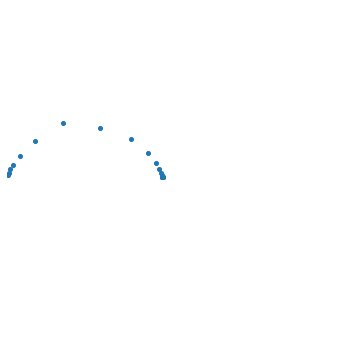

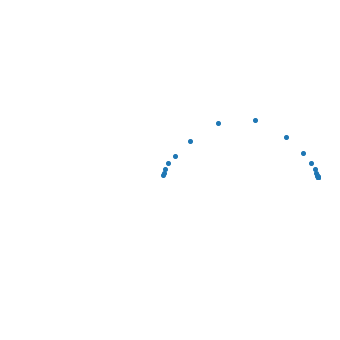

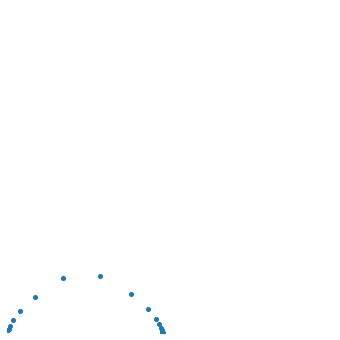

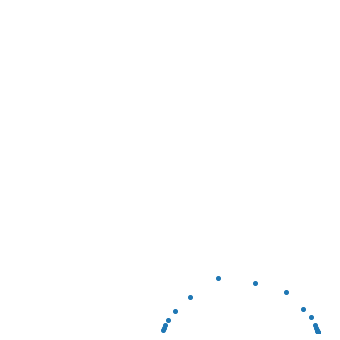

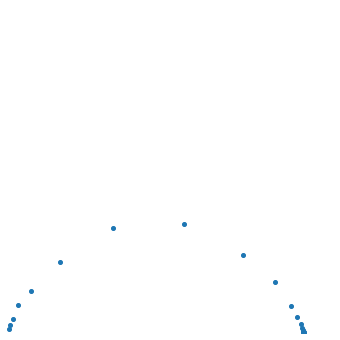

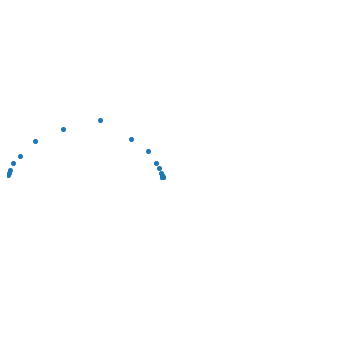

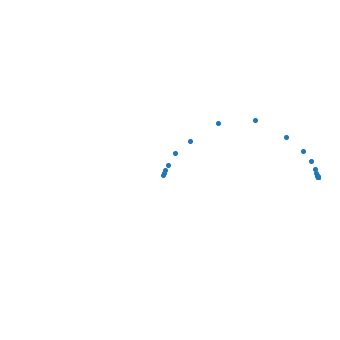

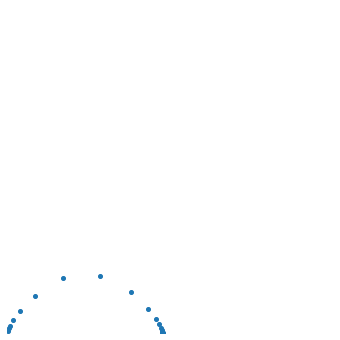

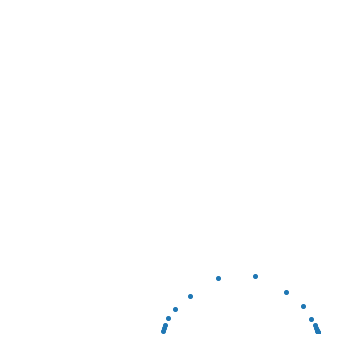

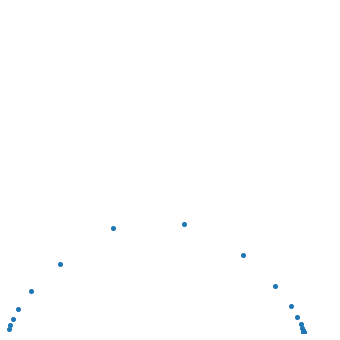

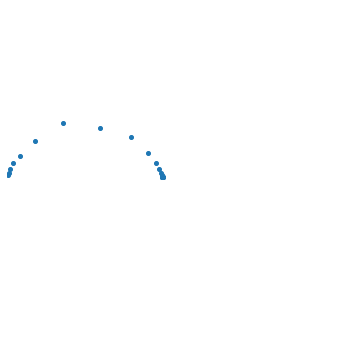

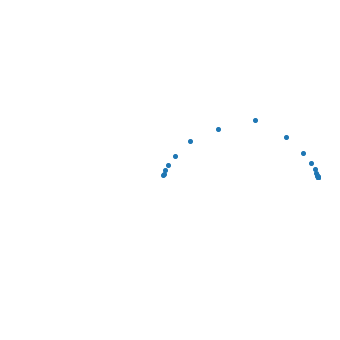

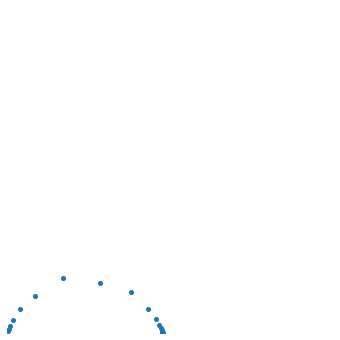

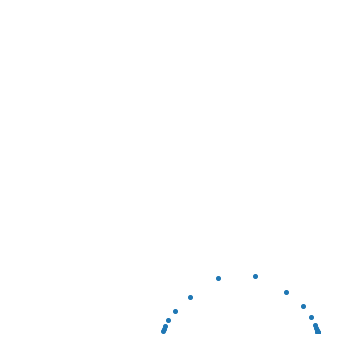

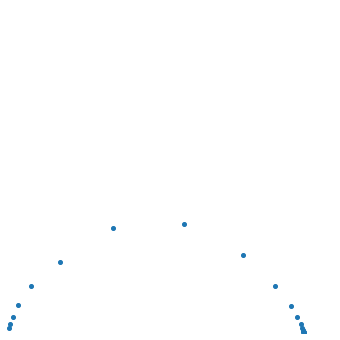

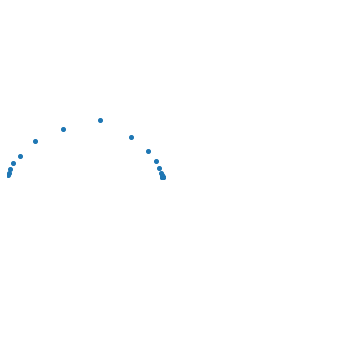

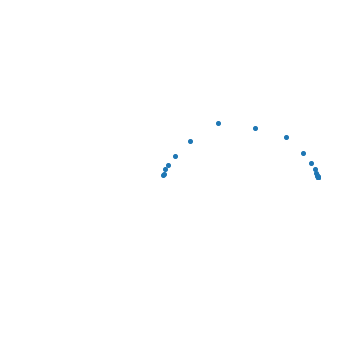

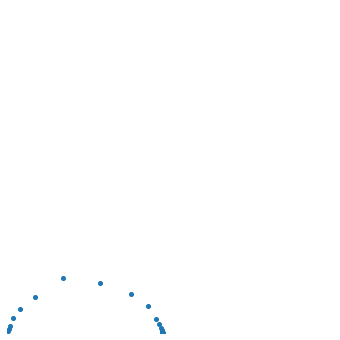

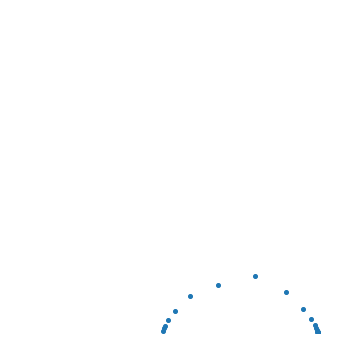

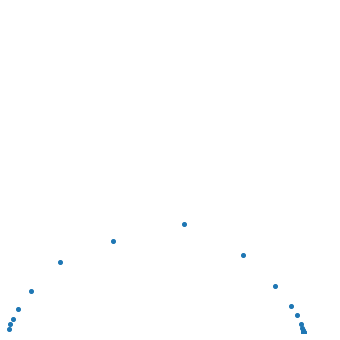

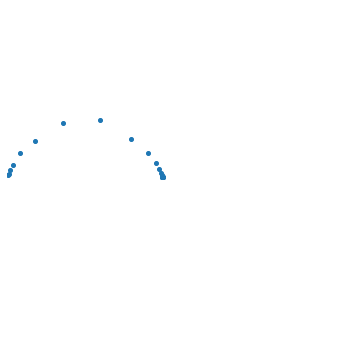

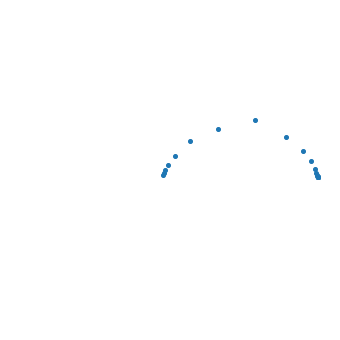

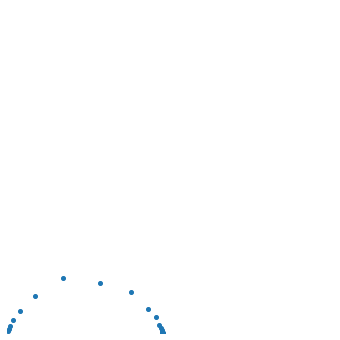

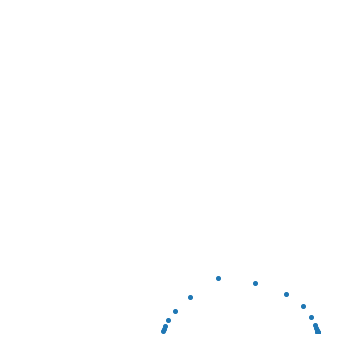

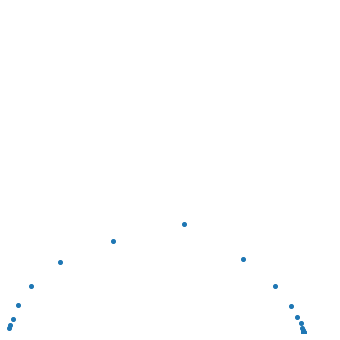

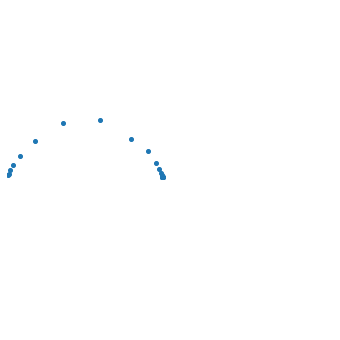

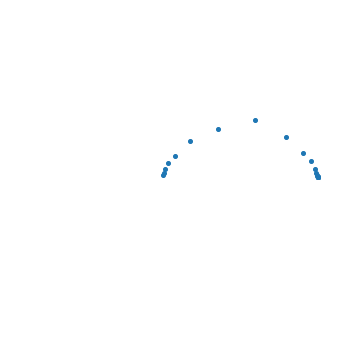

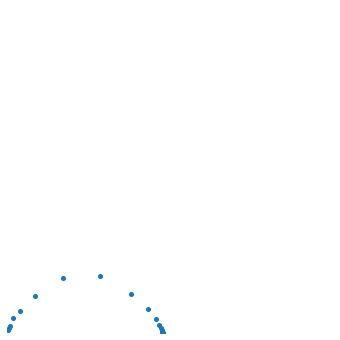

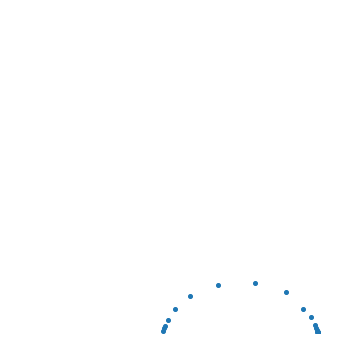

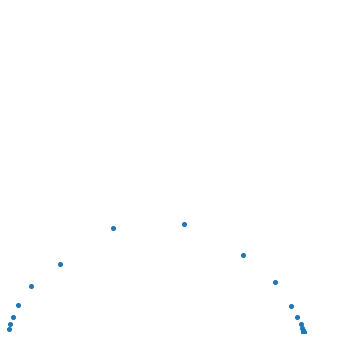

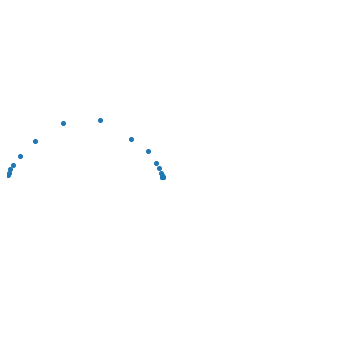

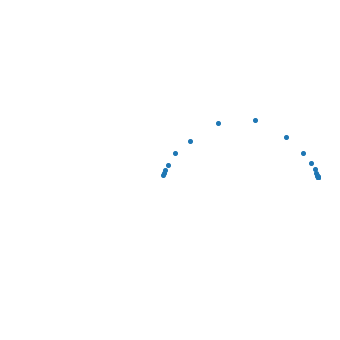

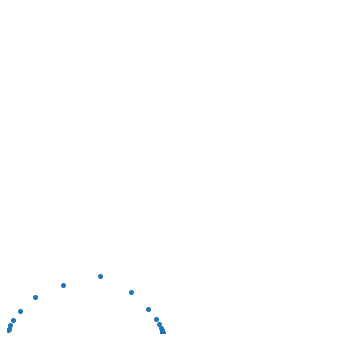

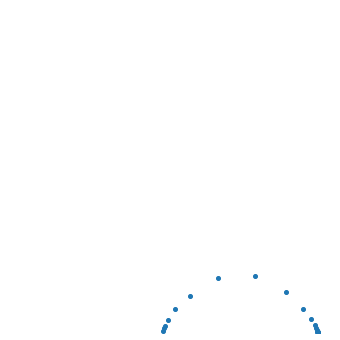

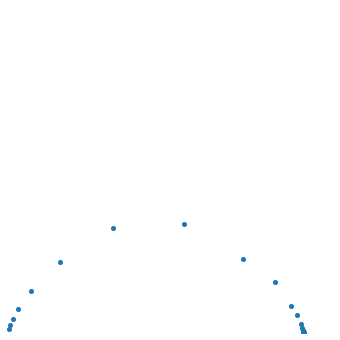

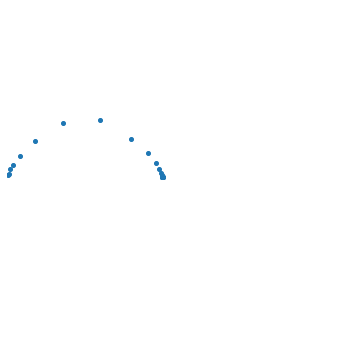

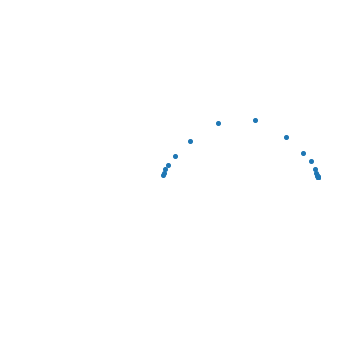

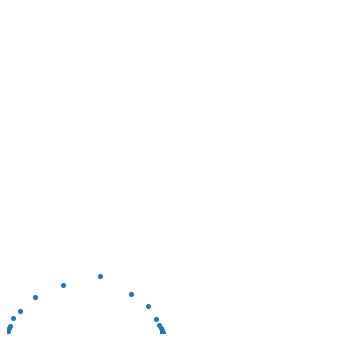

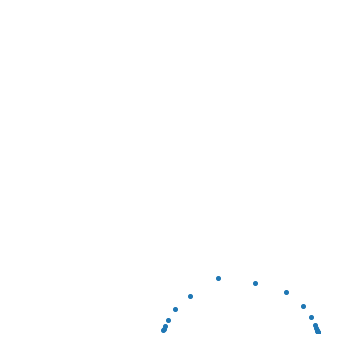

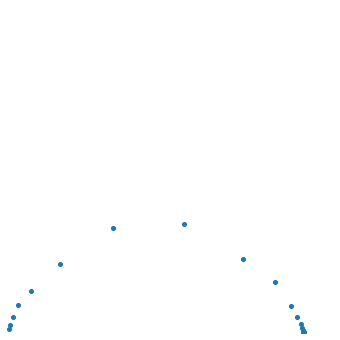

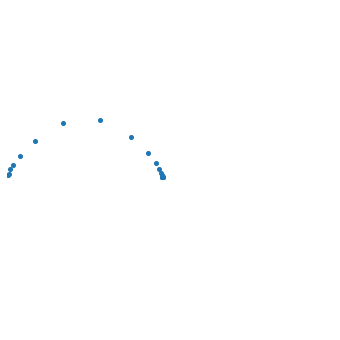

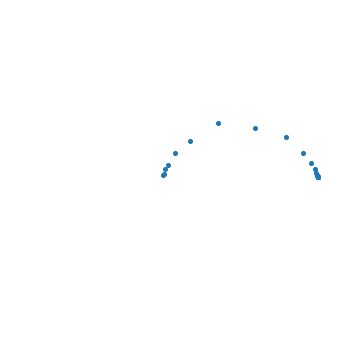

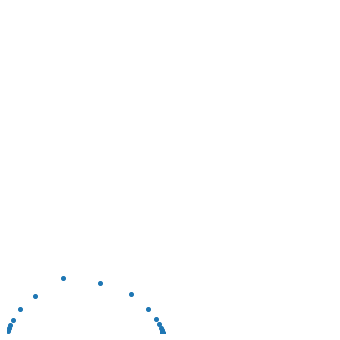

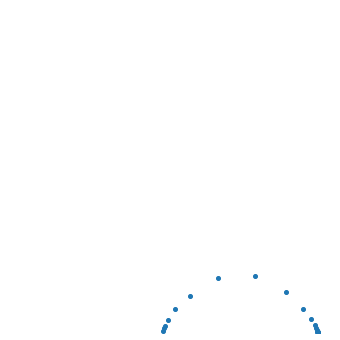

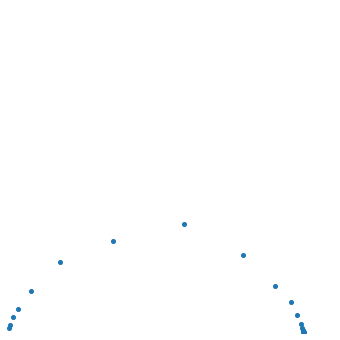

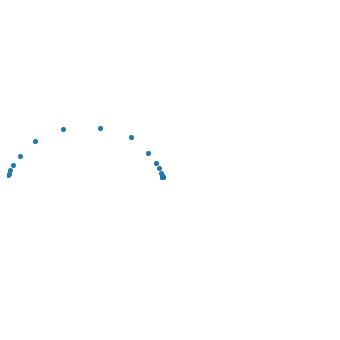

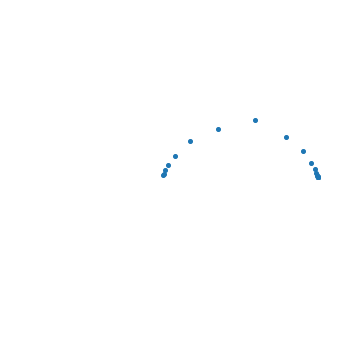

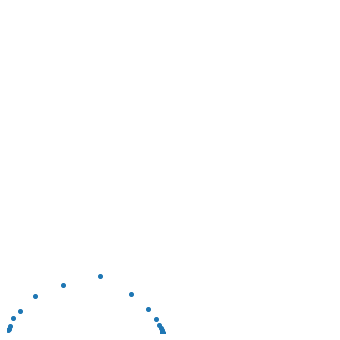

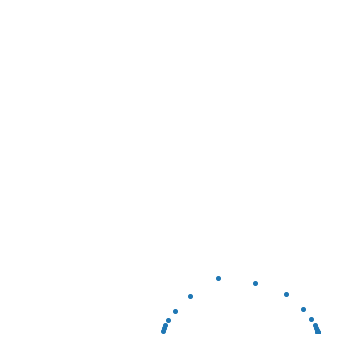

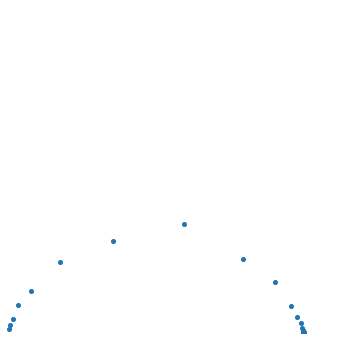

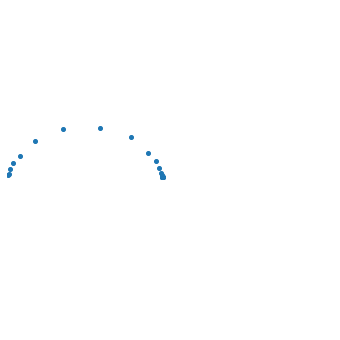

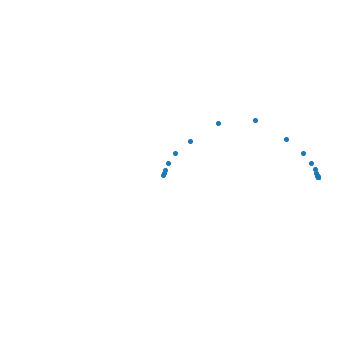

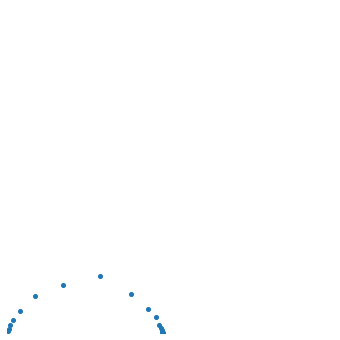

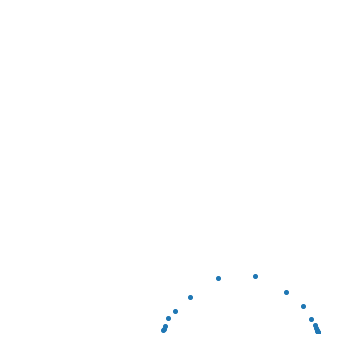

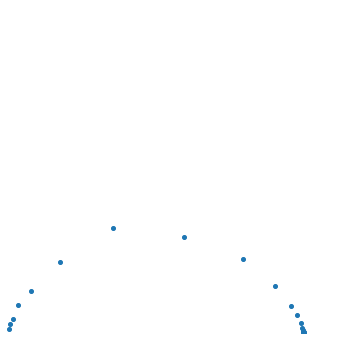

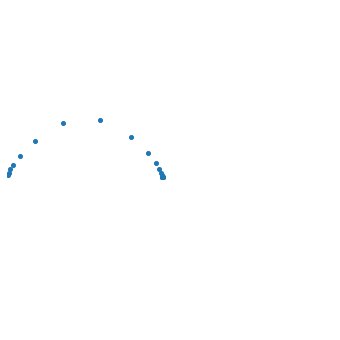

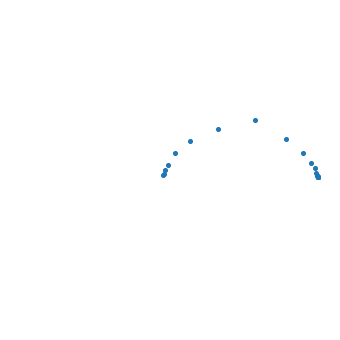

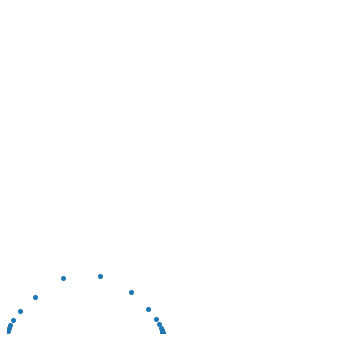

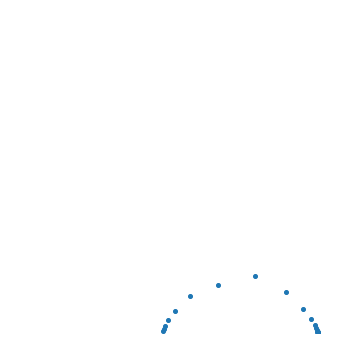

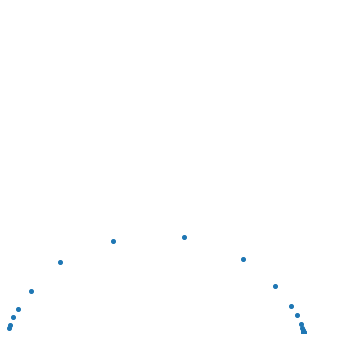

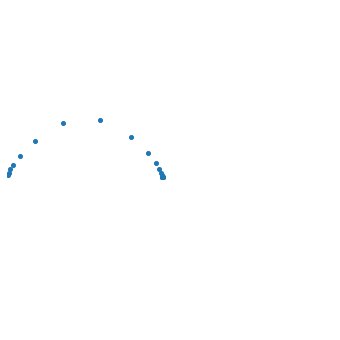

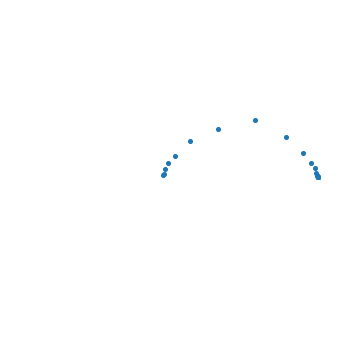

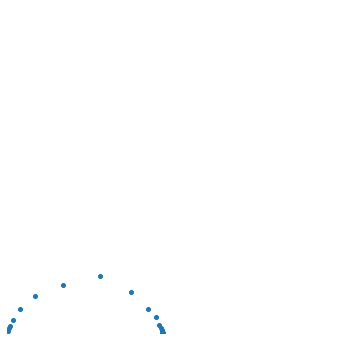

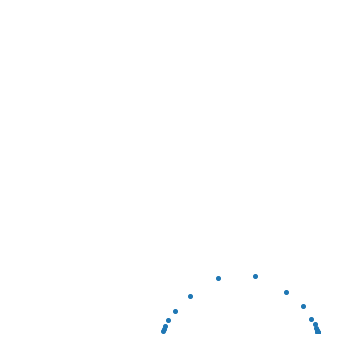

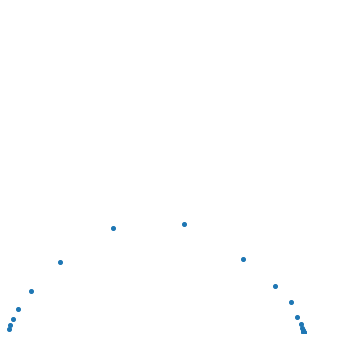

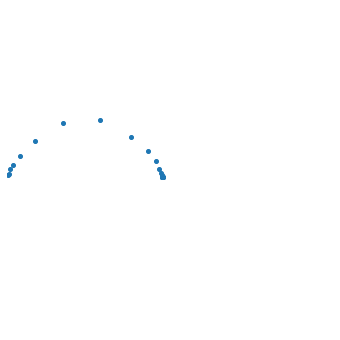

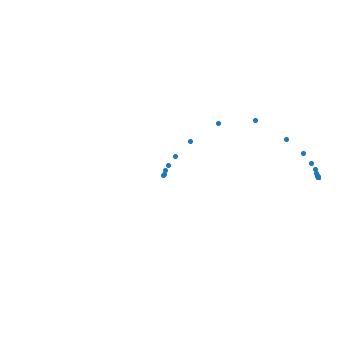

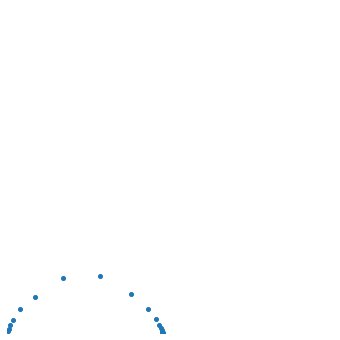

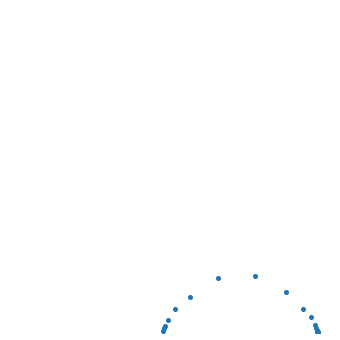

In [6]:
# Noisescale = 0.05 - 'not noisy' [25]
f_start = 10**6
f_stop = 0.01
decades = 3
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q= 25E-6 #F
alpha= 0.8
resistance= np.linspace(1,100,25, dtype=int,endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RQ_file_writer(f_start, f_stop, decades, Rs, Q, alpha, 'parallel', alteration='noise', noisescale=0.1,save_image=True, position=i,scatter=True,transparent=True, axis_off=True)

### single semicircle- Noisy

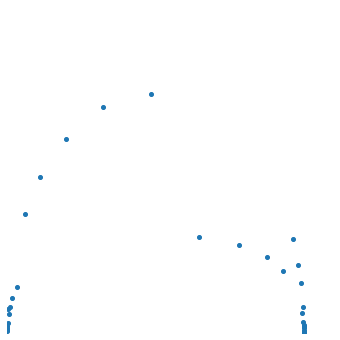

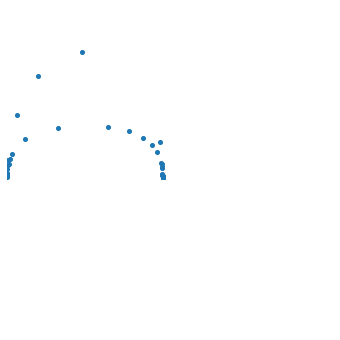

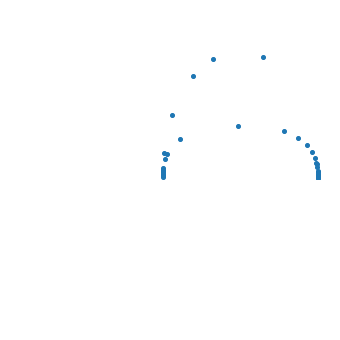

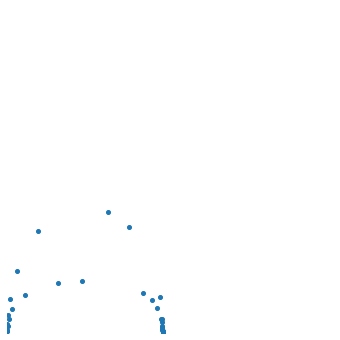

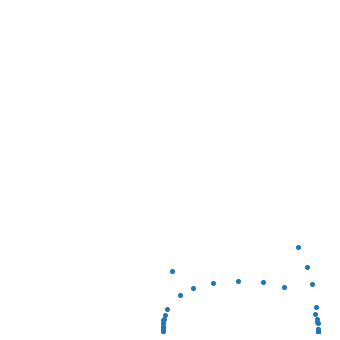

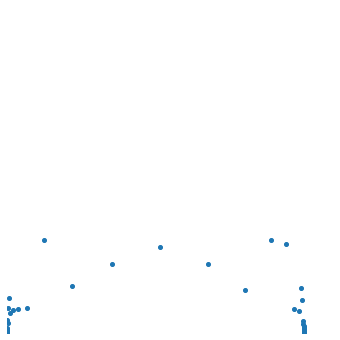

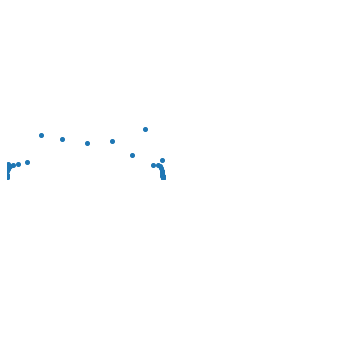

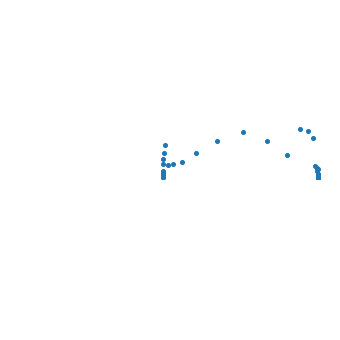

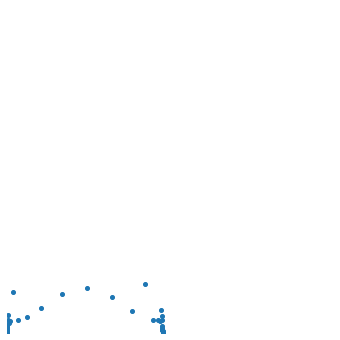

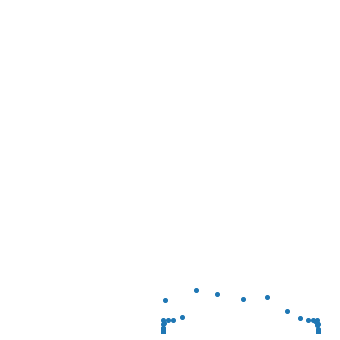

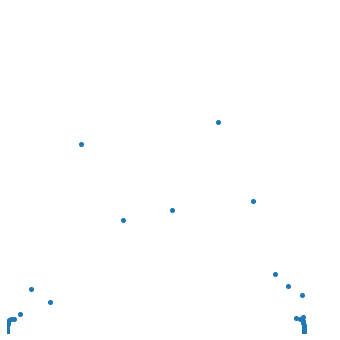

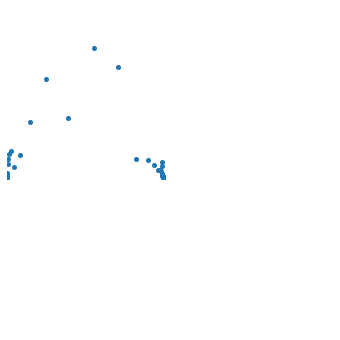

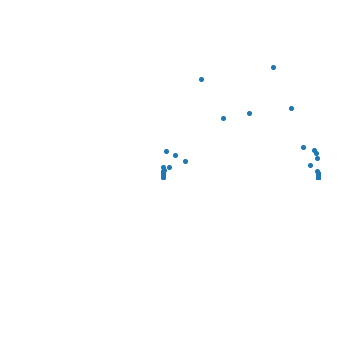

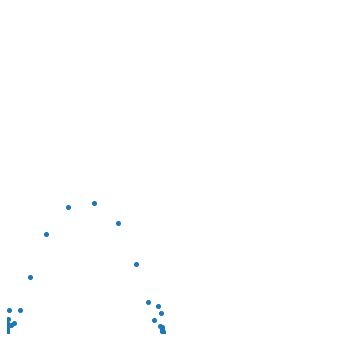

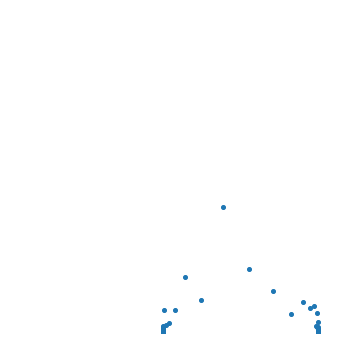

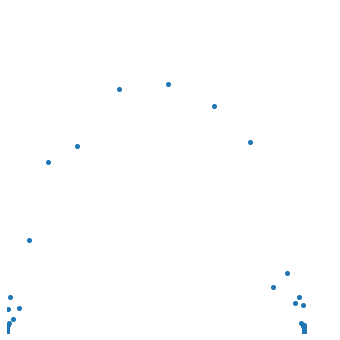

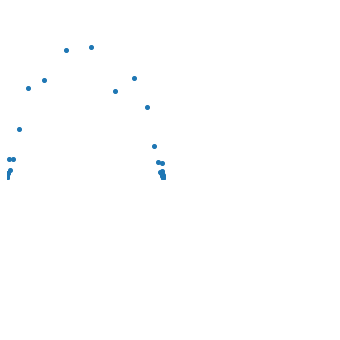

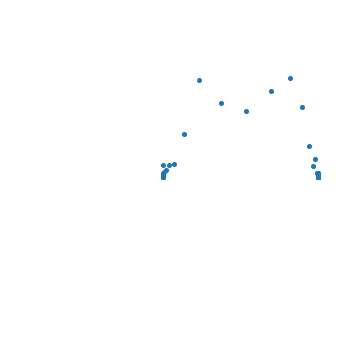

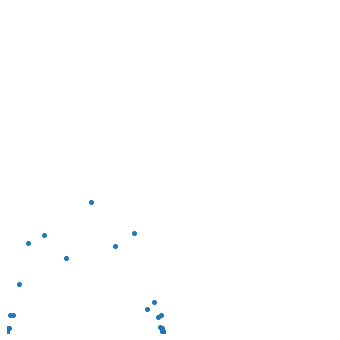

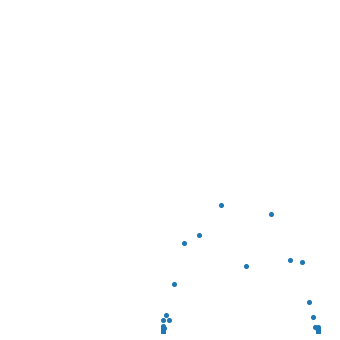

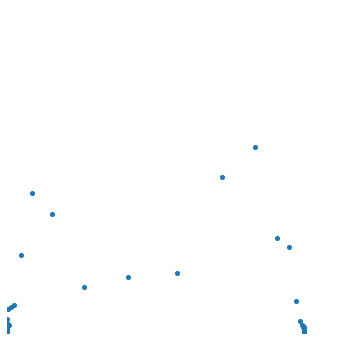

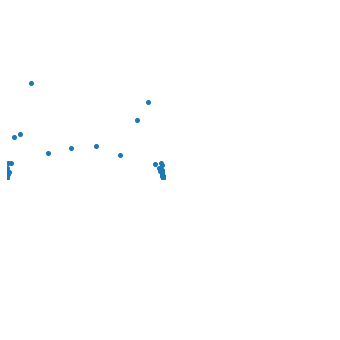

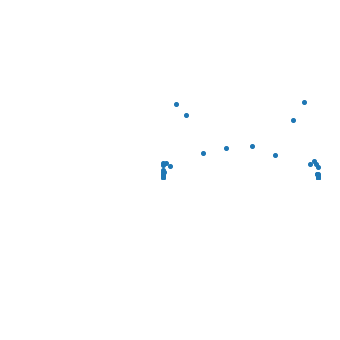

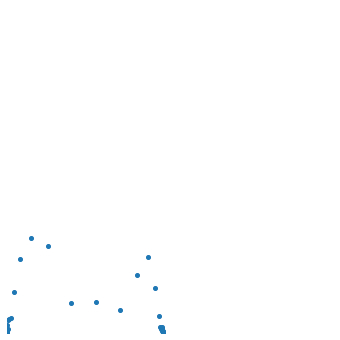

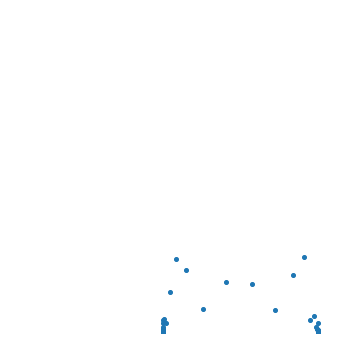

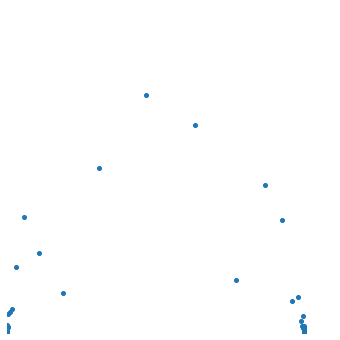

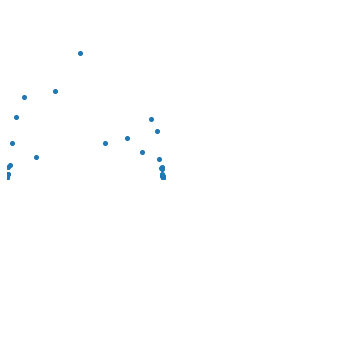

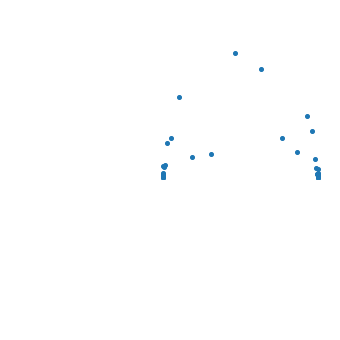

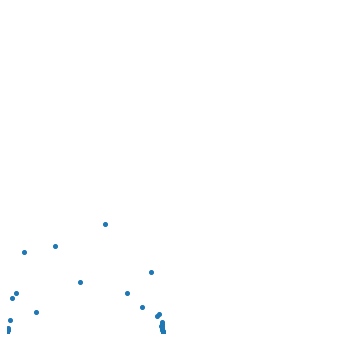

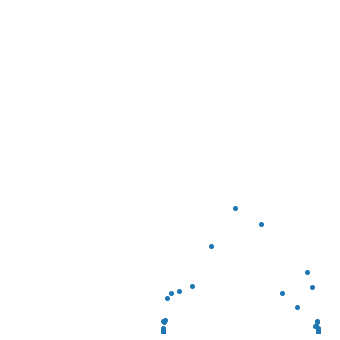

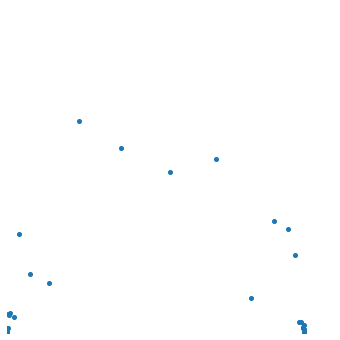

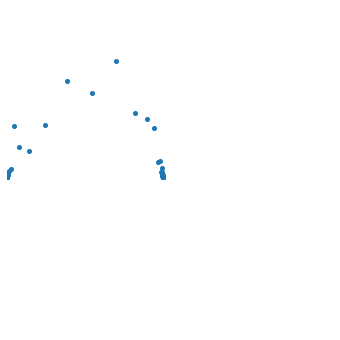

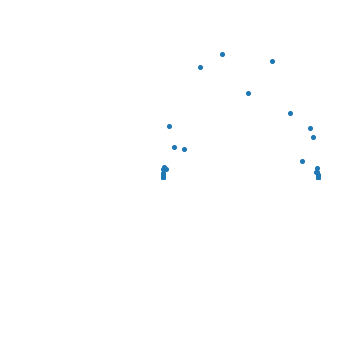

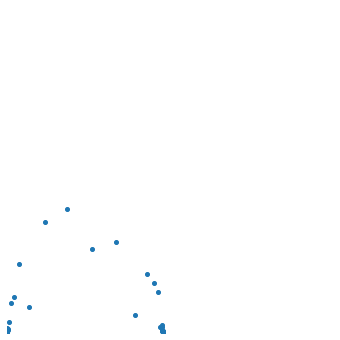

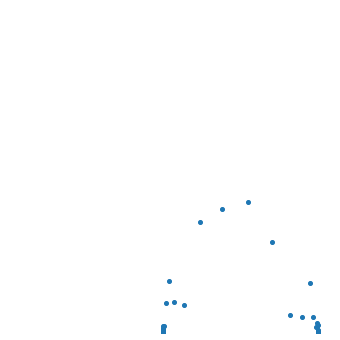

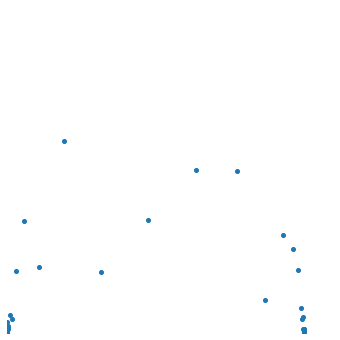

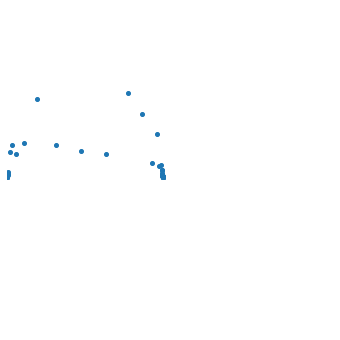

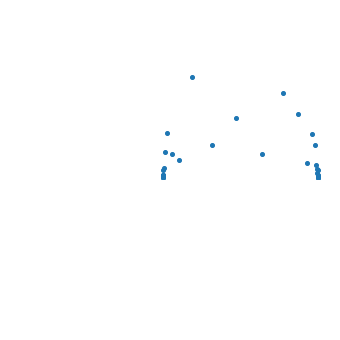

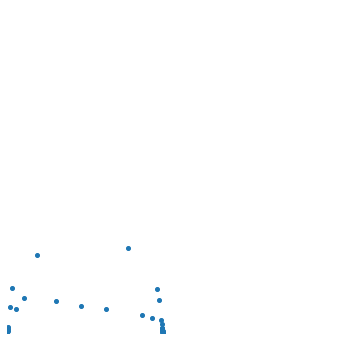

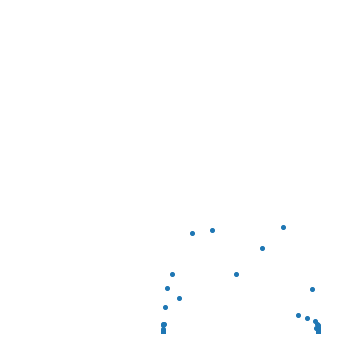

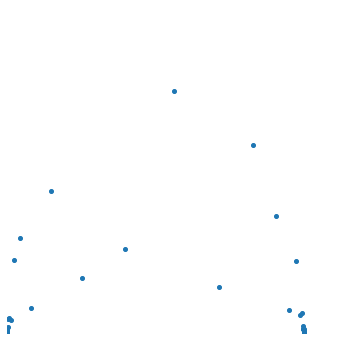

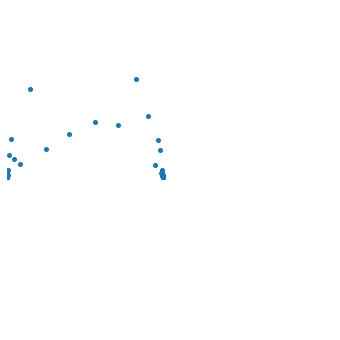

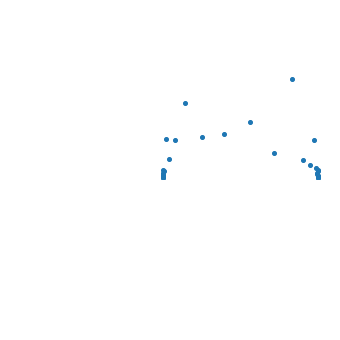

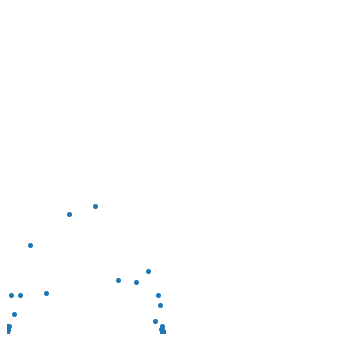

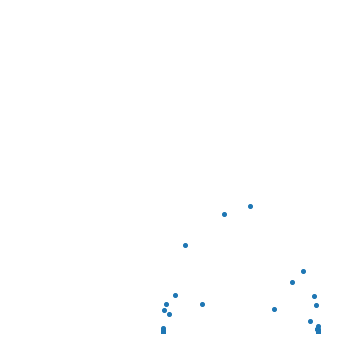

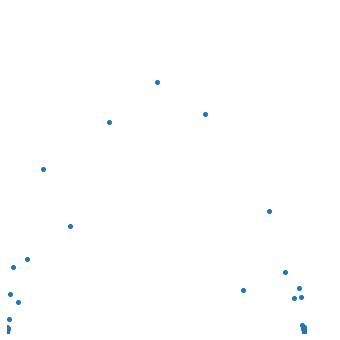

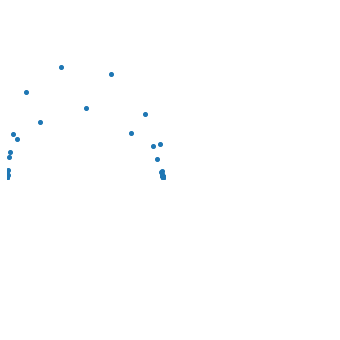

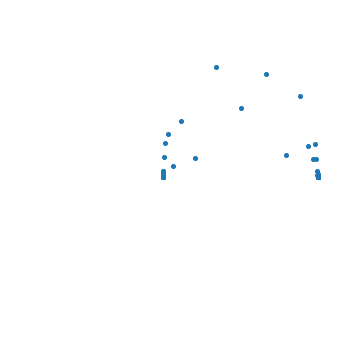

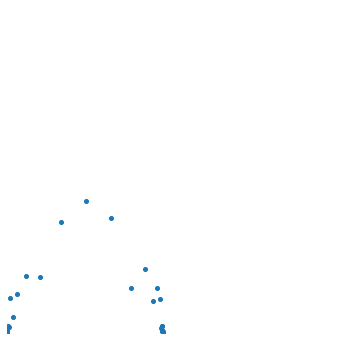

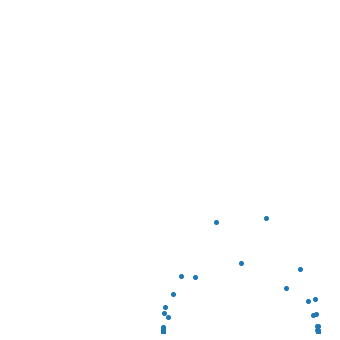

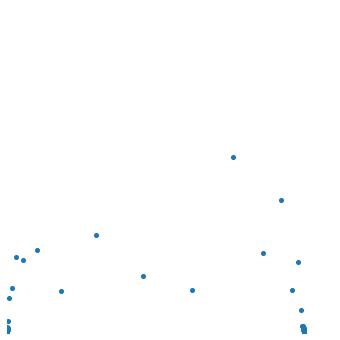

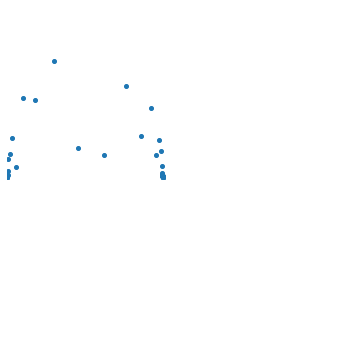

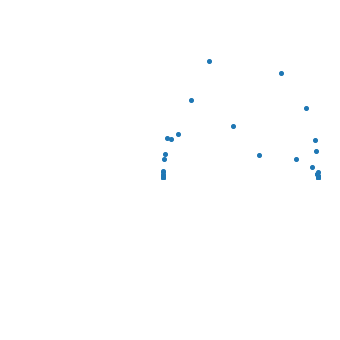

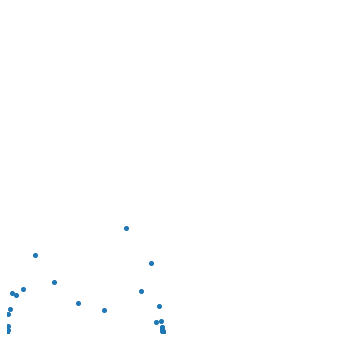

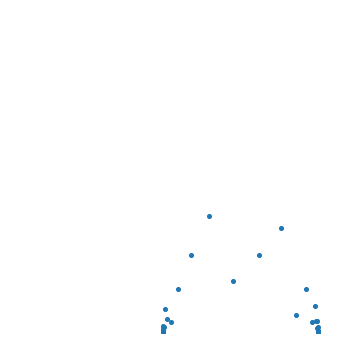

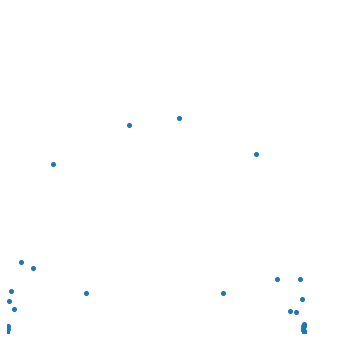

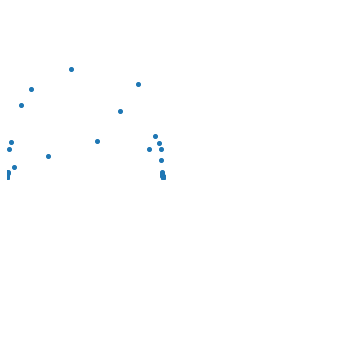

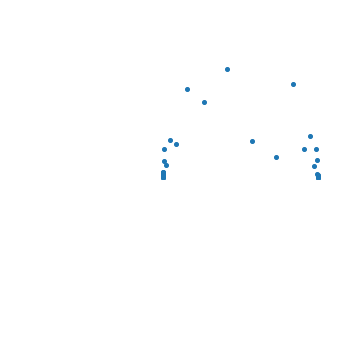

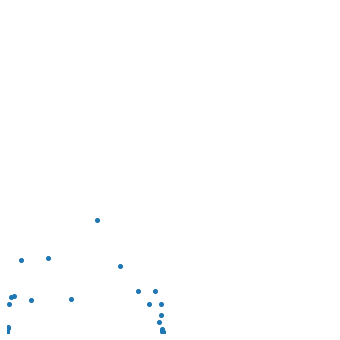

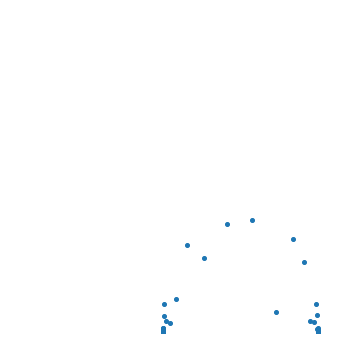

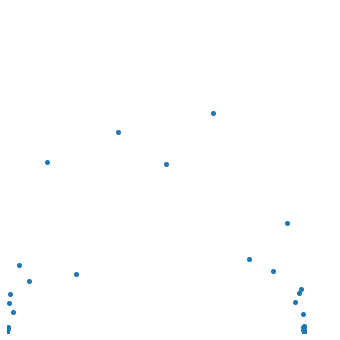

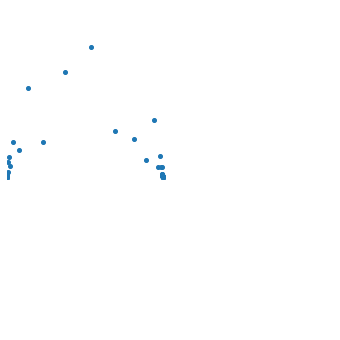

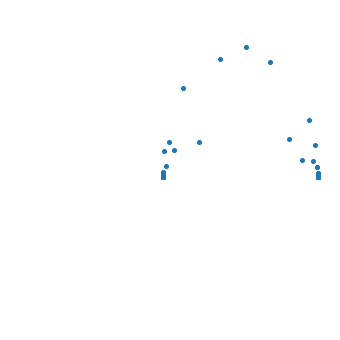

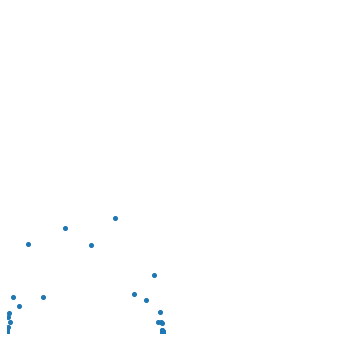

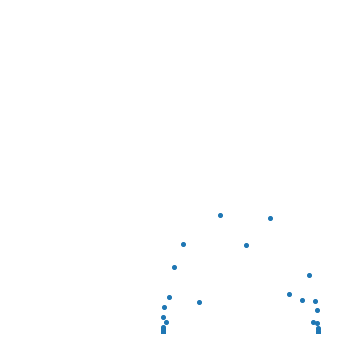

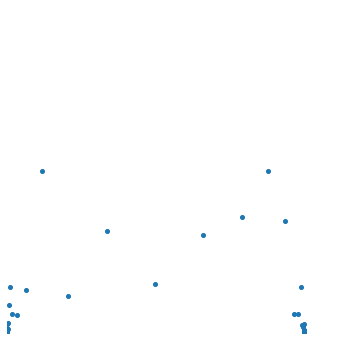

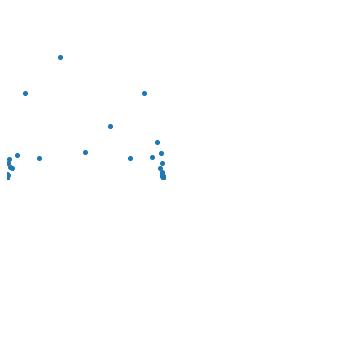

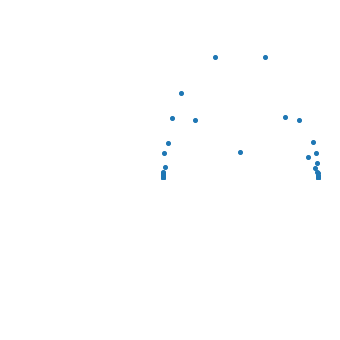

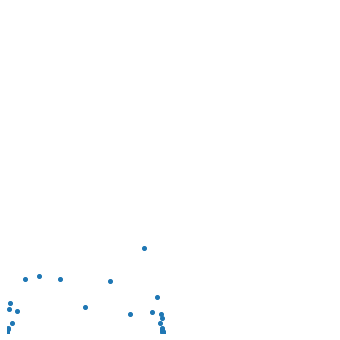

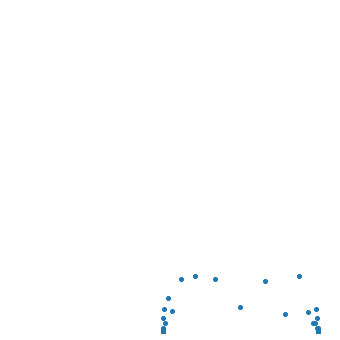

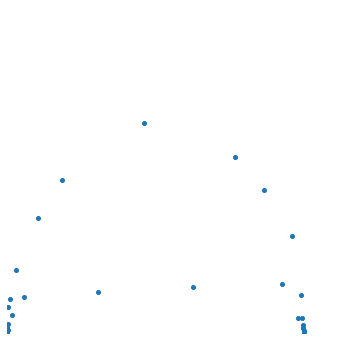

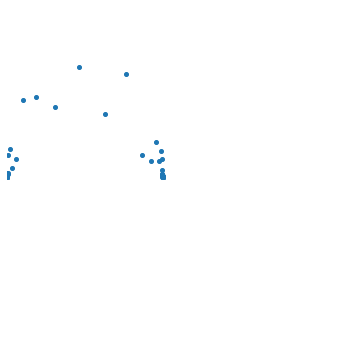

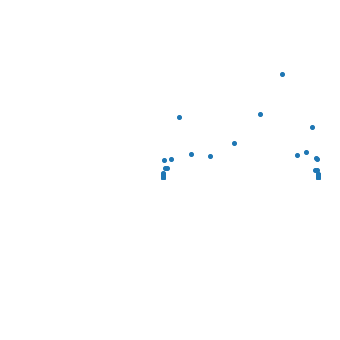

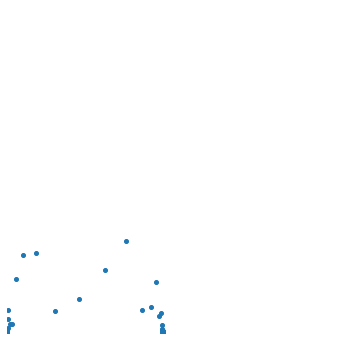

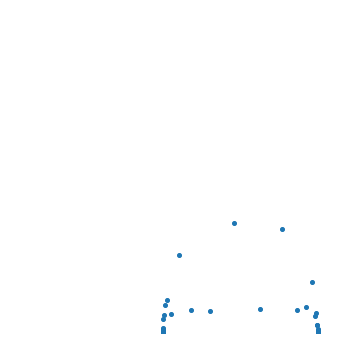

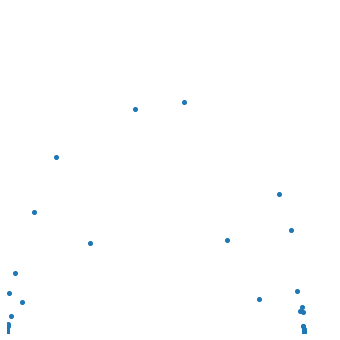

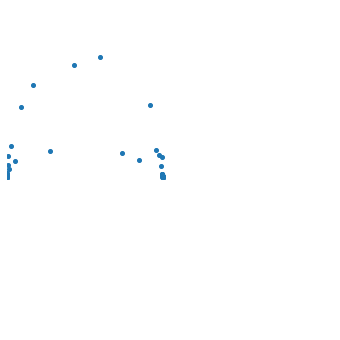

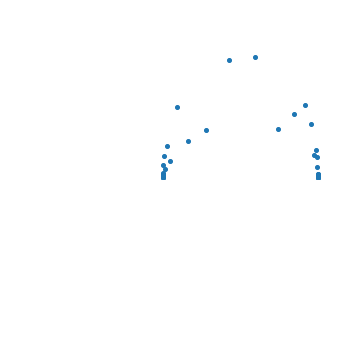

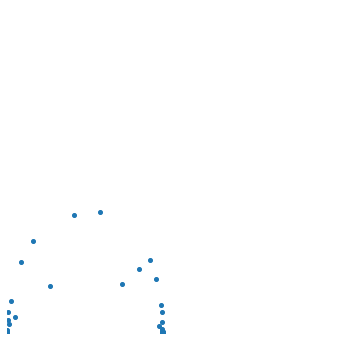

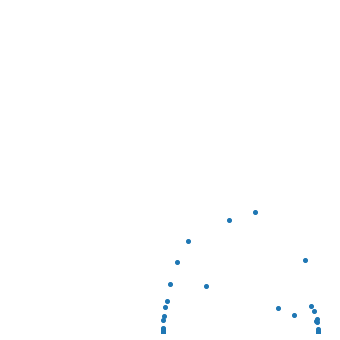

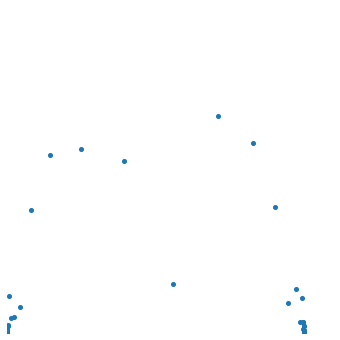

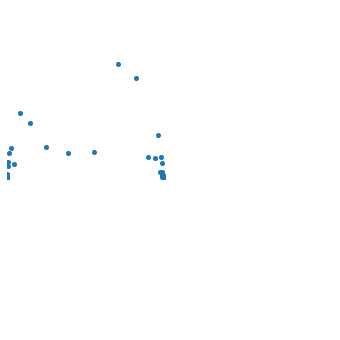

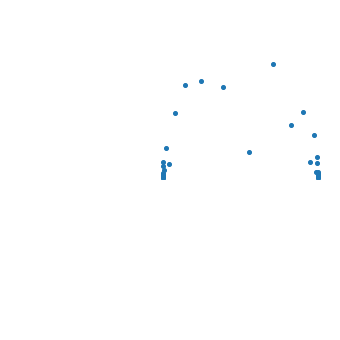

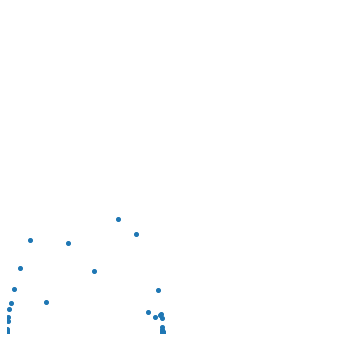

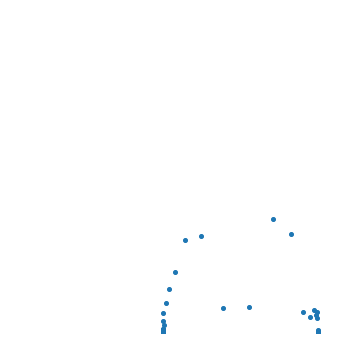

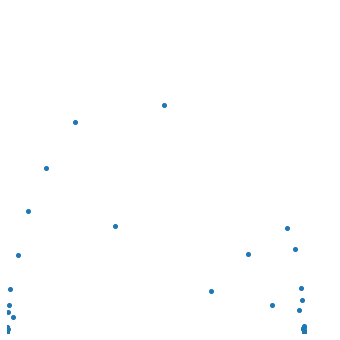

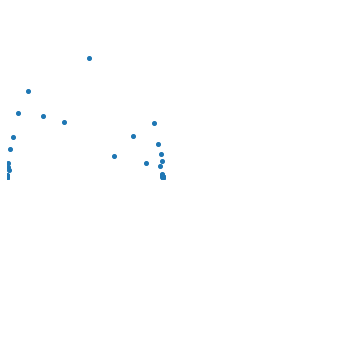

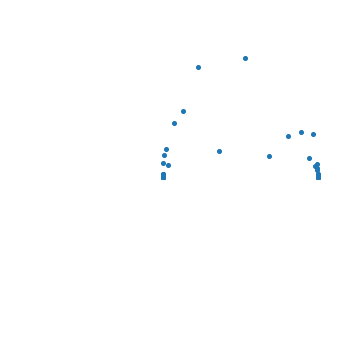

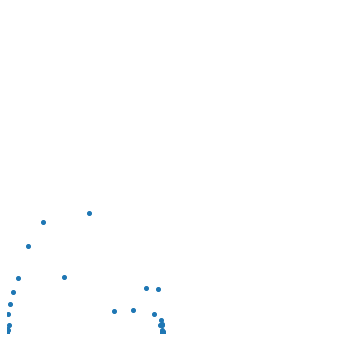

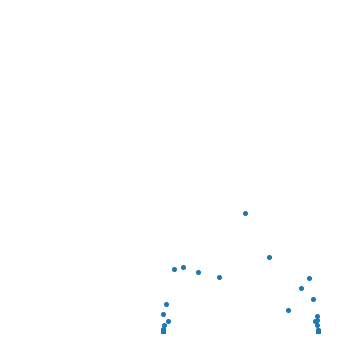

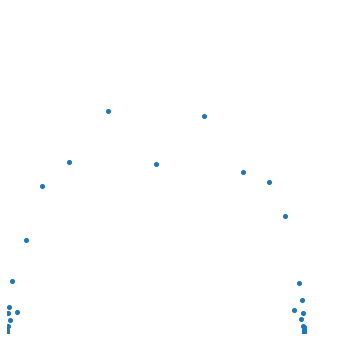

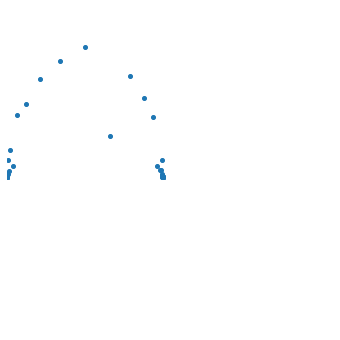

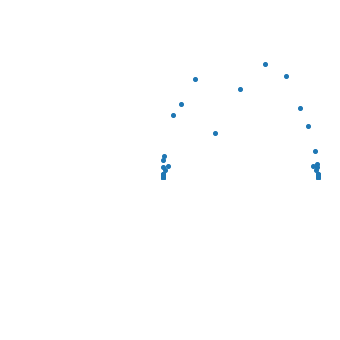

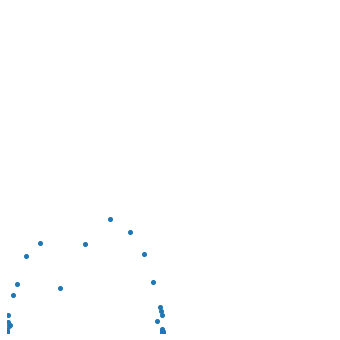

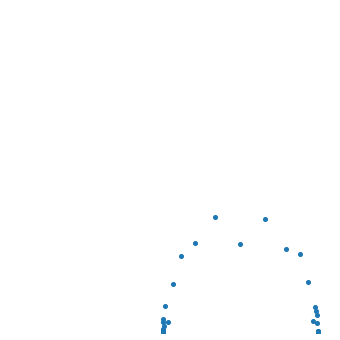

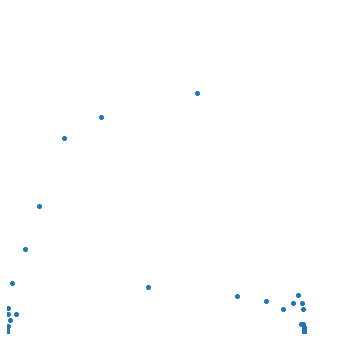

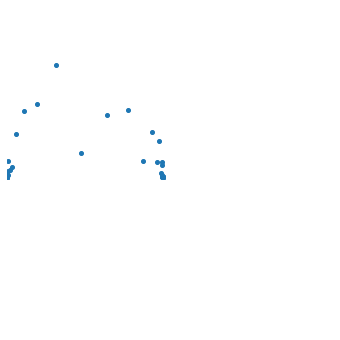

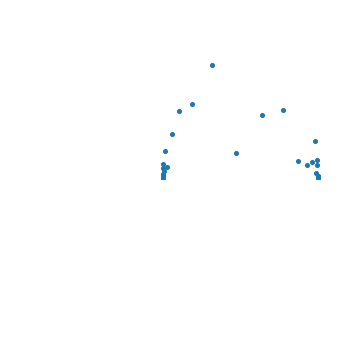

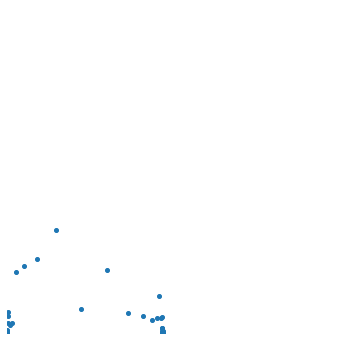

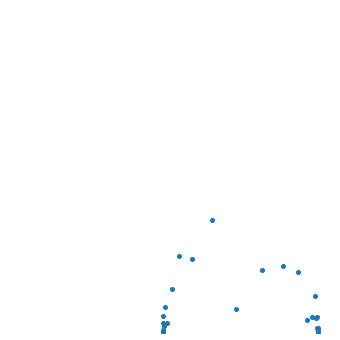

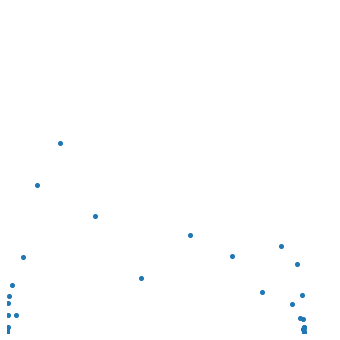

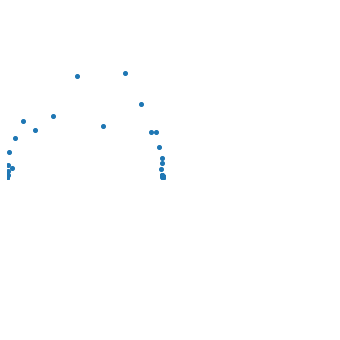

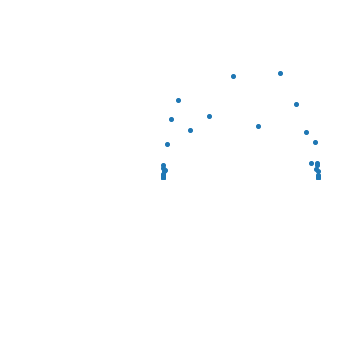

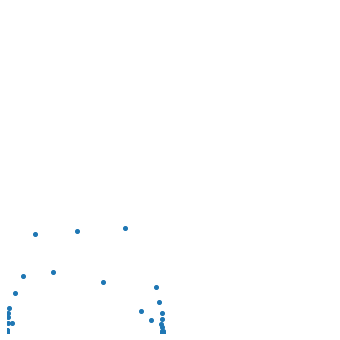

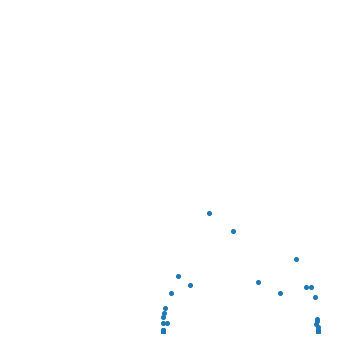

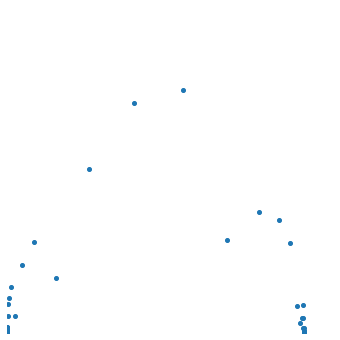

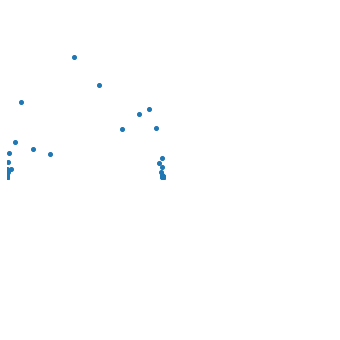

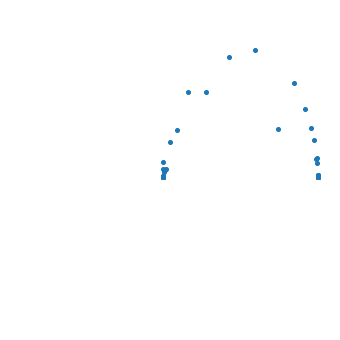

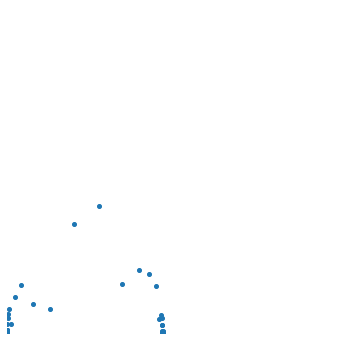

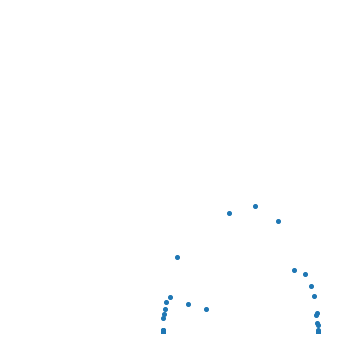

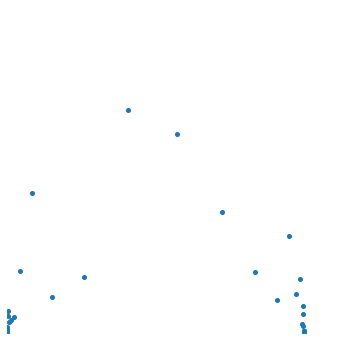

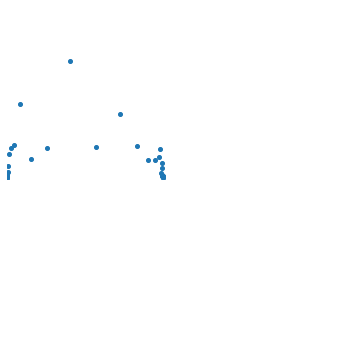

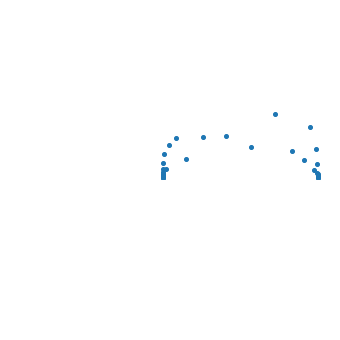

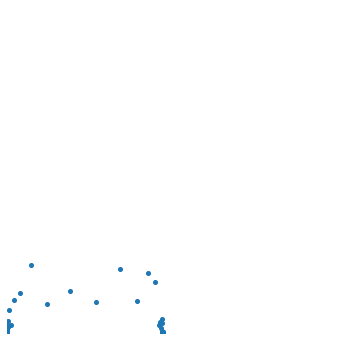

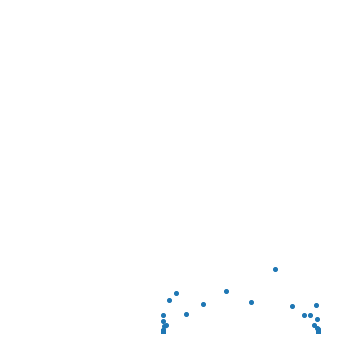

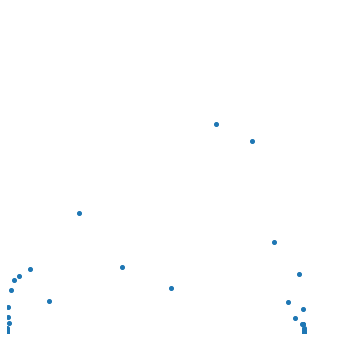

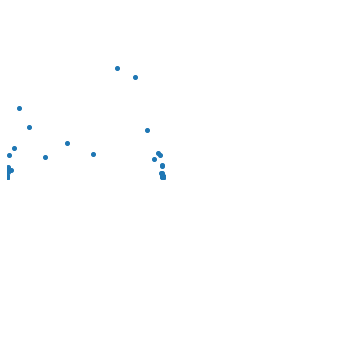

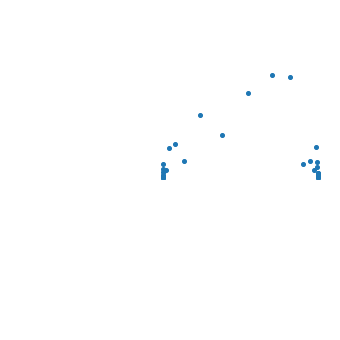

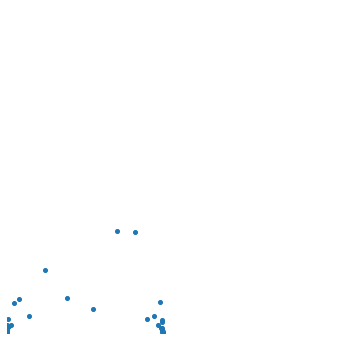

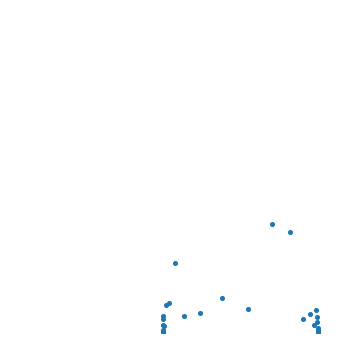

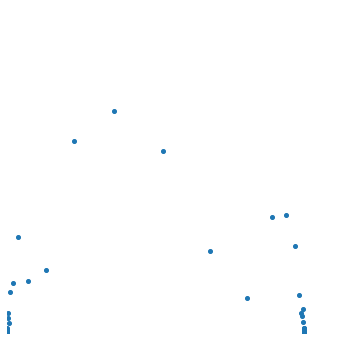

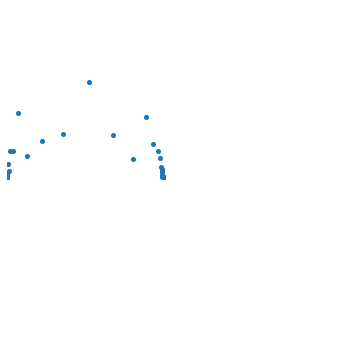

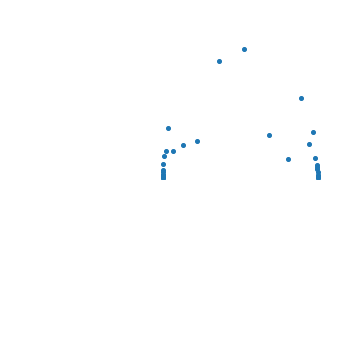

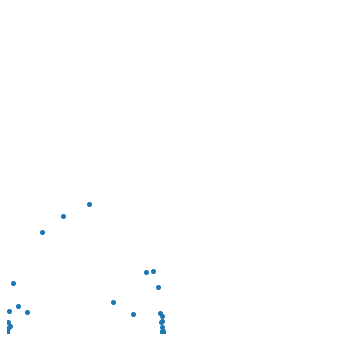

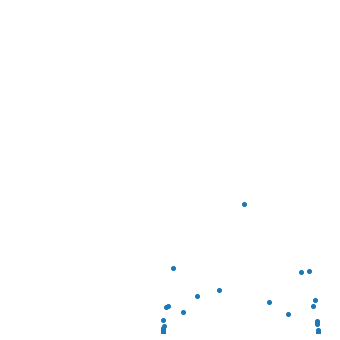

In [11]:
# Noisescale = 0.3 - ' noisy' [25]

f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
C= 25E-6 #F
resistance= np.linspace(1,100,25, dtype=int,endpoint=True)
for Rs in resistance:
    for i in range(5):
        file= data_simulation.RC_file_writer(f_start, f_stop, decades, Rs, C, 'parallel', alteration='noise', noisescale=0.7, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

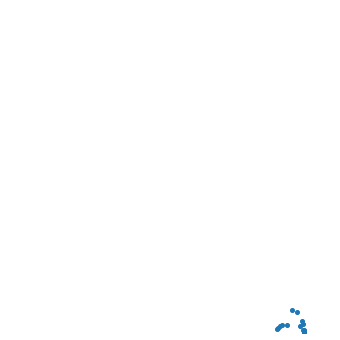

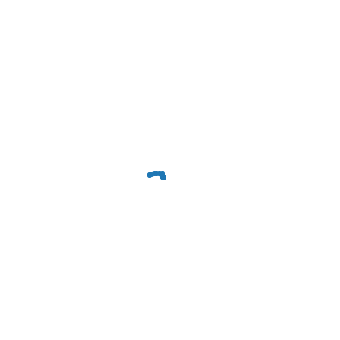

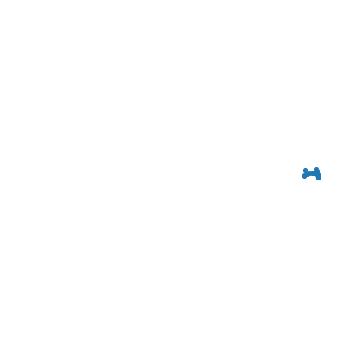

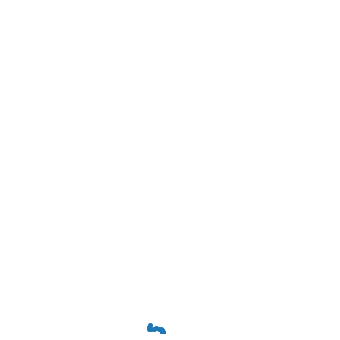

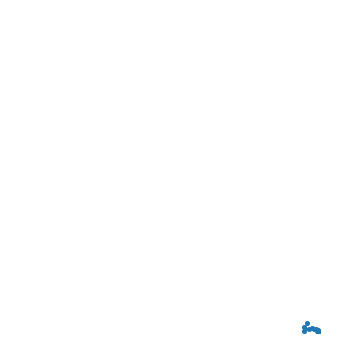

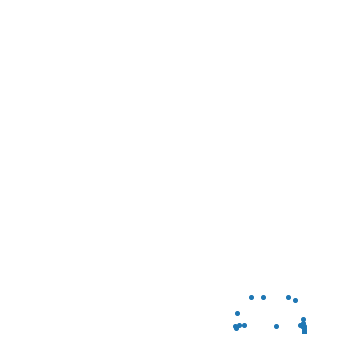

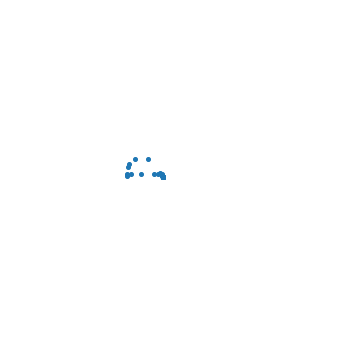

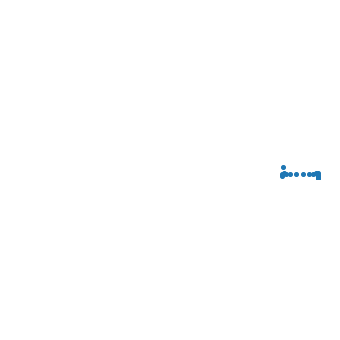

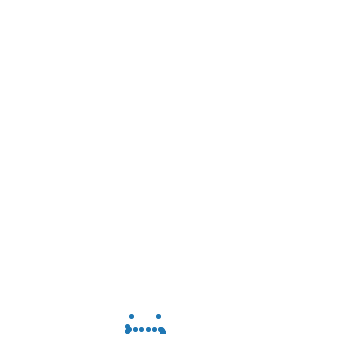

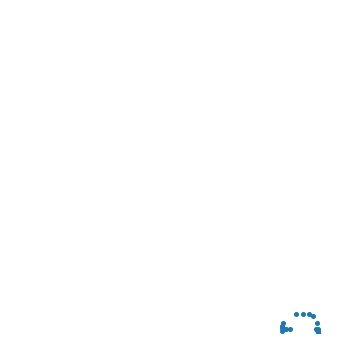

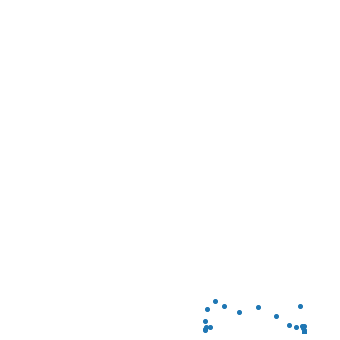

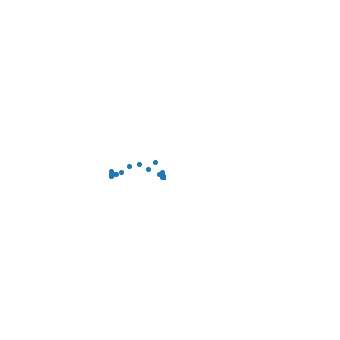

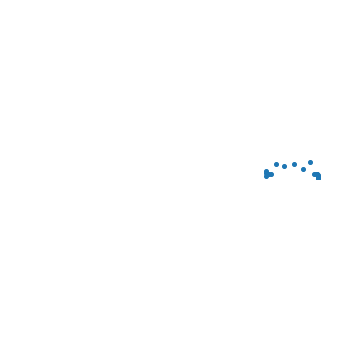

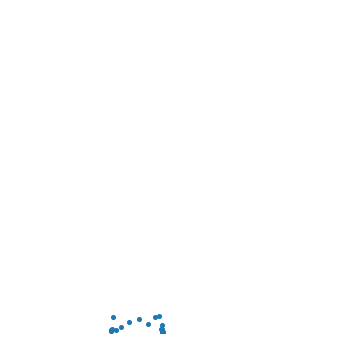

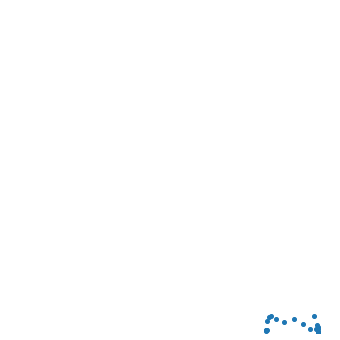

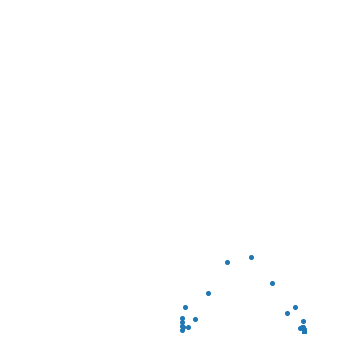

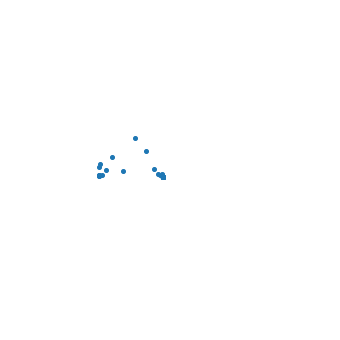

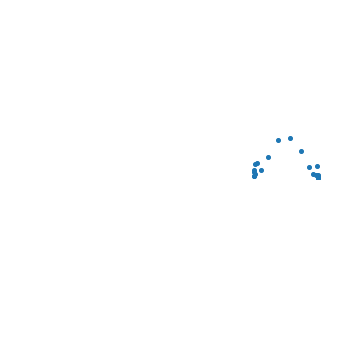

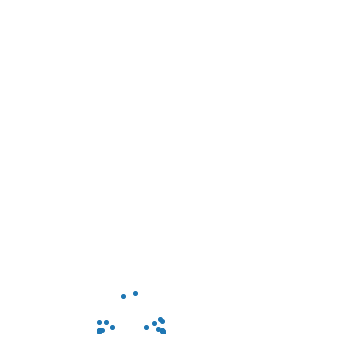

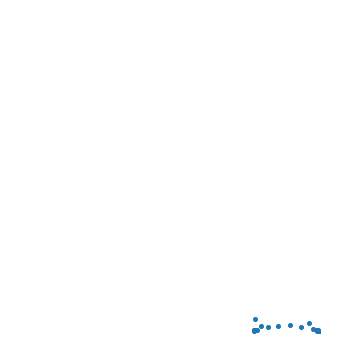

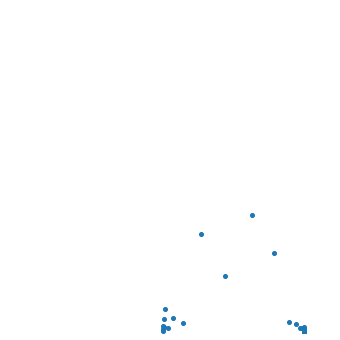

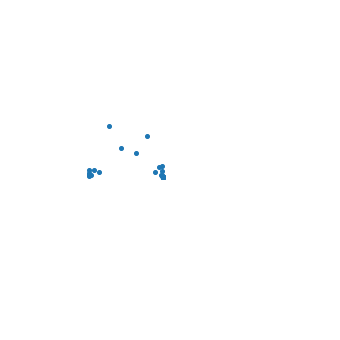

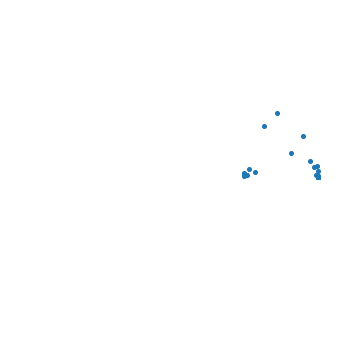

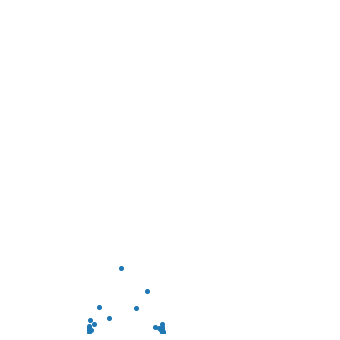

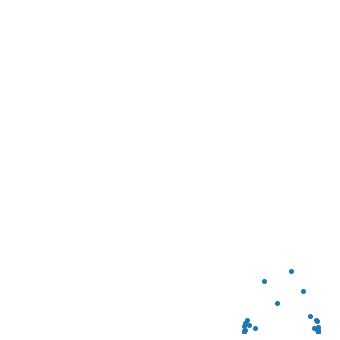

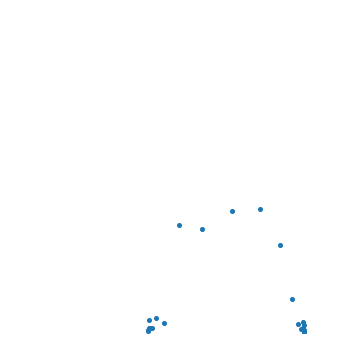

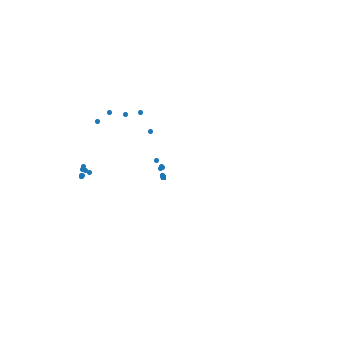

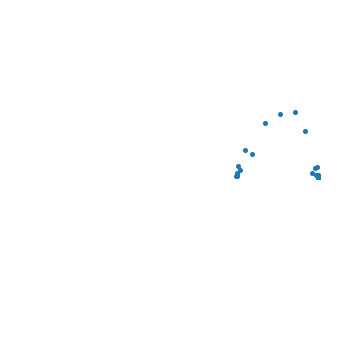

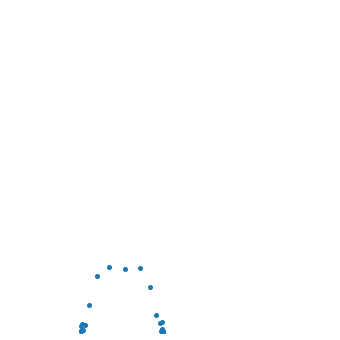

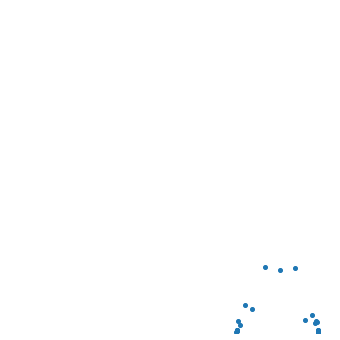

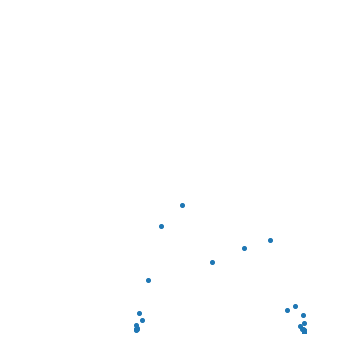

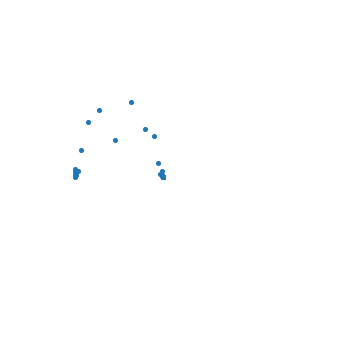

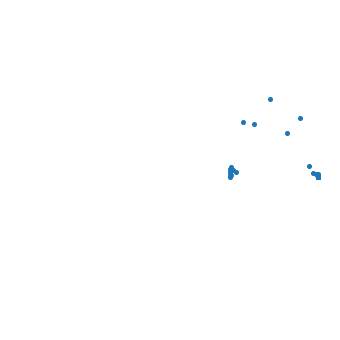

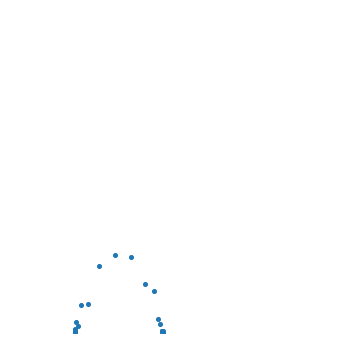

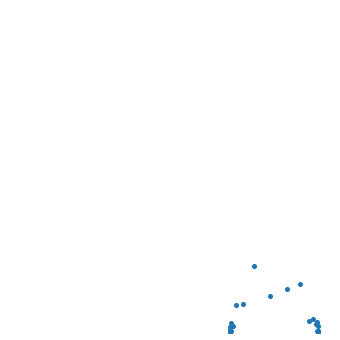

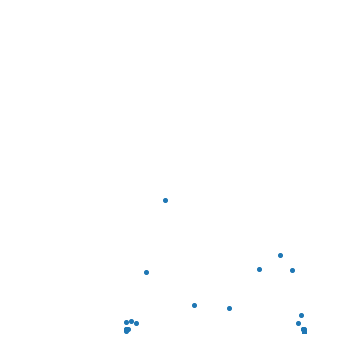

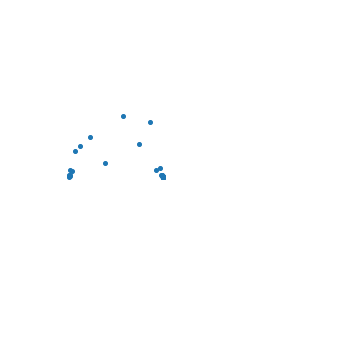

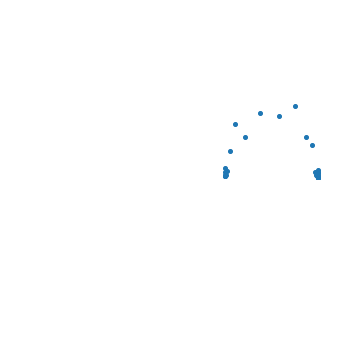

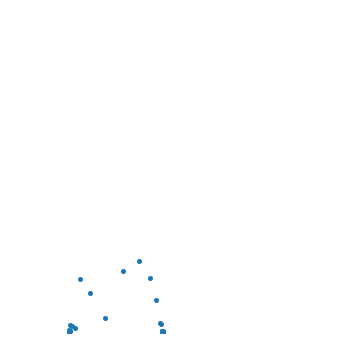

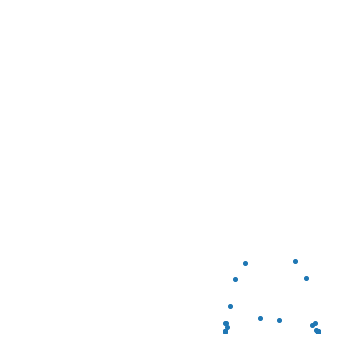

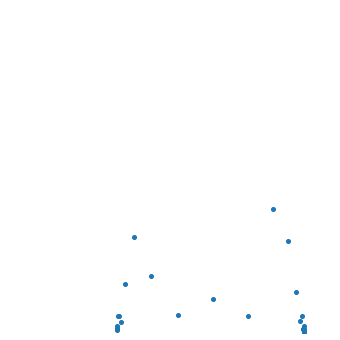

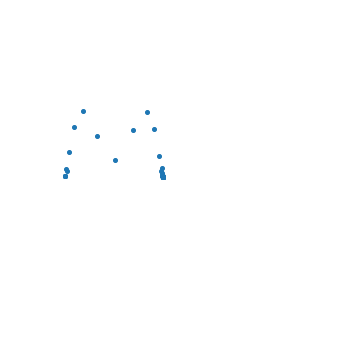

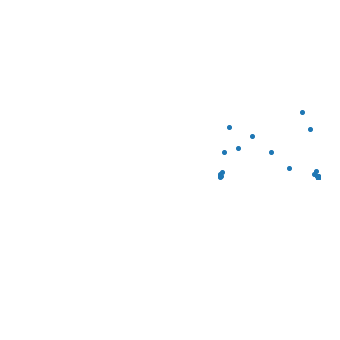

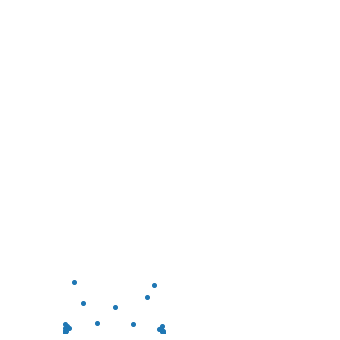

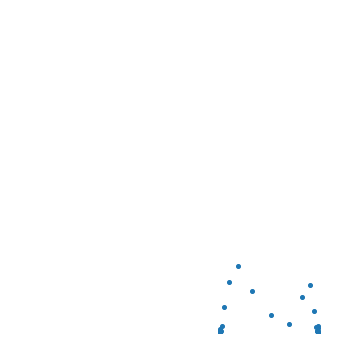

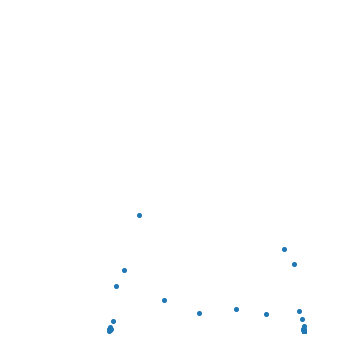

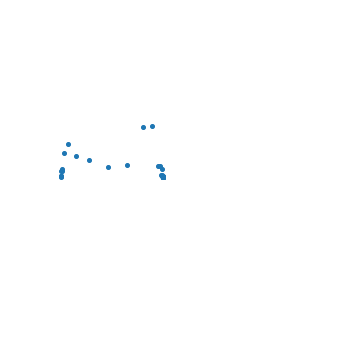

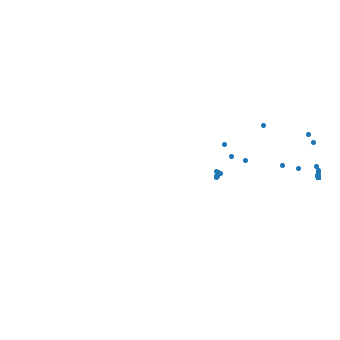

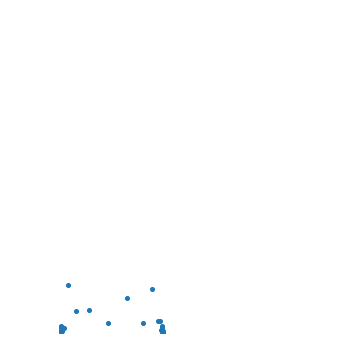

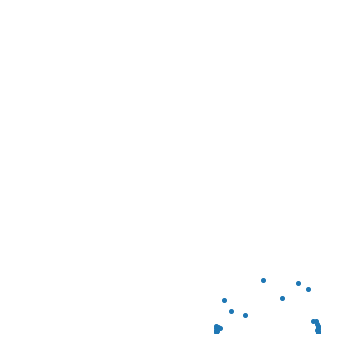

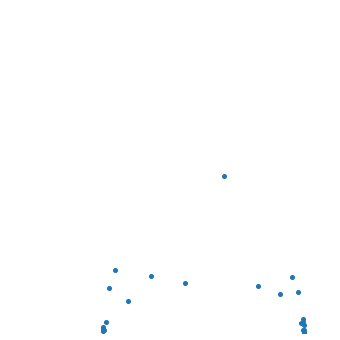

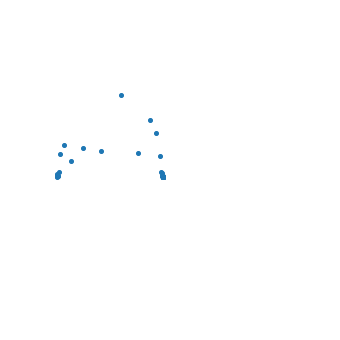

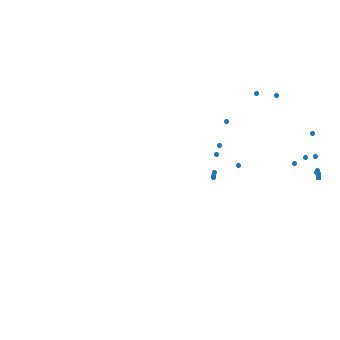

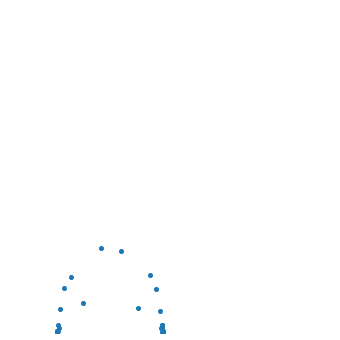

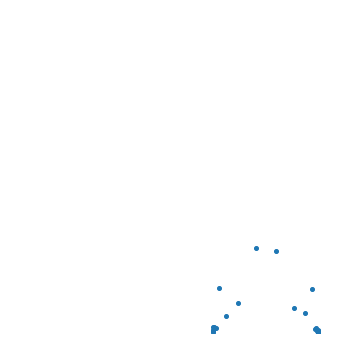

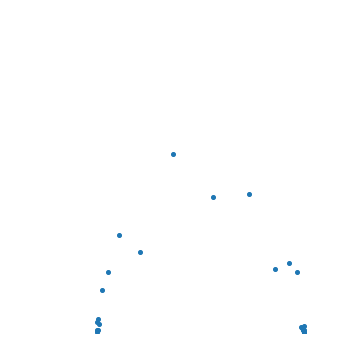

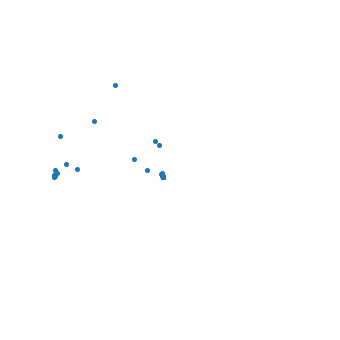

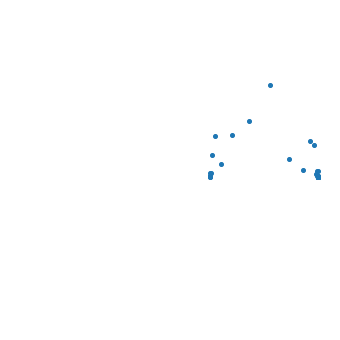

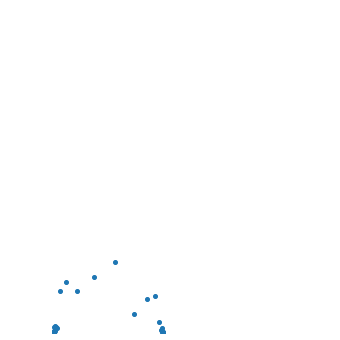

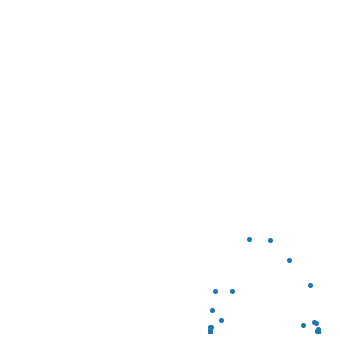

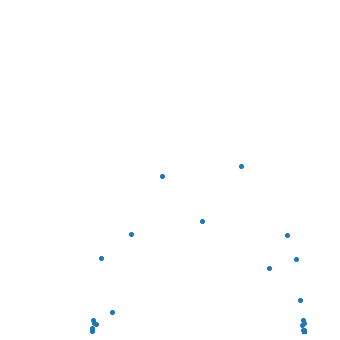

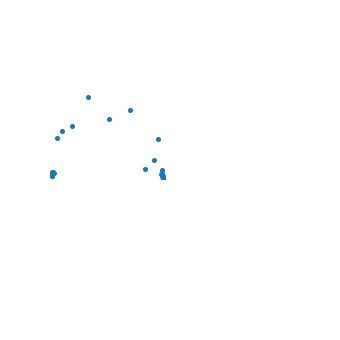

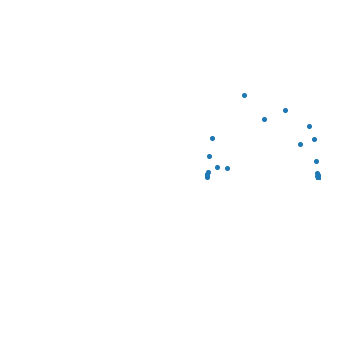

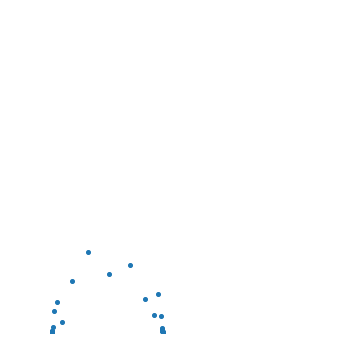

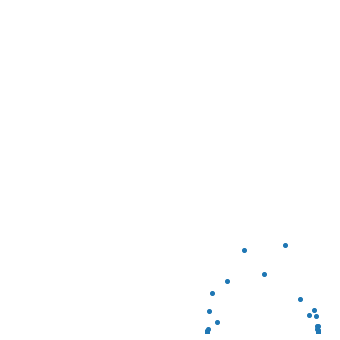

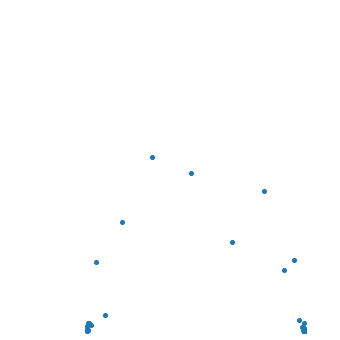

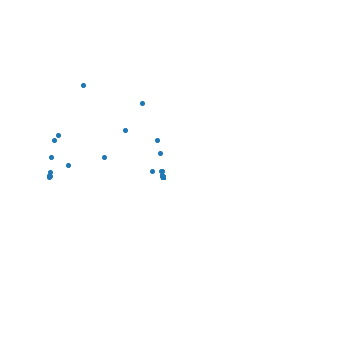

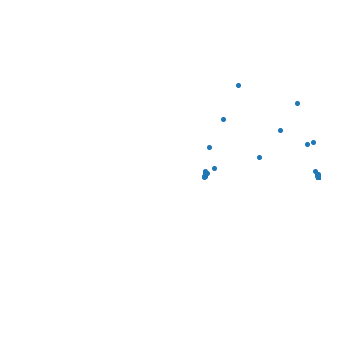

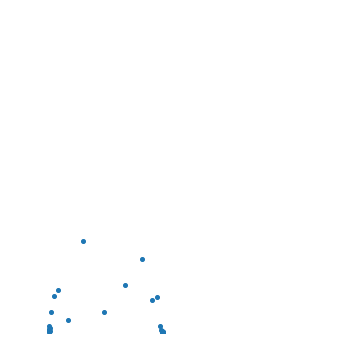

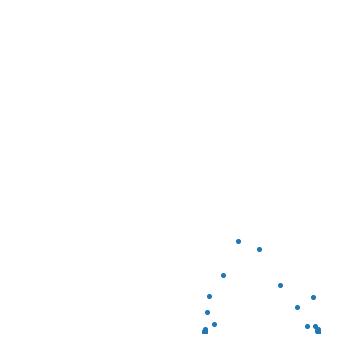

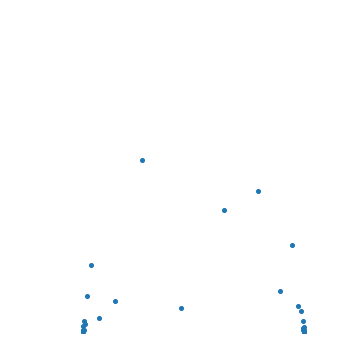

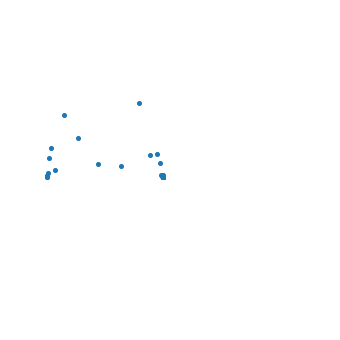

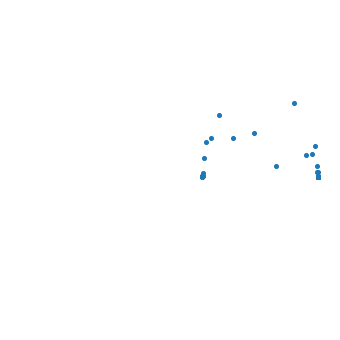

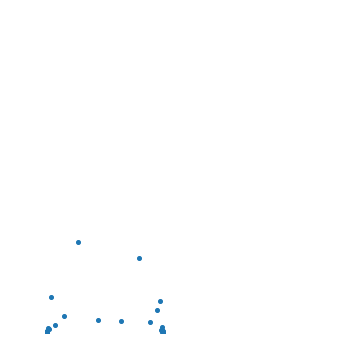

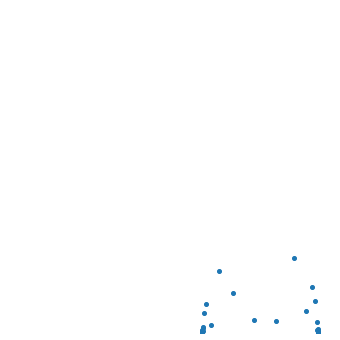

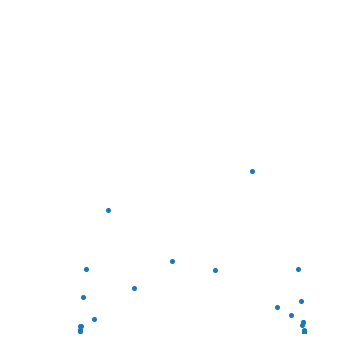

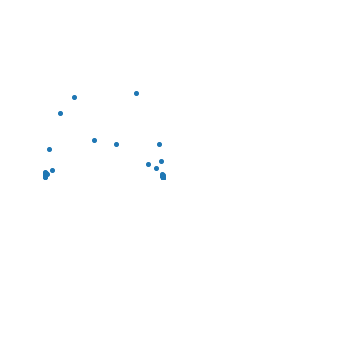

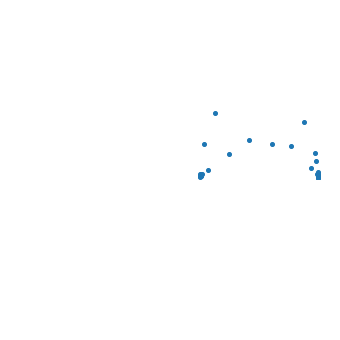

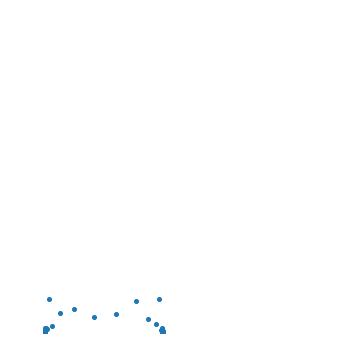

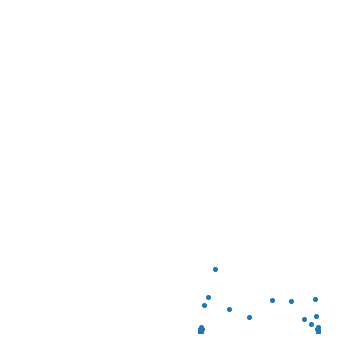

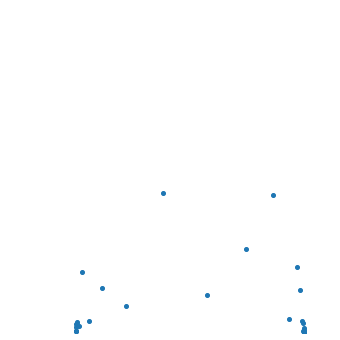

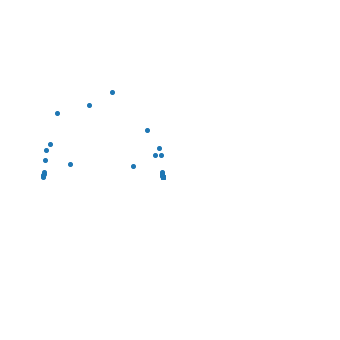

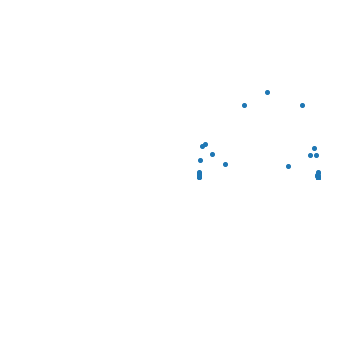

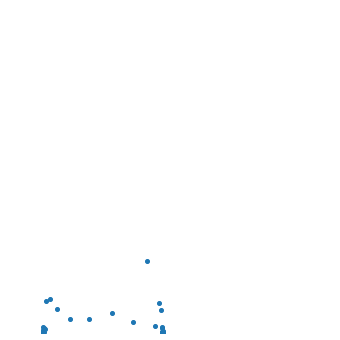

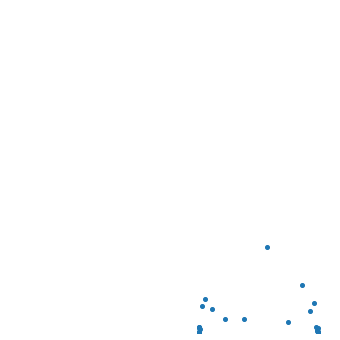

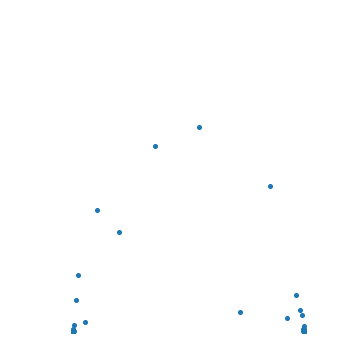

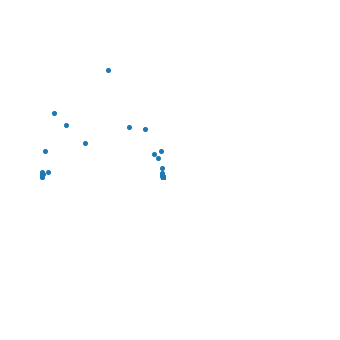

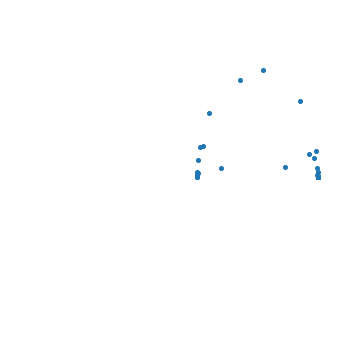

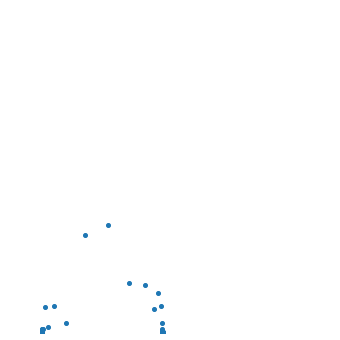

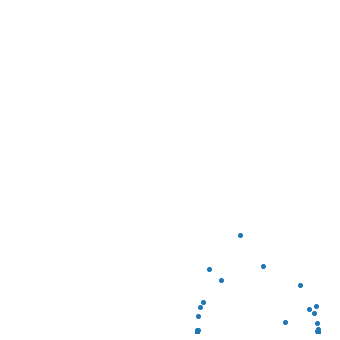

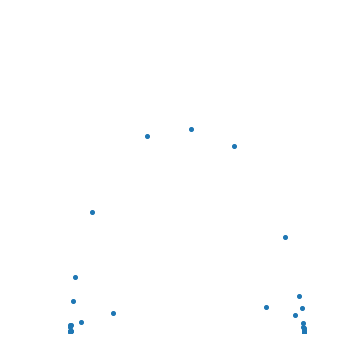

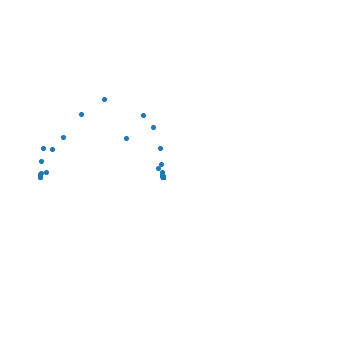

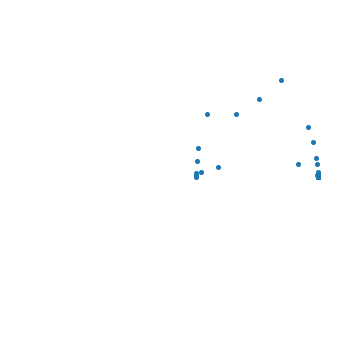

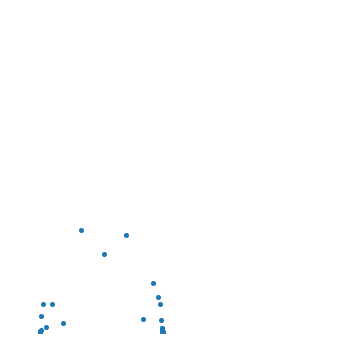

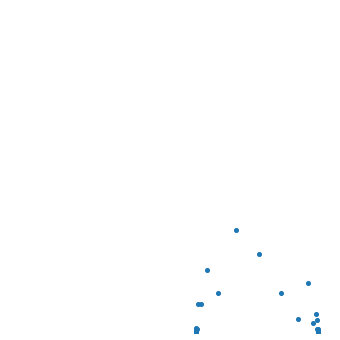

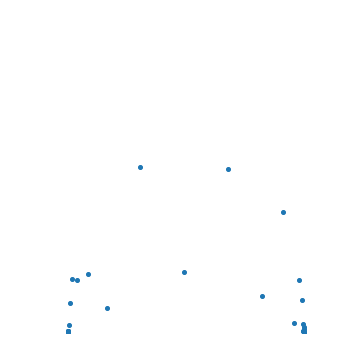

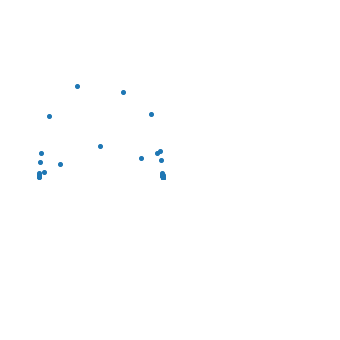

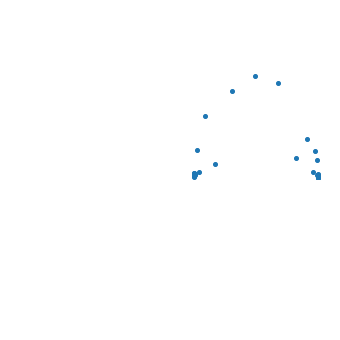

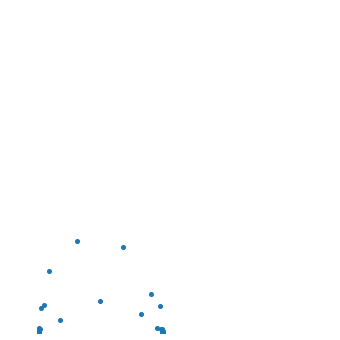

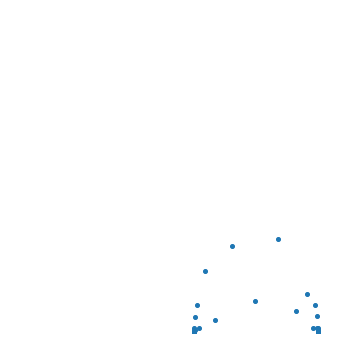

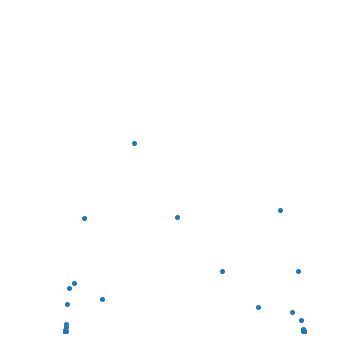

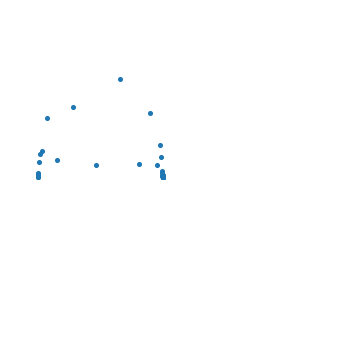

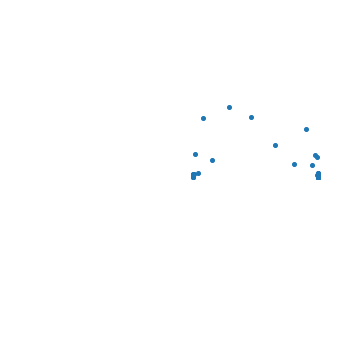

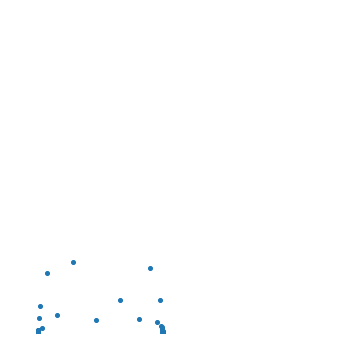

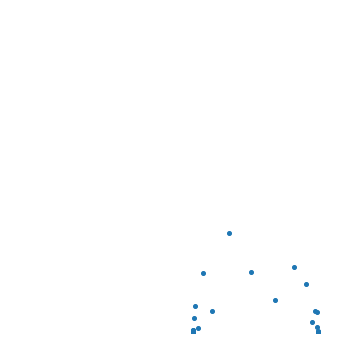

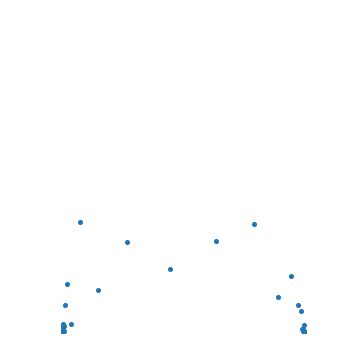

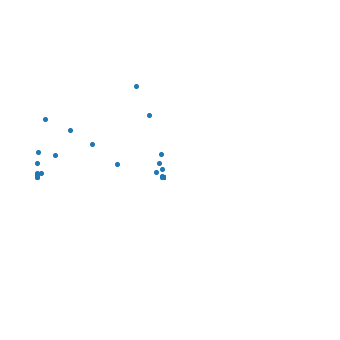

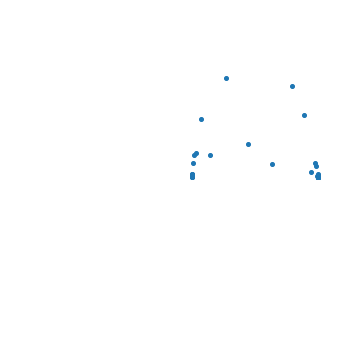

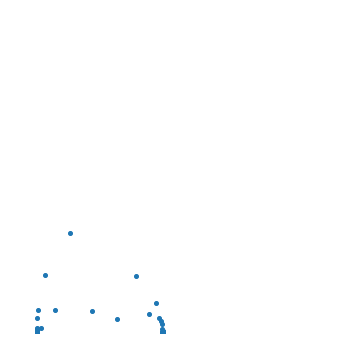

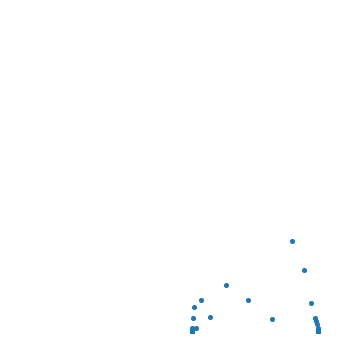

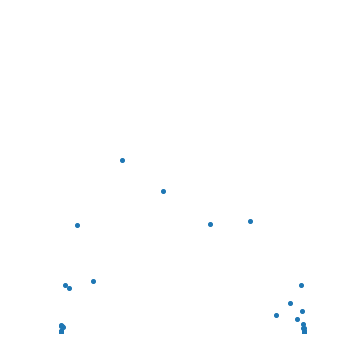

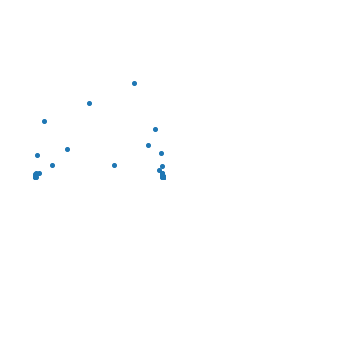

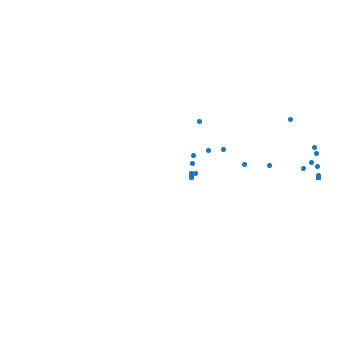

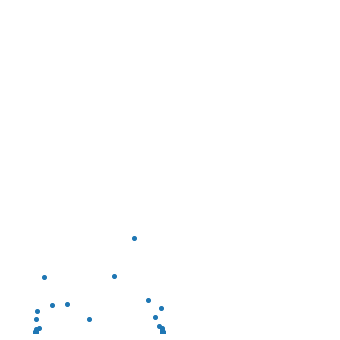

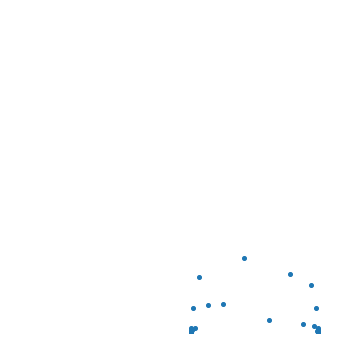

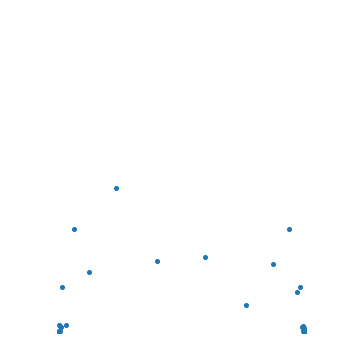

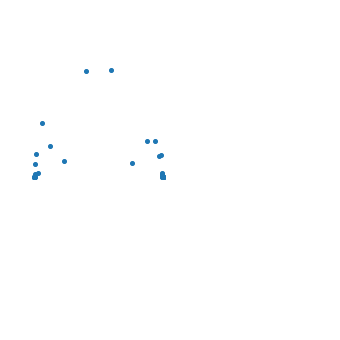

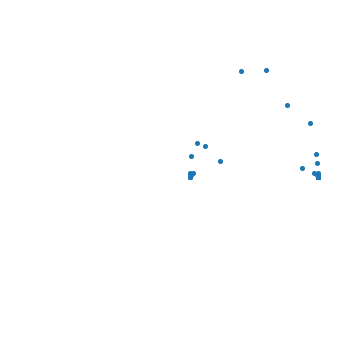

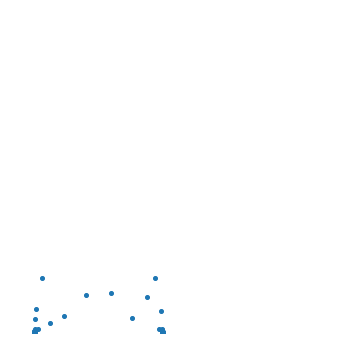

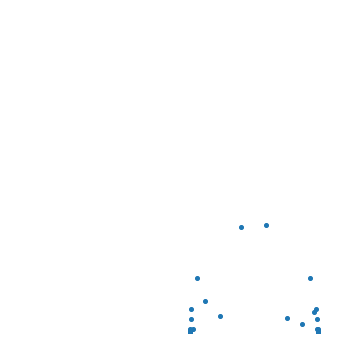

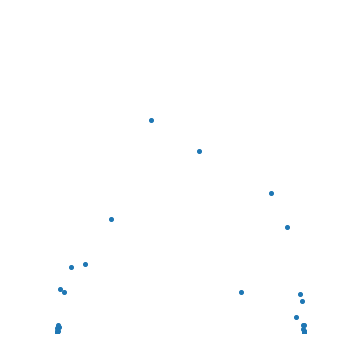

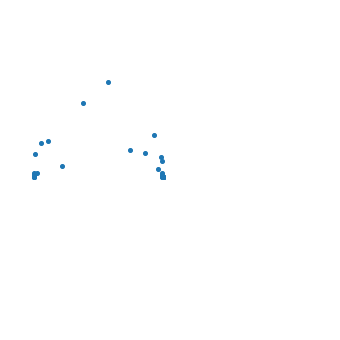

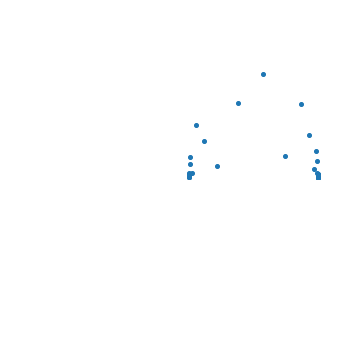

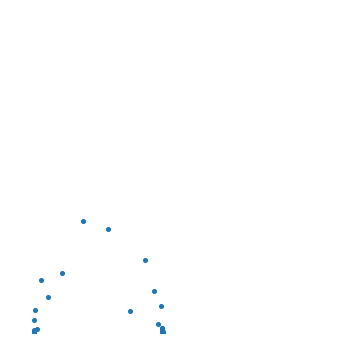

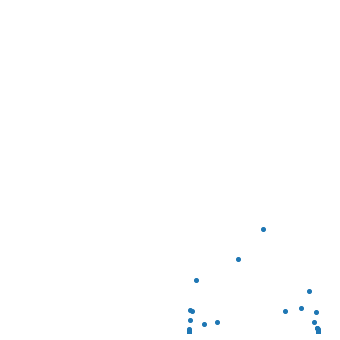

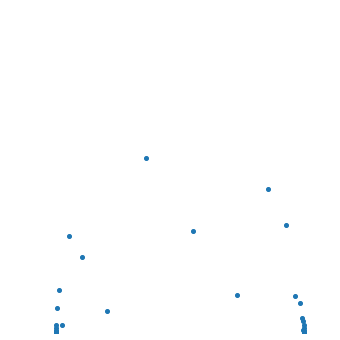

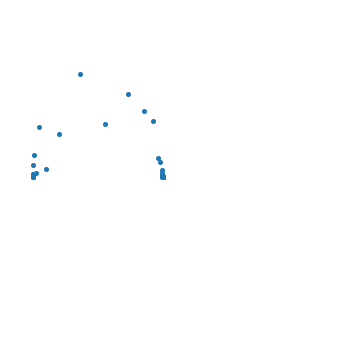

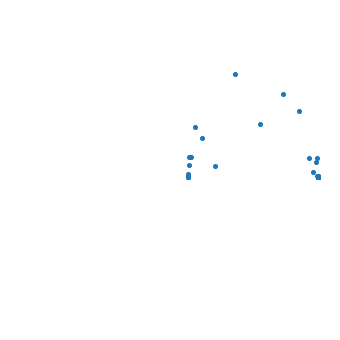

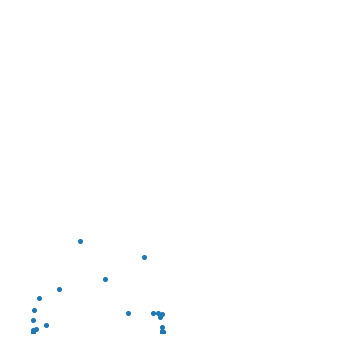

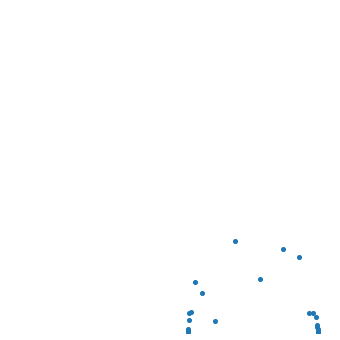

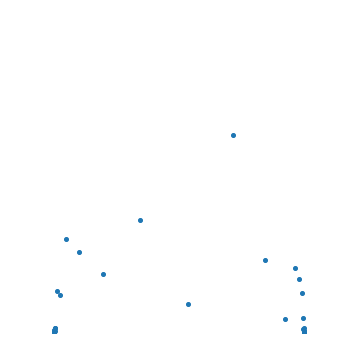

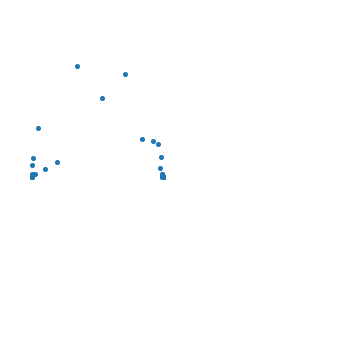

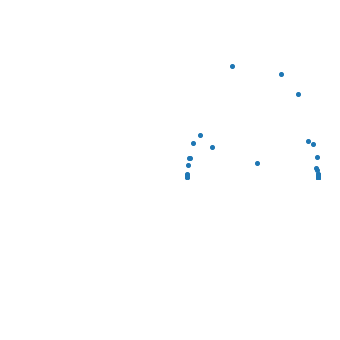

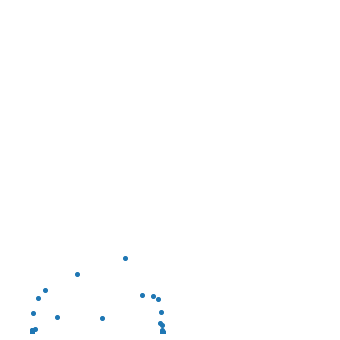

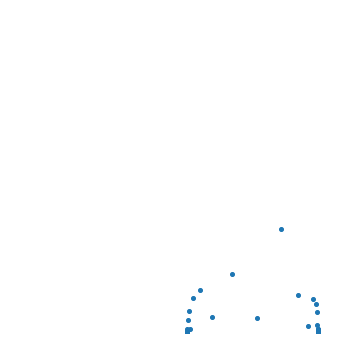

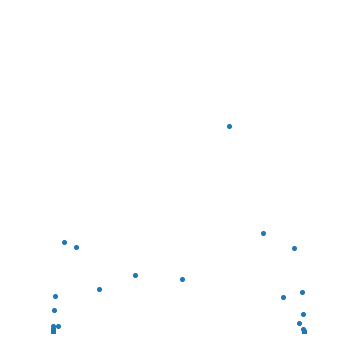

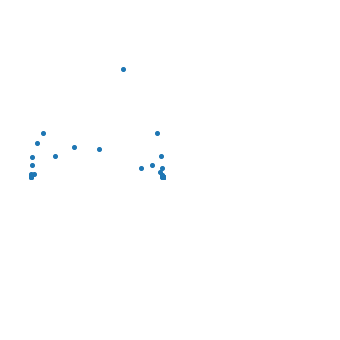

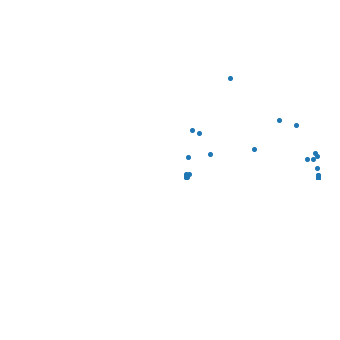

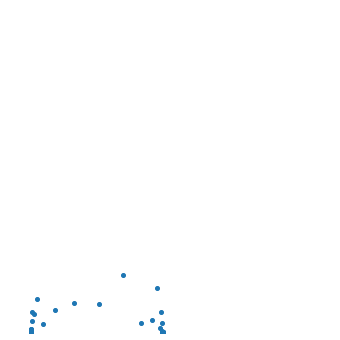

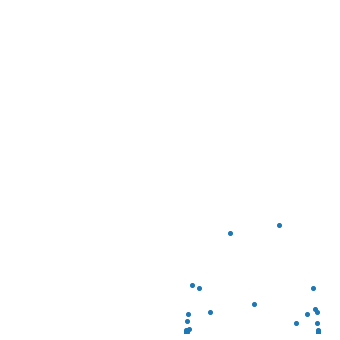

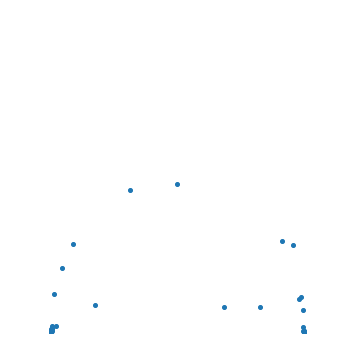

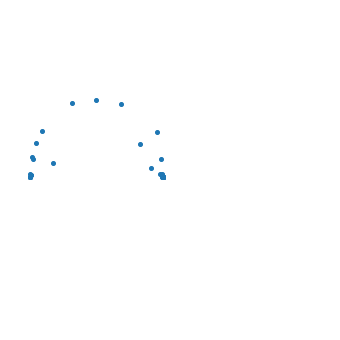

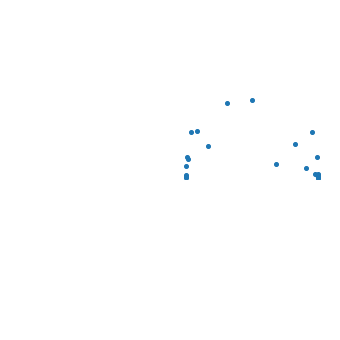

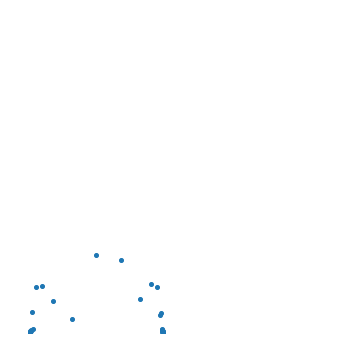

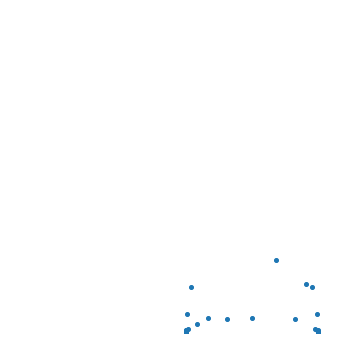

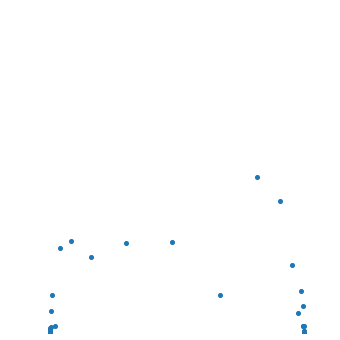

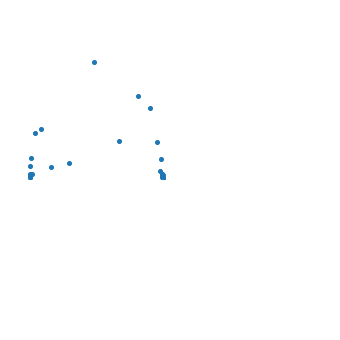

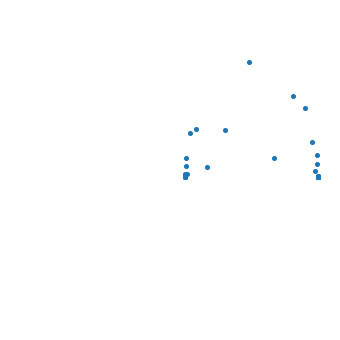

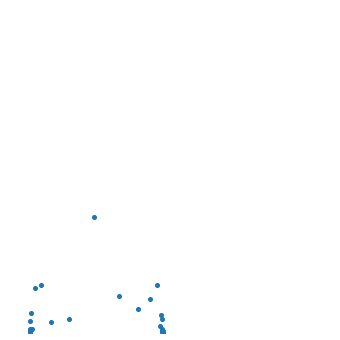

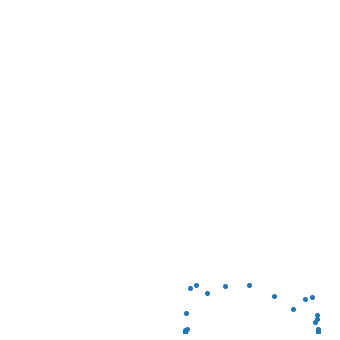

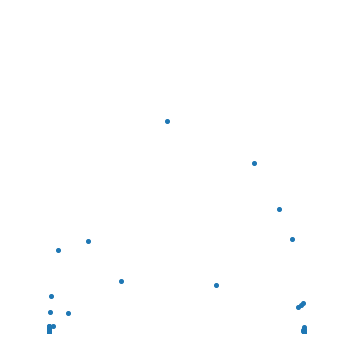

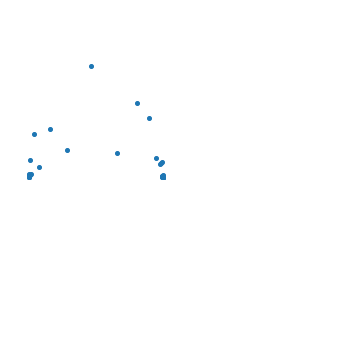

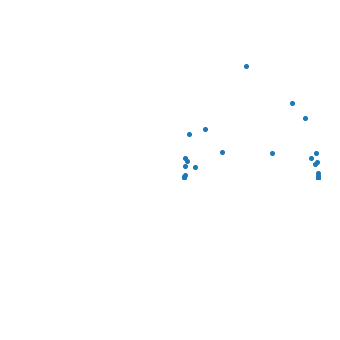

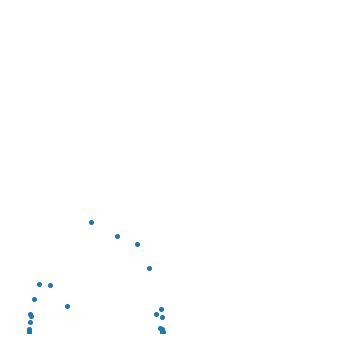

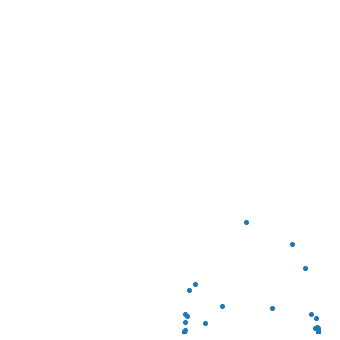

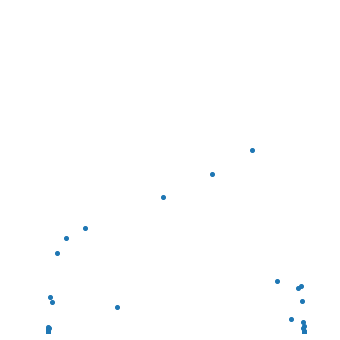

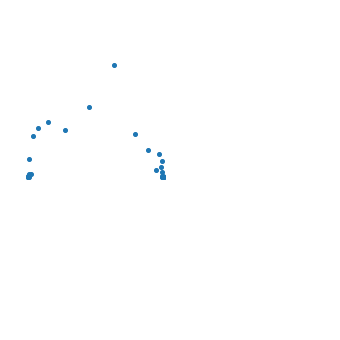

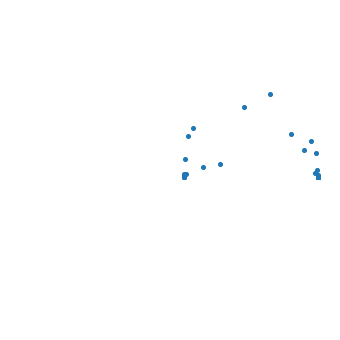

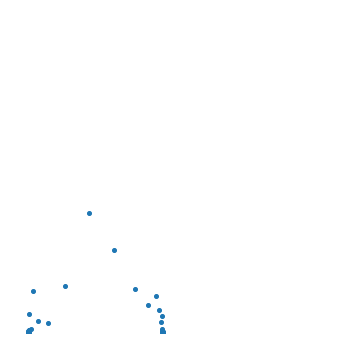

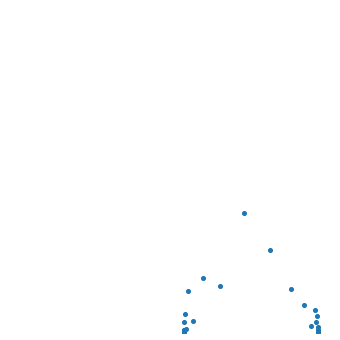

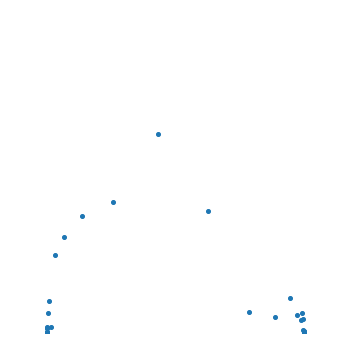

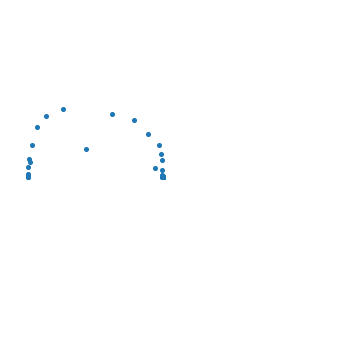

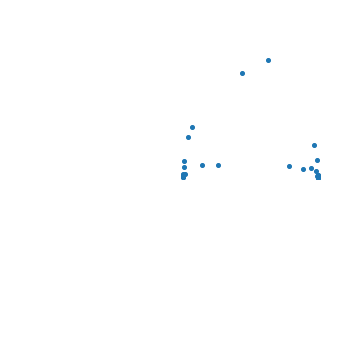

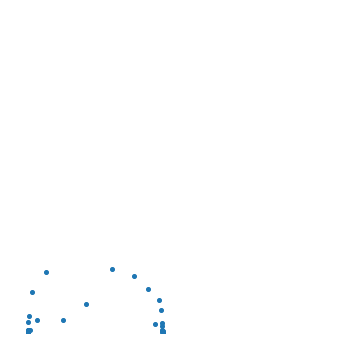

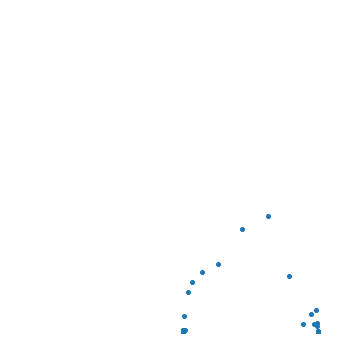

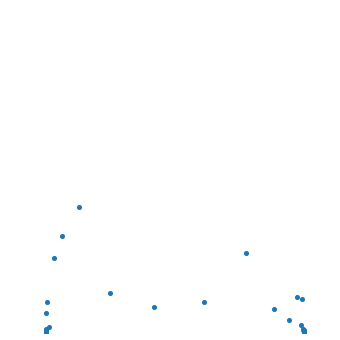

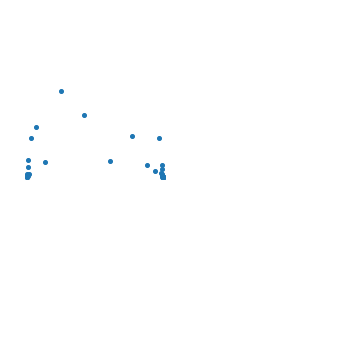

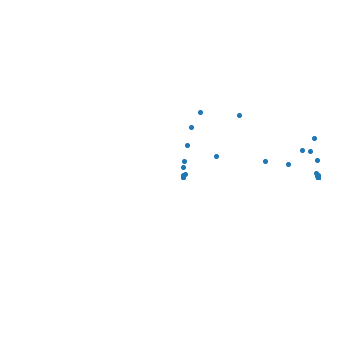

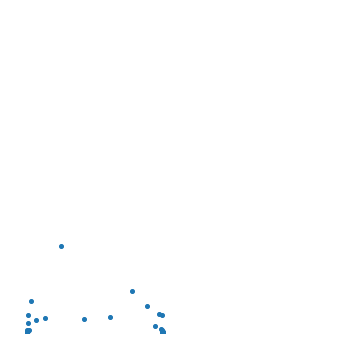

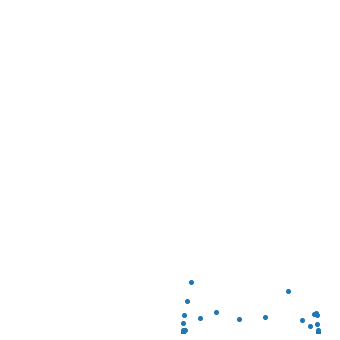

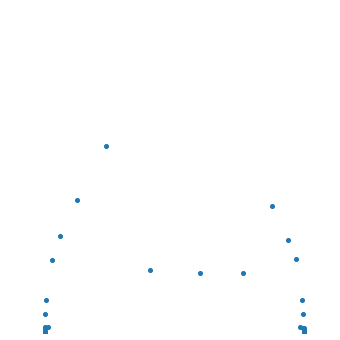

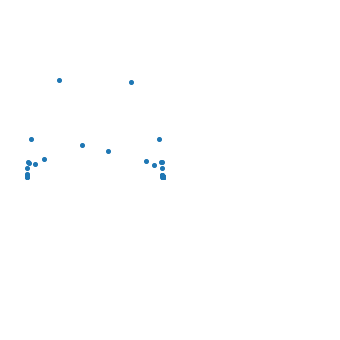

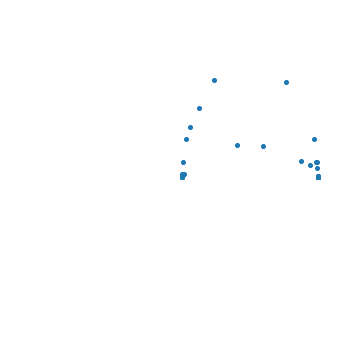

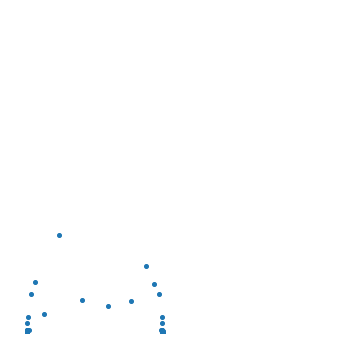

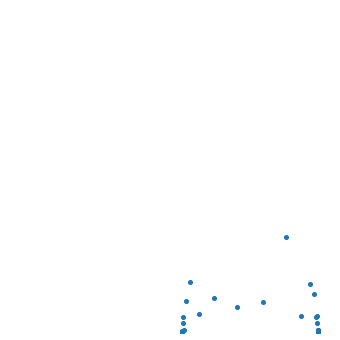

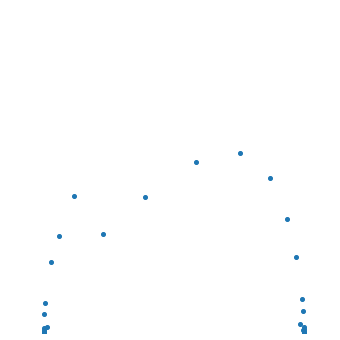

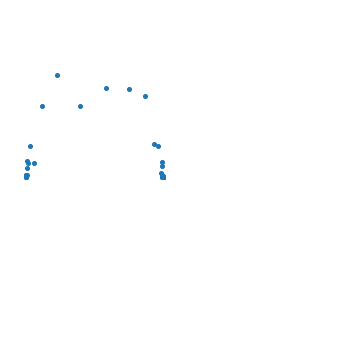

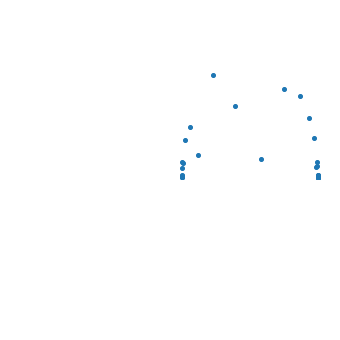

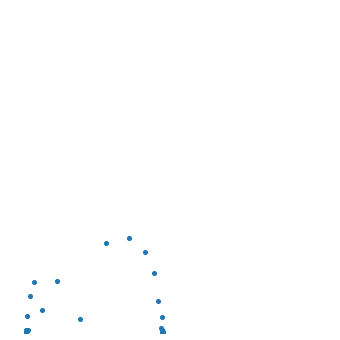

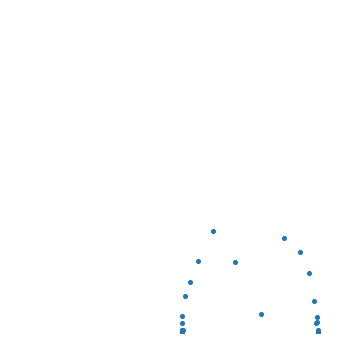

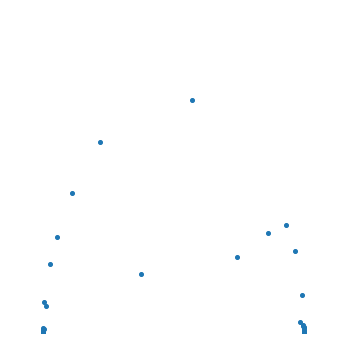

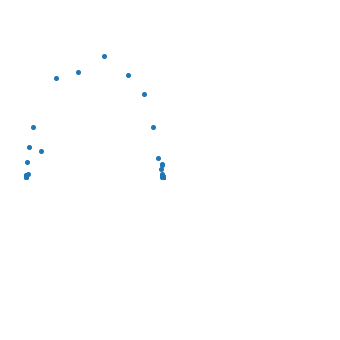

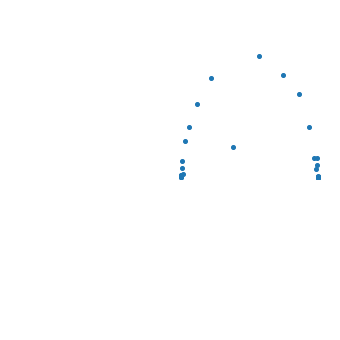

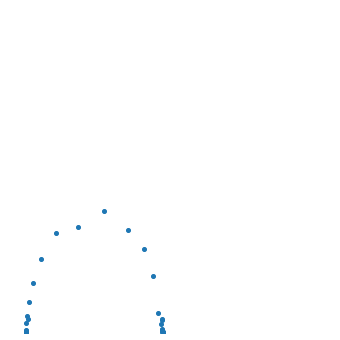

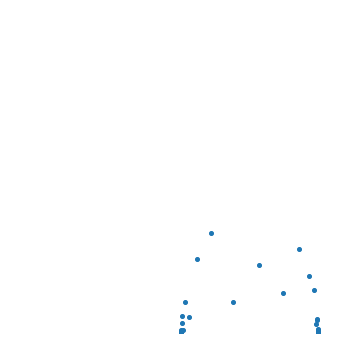

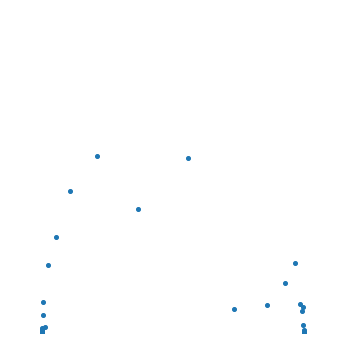

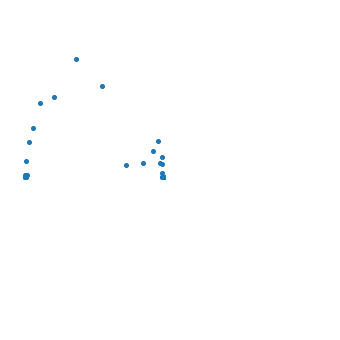

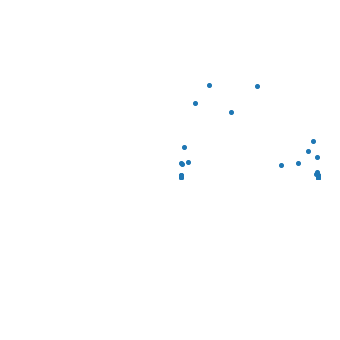

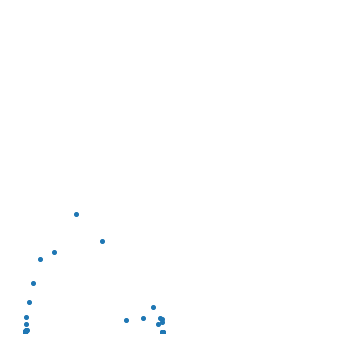

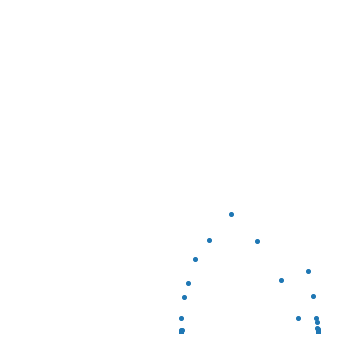

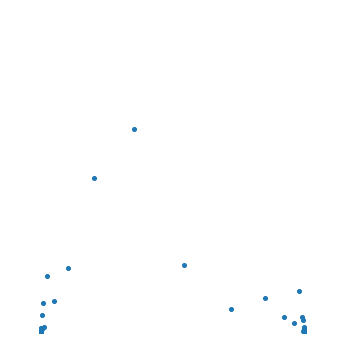

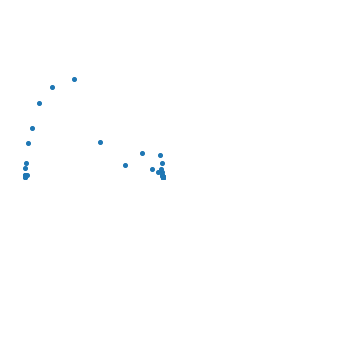

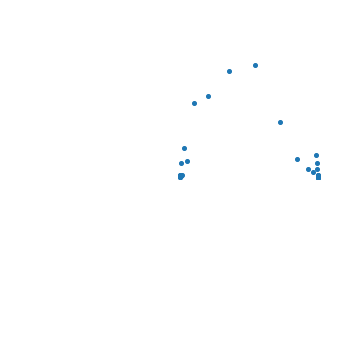

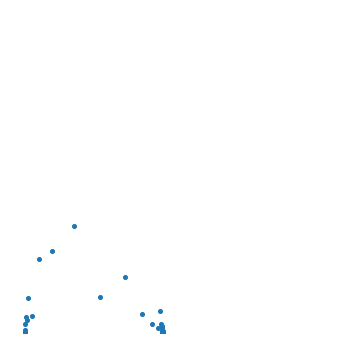

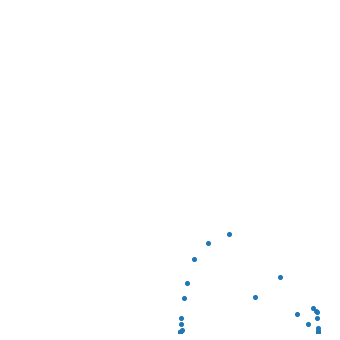

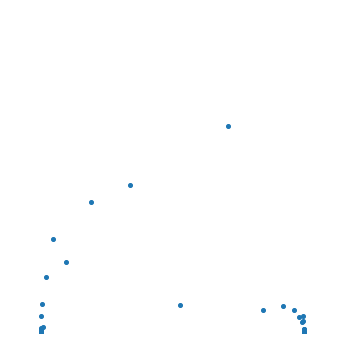

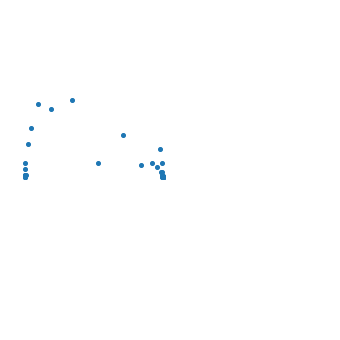

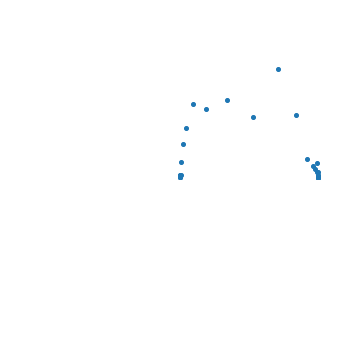

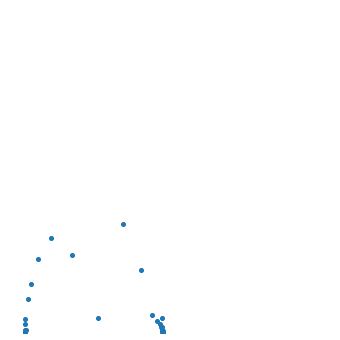

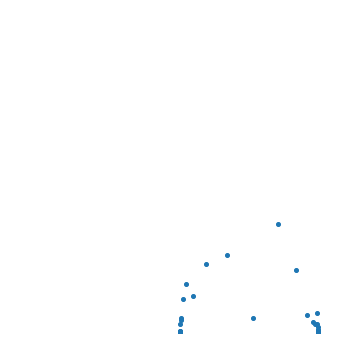

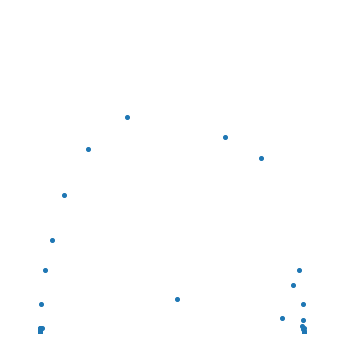

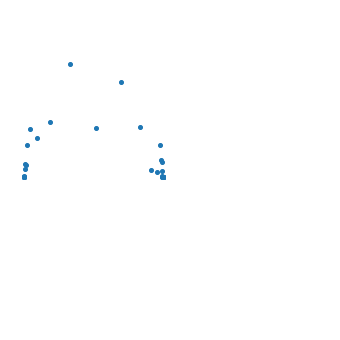

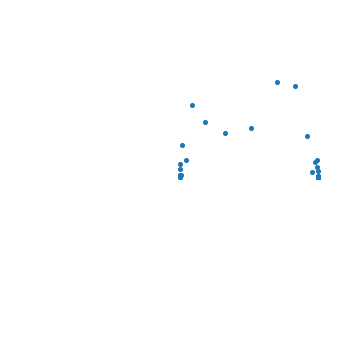

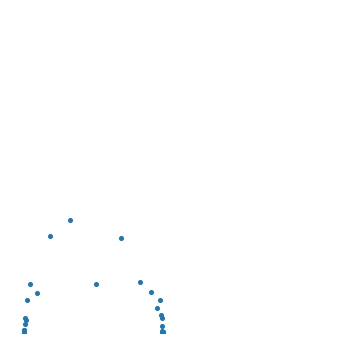

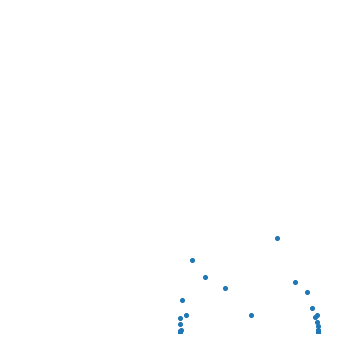

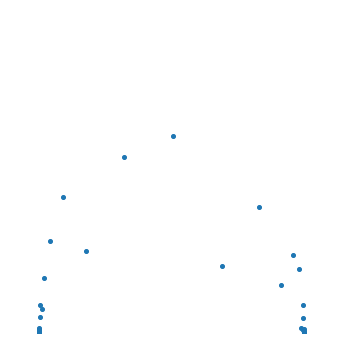

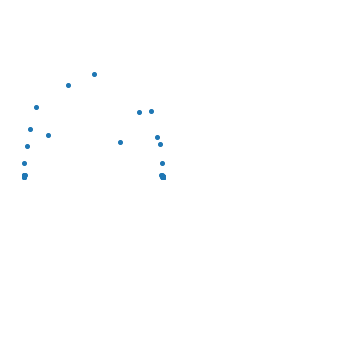

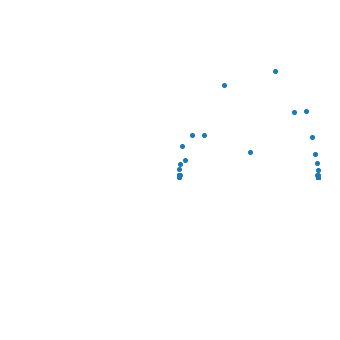

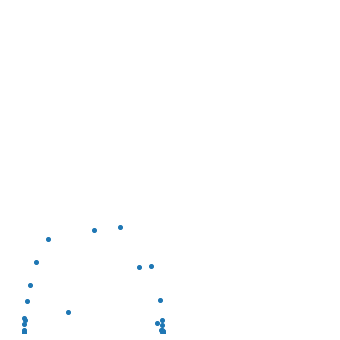

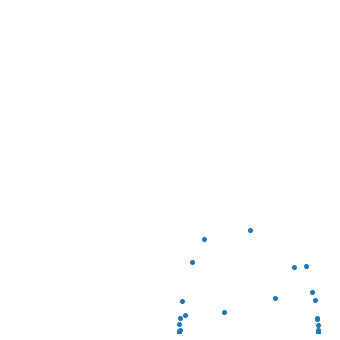

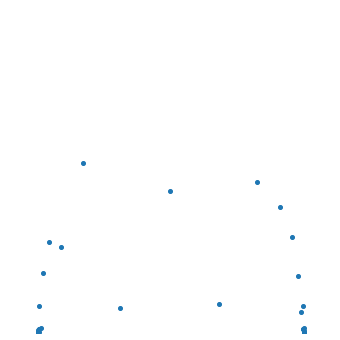

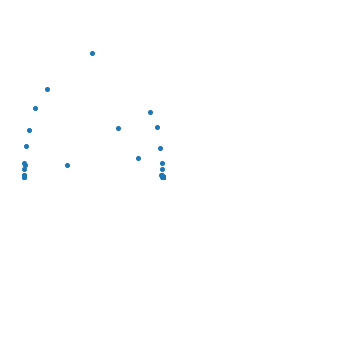

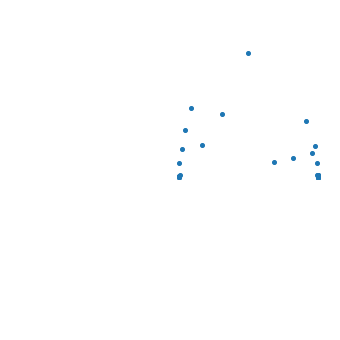

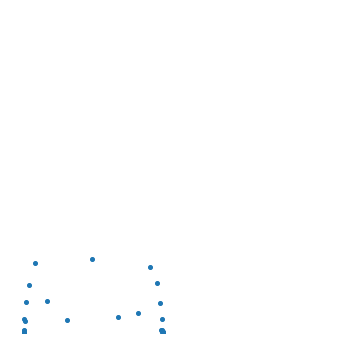

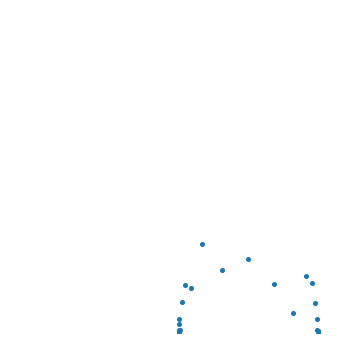

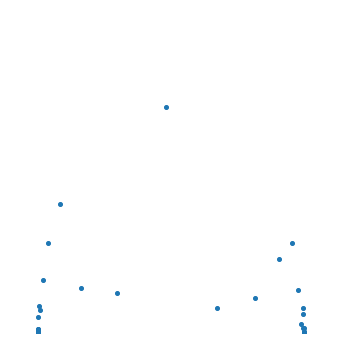

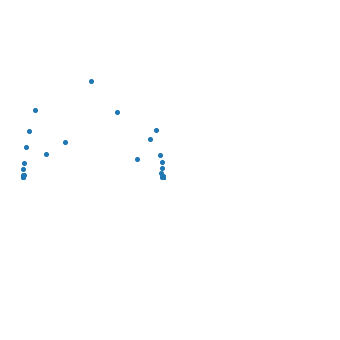

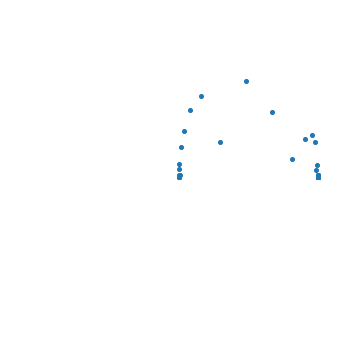

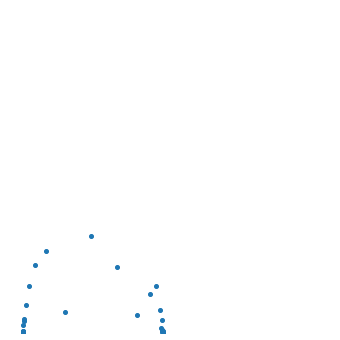

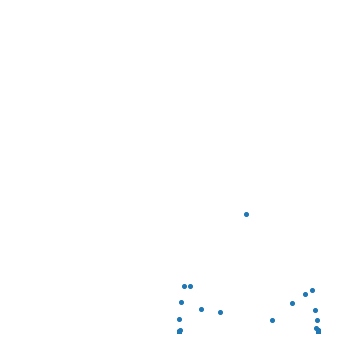

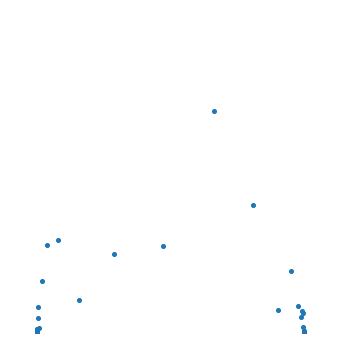

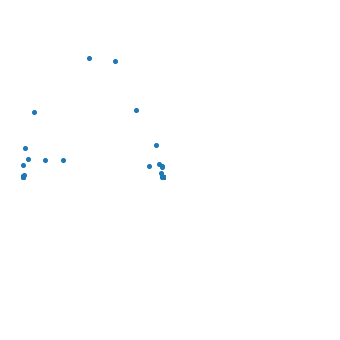

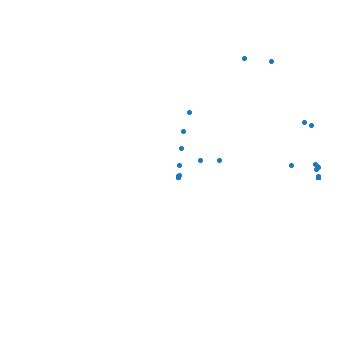

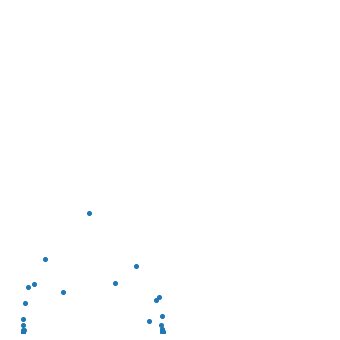

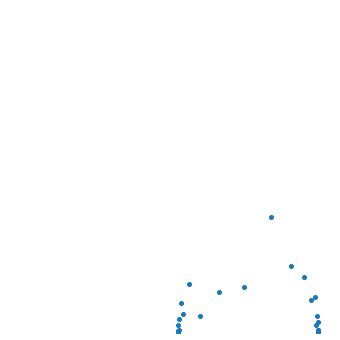

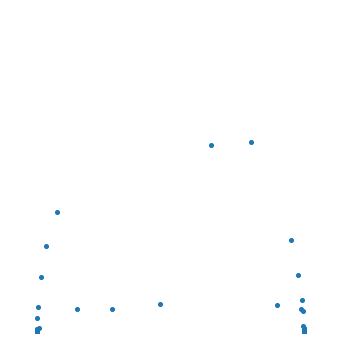

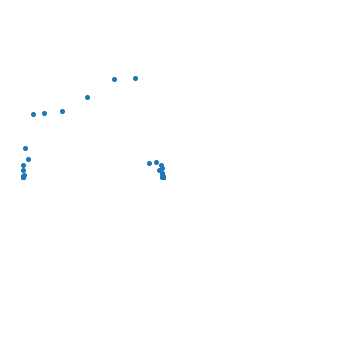

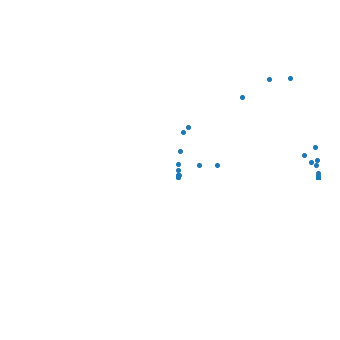

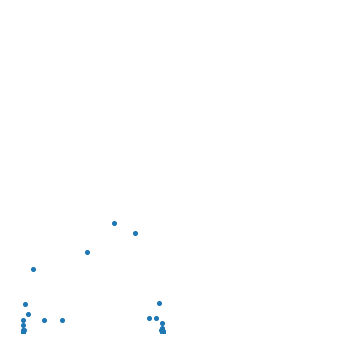

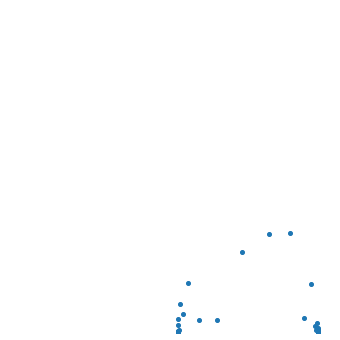

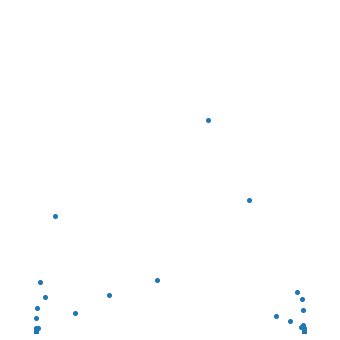

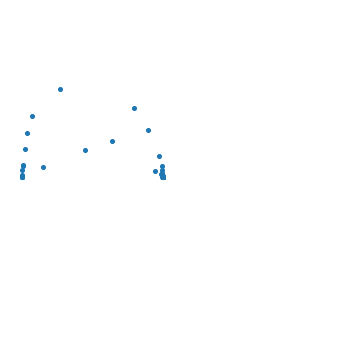

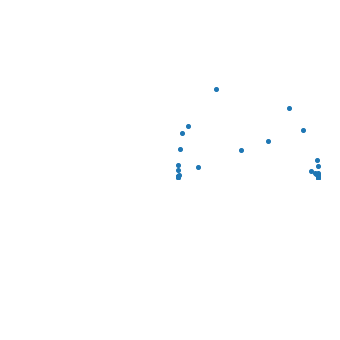

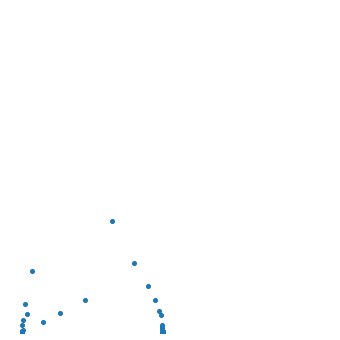

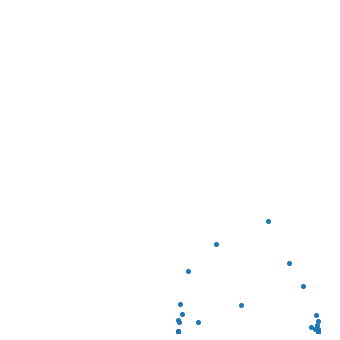

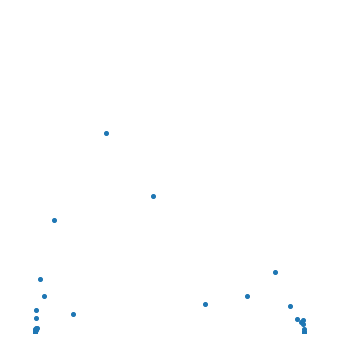

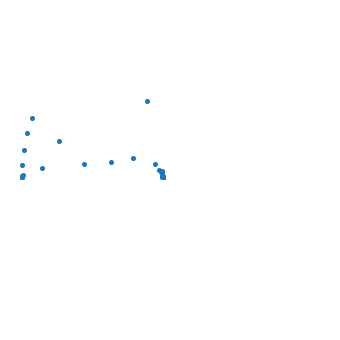

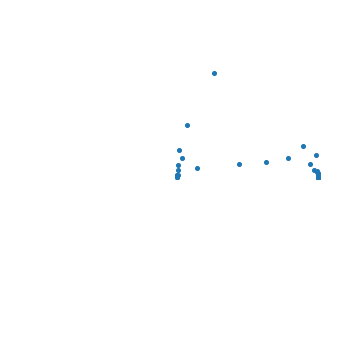

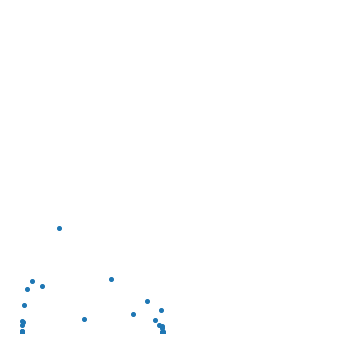

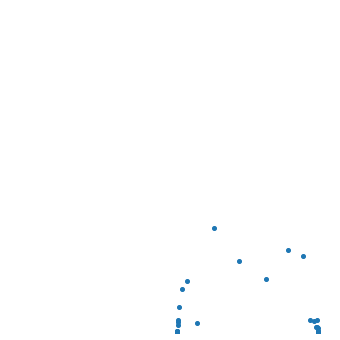

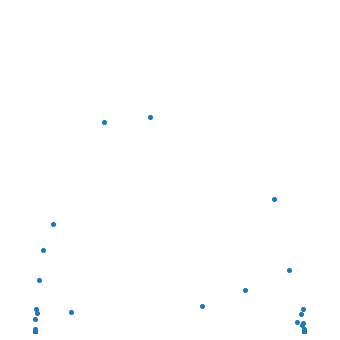

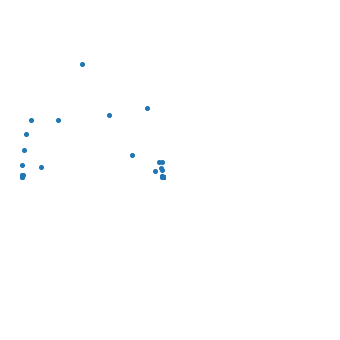

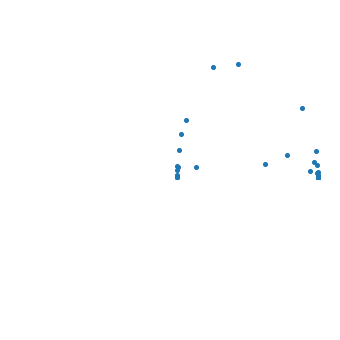

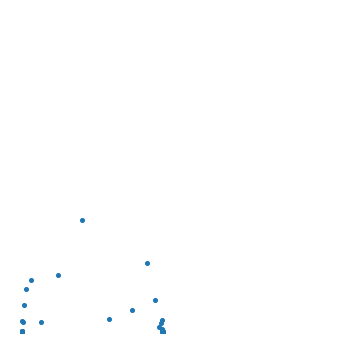

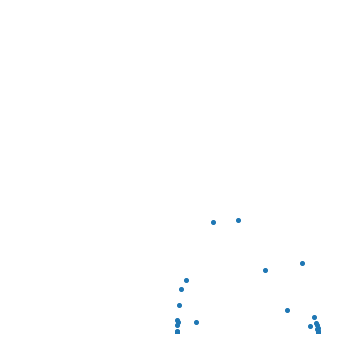

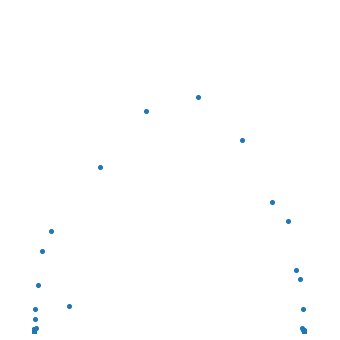

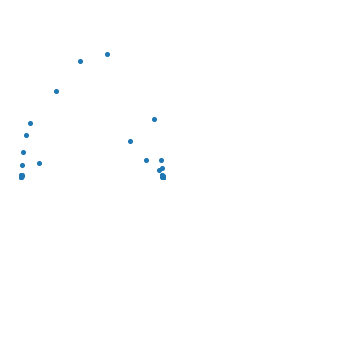

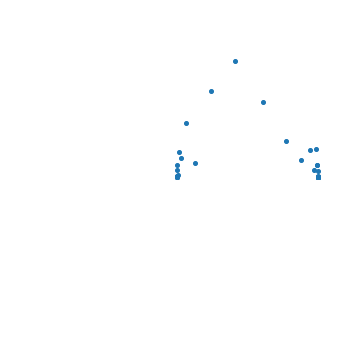

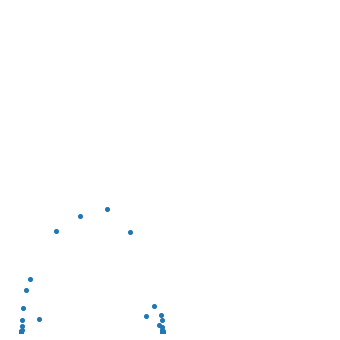

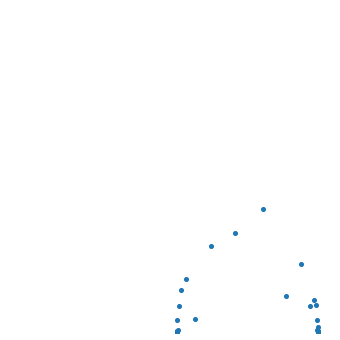

In [12]:
# Noisescale = 0.3 - 'noisy' [50]
f_start = 10**6
f_stop = 0.01
decades = 6
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 1E-6 #F
resistance= np.linspace(1,100,50, dtype=int,endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RsRC_file_writer(f_start, f_stop, decades, Rs, R1, C, alteration='noise', noisescale=0.8, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

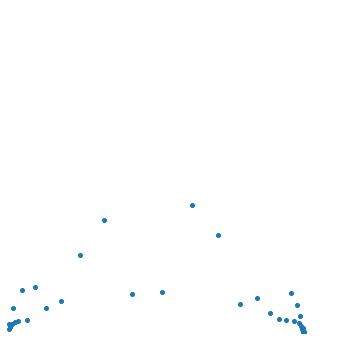

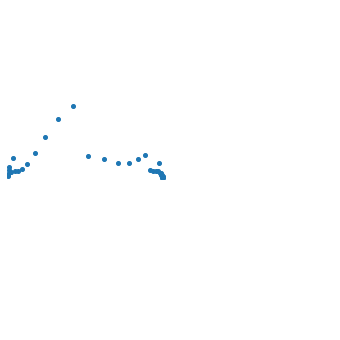

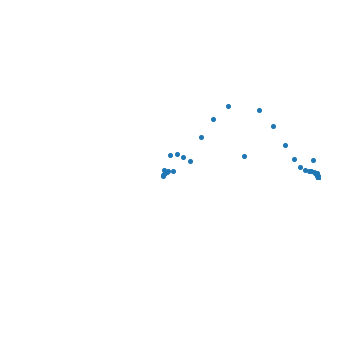

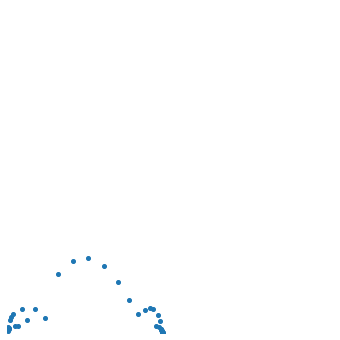

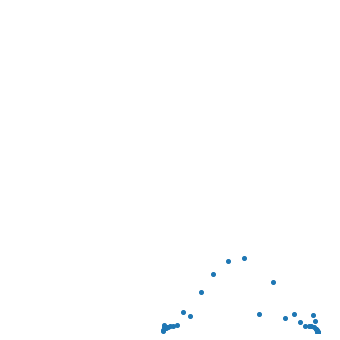

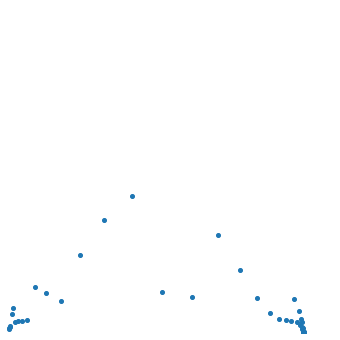

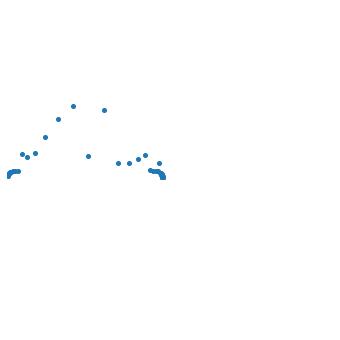

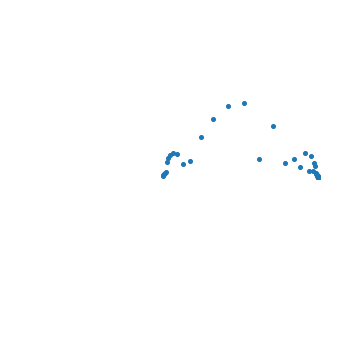

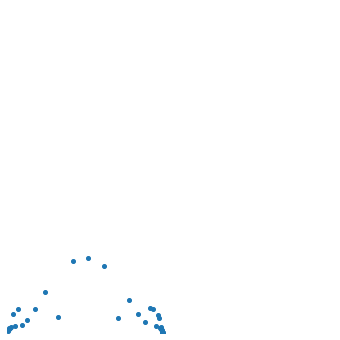

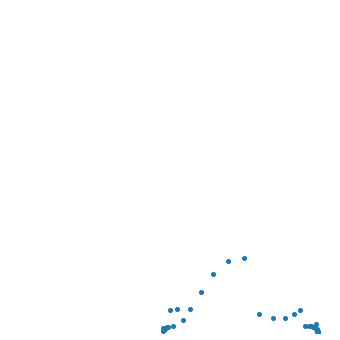

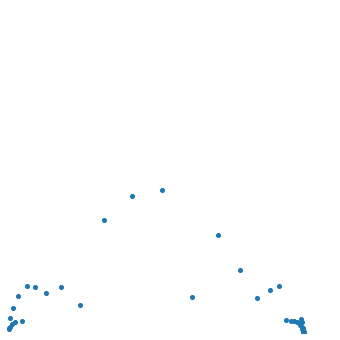

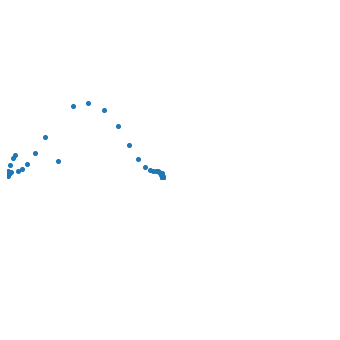

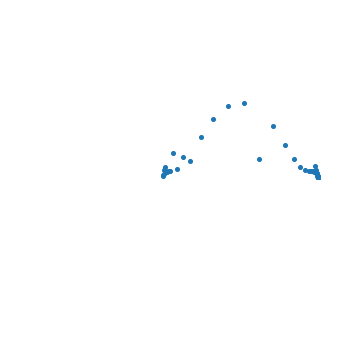

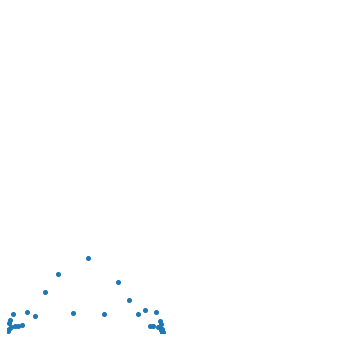

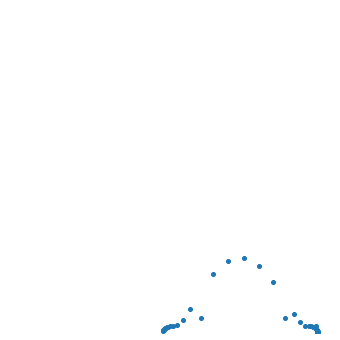

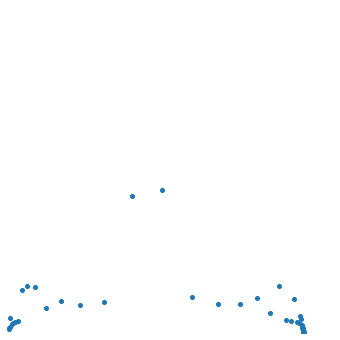

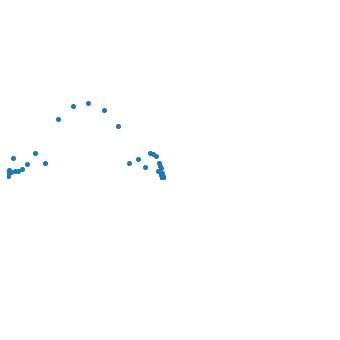

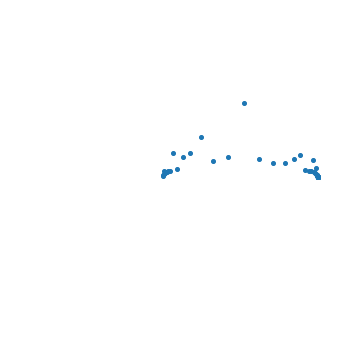

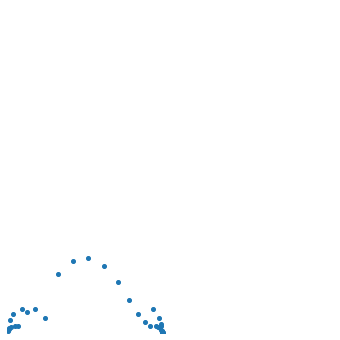

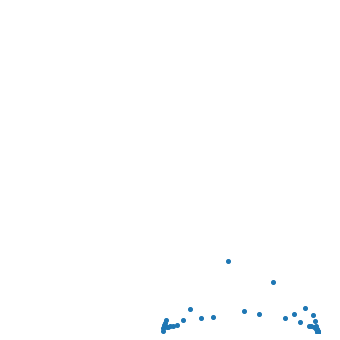

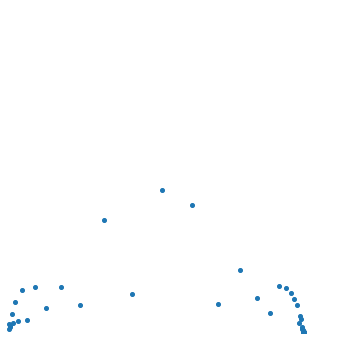

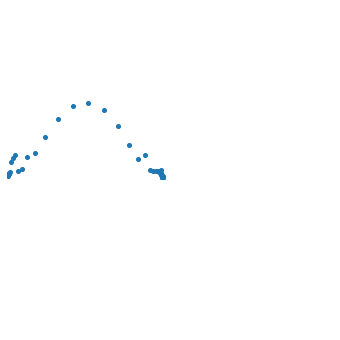

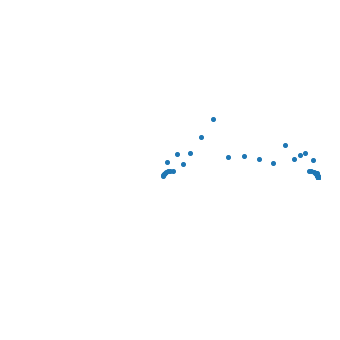

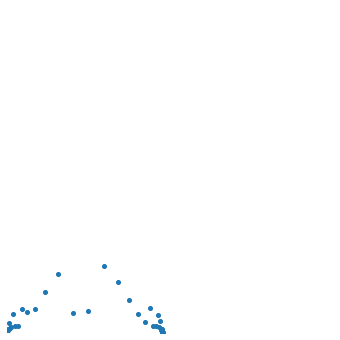

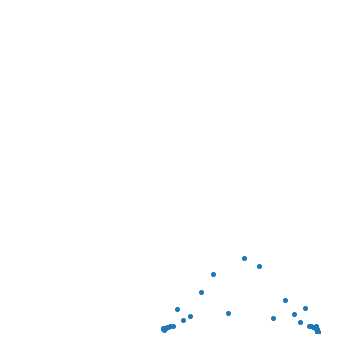

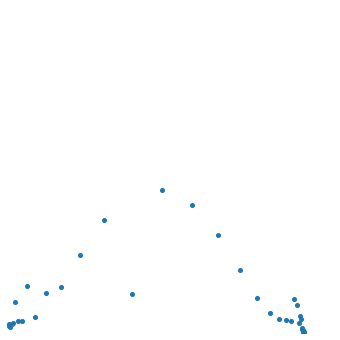

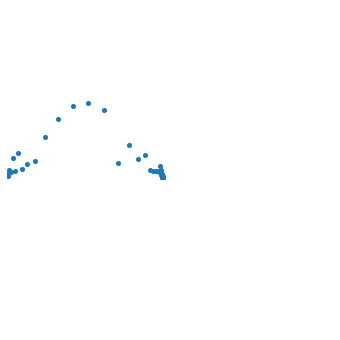

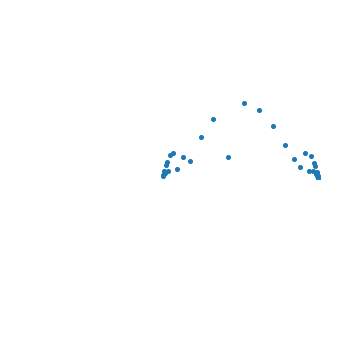

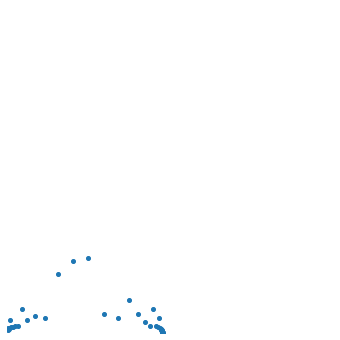

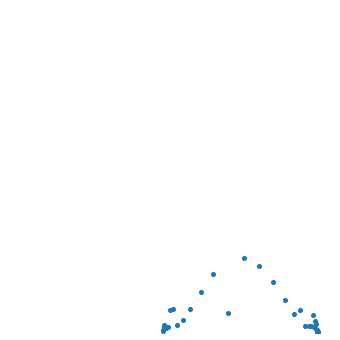

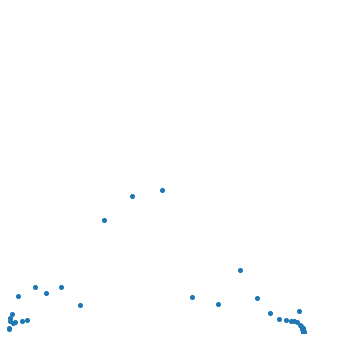

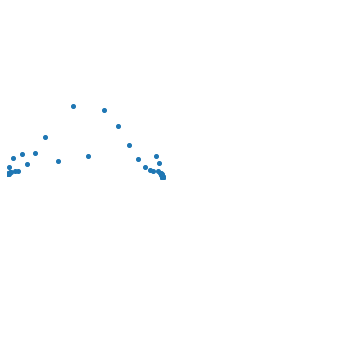

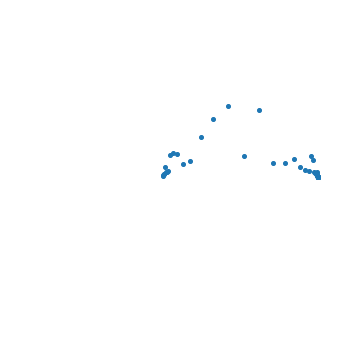

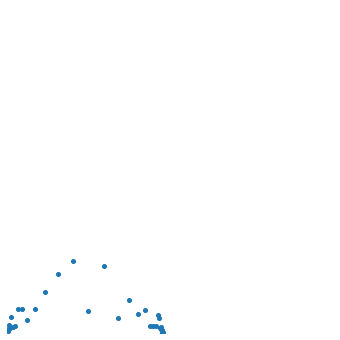

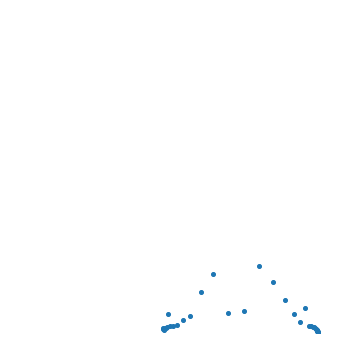

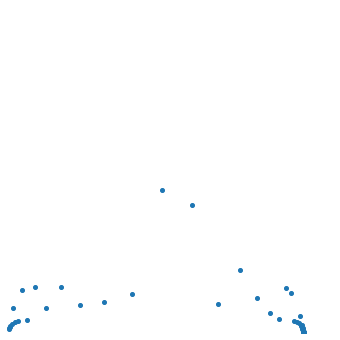

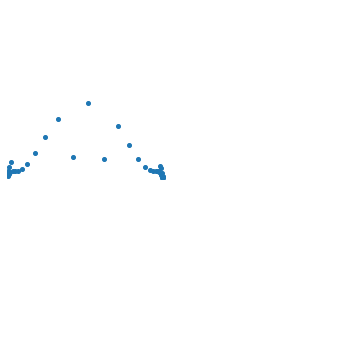

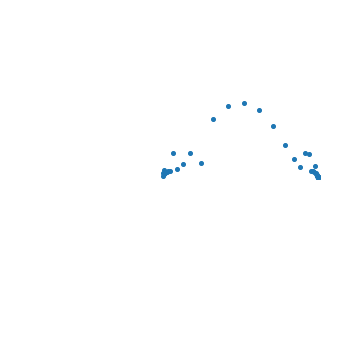

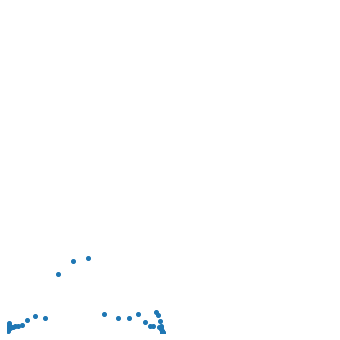

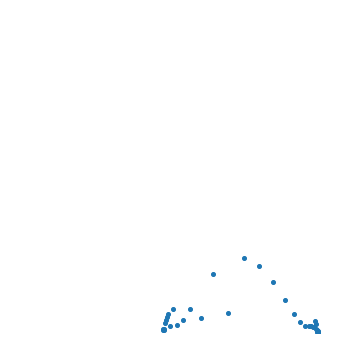

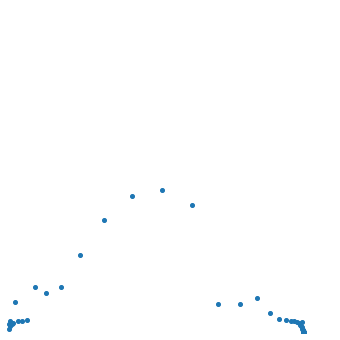

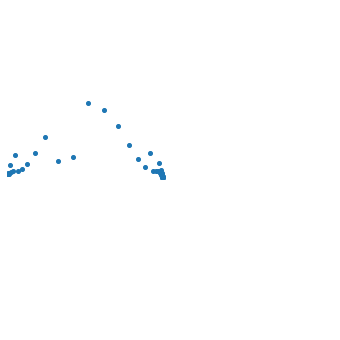

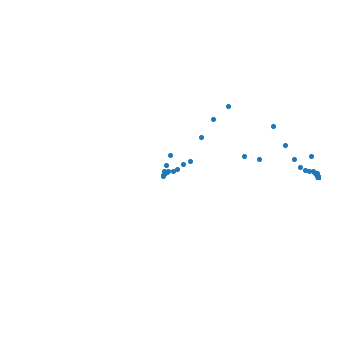

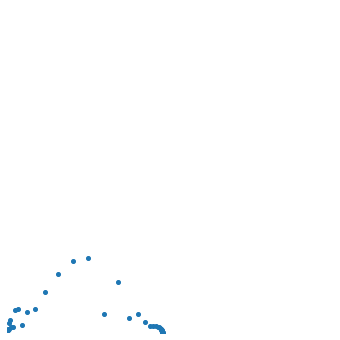

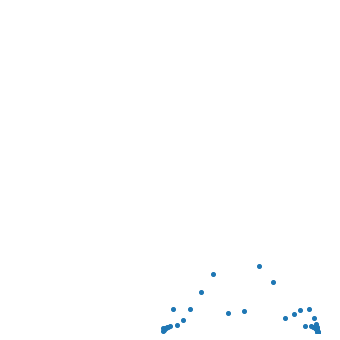

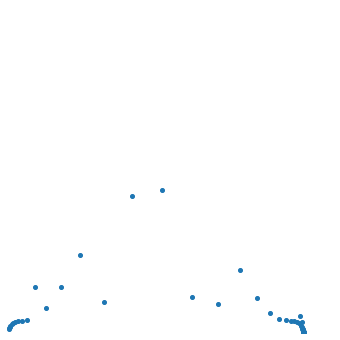

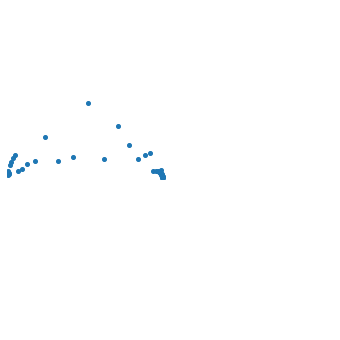

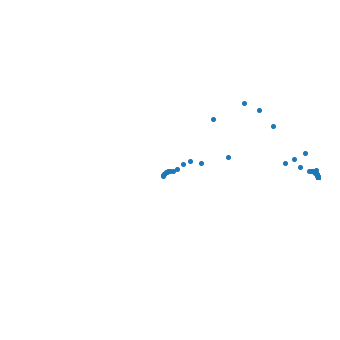

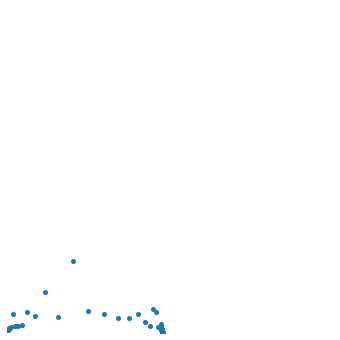

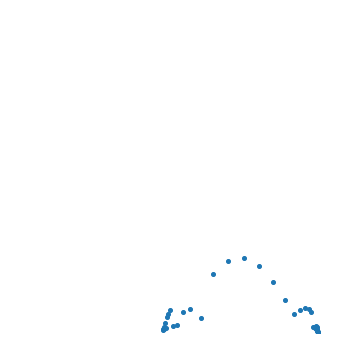

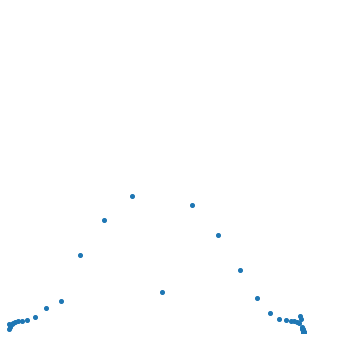

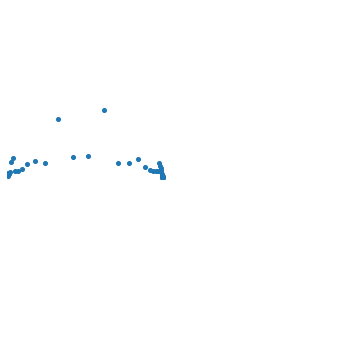

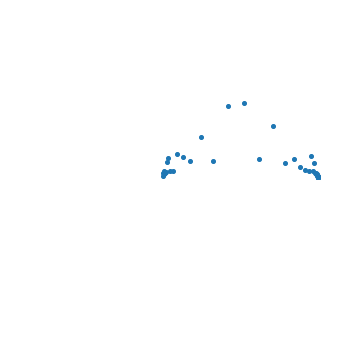

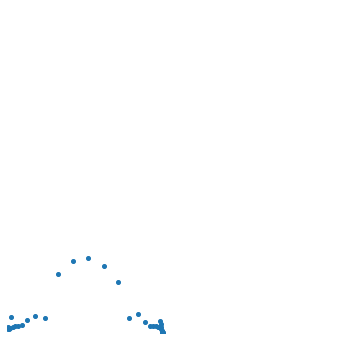

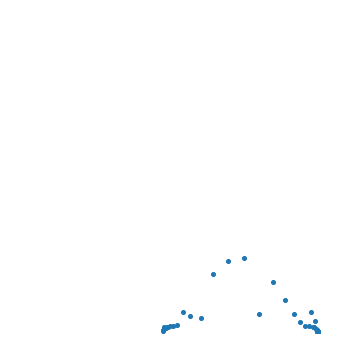

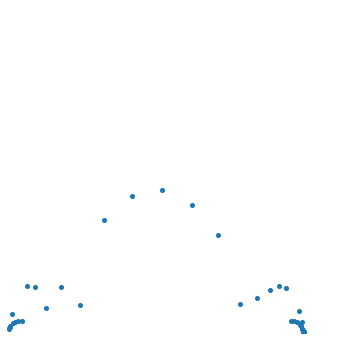

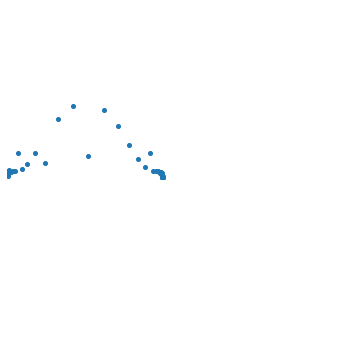

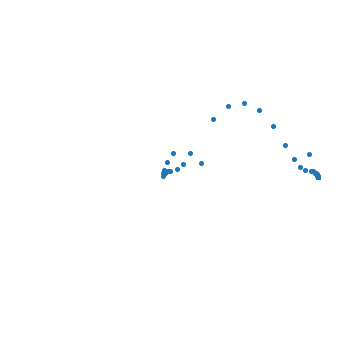

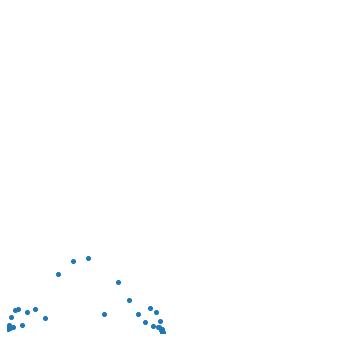

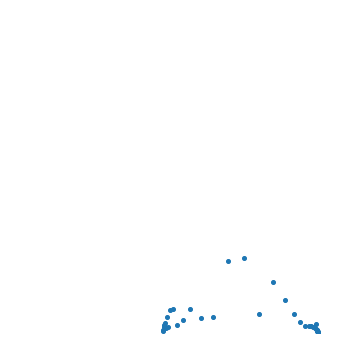

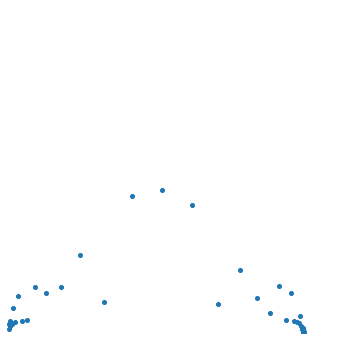

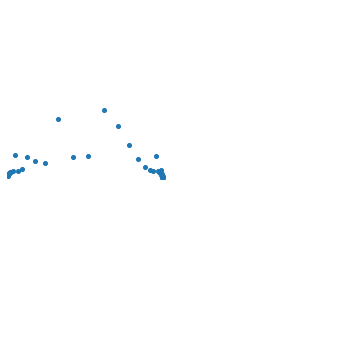

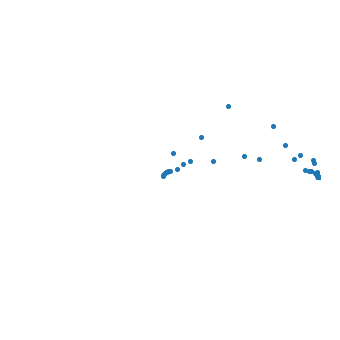

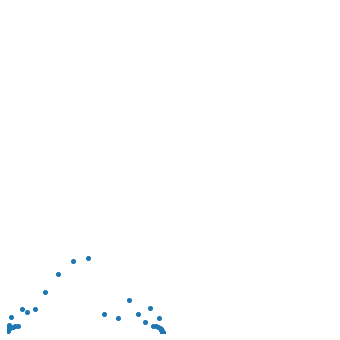

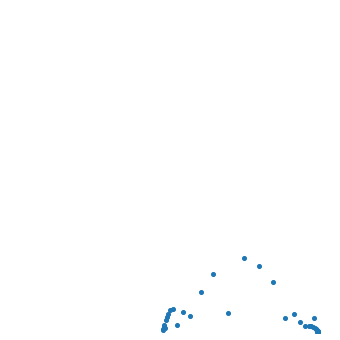

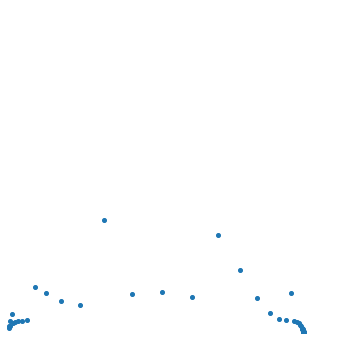

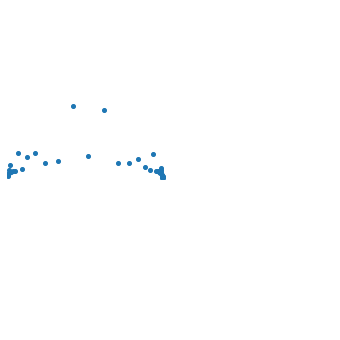

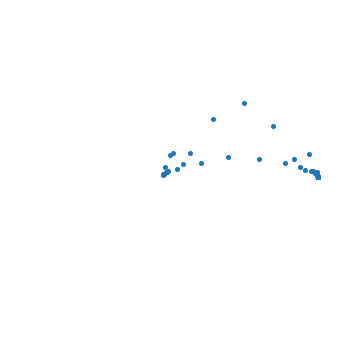

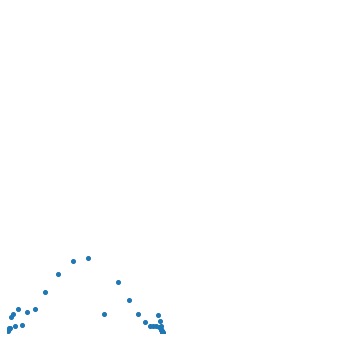

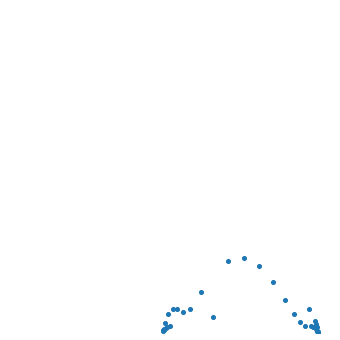

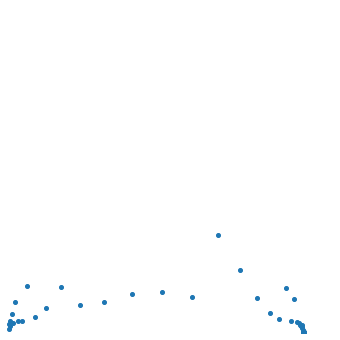

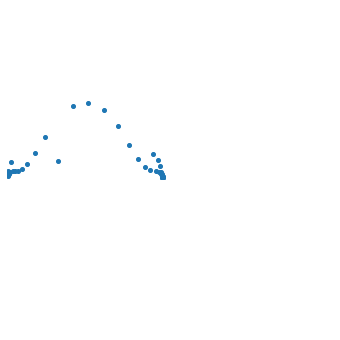

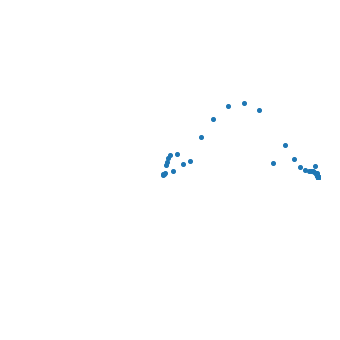

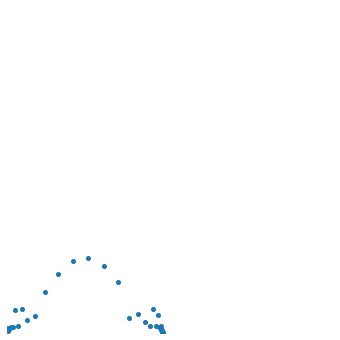

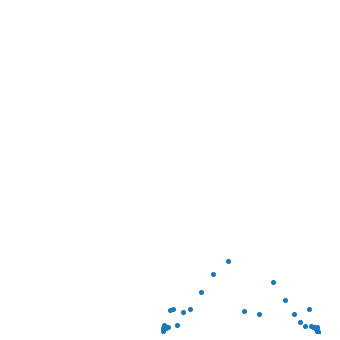

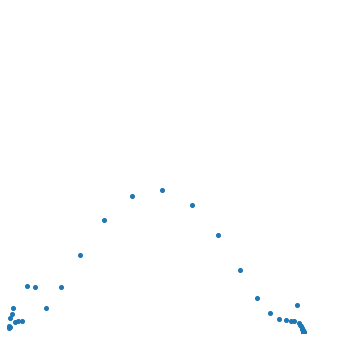

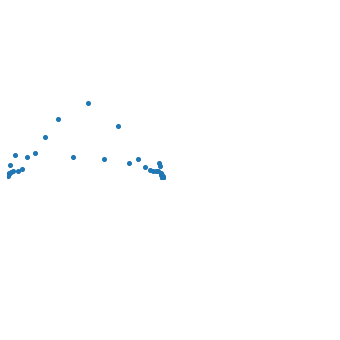

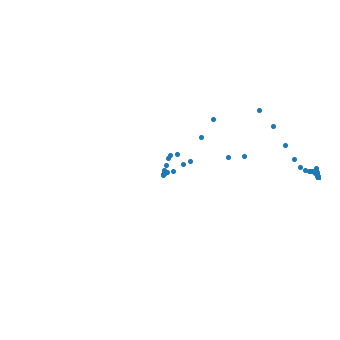

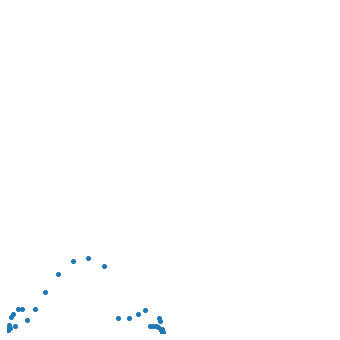

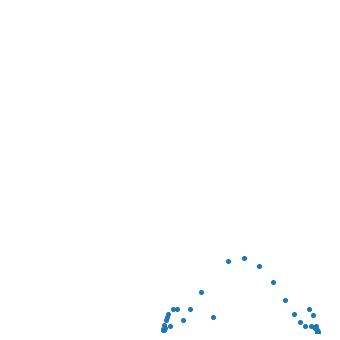

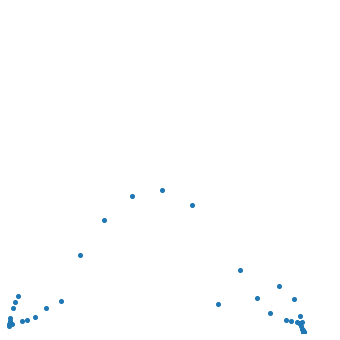

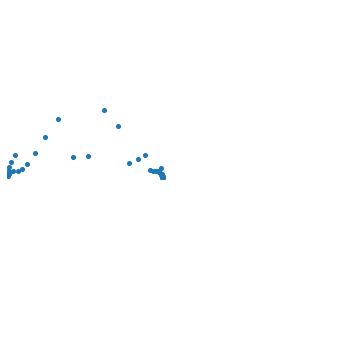

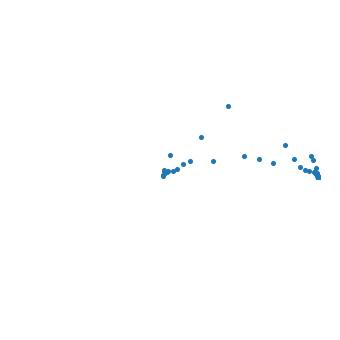

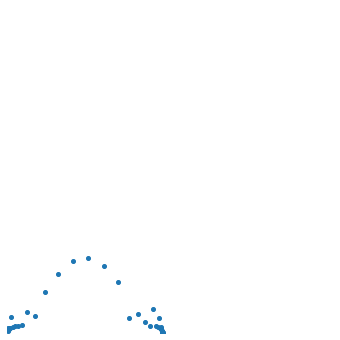

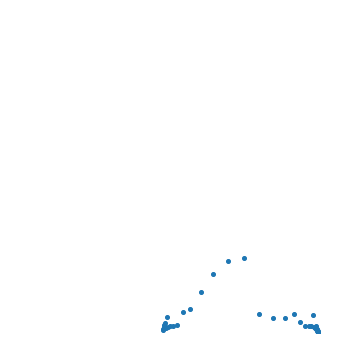

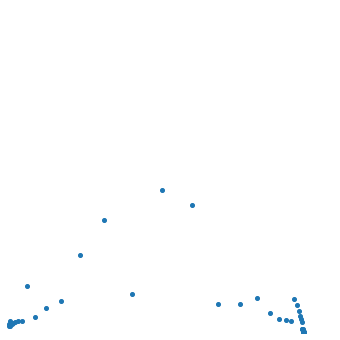

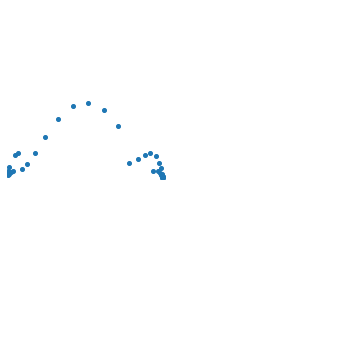

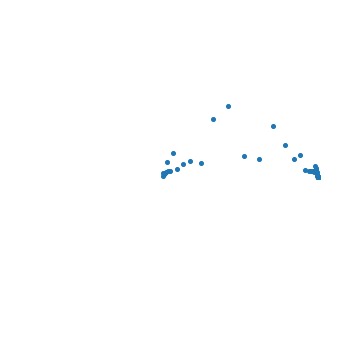

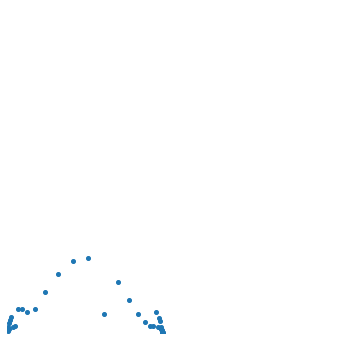

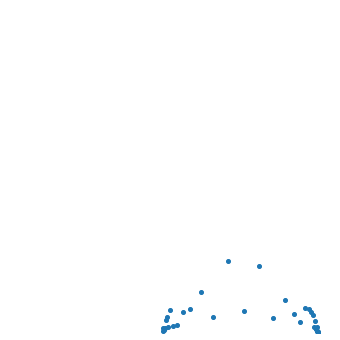

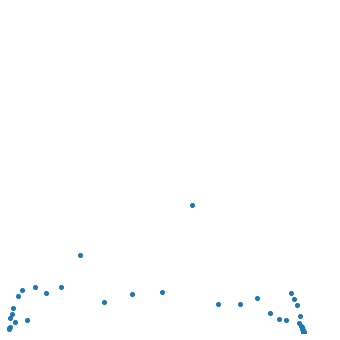

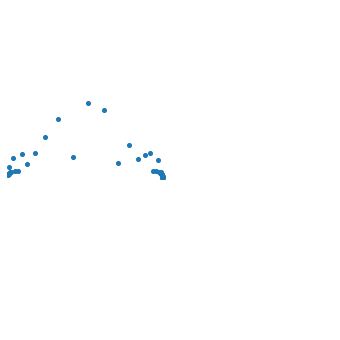

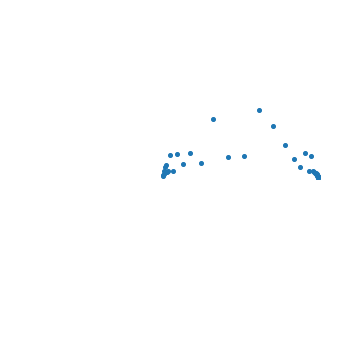

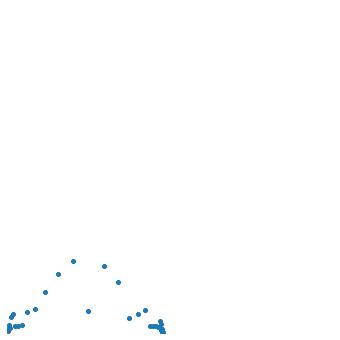

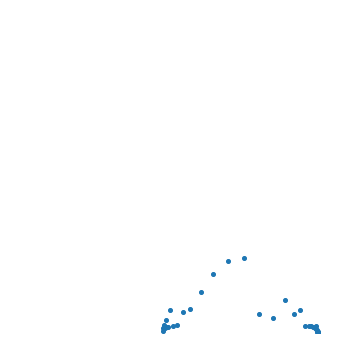

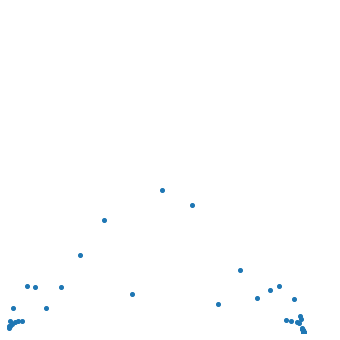

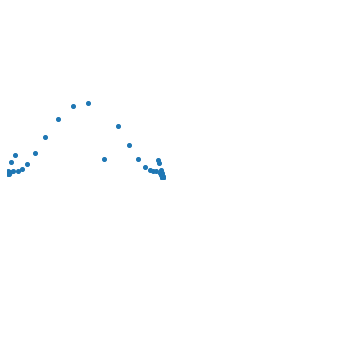

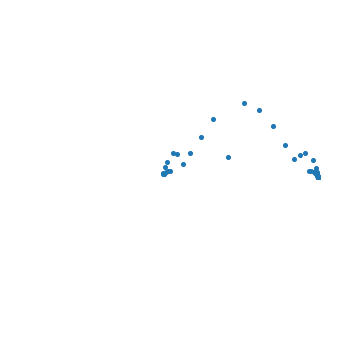

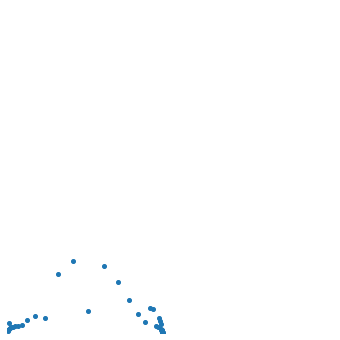

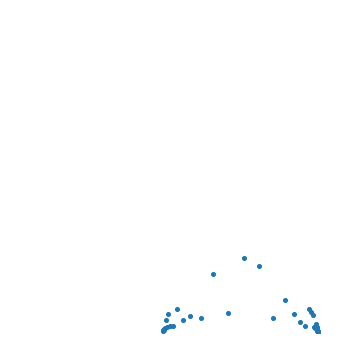

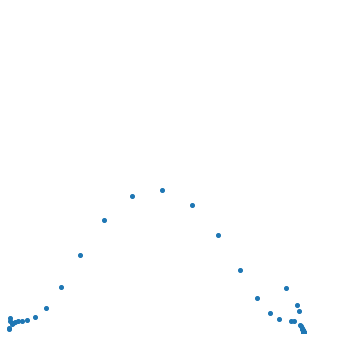

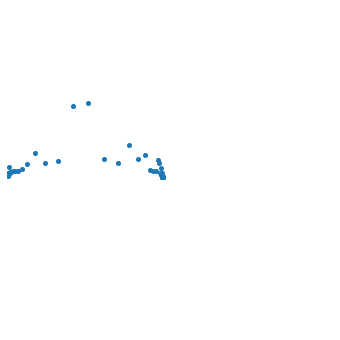

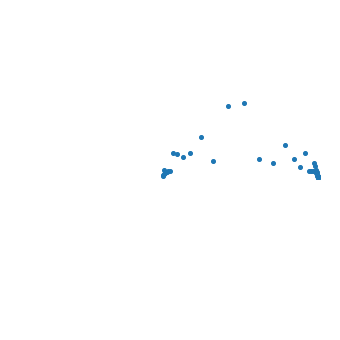

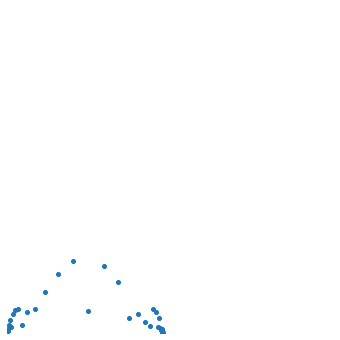

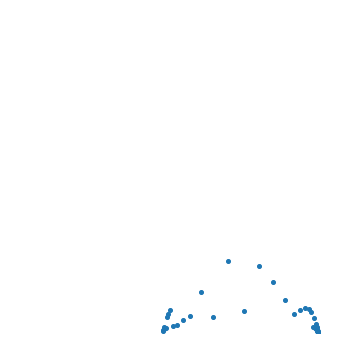

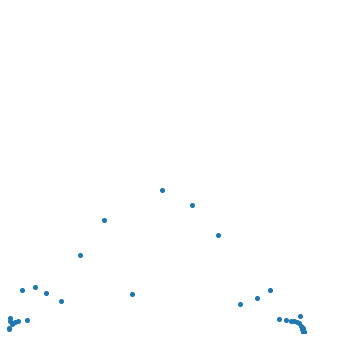

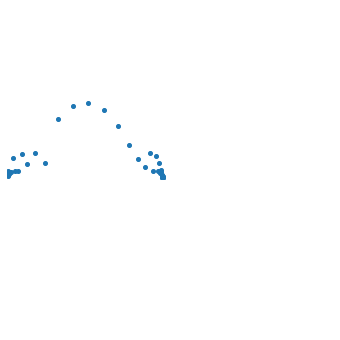

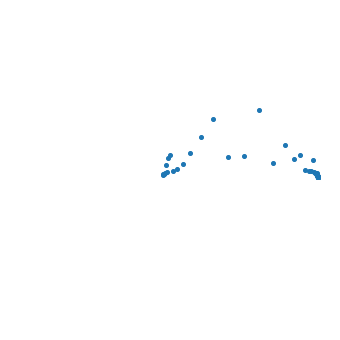

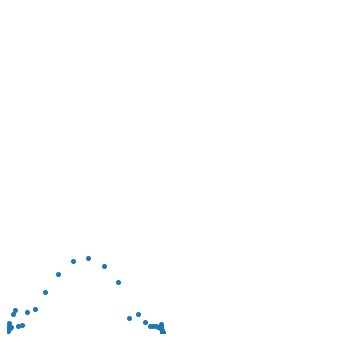

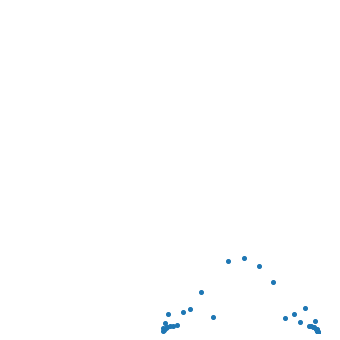

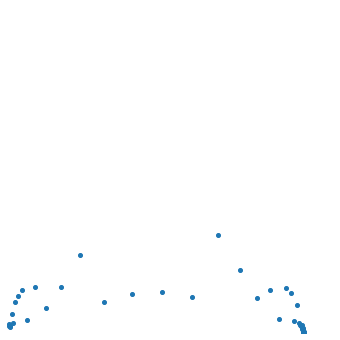

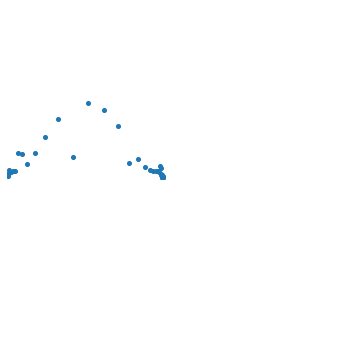

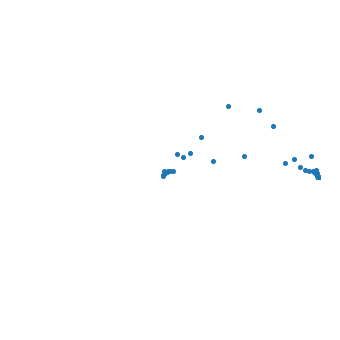

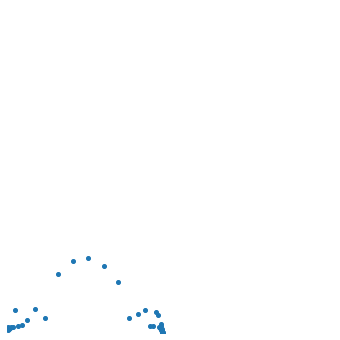

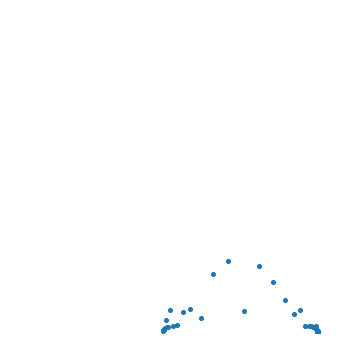

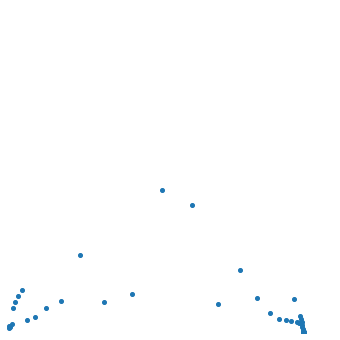

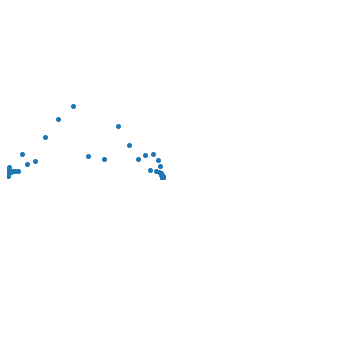

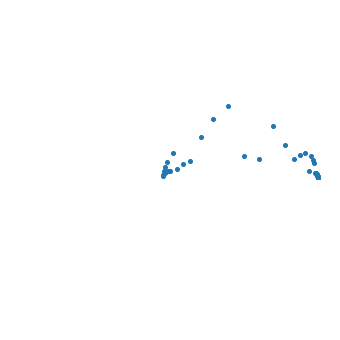

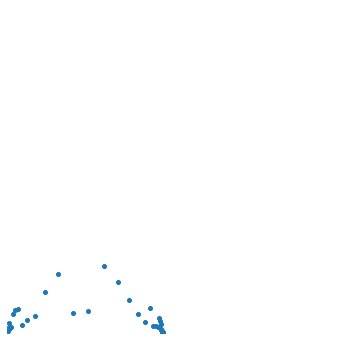

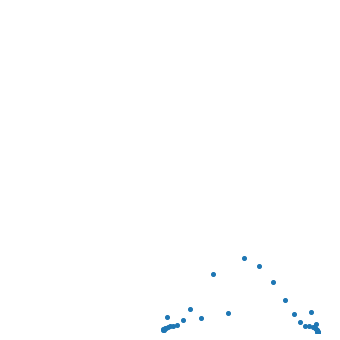

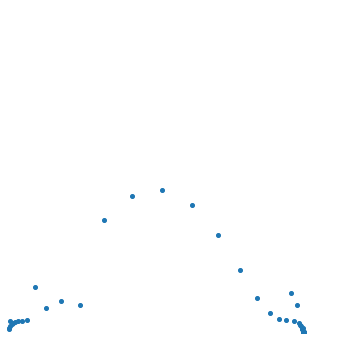

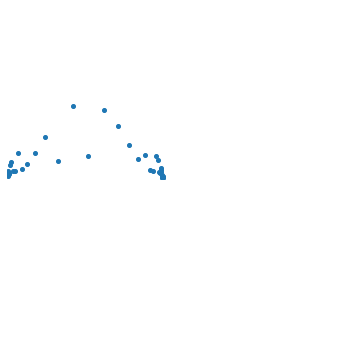

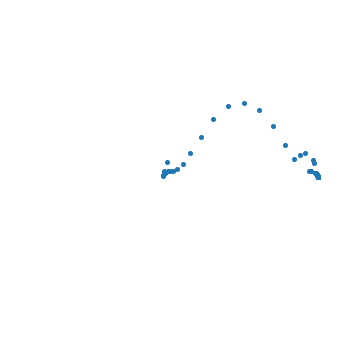

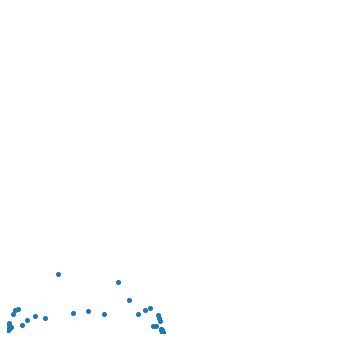

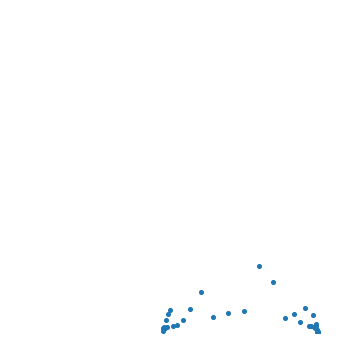

In [13]:
# Noisescale = 0.3 - ' noisy' [25]
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q= 25E-6 #F
alpha= 0.8
resistance= np.linspace(1,100,25, dtype=int,endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RQ_file_writer(f_start, f_stop, decades, Rs, Q, alpha, 'parallel', alteration='noise', noisescale=0.7, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

### 2 semicircles- not noisy

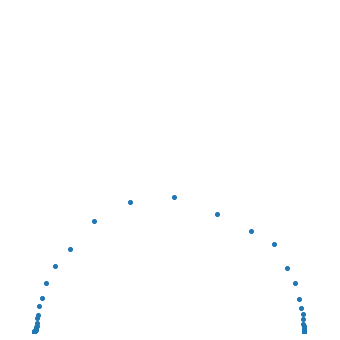

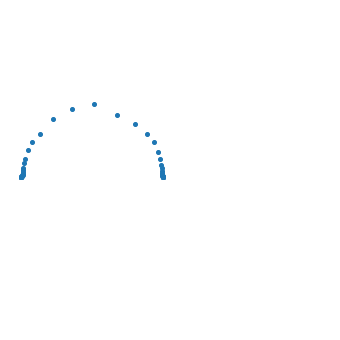

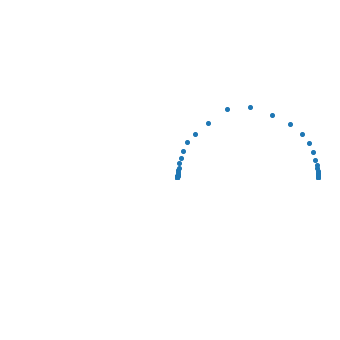

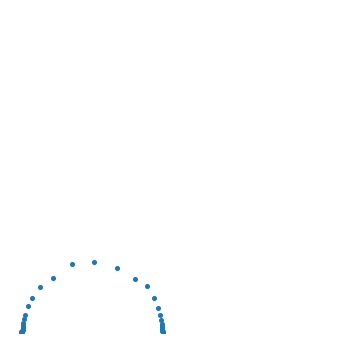

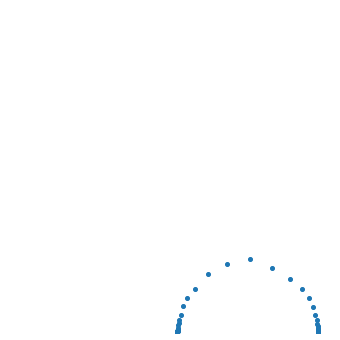

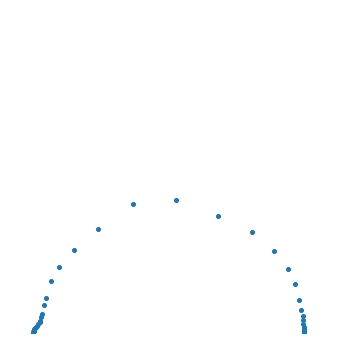

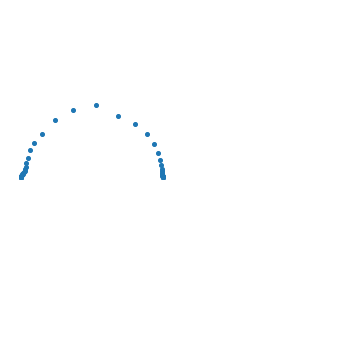

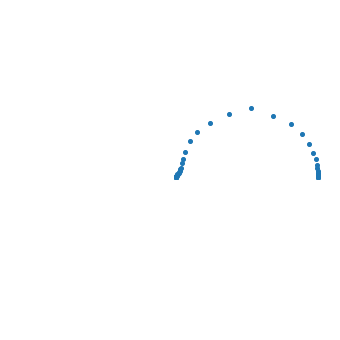

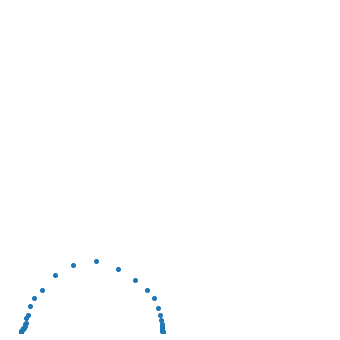

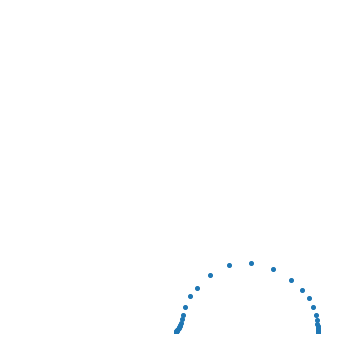

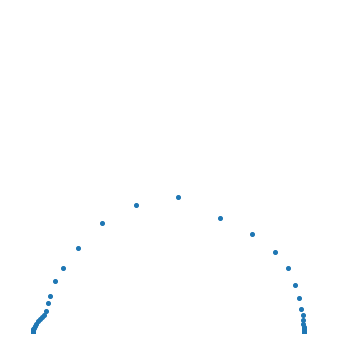

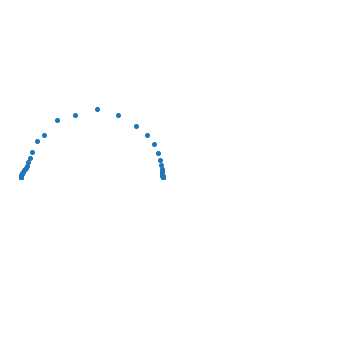

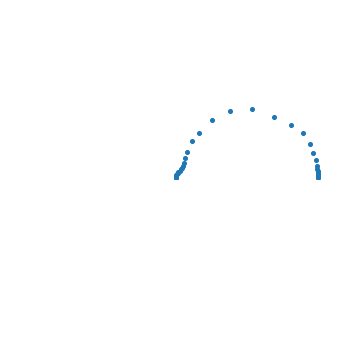

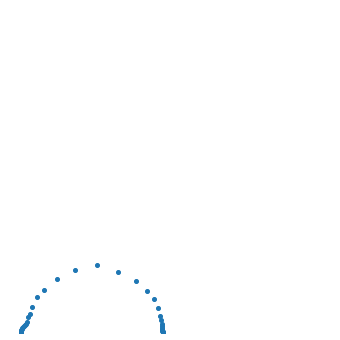

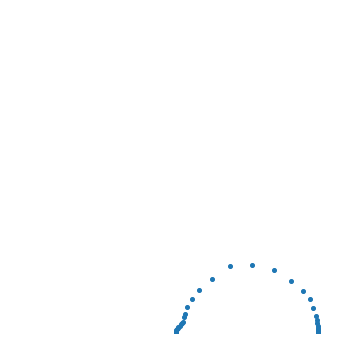

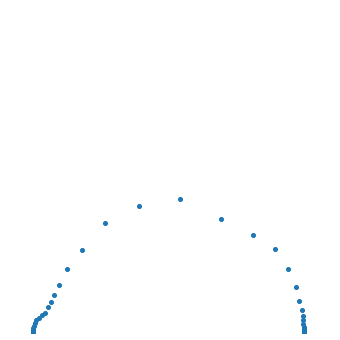

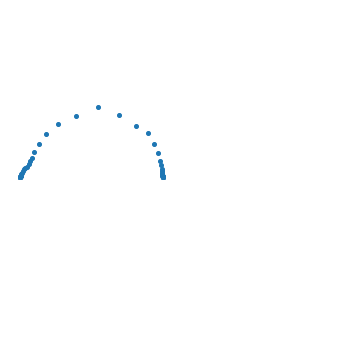

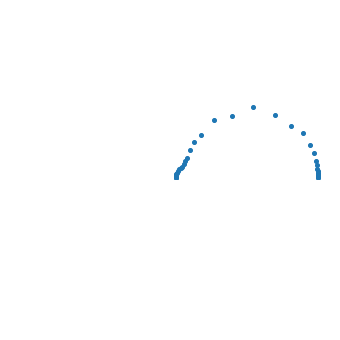

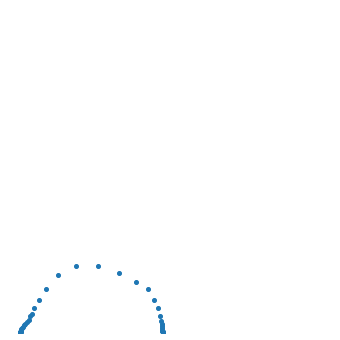

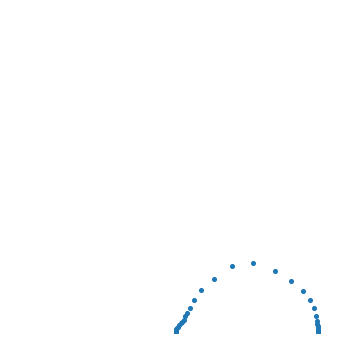

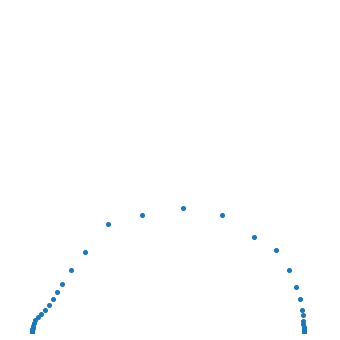

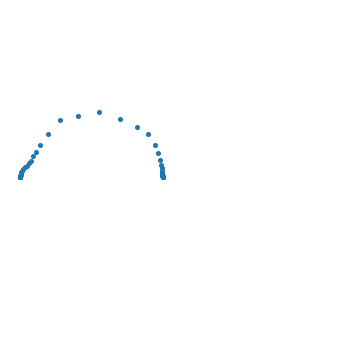

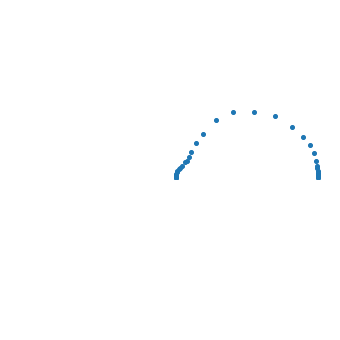

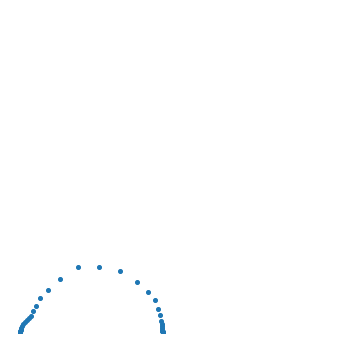

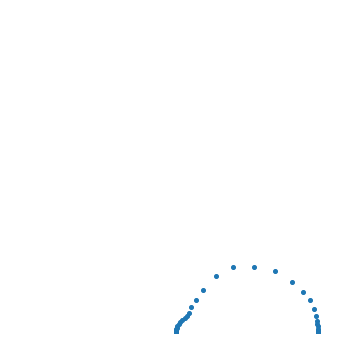

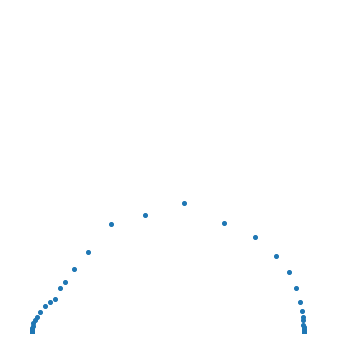

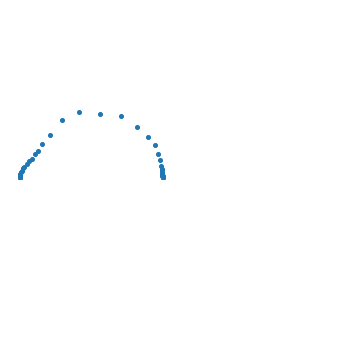

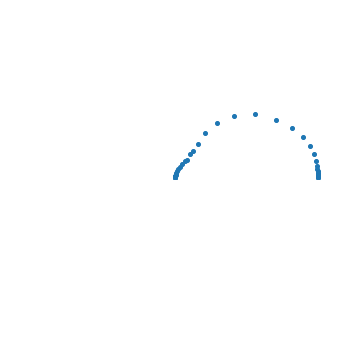

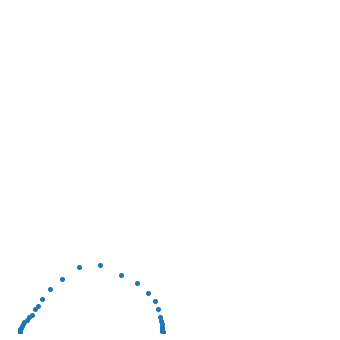

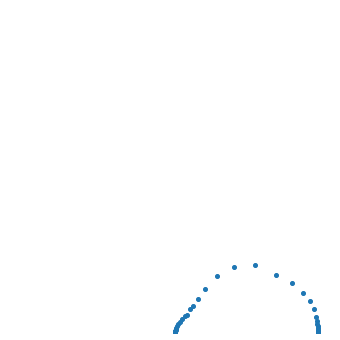

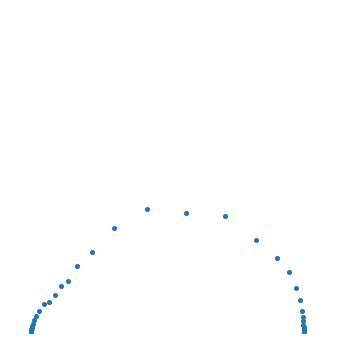

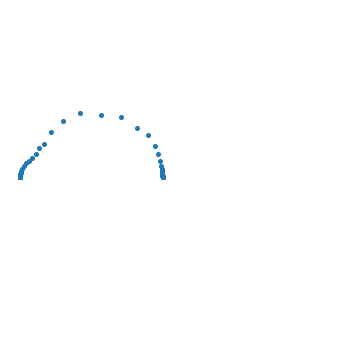

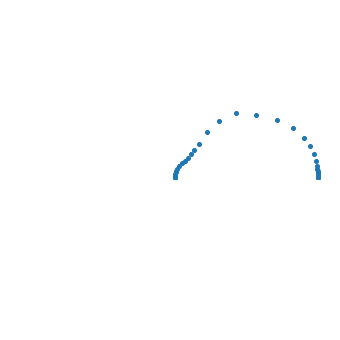

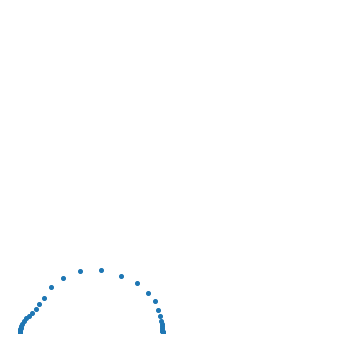

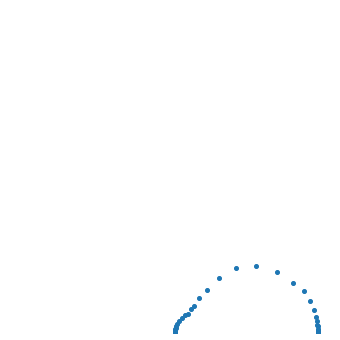

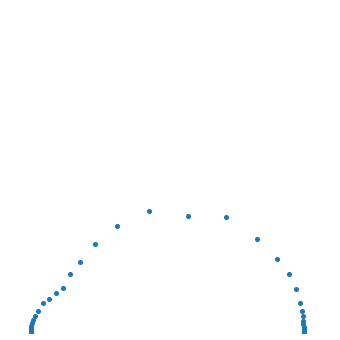

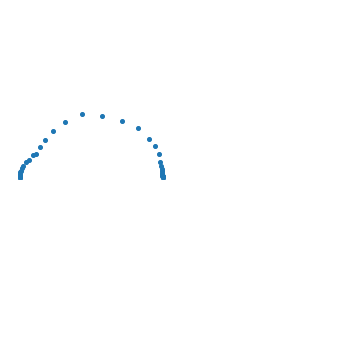

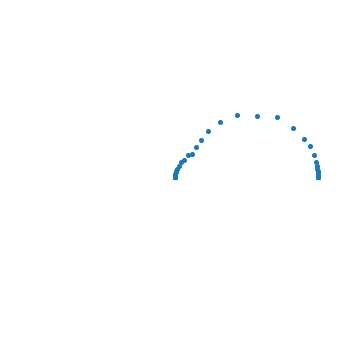

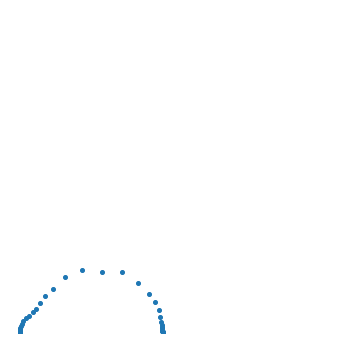

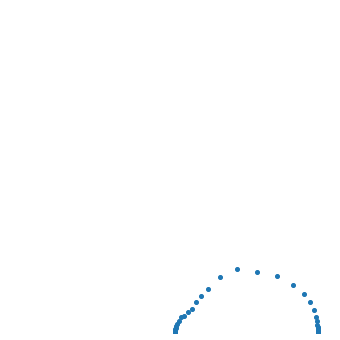

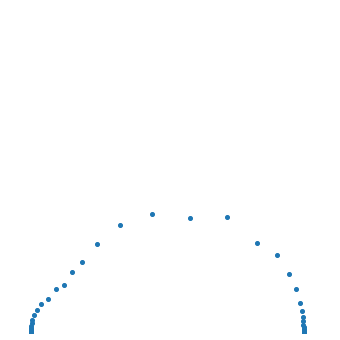

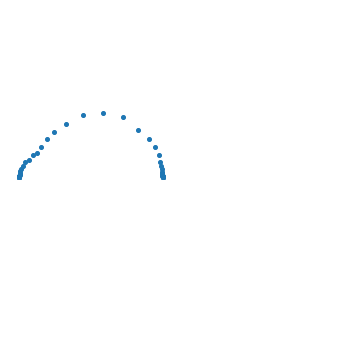

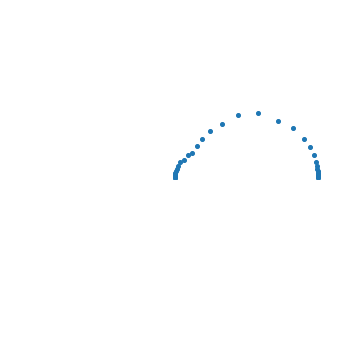

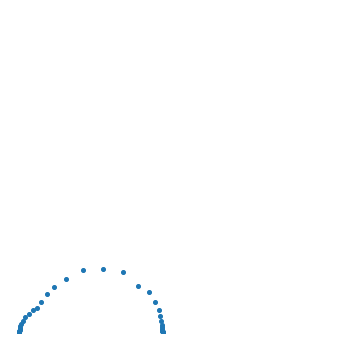

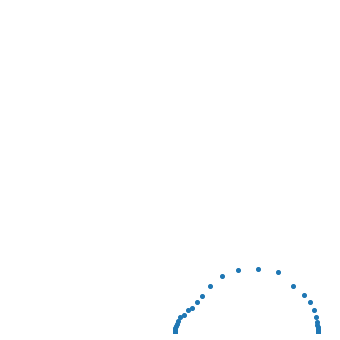

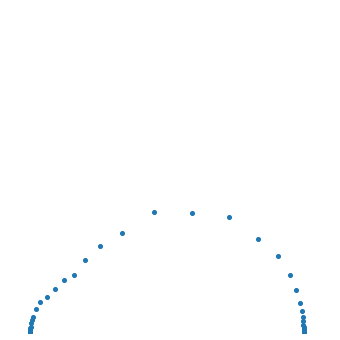

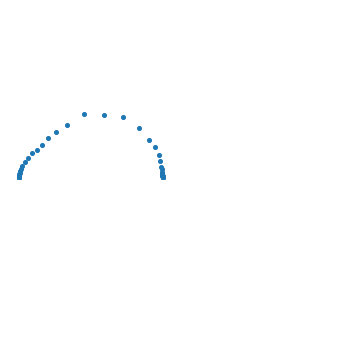

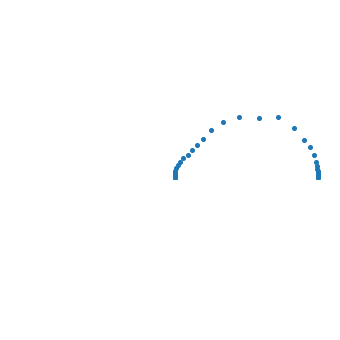

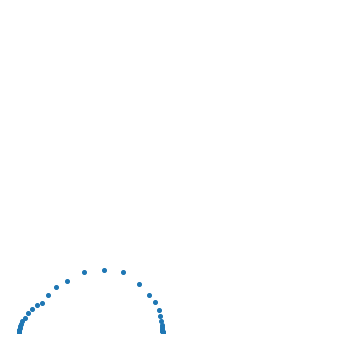

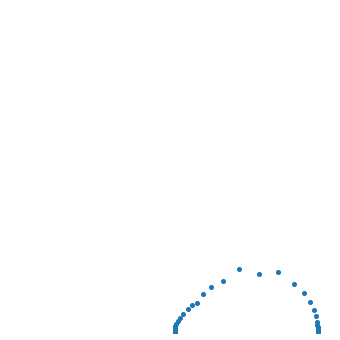

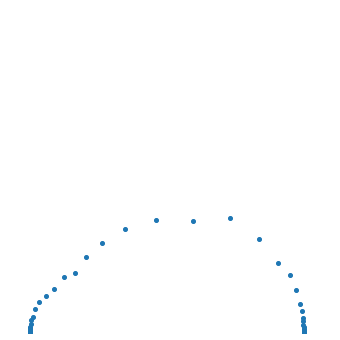

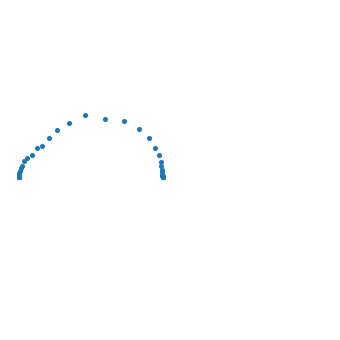

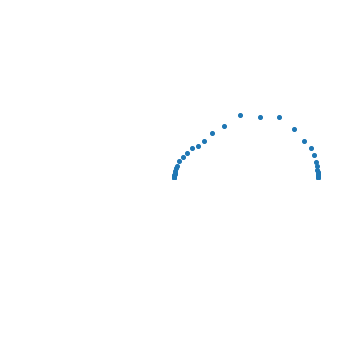

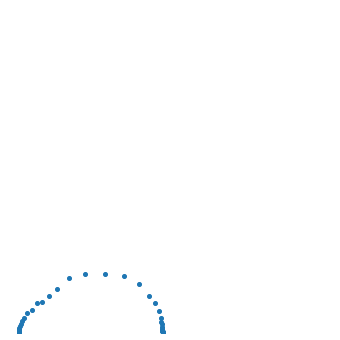

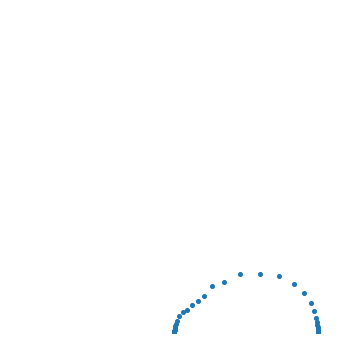

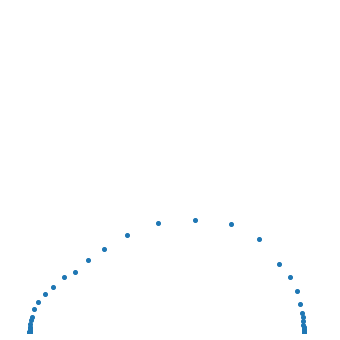

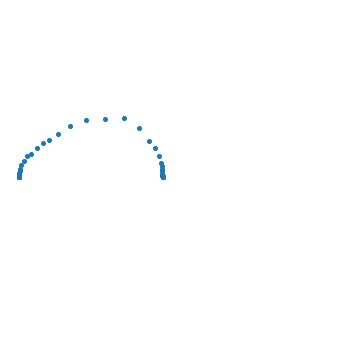

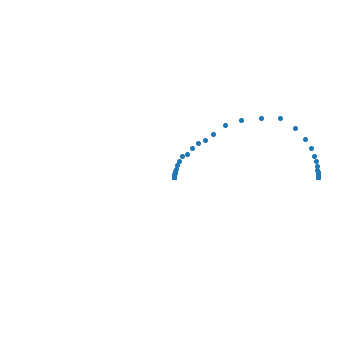

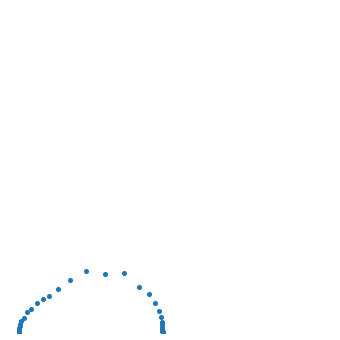

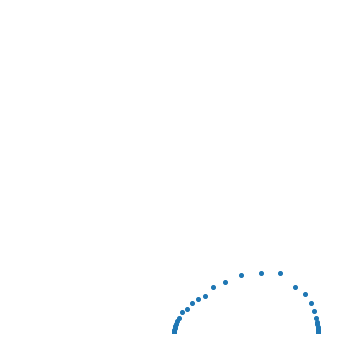

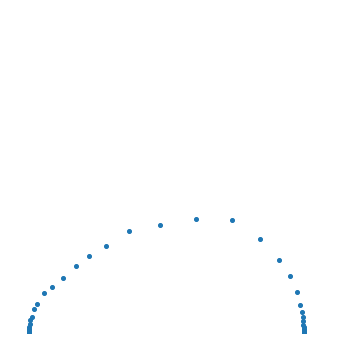

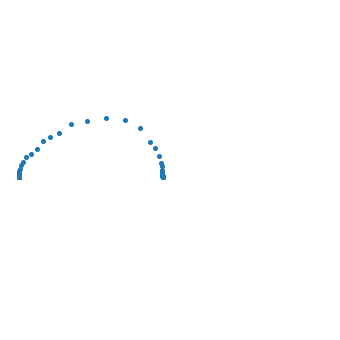

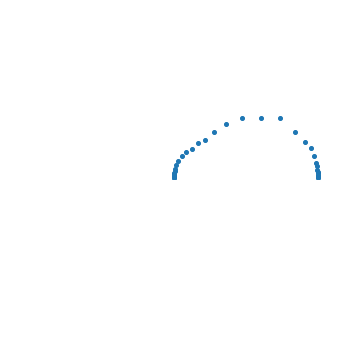

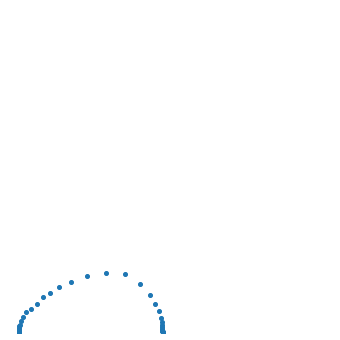

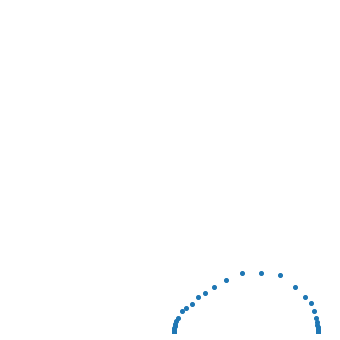

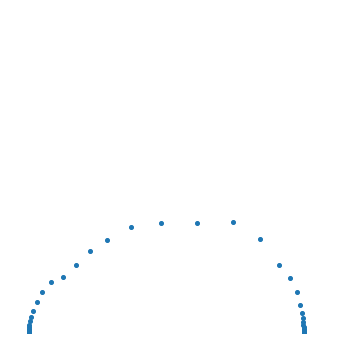

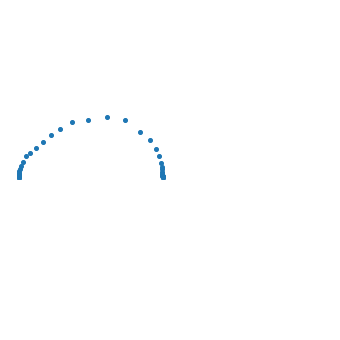

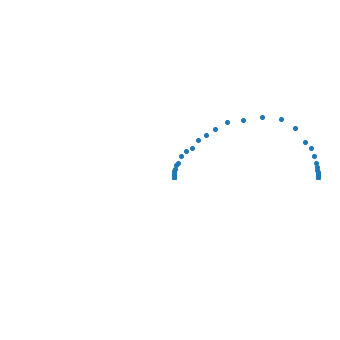

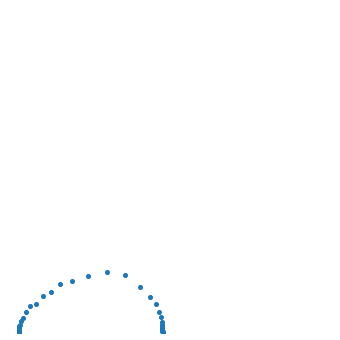

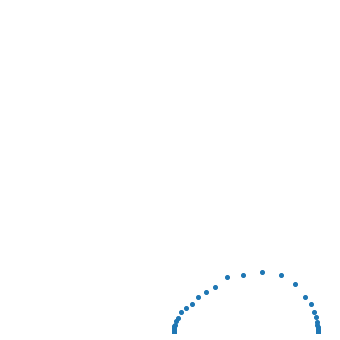

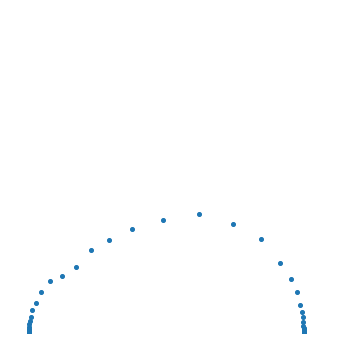

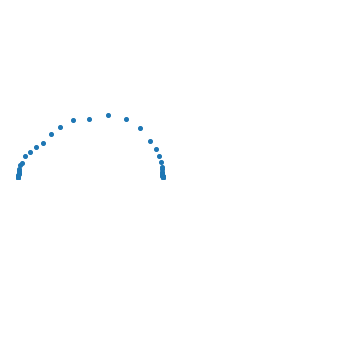

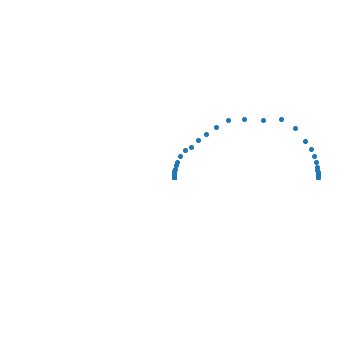

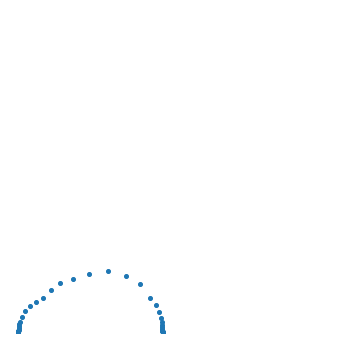

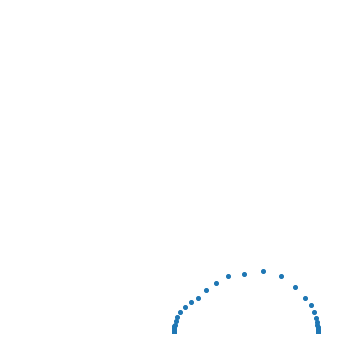

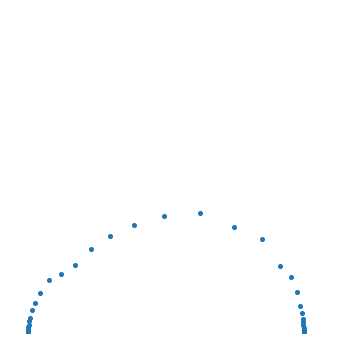

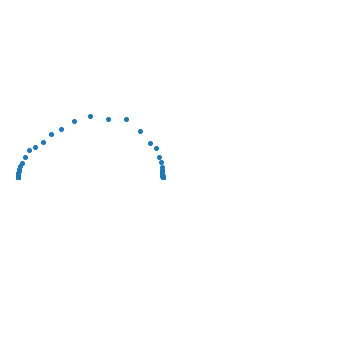

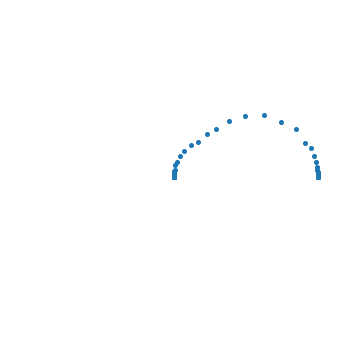

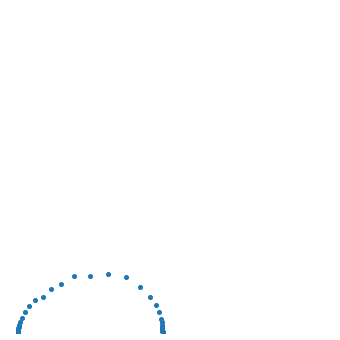

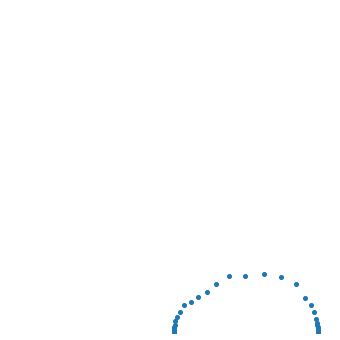

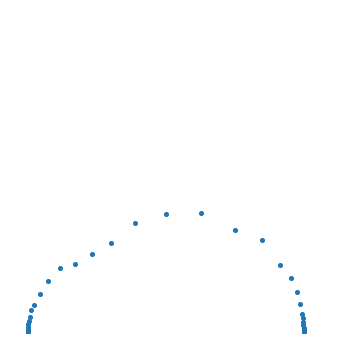

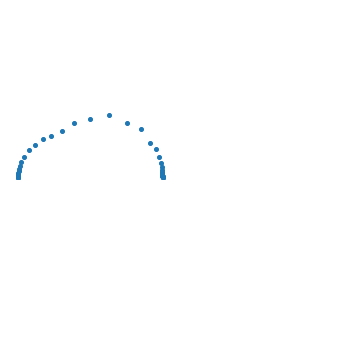

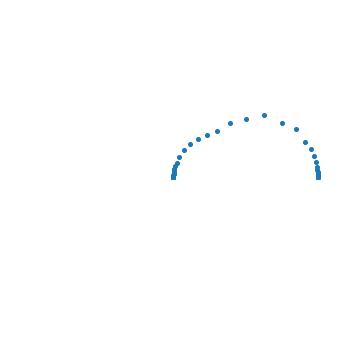

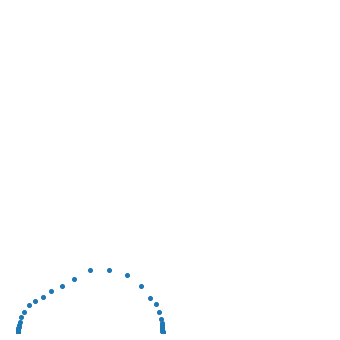

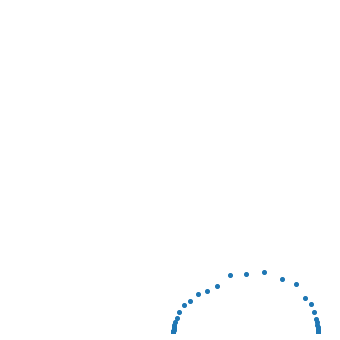

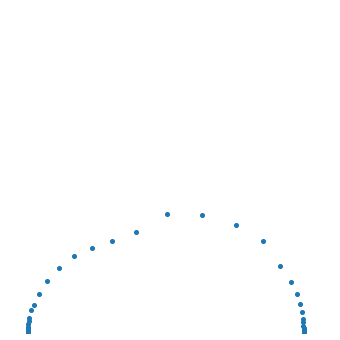

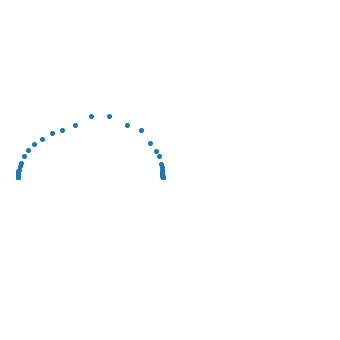

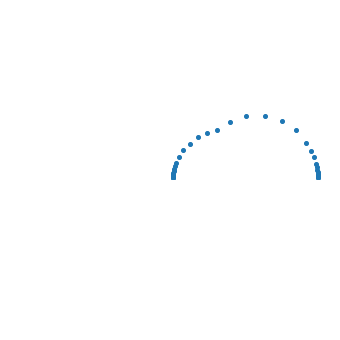

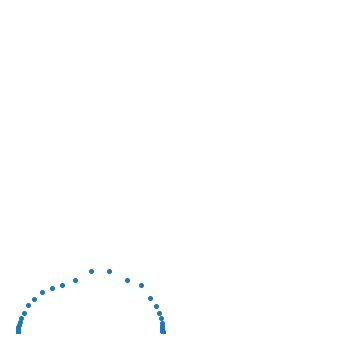

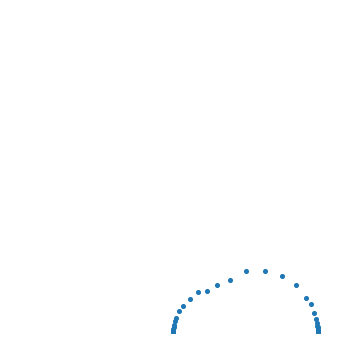

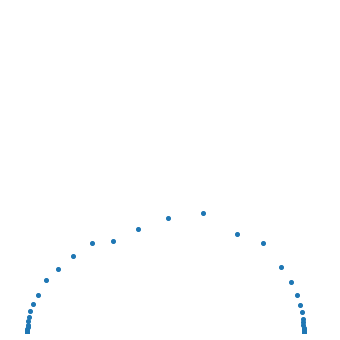

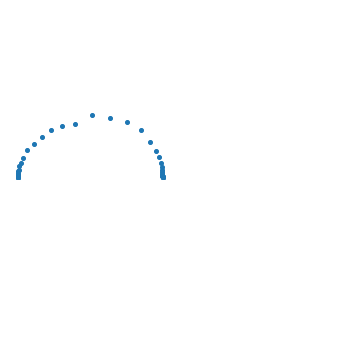

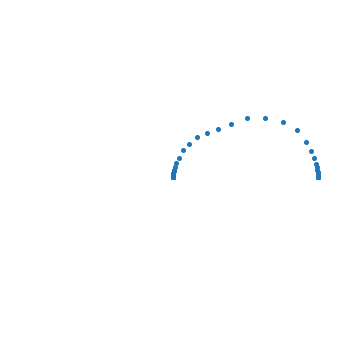

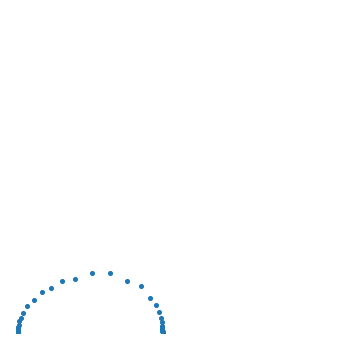

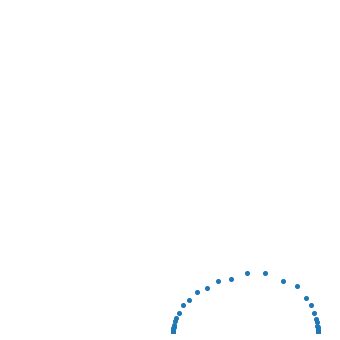

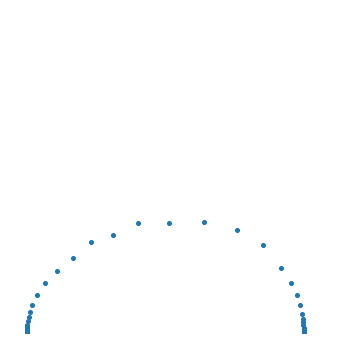

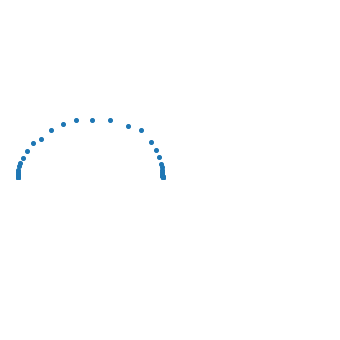

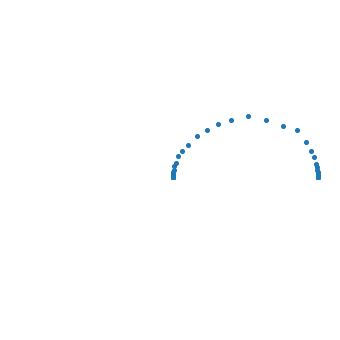

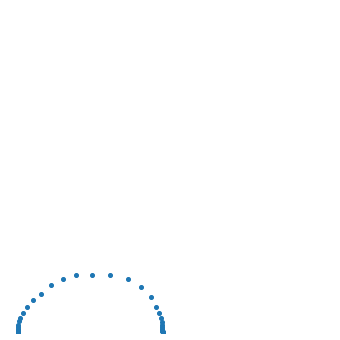

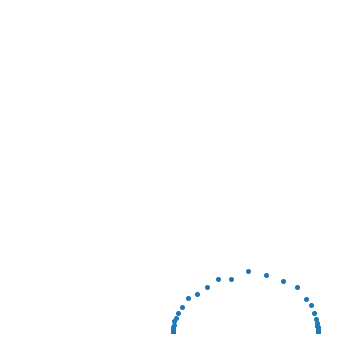

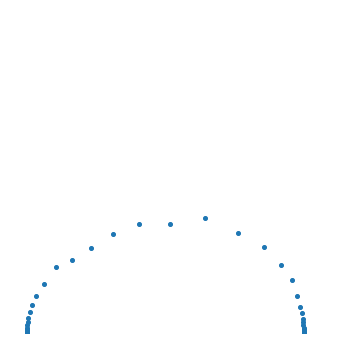

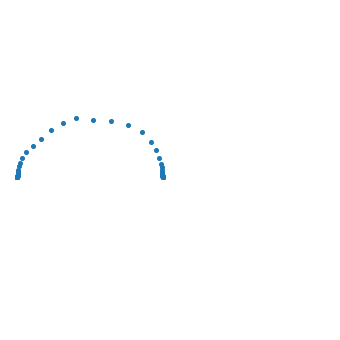

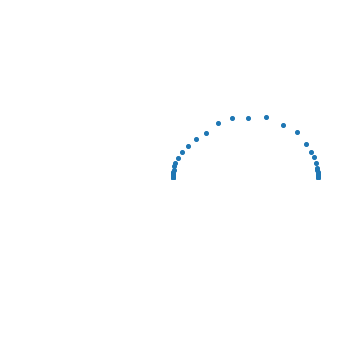

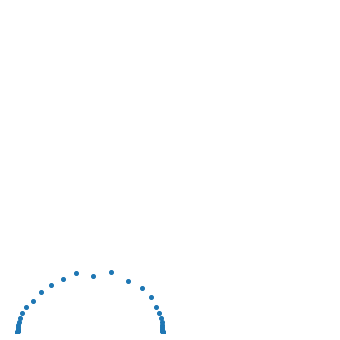

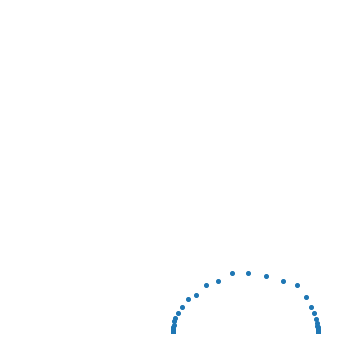

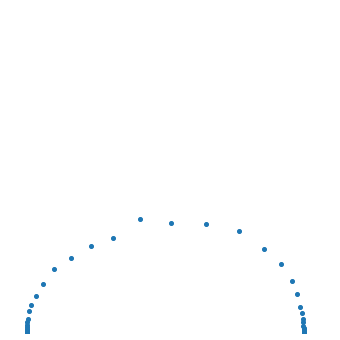

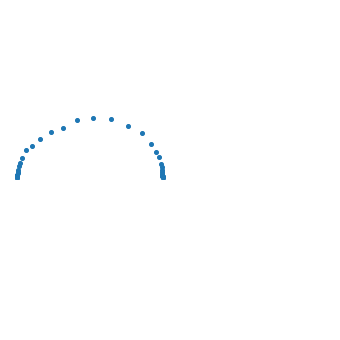

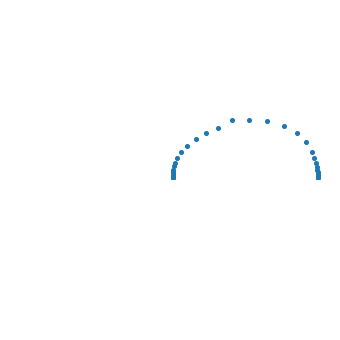

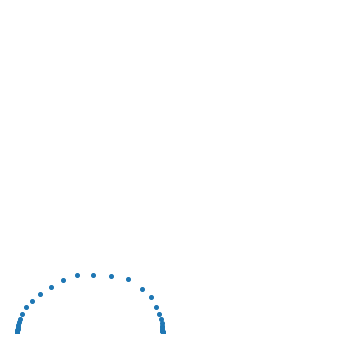

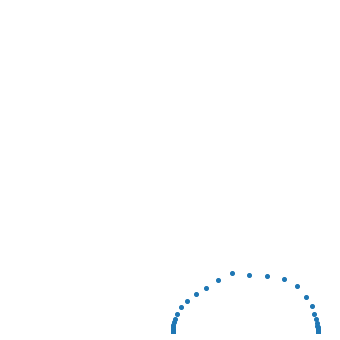

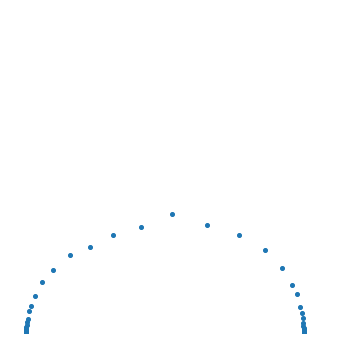

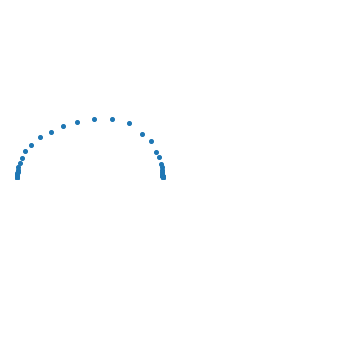

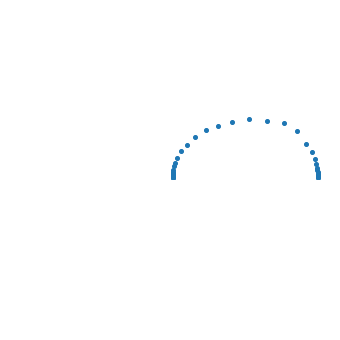

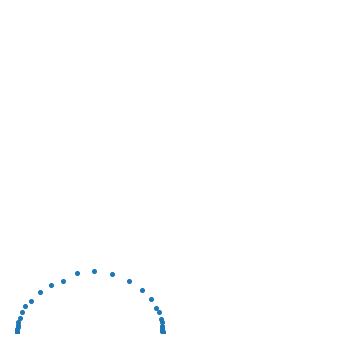

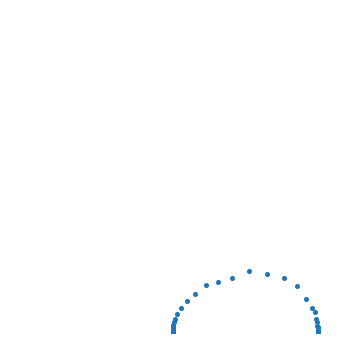

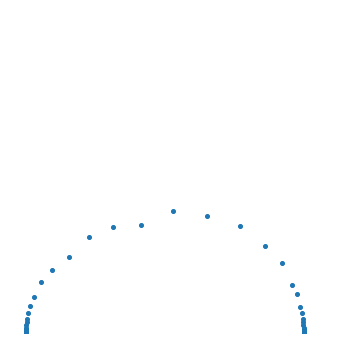

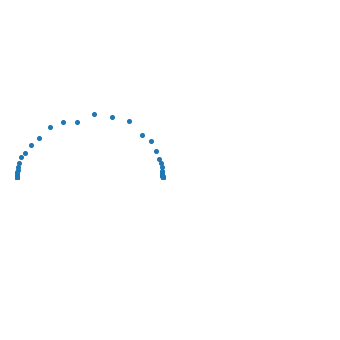

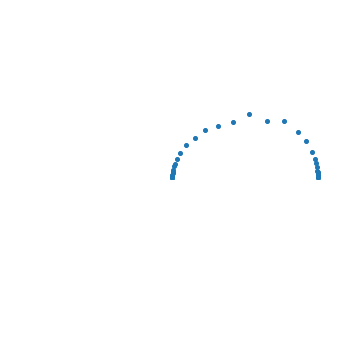

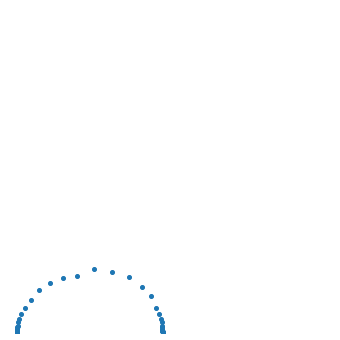

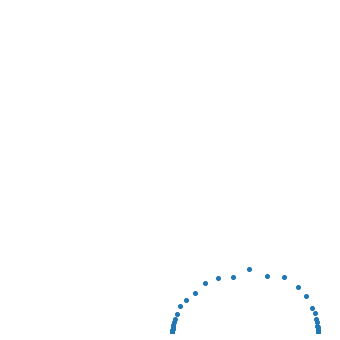

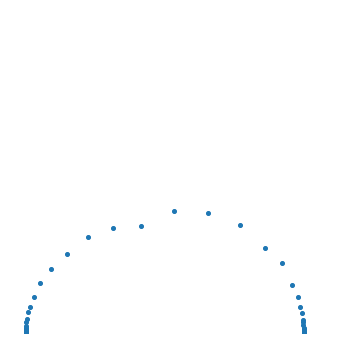

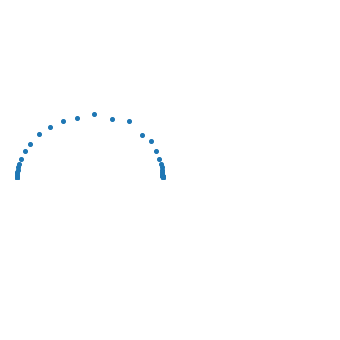

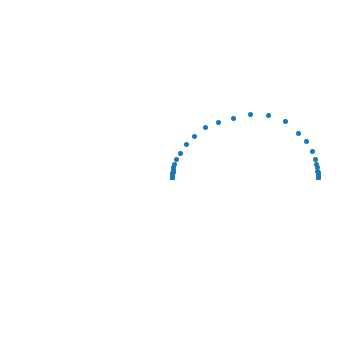

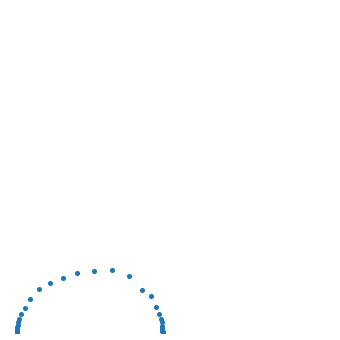

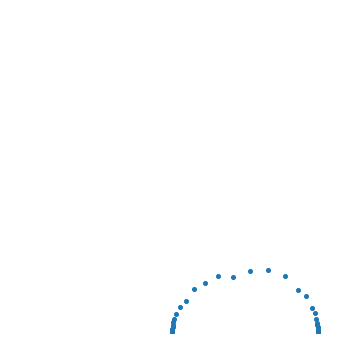

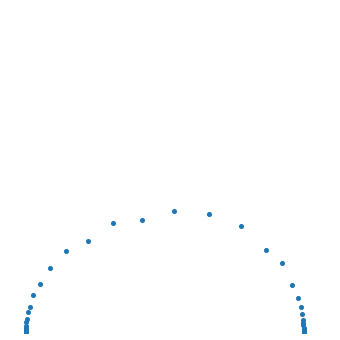

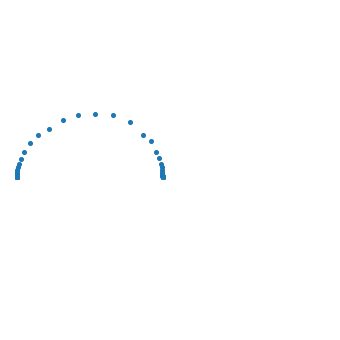

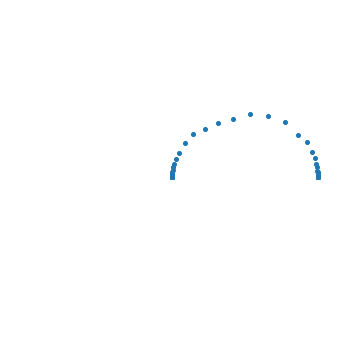

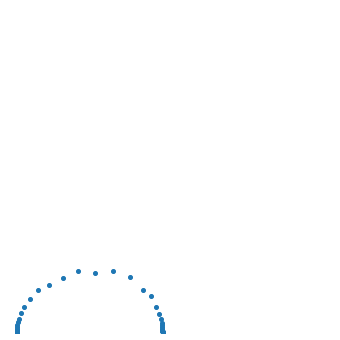

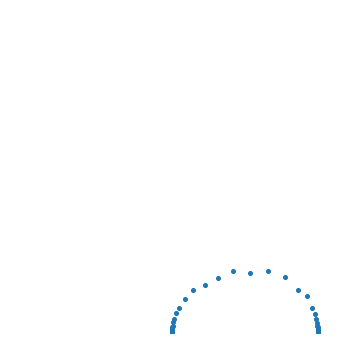

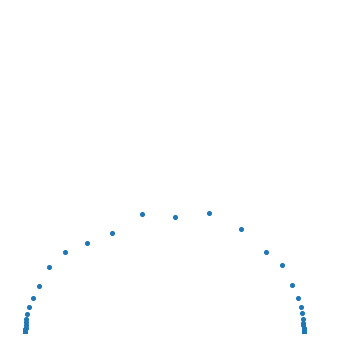

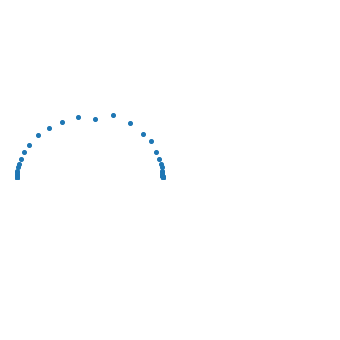

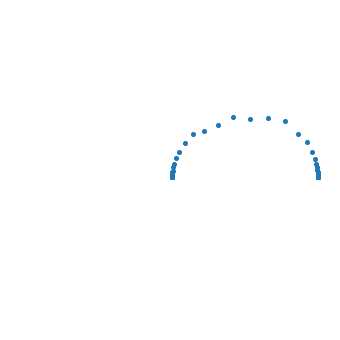

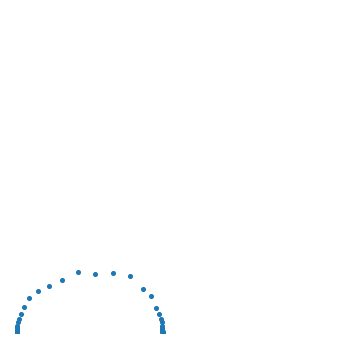

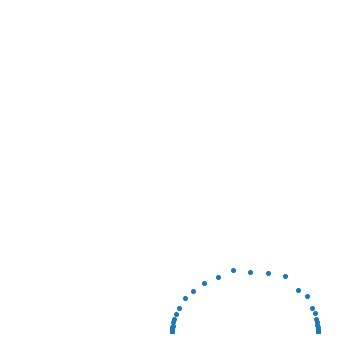

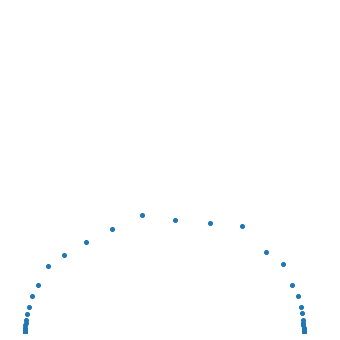

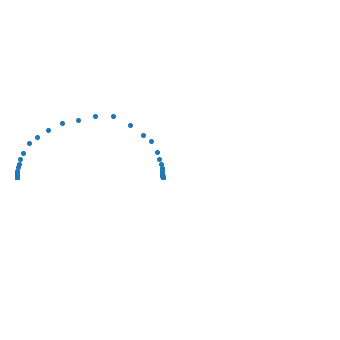

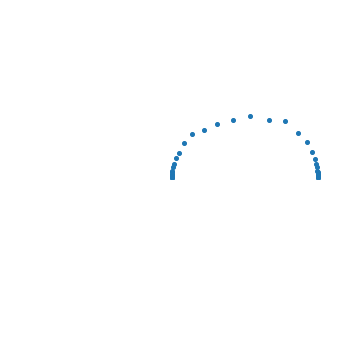

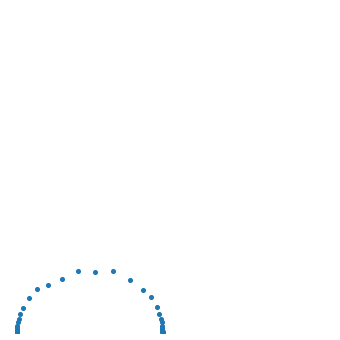

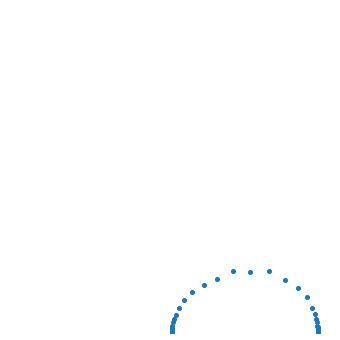

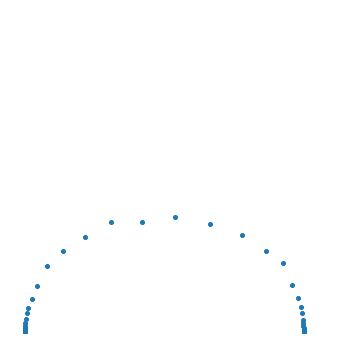

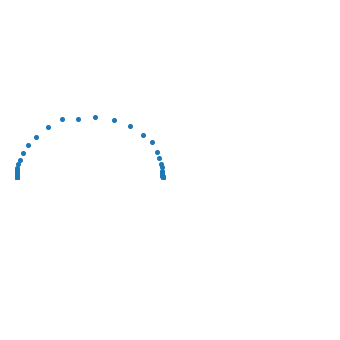

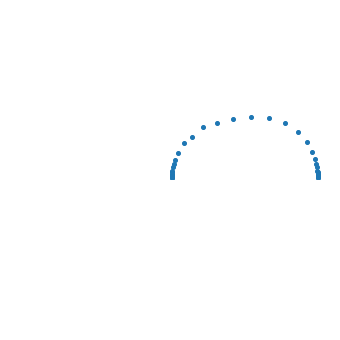

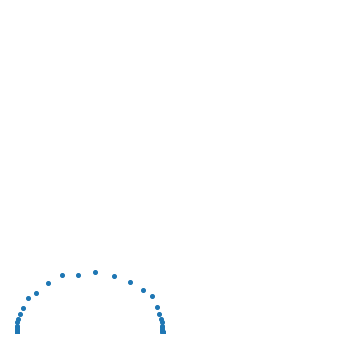

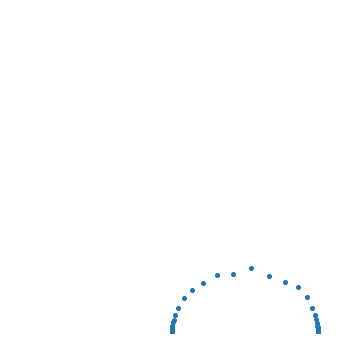

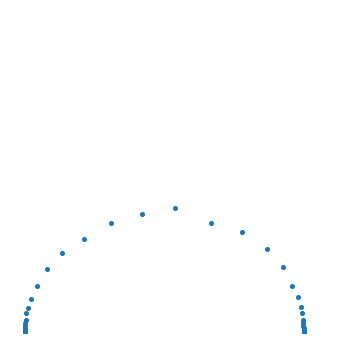

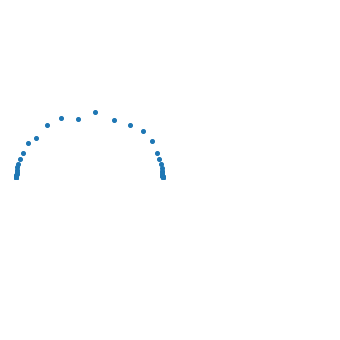

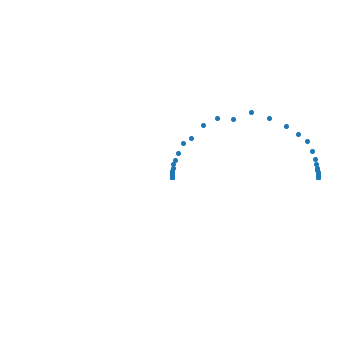

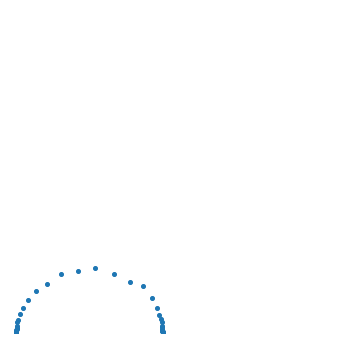

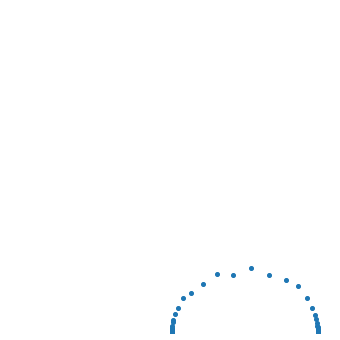

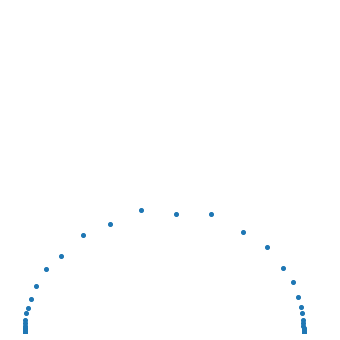

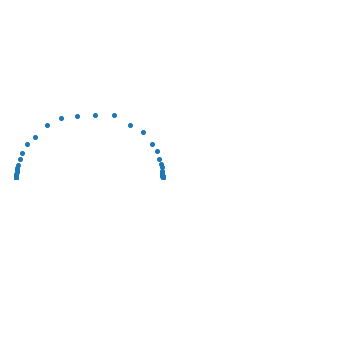

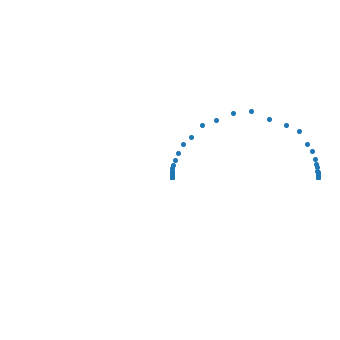

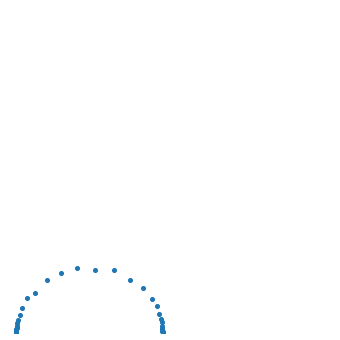

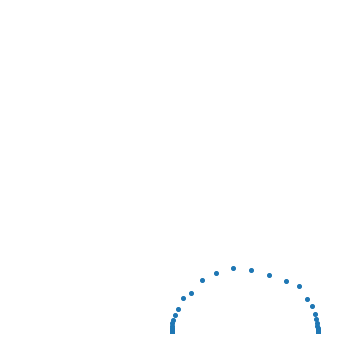

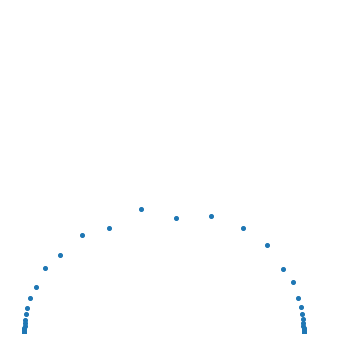

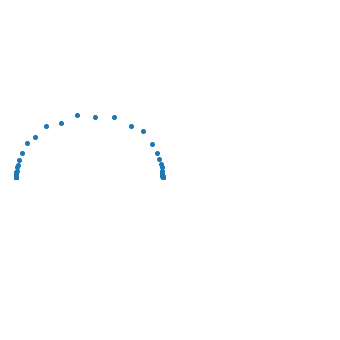

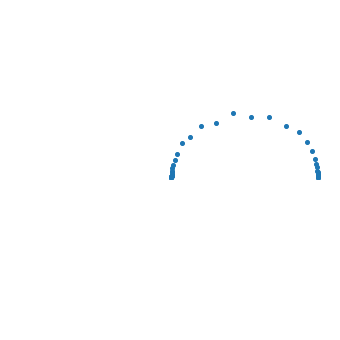

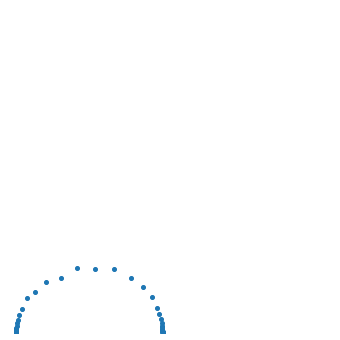

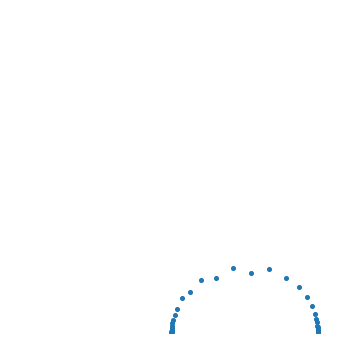

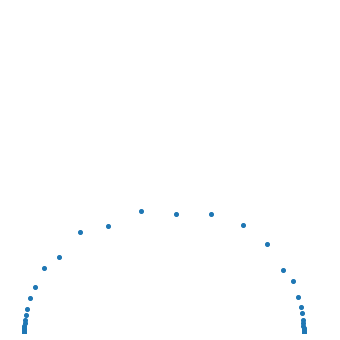

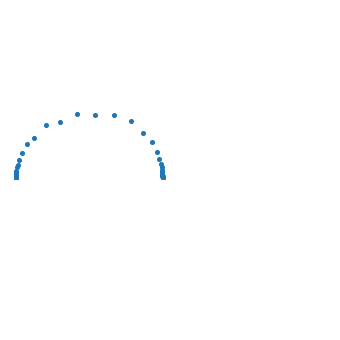

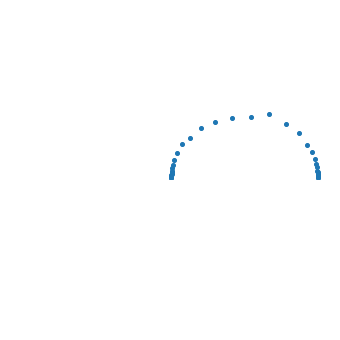

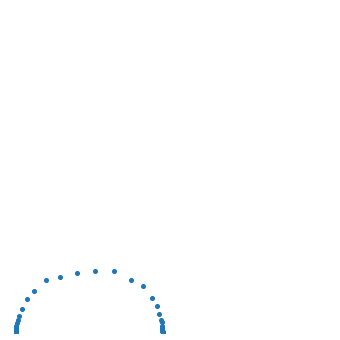

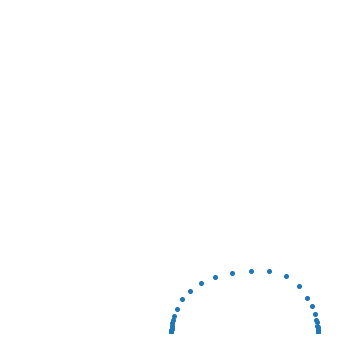

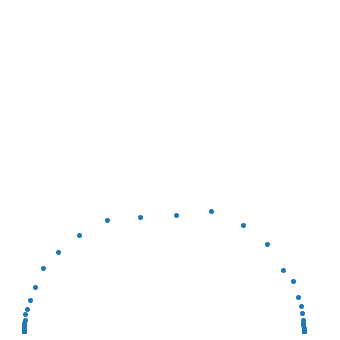

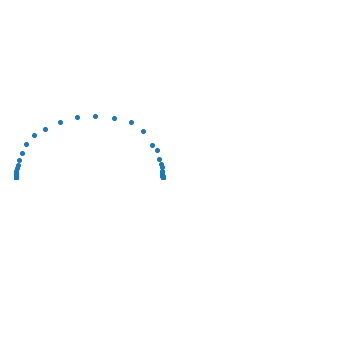

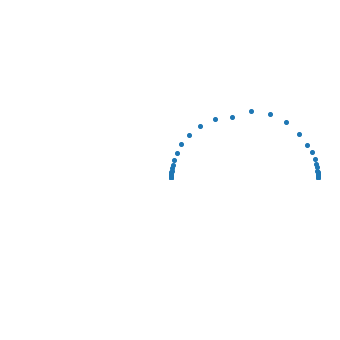

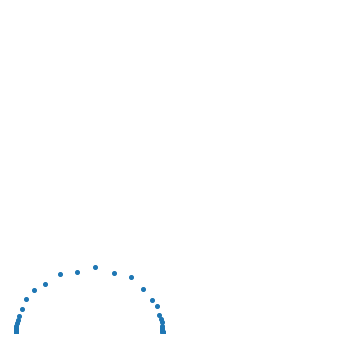

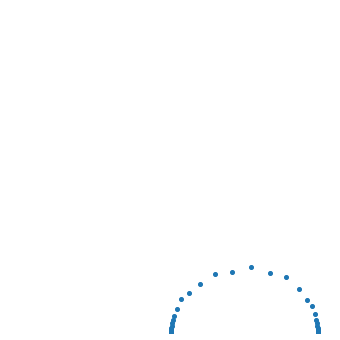

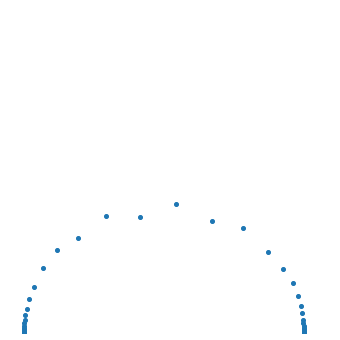

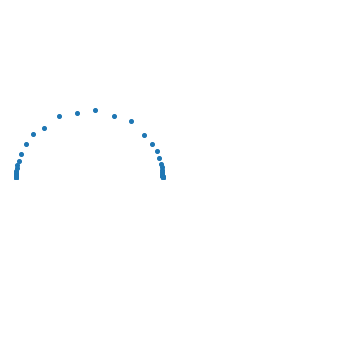

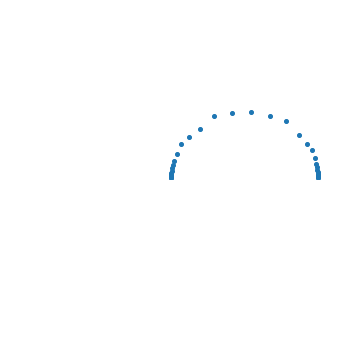

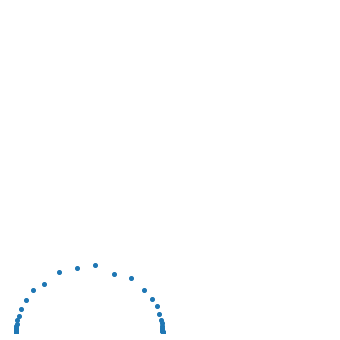

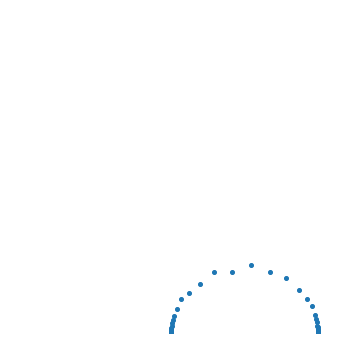

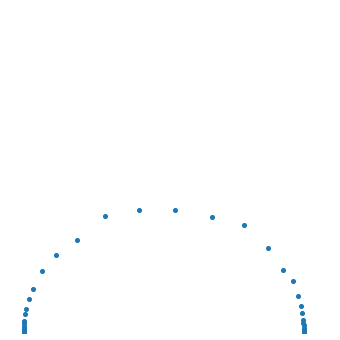

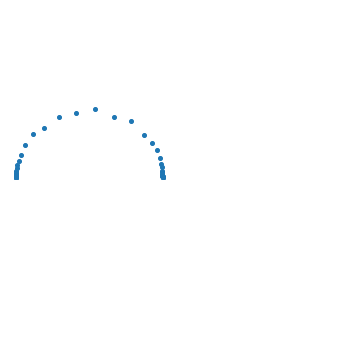

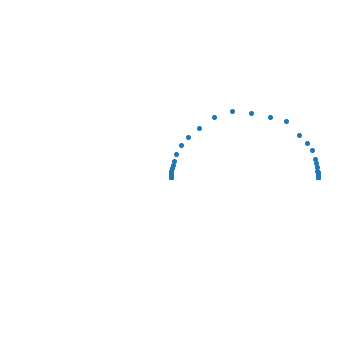

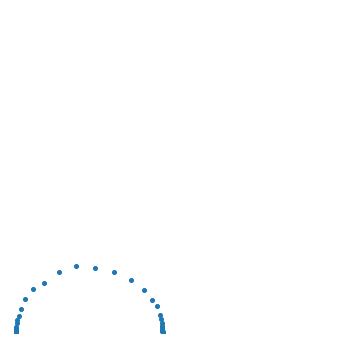

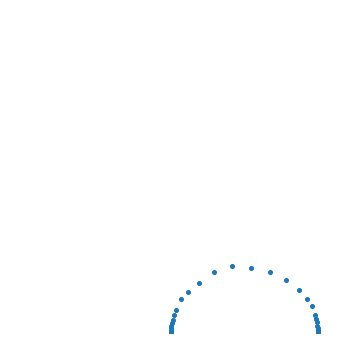

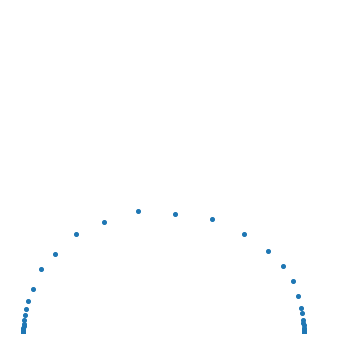

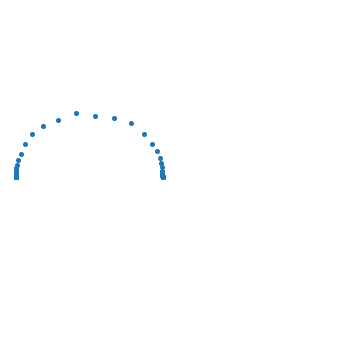

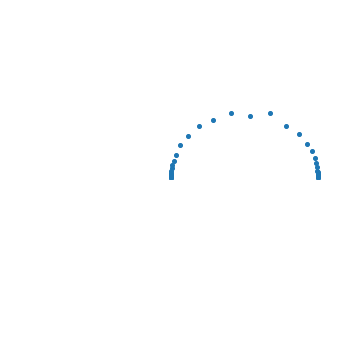

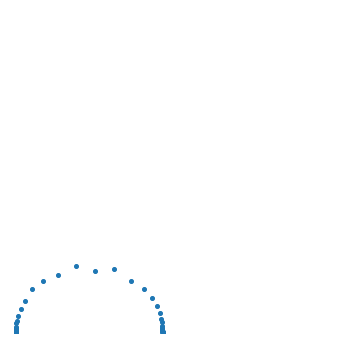

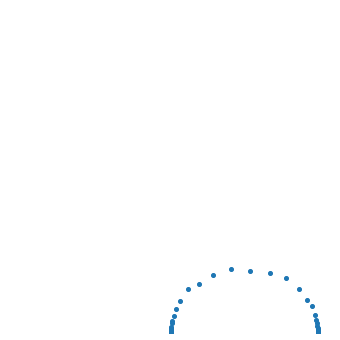

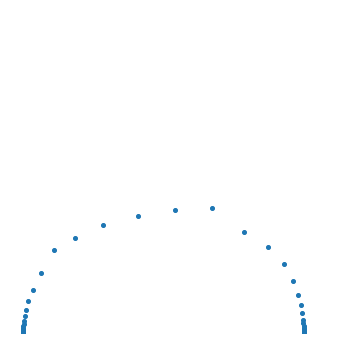

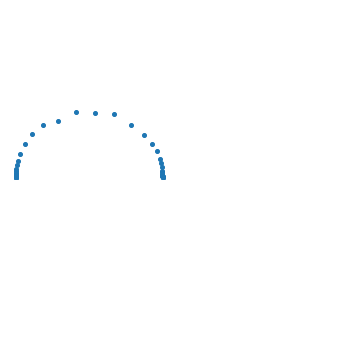

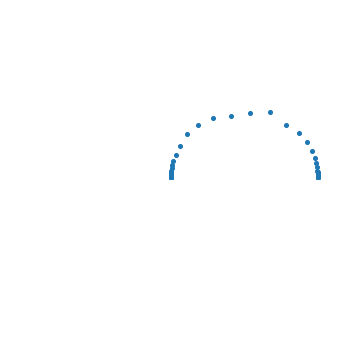

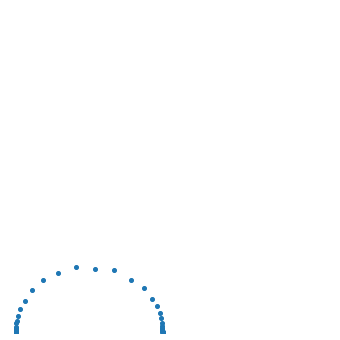

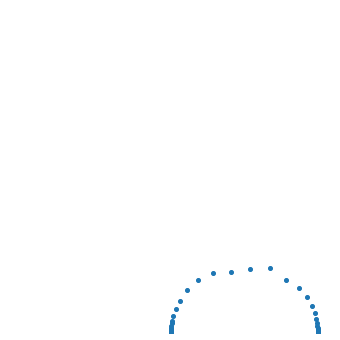

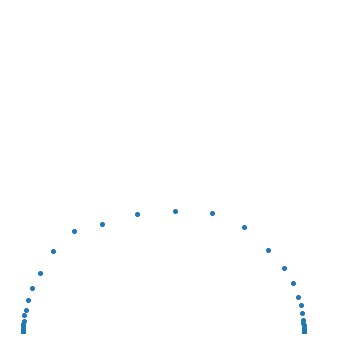

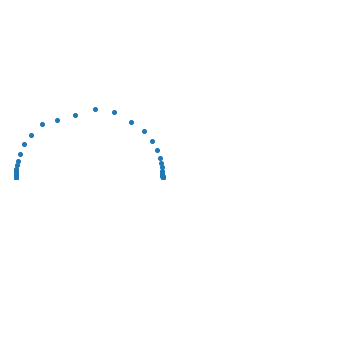

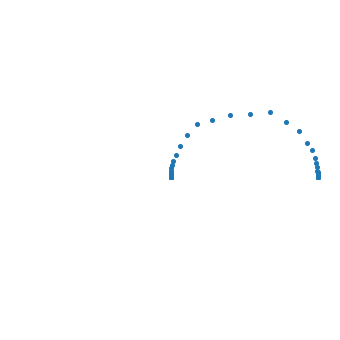

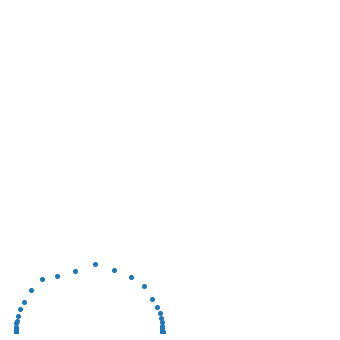

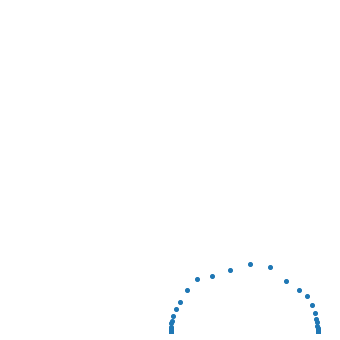

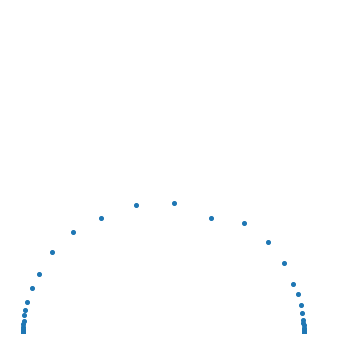

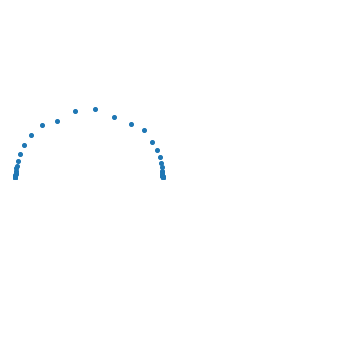

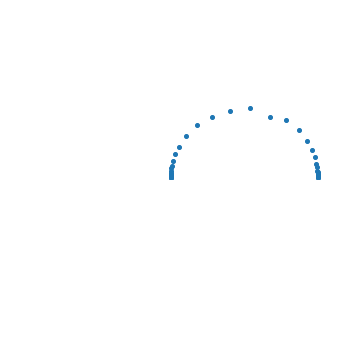

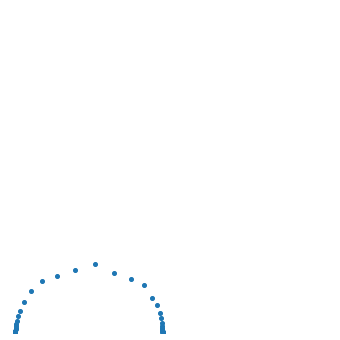

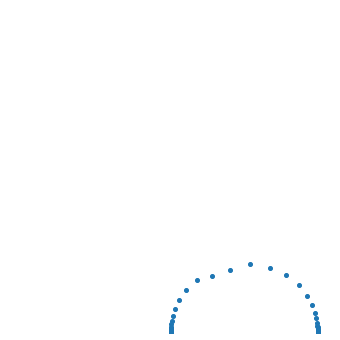

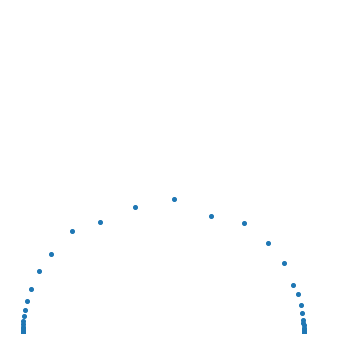

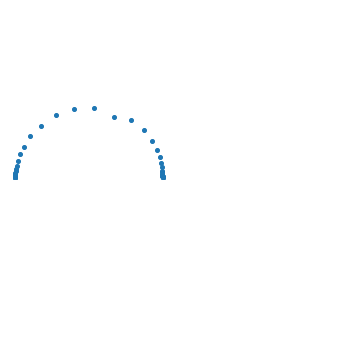

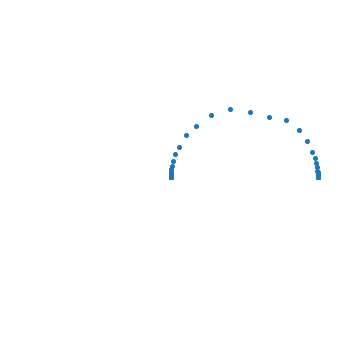

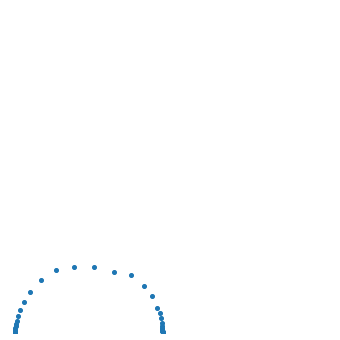

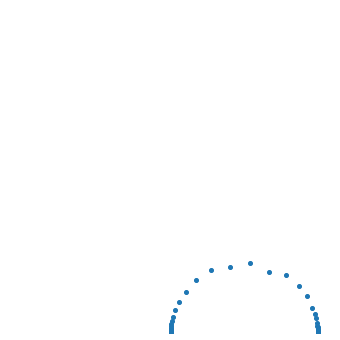

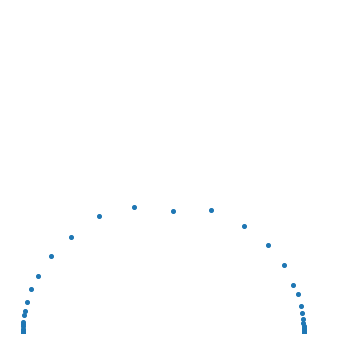

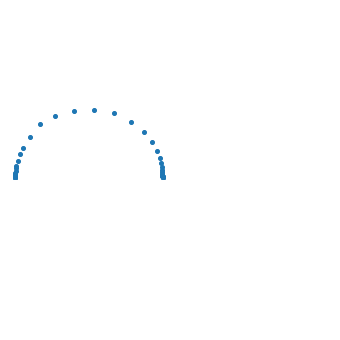

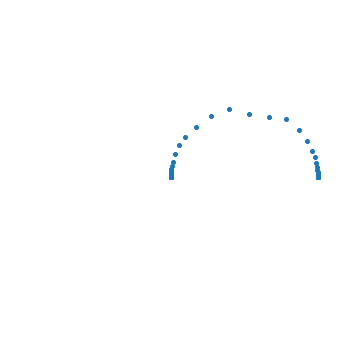

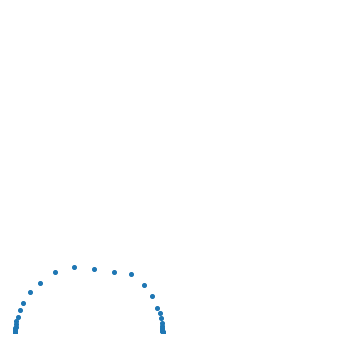

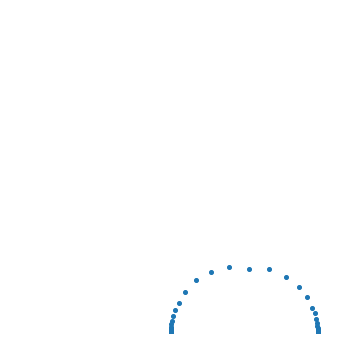

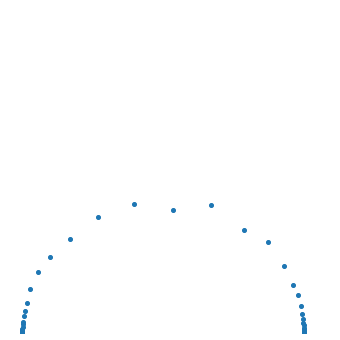

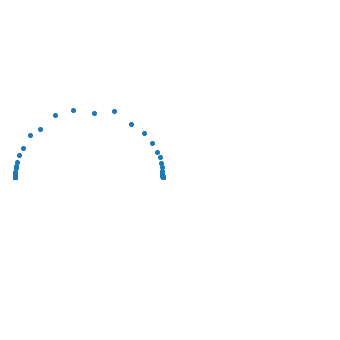

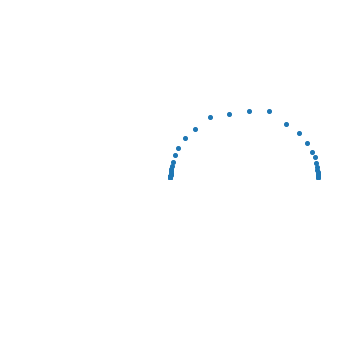

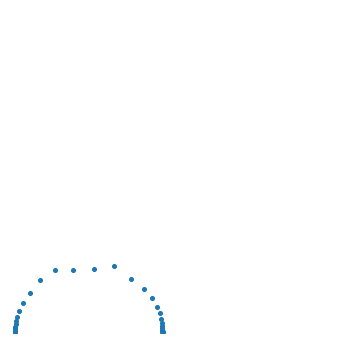

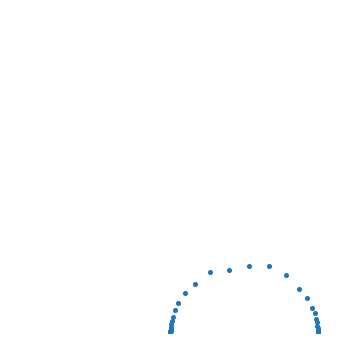

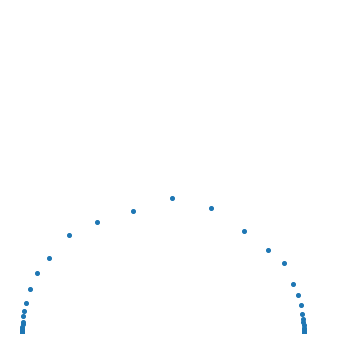

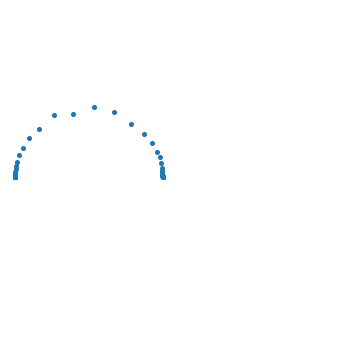

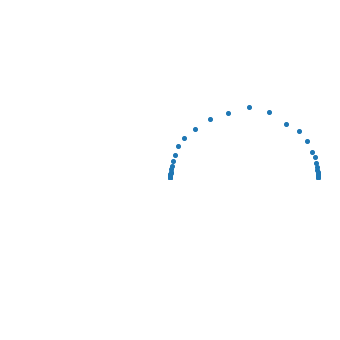

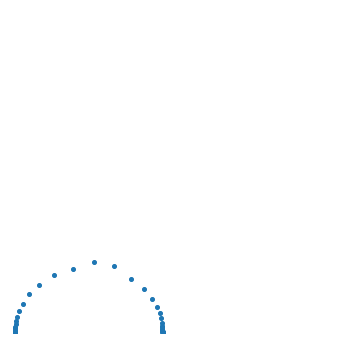

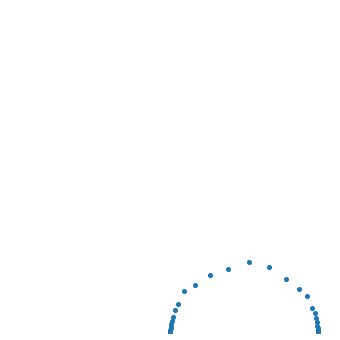

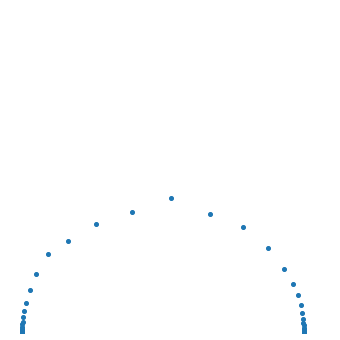

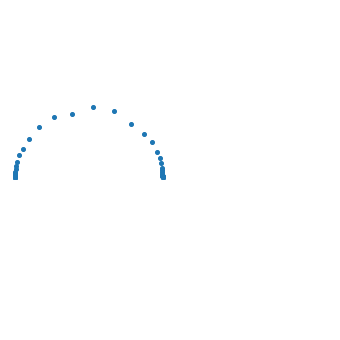

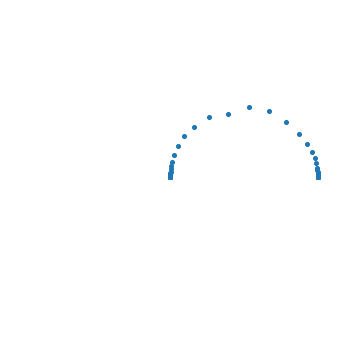

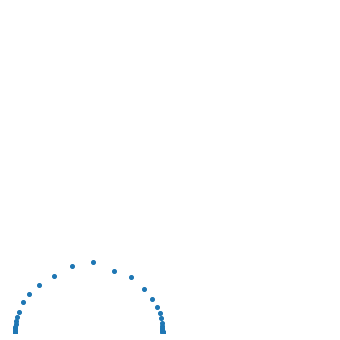

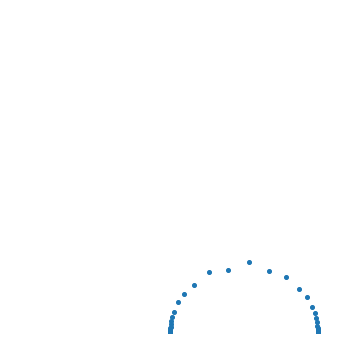

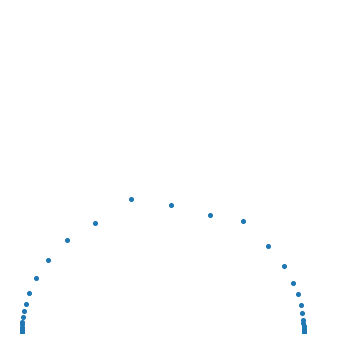

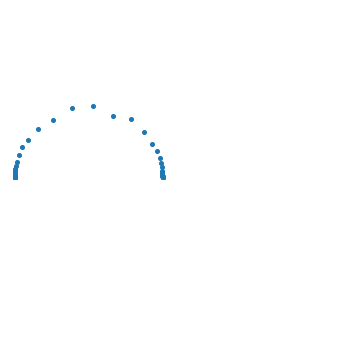

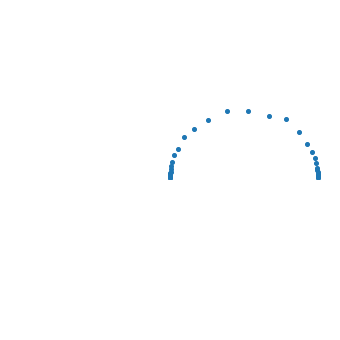

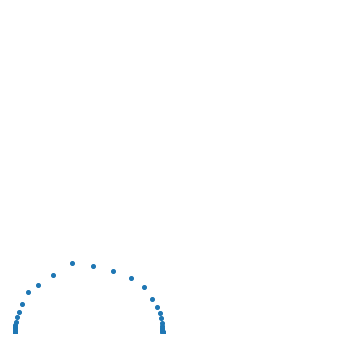

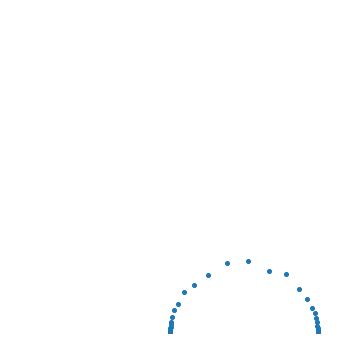

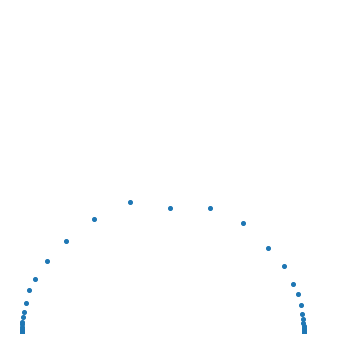

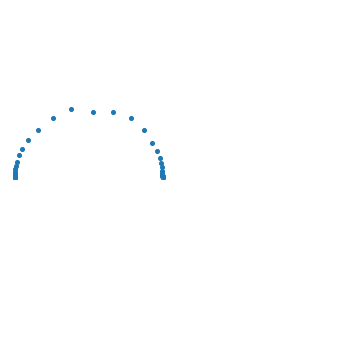

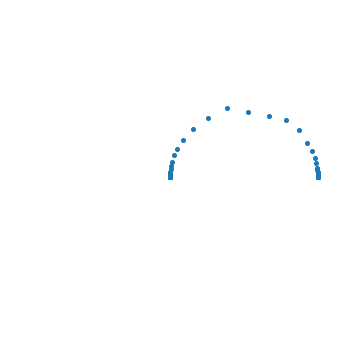

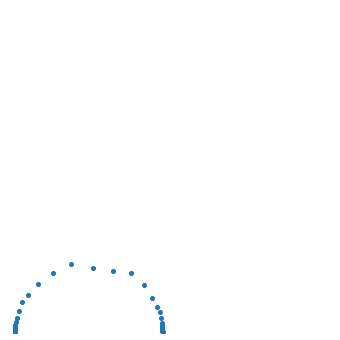

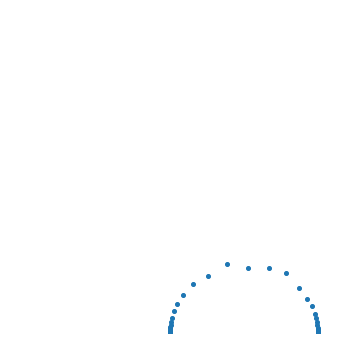

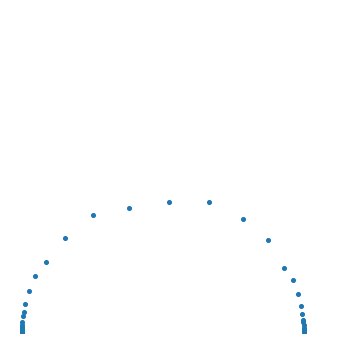

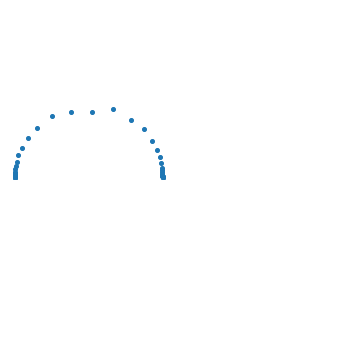

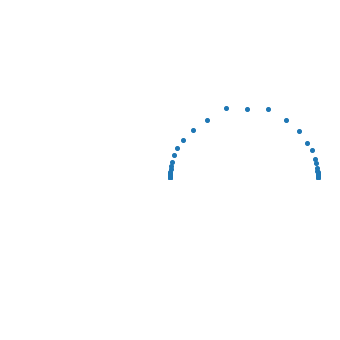

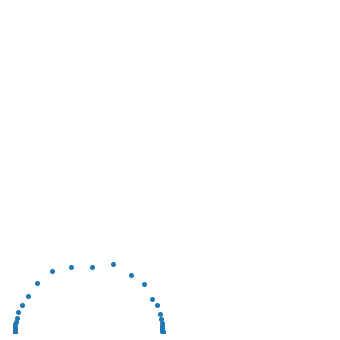

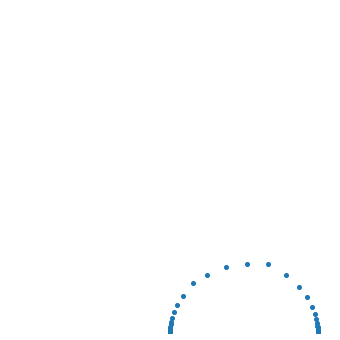

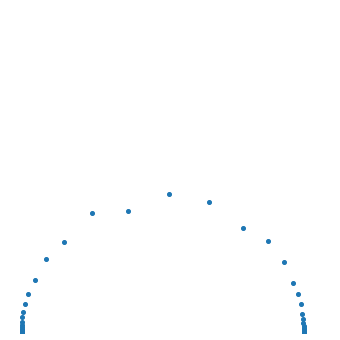

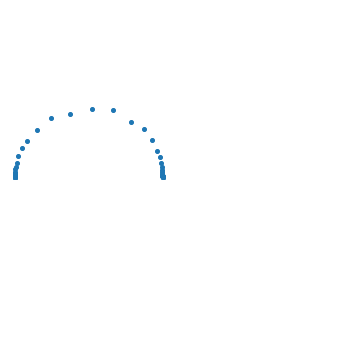

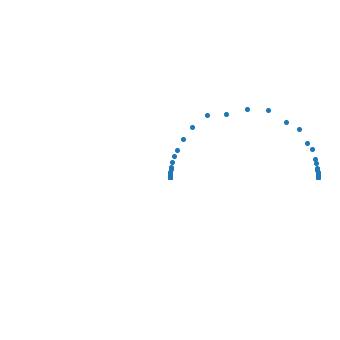

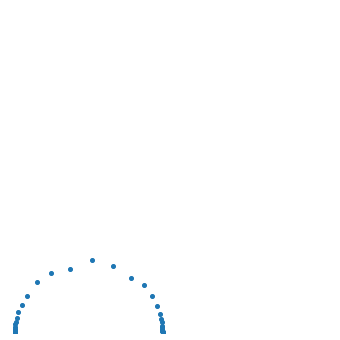

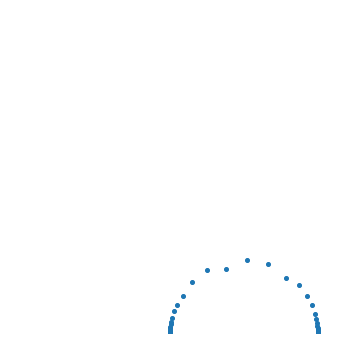

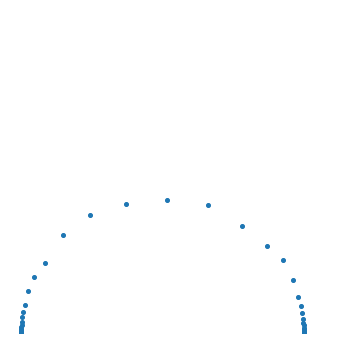

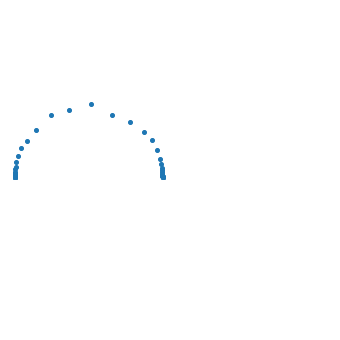

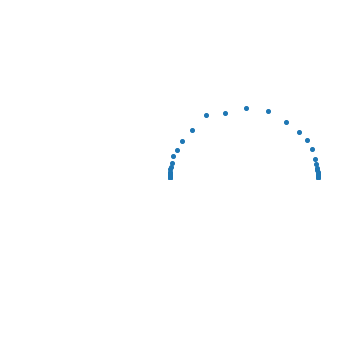

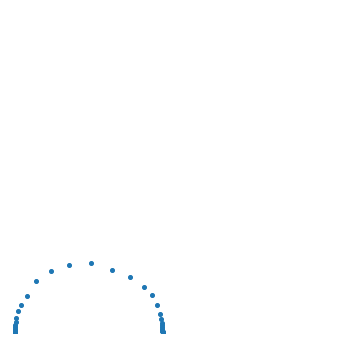

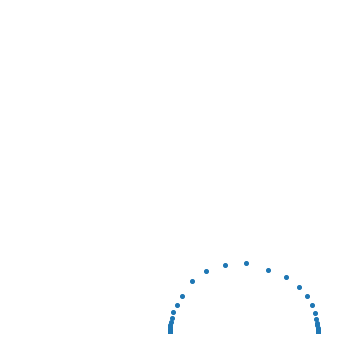

In [16]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 25E-6 #F
R2= 100   # ohm
R1= 10   # ohm
resistance= np.linspace(1,100,50, dtype= int, endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RsRCRC_file_writer(f_start, f_stop, decades, Rs, R1,C, R2,2*C, alteration='noise', noisescale=0.05, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)
#     circuit = circuits.cir_RsRCRC(f_range[1], Rs, R1,C, R2,10*C)
#     circuit_array = data_simulation.impedance_array(circuit)
#     response= data_simulation.RsRCRC_simulation(f_start, f_stop, decades, Rs, R1,C, R2,2*C, alteration='noise', noisescale=0.1)
#     plotting.nyquist_plot(response, 'shifted_double_semicircle_1', alteration='noise',save_location='simulation_data/', save_image=False )

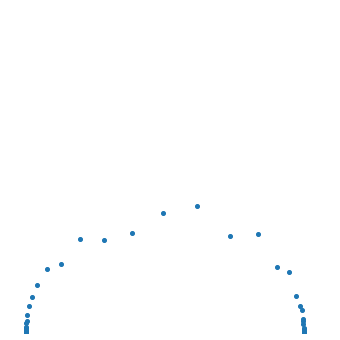

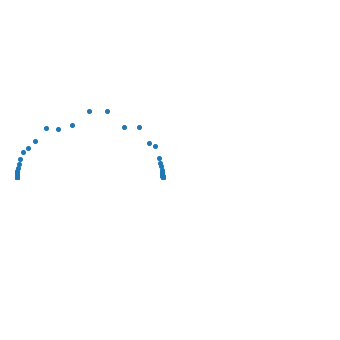

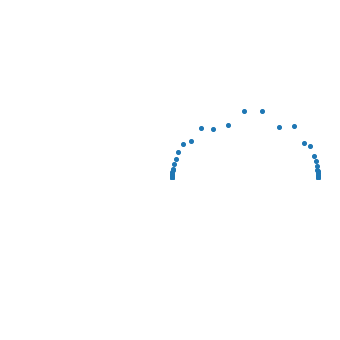

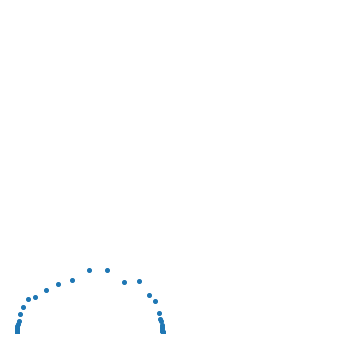

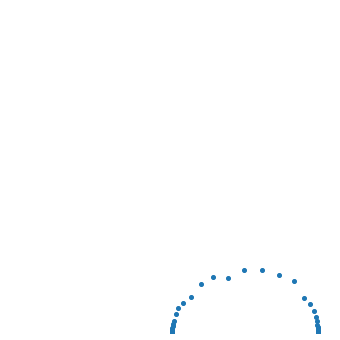

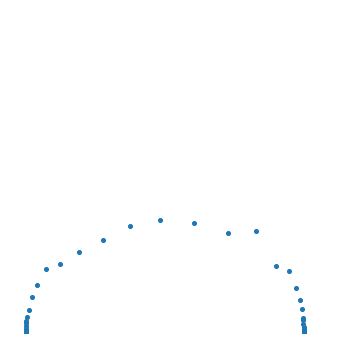

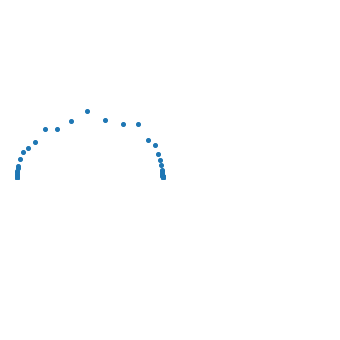

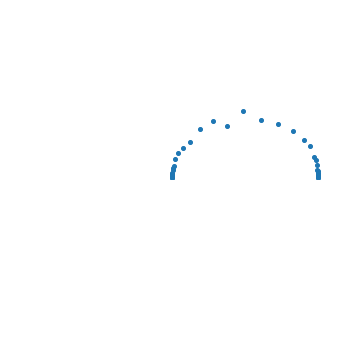

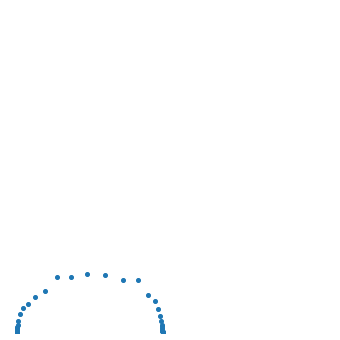

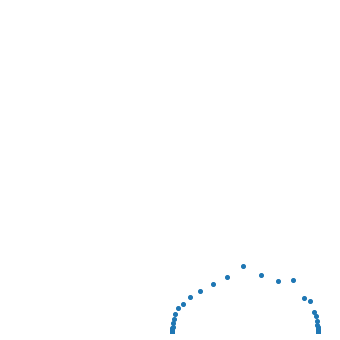

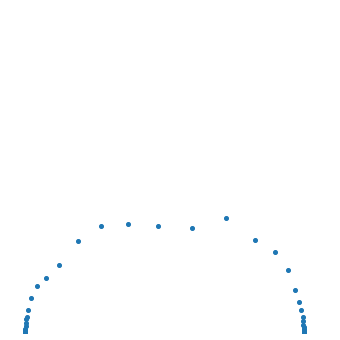

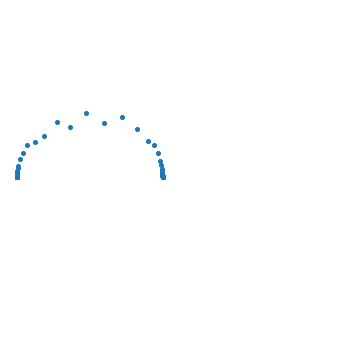

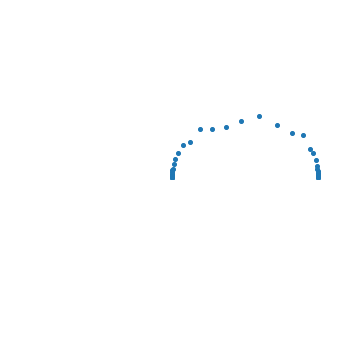

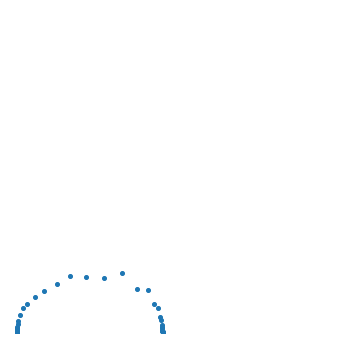

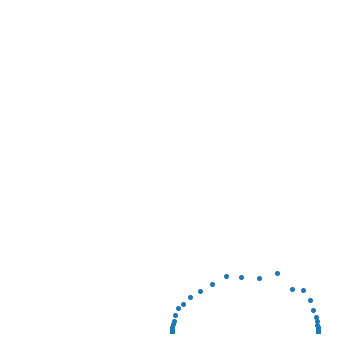

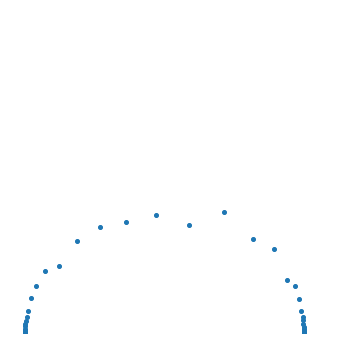

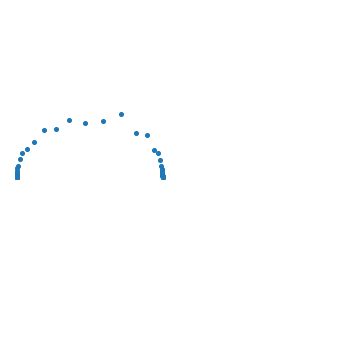

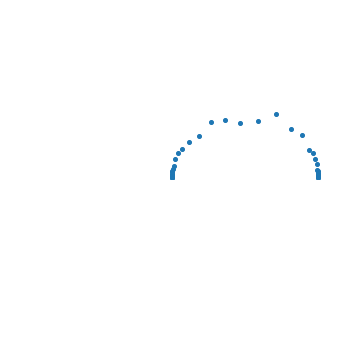

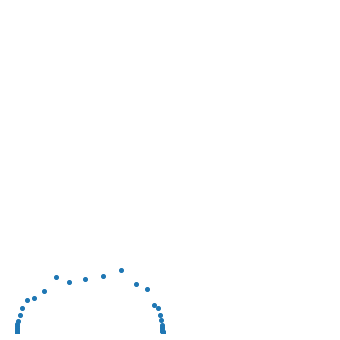

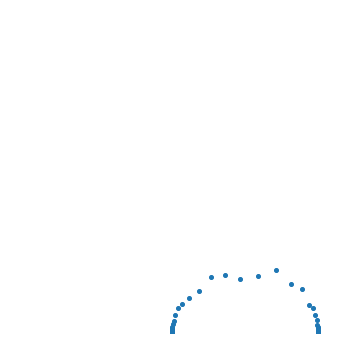

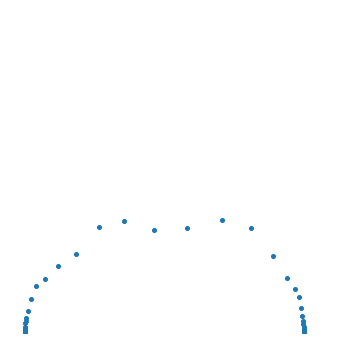

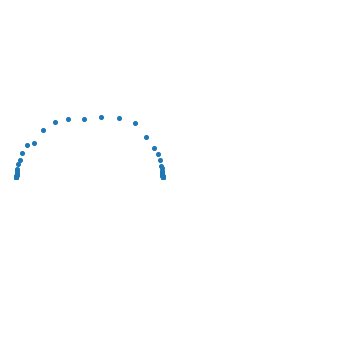

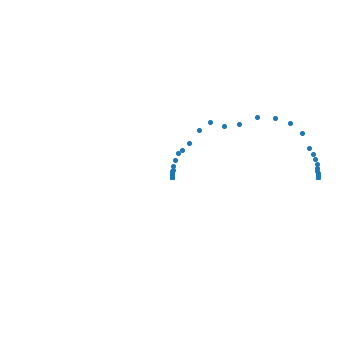

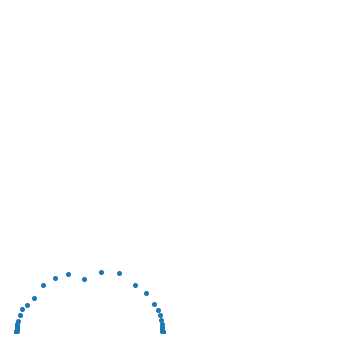

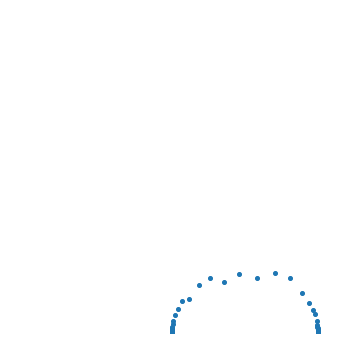

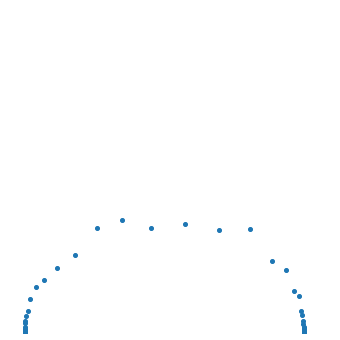

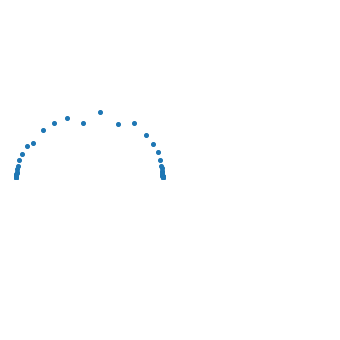

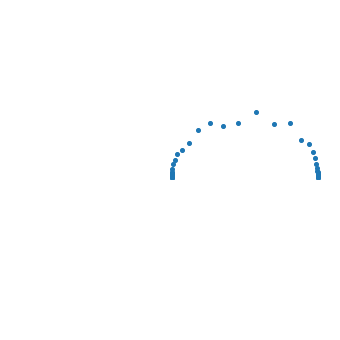

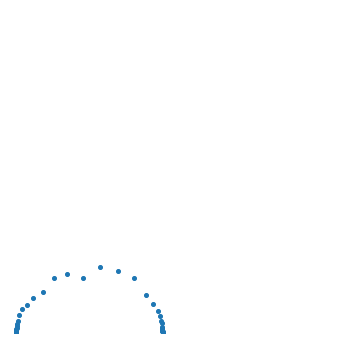

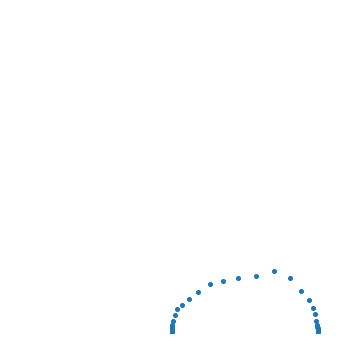

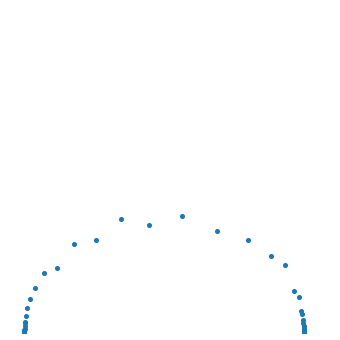

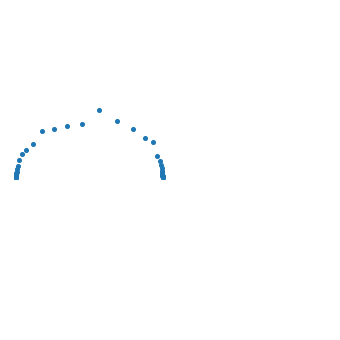

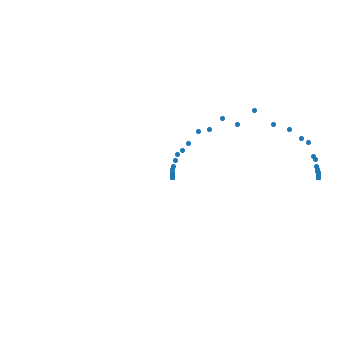

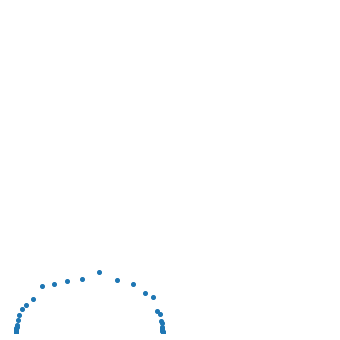

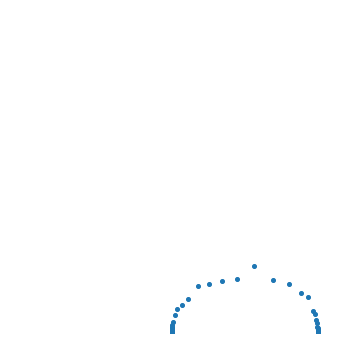

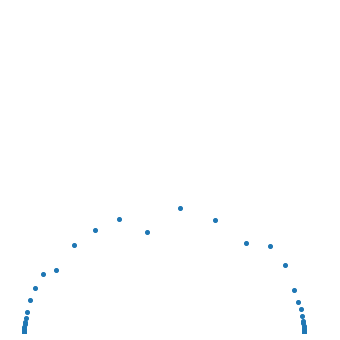

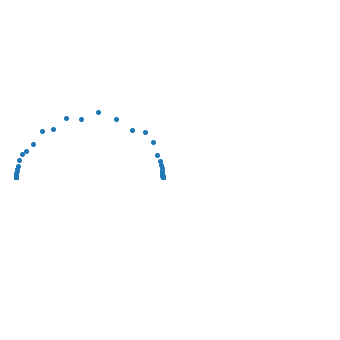

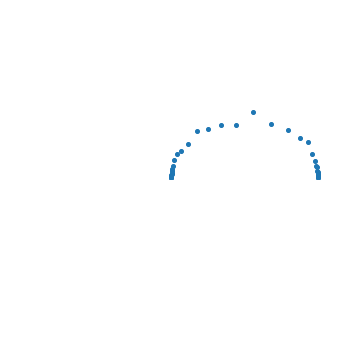

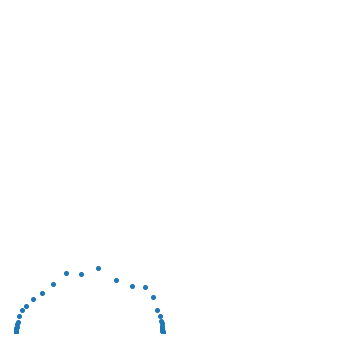

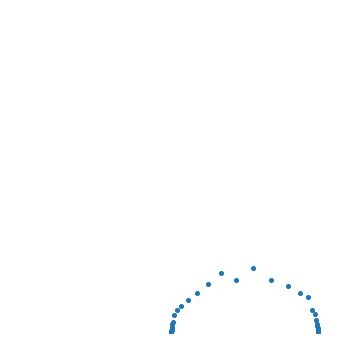

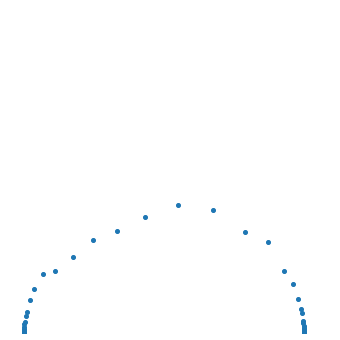

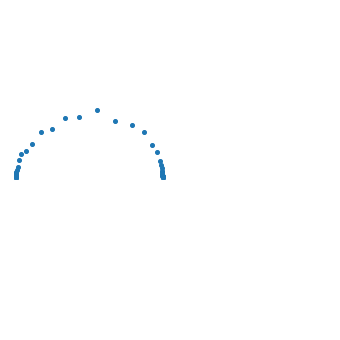

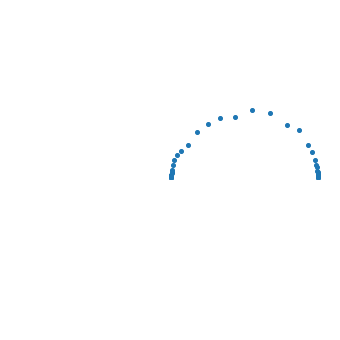

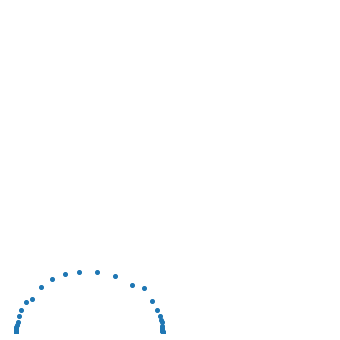

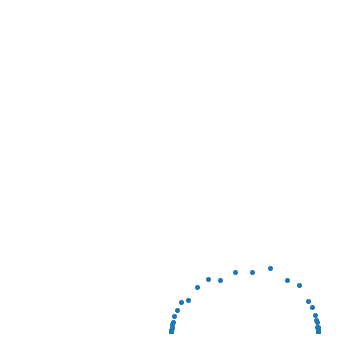

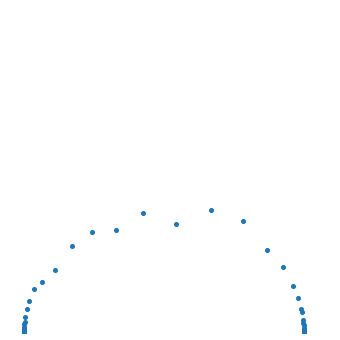

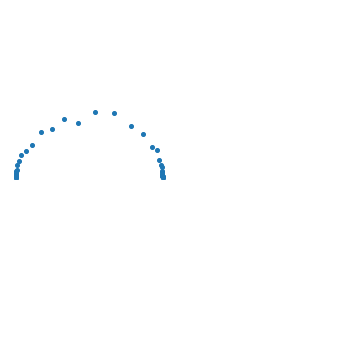

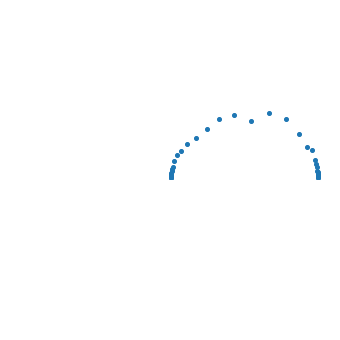

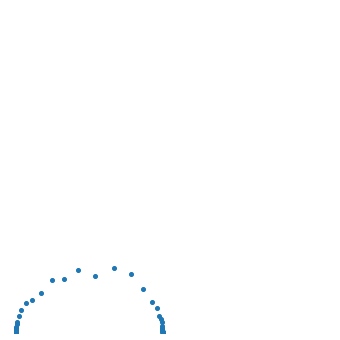

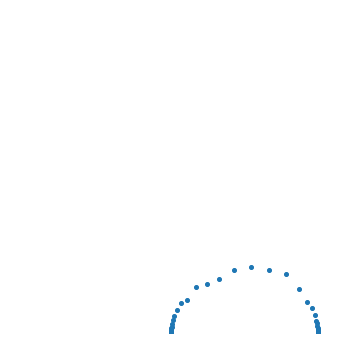

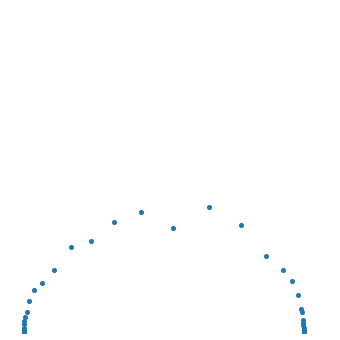

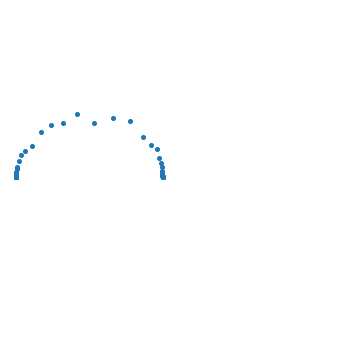

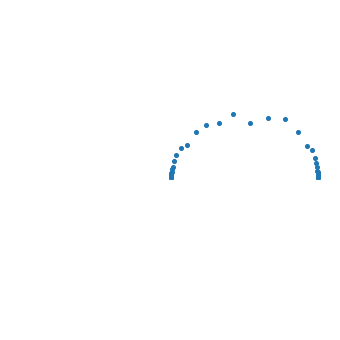

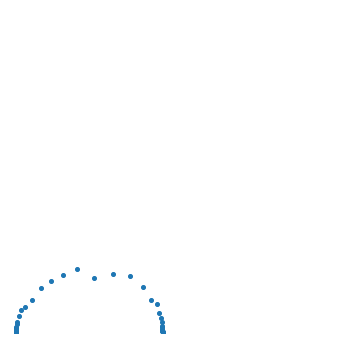

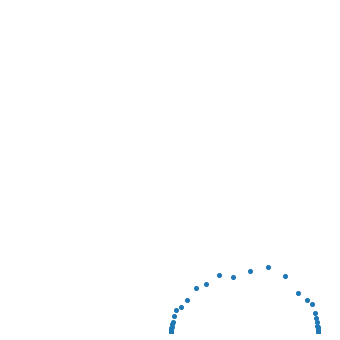

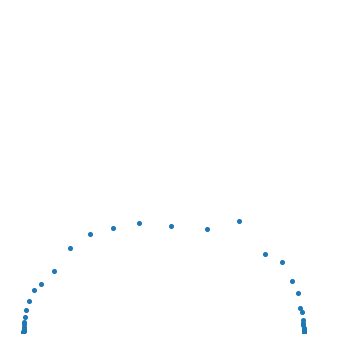

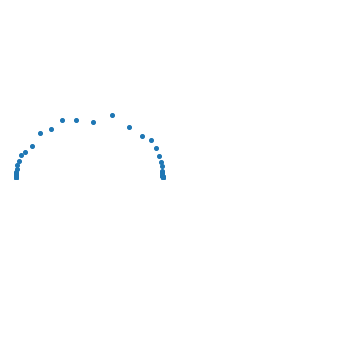

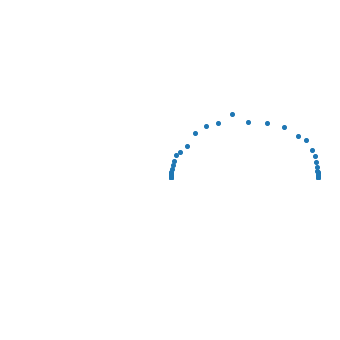

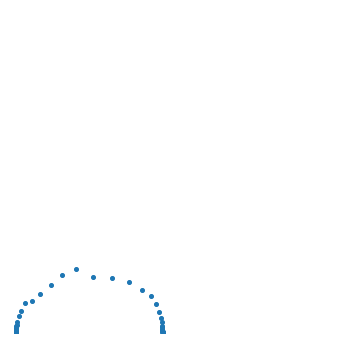

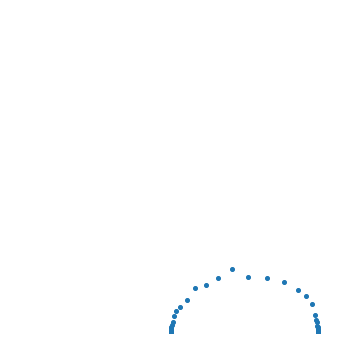

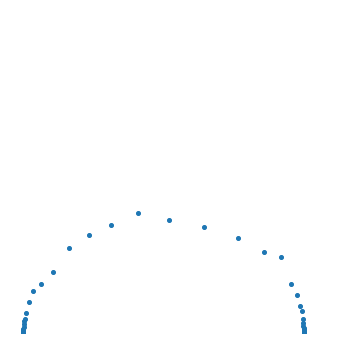

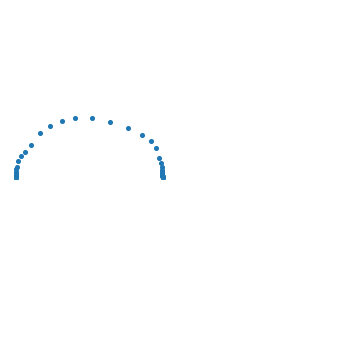

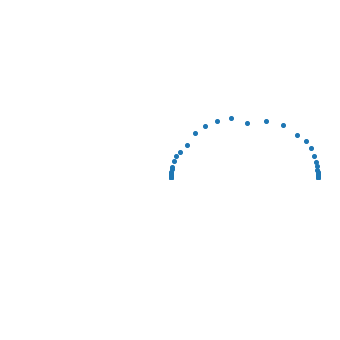

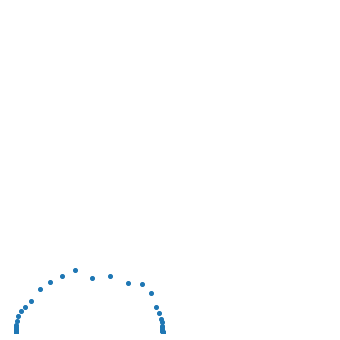

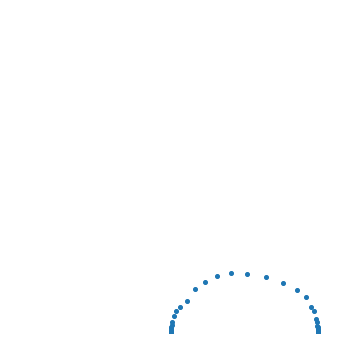

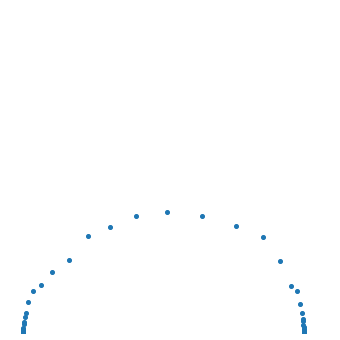

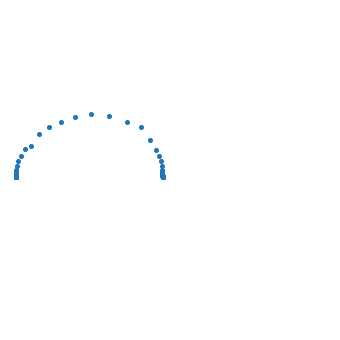

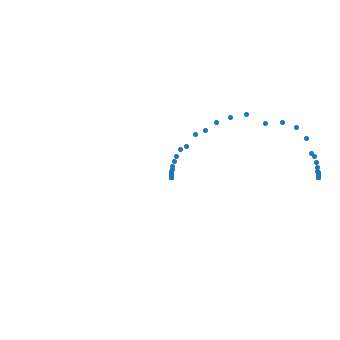

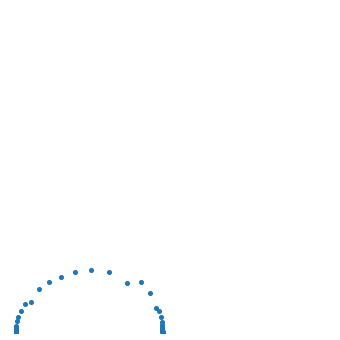

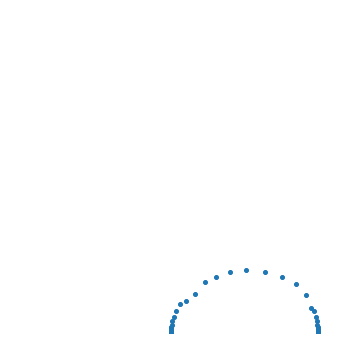

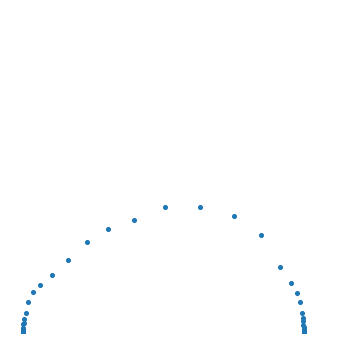

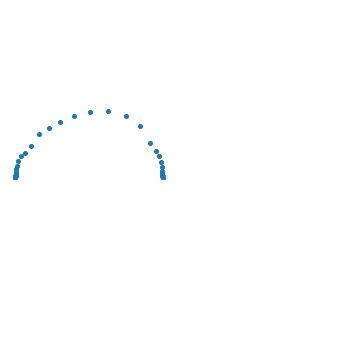

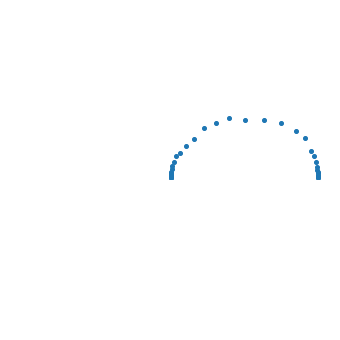

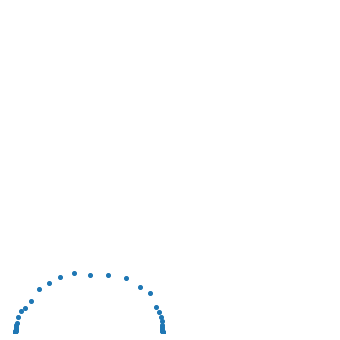

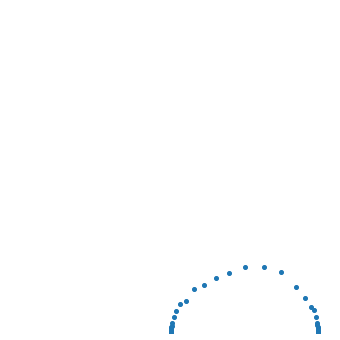

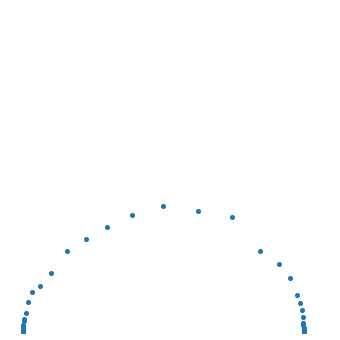

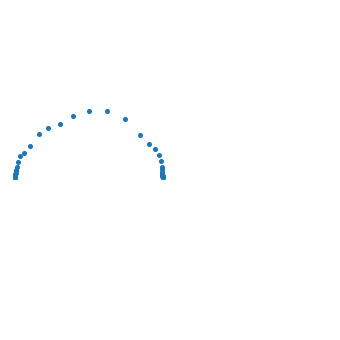

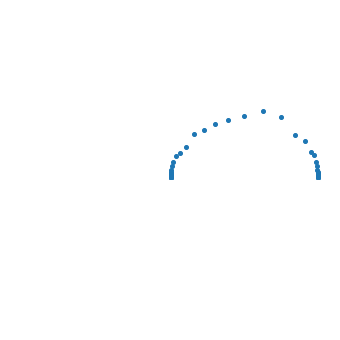

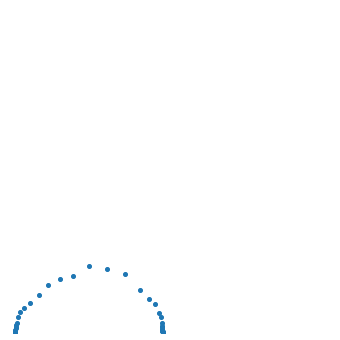

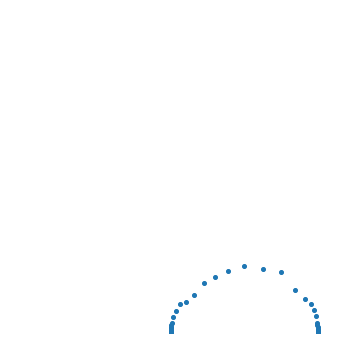

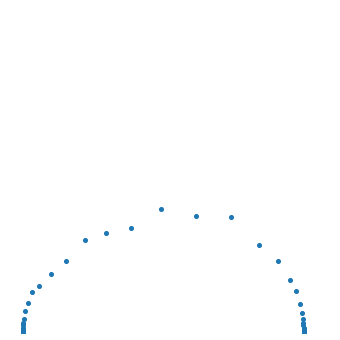

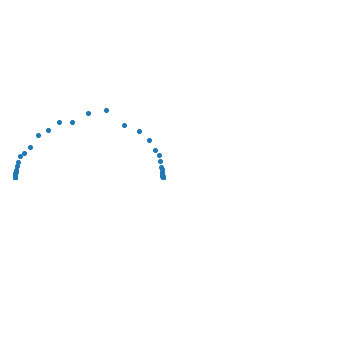

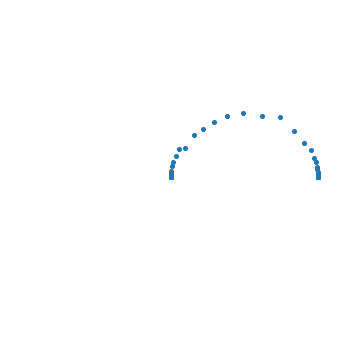

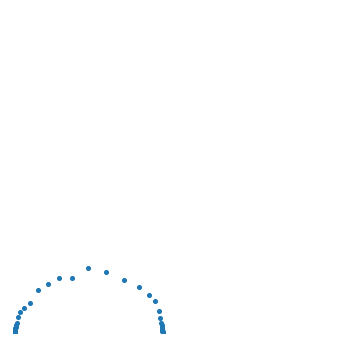

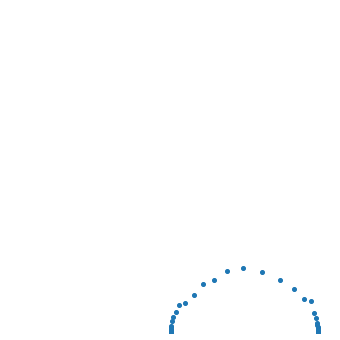

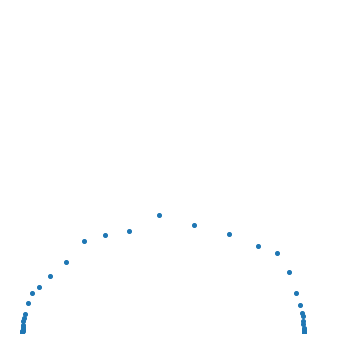

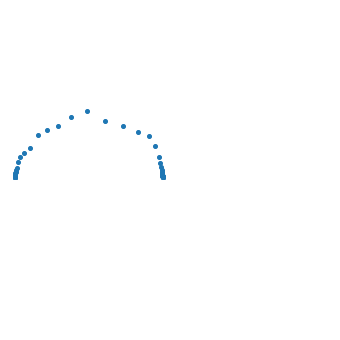

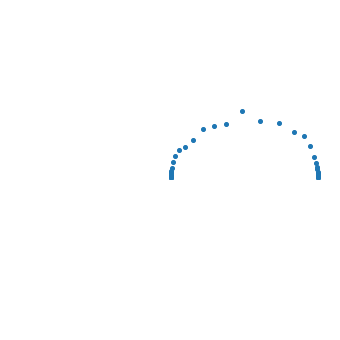

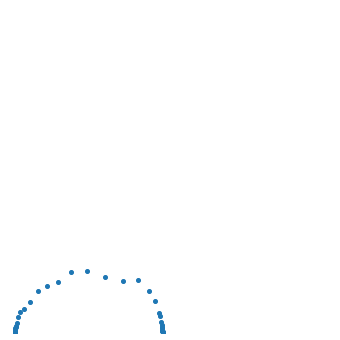

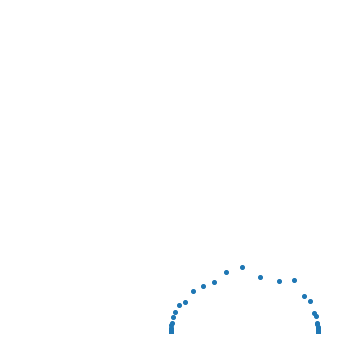

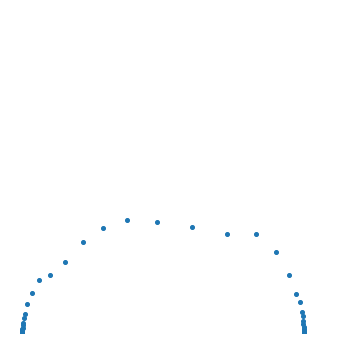

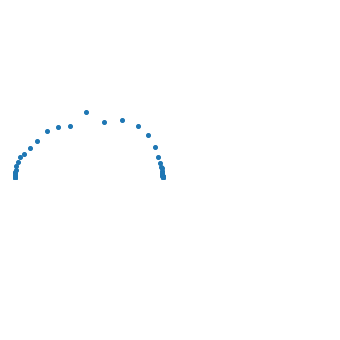

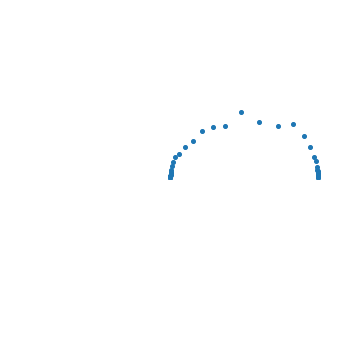

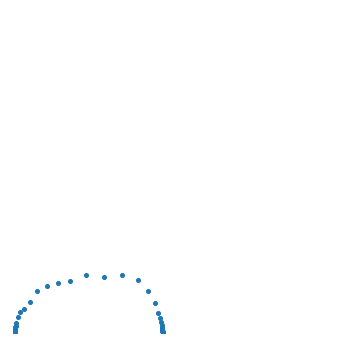

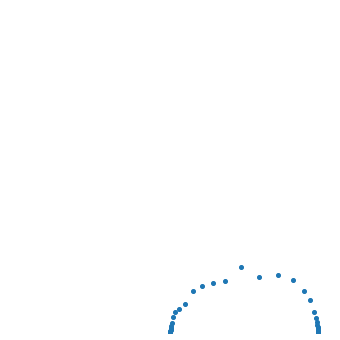

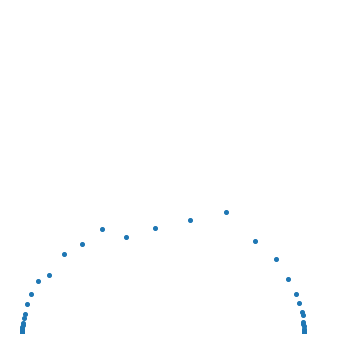

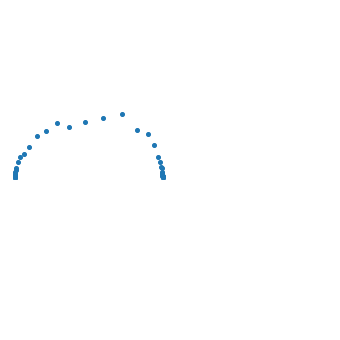

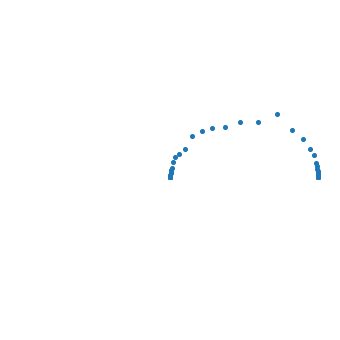

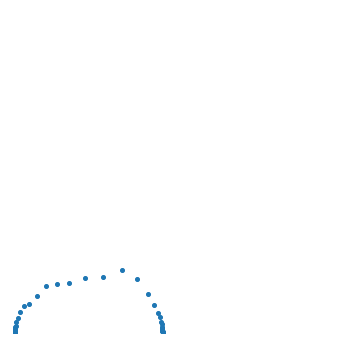

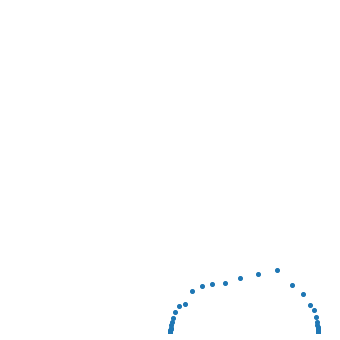

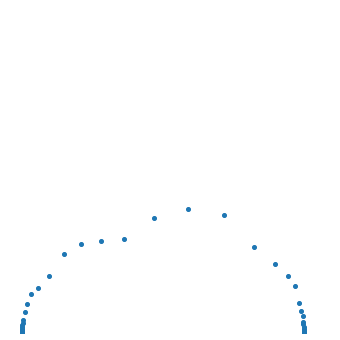

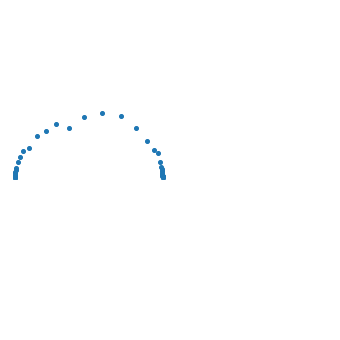

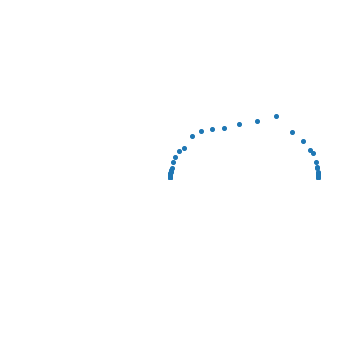

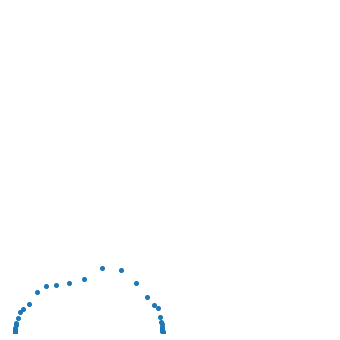

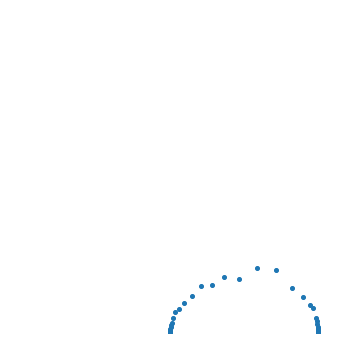

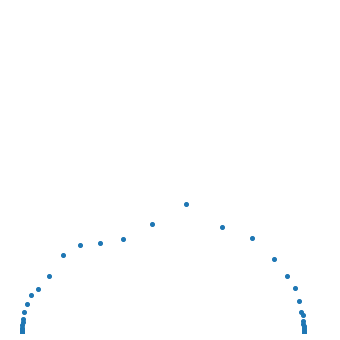

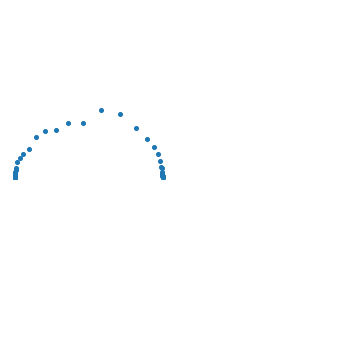

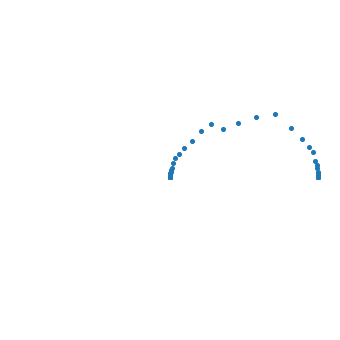

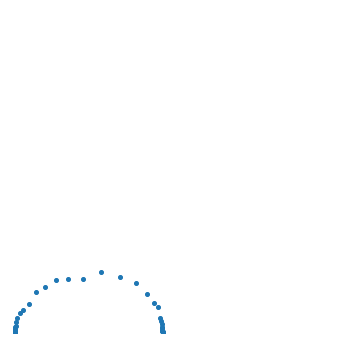

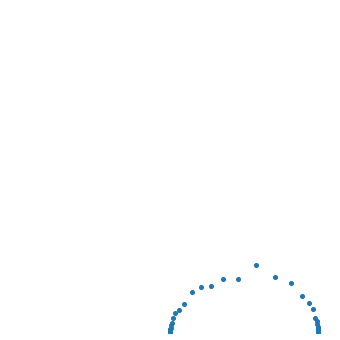

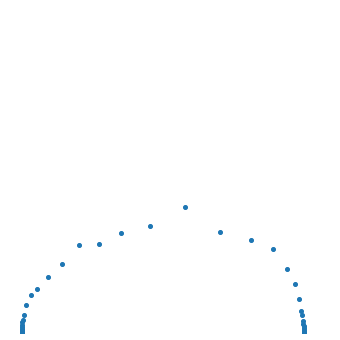

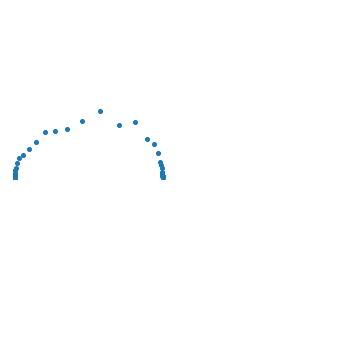

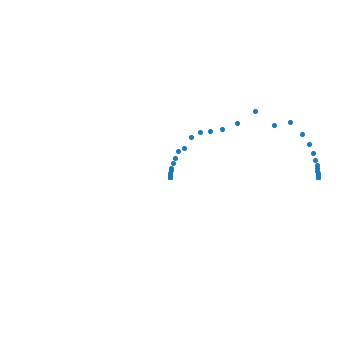

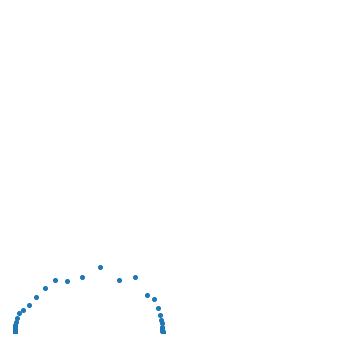

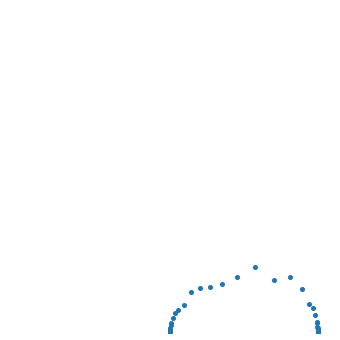

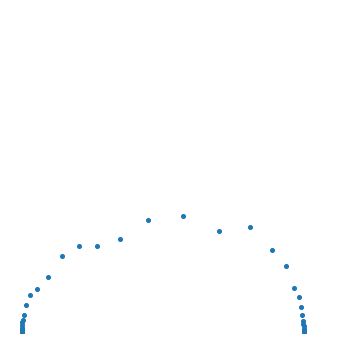

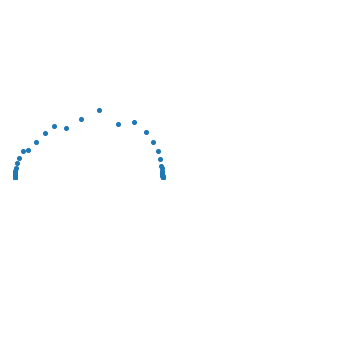

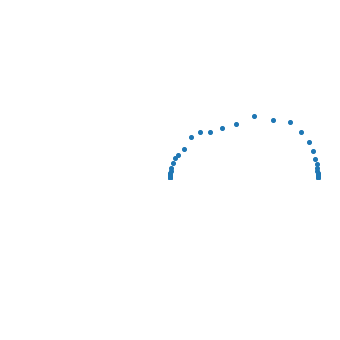

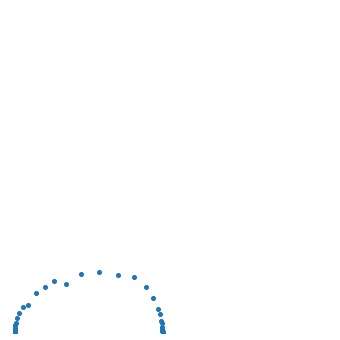

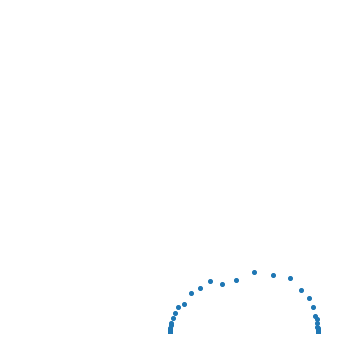

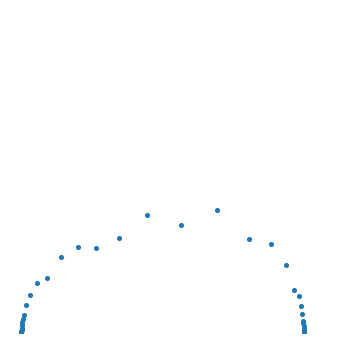

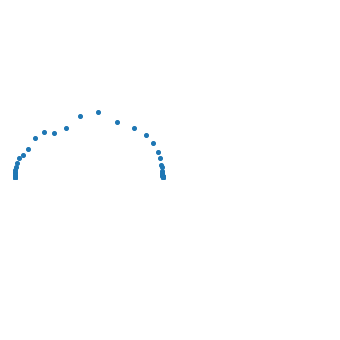

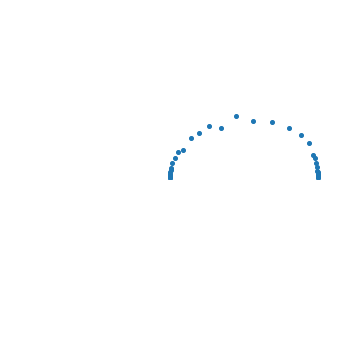

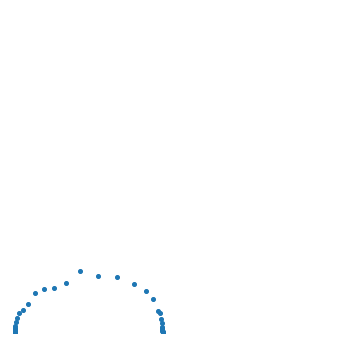

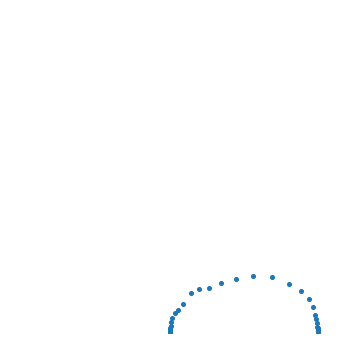

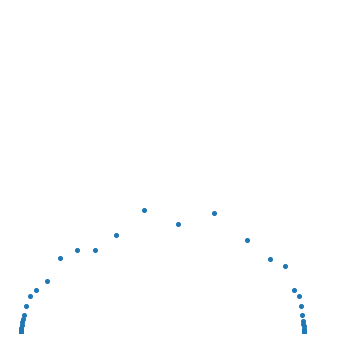

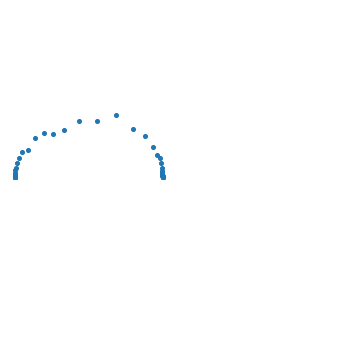

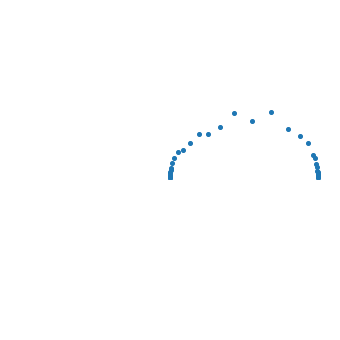

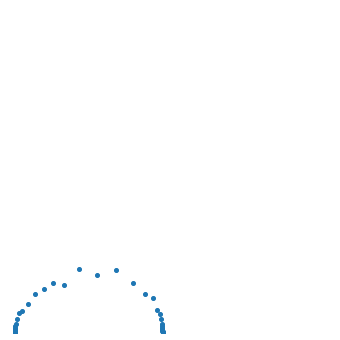

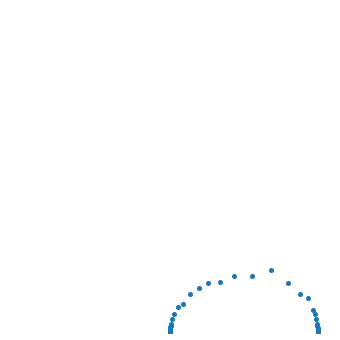

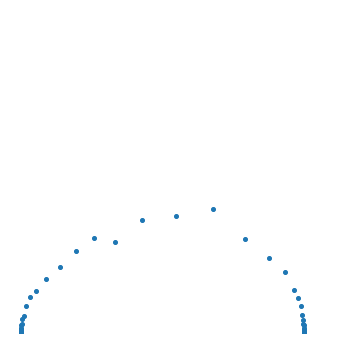

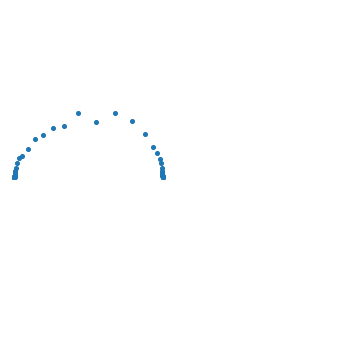

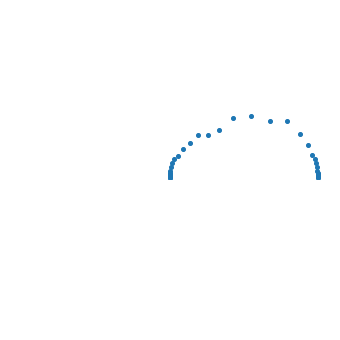

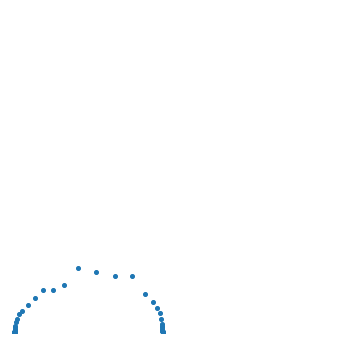

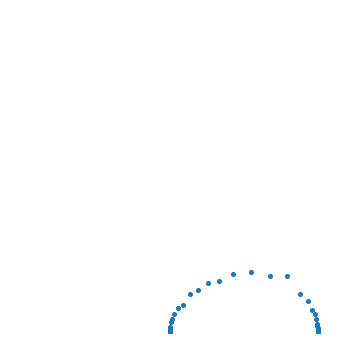

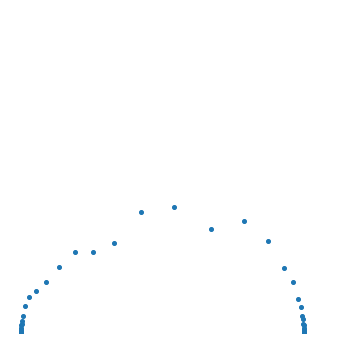

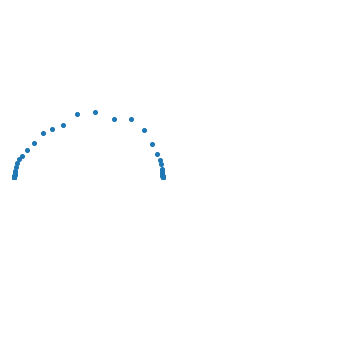

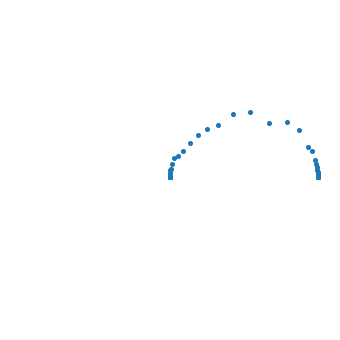

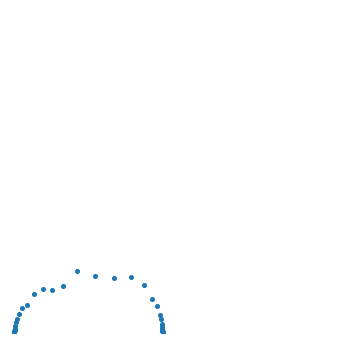

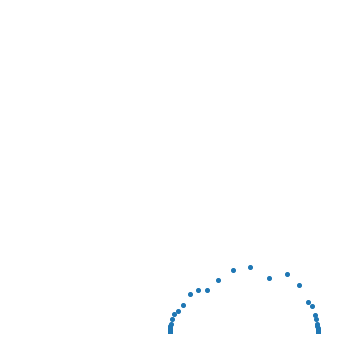

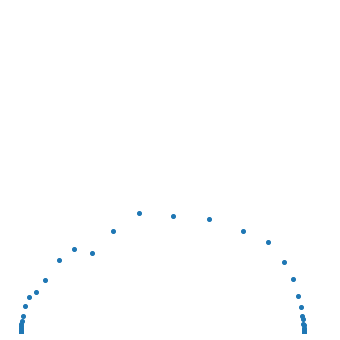

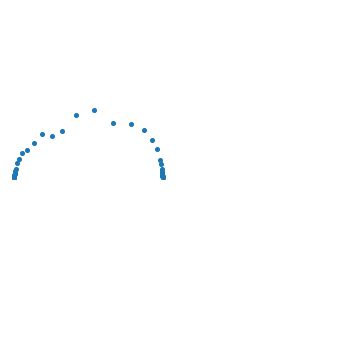

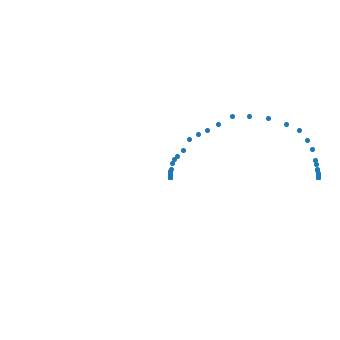

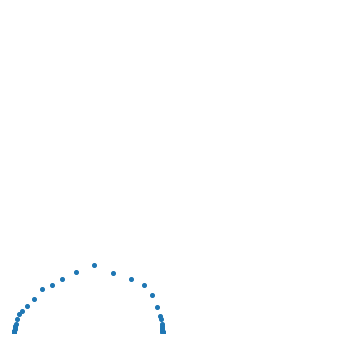

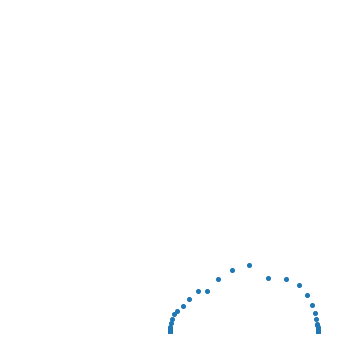

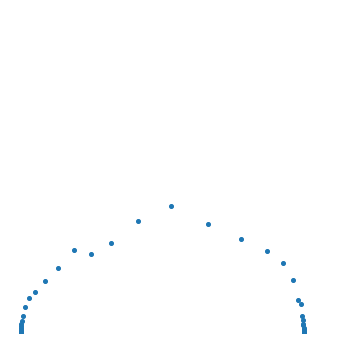

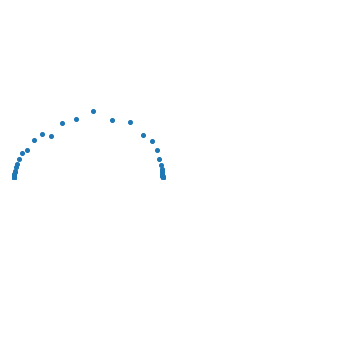

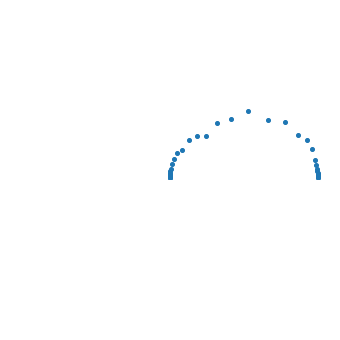

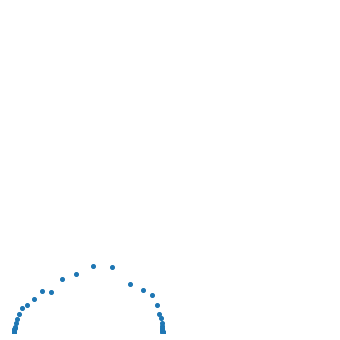

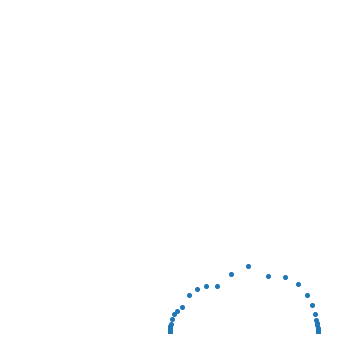

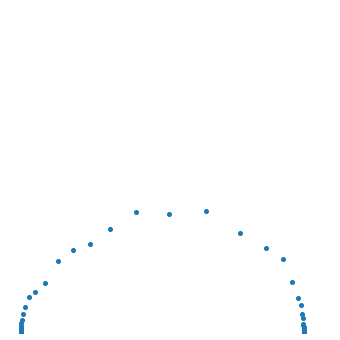

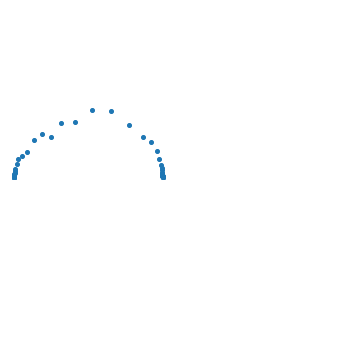

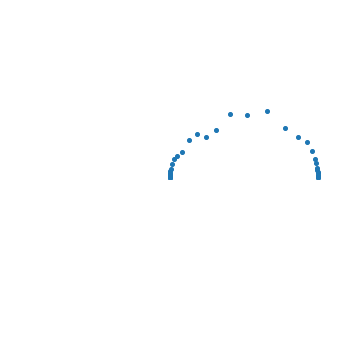

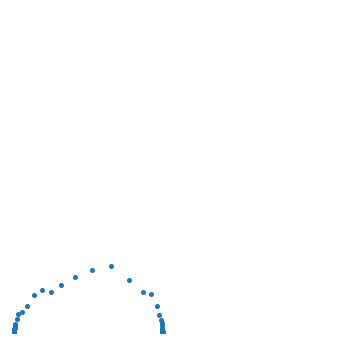

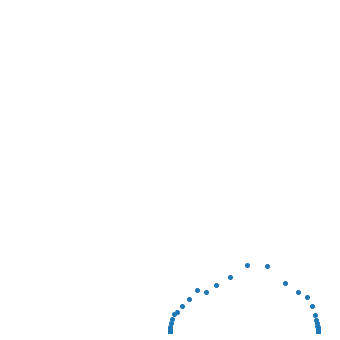

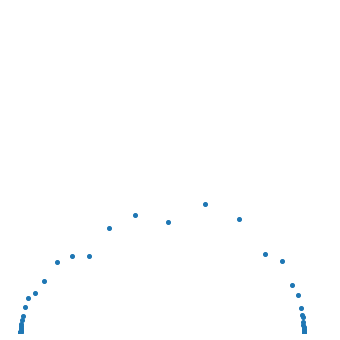

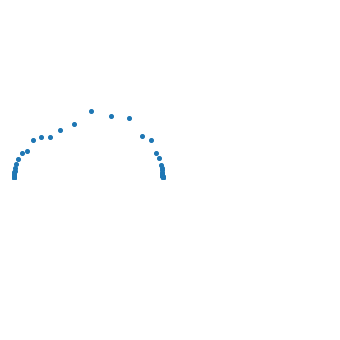

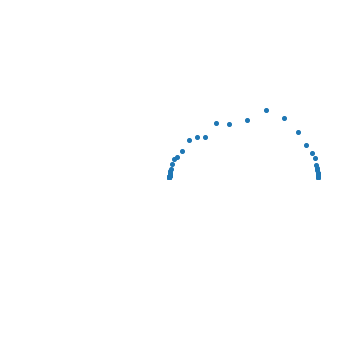

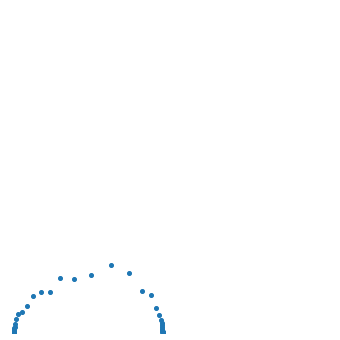

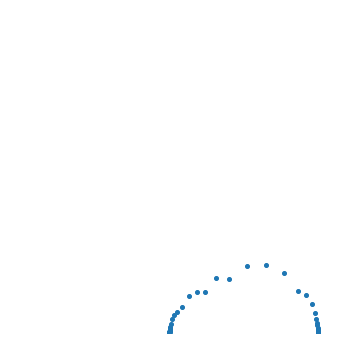

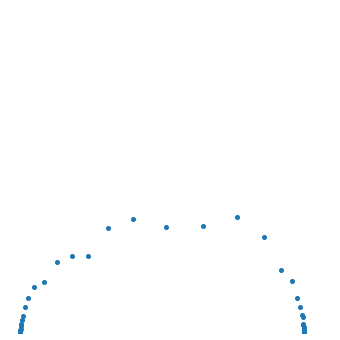

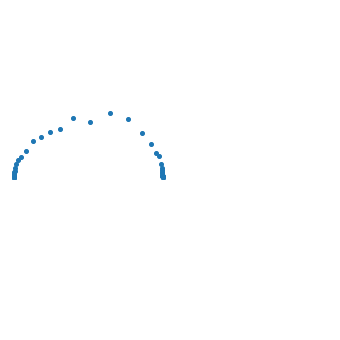

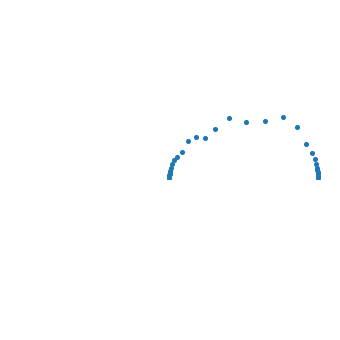

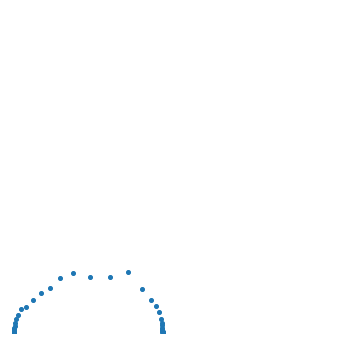

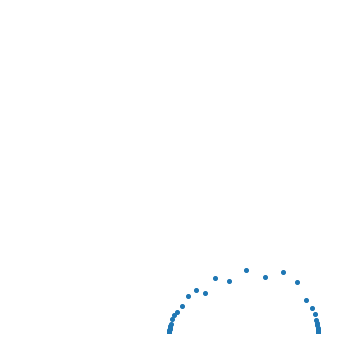

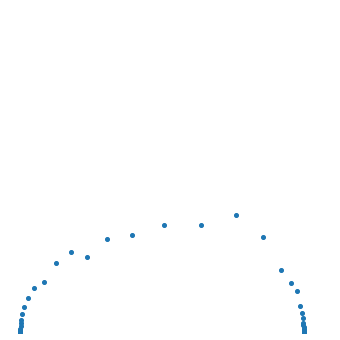

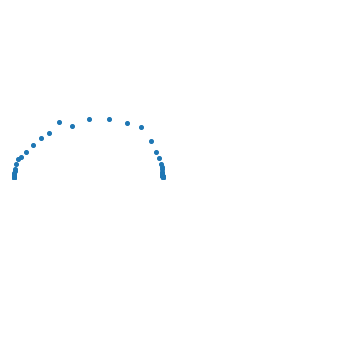

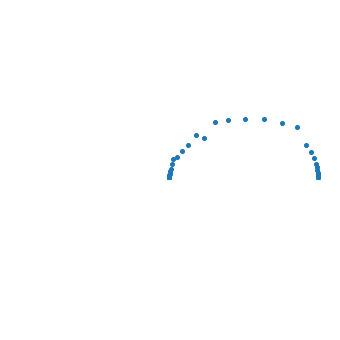

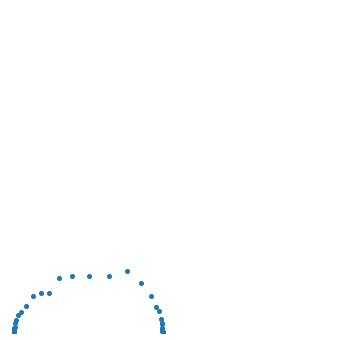

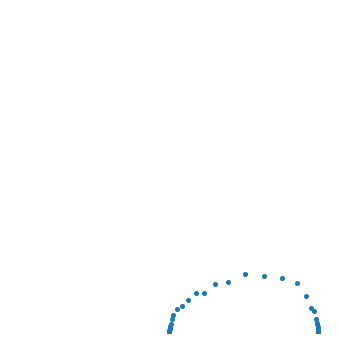

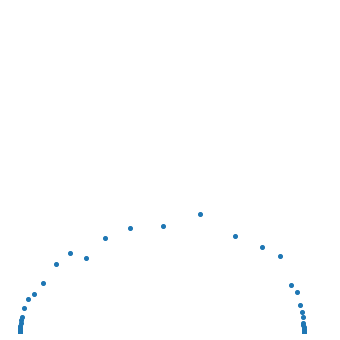

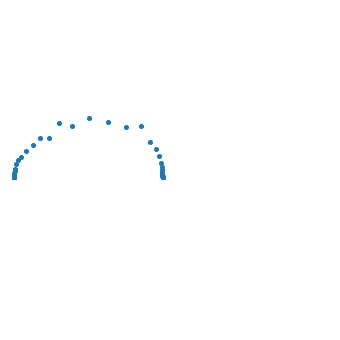

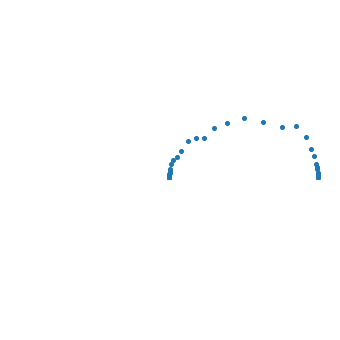

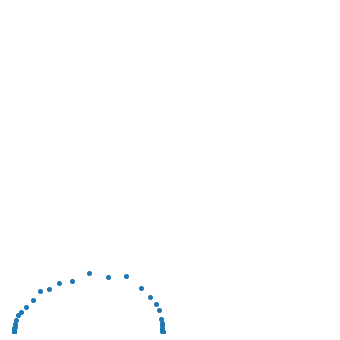

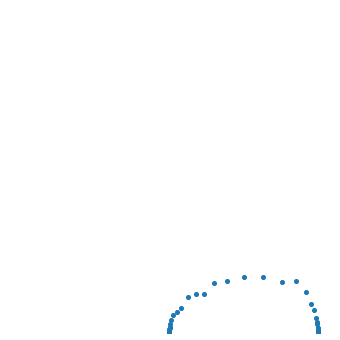

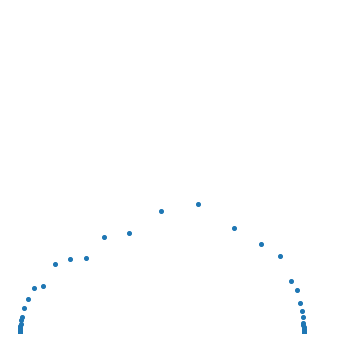

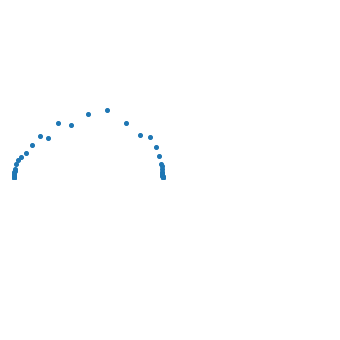

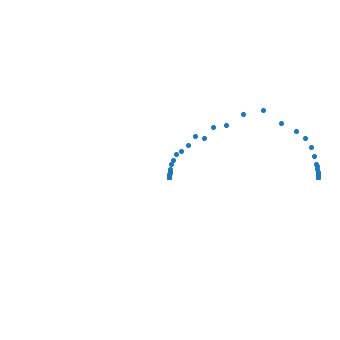

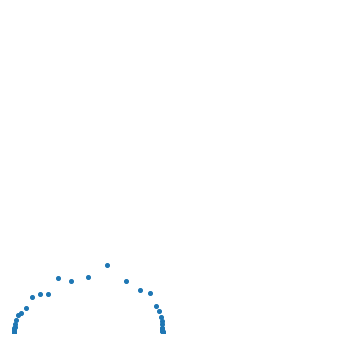

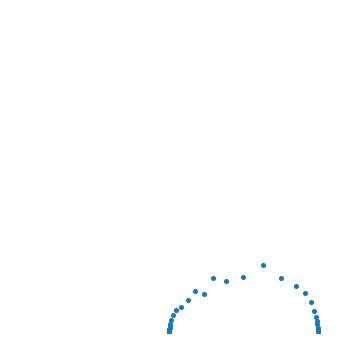

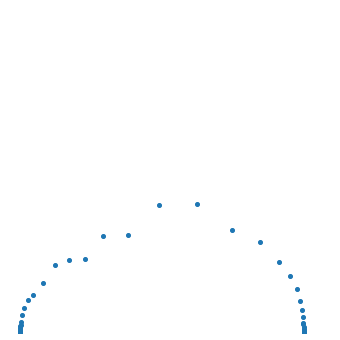

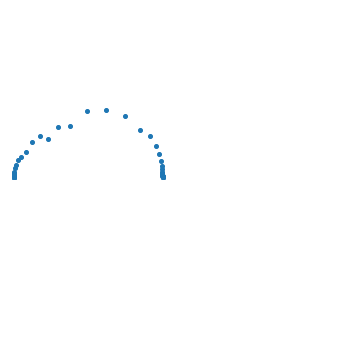

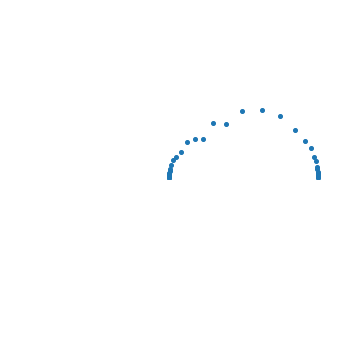

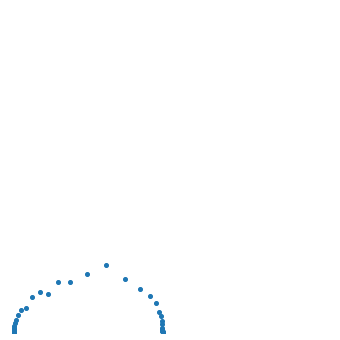

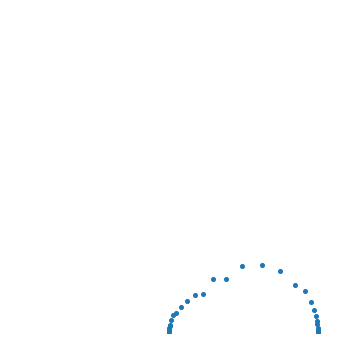

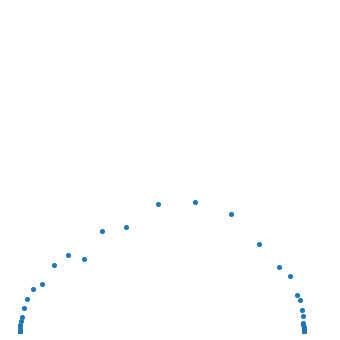

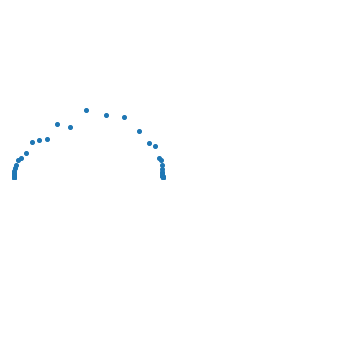

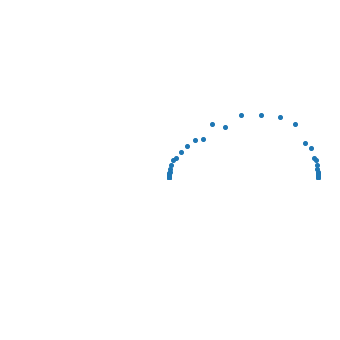

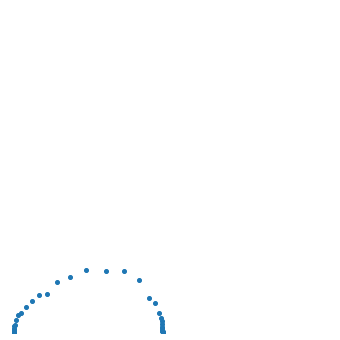

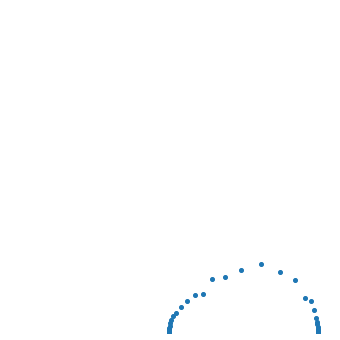

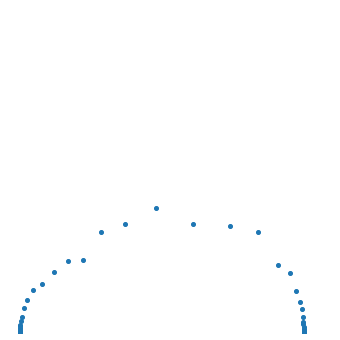

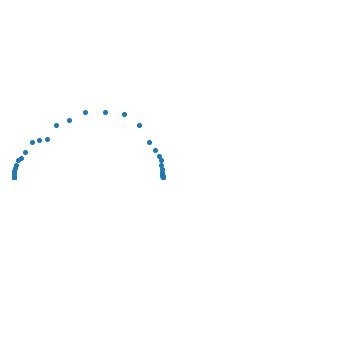

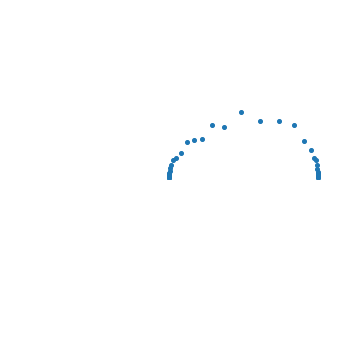

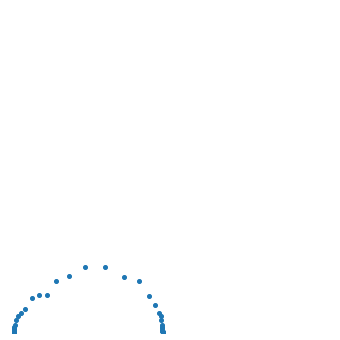

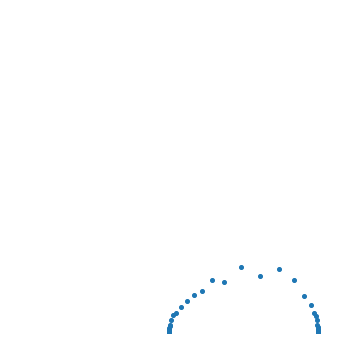

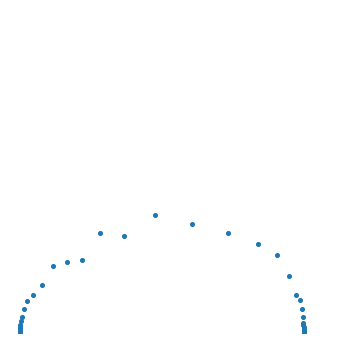

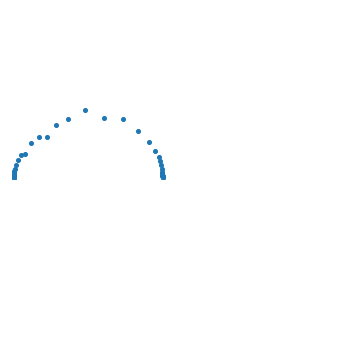

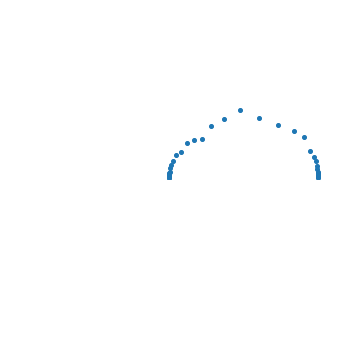

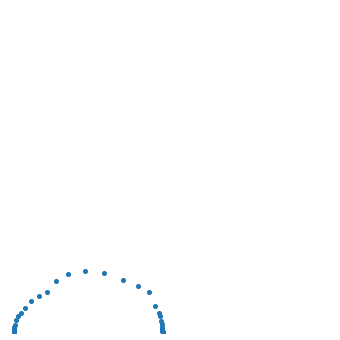

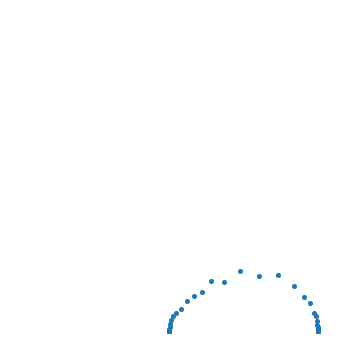

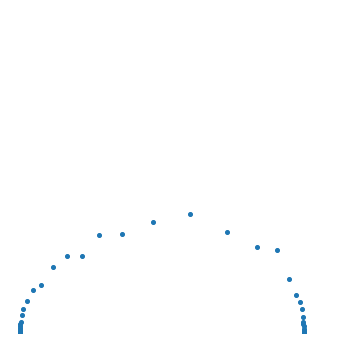

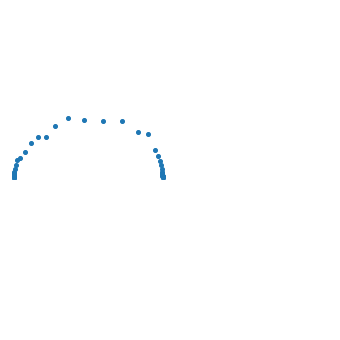

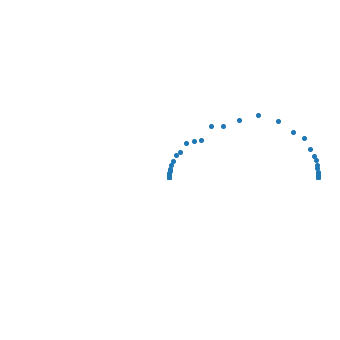

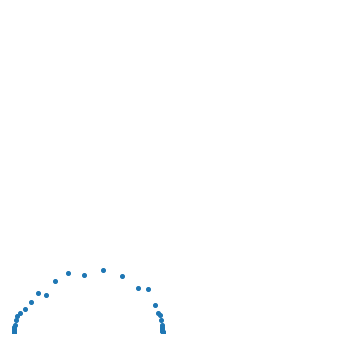

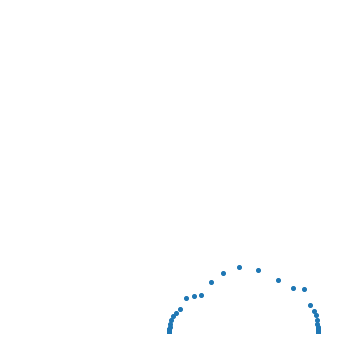

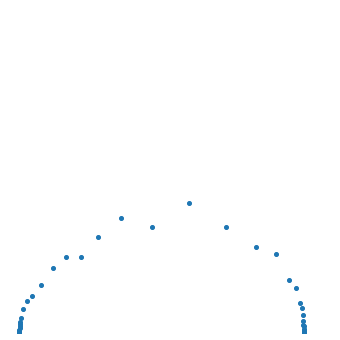

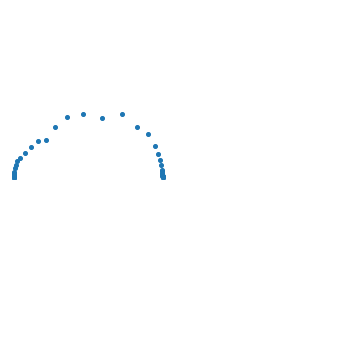

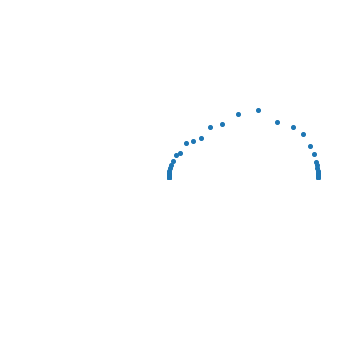

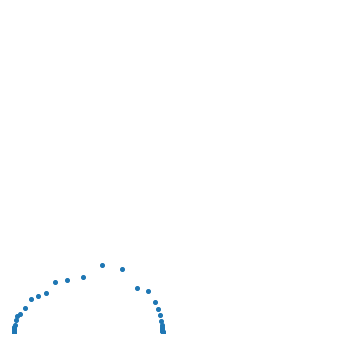

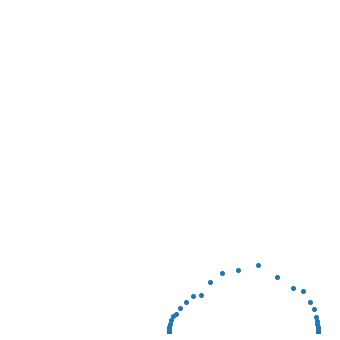

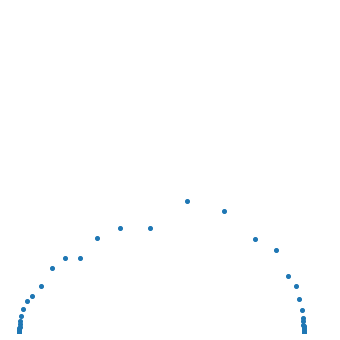

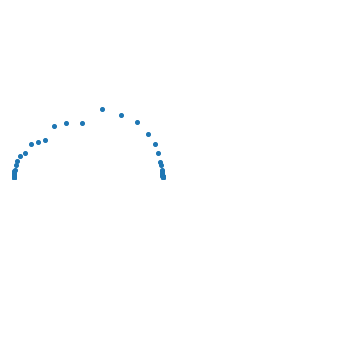

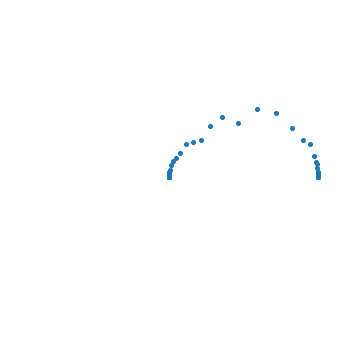

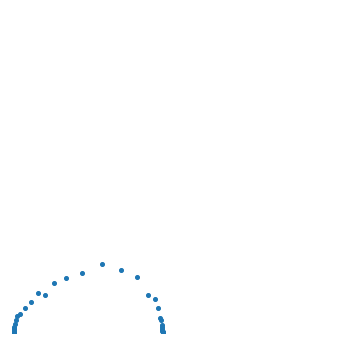

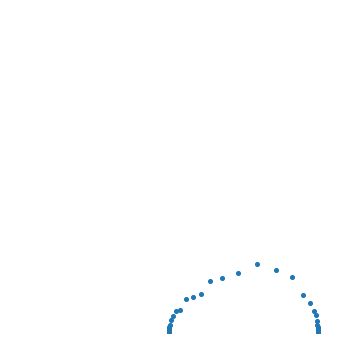

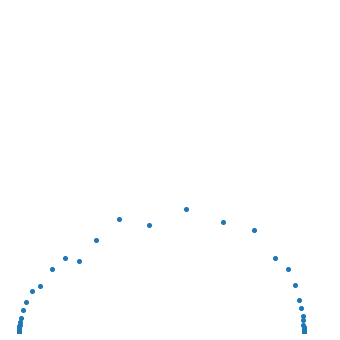

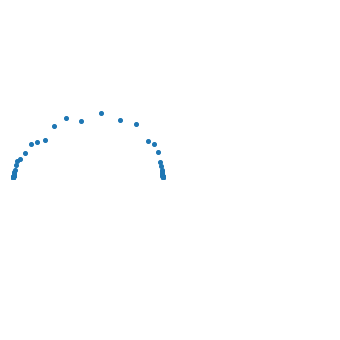

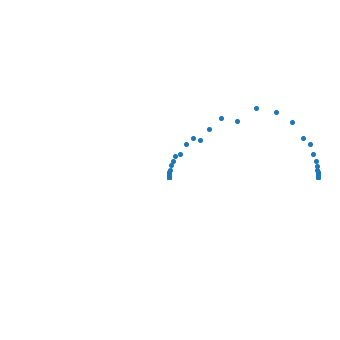

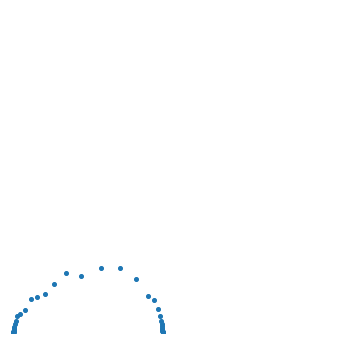

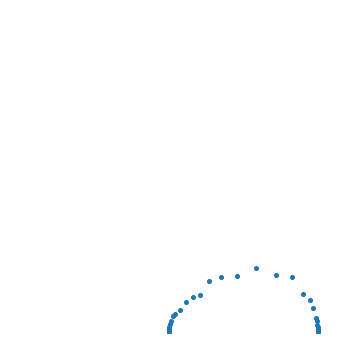

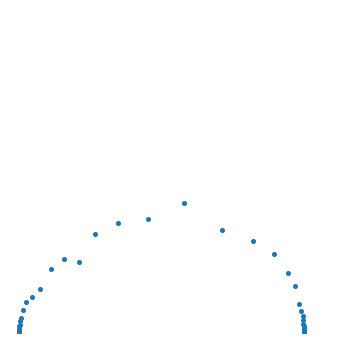

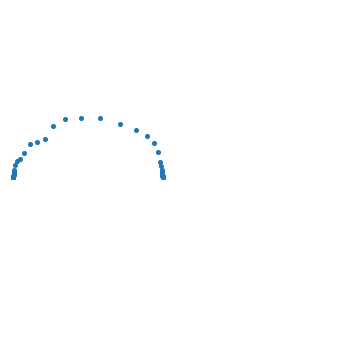

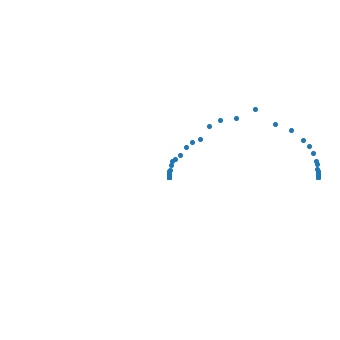

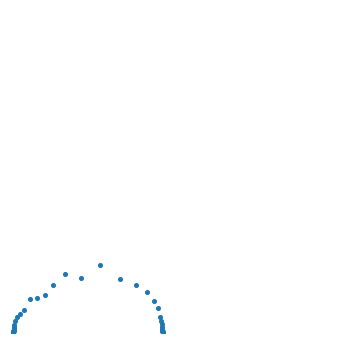

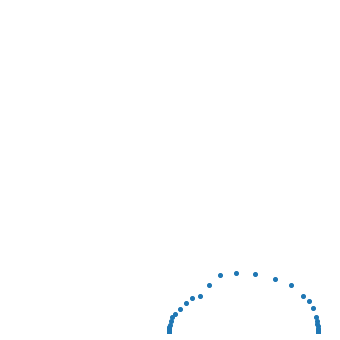

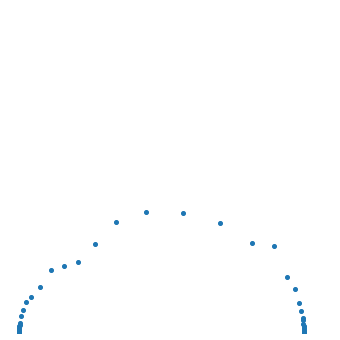

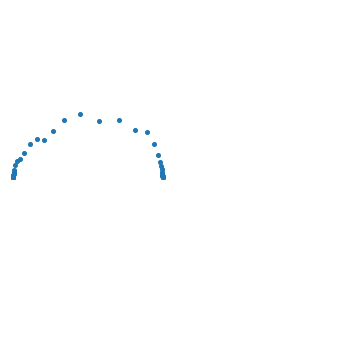

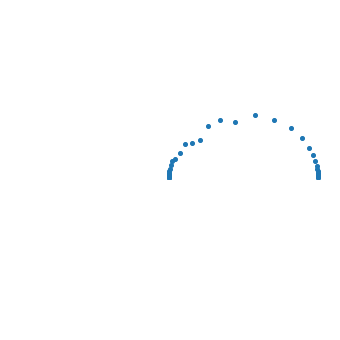

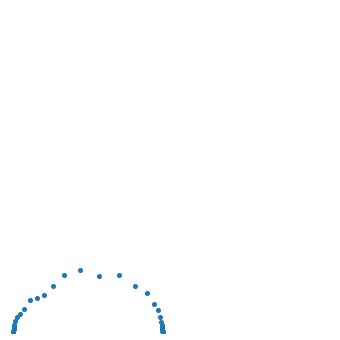

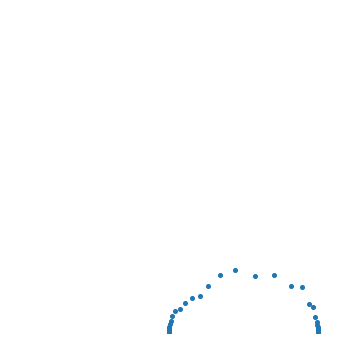

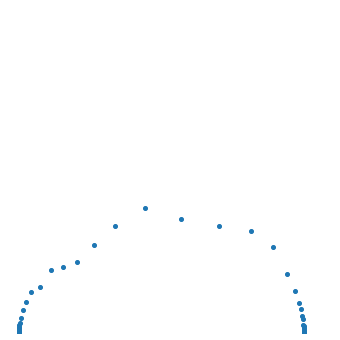

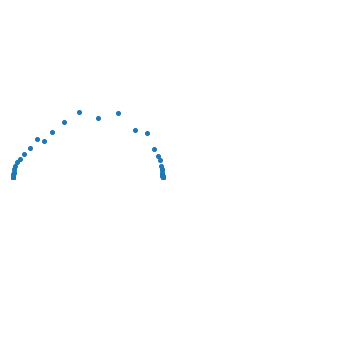

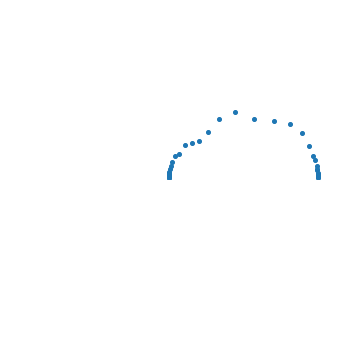

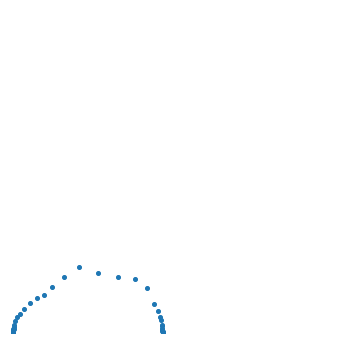

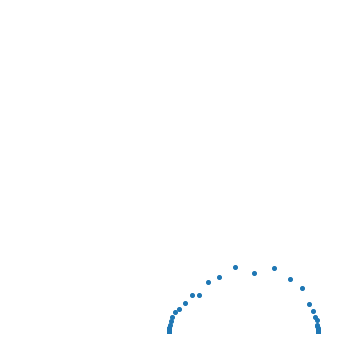

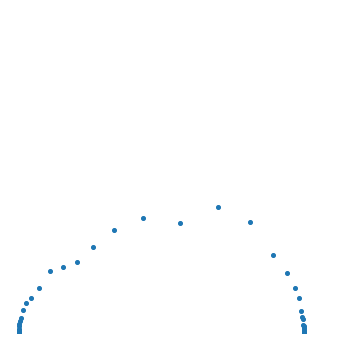

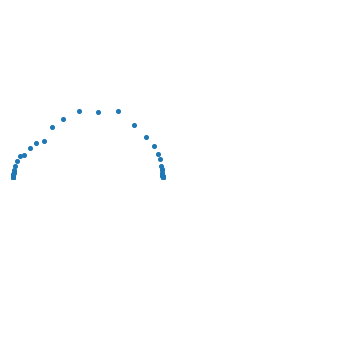

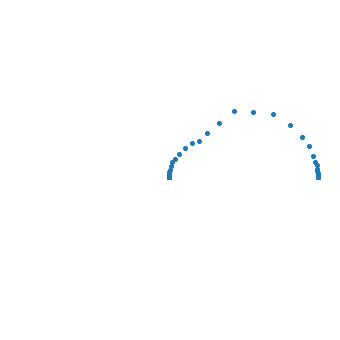

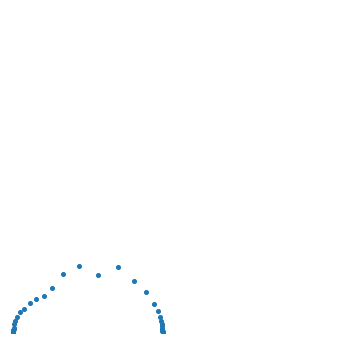

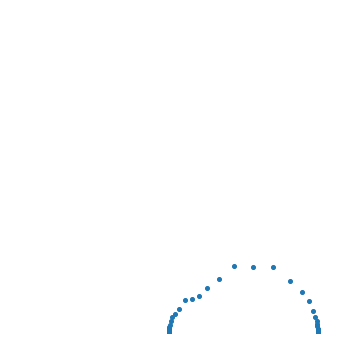

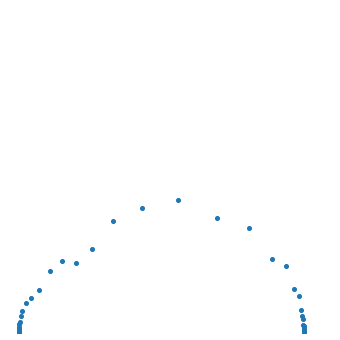

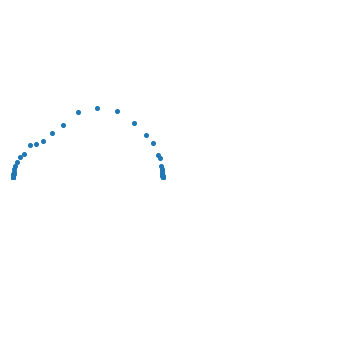

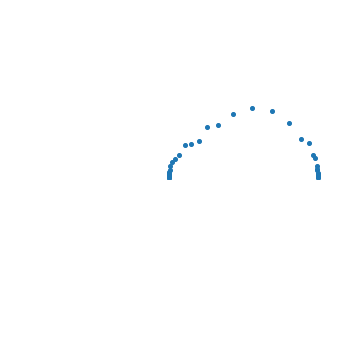

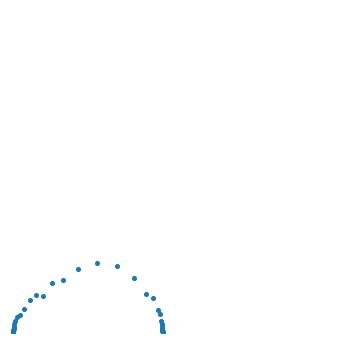

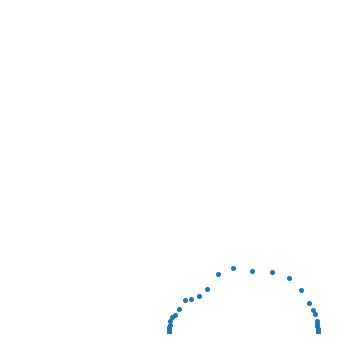

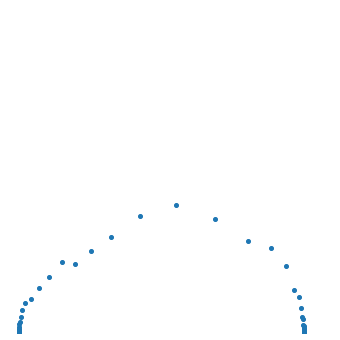

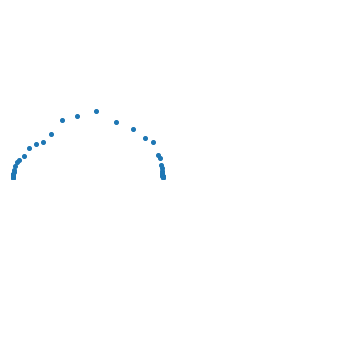

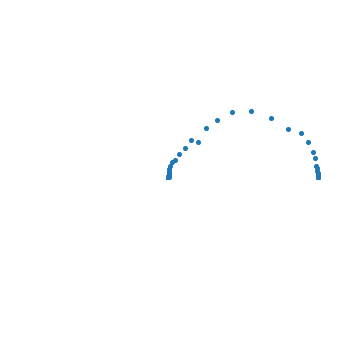

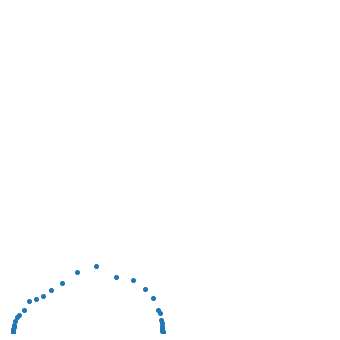

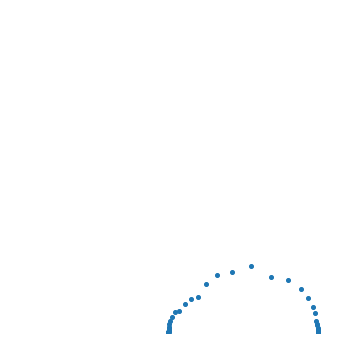

In [17]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R2= 10   # ohm
R1= 50   # ohm
resistance= np.linspace(100,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRCRC_file_writer(f_start, f_stop, decades, Rs, R1,C, R2,2*C, alteration='noise', noisescale=0.1, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

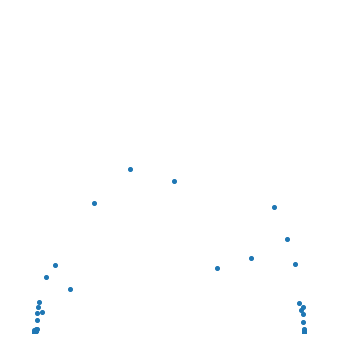

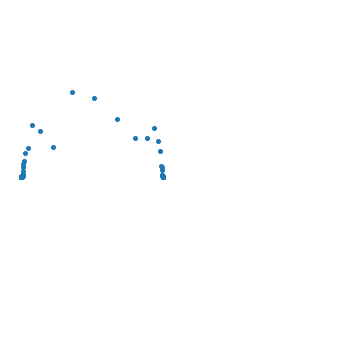

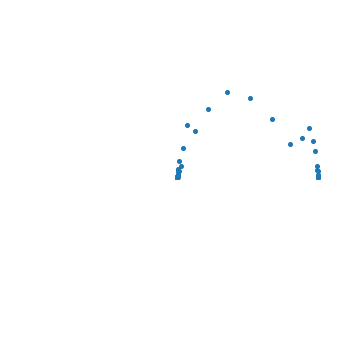

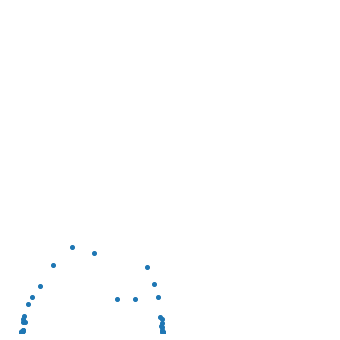

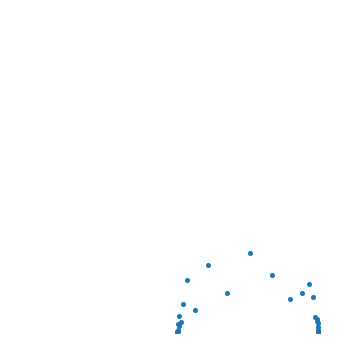

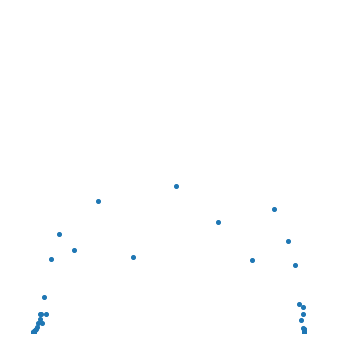

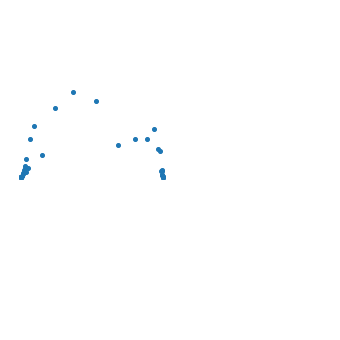

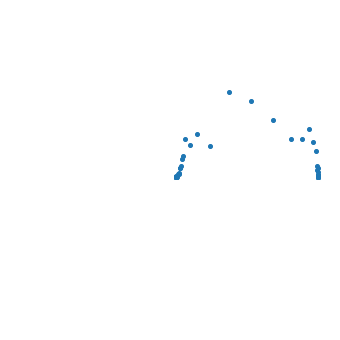

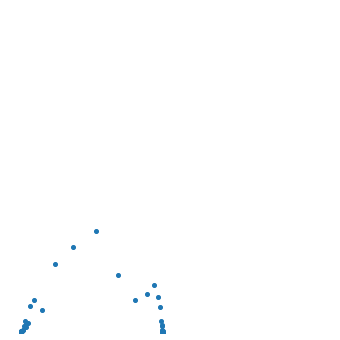

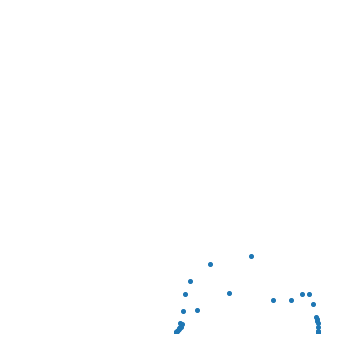

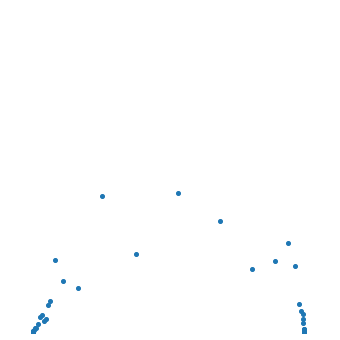

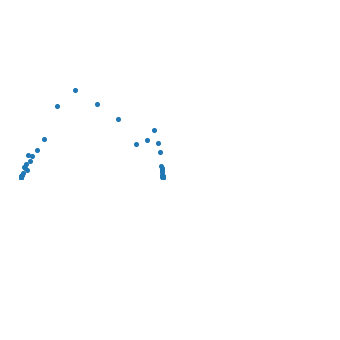

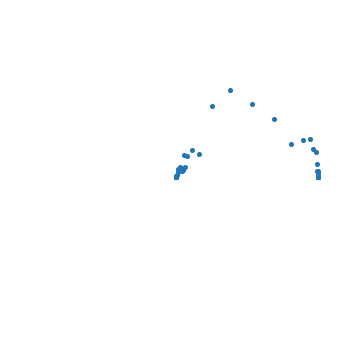

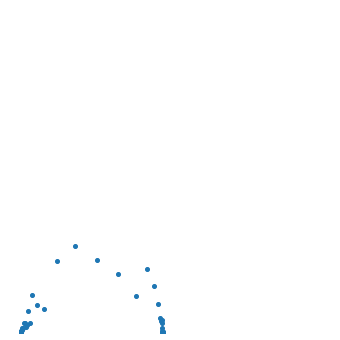

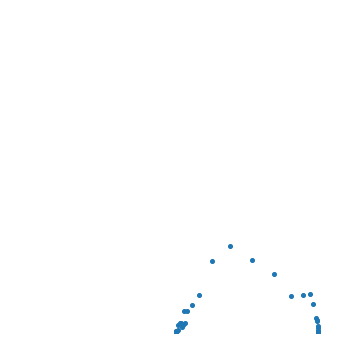

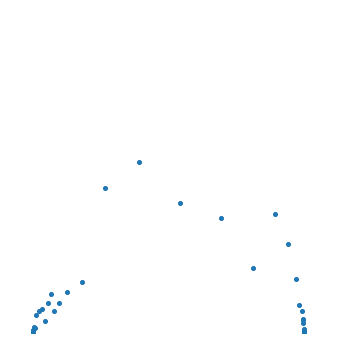

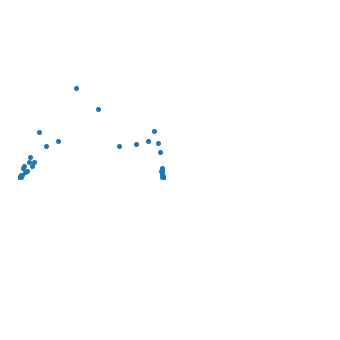

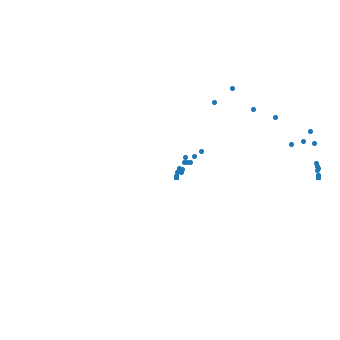

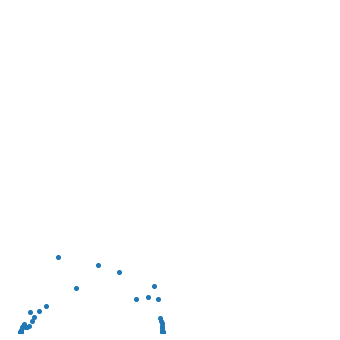

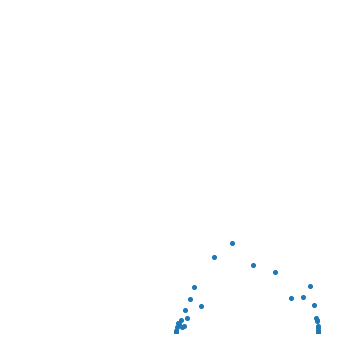

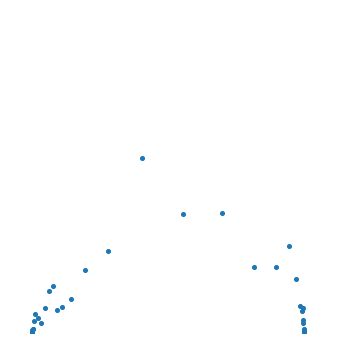

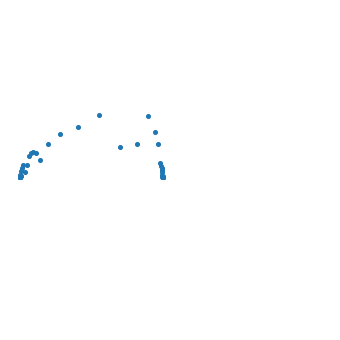

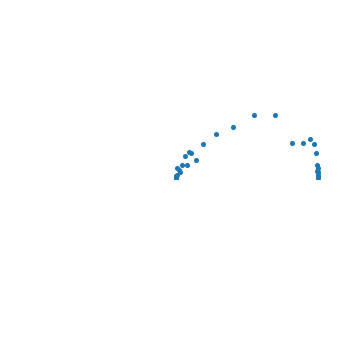

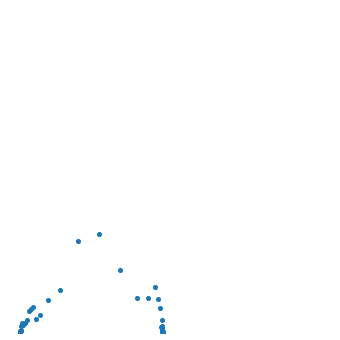

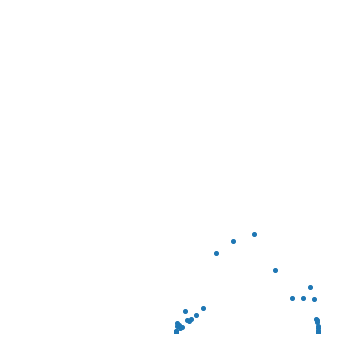

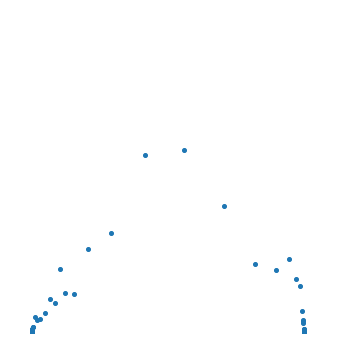

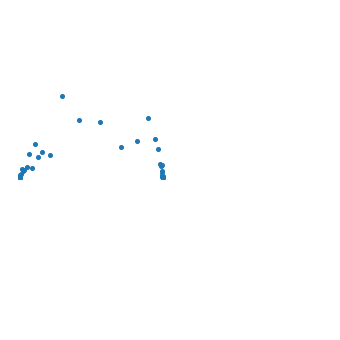

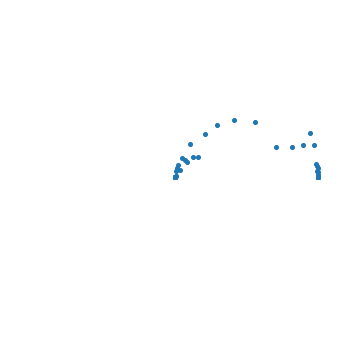

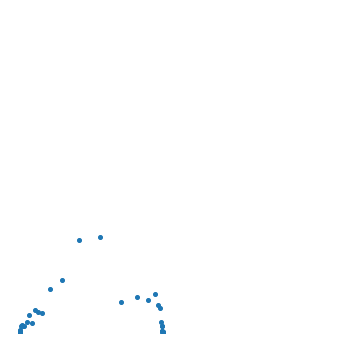

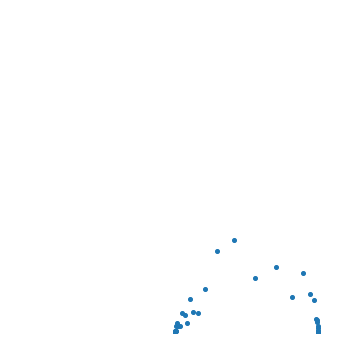

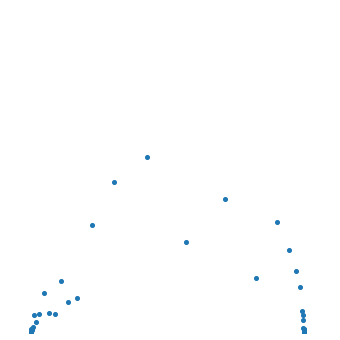

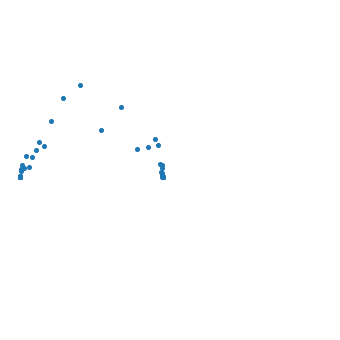

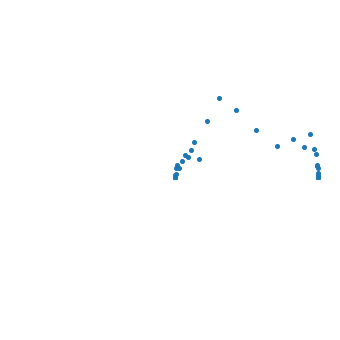

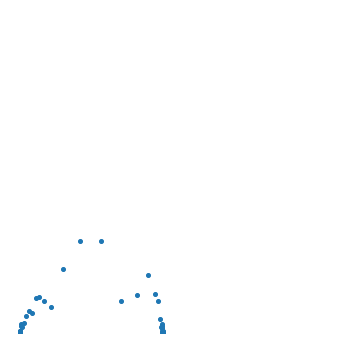

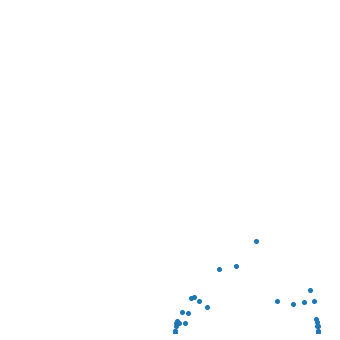

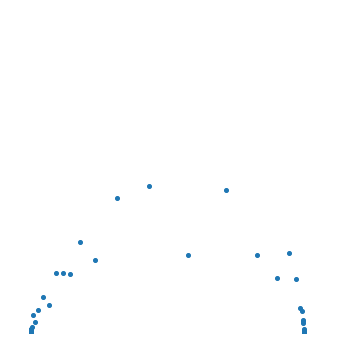

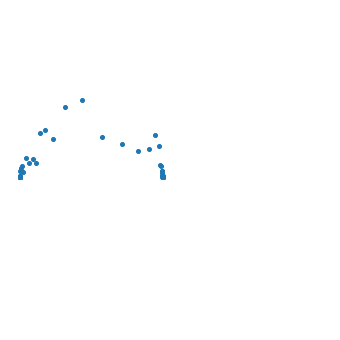

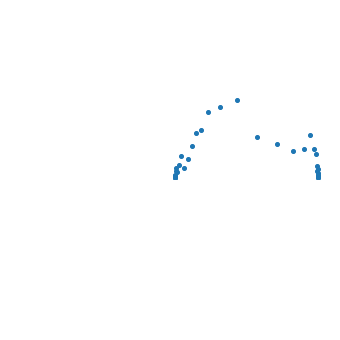

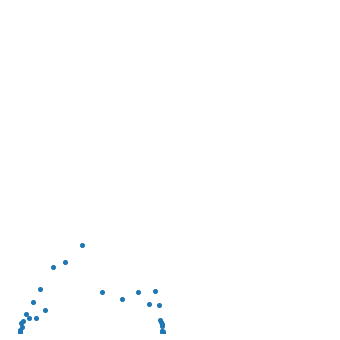

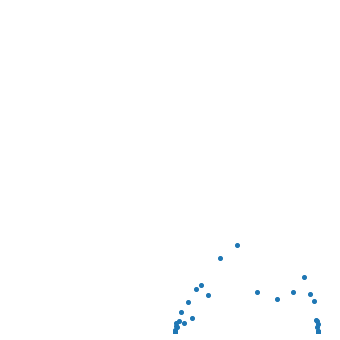

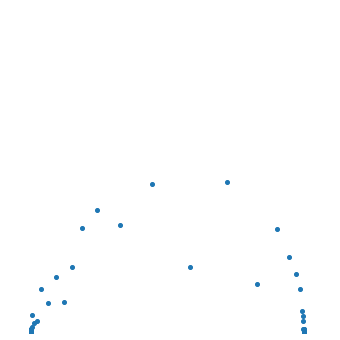

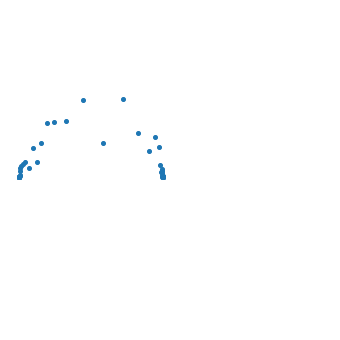

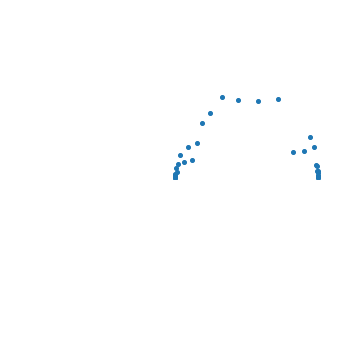

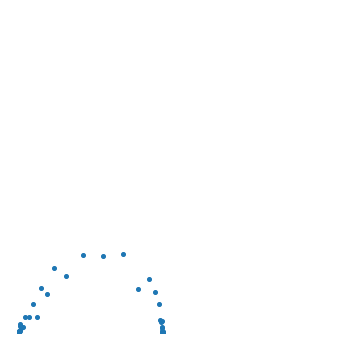

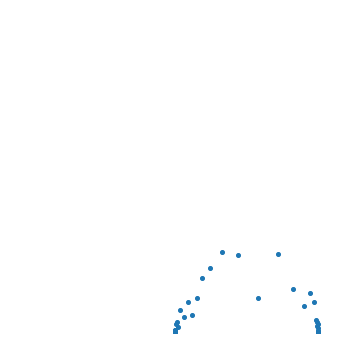

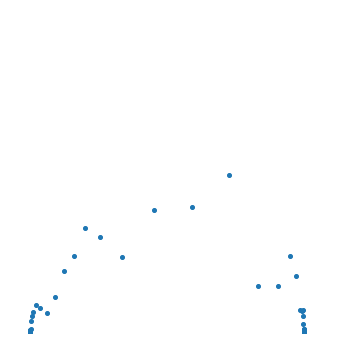

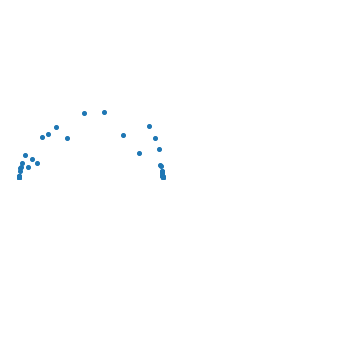

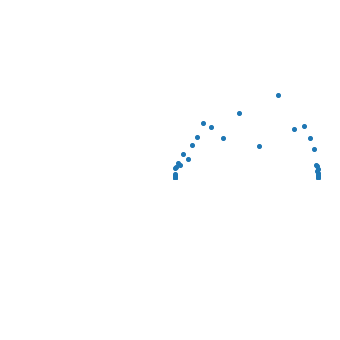

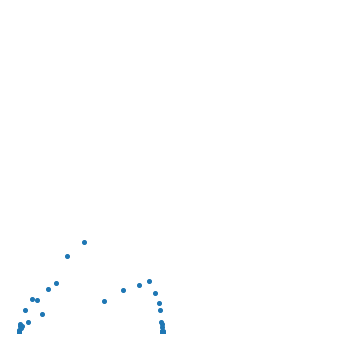

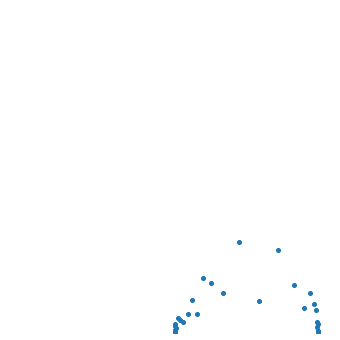

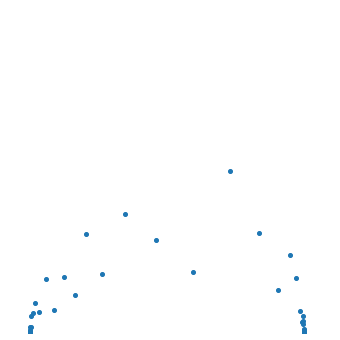

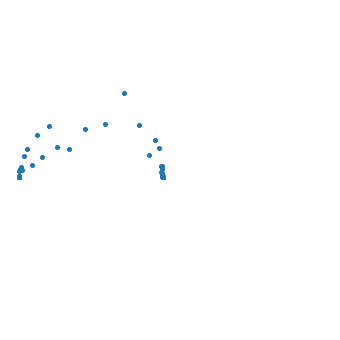

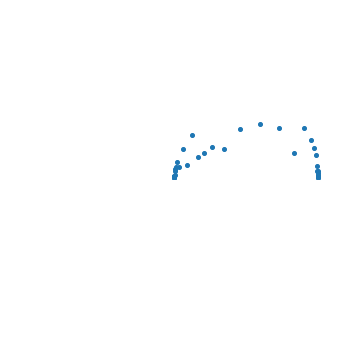

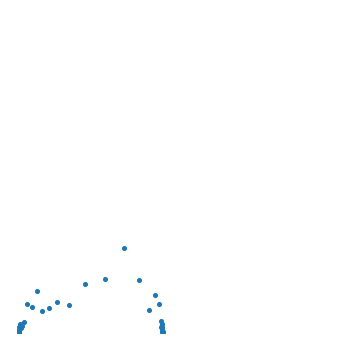

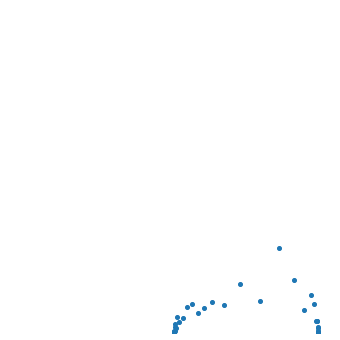

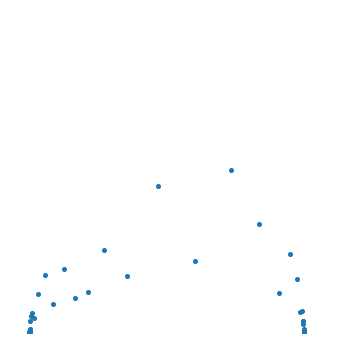

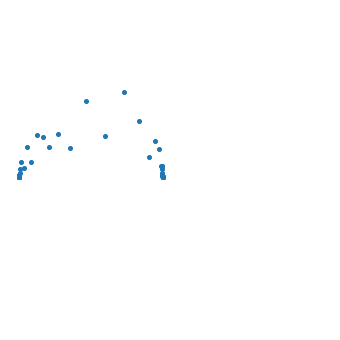

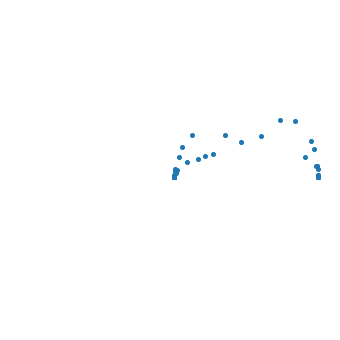

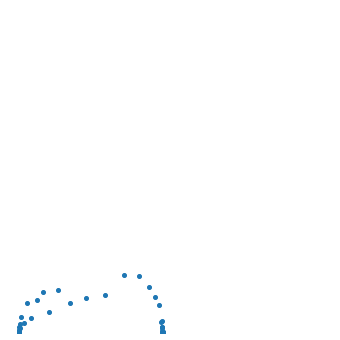

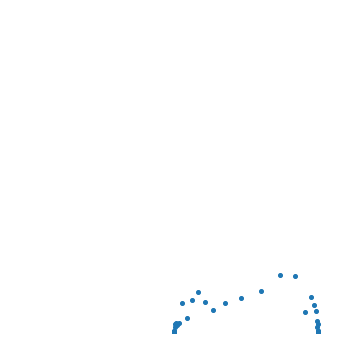

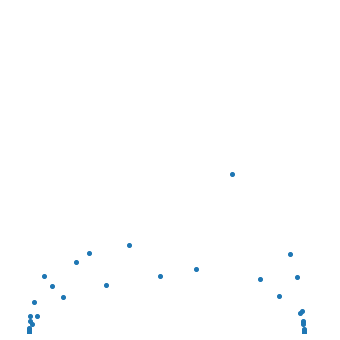

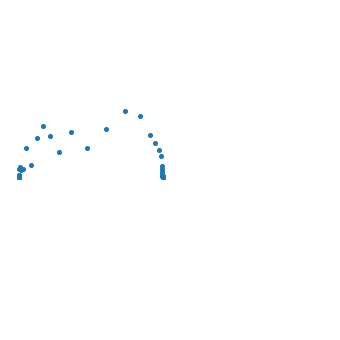

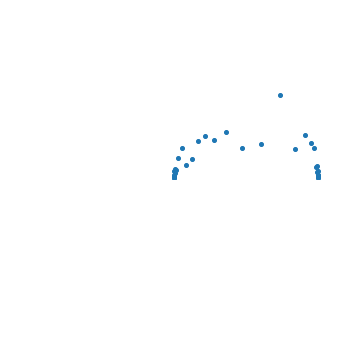

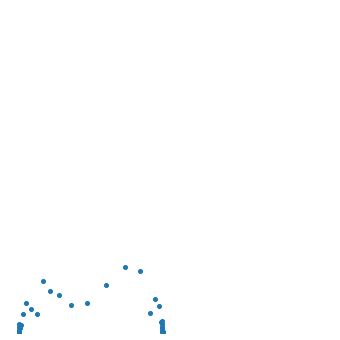

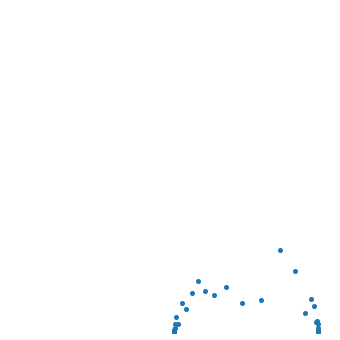

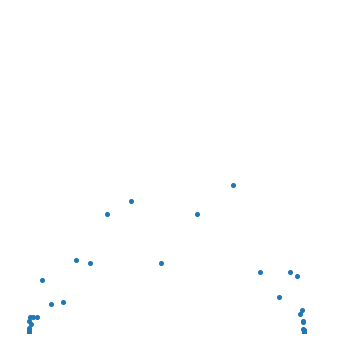

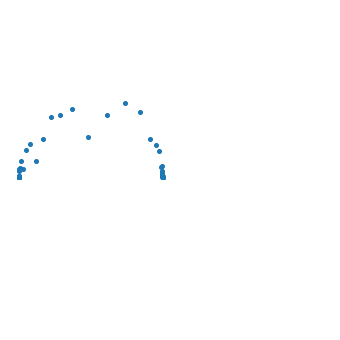

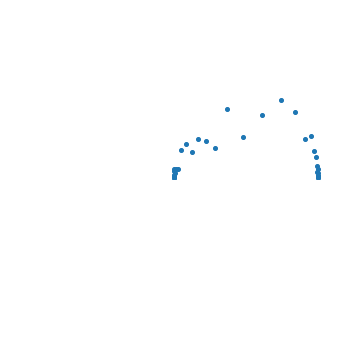

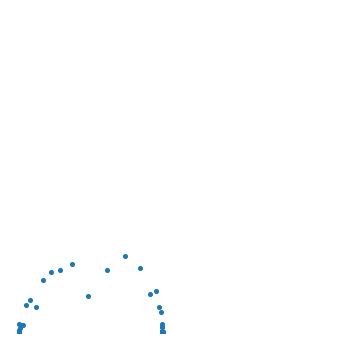

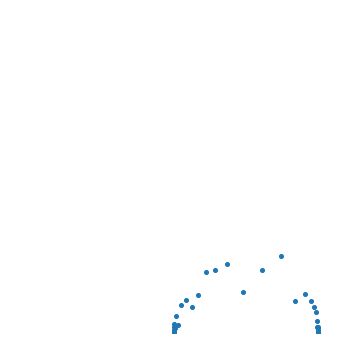

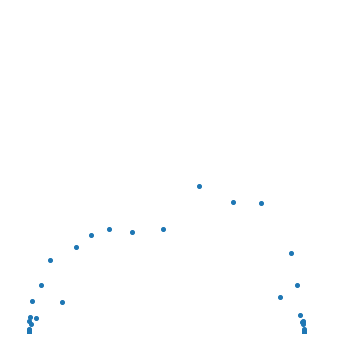

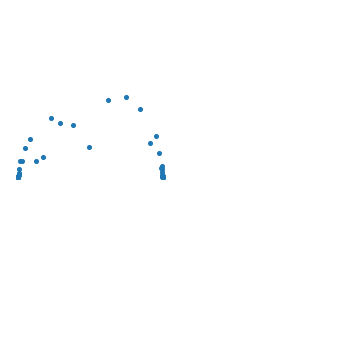

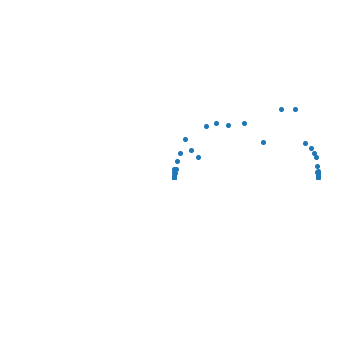

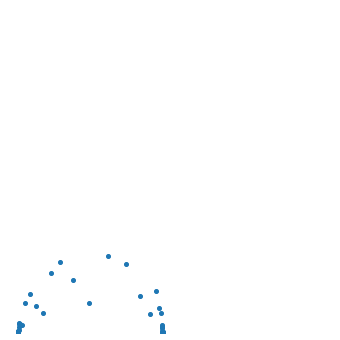

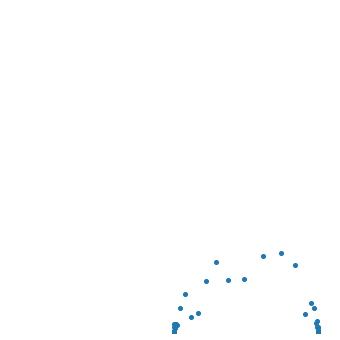

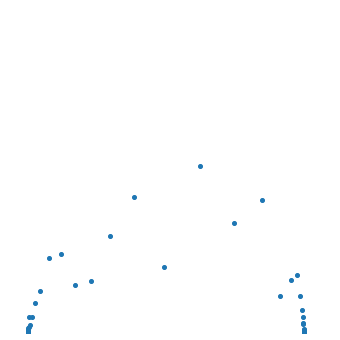

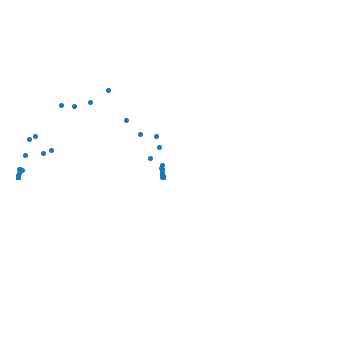

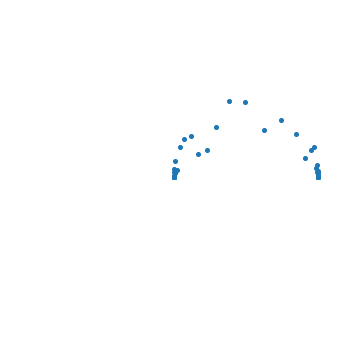

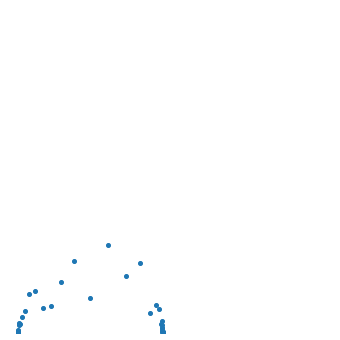

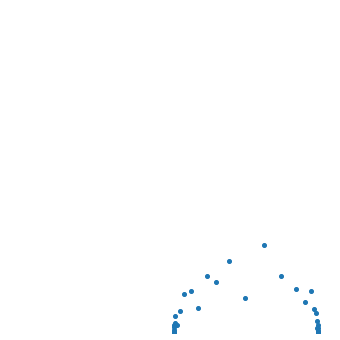

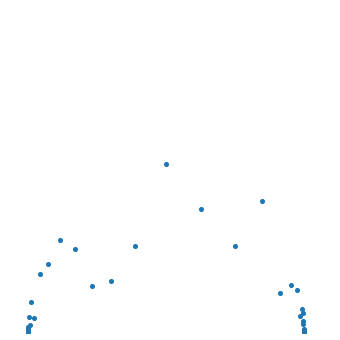

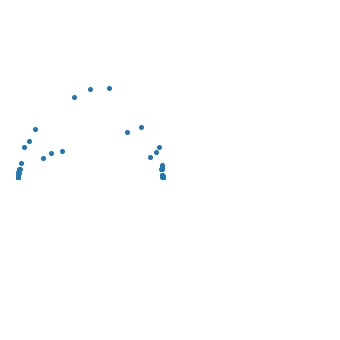

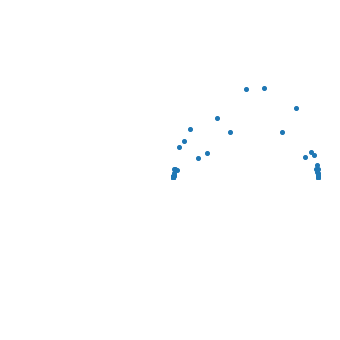

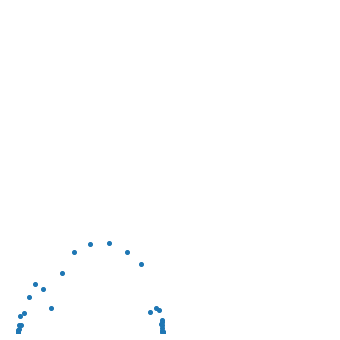

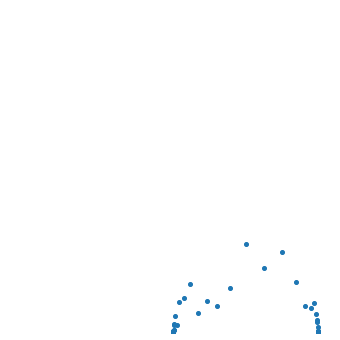

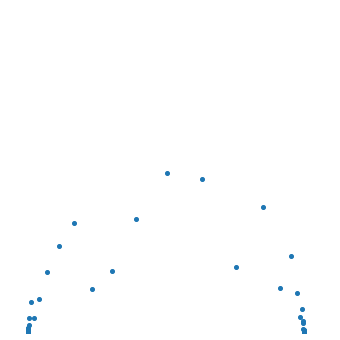

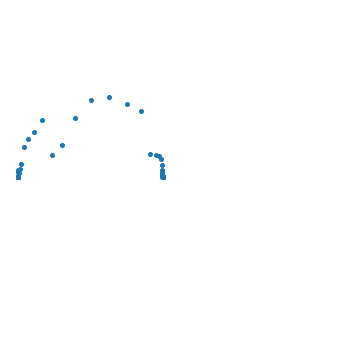

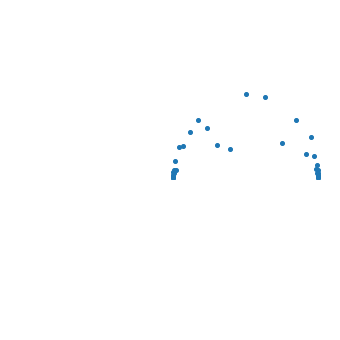

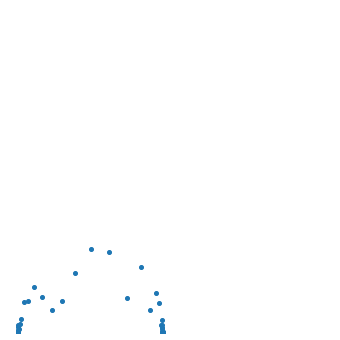

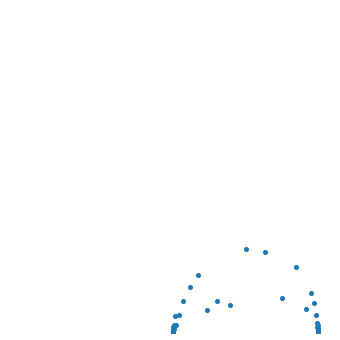

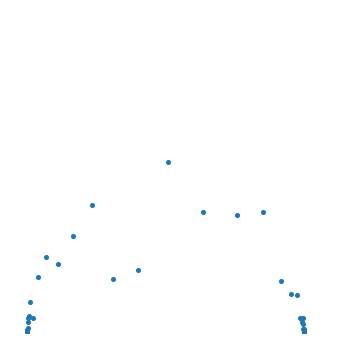

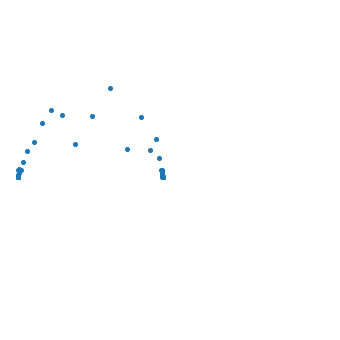

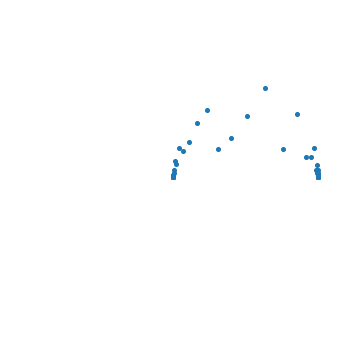

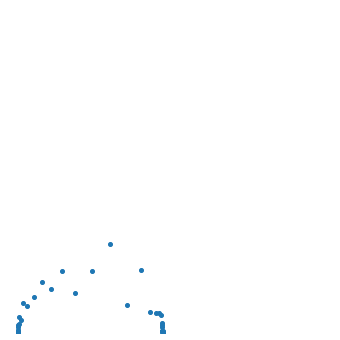

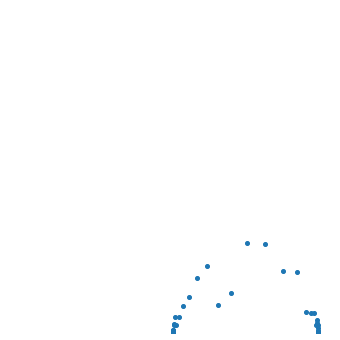

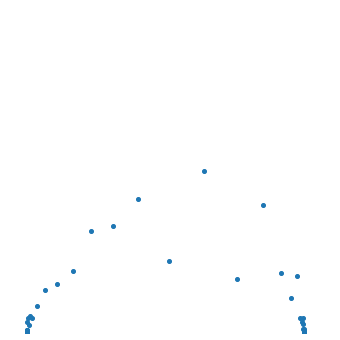

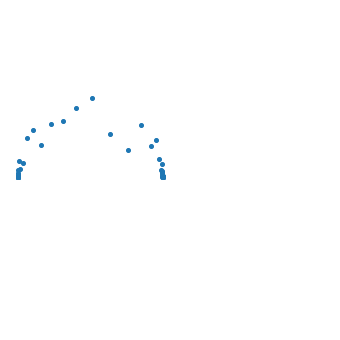

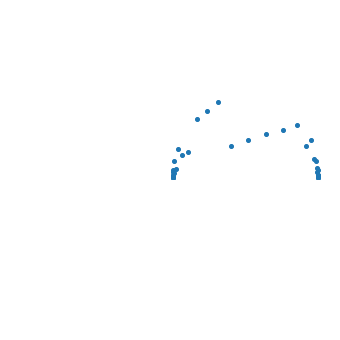

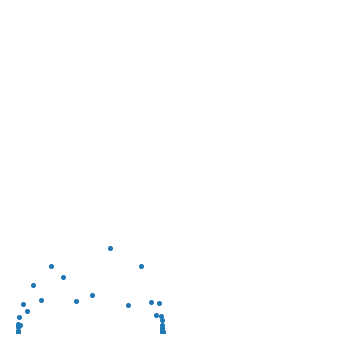

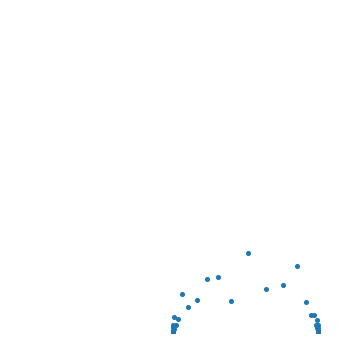

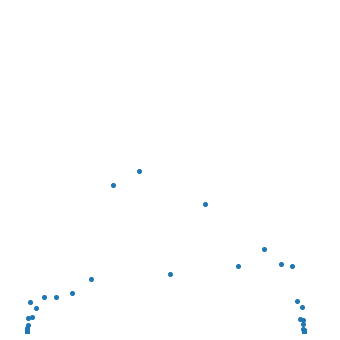

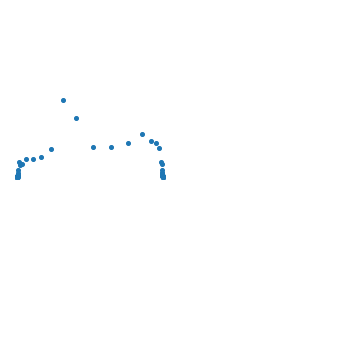

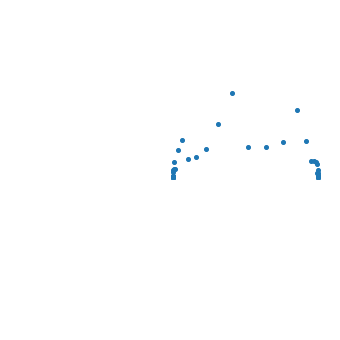

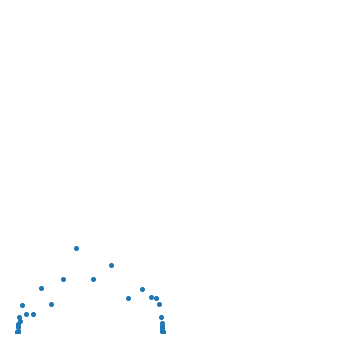

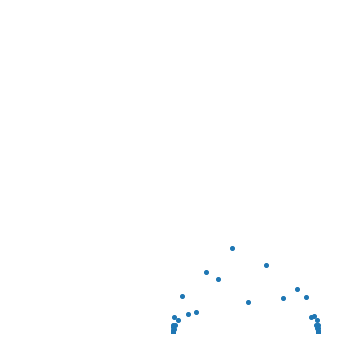

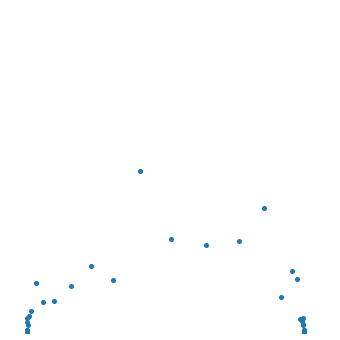

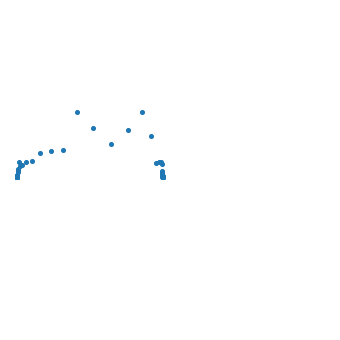

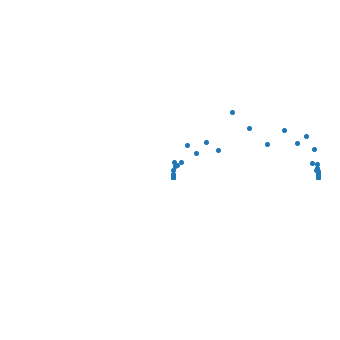

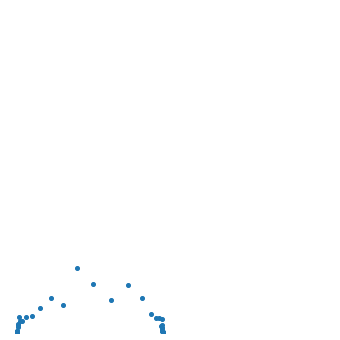

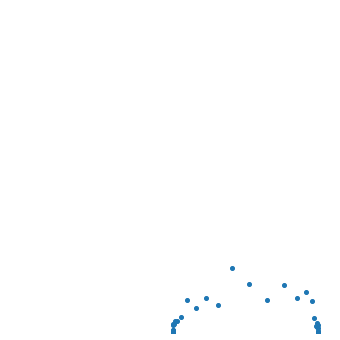

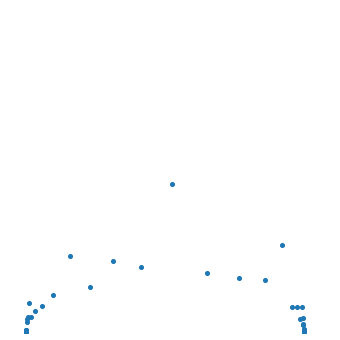

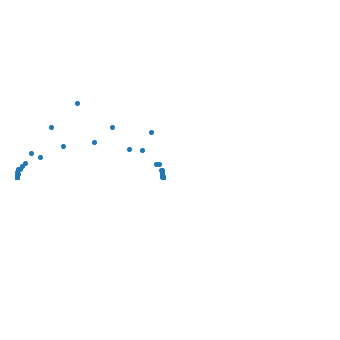

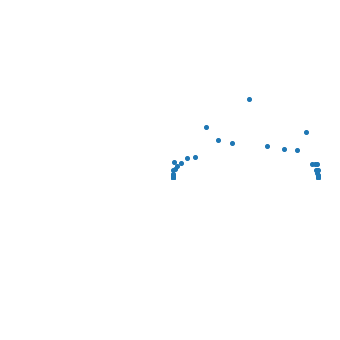

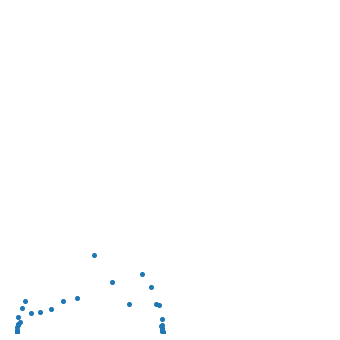

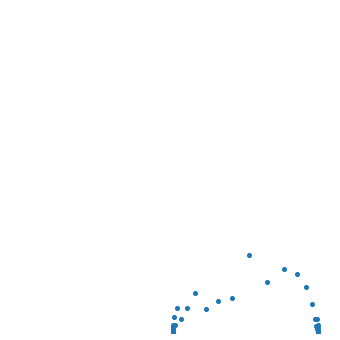

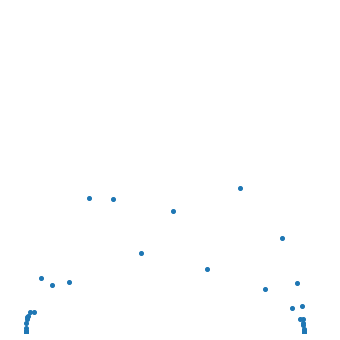

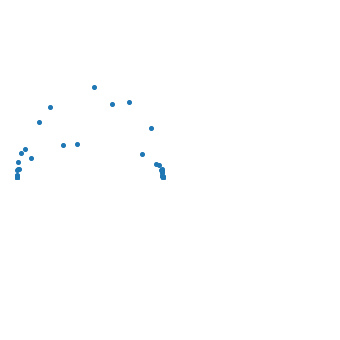

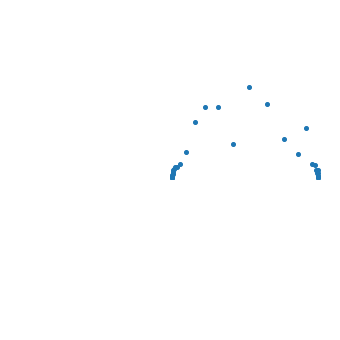

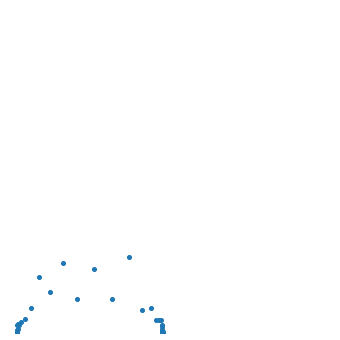

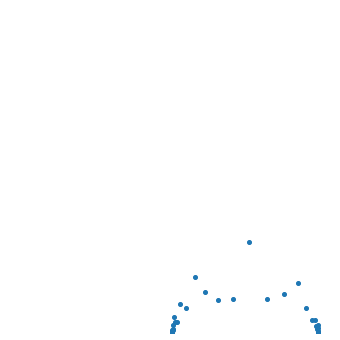

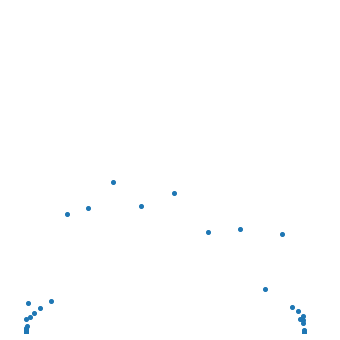

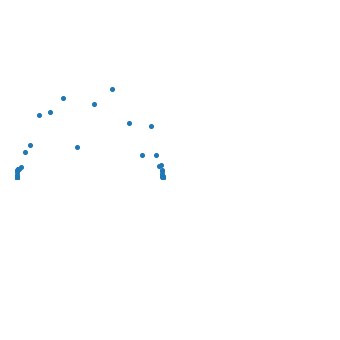

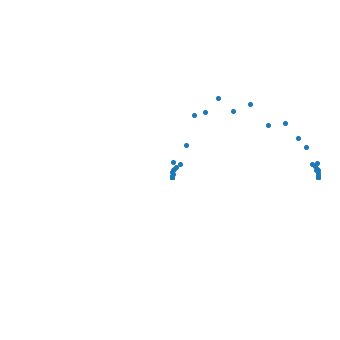

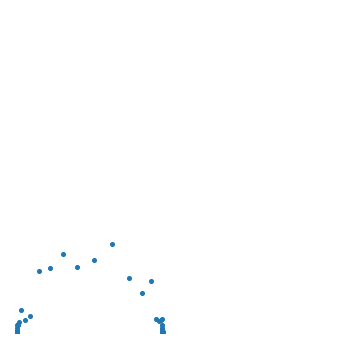

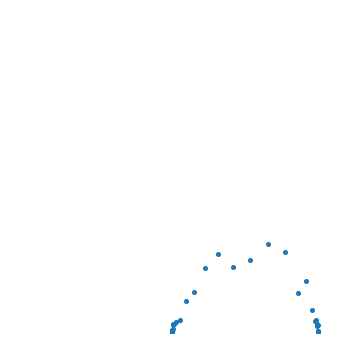

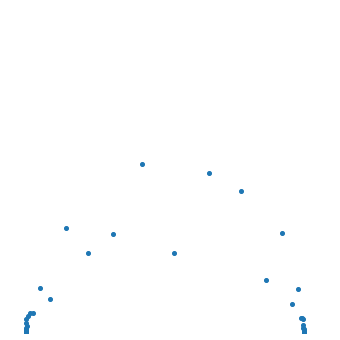

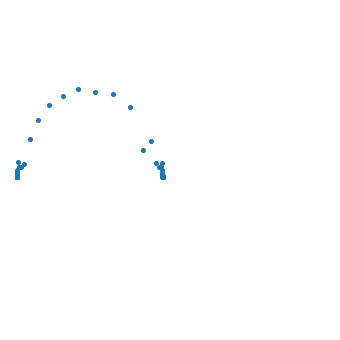

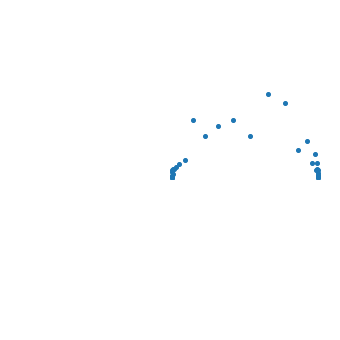

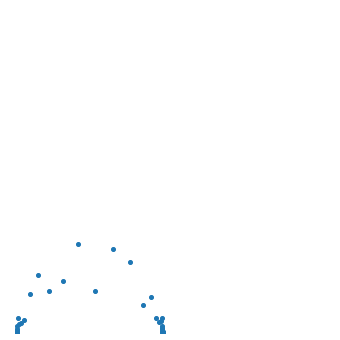

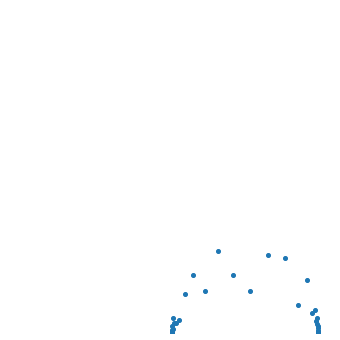

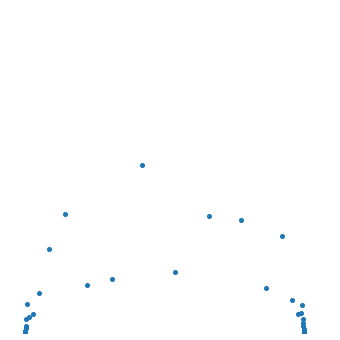

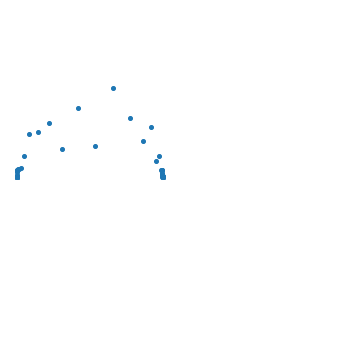

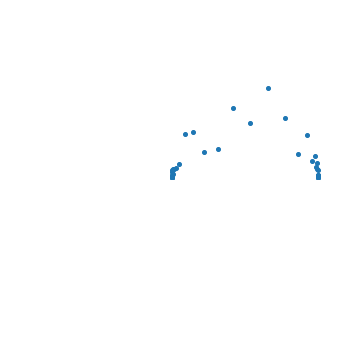

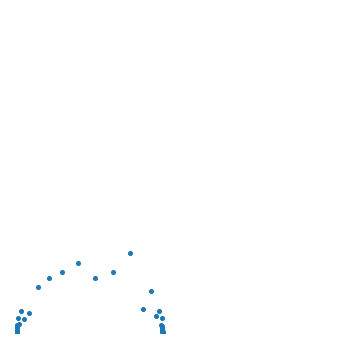

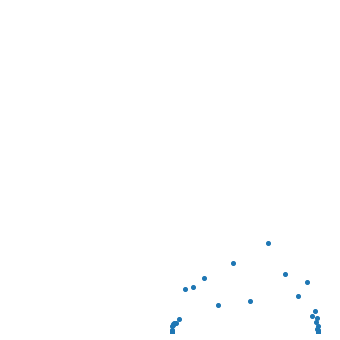

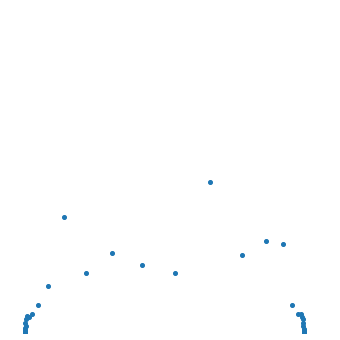

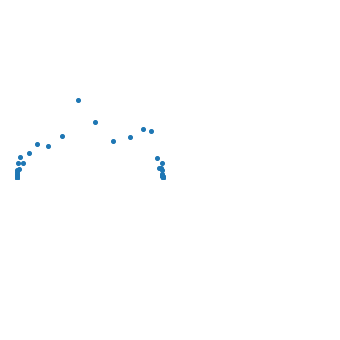

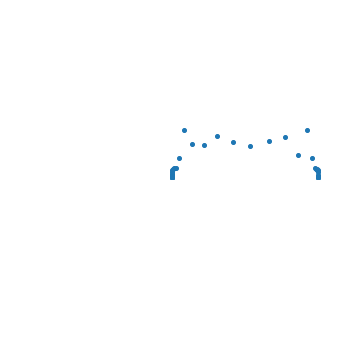

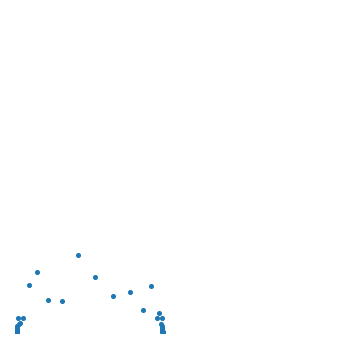

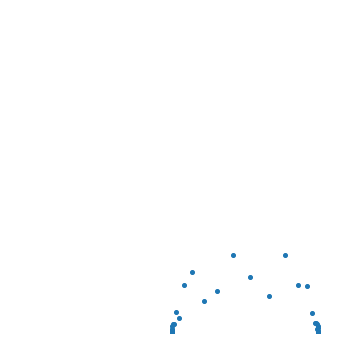

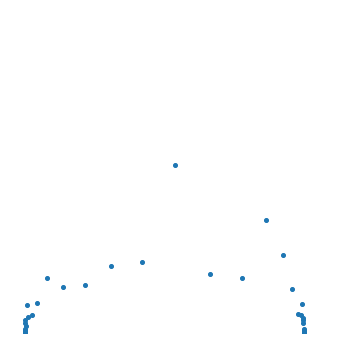

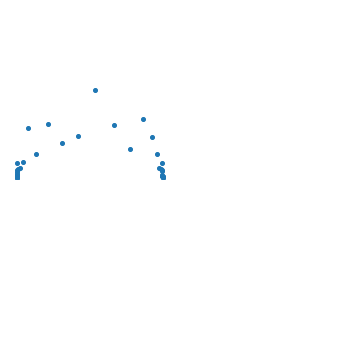

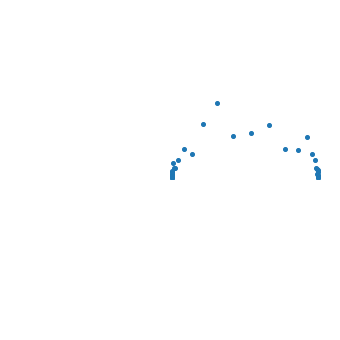

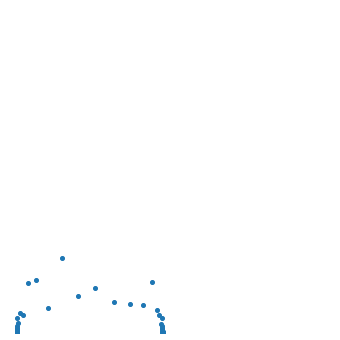

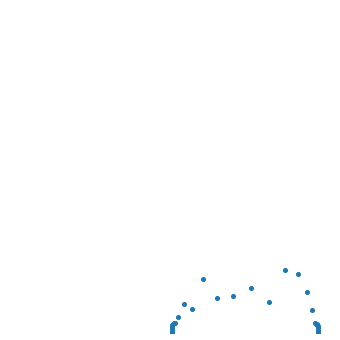

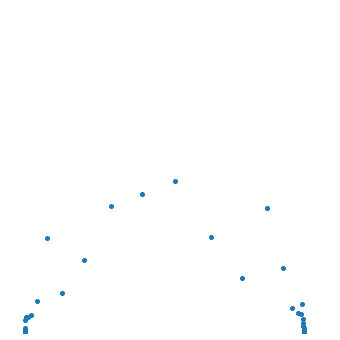

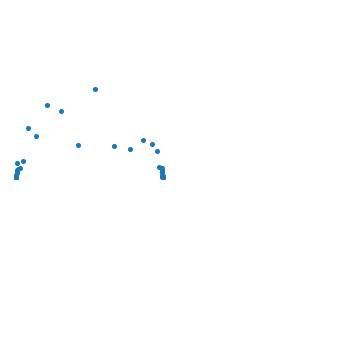

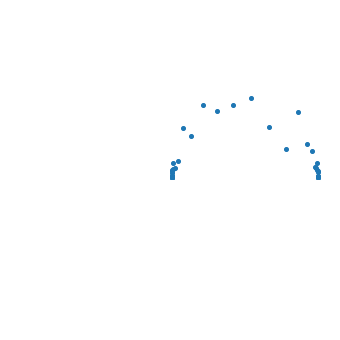

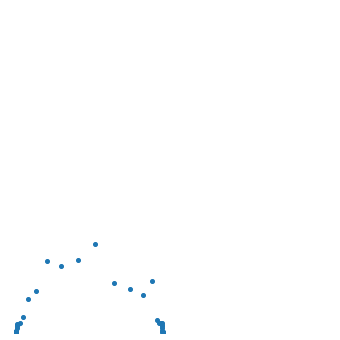

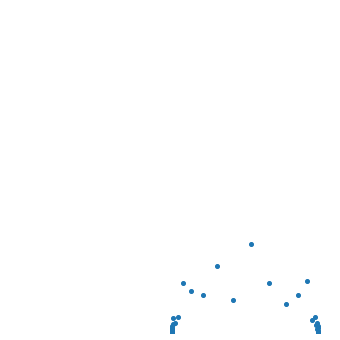

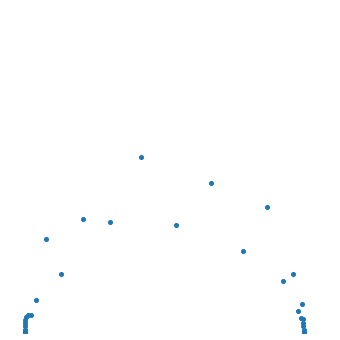

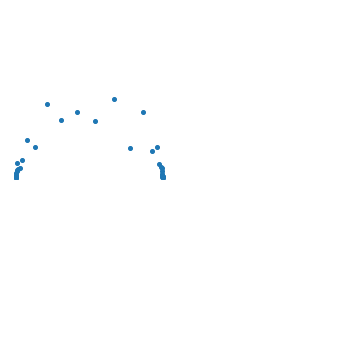

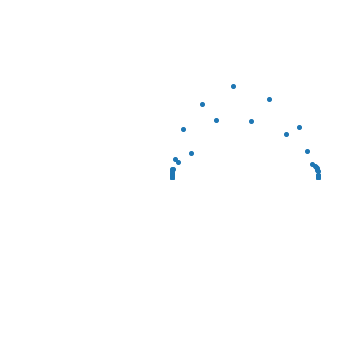

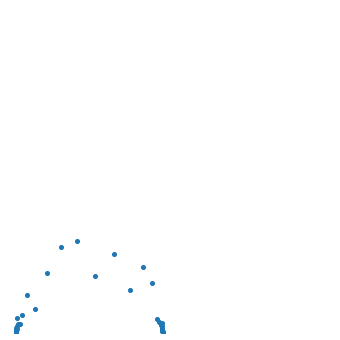

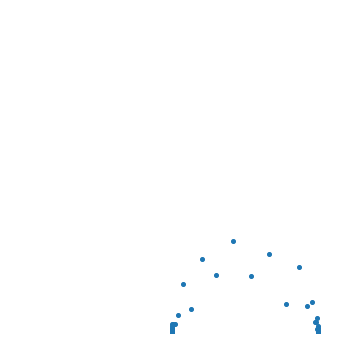

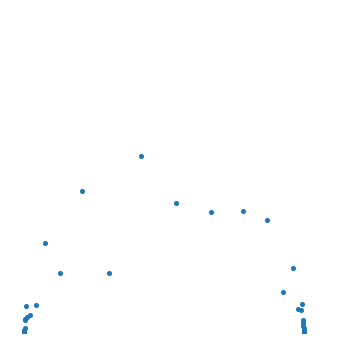

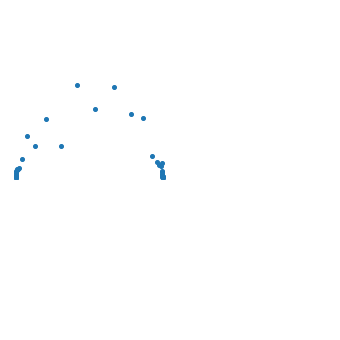

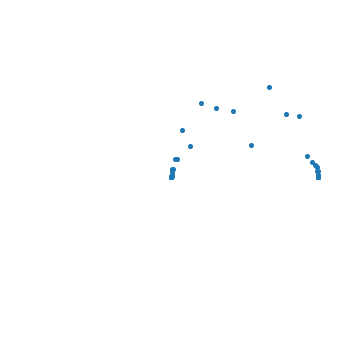

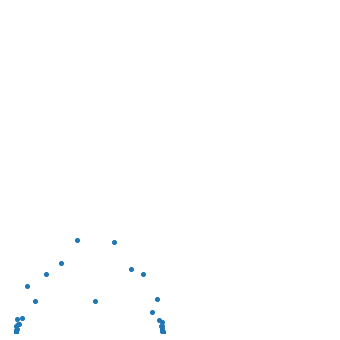

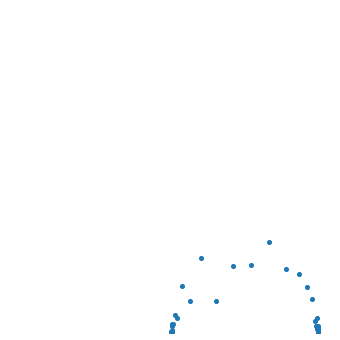

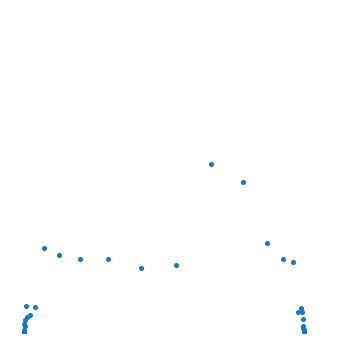

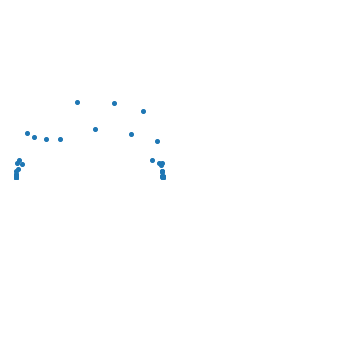

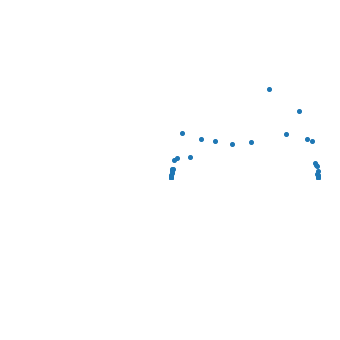

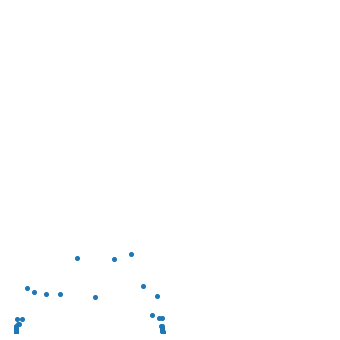

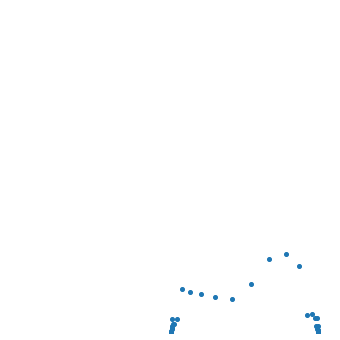

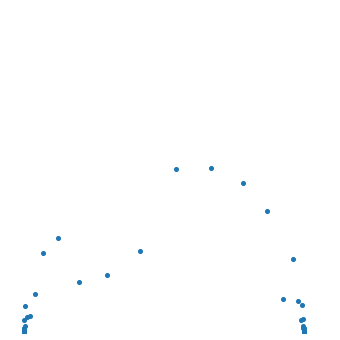

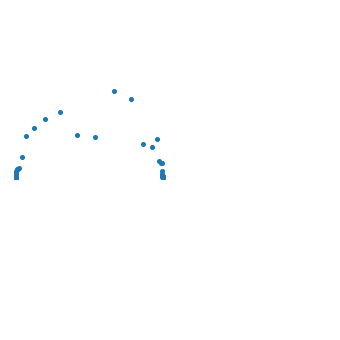

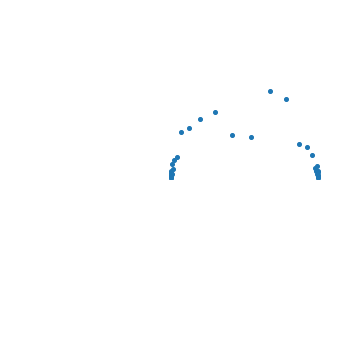

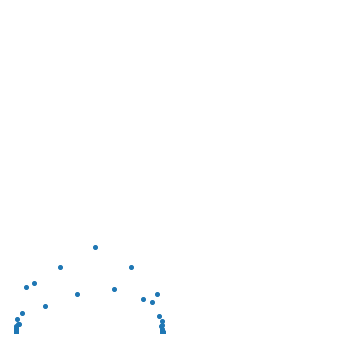

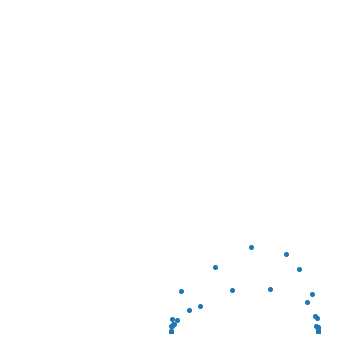

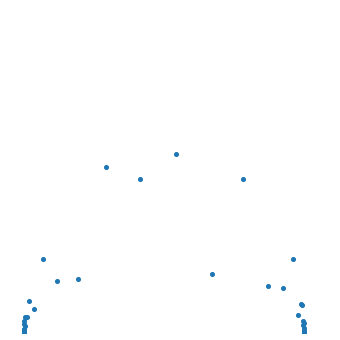

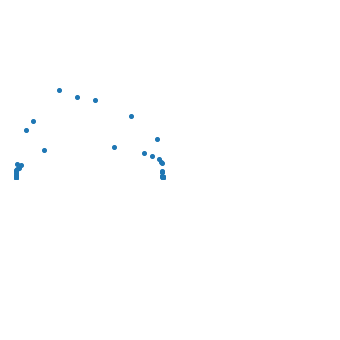

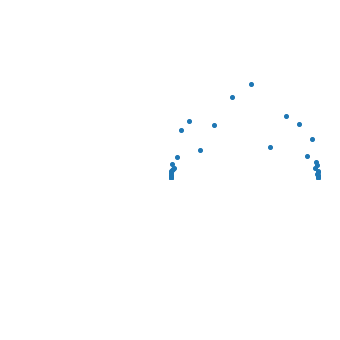

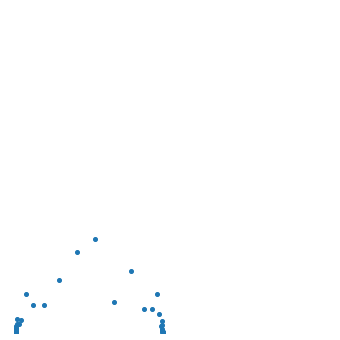

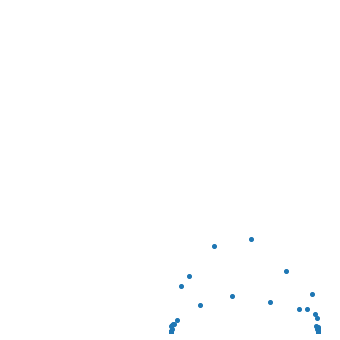

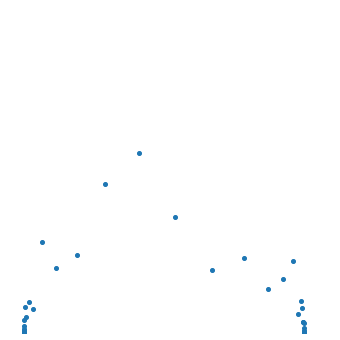

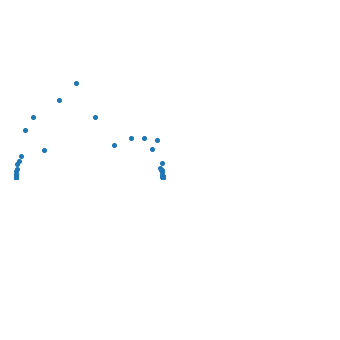

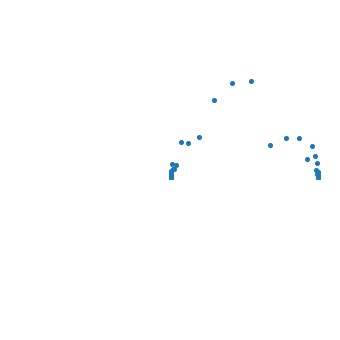

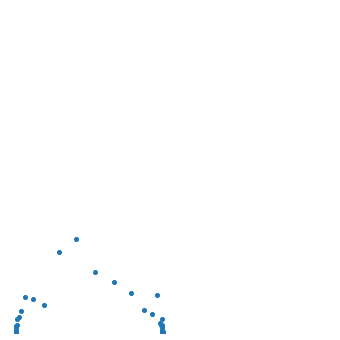

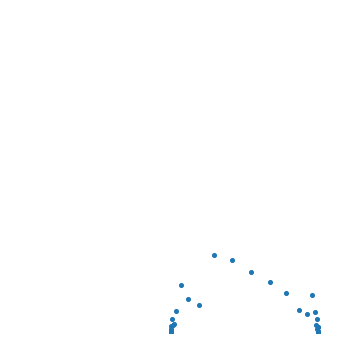

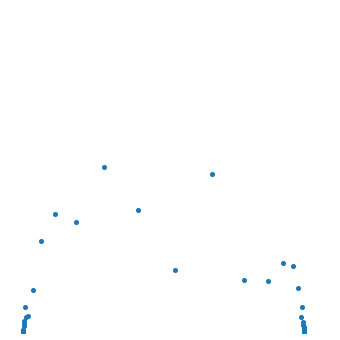

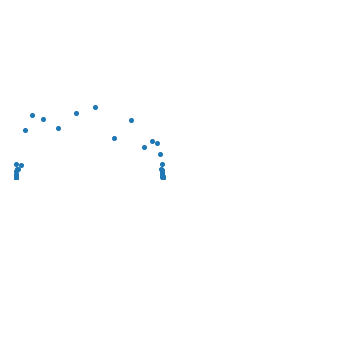

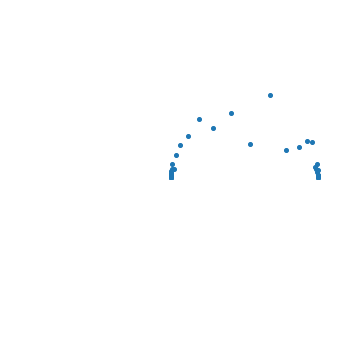

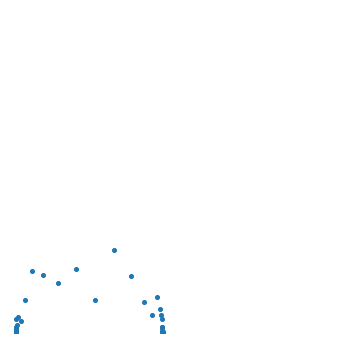

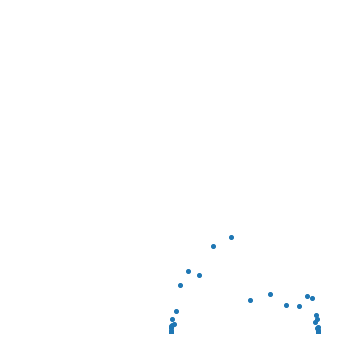

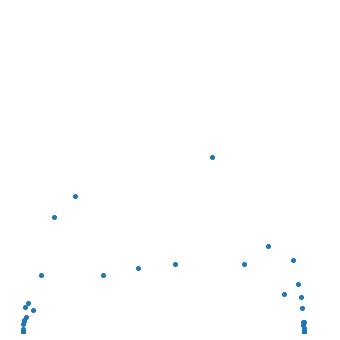

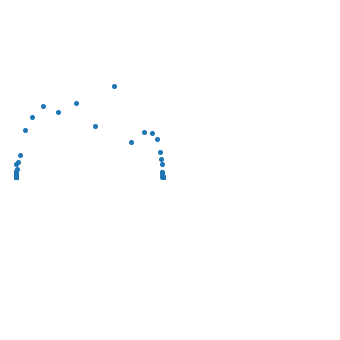

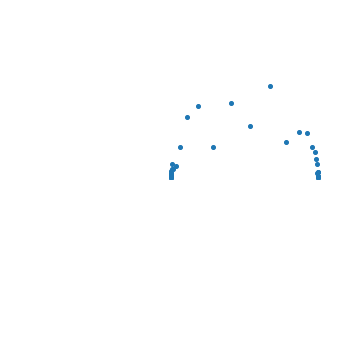

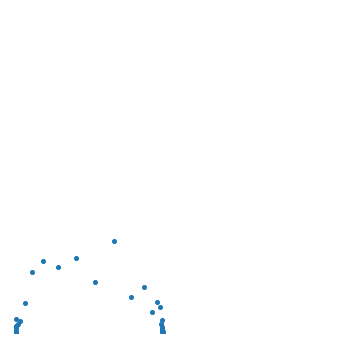

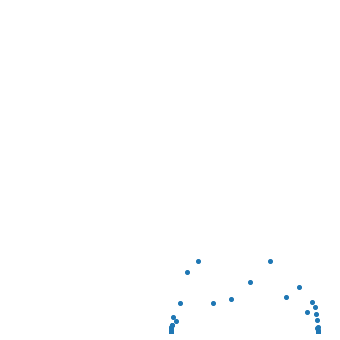

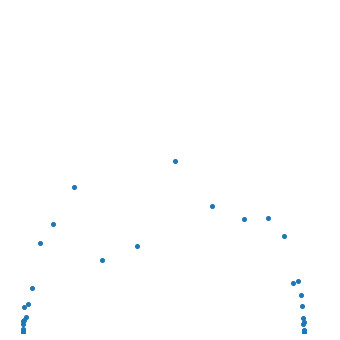

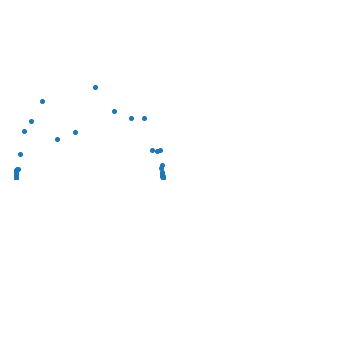

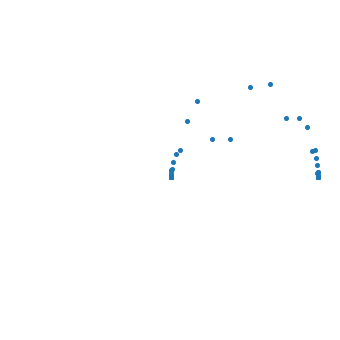

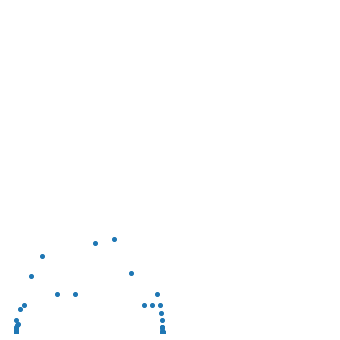

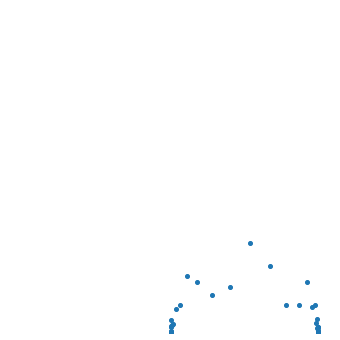

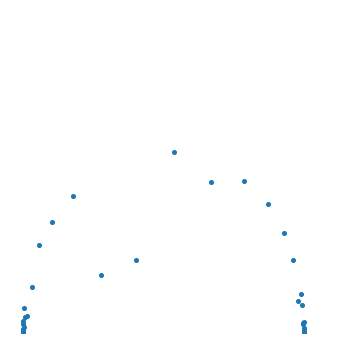

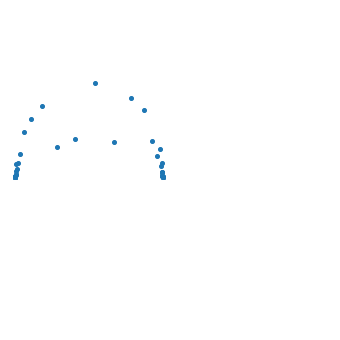

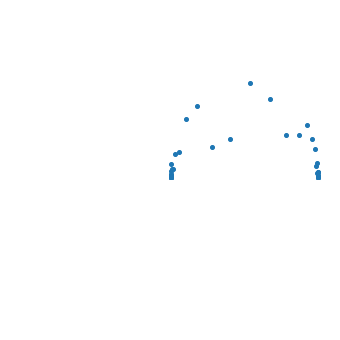

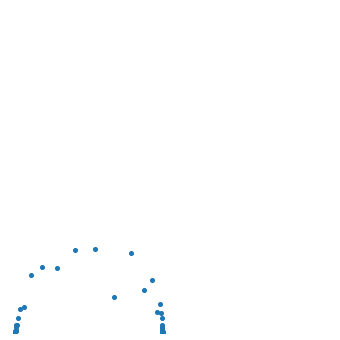

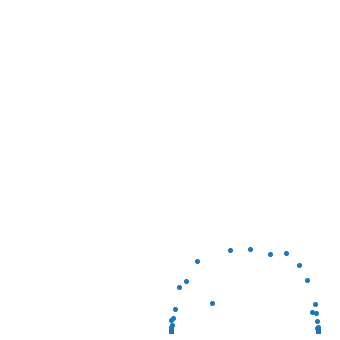

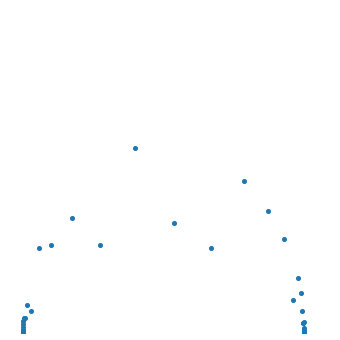

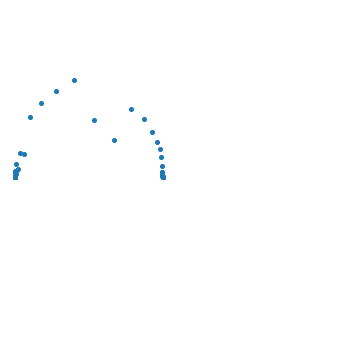

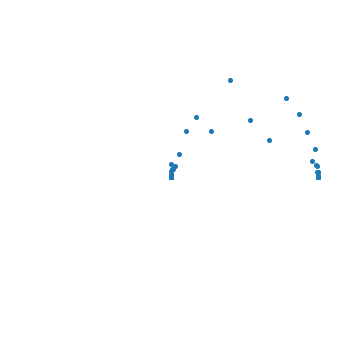

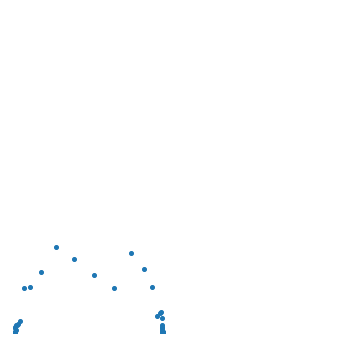

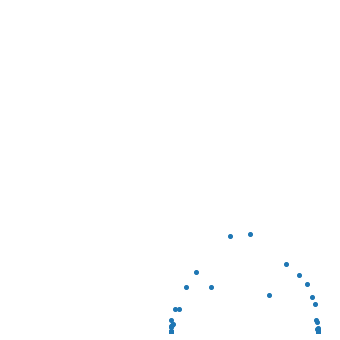

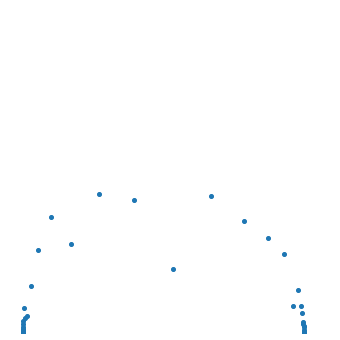

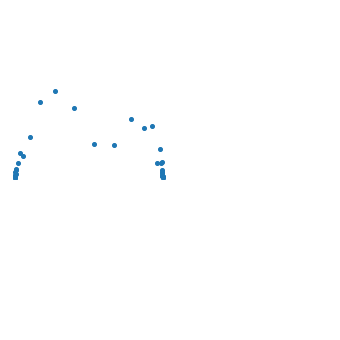

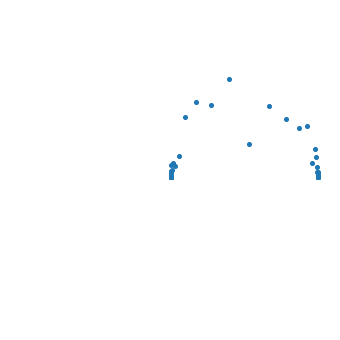

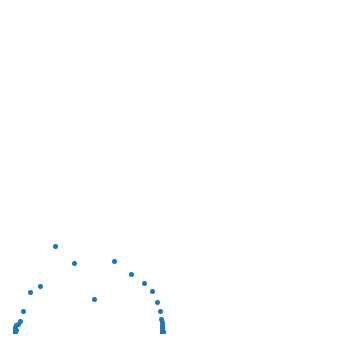

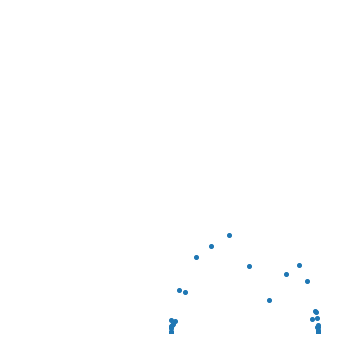

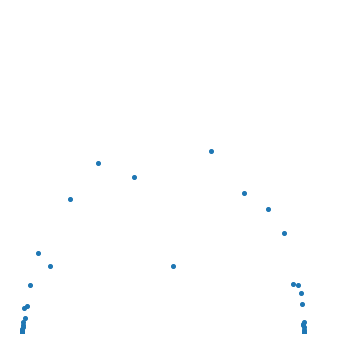

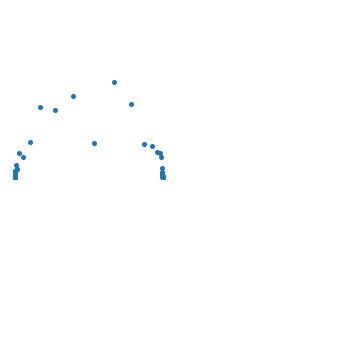

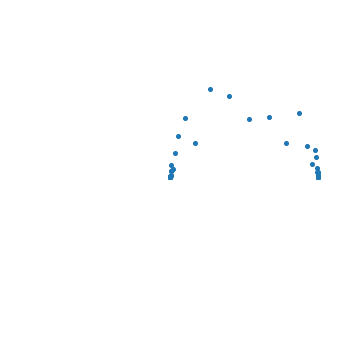

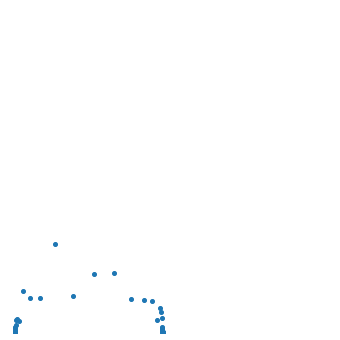

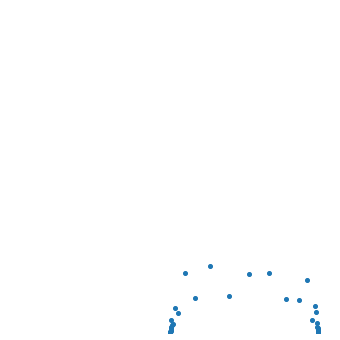

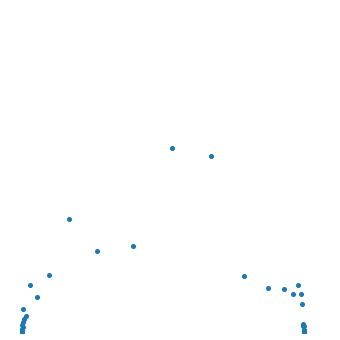

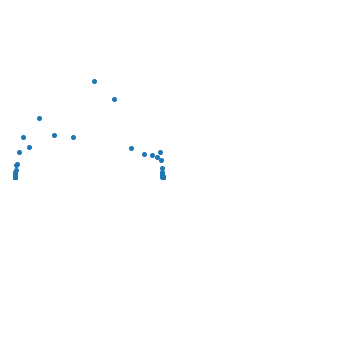

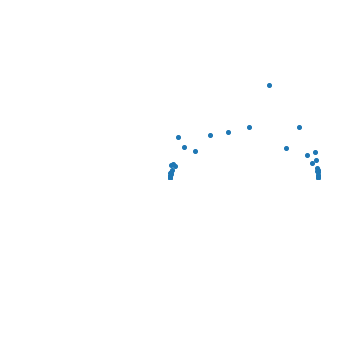

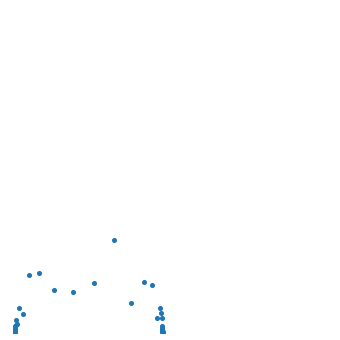

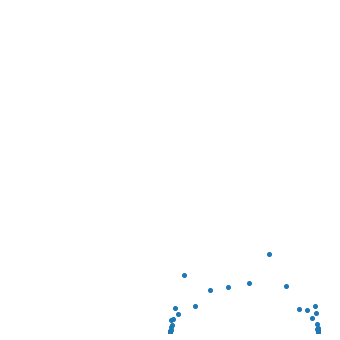

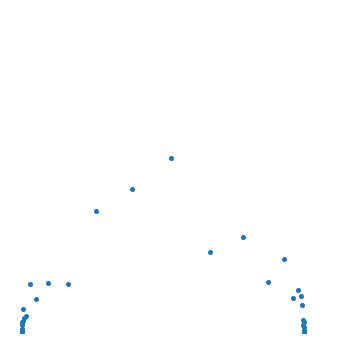

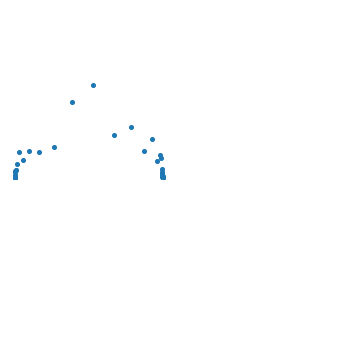

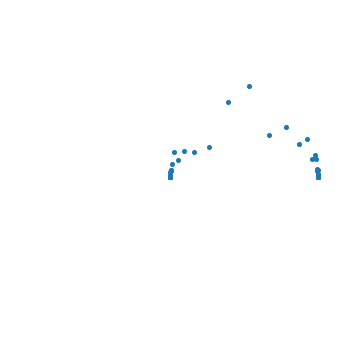

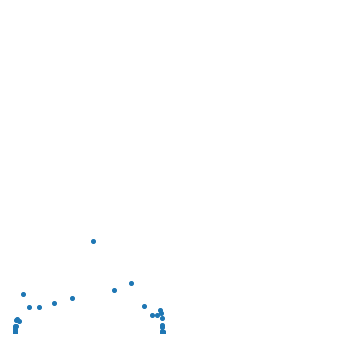

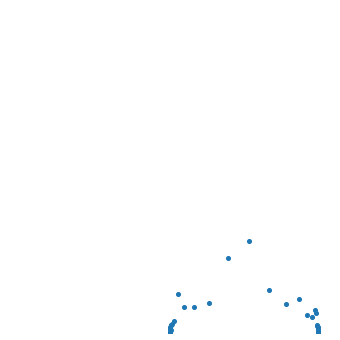

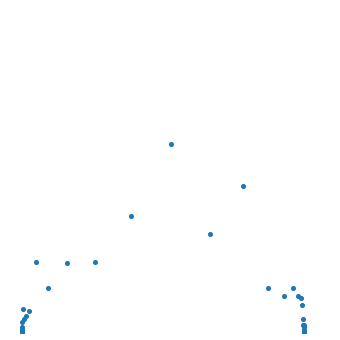

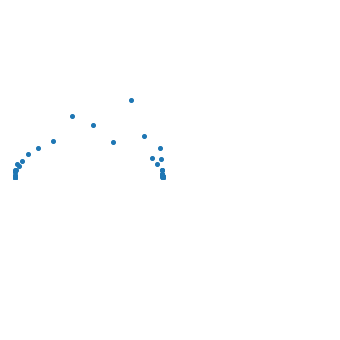

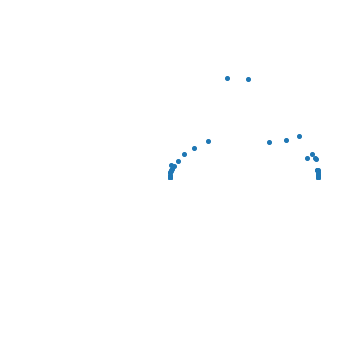

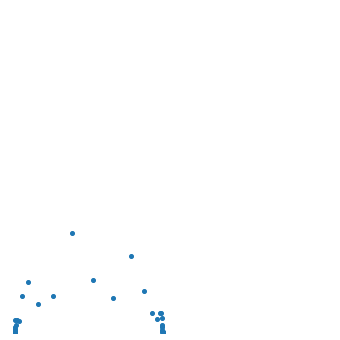

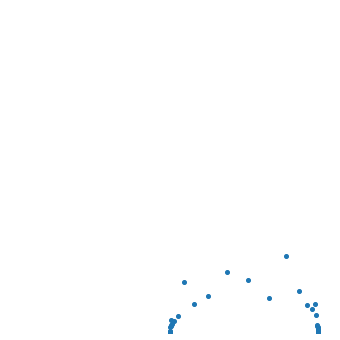

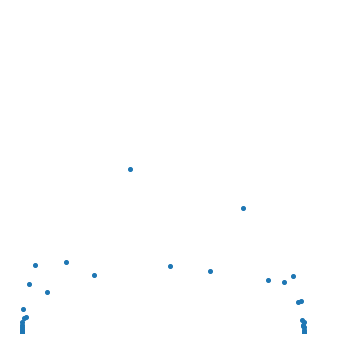

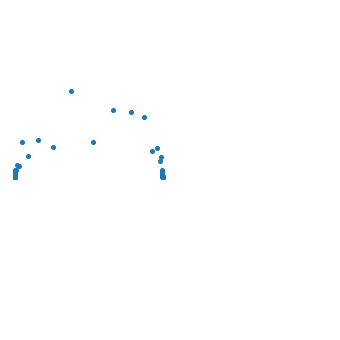

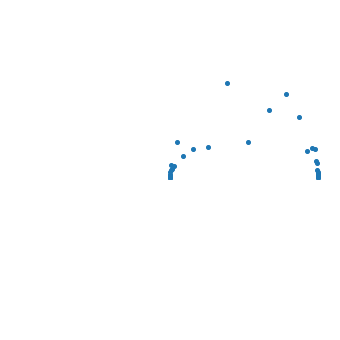

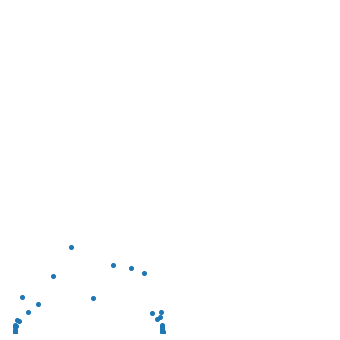

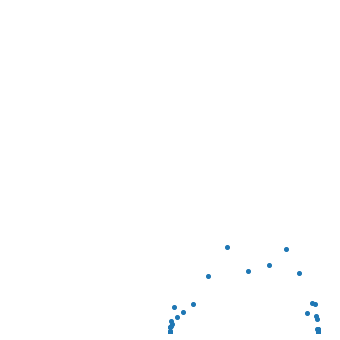

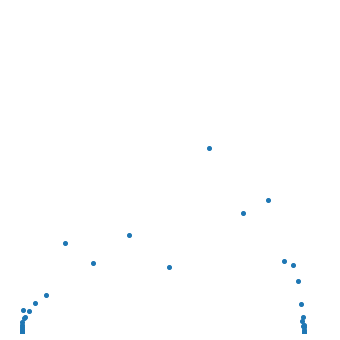

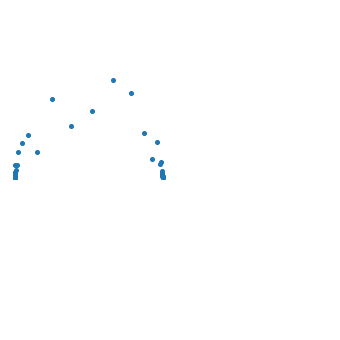

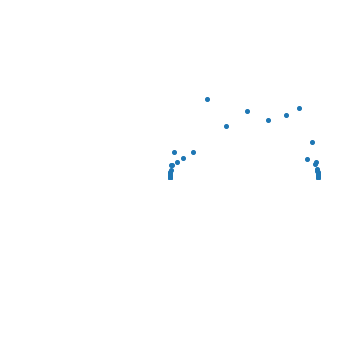

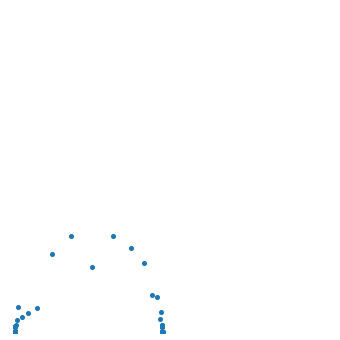

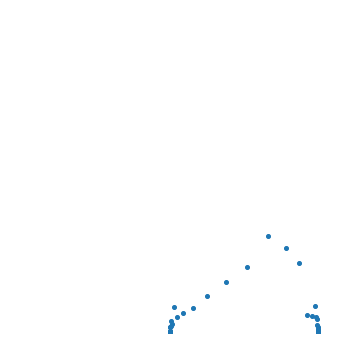

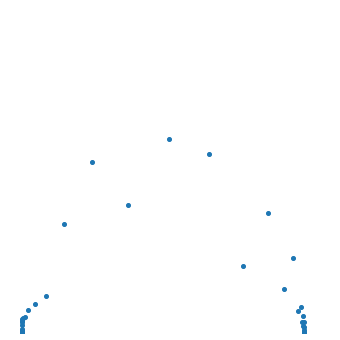

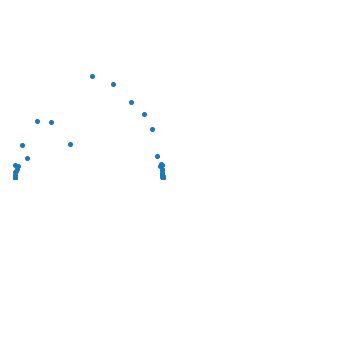

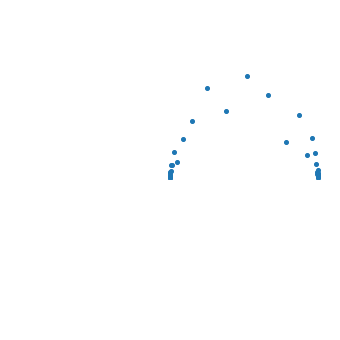

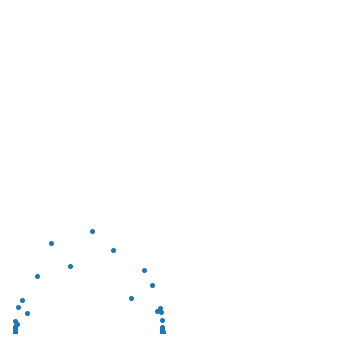

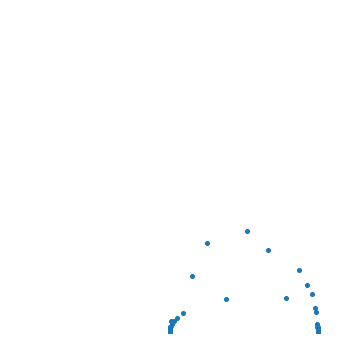

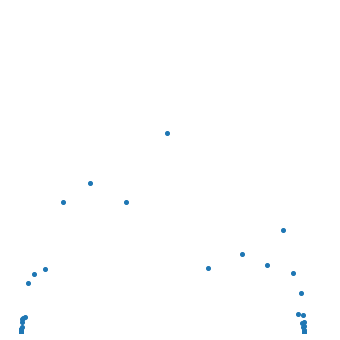

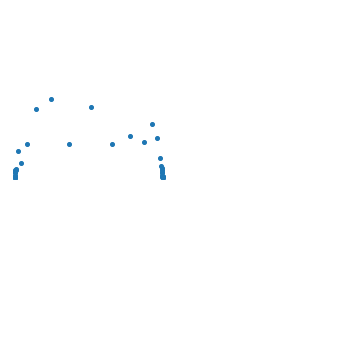

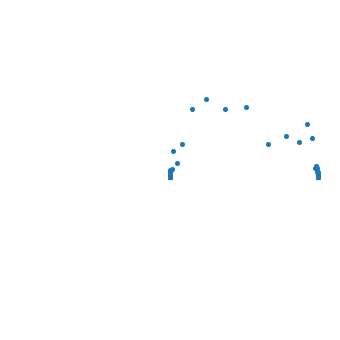

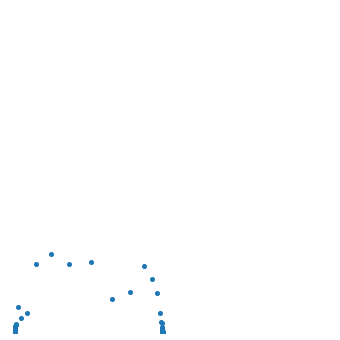

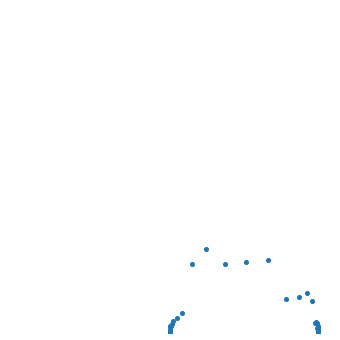

In [18]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 25E-6 #F
R2= 100   # ohm
R1= 10   # ohm
resistance= np.linspace(1,100,50, dtype= int, endpoint=True)
for R1 in resistance:
    for i in range(5):
        file= data_simulation.RsRCRC_file_writer(f_start, f_stop, decades, Rs, R1,C, R2,2*C, alteration='noise', noisescale=0.5, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

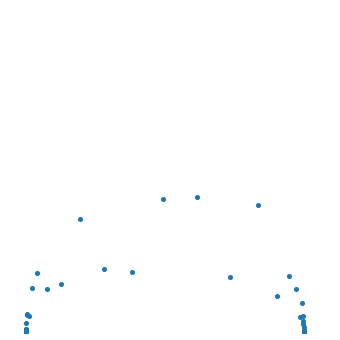

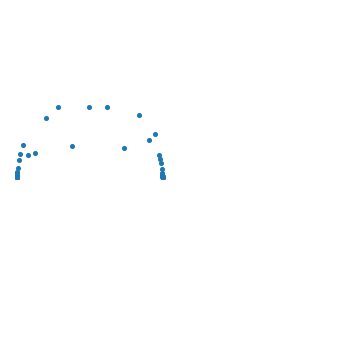

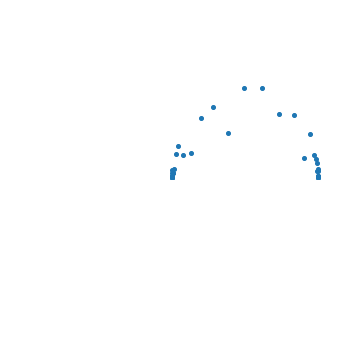

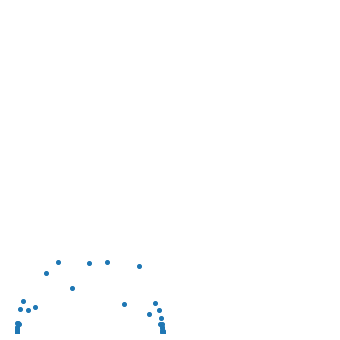

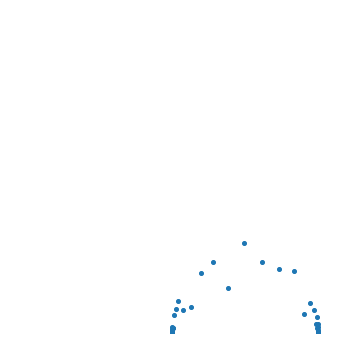

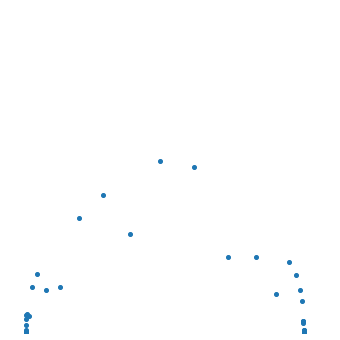

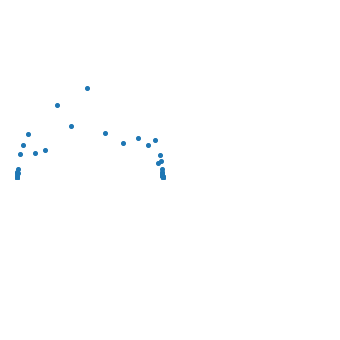

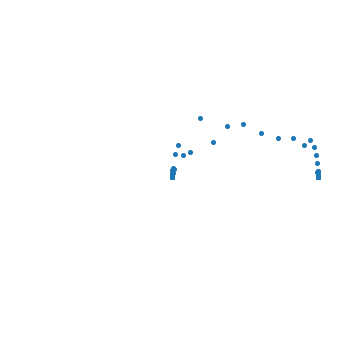

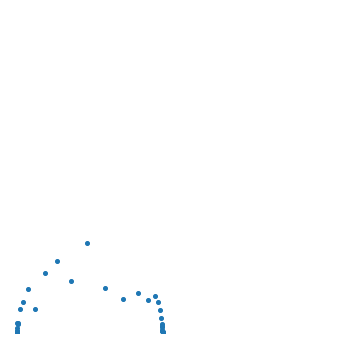

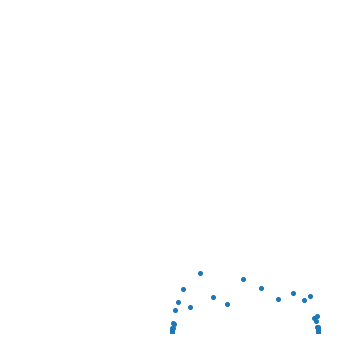

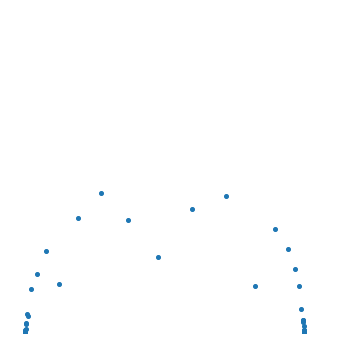

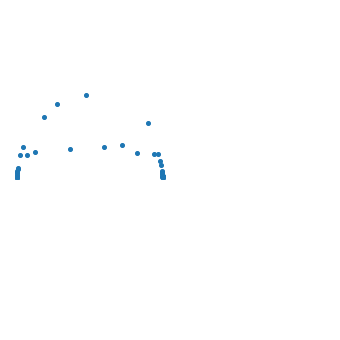

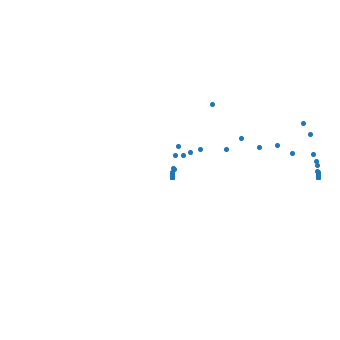

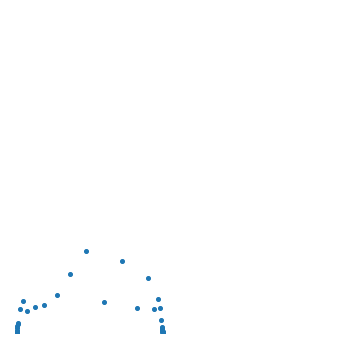

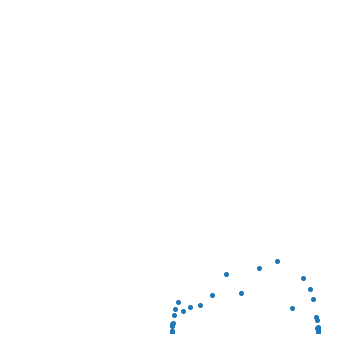

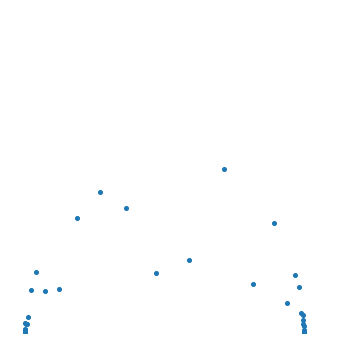

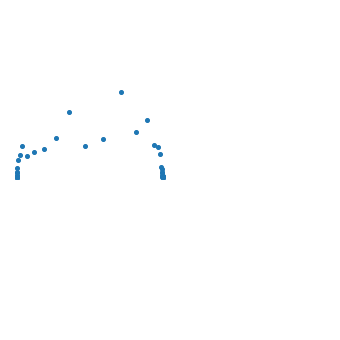

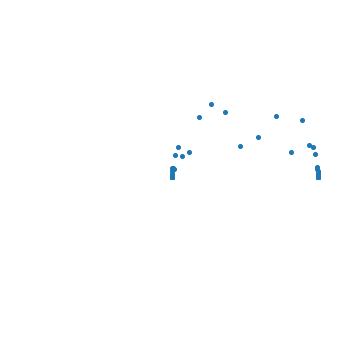

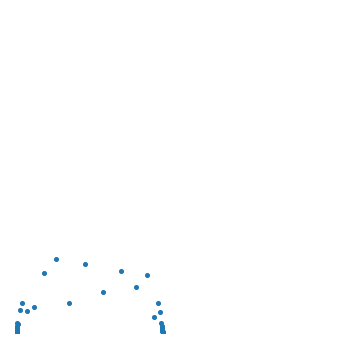

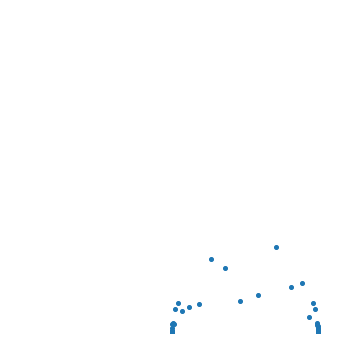

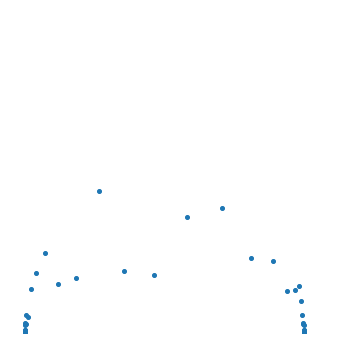

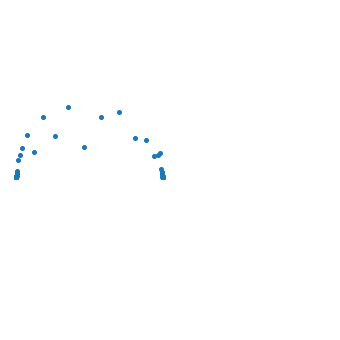

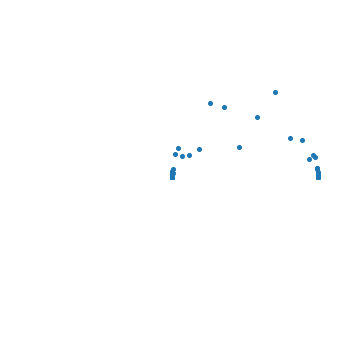

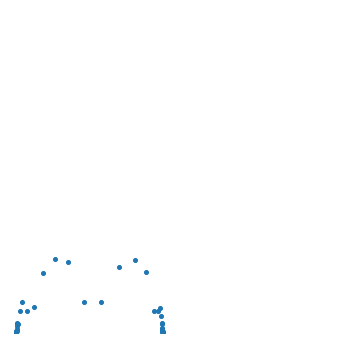

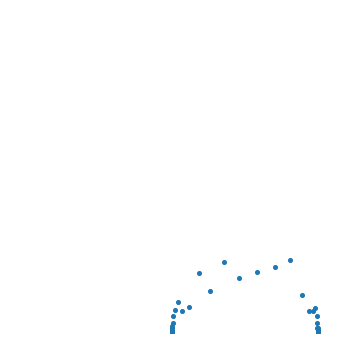

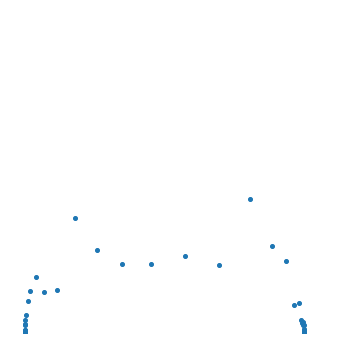

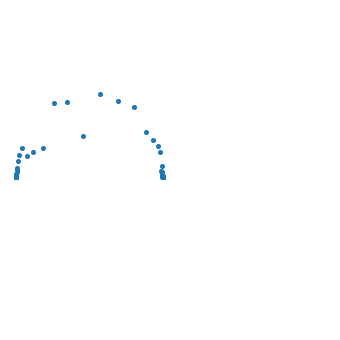

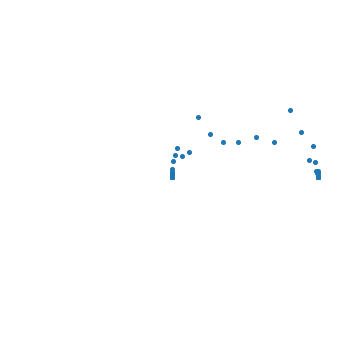

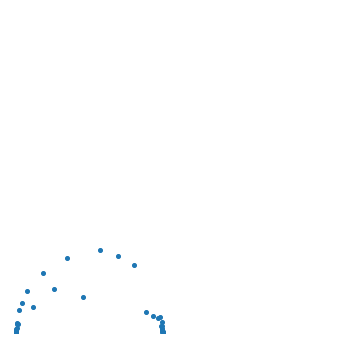

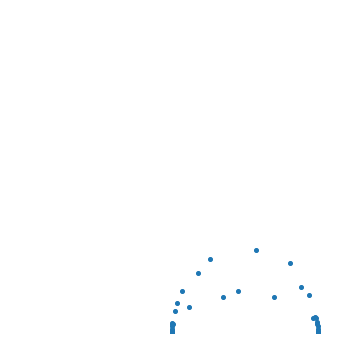

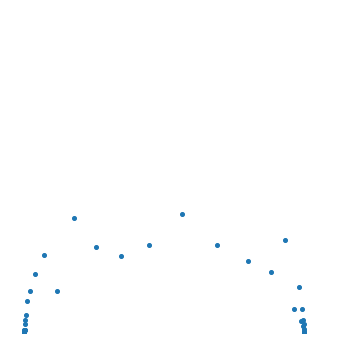

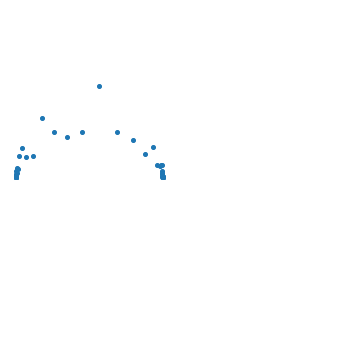

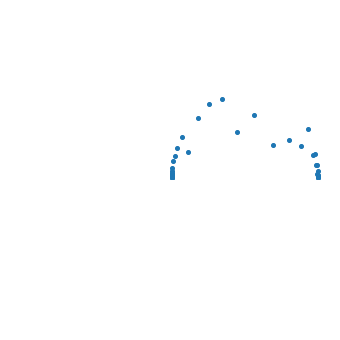

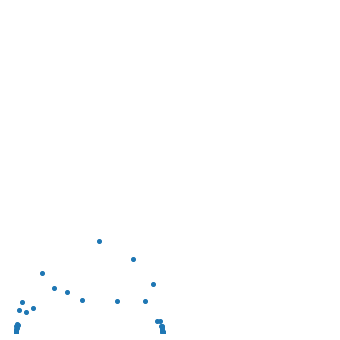

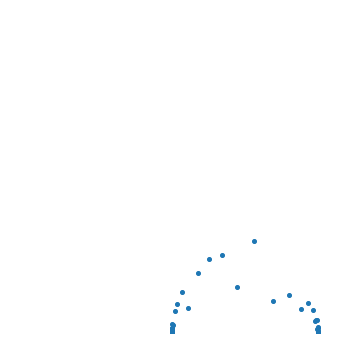

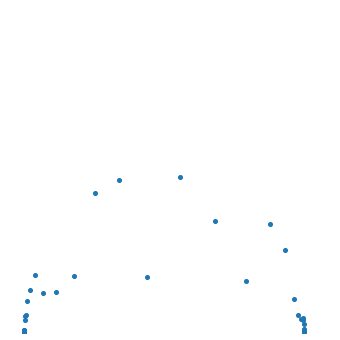

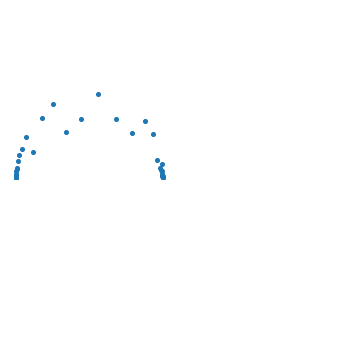

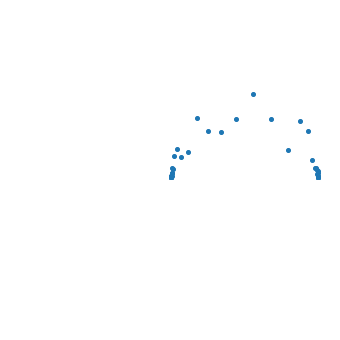

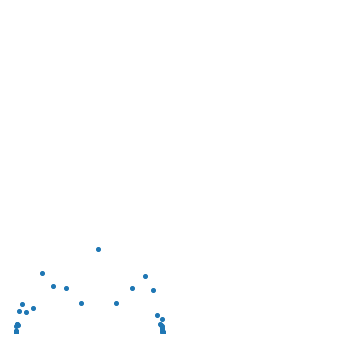

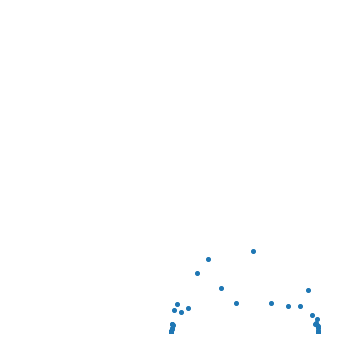

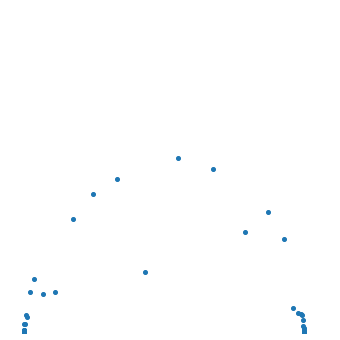

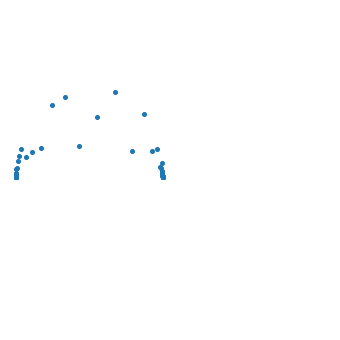

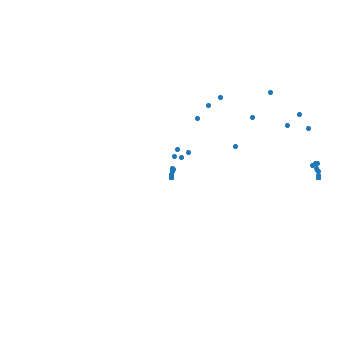

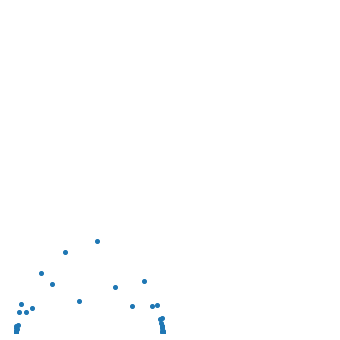

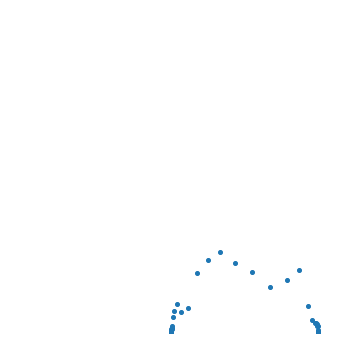

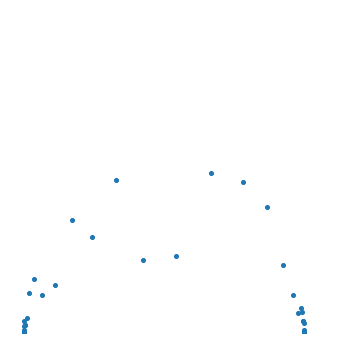

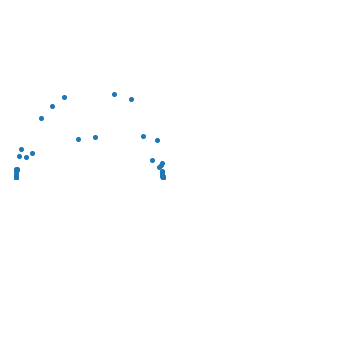

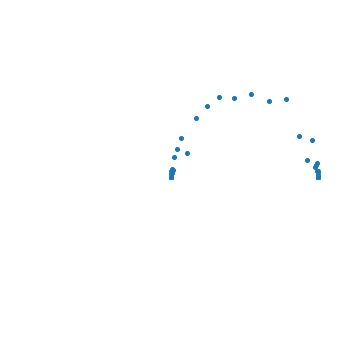

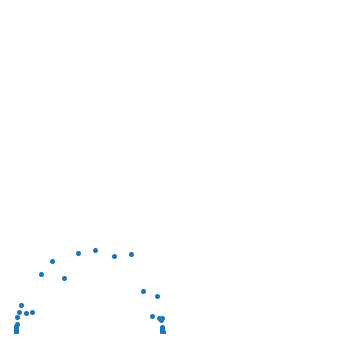

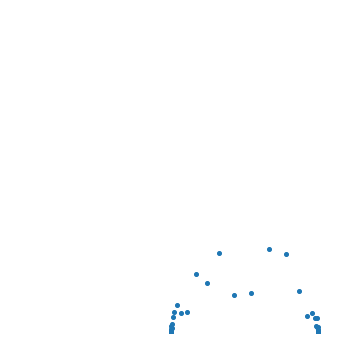

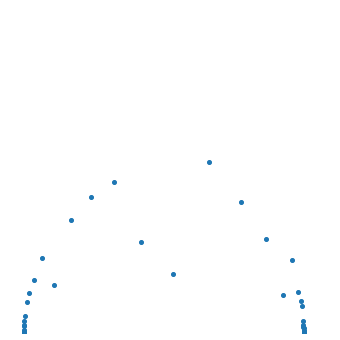

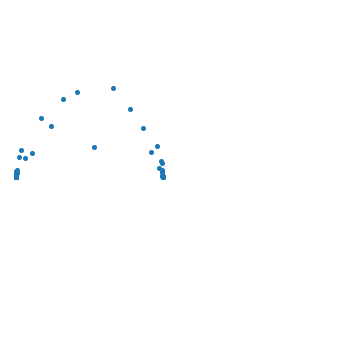

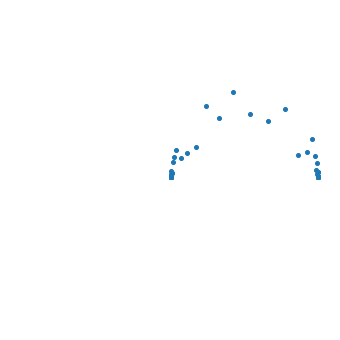

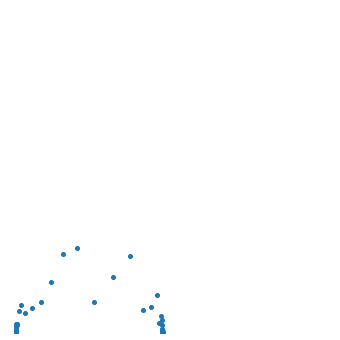

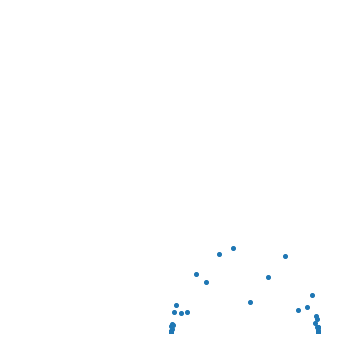

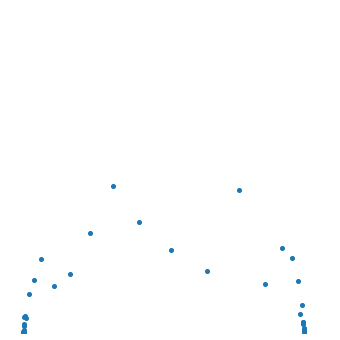

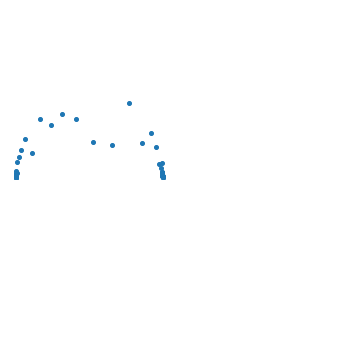

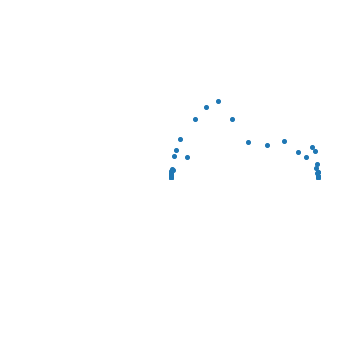

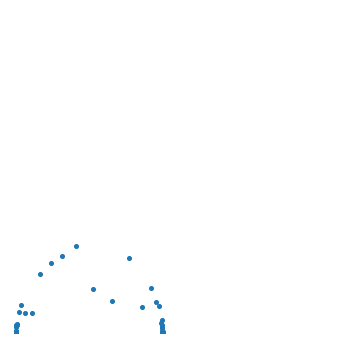

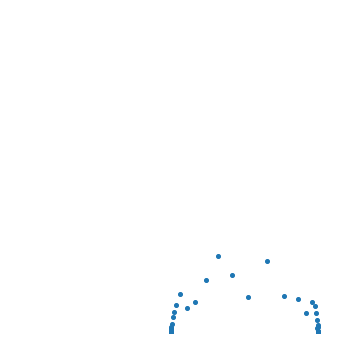

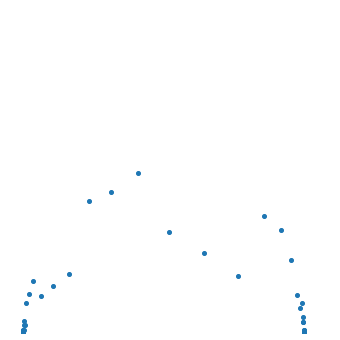

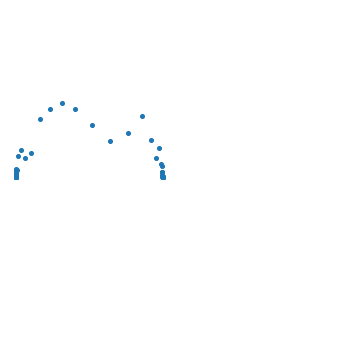

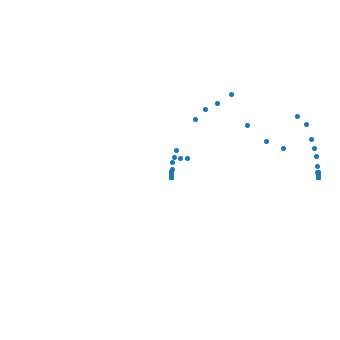

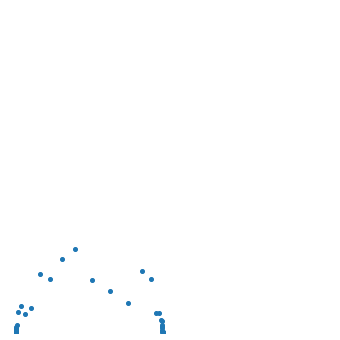

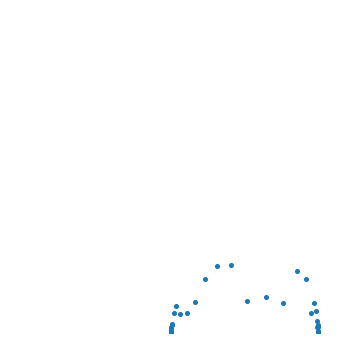

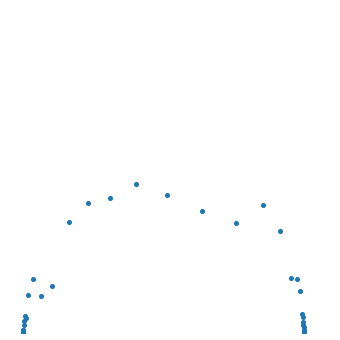

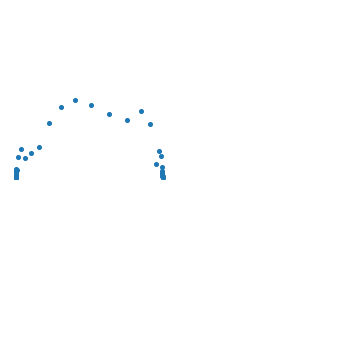

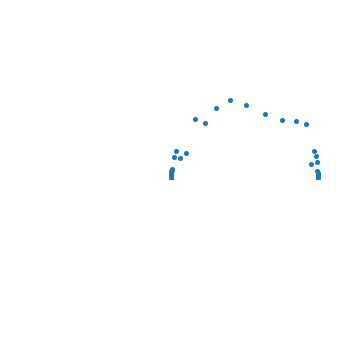

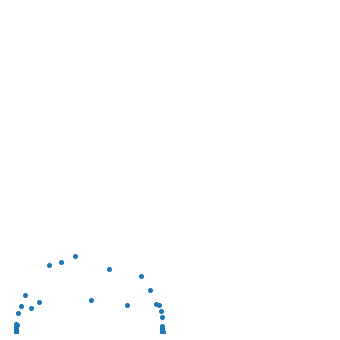

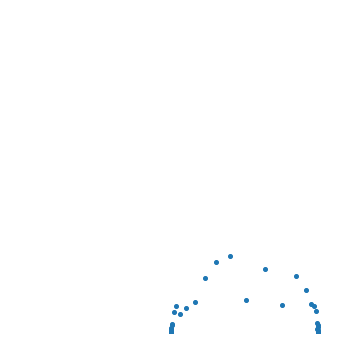

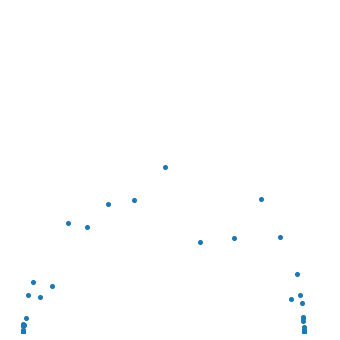

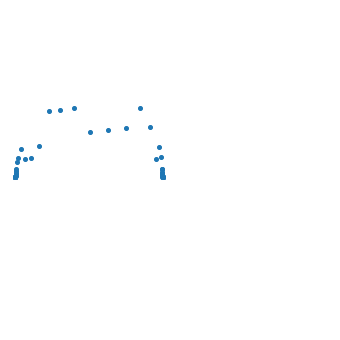

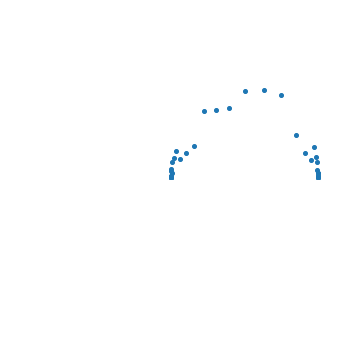

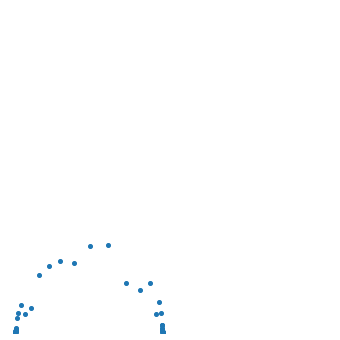

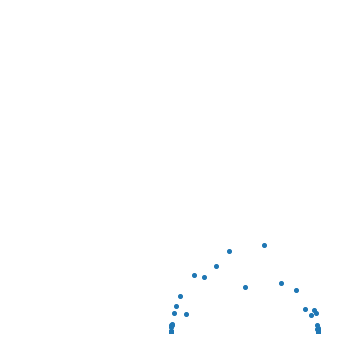

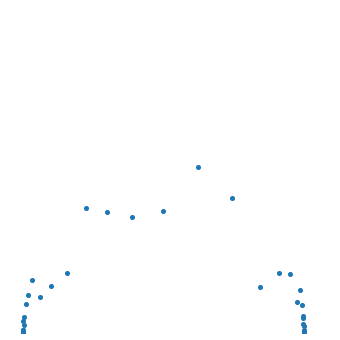

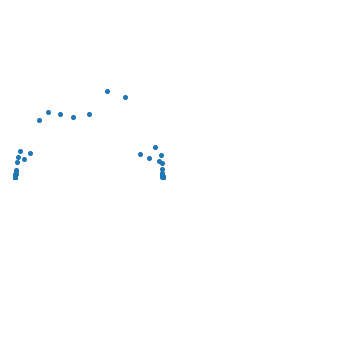

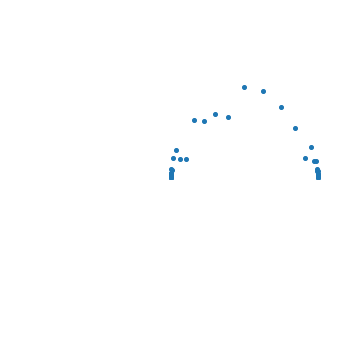

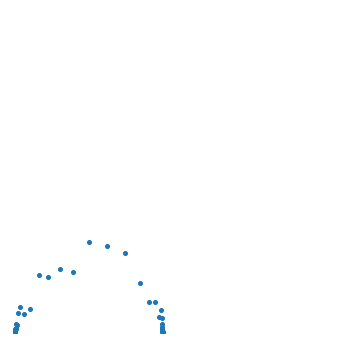

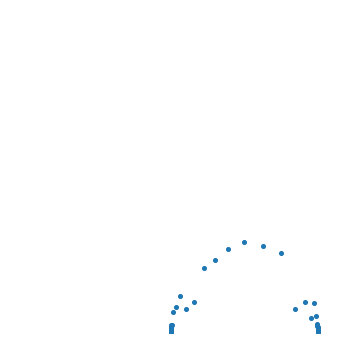

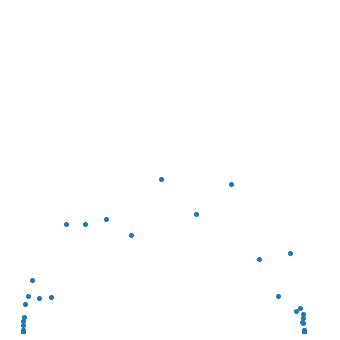

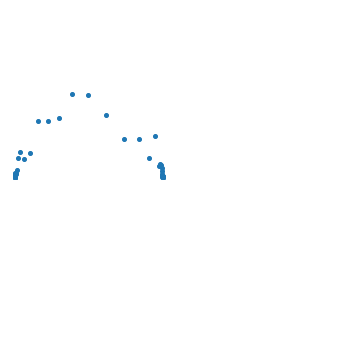

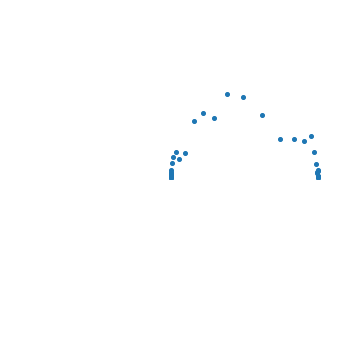

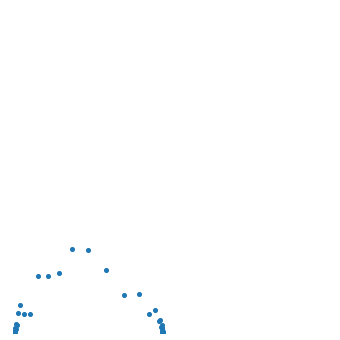

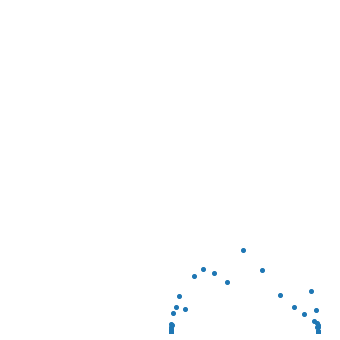

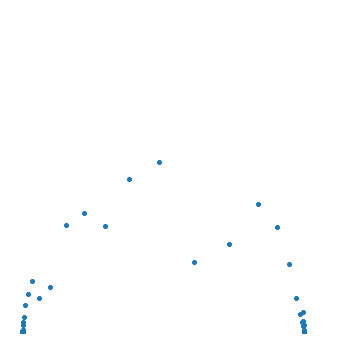

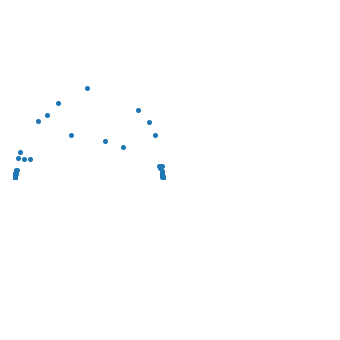

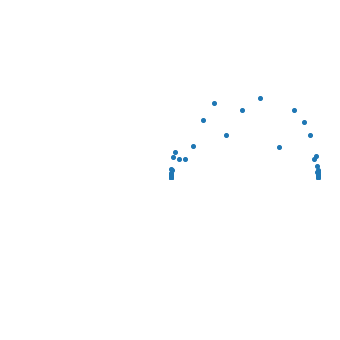

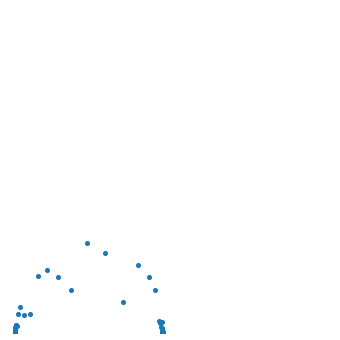

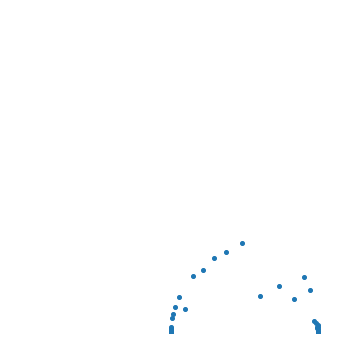

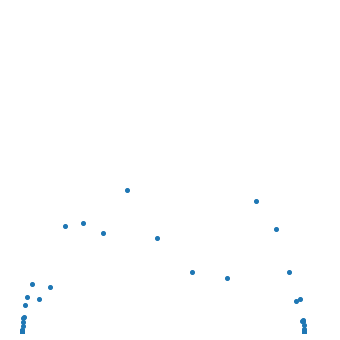

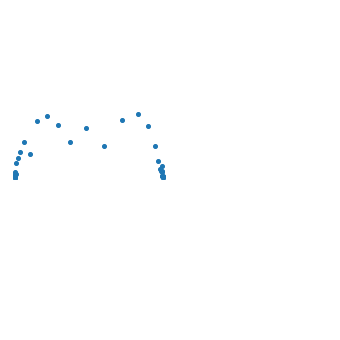

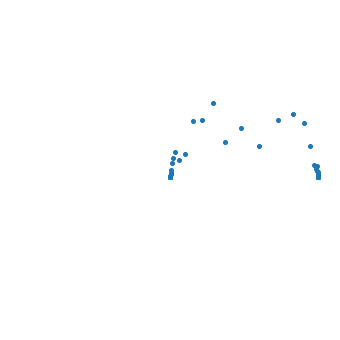

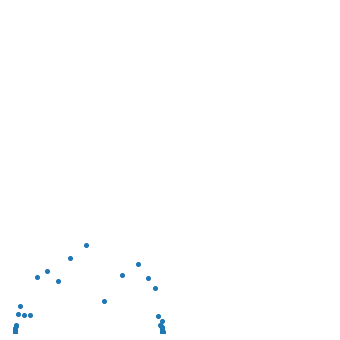

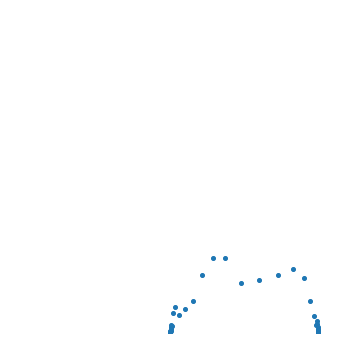

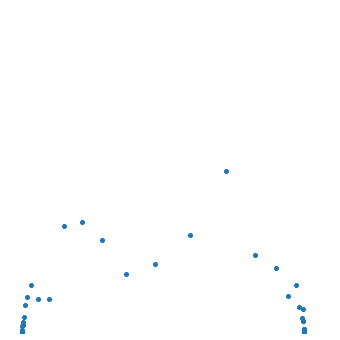

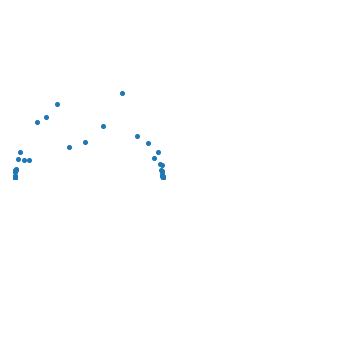

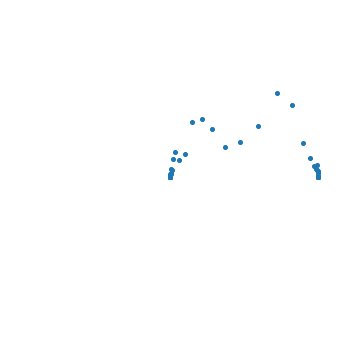

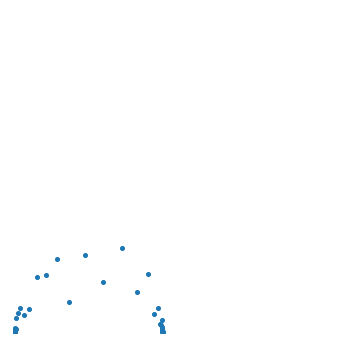

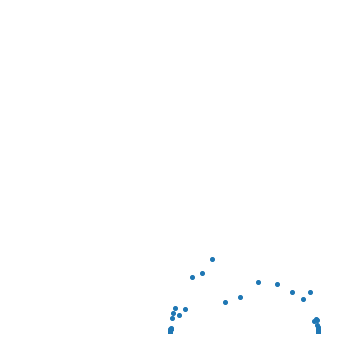

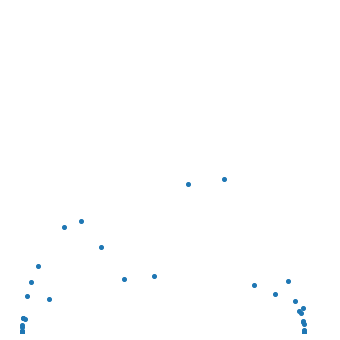

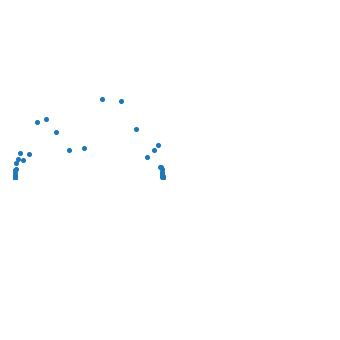

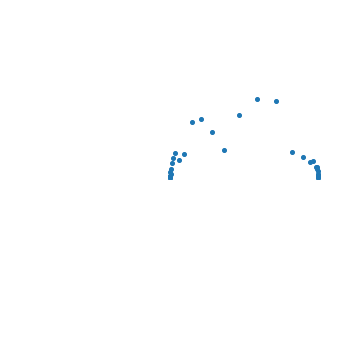

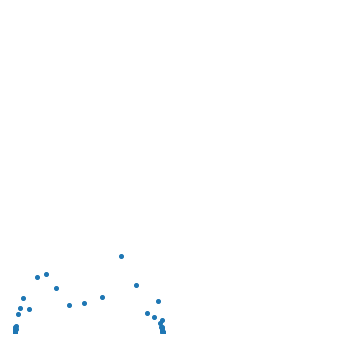

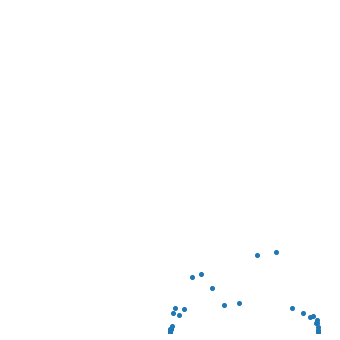

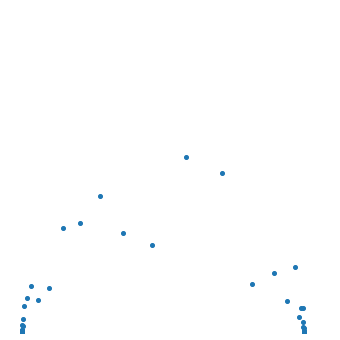

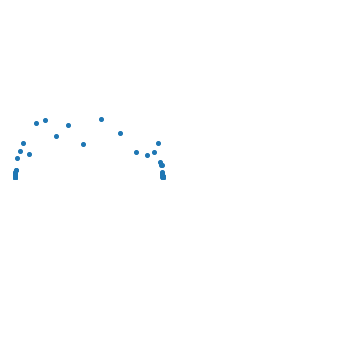

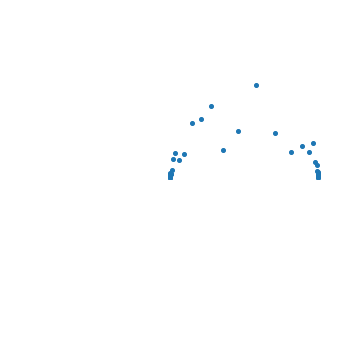

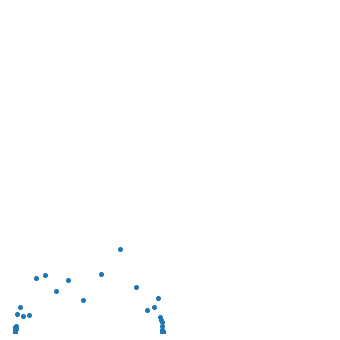

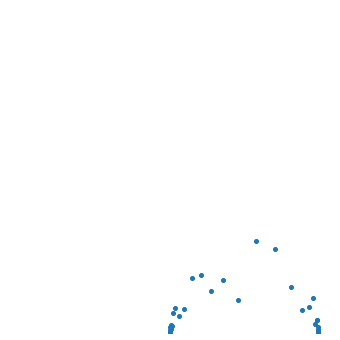

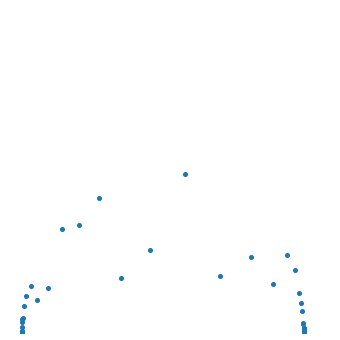

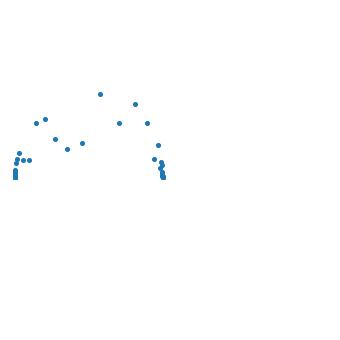

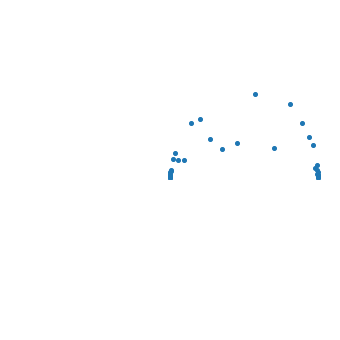

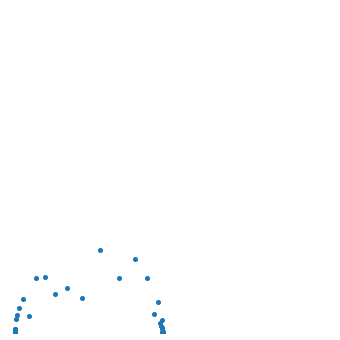

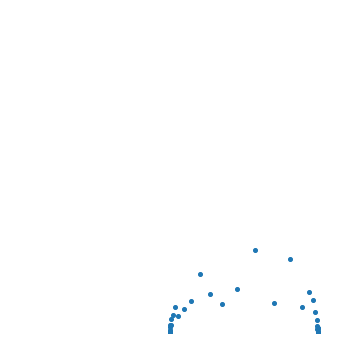

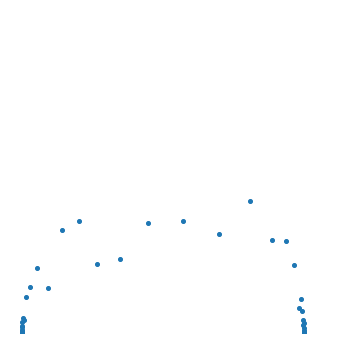

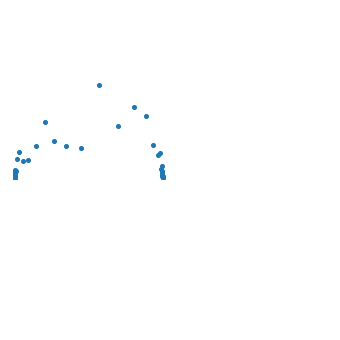

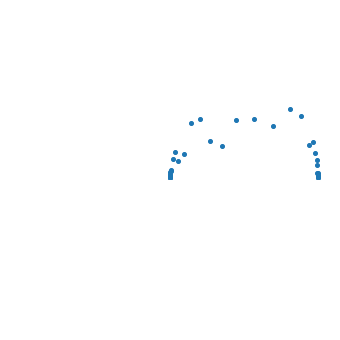

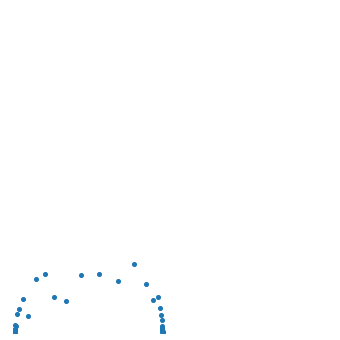

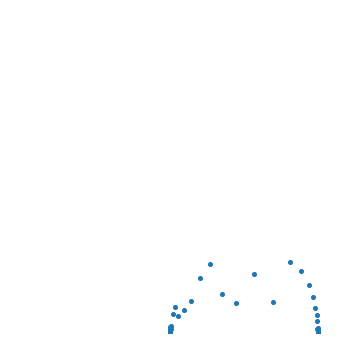

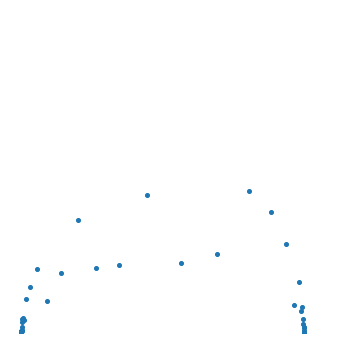

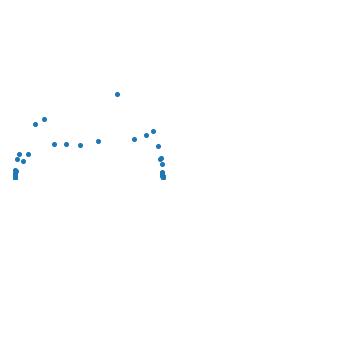

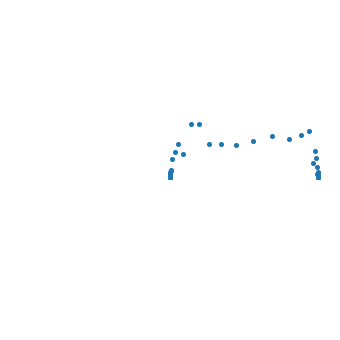

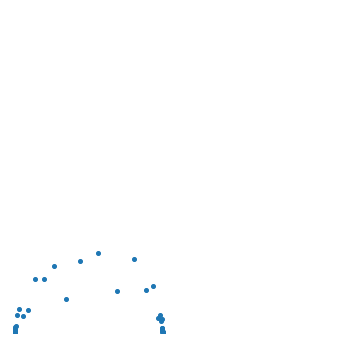

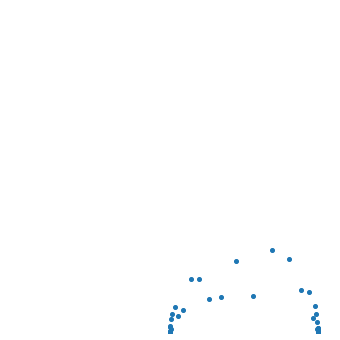

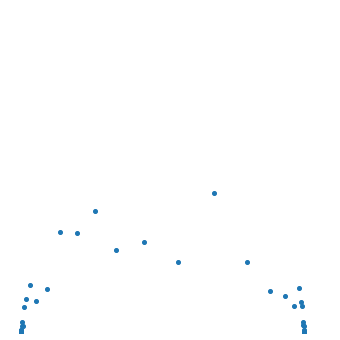

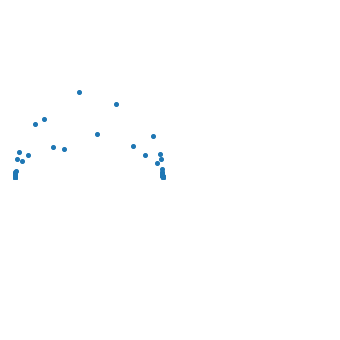

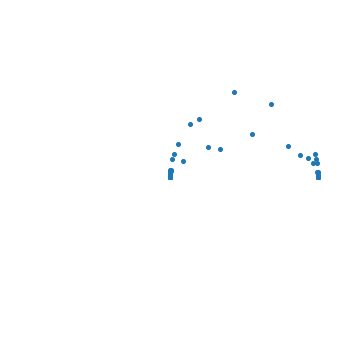

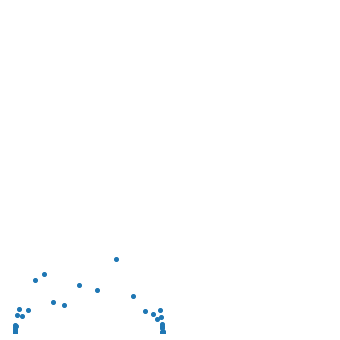

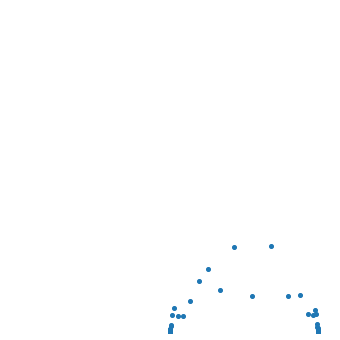

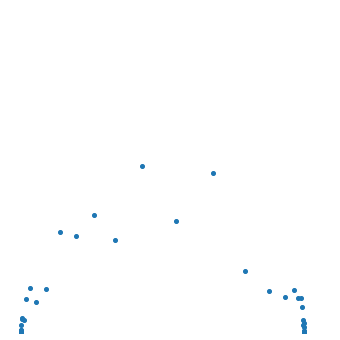

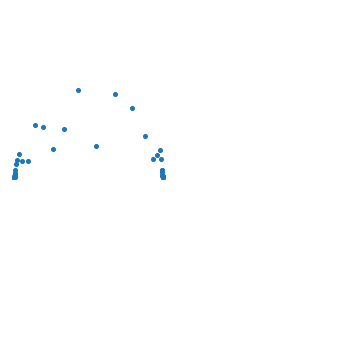

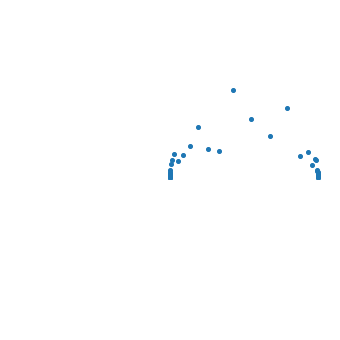

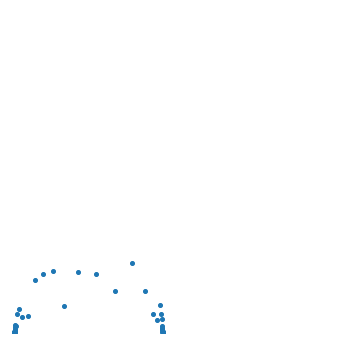

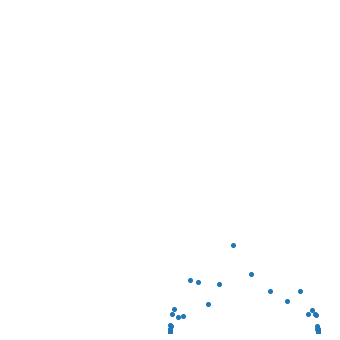

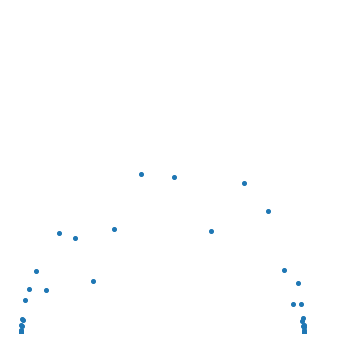

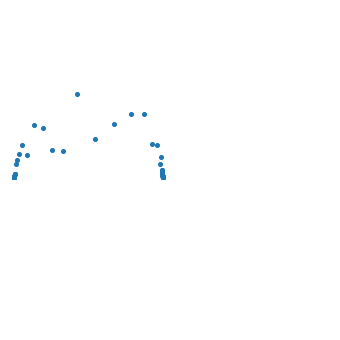

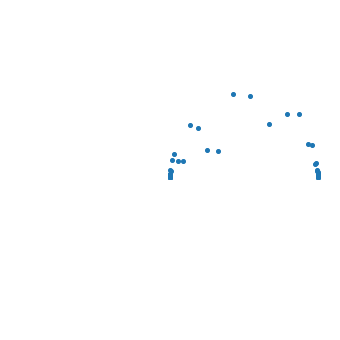

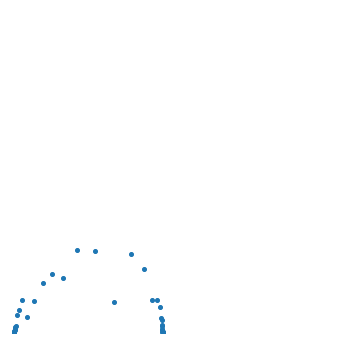

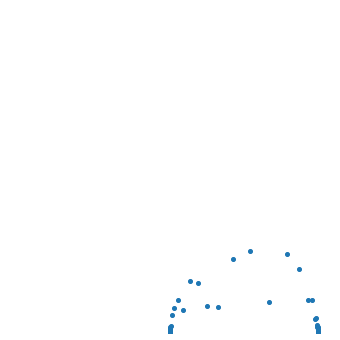

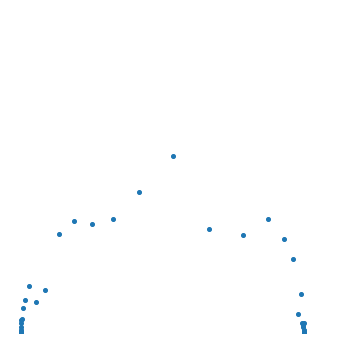

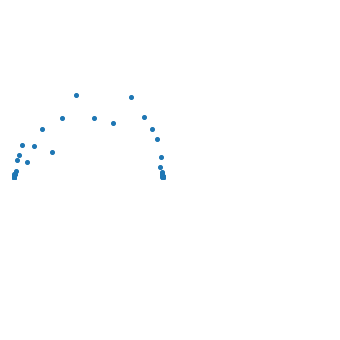

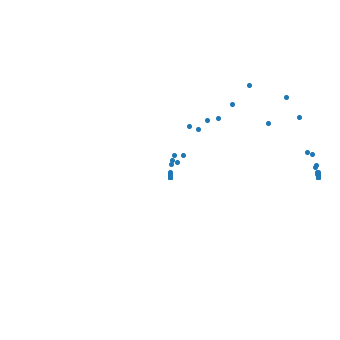

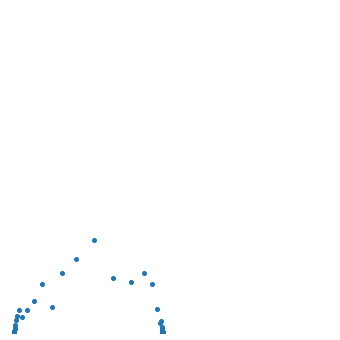

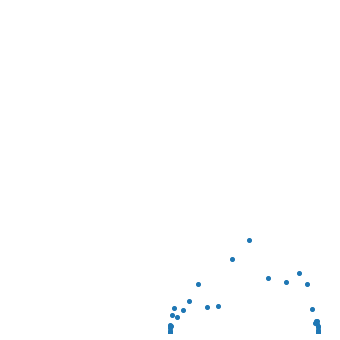

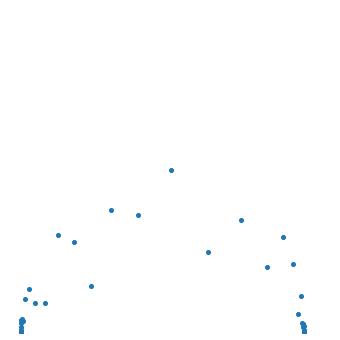

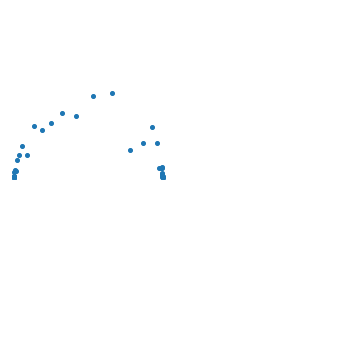

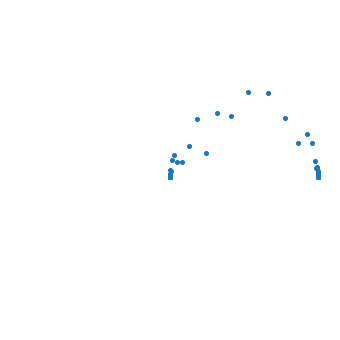

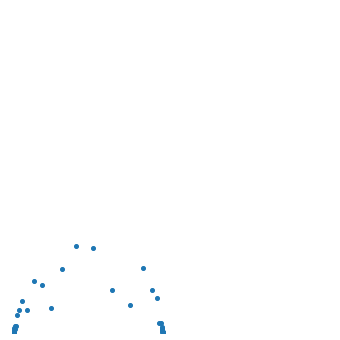

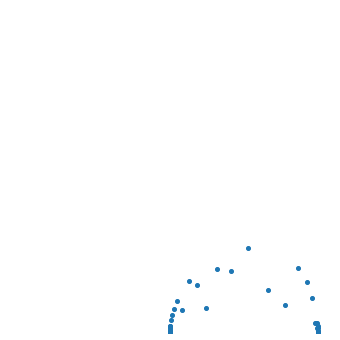

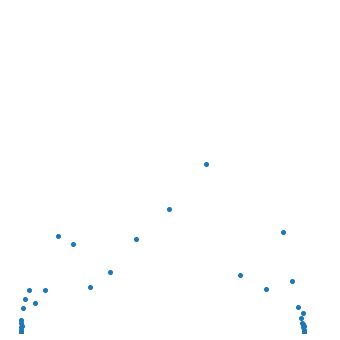

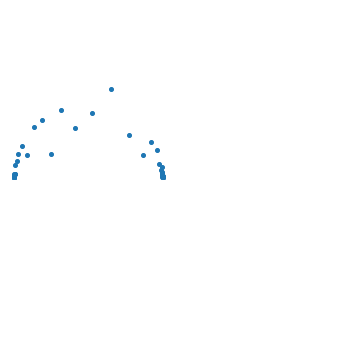

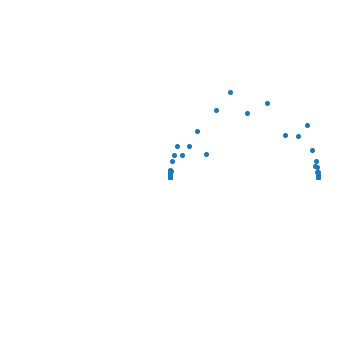

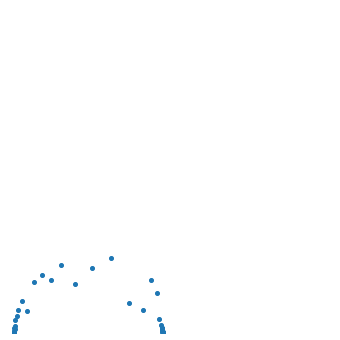

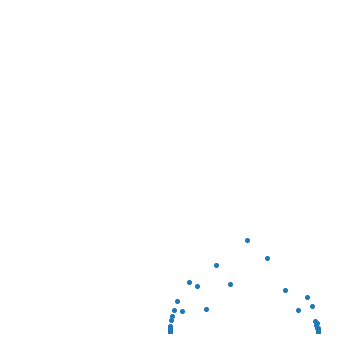

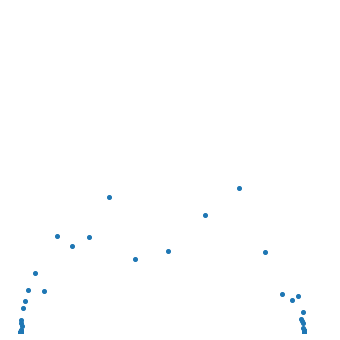

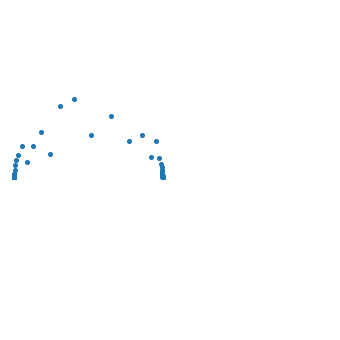

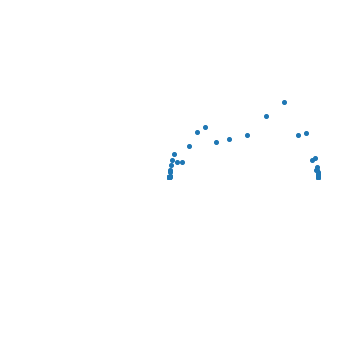

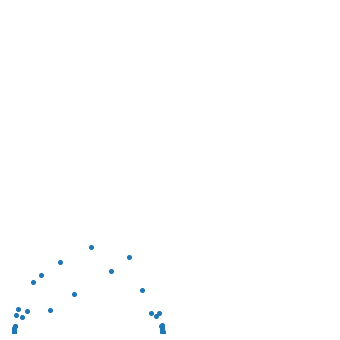

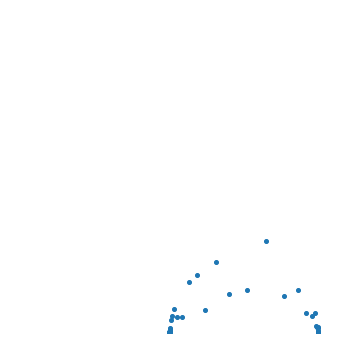

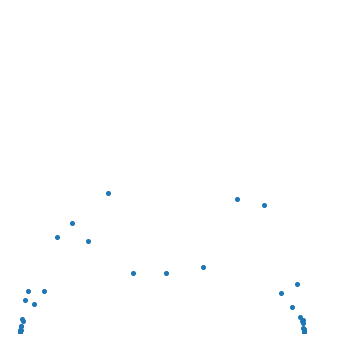

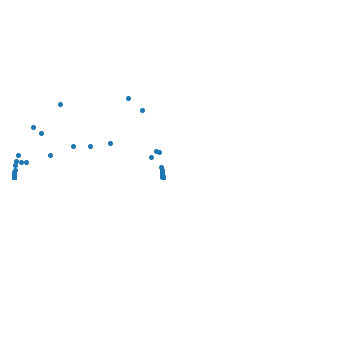

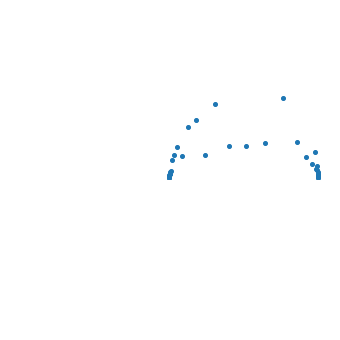

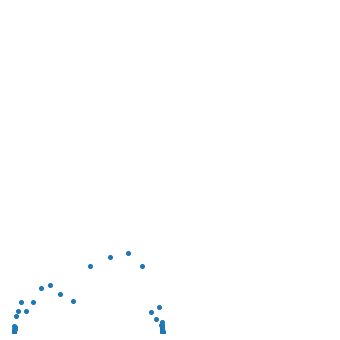

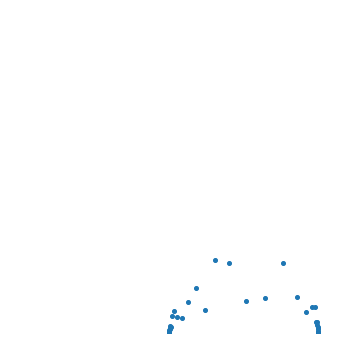

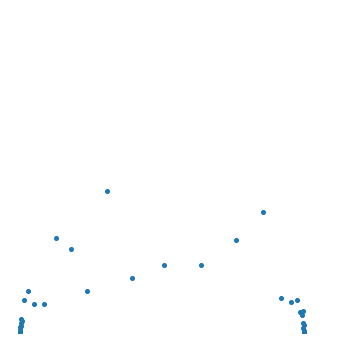

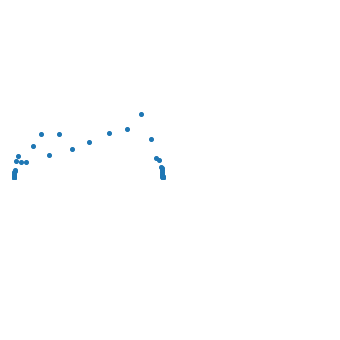

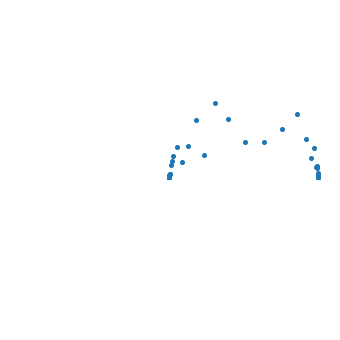

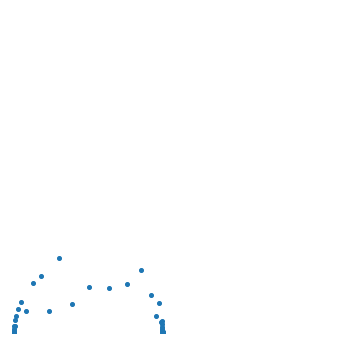

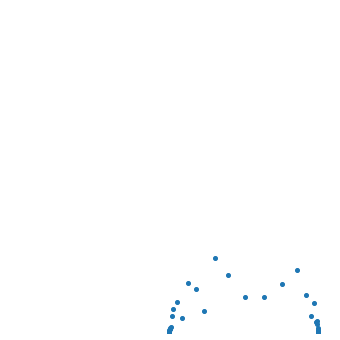

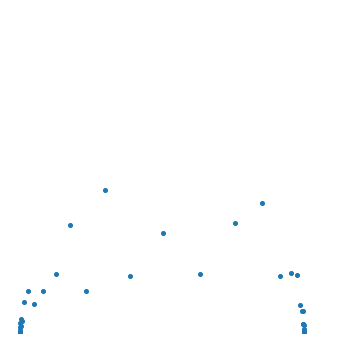

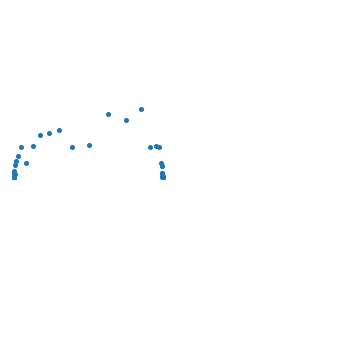

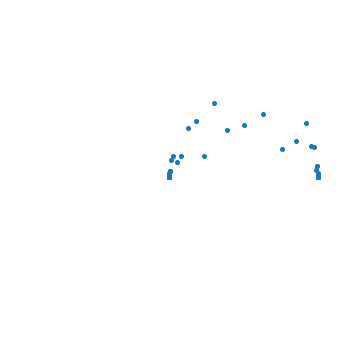

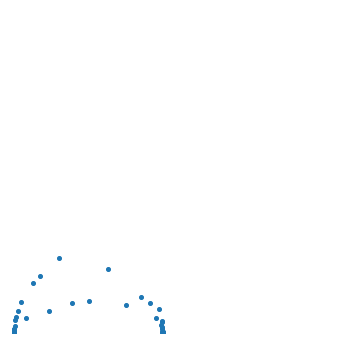

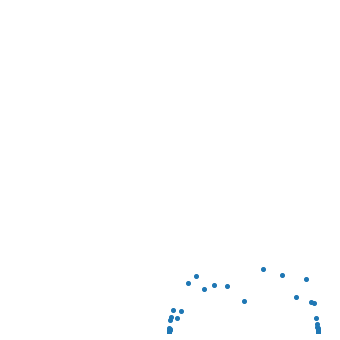

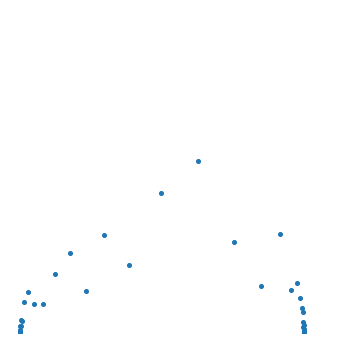

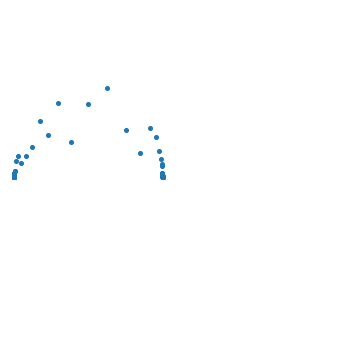

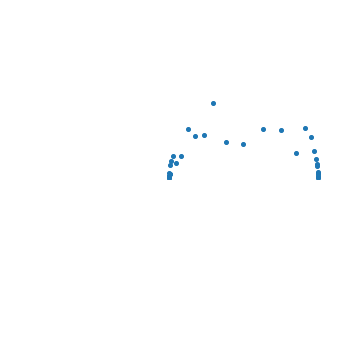

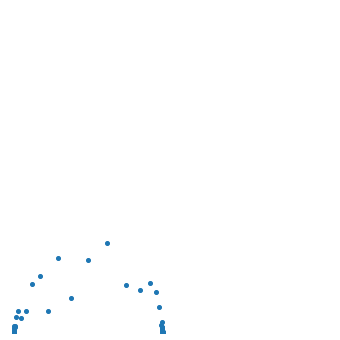

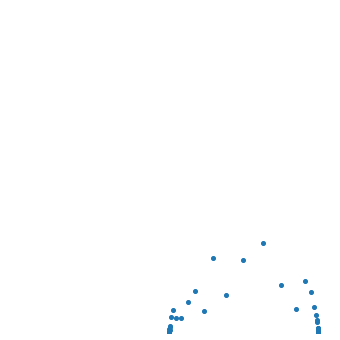

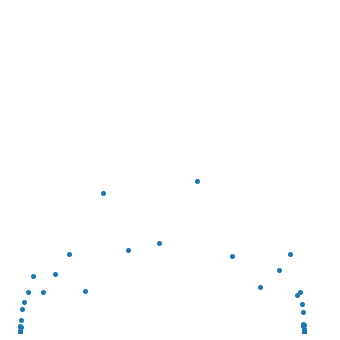

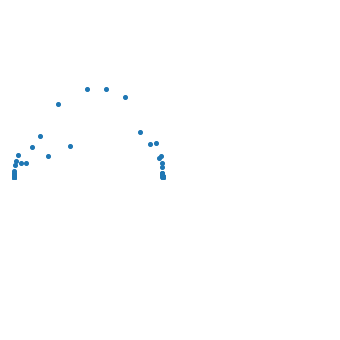

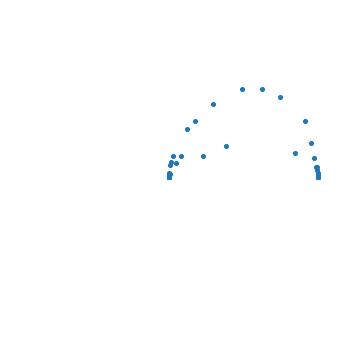

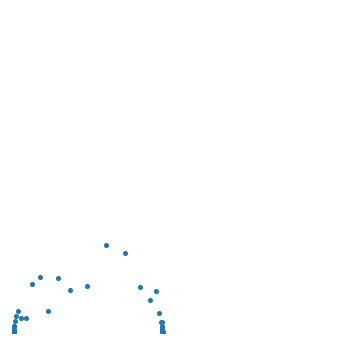

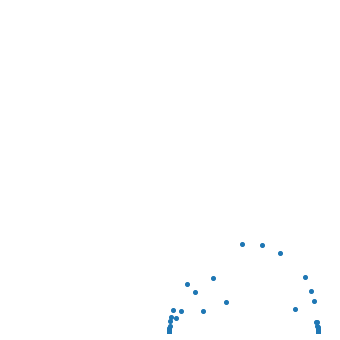

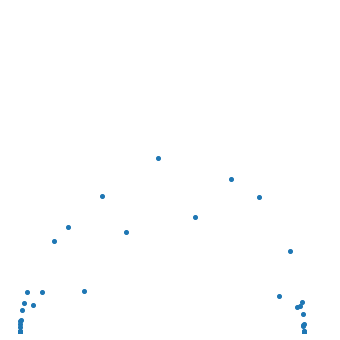

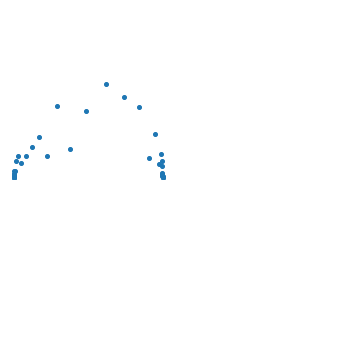

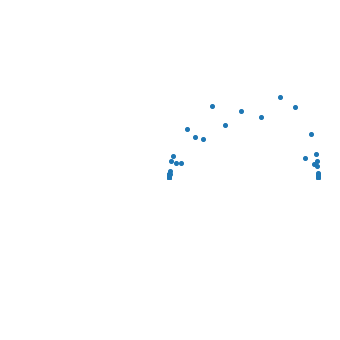

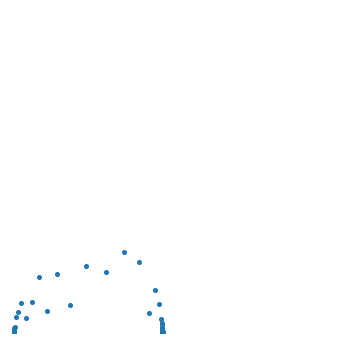

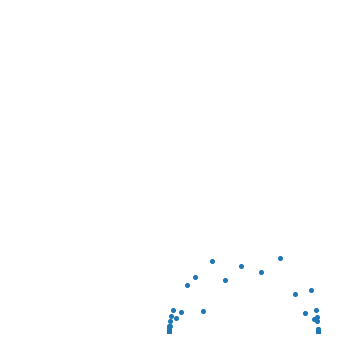

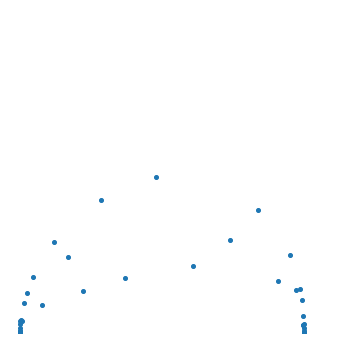

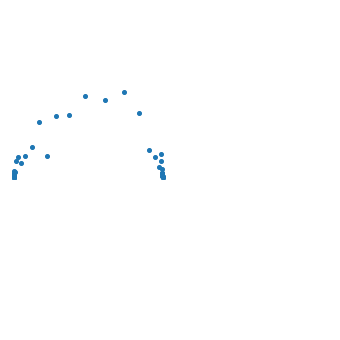

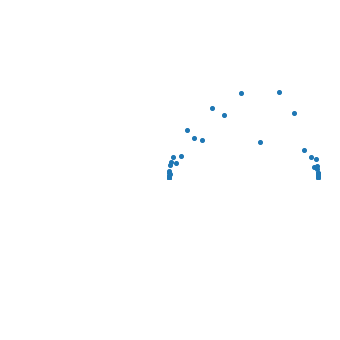

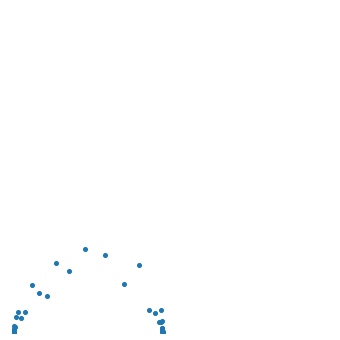

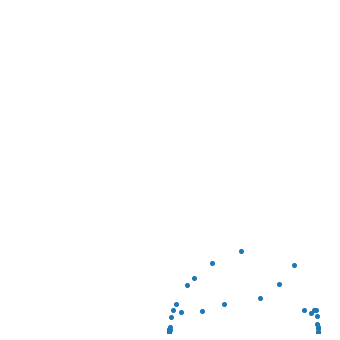

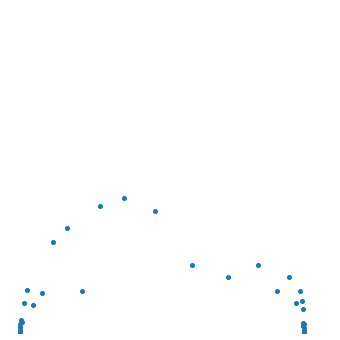

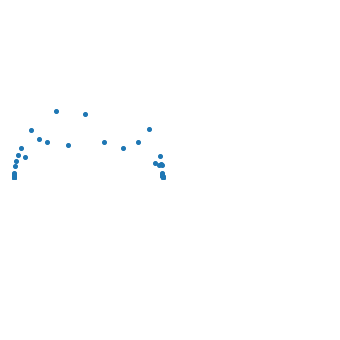

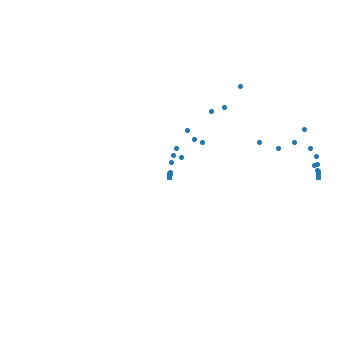

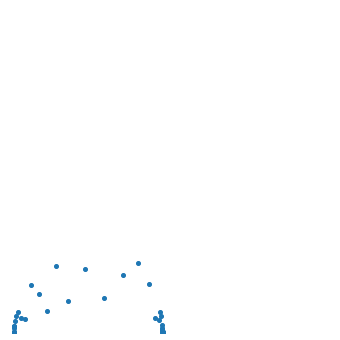

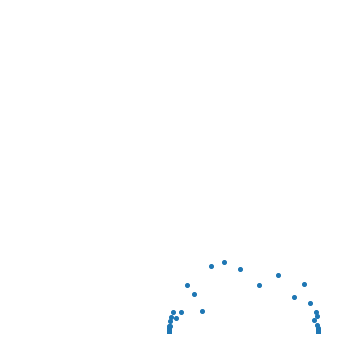

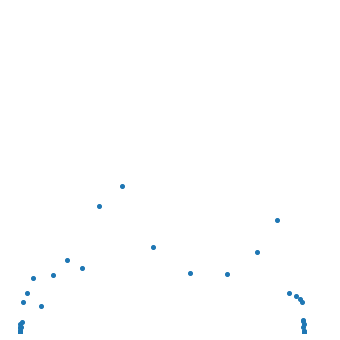

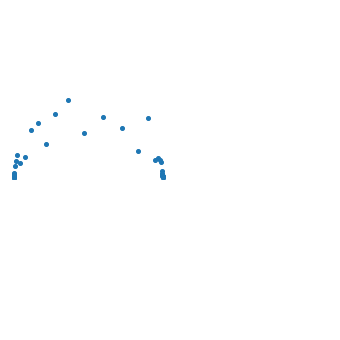

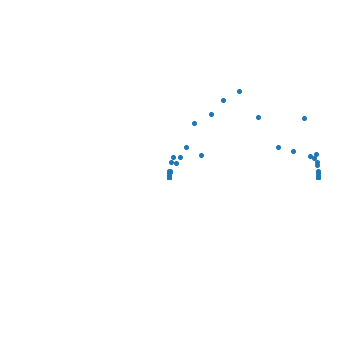

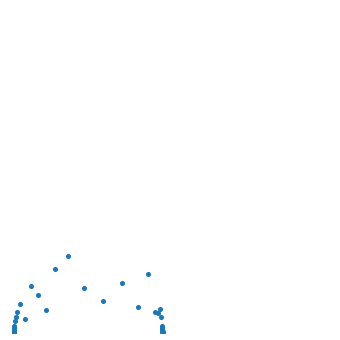

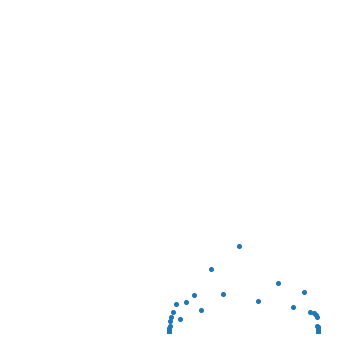

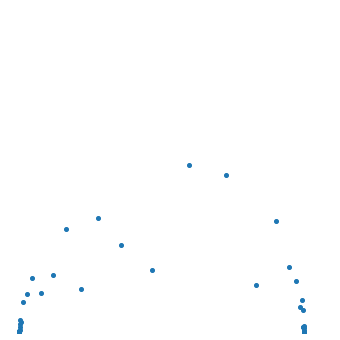

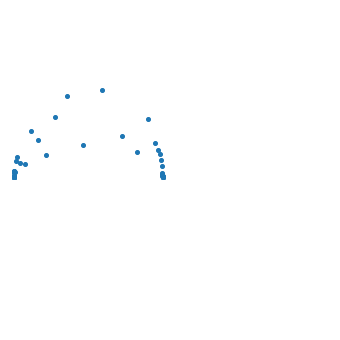

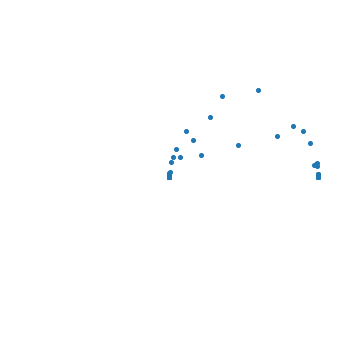

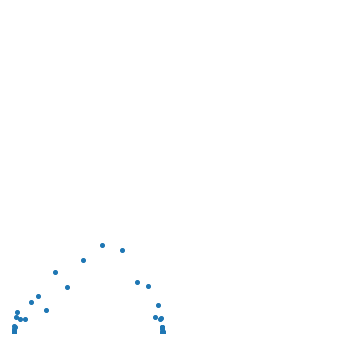

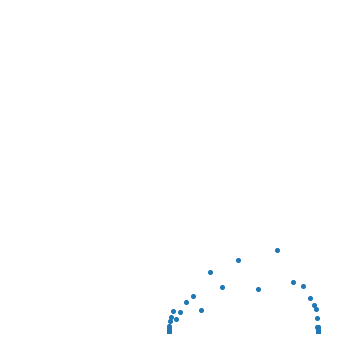

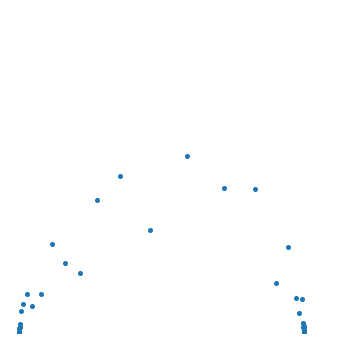

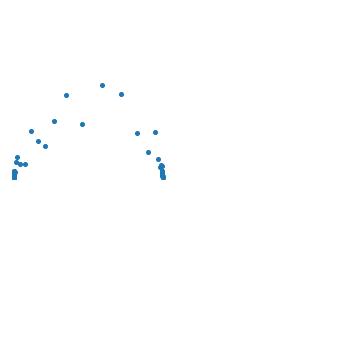

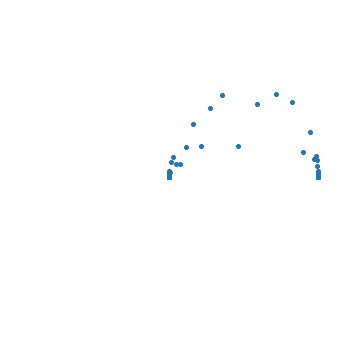

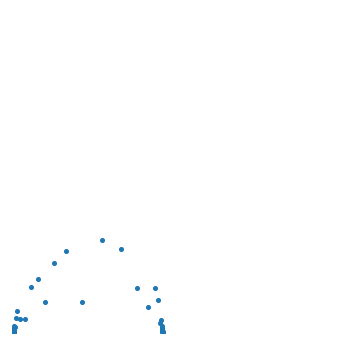

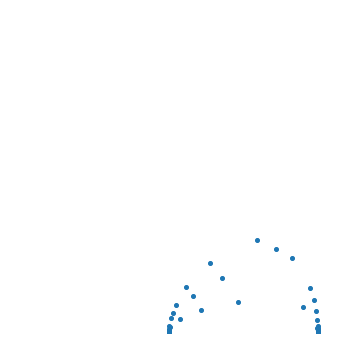

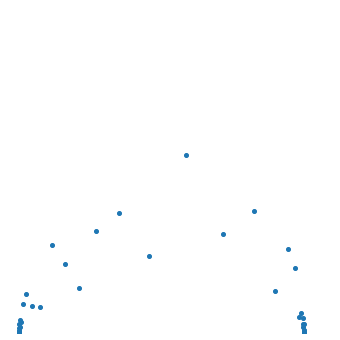

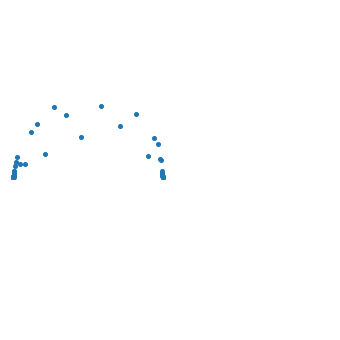

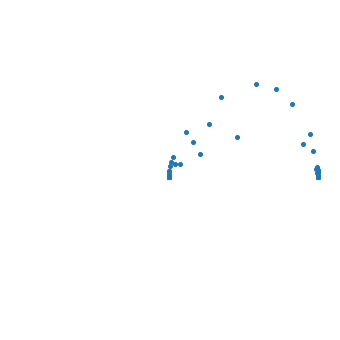

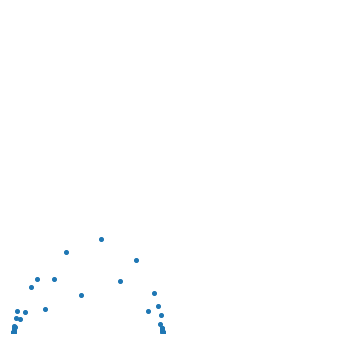

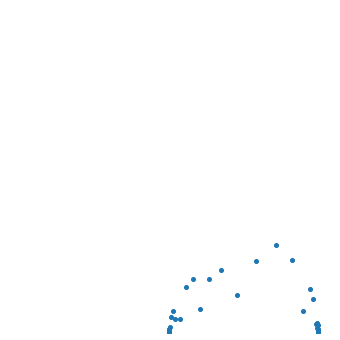

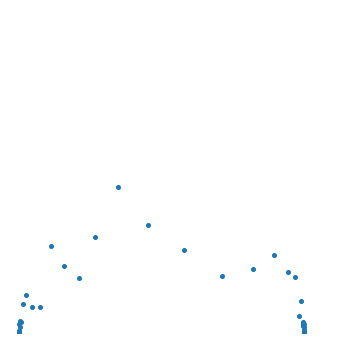

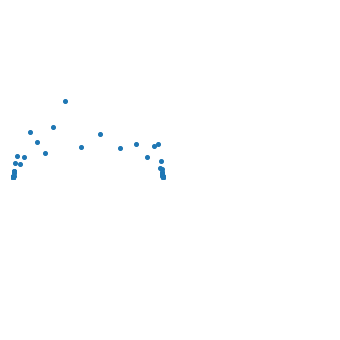

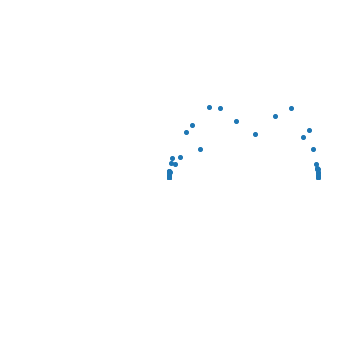

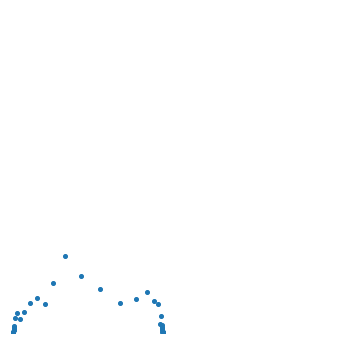

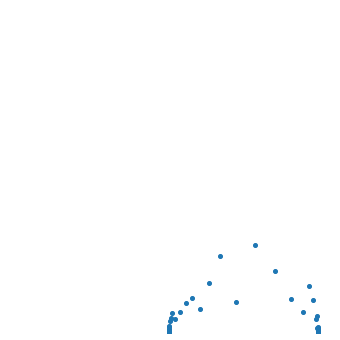

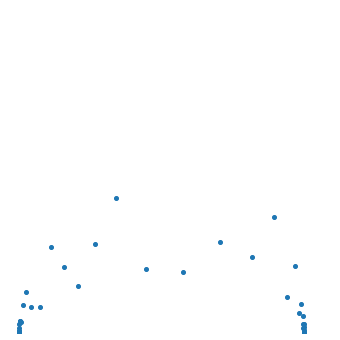

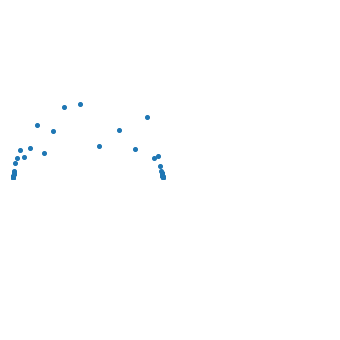

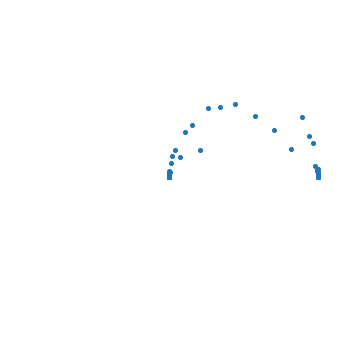

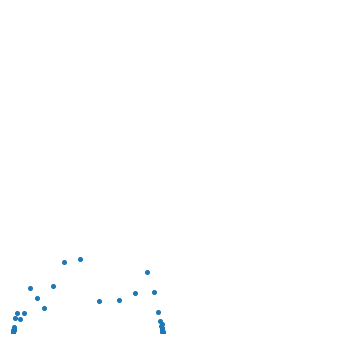

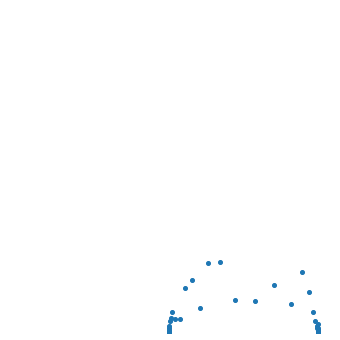

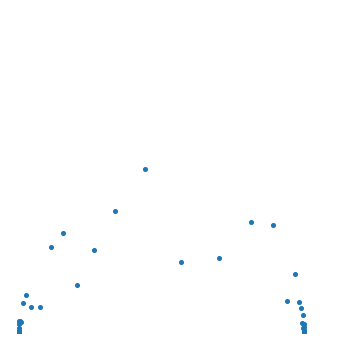

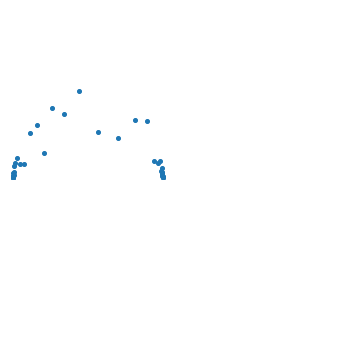

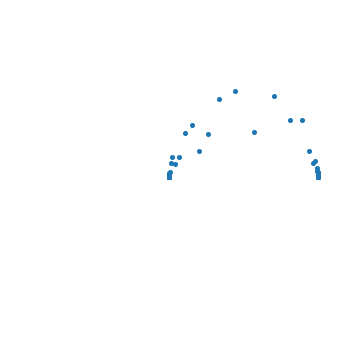

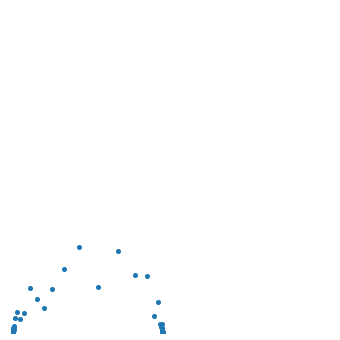

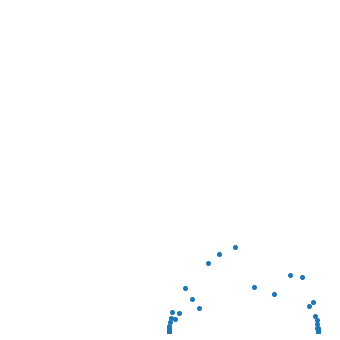

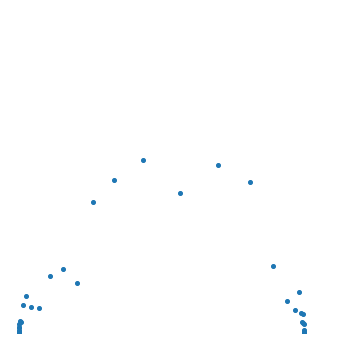

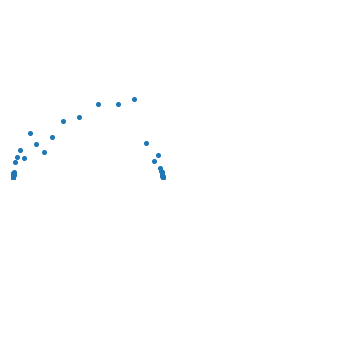

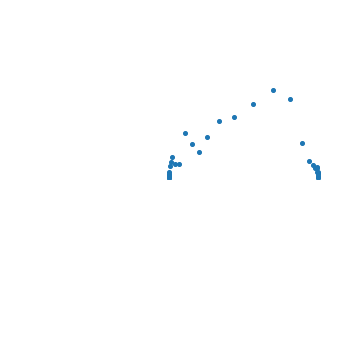

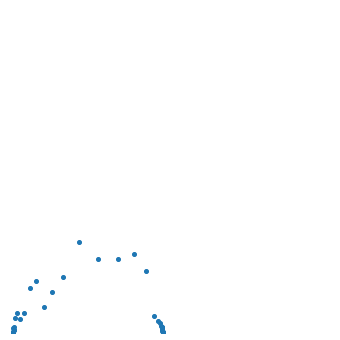

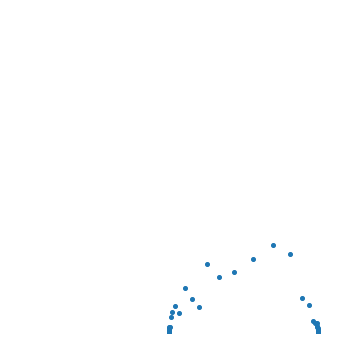

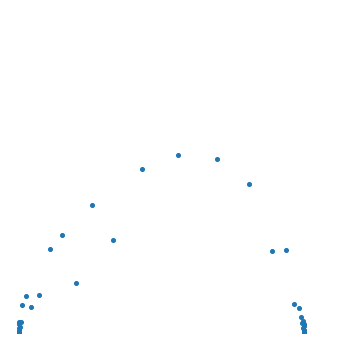

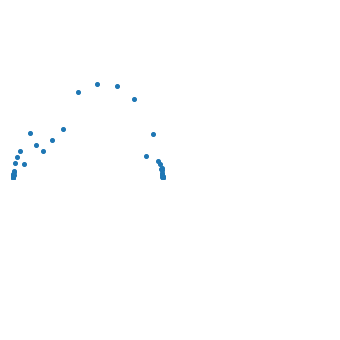

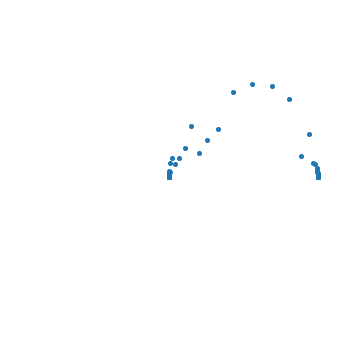

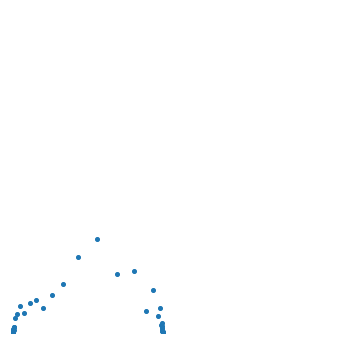

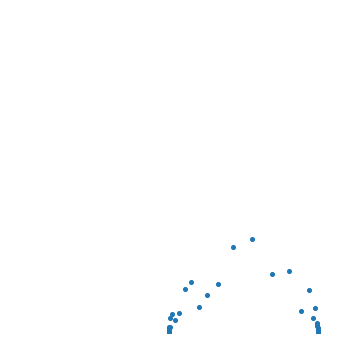

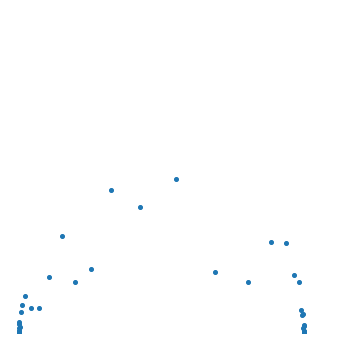

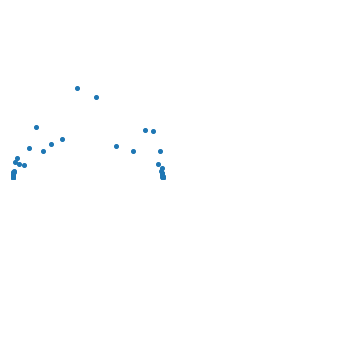

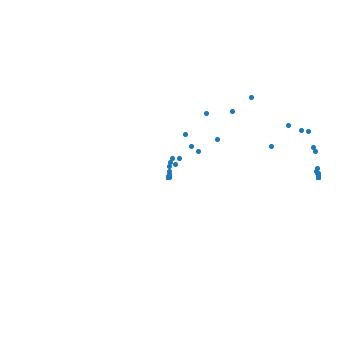

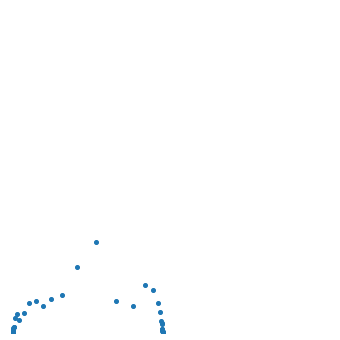

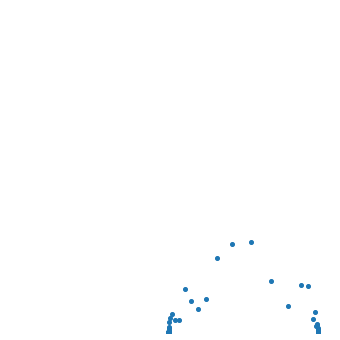

In [19]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
C= 2*10E-6 #F
R2= 10   # ohm
R1= 50   # ohm
resistance= np.linspace(100,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRCRC_file_writer(f_start, f_stop, decades, Rs, R1,C, R2,2*C, alteration='noise', noisescale=0.5, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

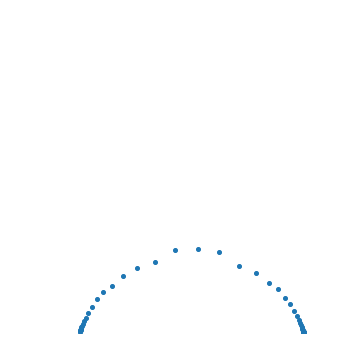

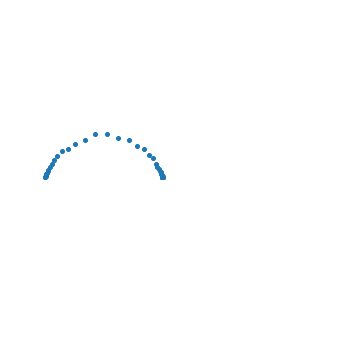

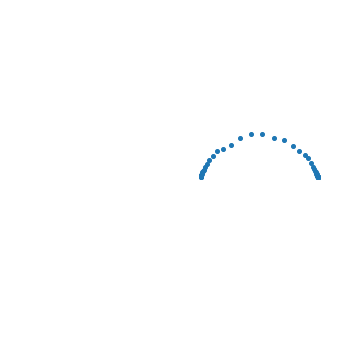

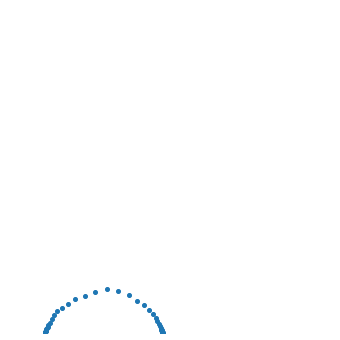

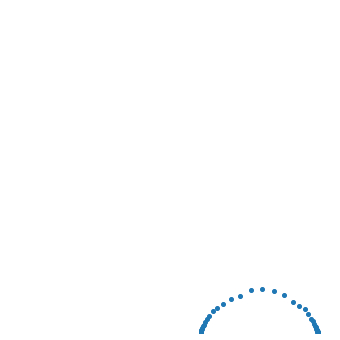

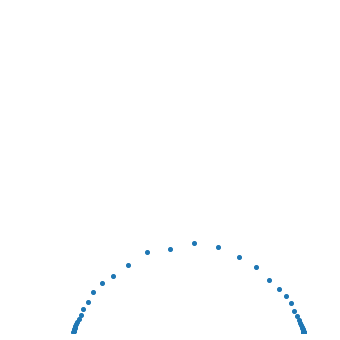

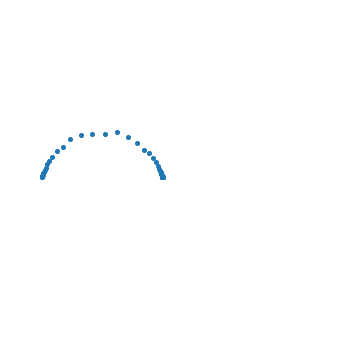

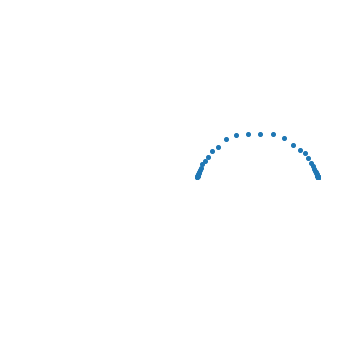

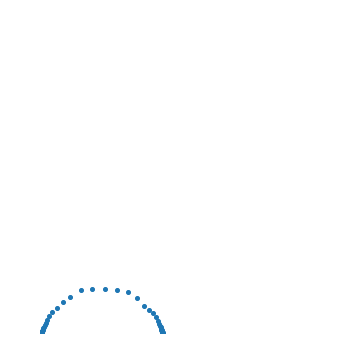

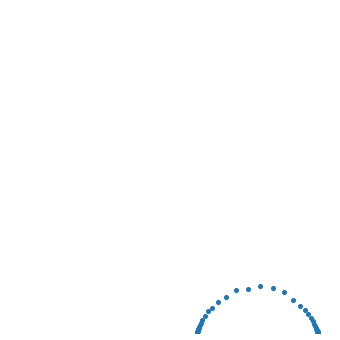

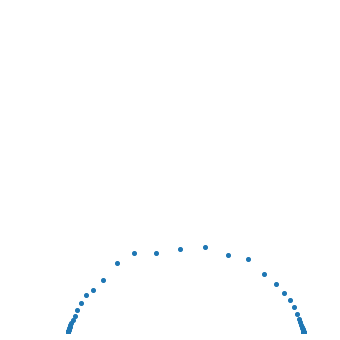

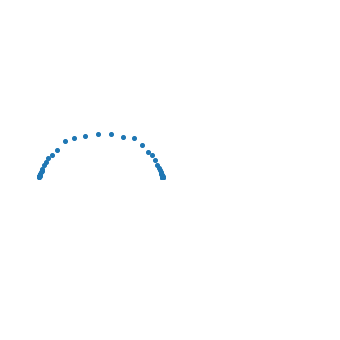

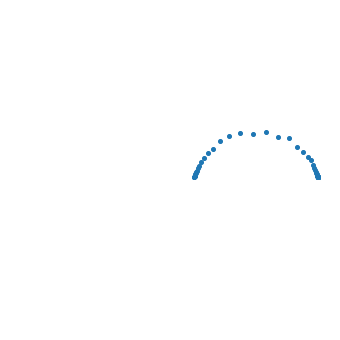

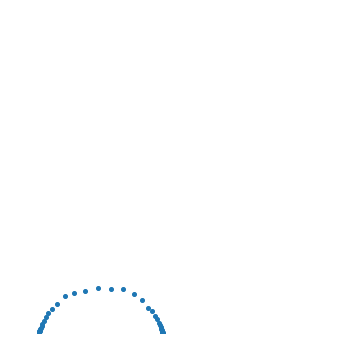

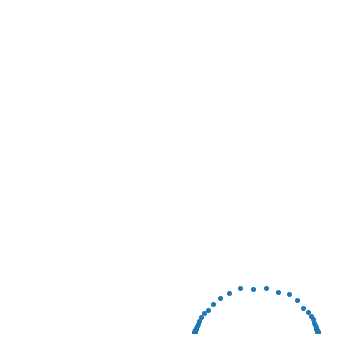

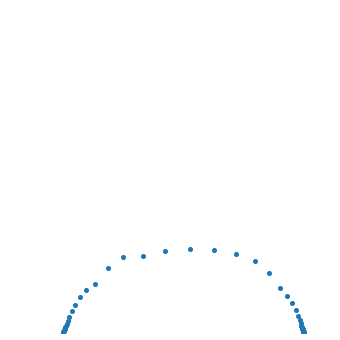

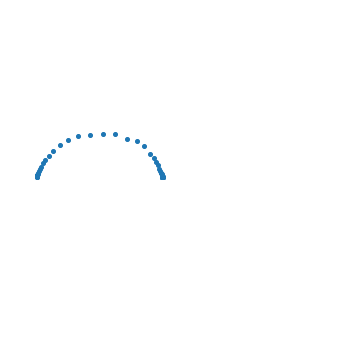

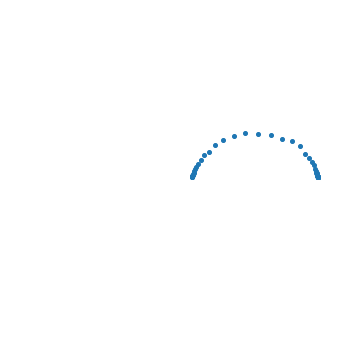

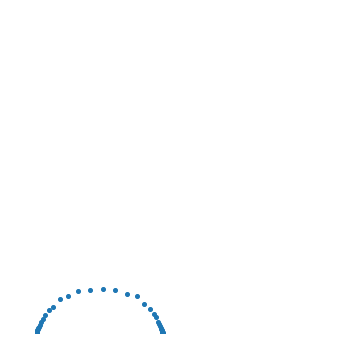

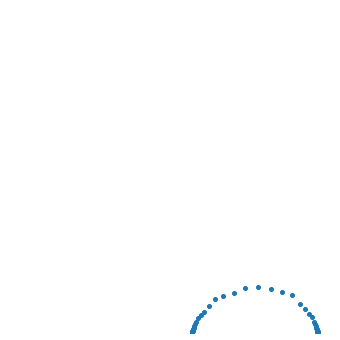

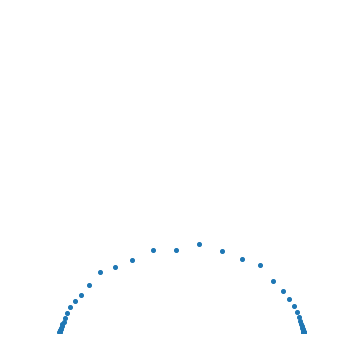

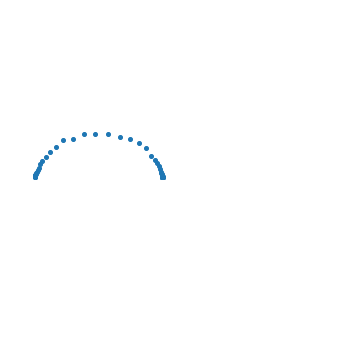

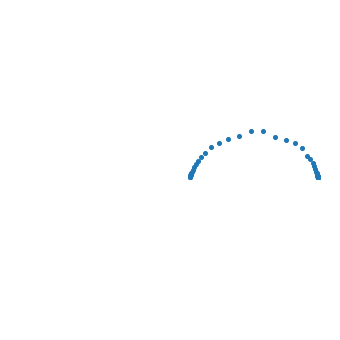

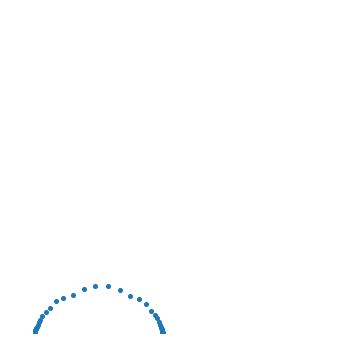

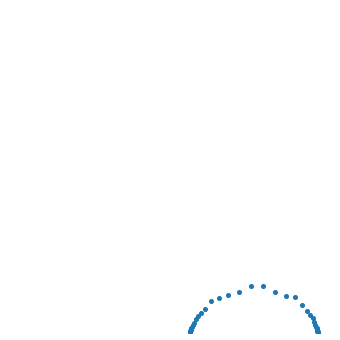

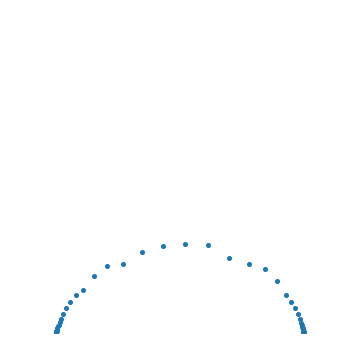

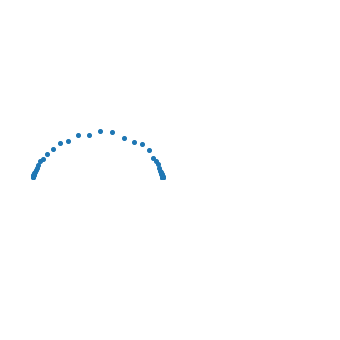

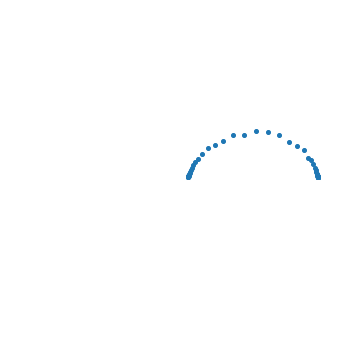

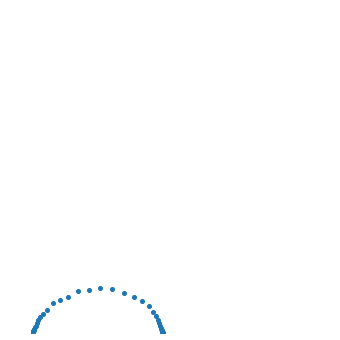

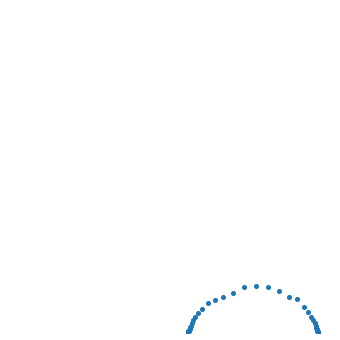

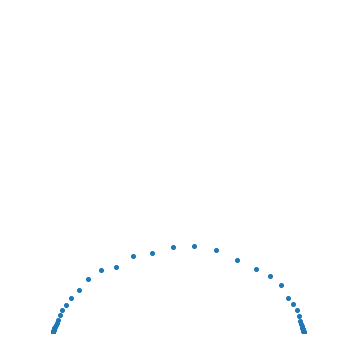

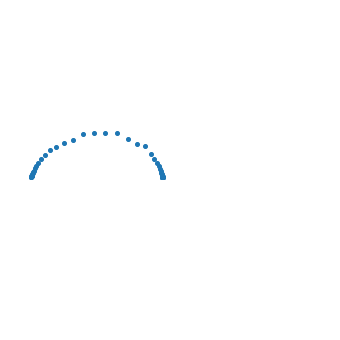

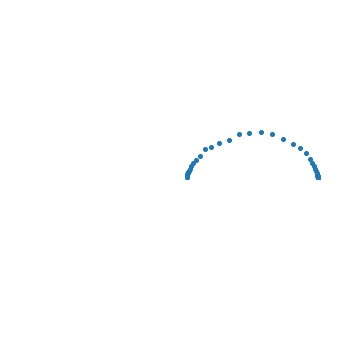

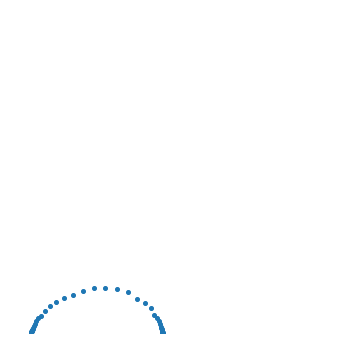

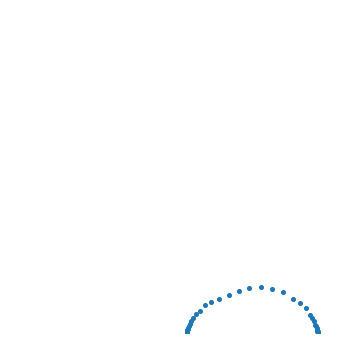

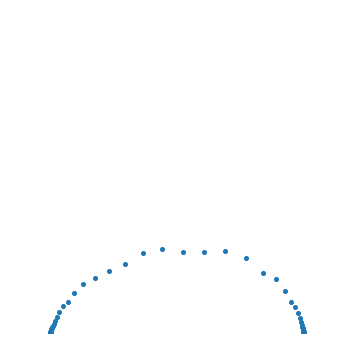

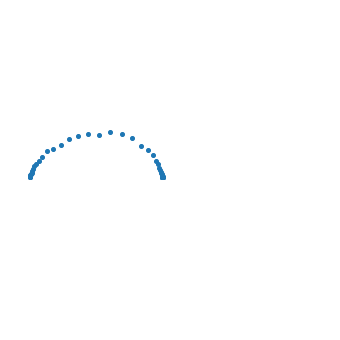

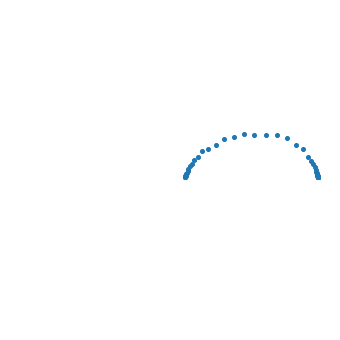

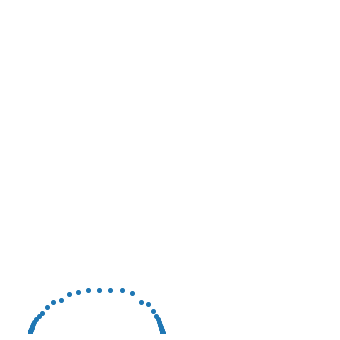

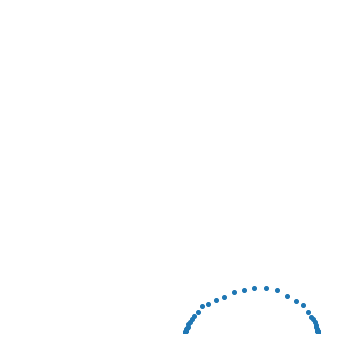

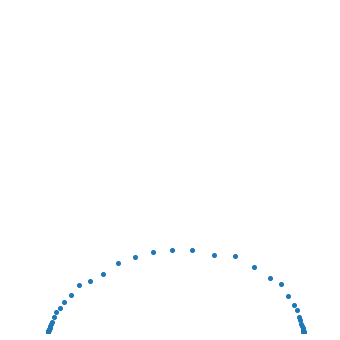

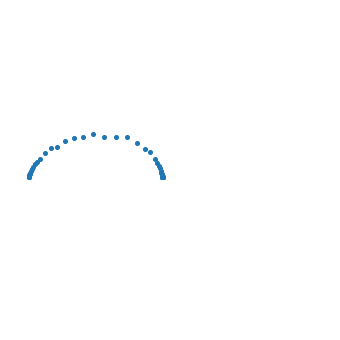

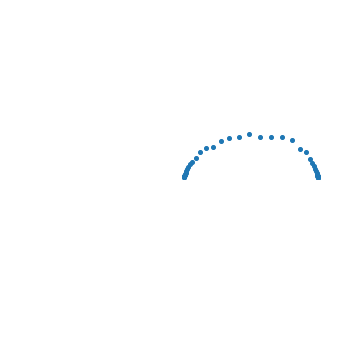

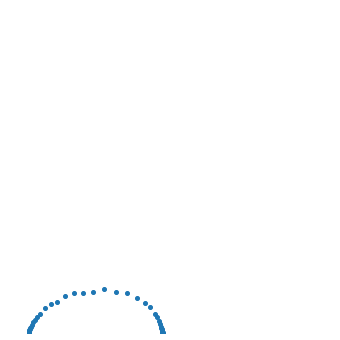

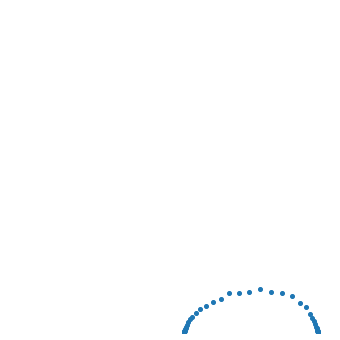

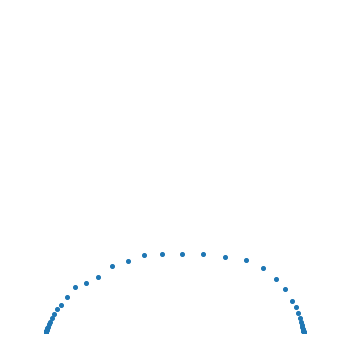

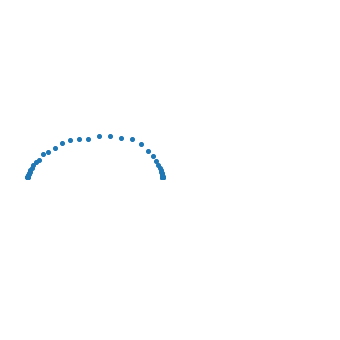

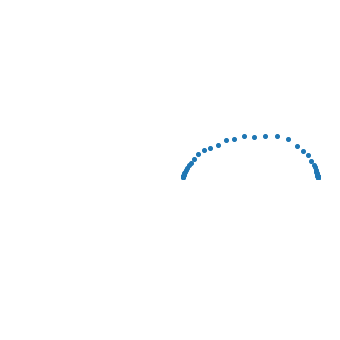

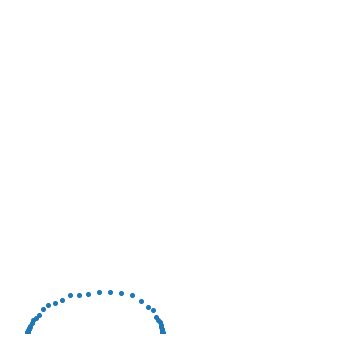

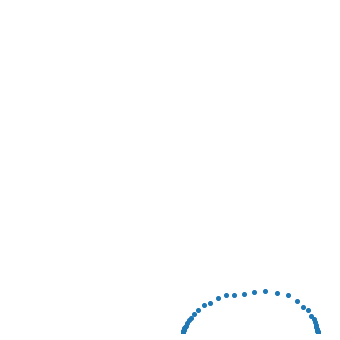

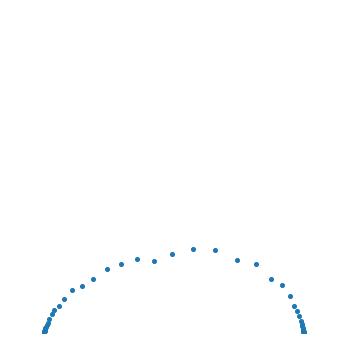

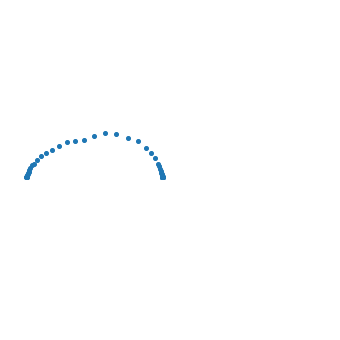

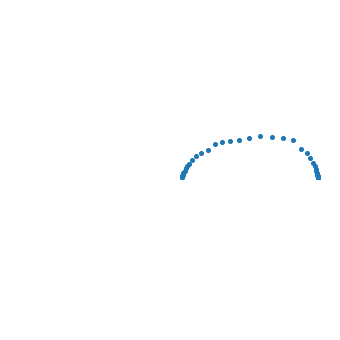

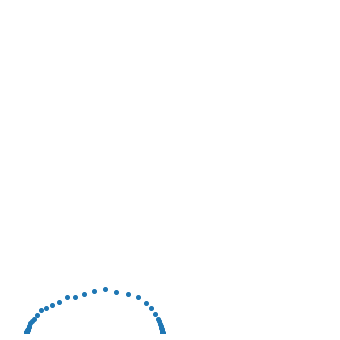

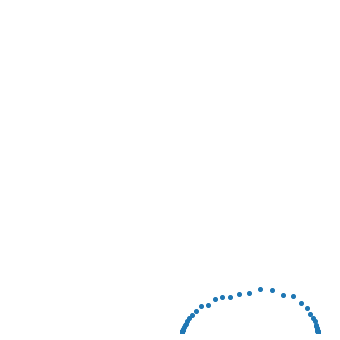

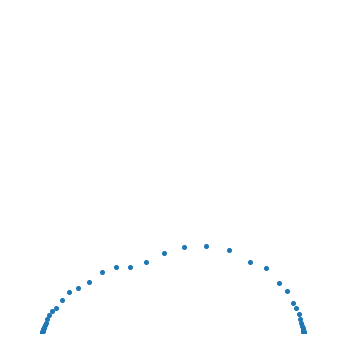

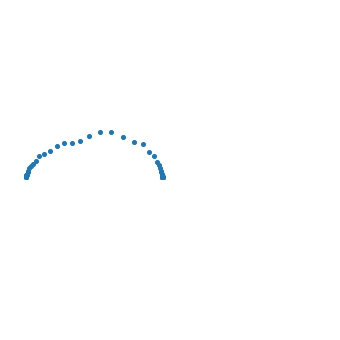

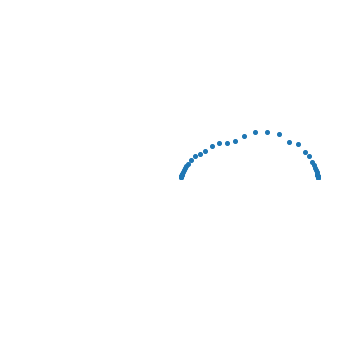

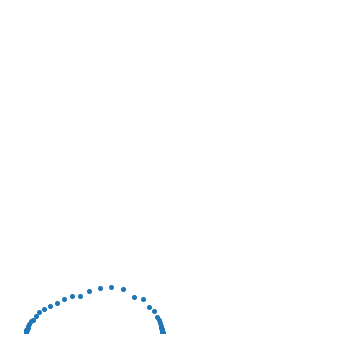

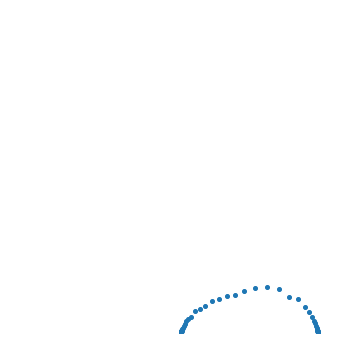

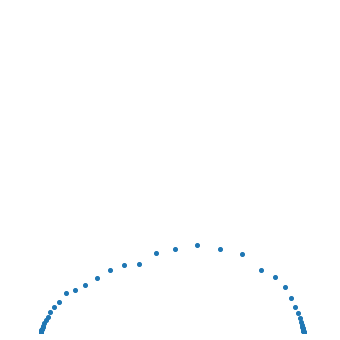

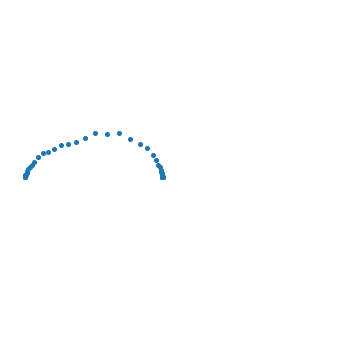

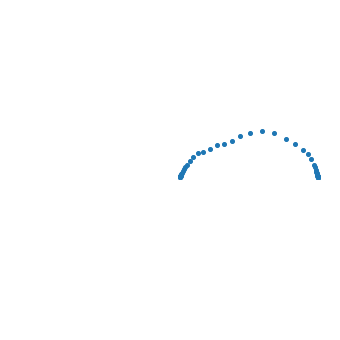

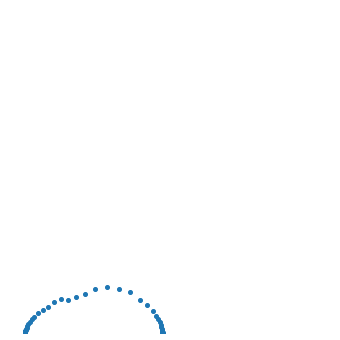

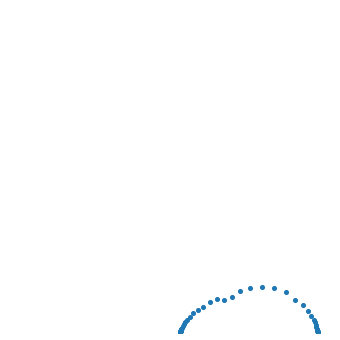

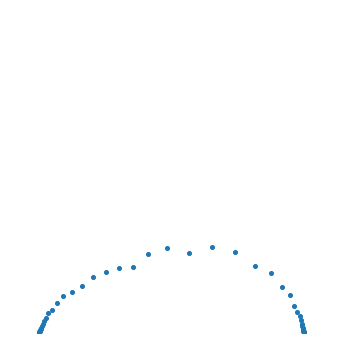

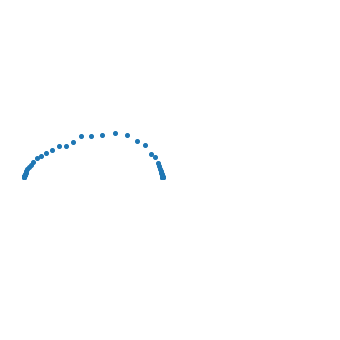

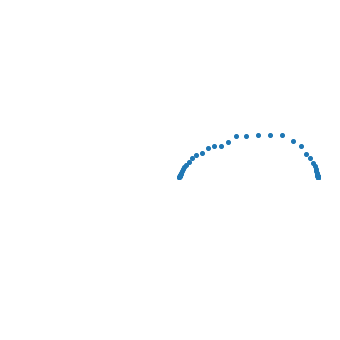

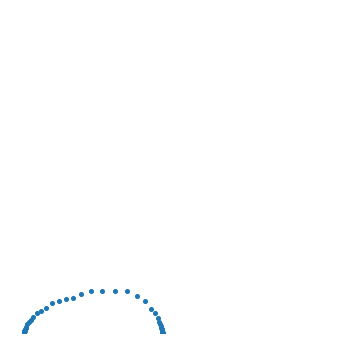

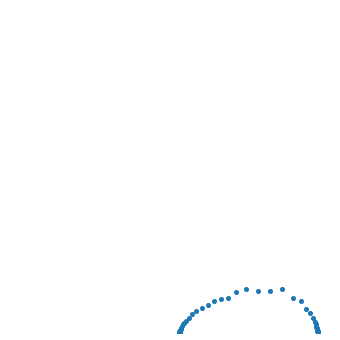

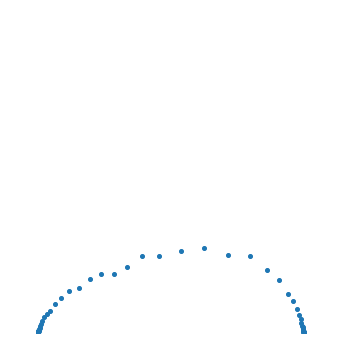

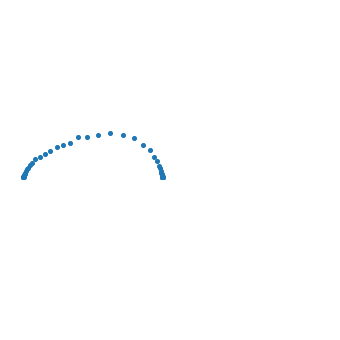

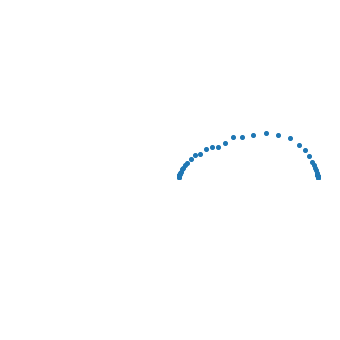

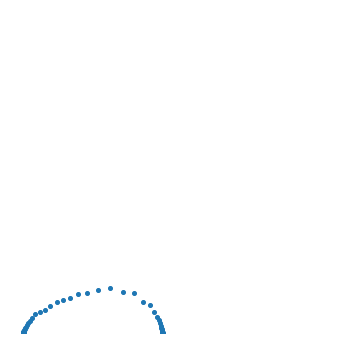

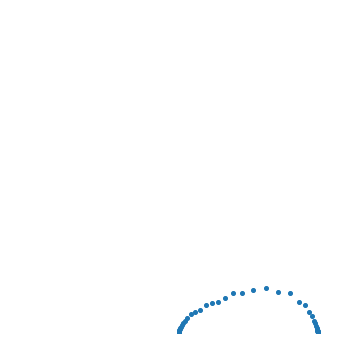

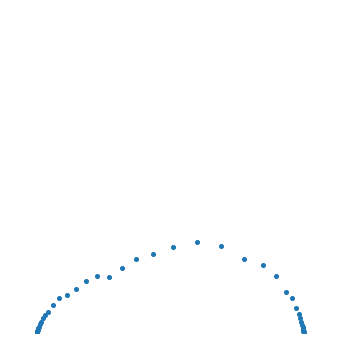

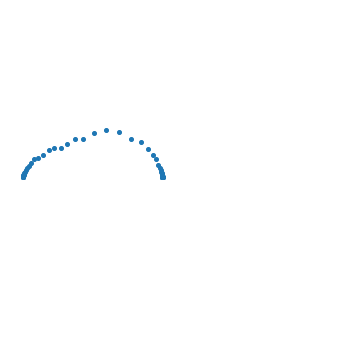

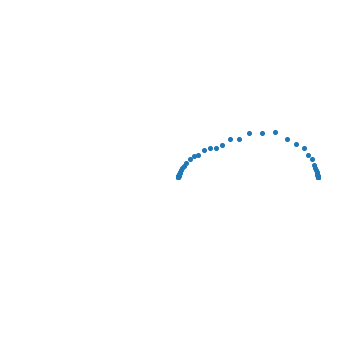

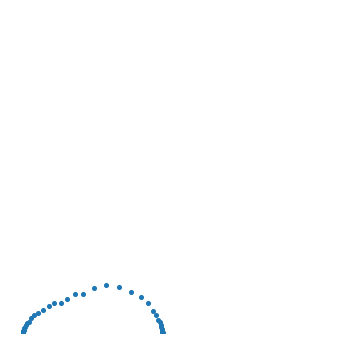

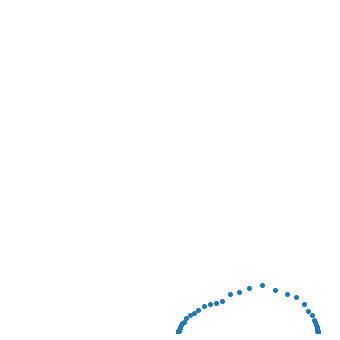

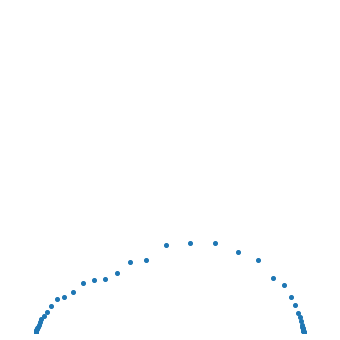

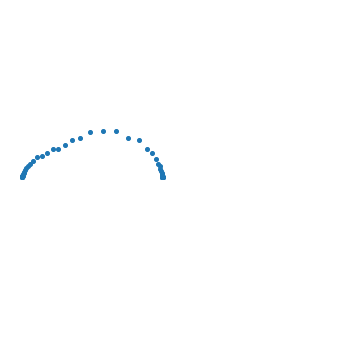

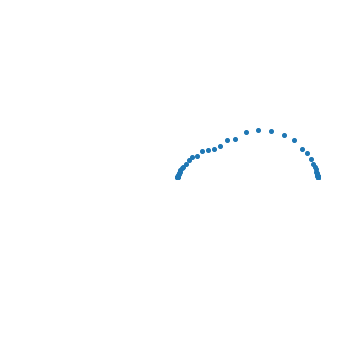

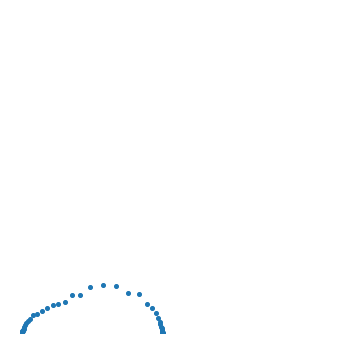

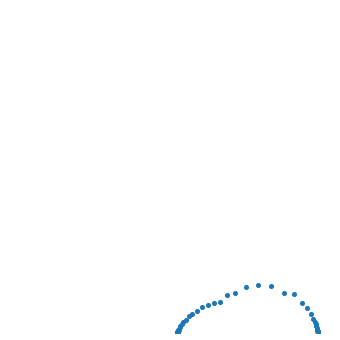

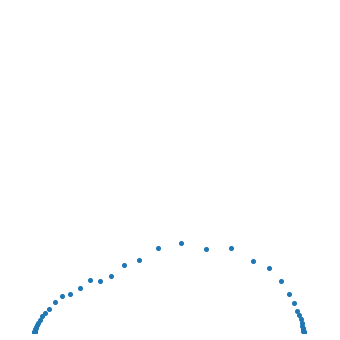

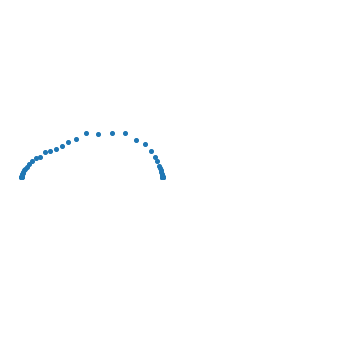

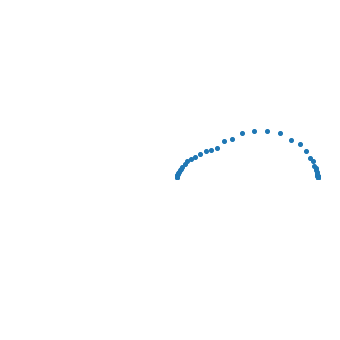

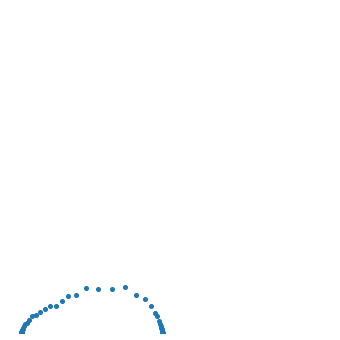

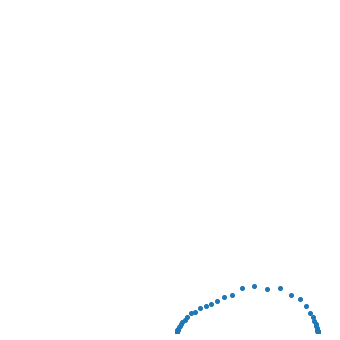

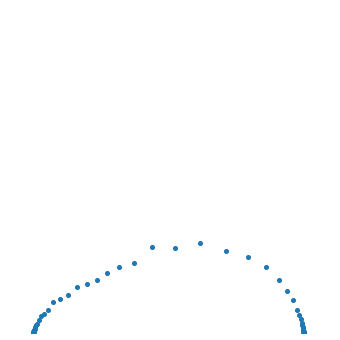

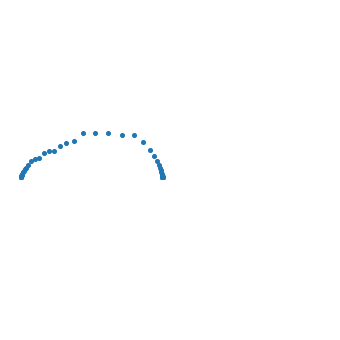

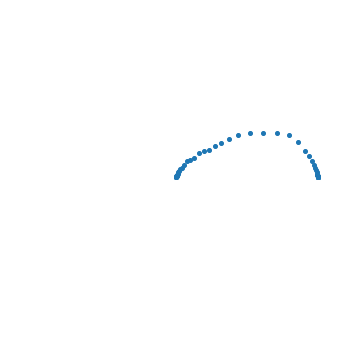

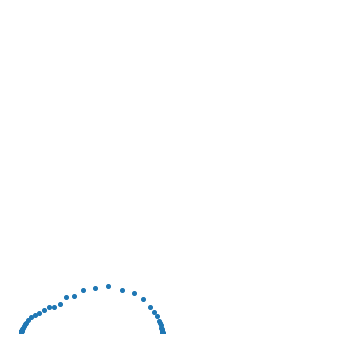

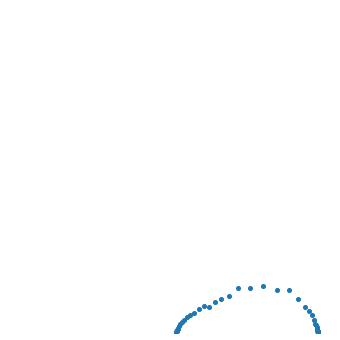

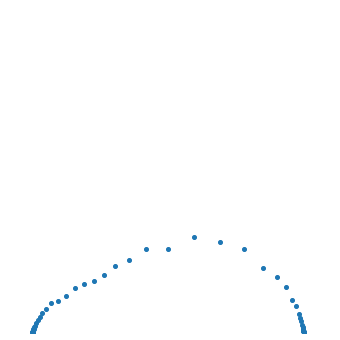

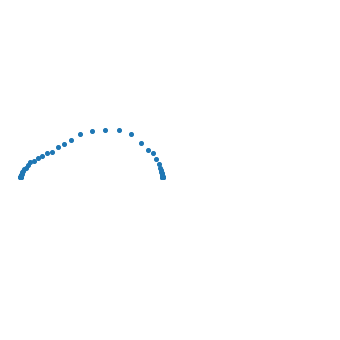

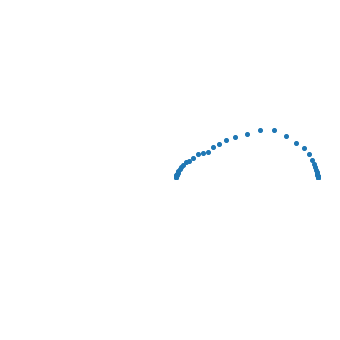

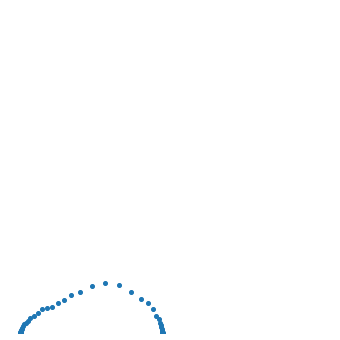

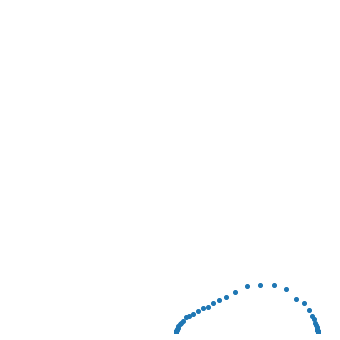

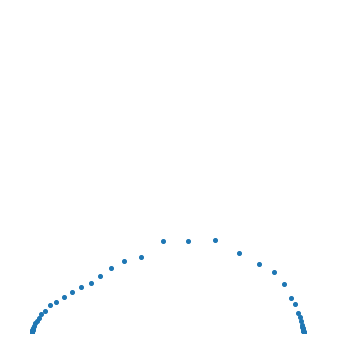

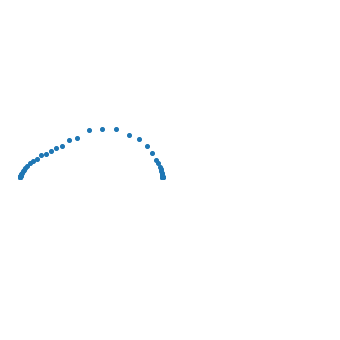

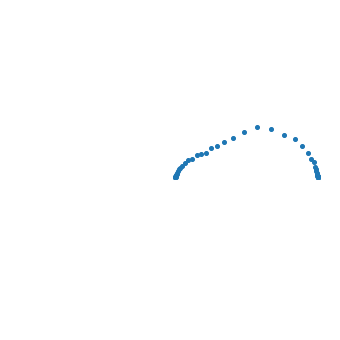

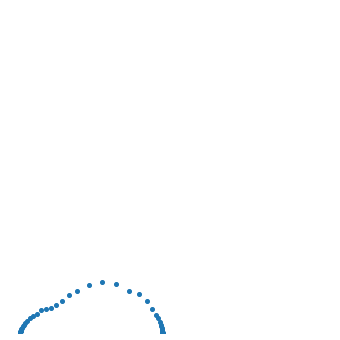

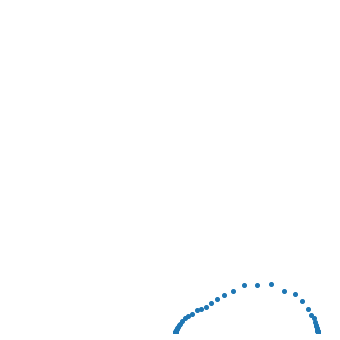

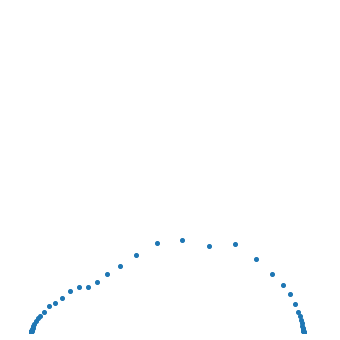

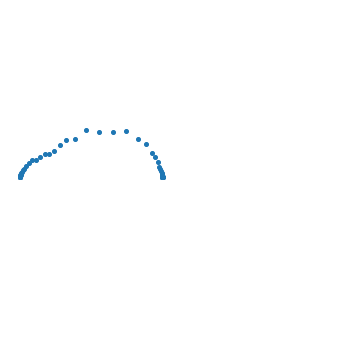

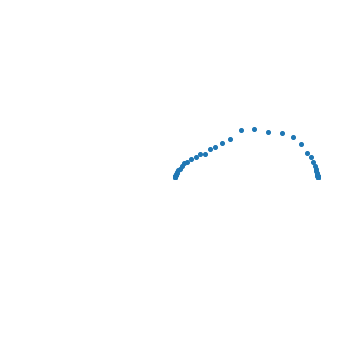

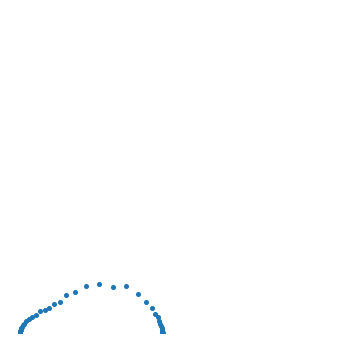

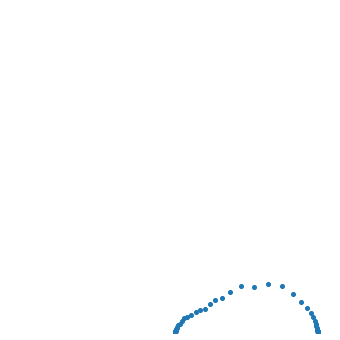

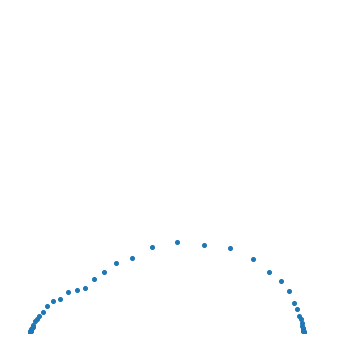

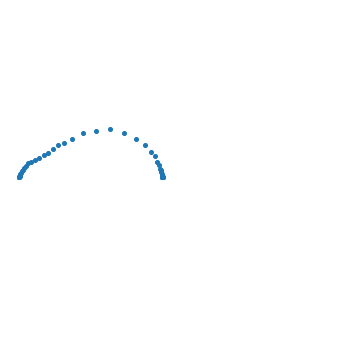

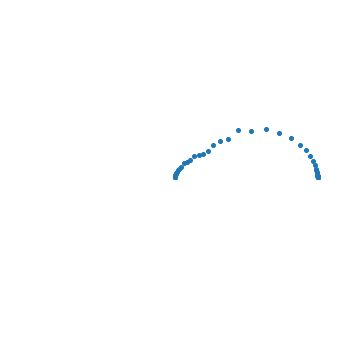

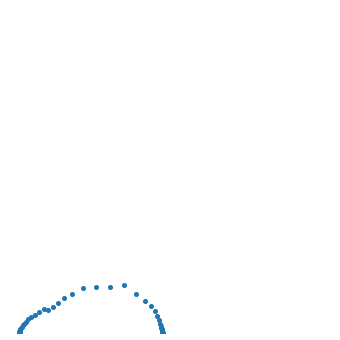

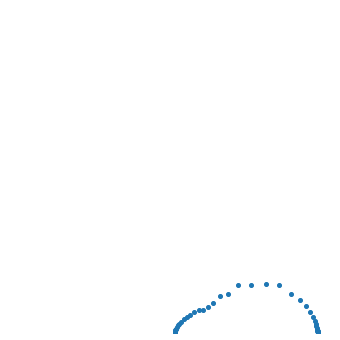

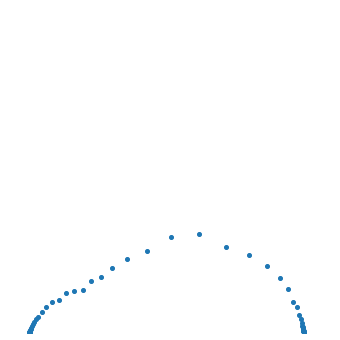

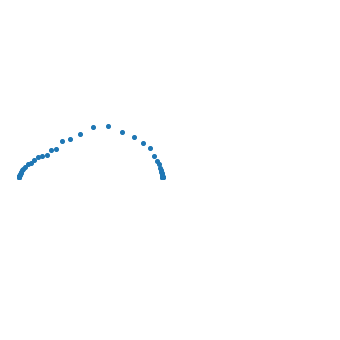

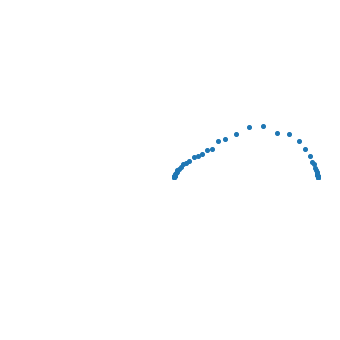

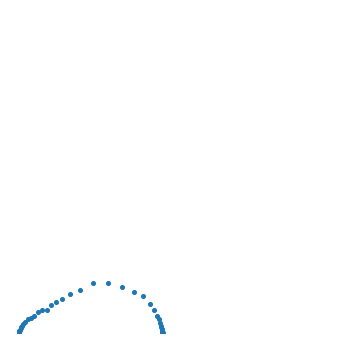

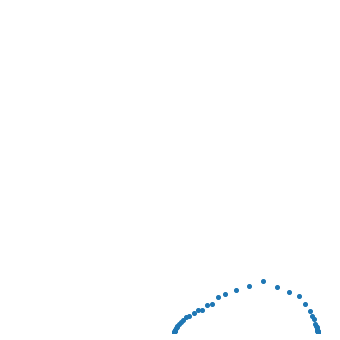

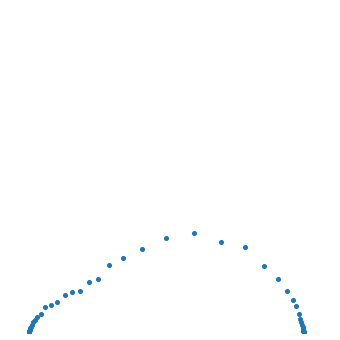

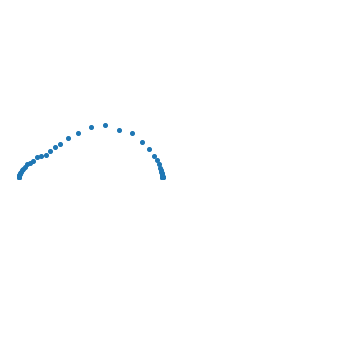

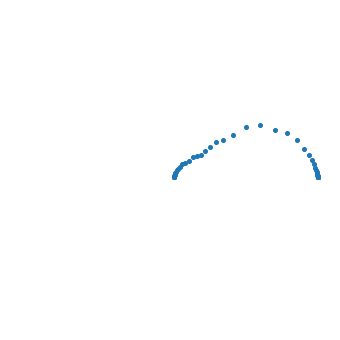

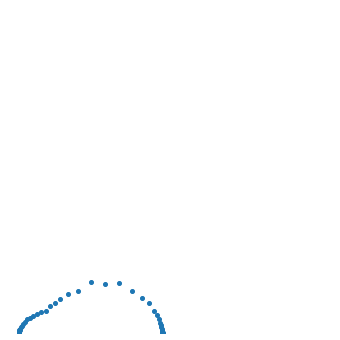

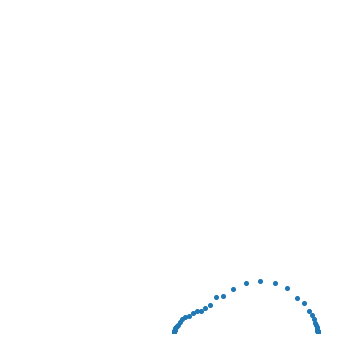

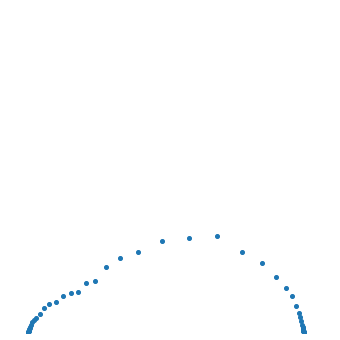

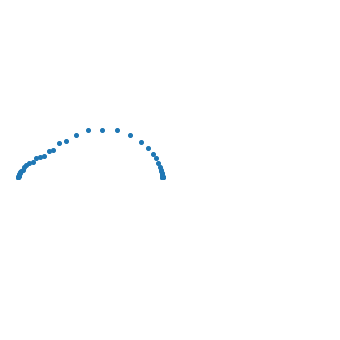

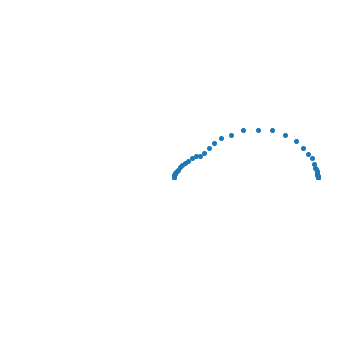

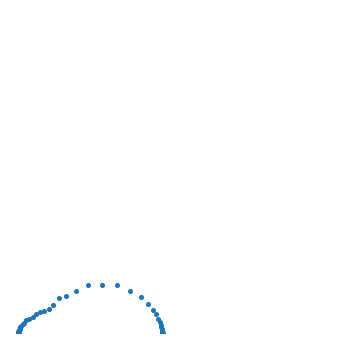

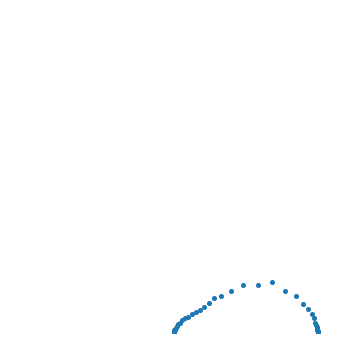

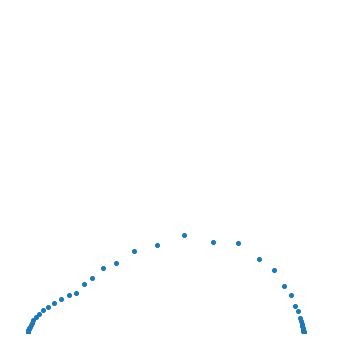

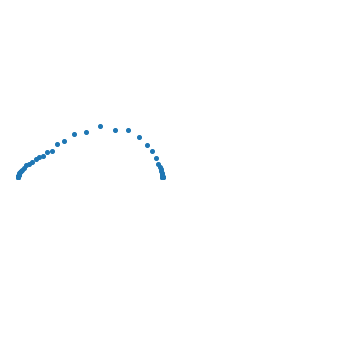

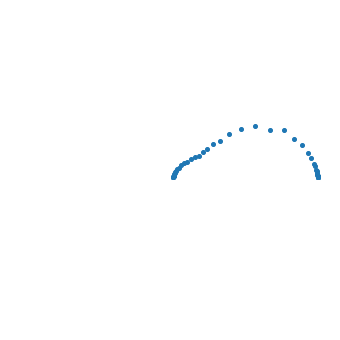

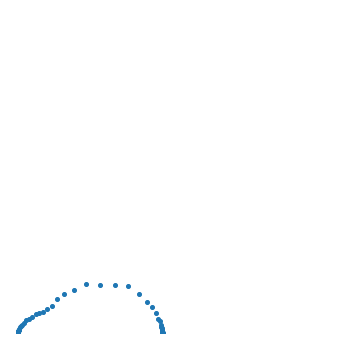

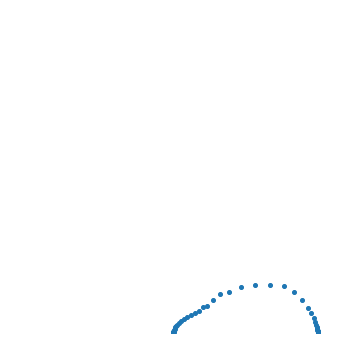

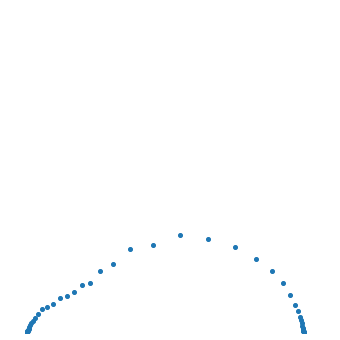

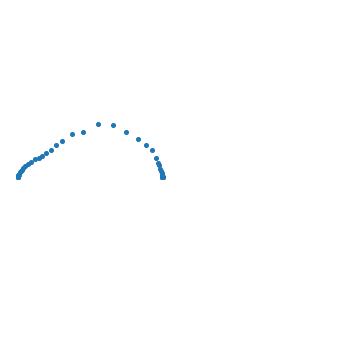

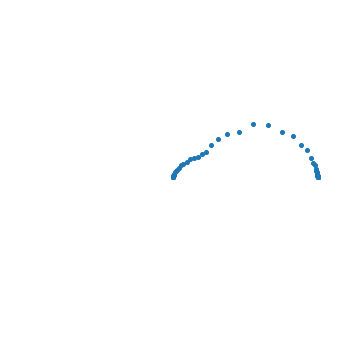

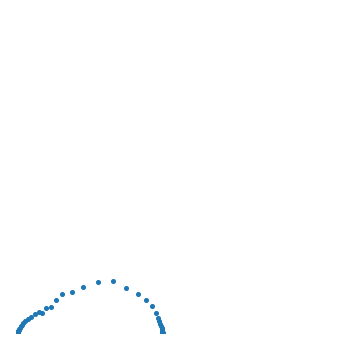

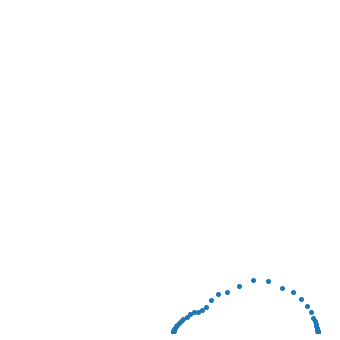

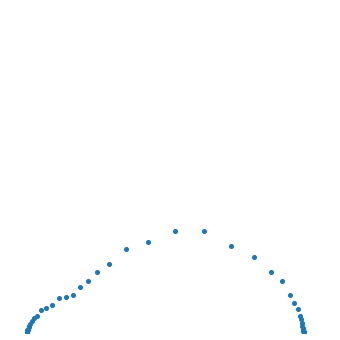

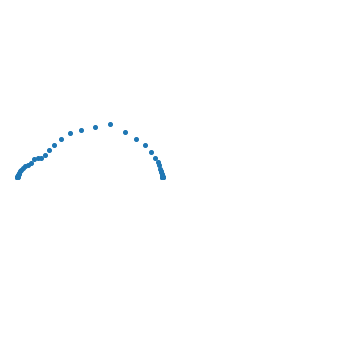

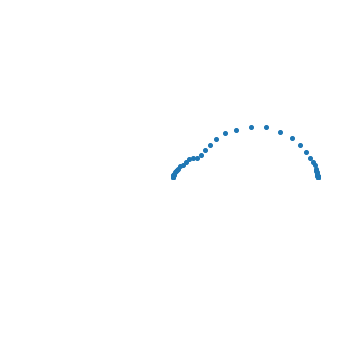

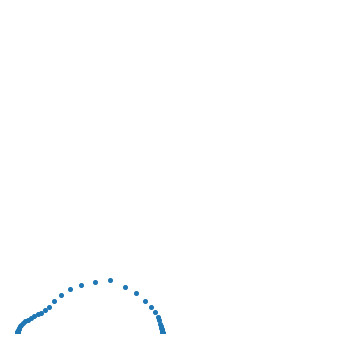

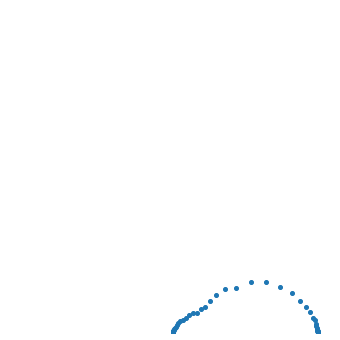

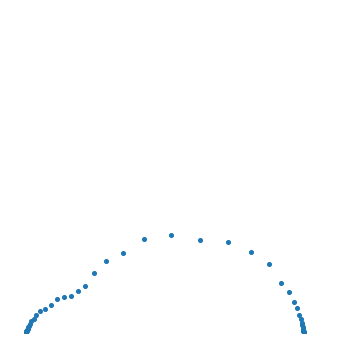

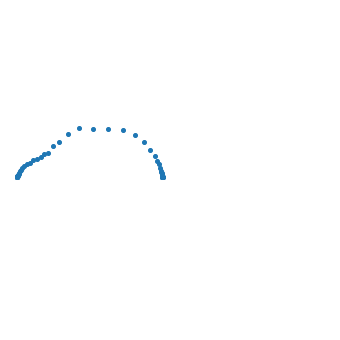

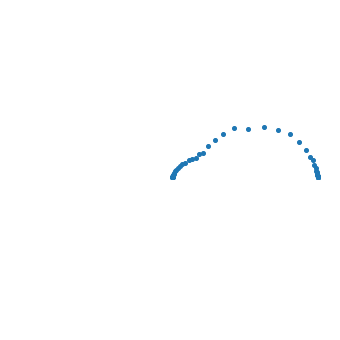

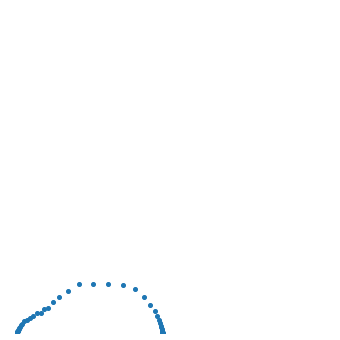

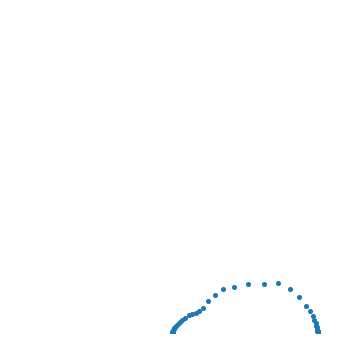

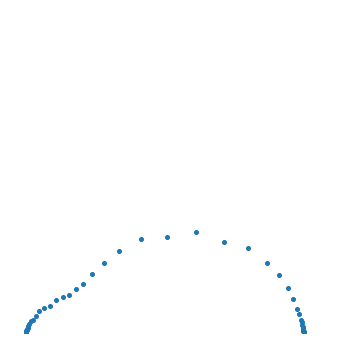

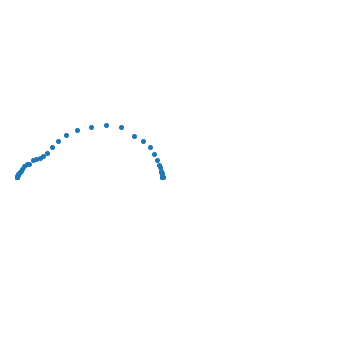

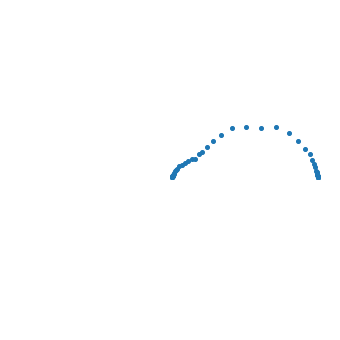

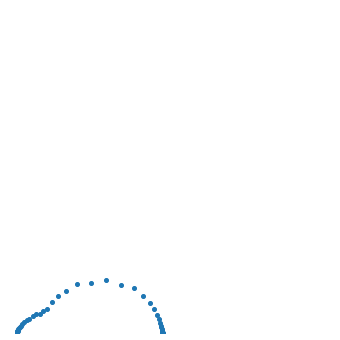

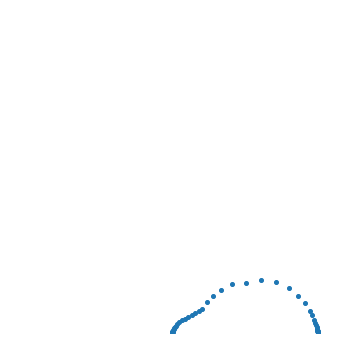

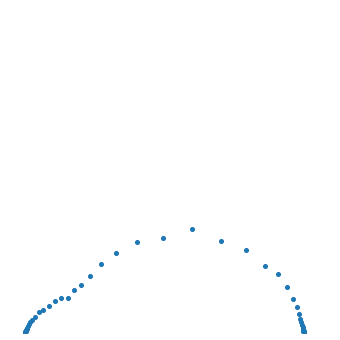

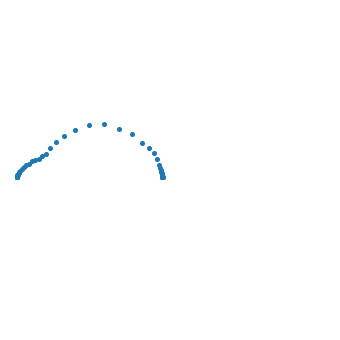

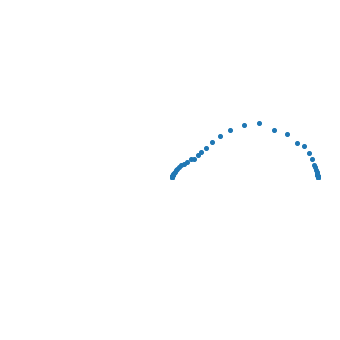

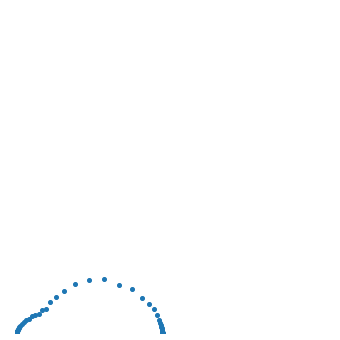

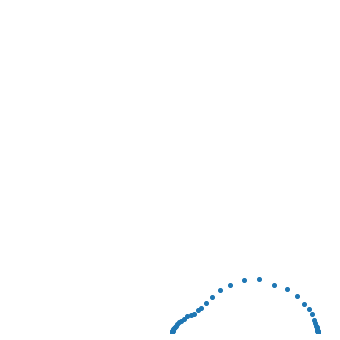

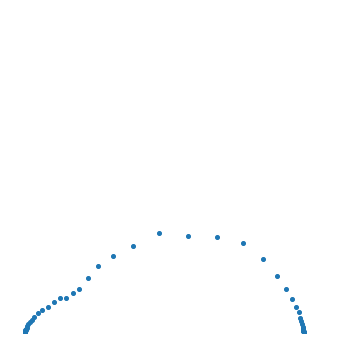

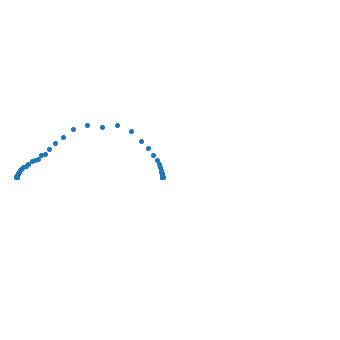

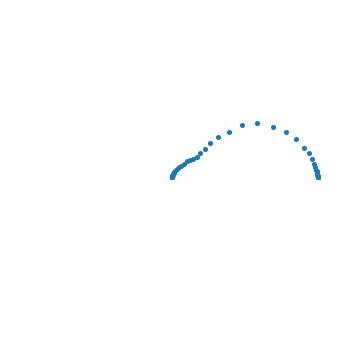

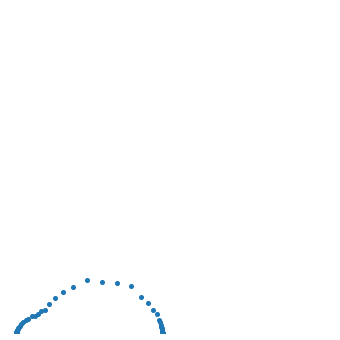

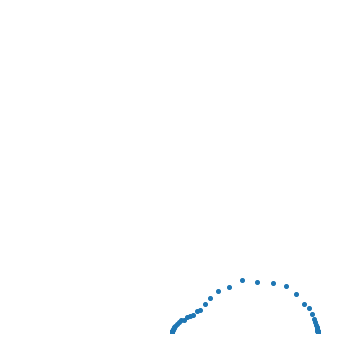

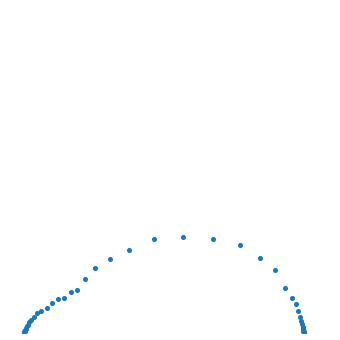

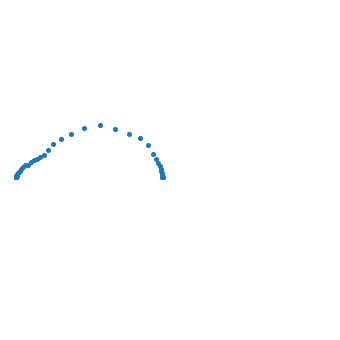

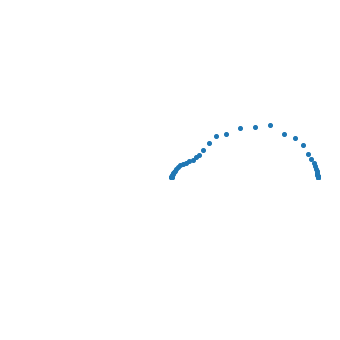

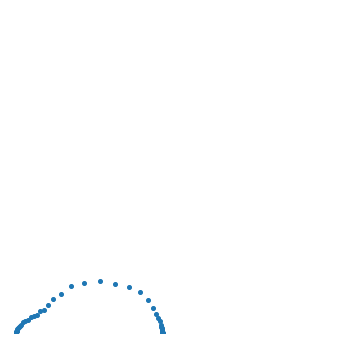

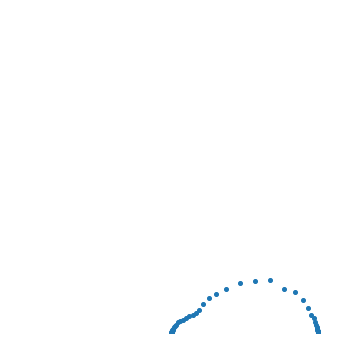

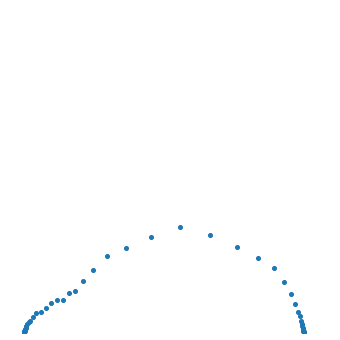

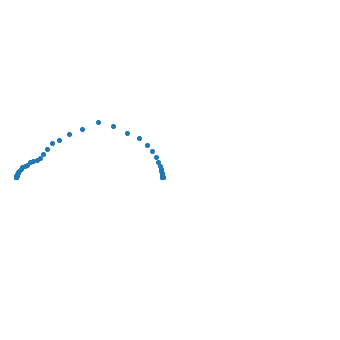

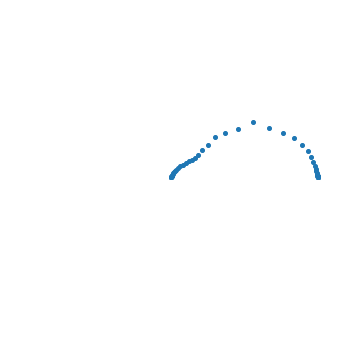

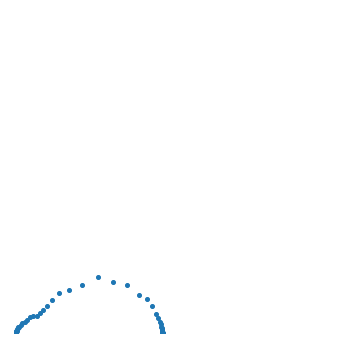

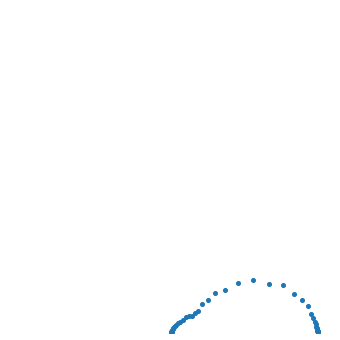

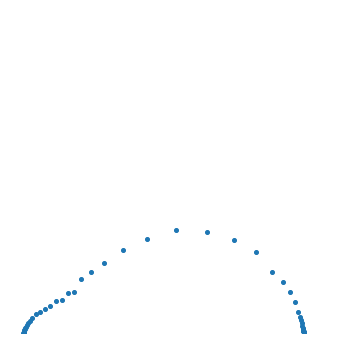

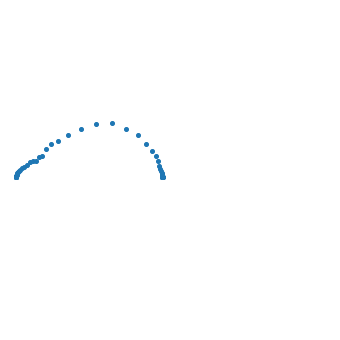

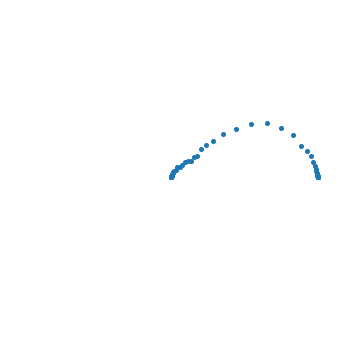

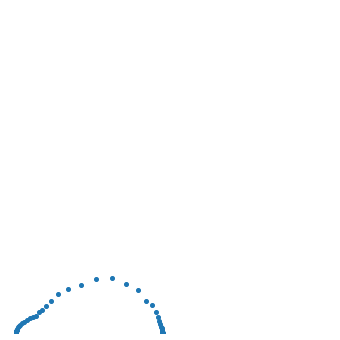

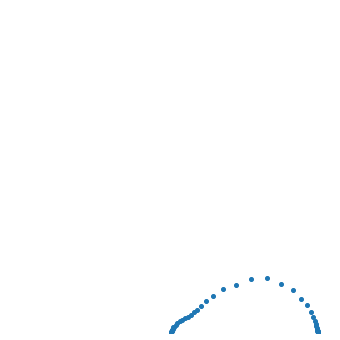

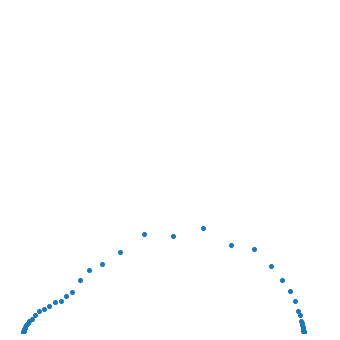

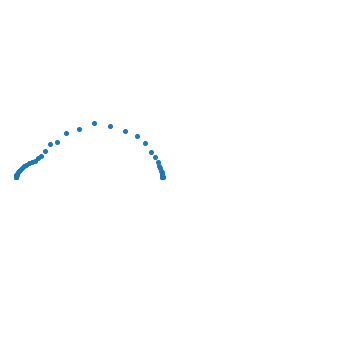

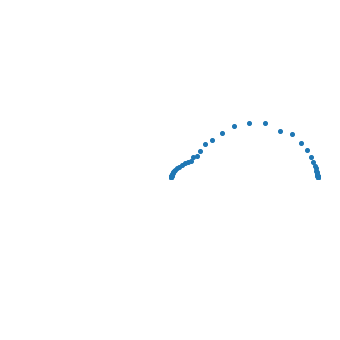

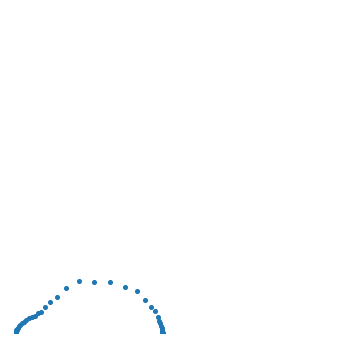

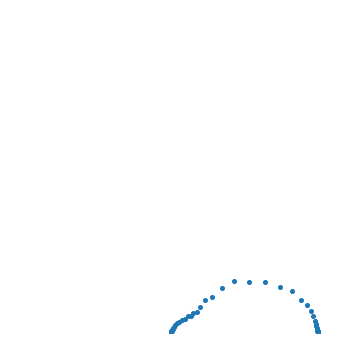

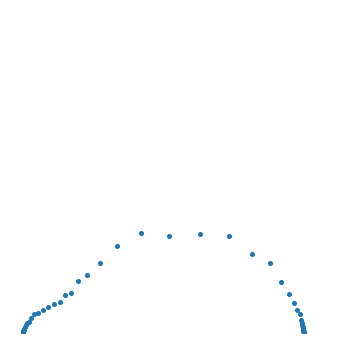

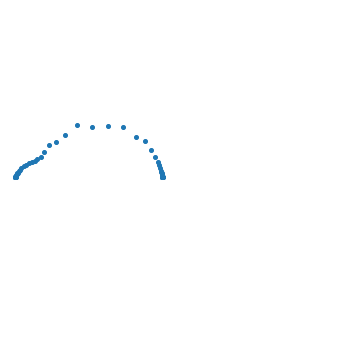

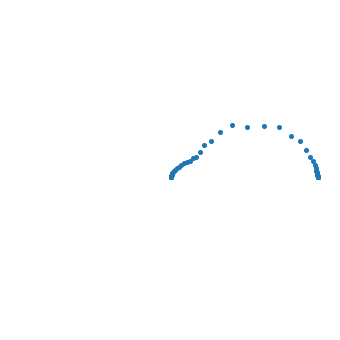

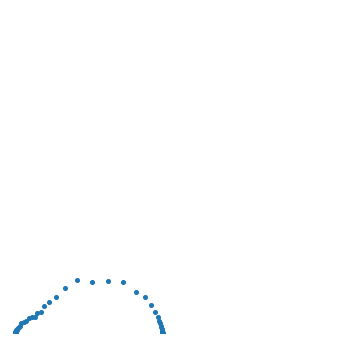

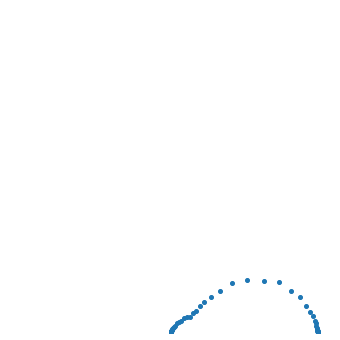

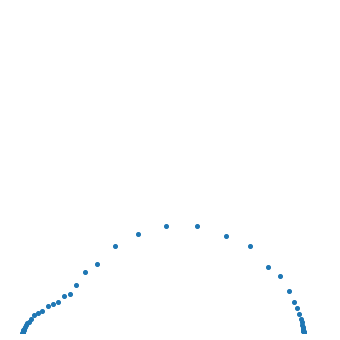

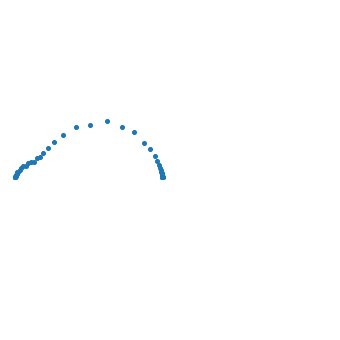

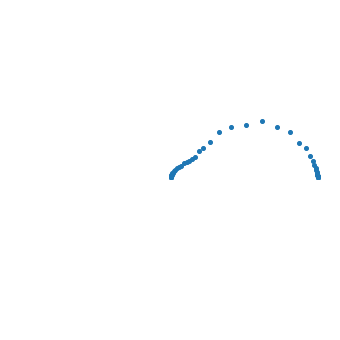

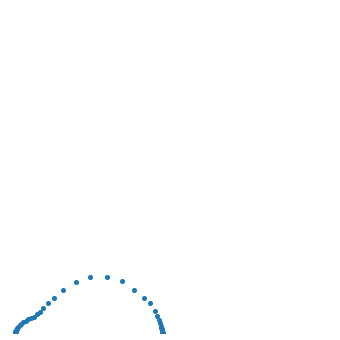

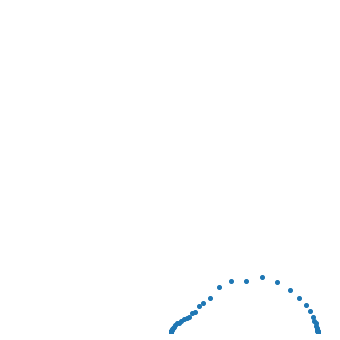

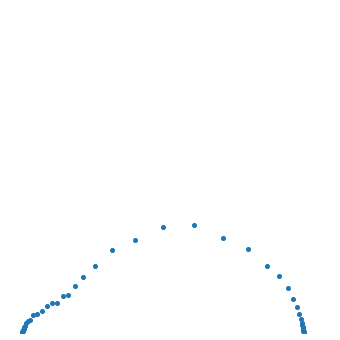

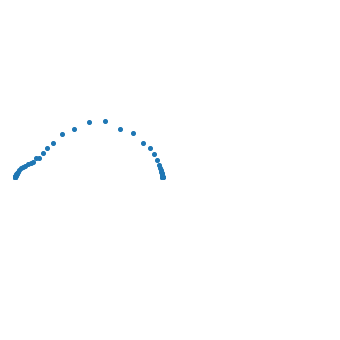

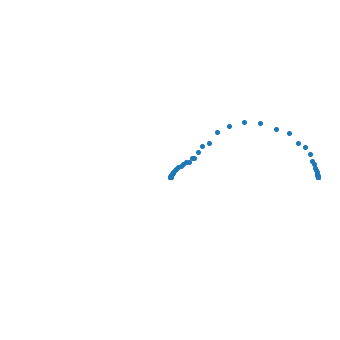

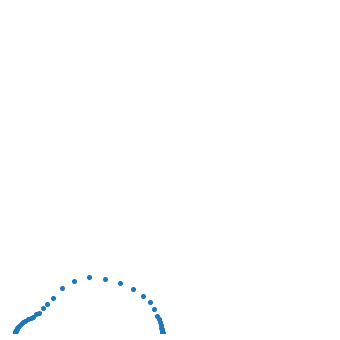

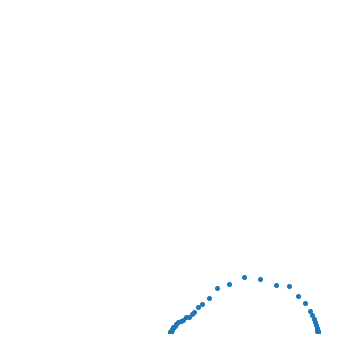

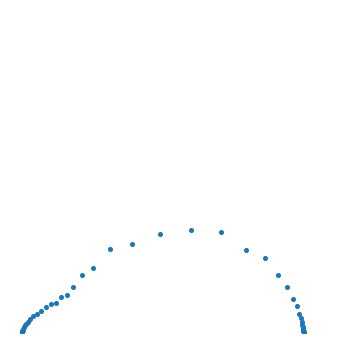

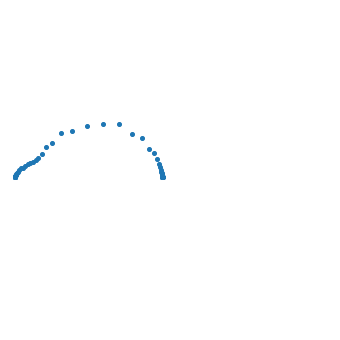

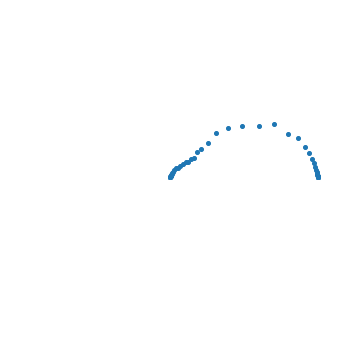

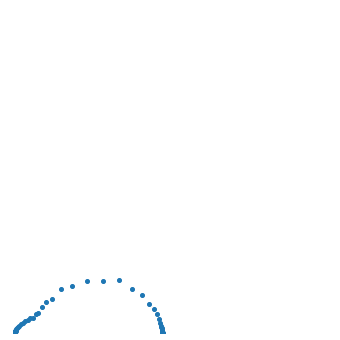

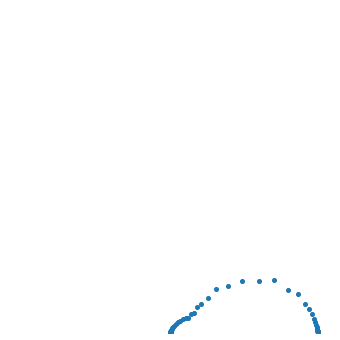

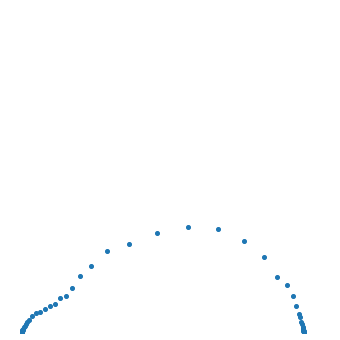

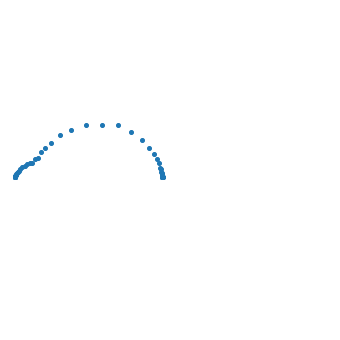

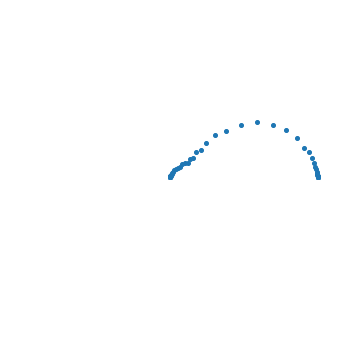

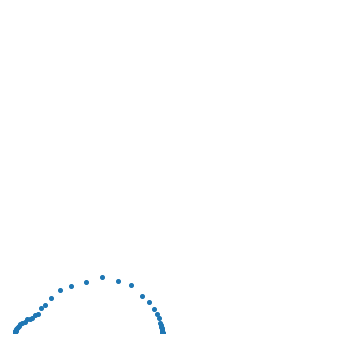

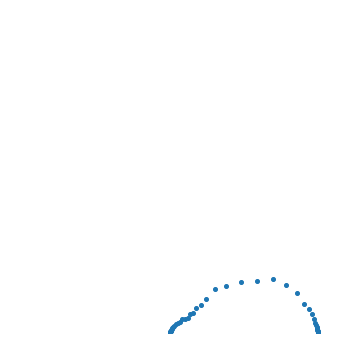

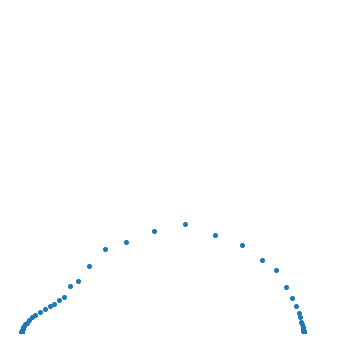

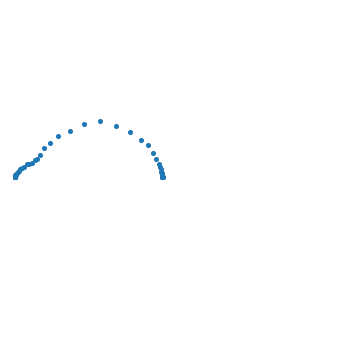

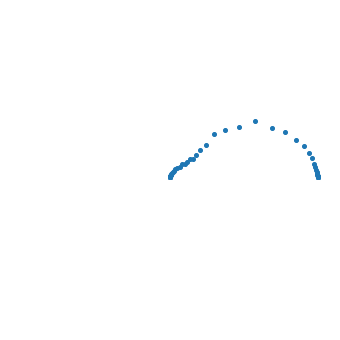

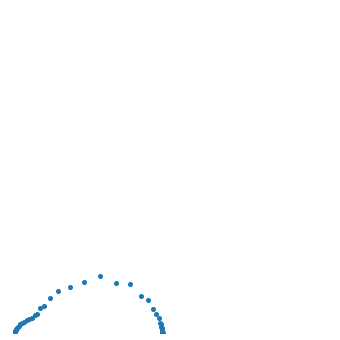

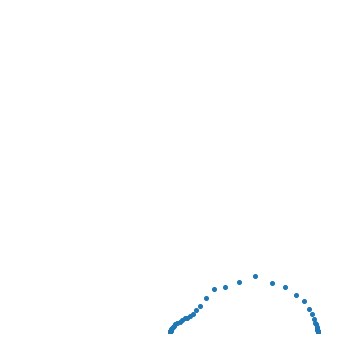

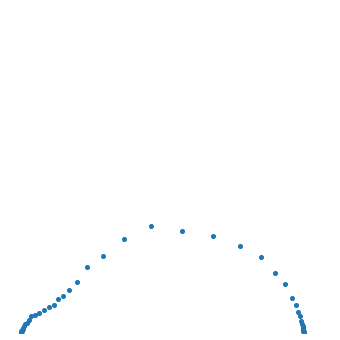

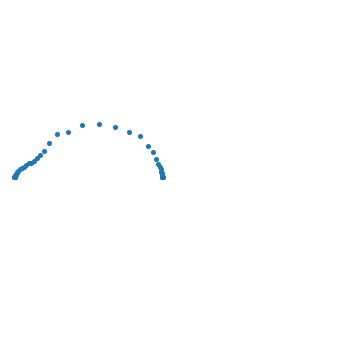

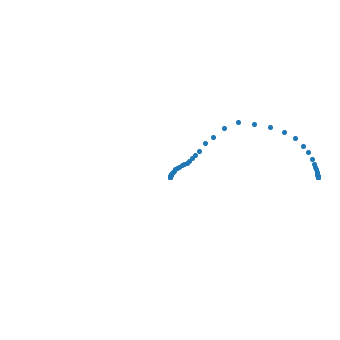

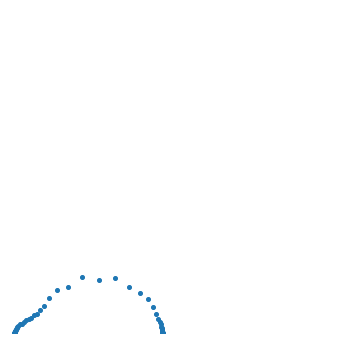

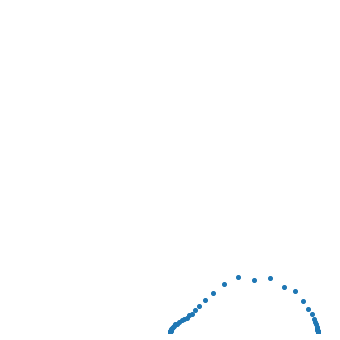

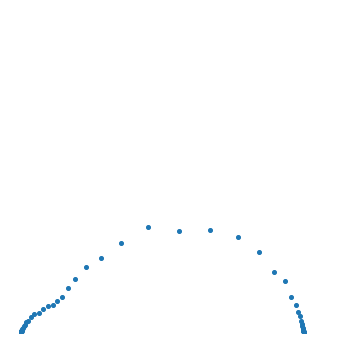

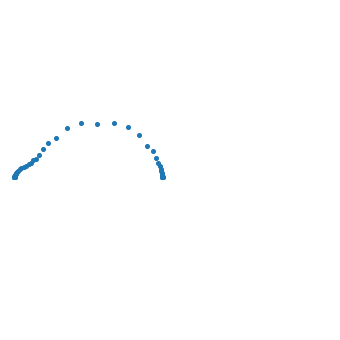

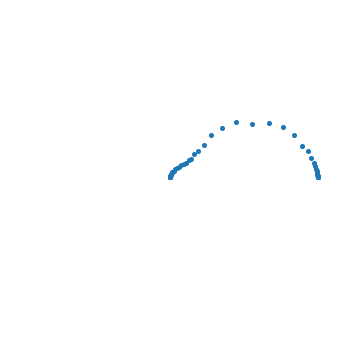

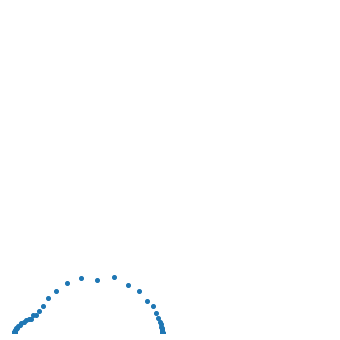

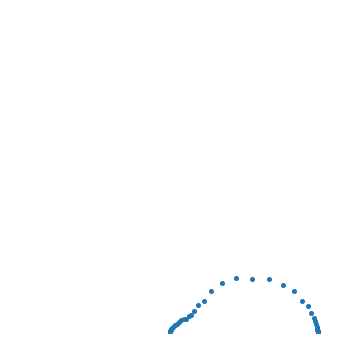

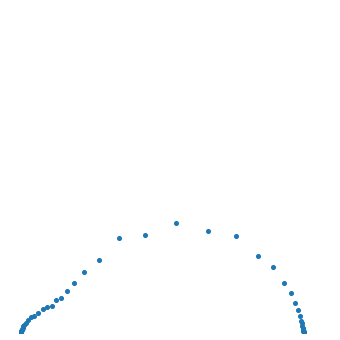

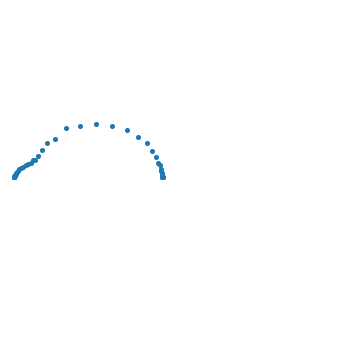

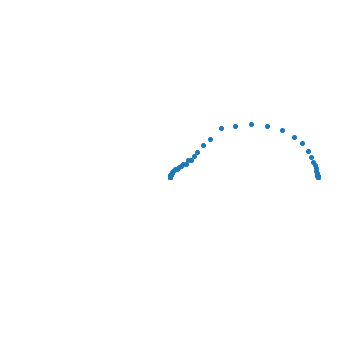

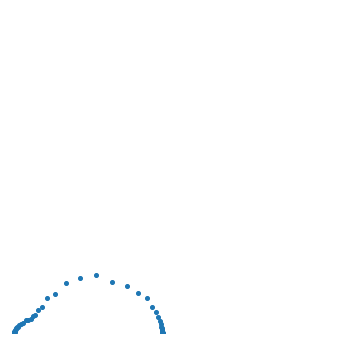

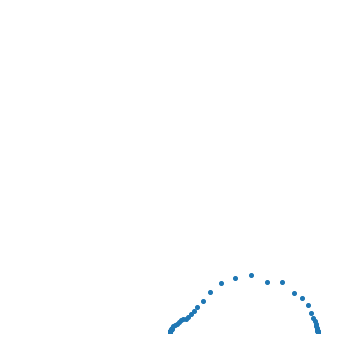

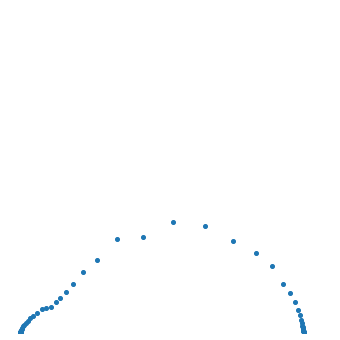

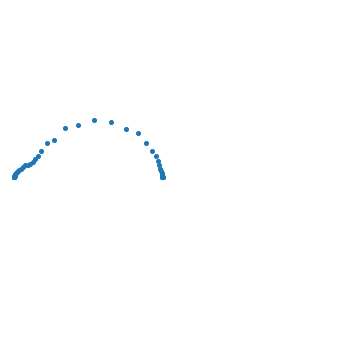

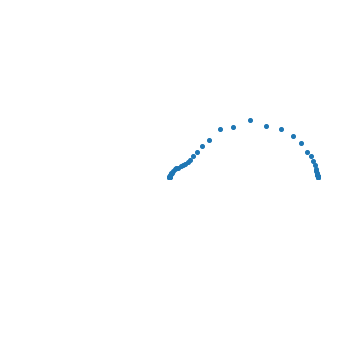

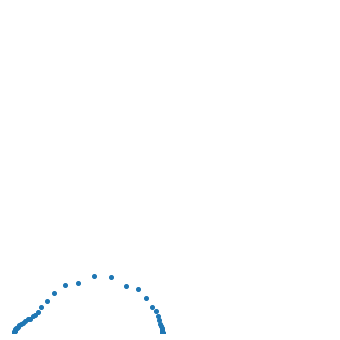

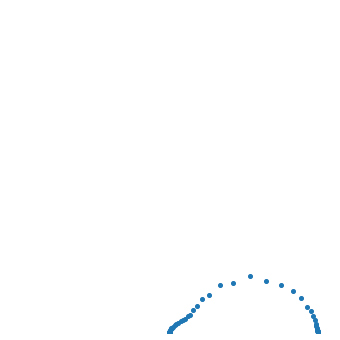

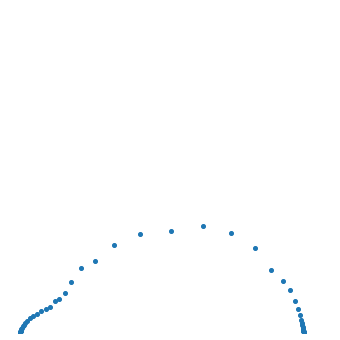

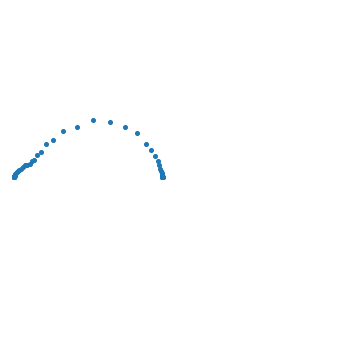

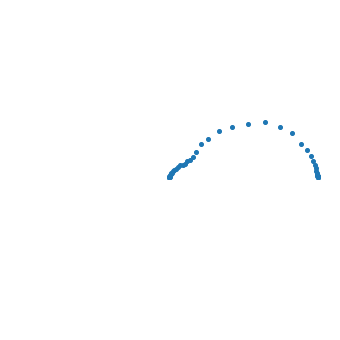

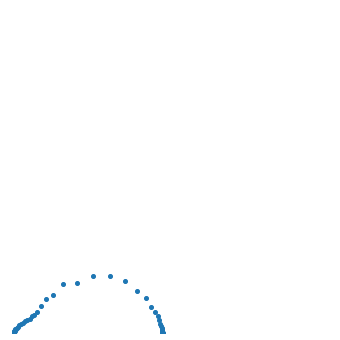

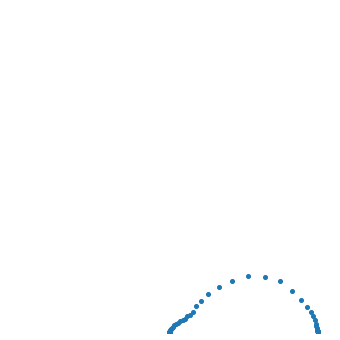

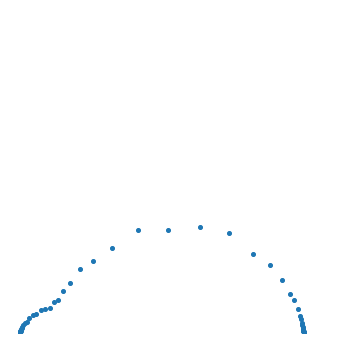

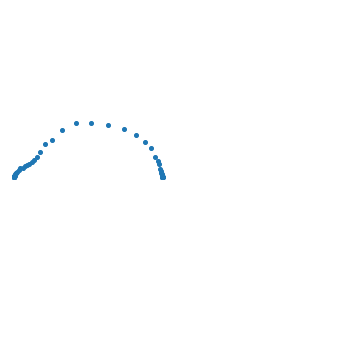

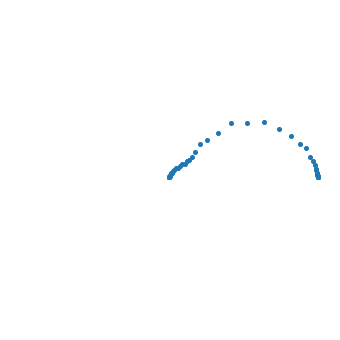

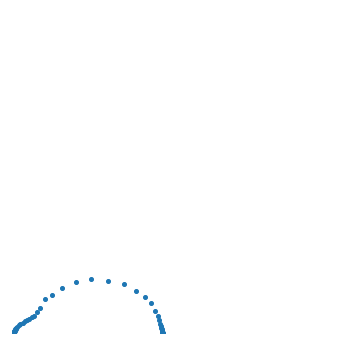

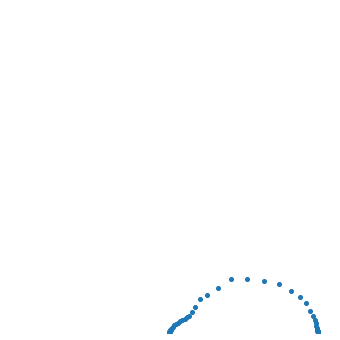

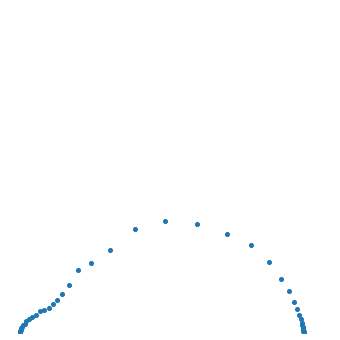

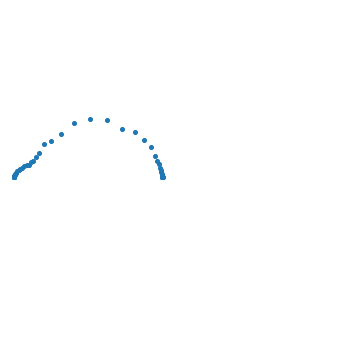

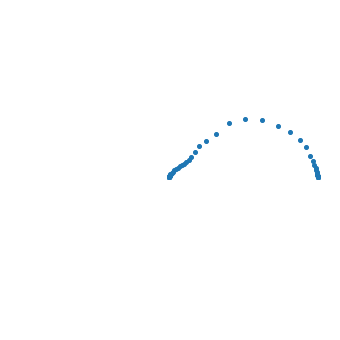

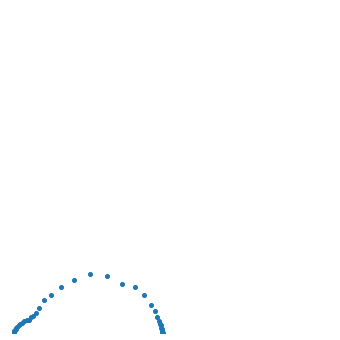

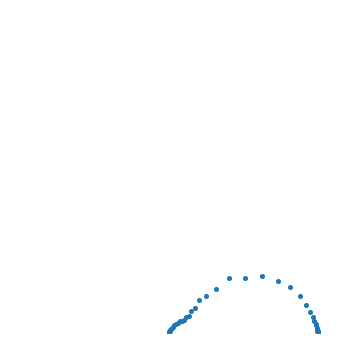

In [21]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q1= 25E-6 #F
alpha1= 0.8
Q2= 2*Q1 #F
alpha2= 0.9
R2= 150   # ohm
R1= 30   # ohm
resistance= np.linspace(1,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRQRQ_file_writer(f_start, f_stop, decades, Rs,R1, Q1,alpha1, R2, Q2,alpha2, alteration='noise', noisescale=0.05, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

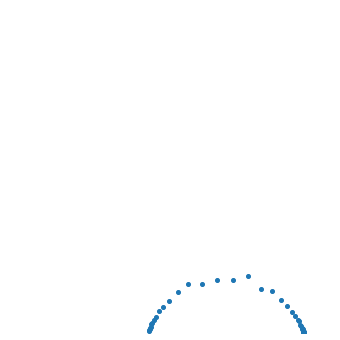

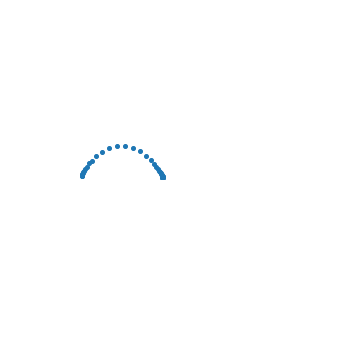

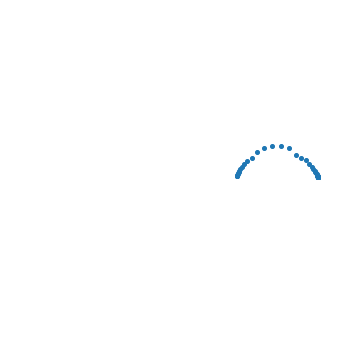

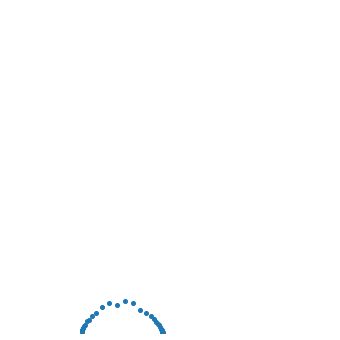

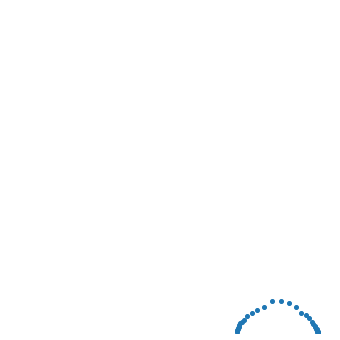

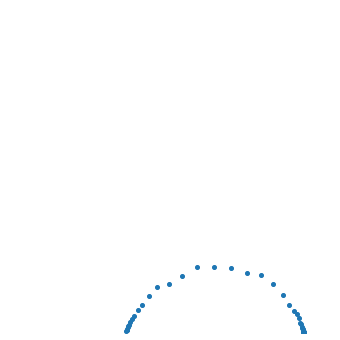

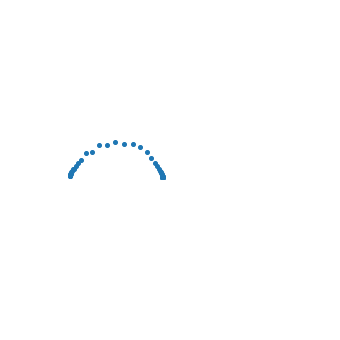

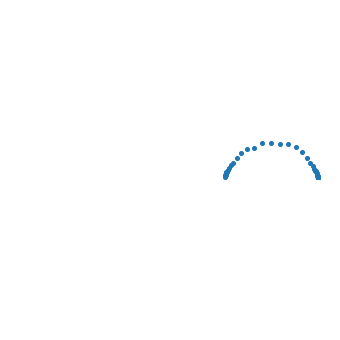

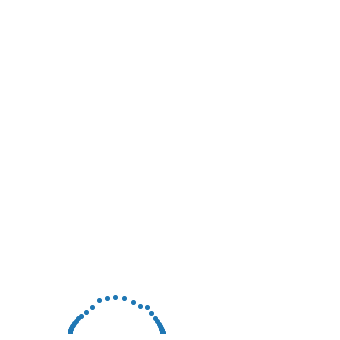

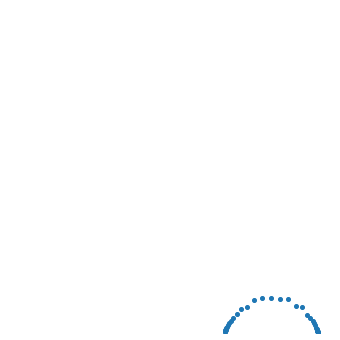

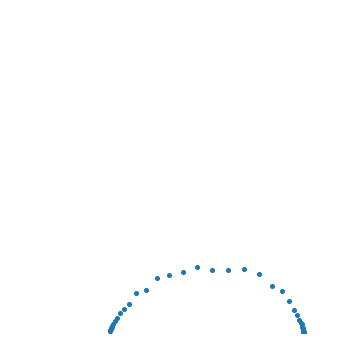

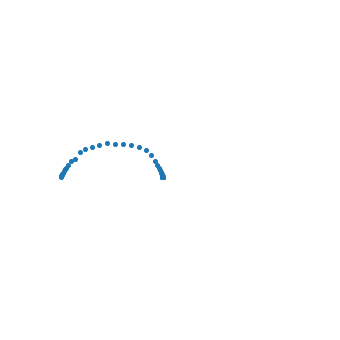

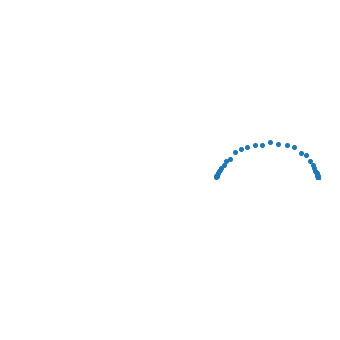

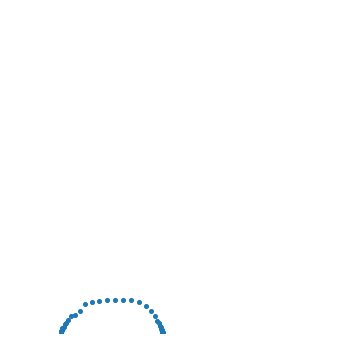

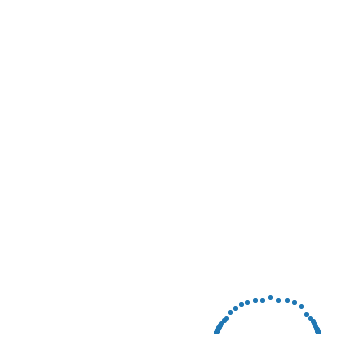

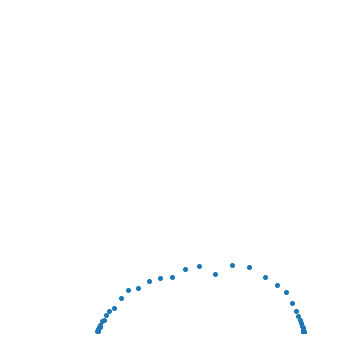

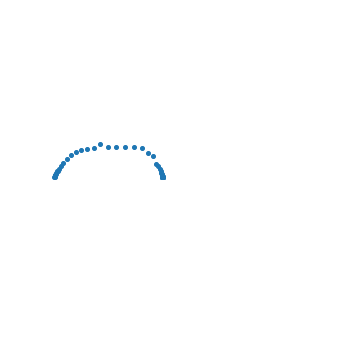

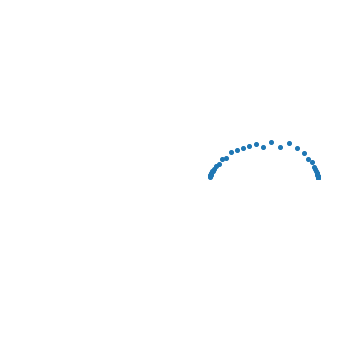

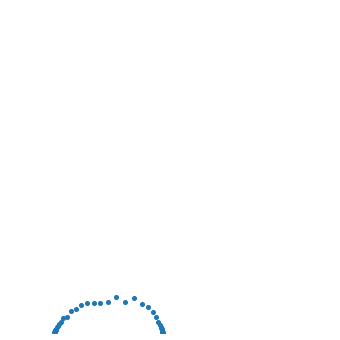

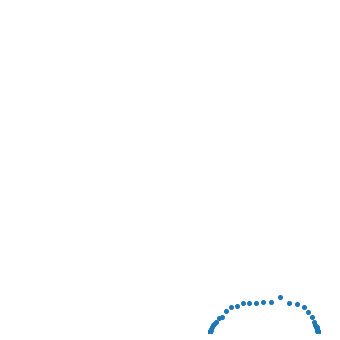

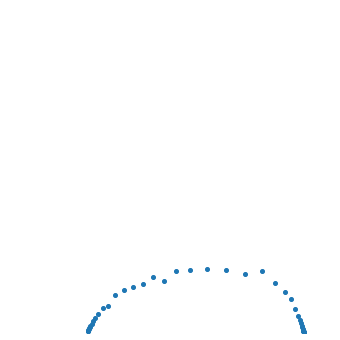

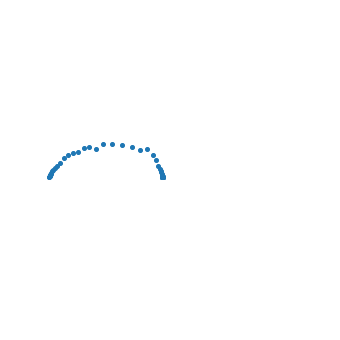

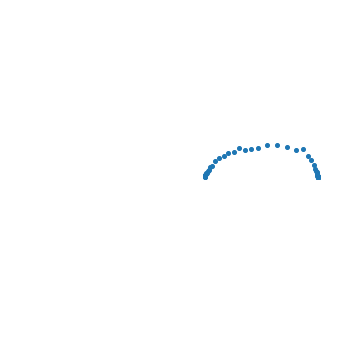

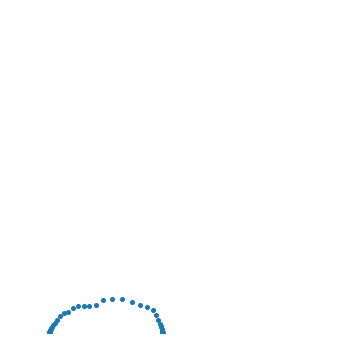

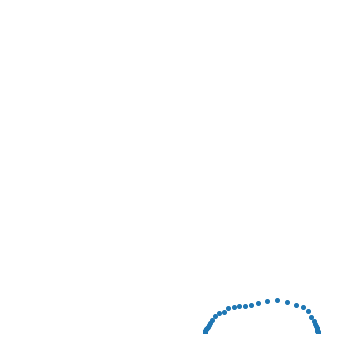

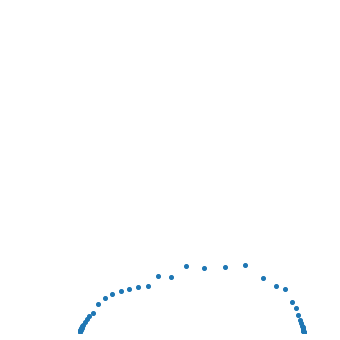

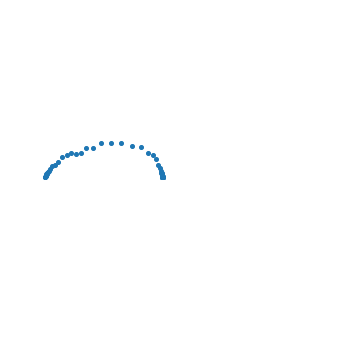

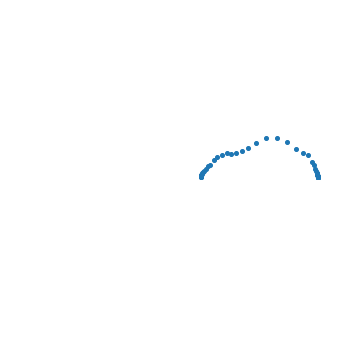

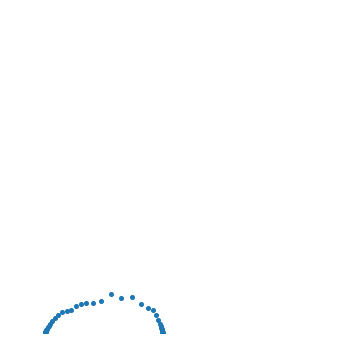

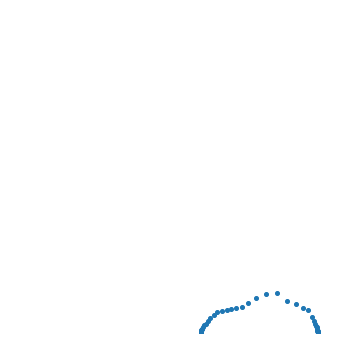

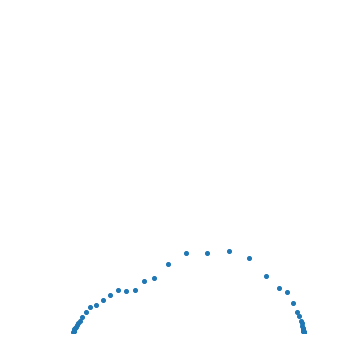

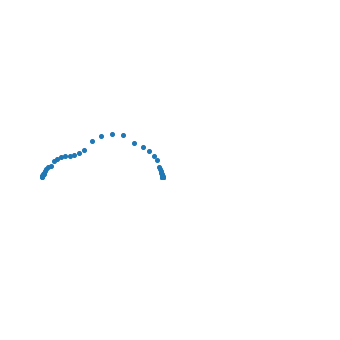

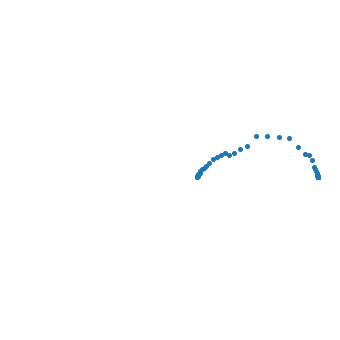

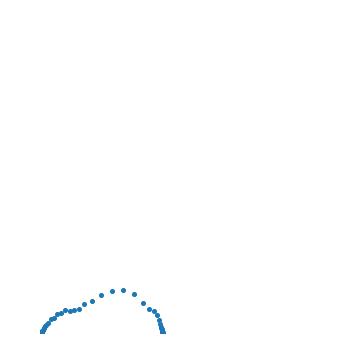

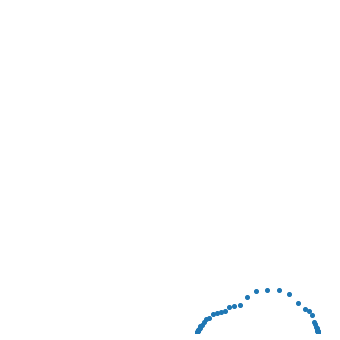

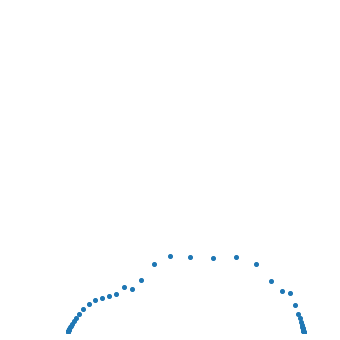

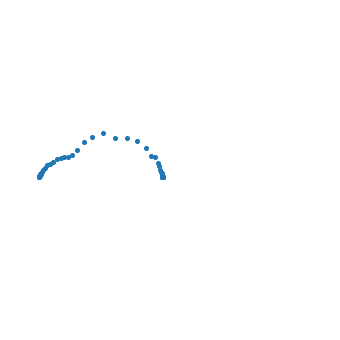

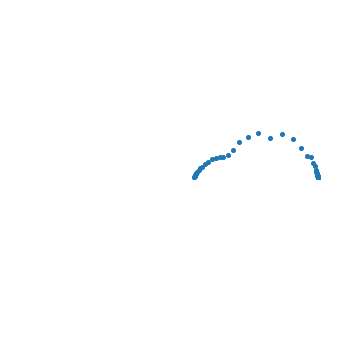

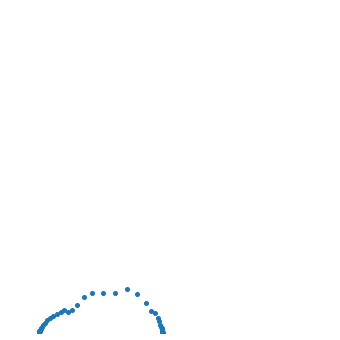

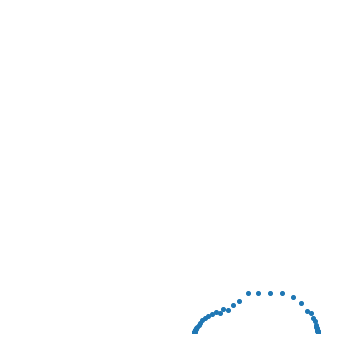

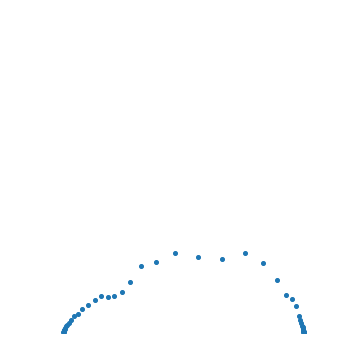

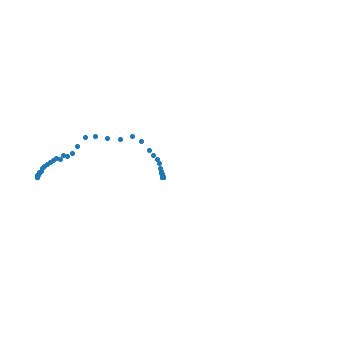

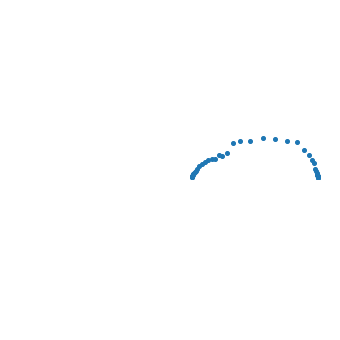

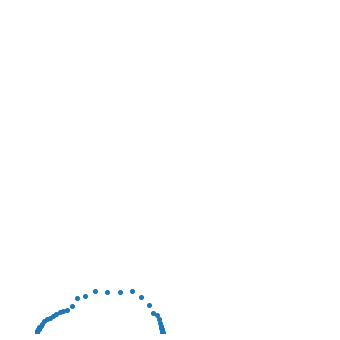

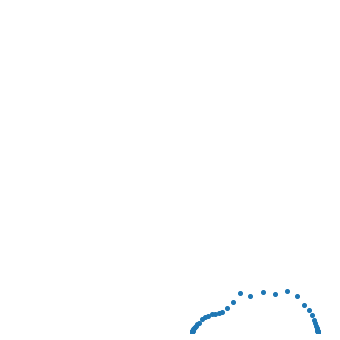

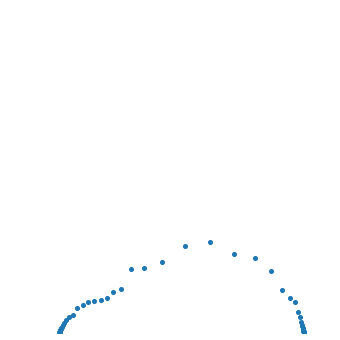

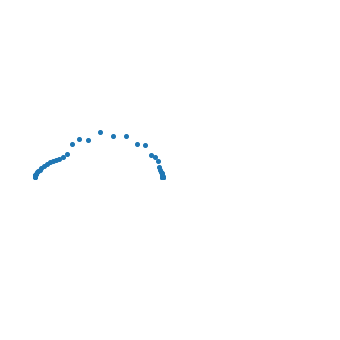

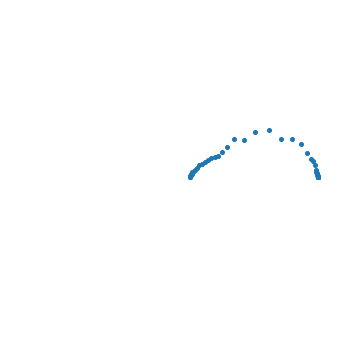

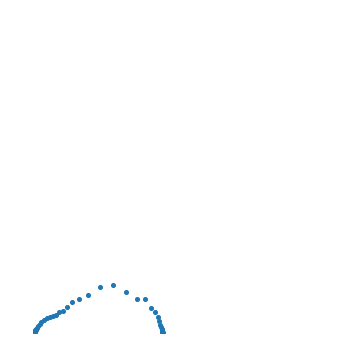

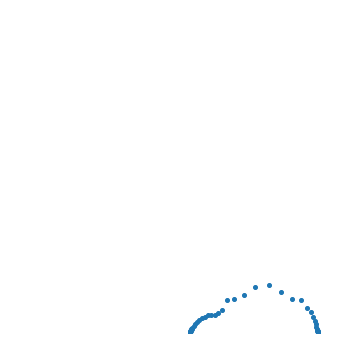

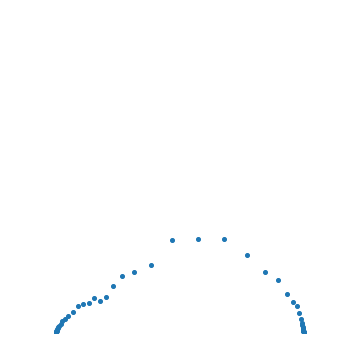

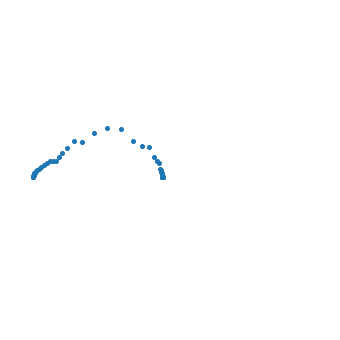

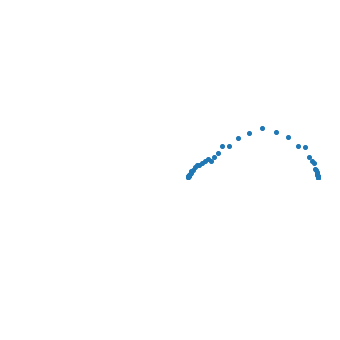

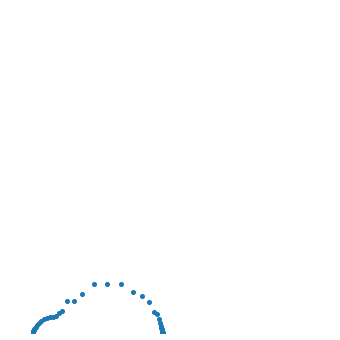

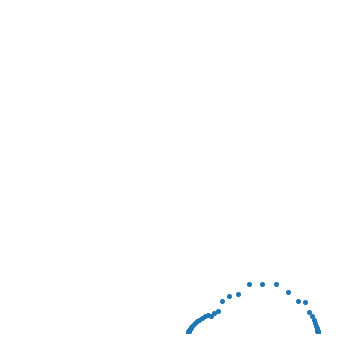

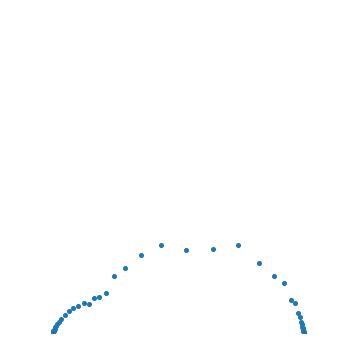

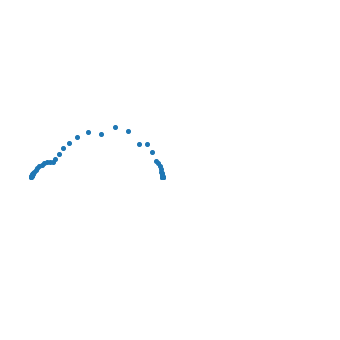

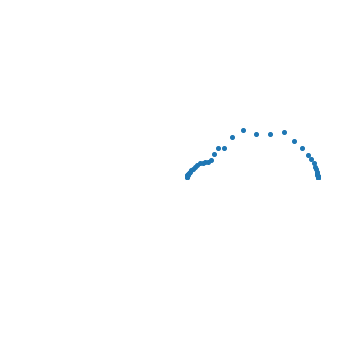

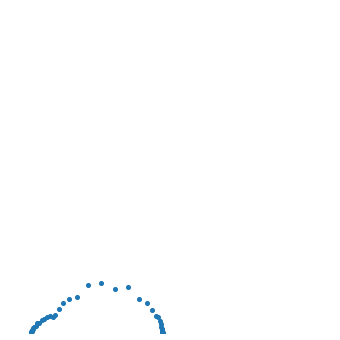

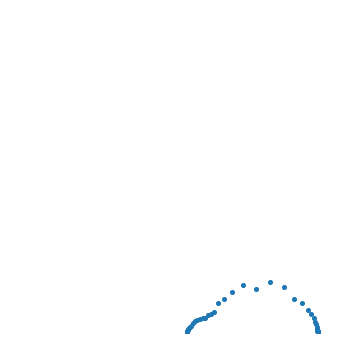

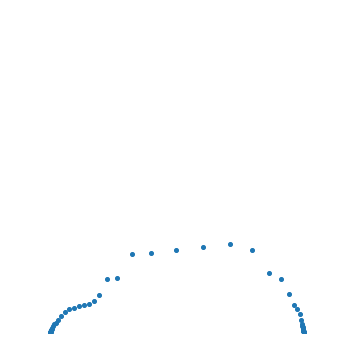

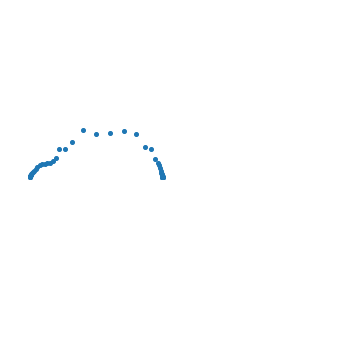

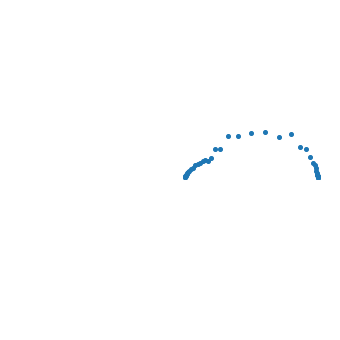

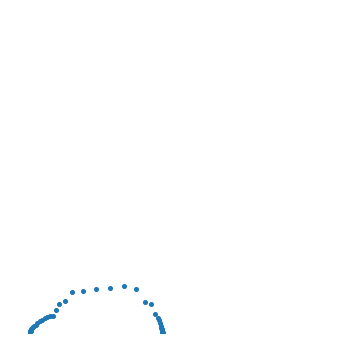

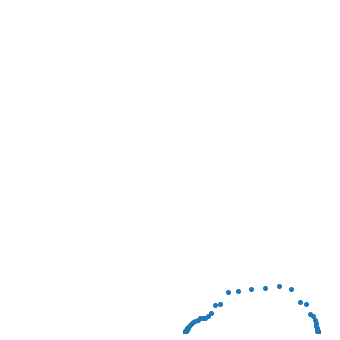

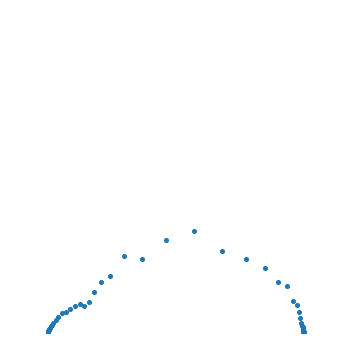

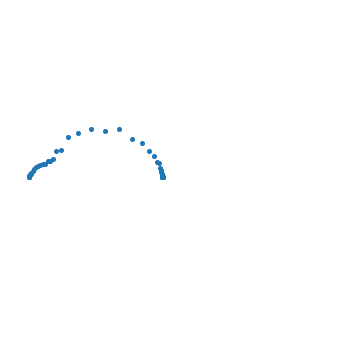

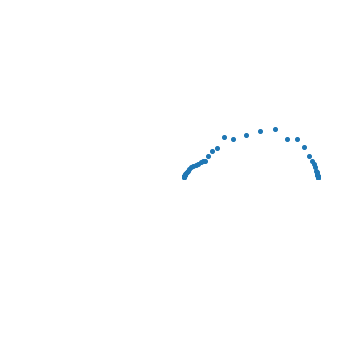

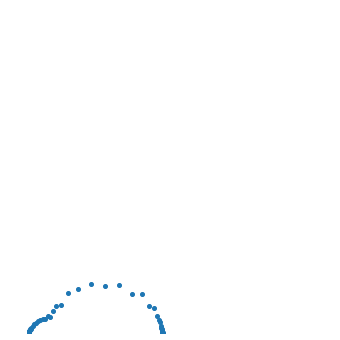

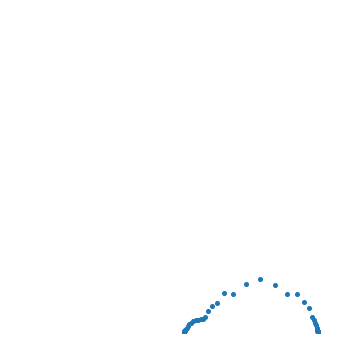

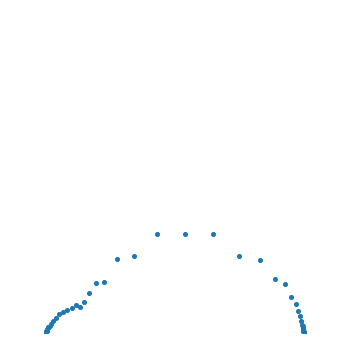

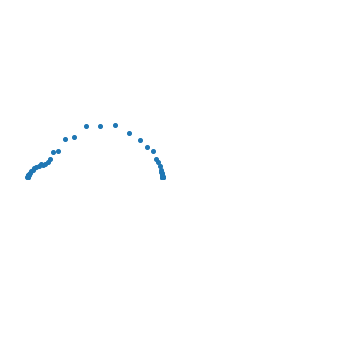

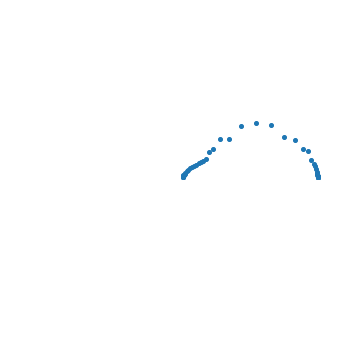

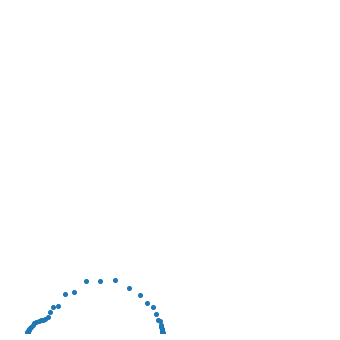

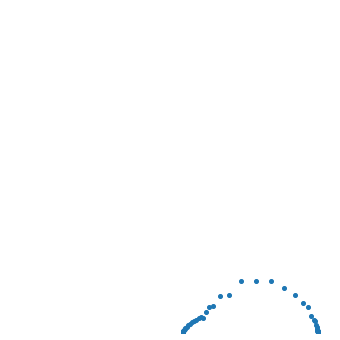

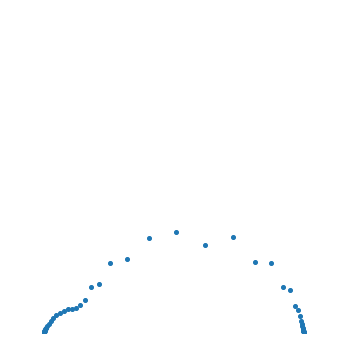

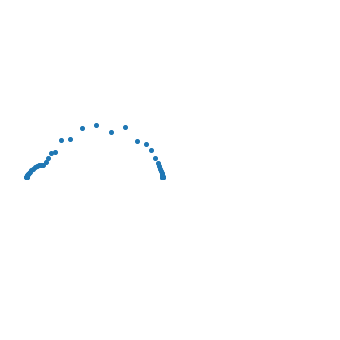

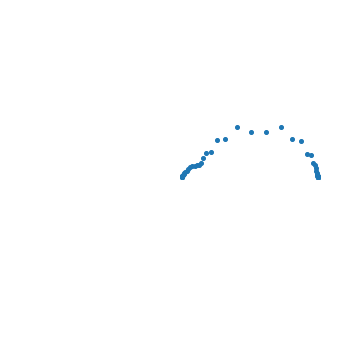

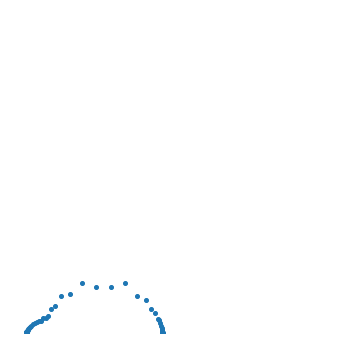

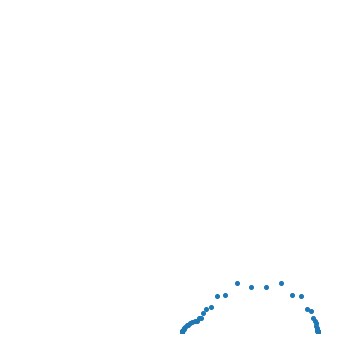

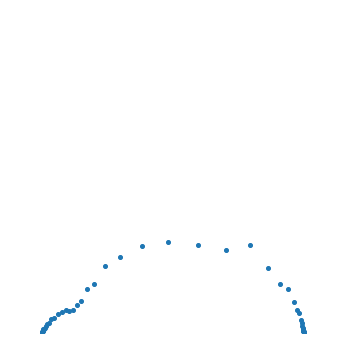

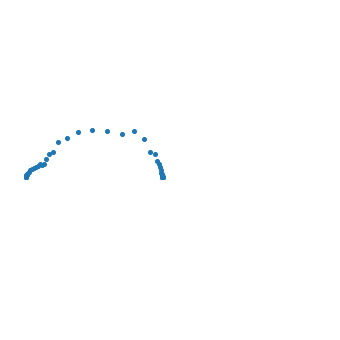

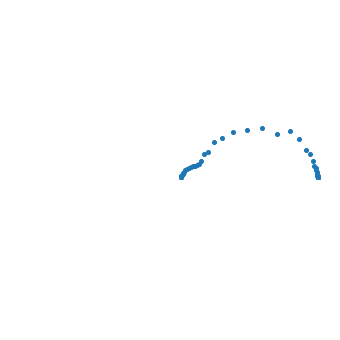

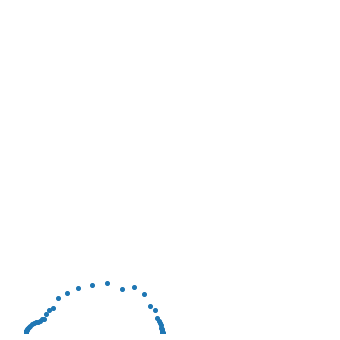

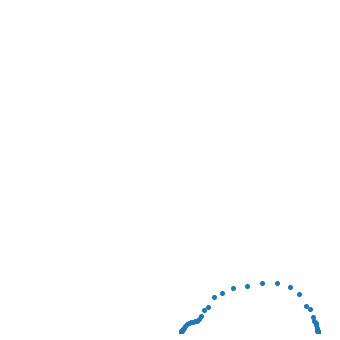

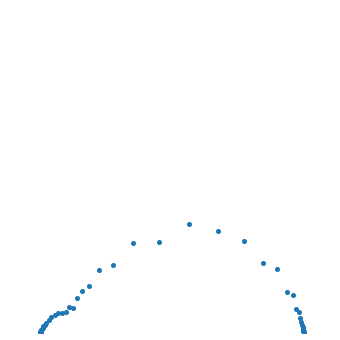

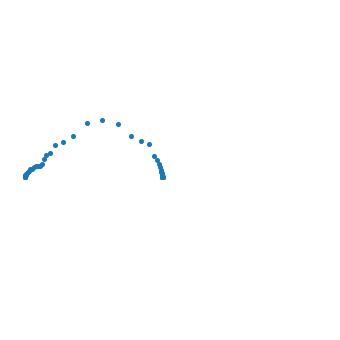

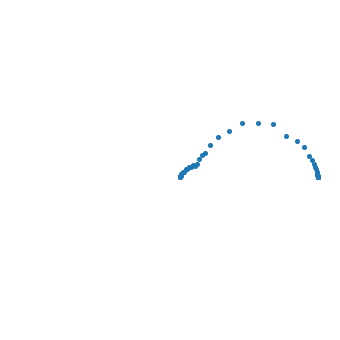

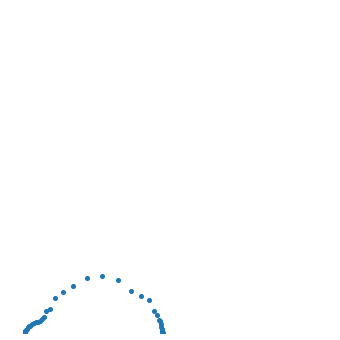

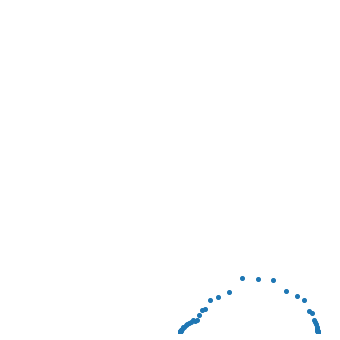

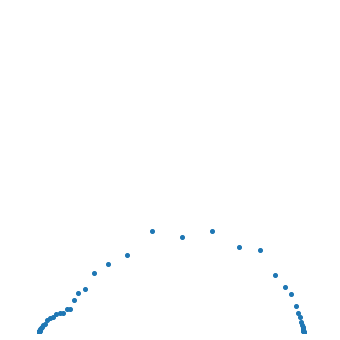

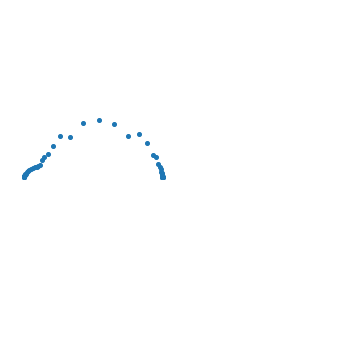

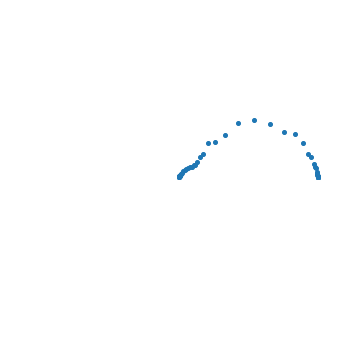

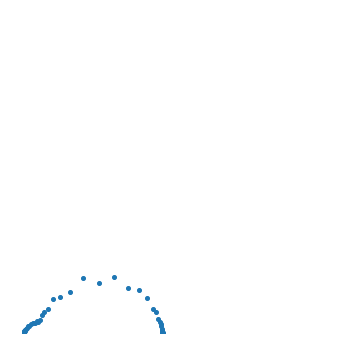

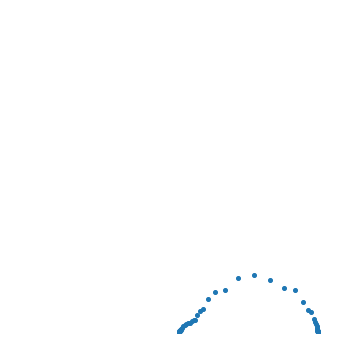

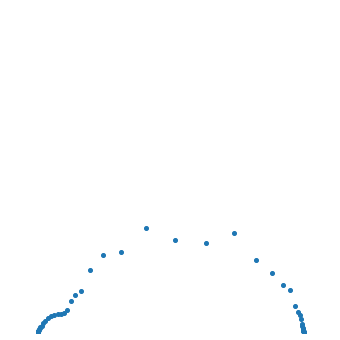

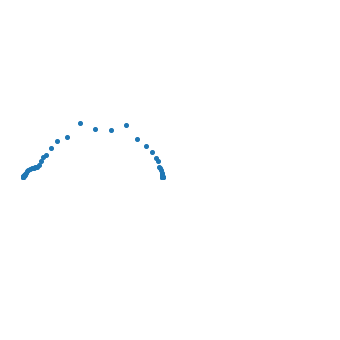

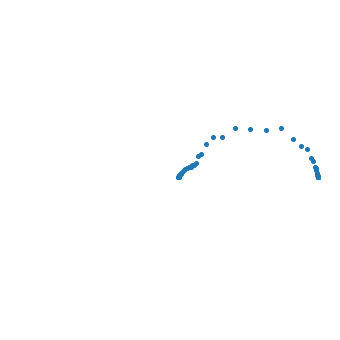

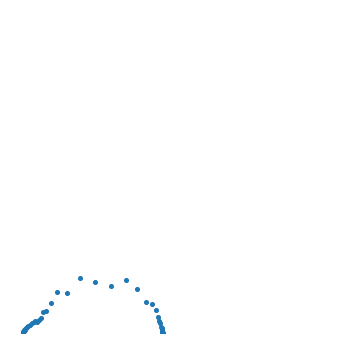

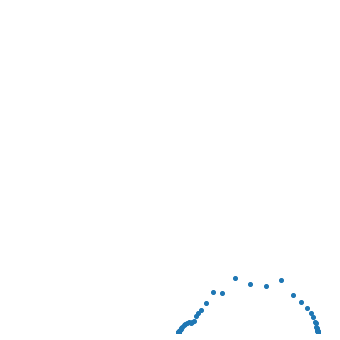

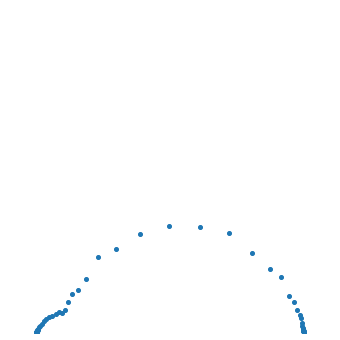

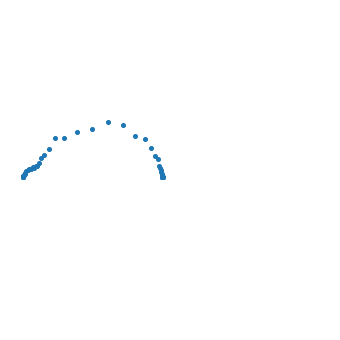

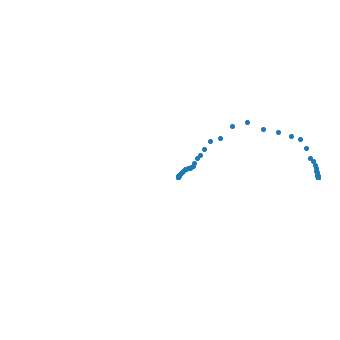

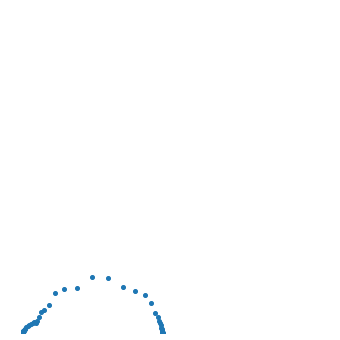

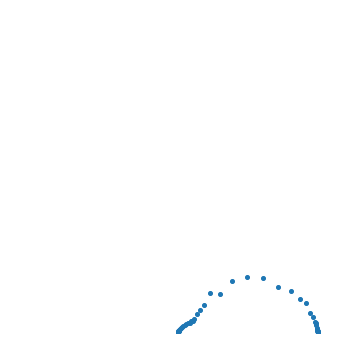

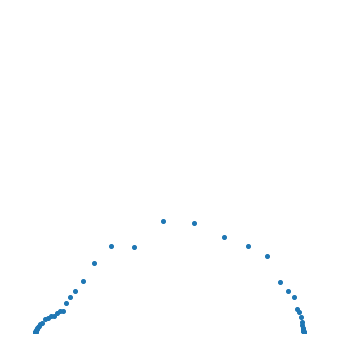

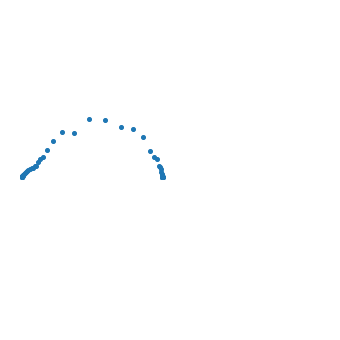

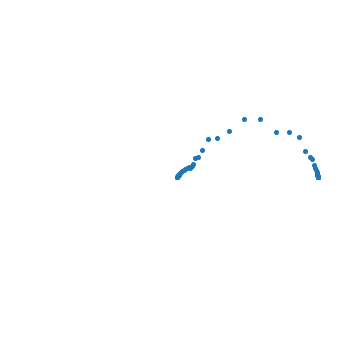

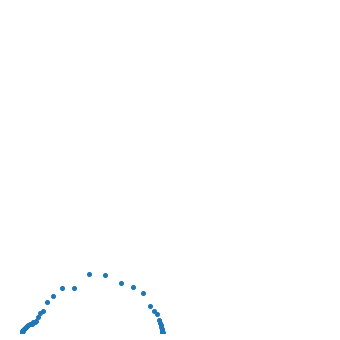

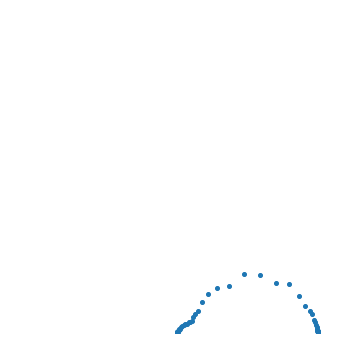

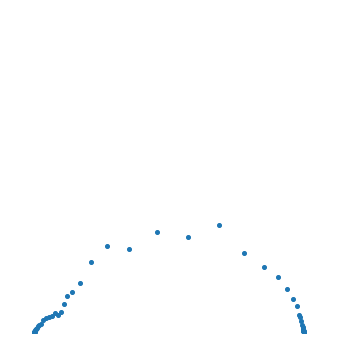

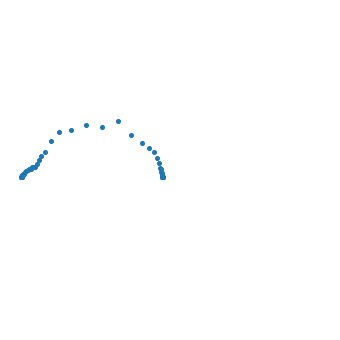

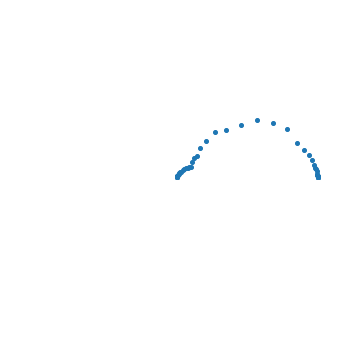

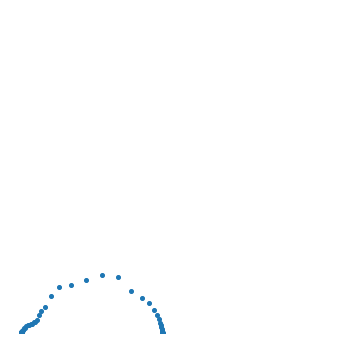

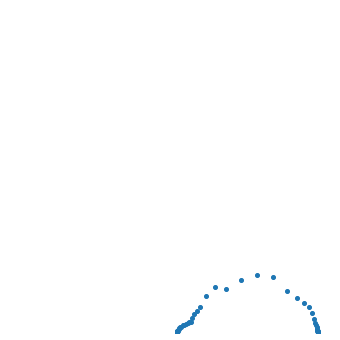

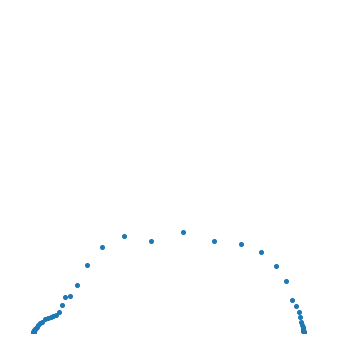

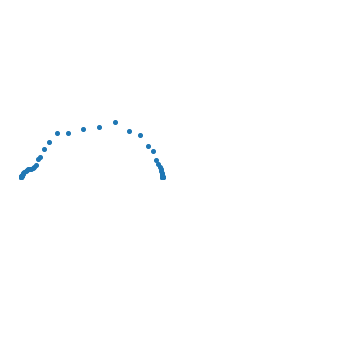

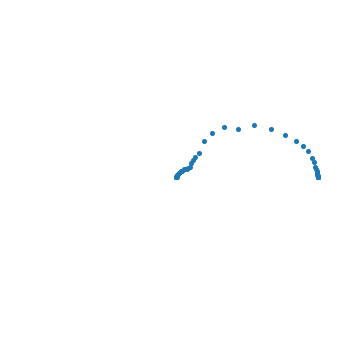

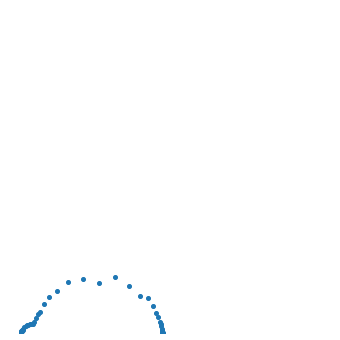

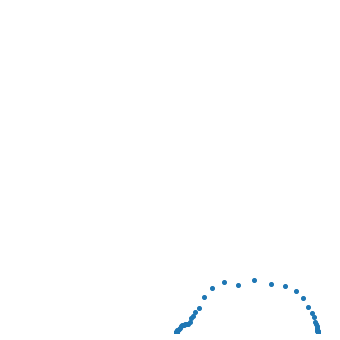

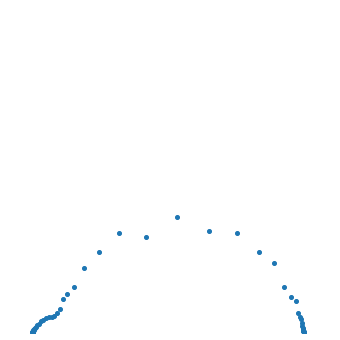

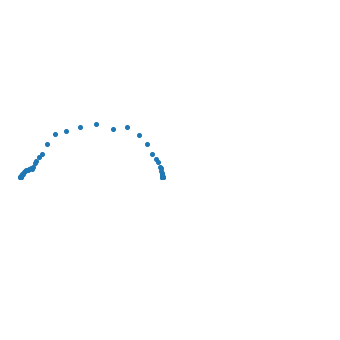

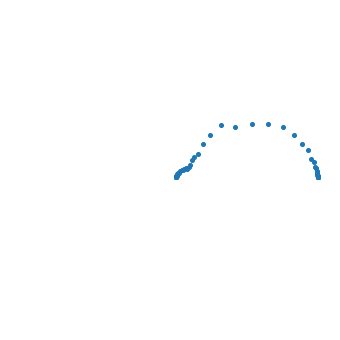

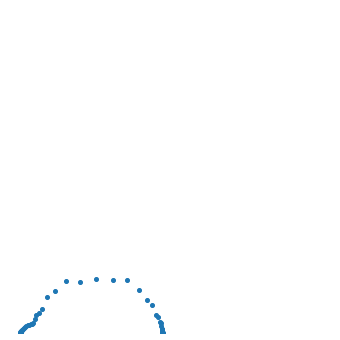

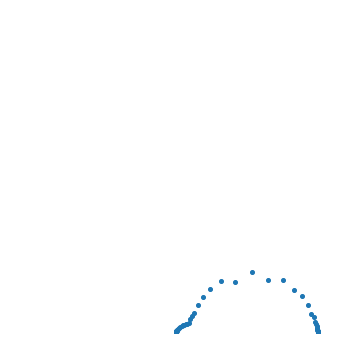

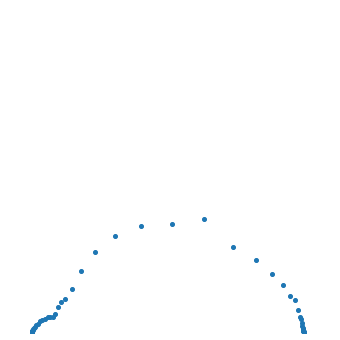

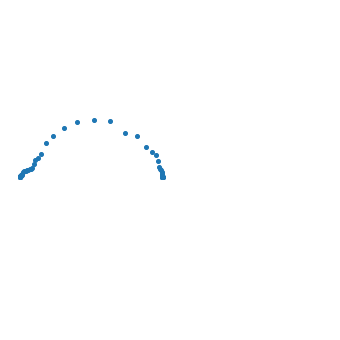

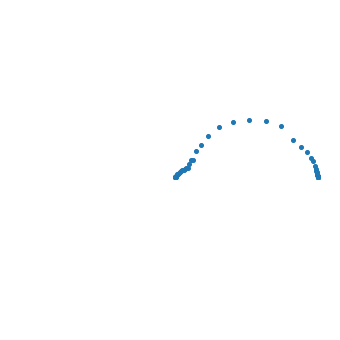

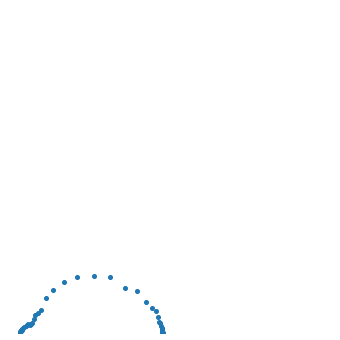

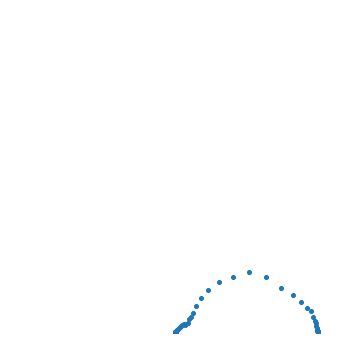

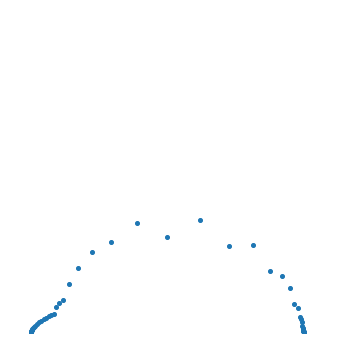

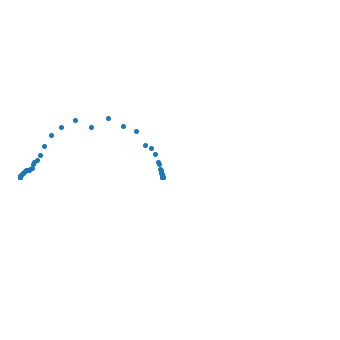

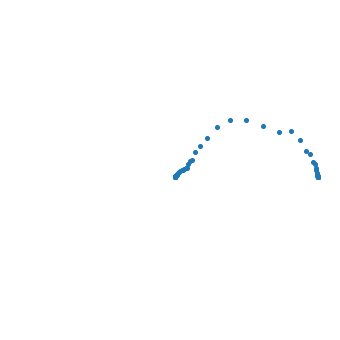

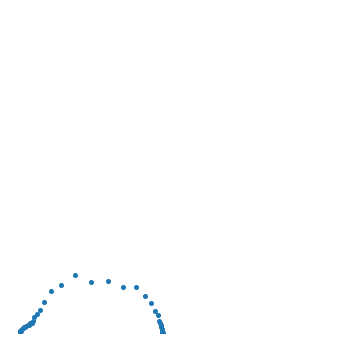

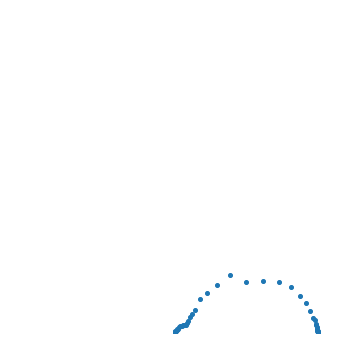

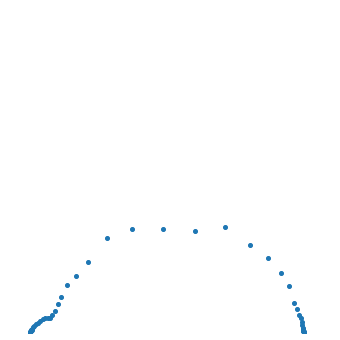

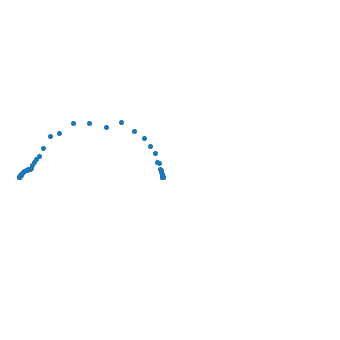

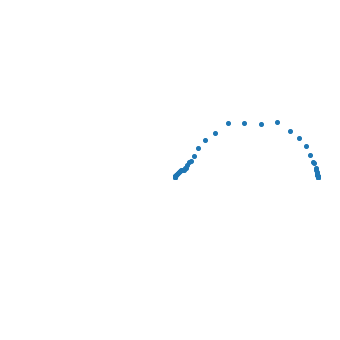

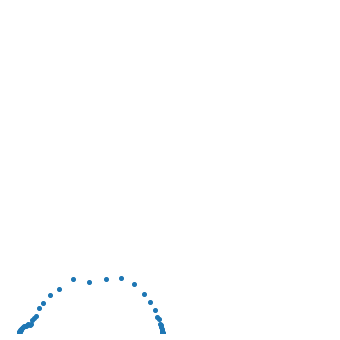

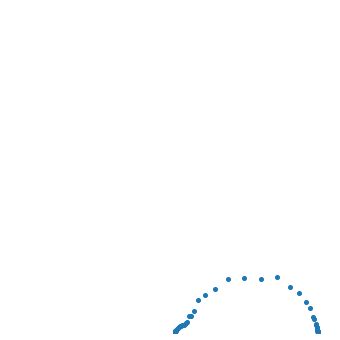

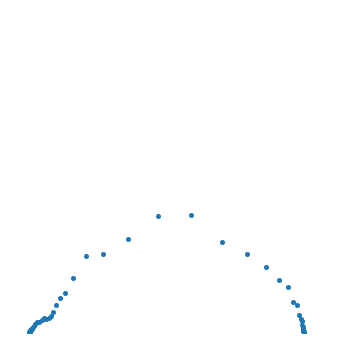

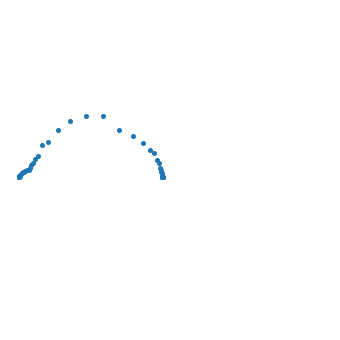

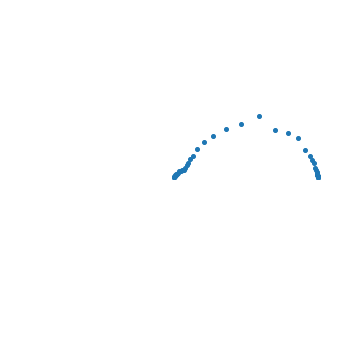

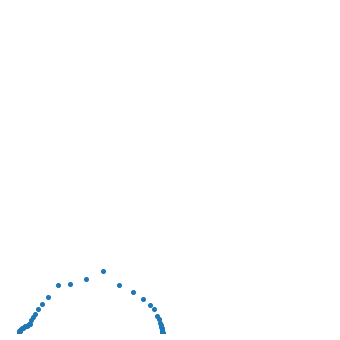

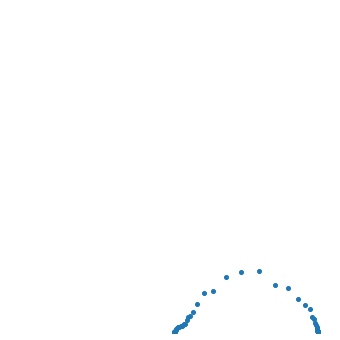

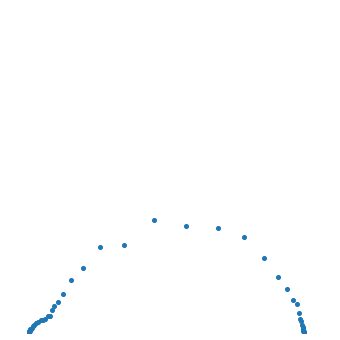

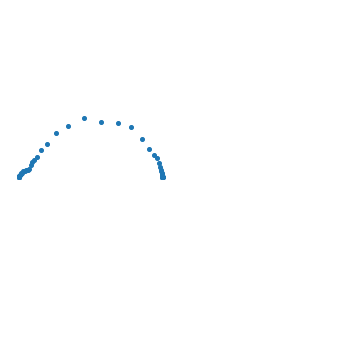

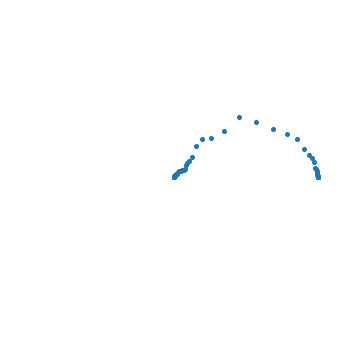

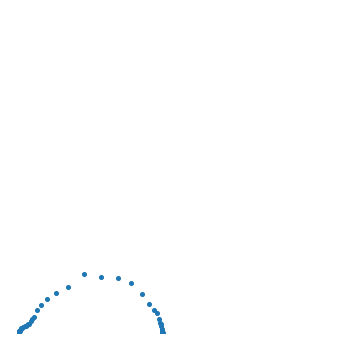

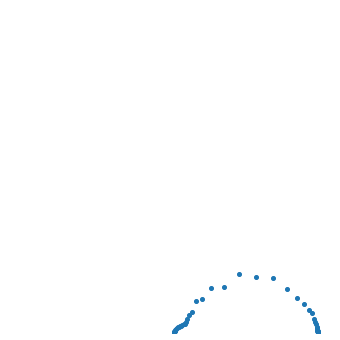

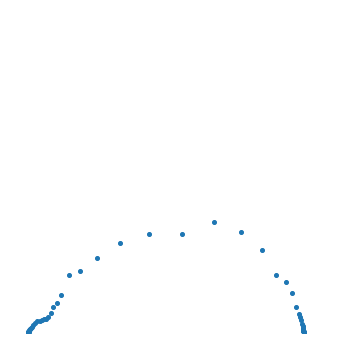

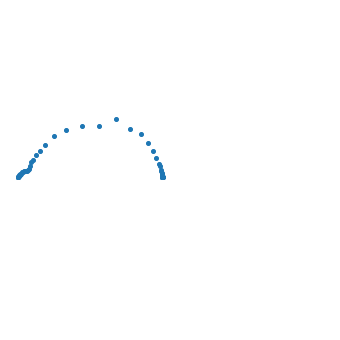

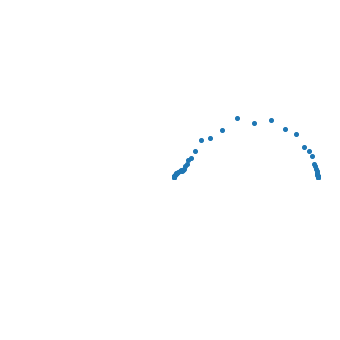

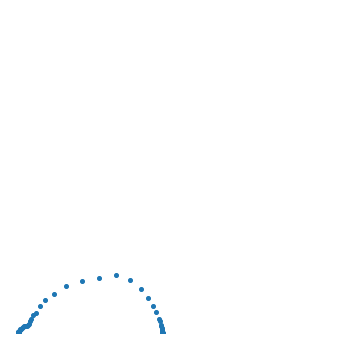

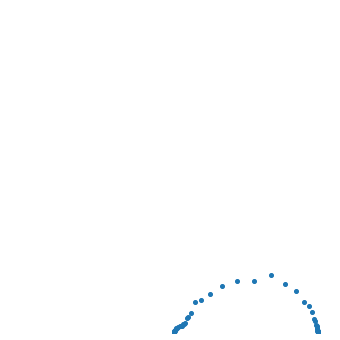

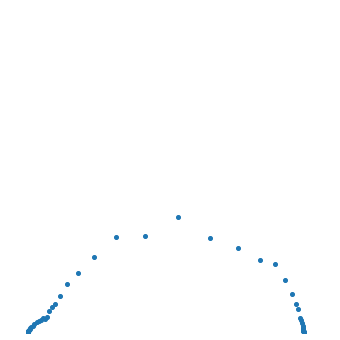

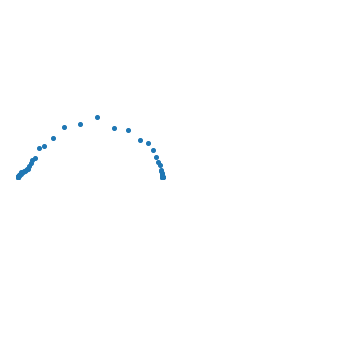

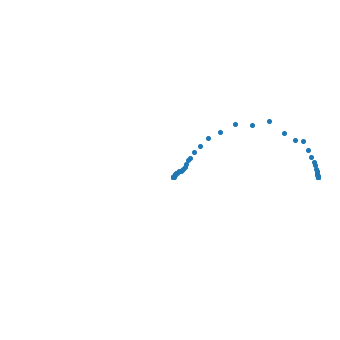

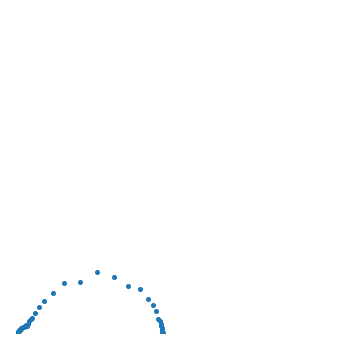

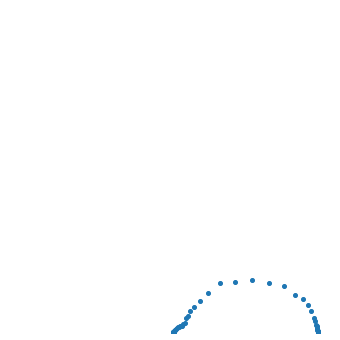

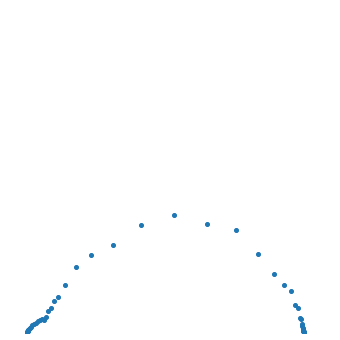

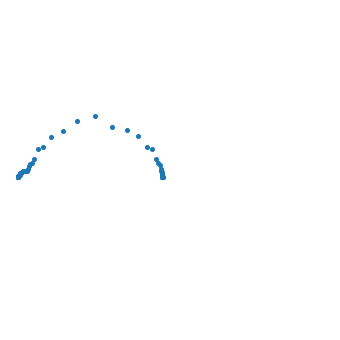

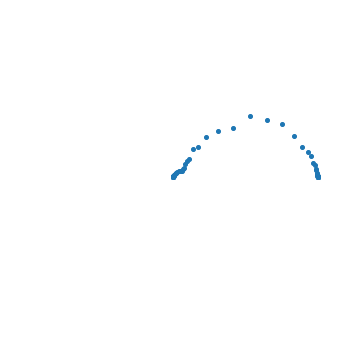

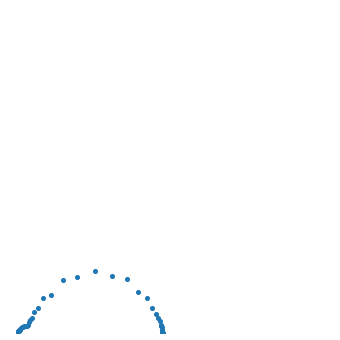

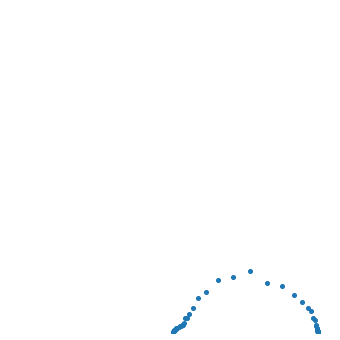

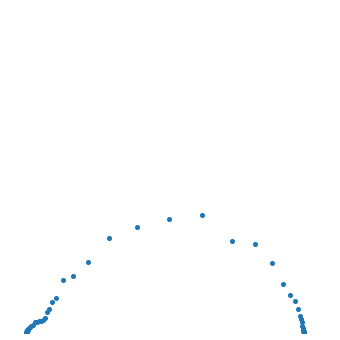

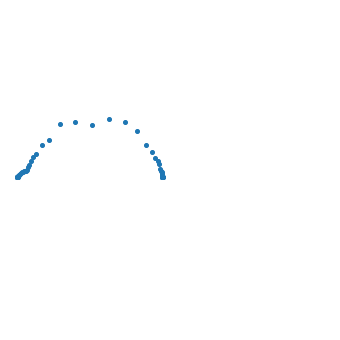

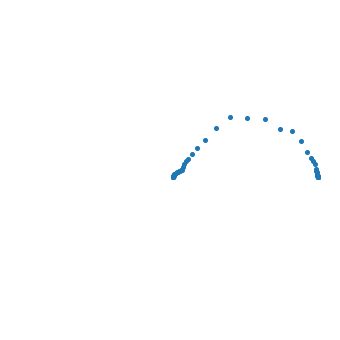

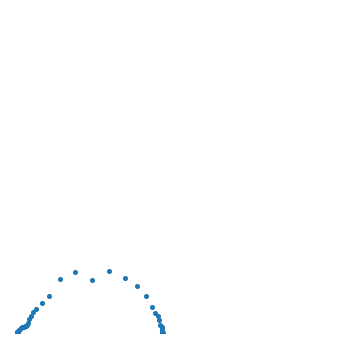

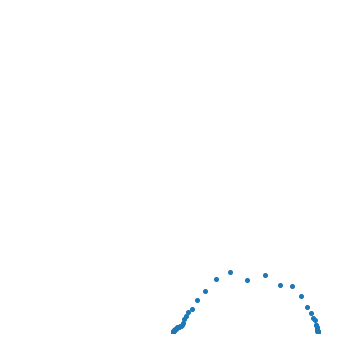

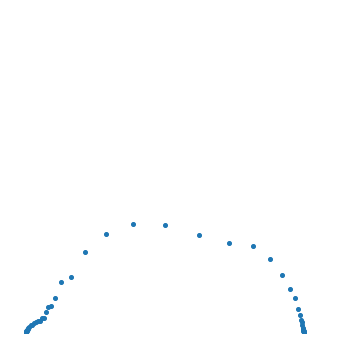

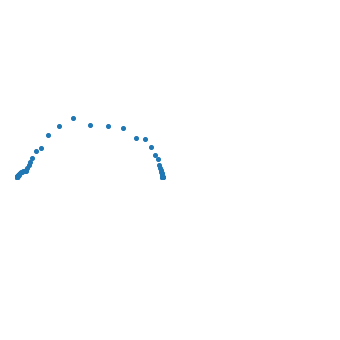

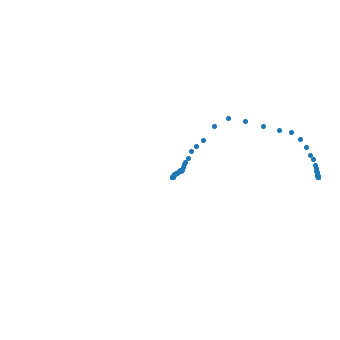

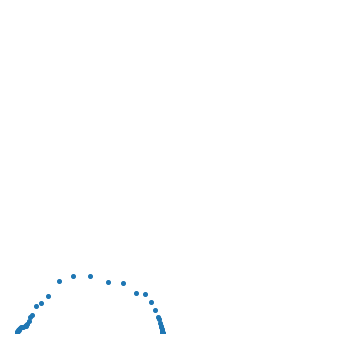

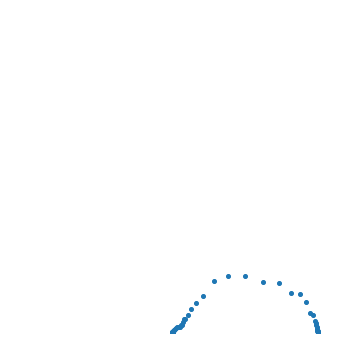

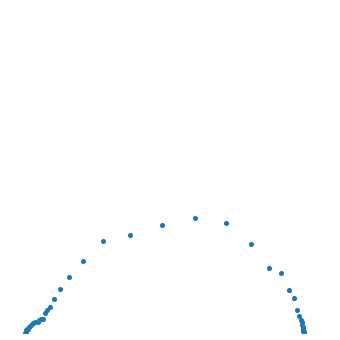

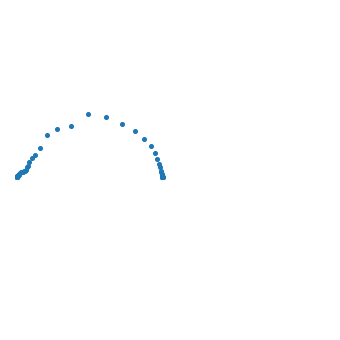

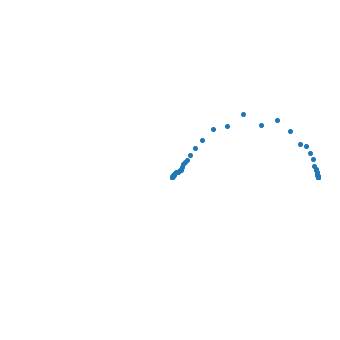

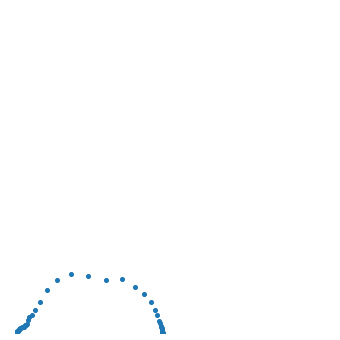

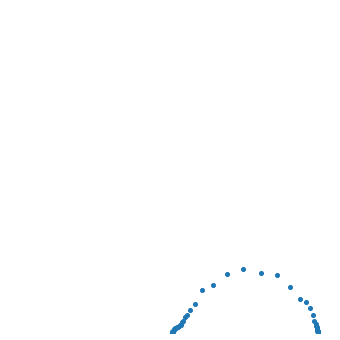

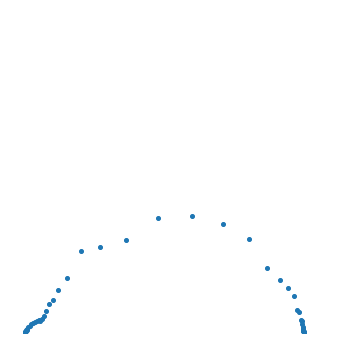

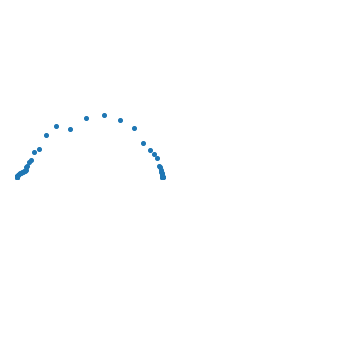

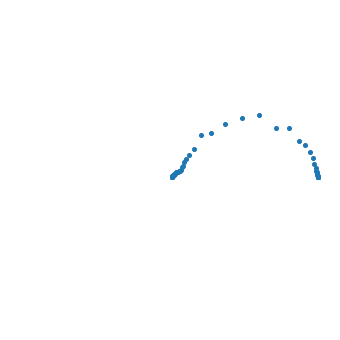

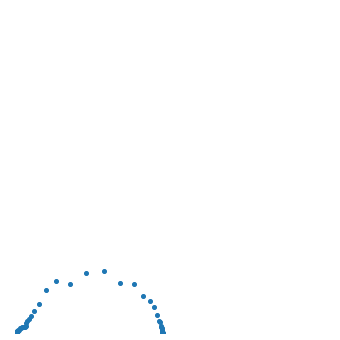

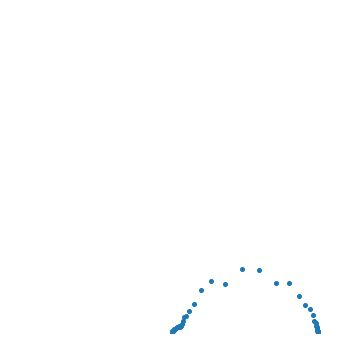

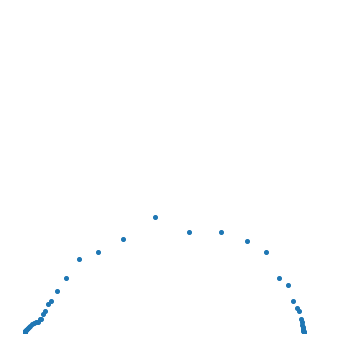

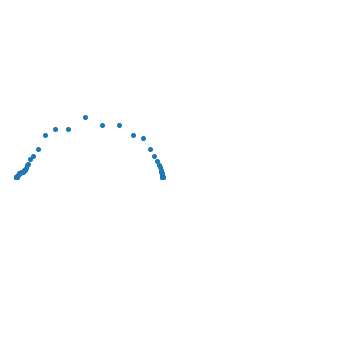

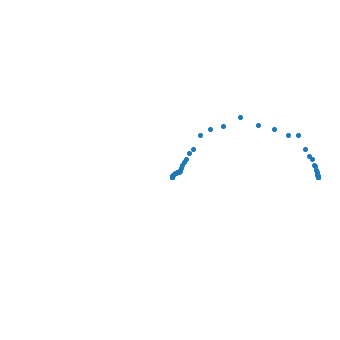

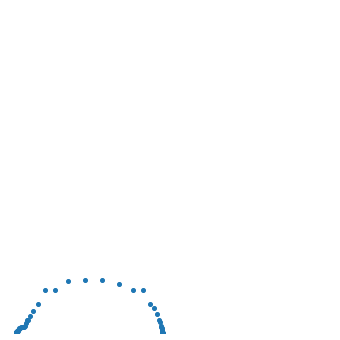

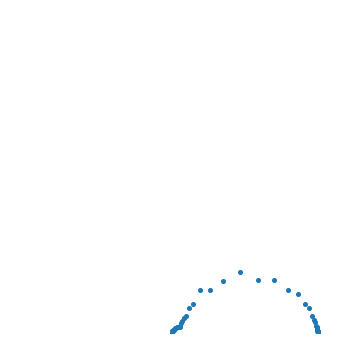

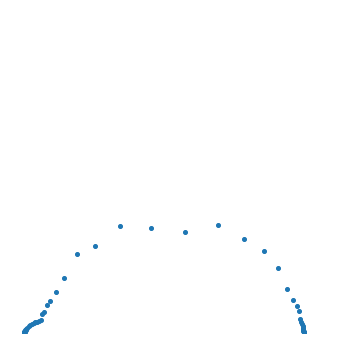

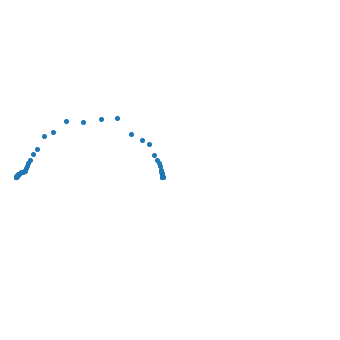

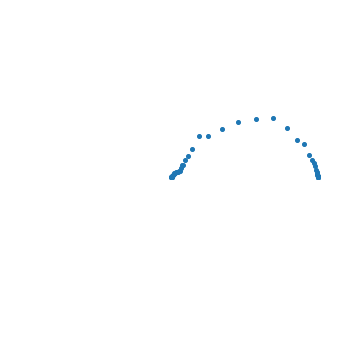

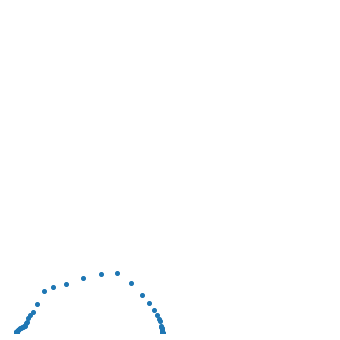

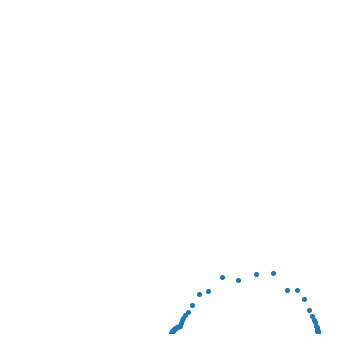

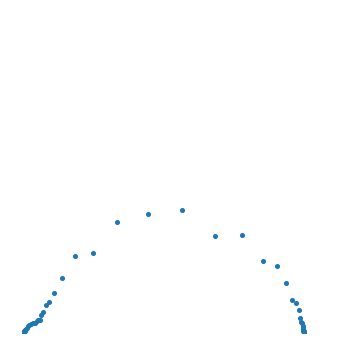

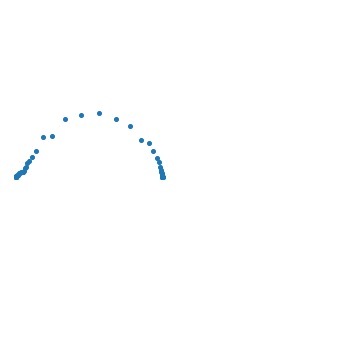

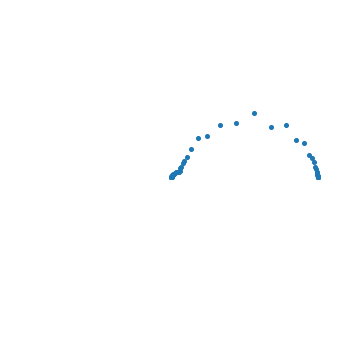

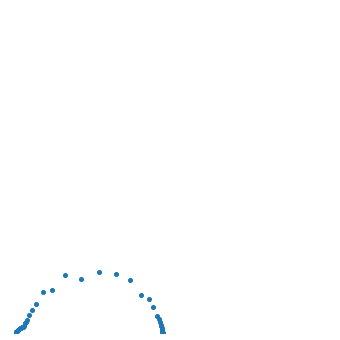

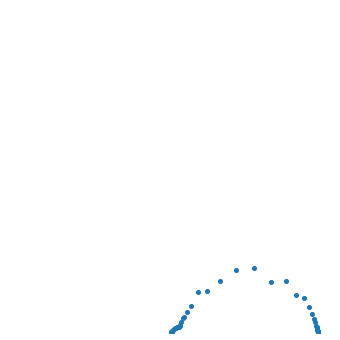

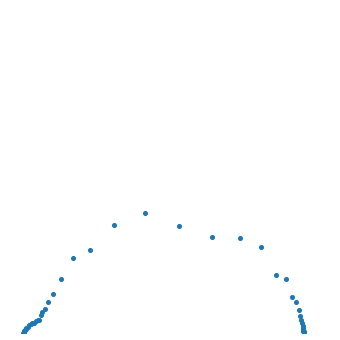

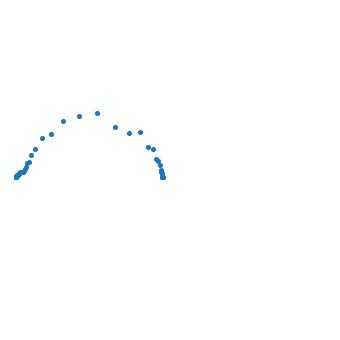

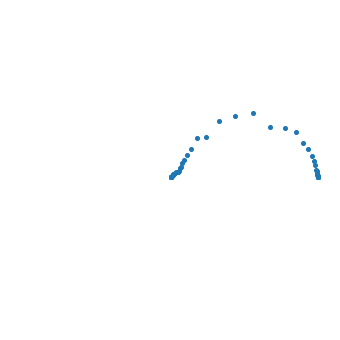

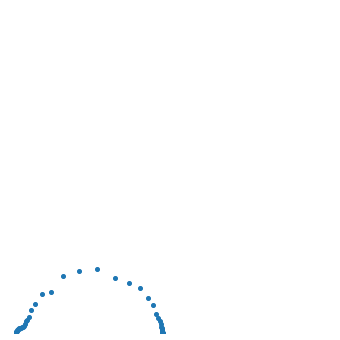

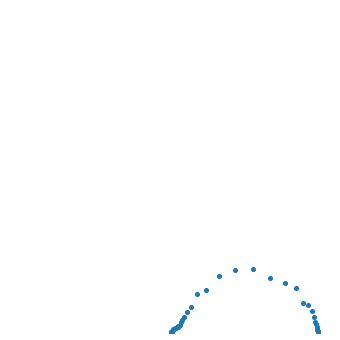

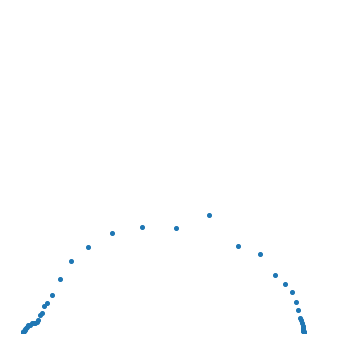

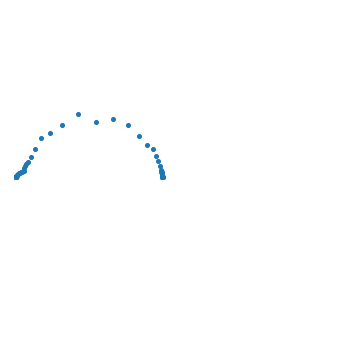

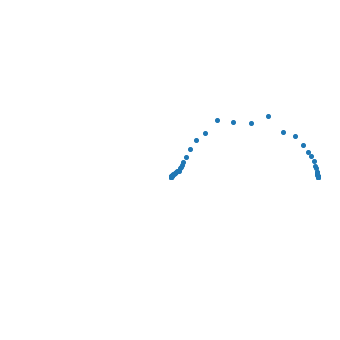

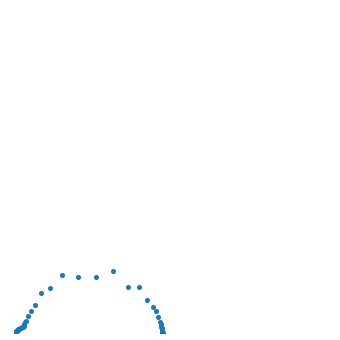

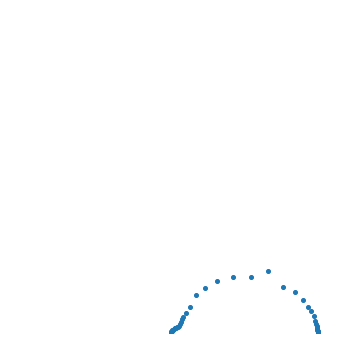

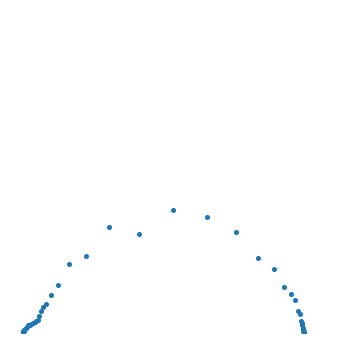

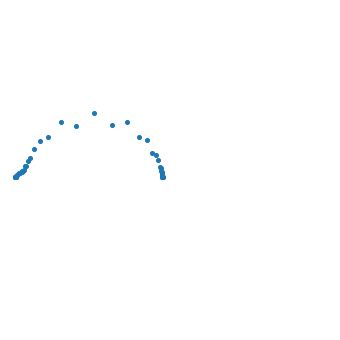

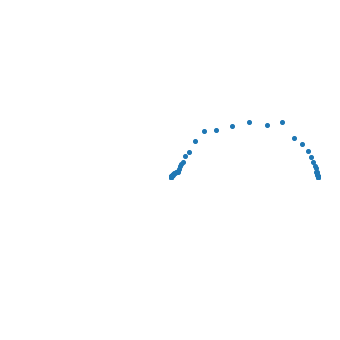

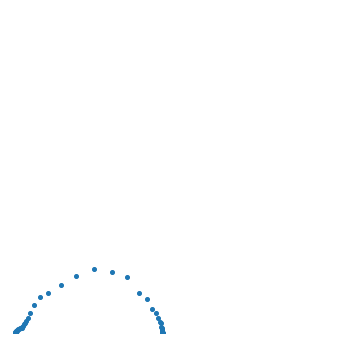

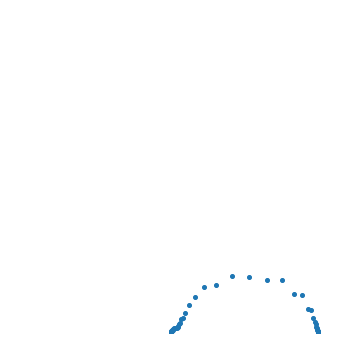

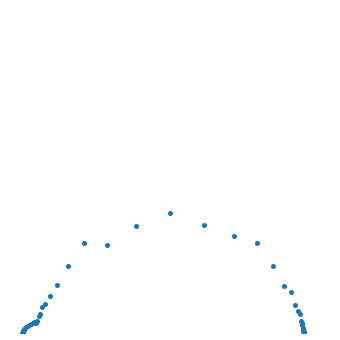

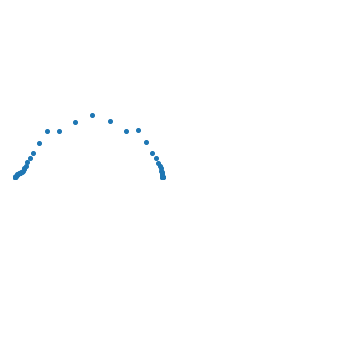

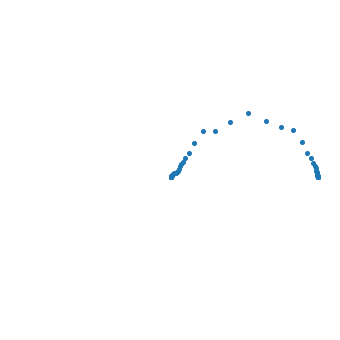

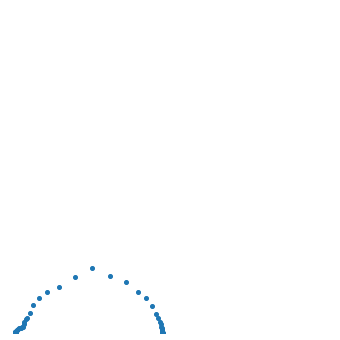

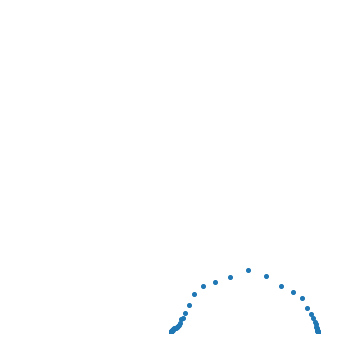

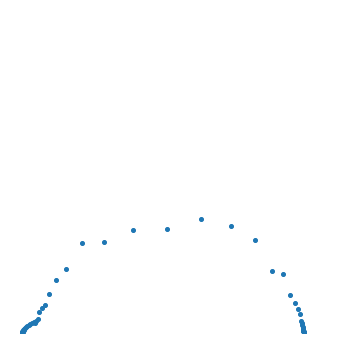

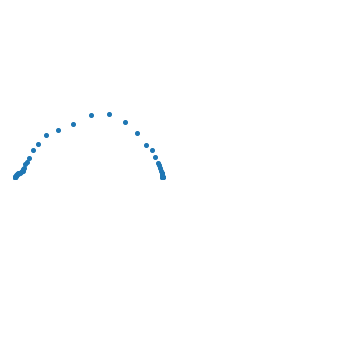

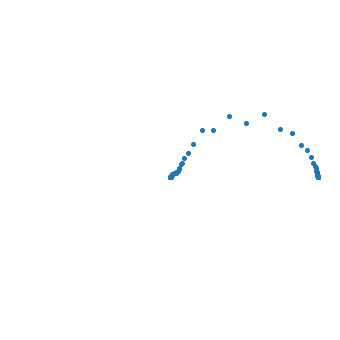

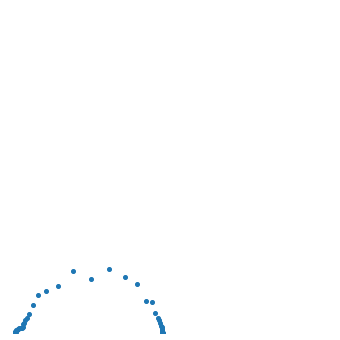

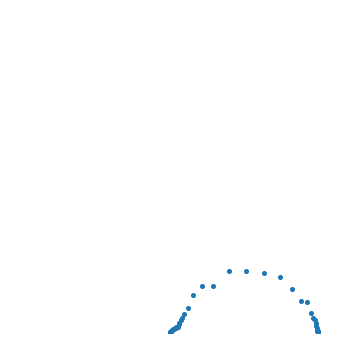

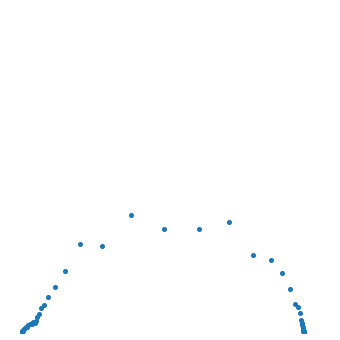

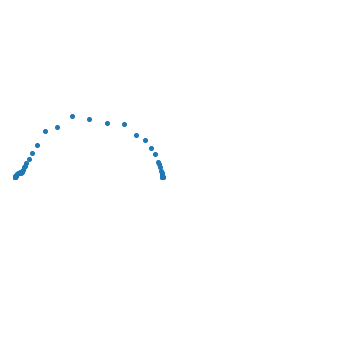

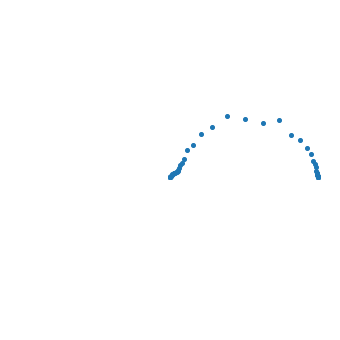

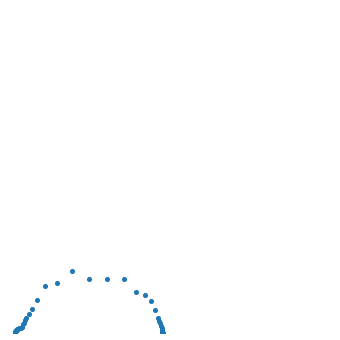

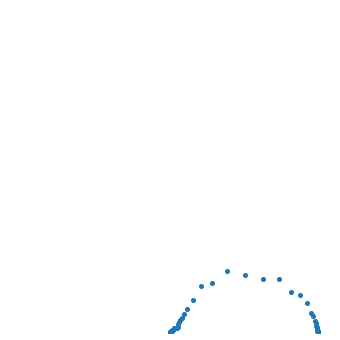

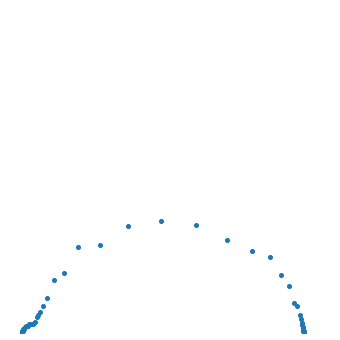

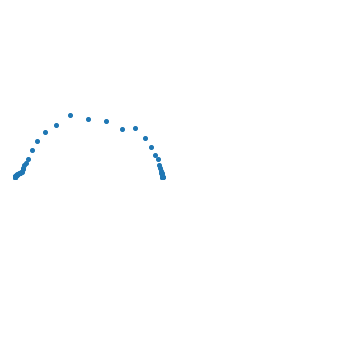

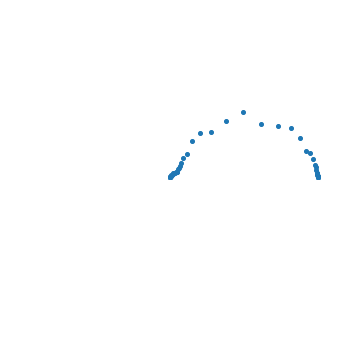

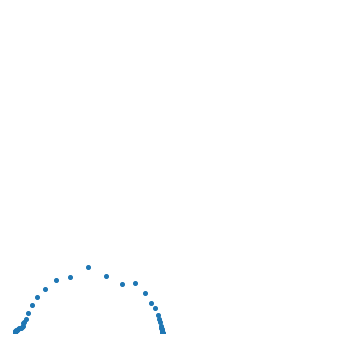

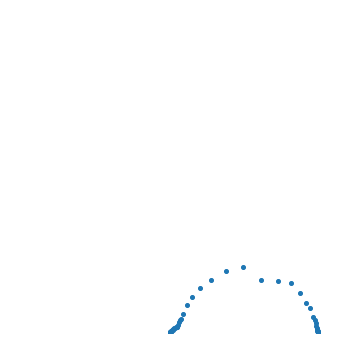

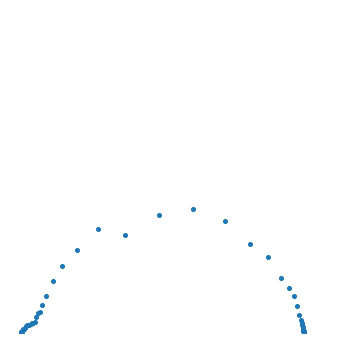

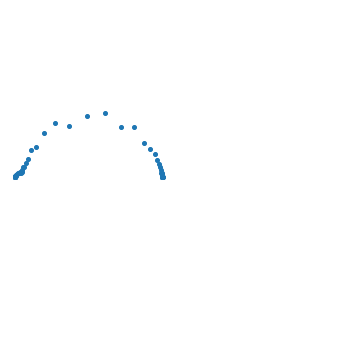

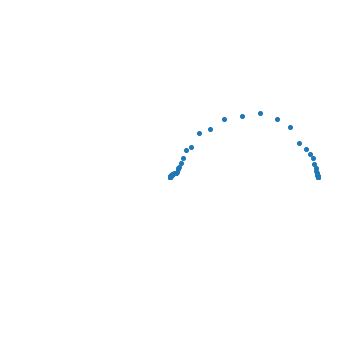

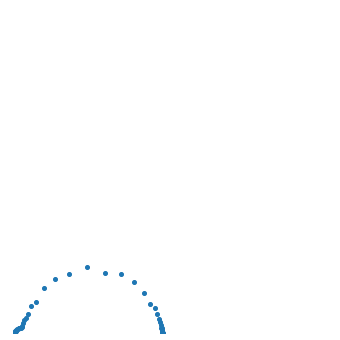

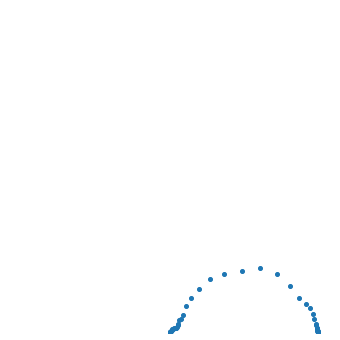

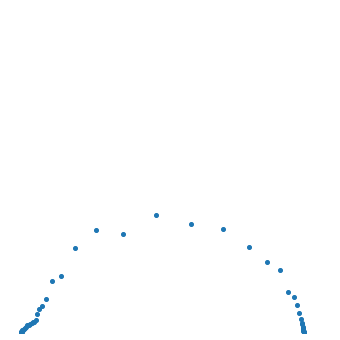

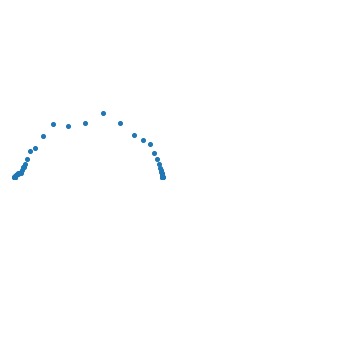

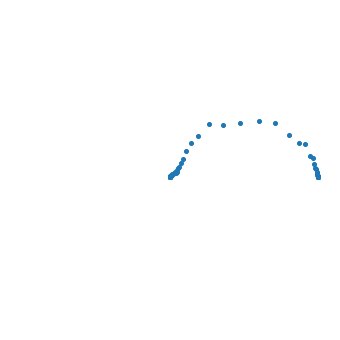

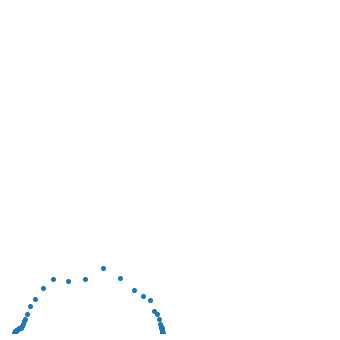

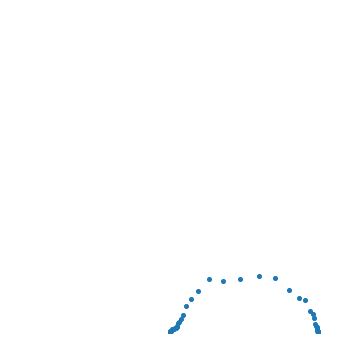

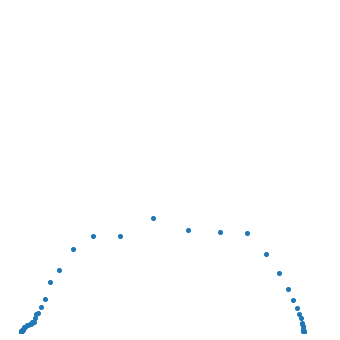

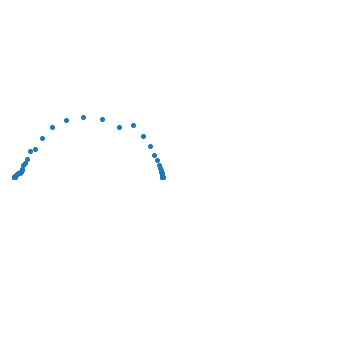

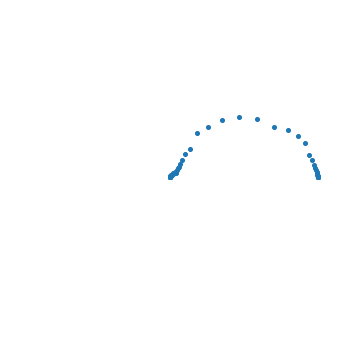

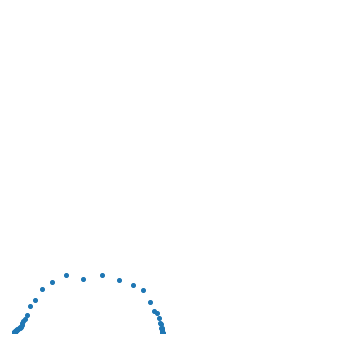

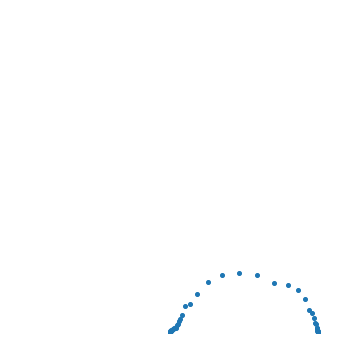

In [23]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q1= 25E-6 #F
alpha1= 0.8
Q2= 2*Q1 #F
alpha2= 0.9
R2= 150   # ohm
R1= 10   # ohm
resistance= np.linspace(1,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRQRQ_file_writer(f_start, f_stop, decades, Rs,R1, Q1,alpha1, R2, Q2,alpha2, alteration='noise', noisescale=0.1, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

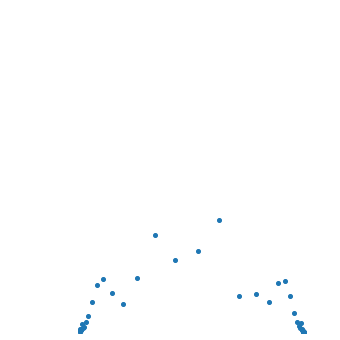

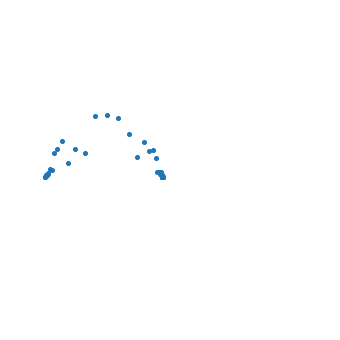

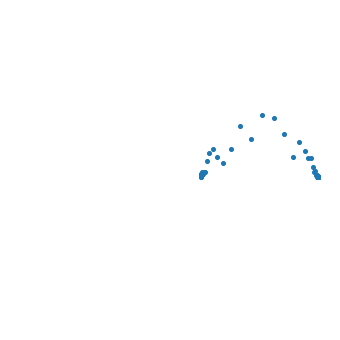

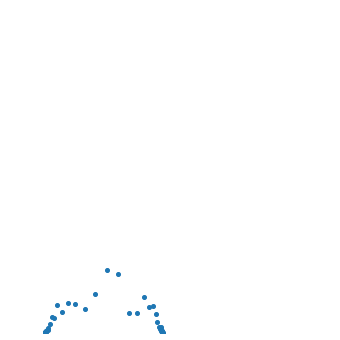

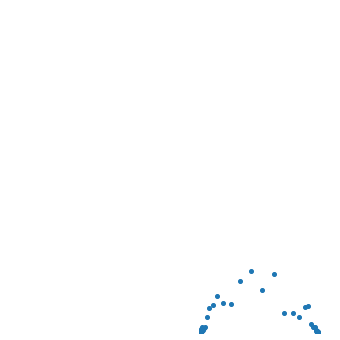

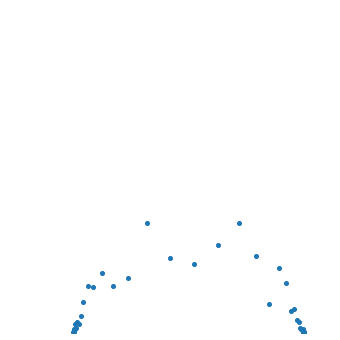

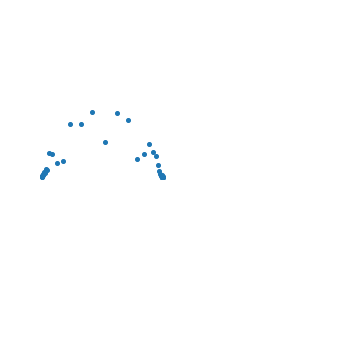

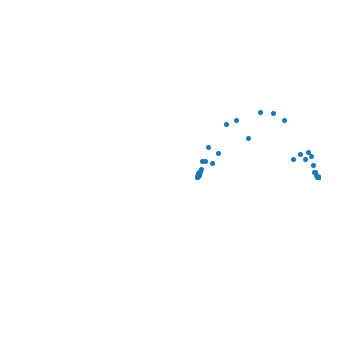

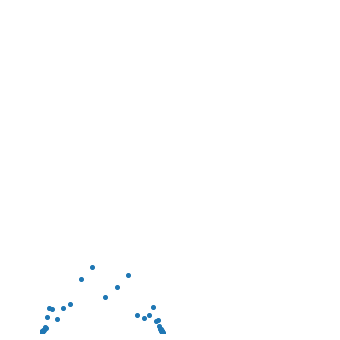

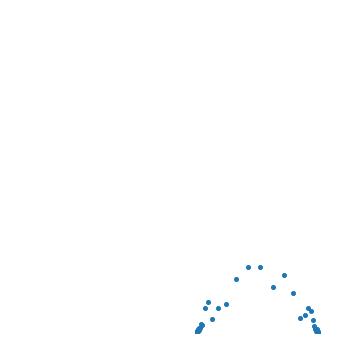

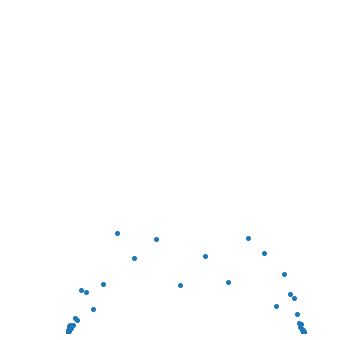

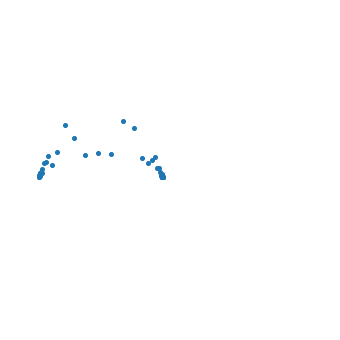

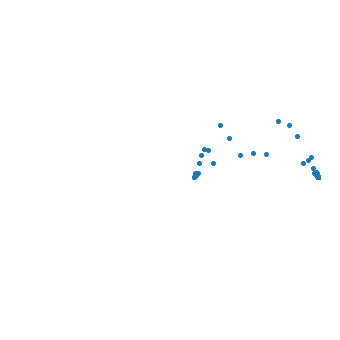

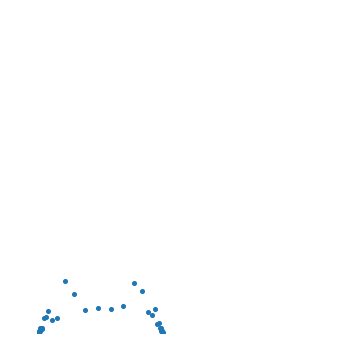

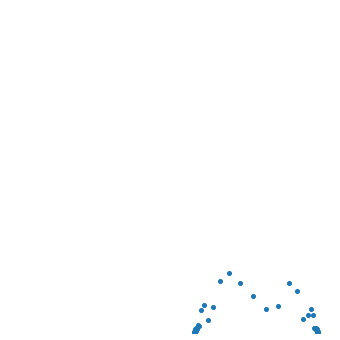

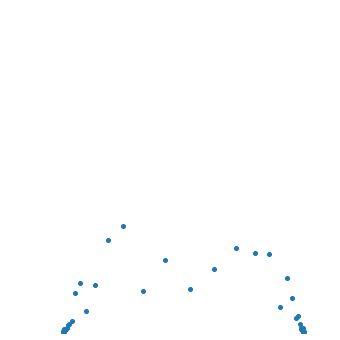

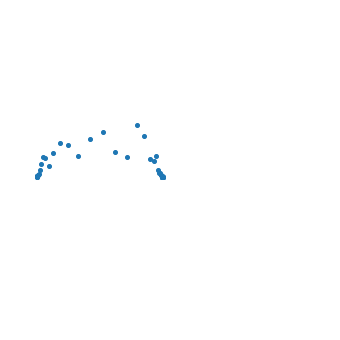

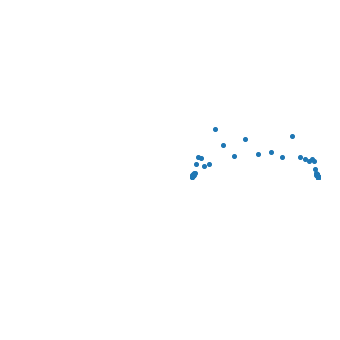

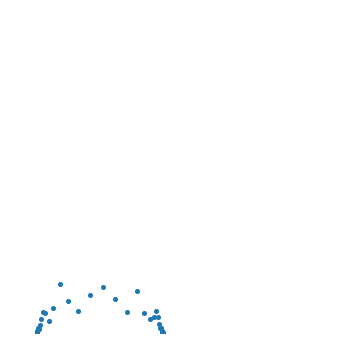

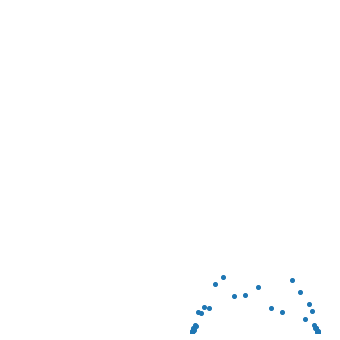

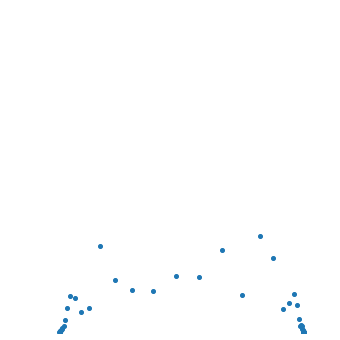

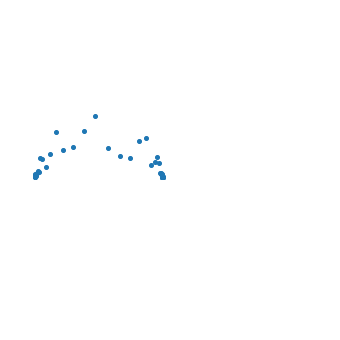

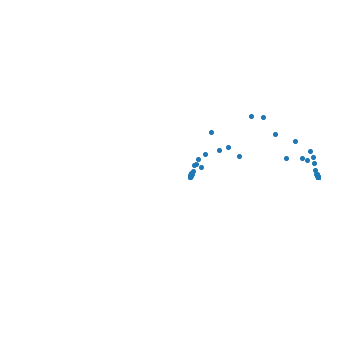

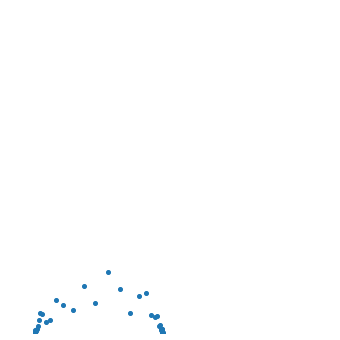

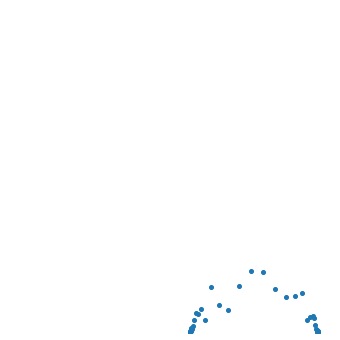

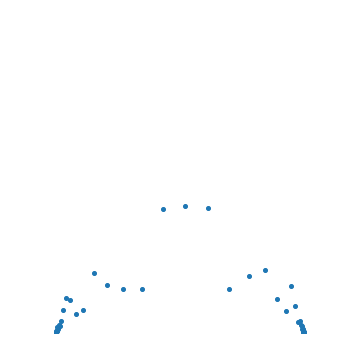

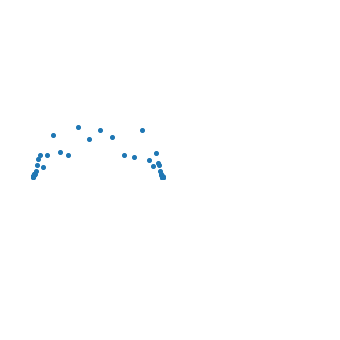

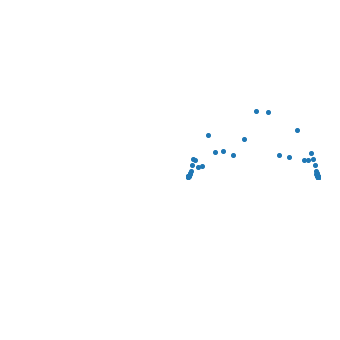

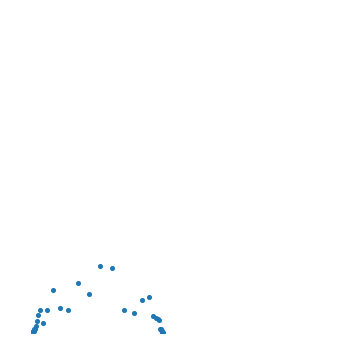

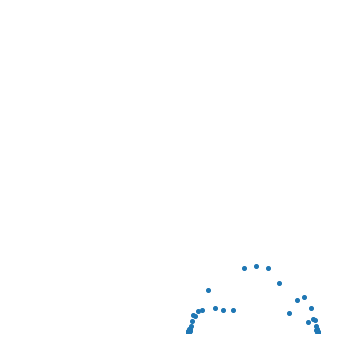

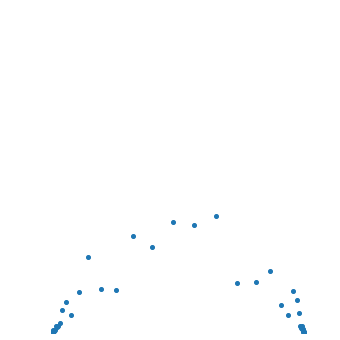

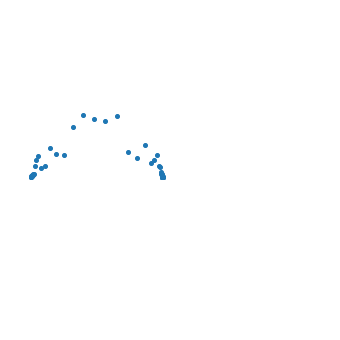

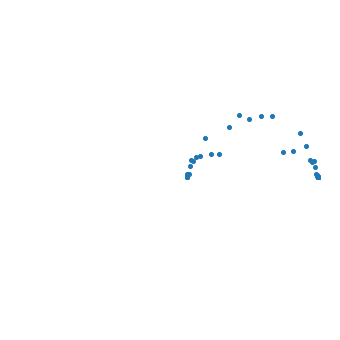

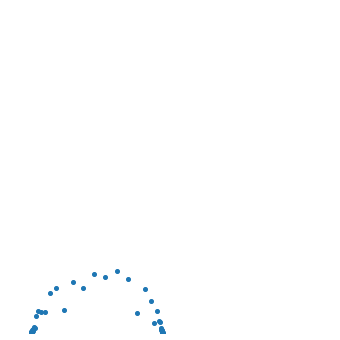

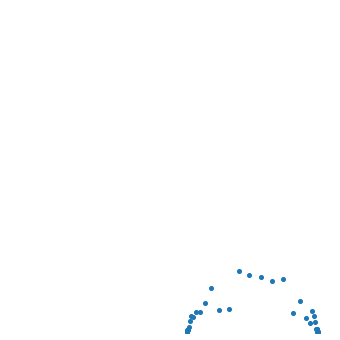

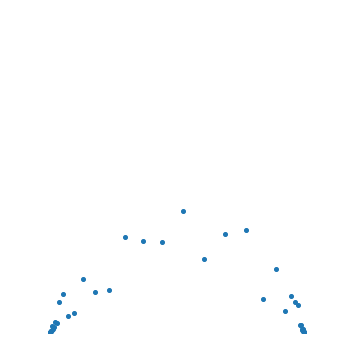

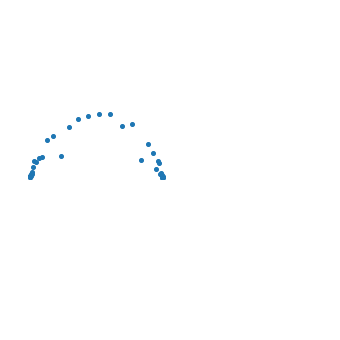

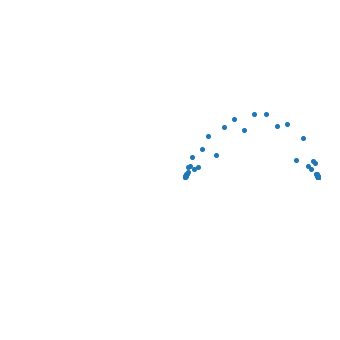

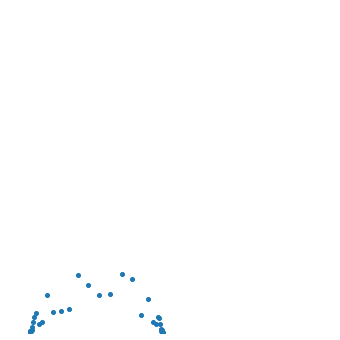

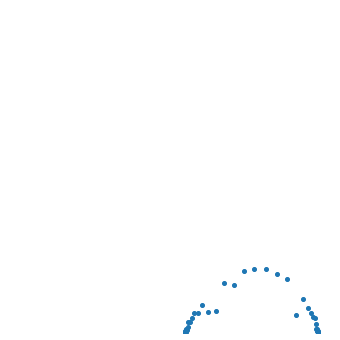

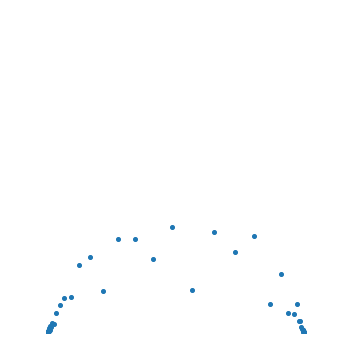

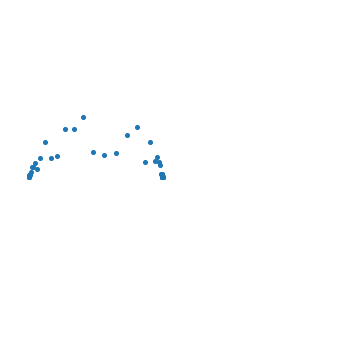

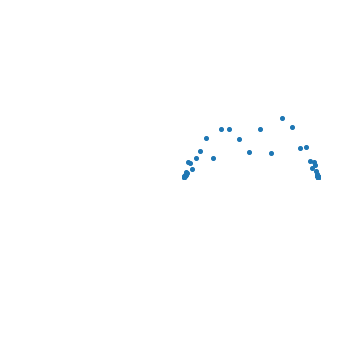

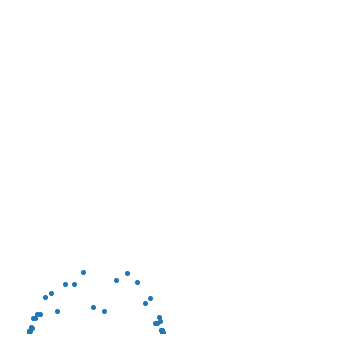

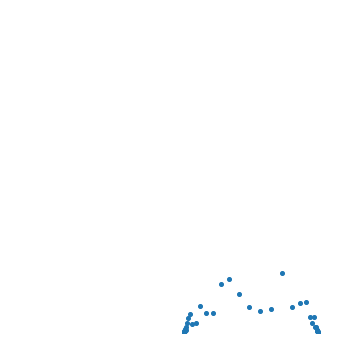

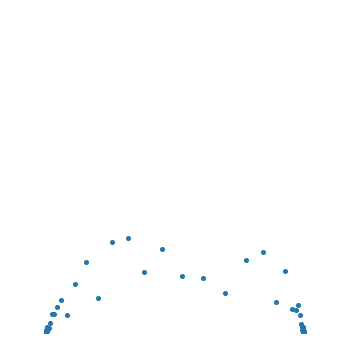

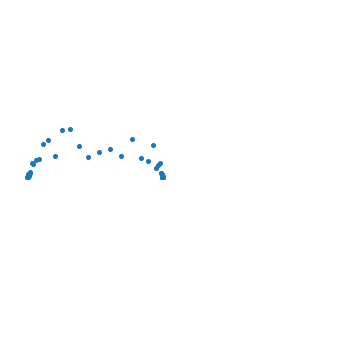

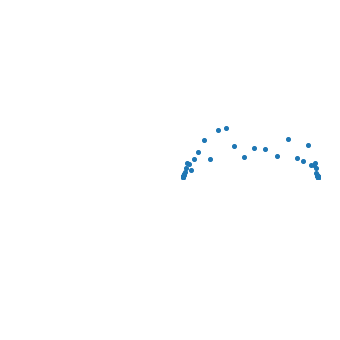

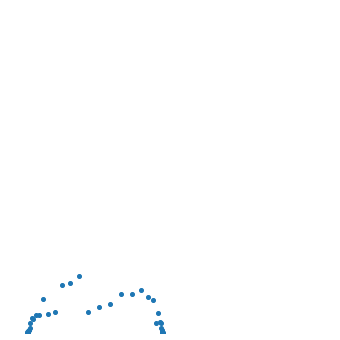

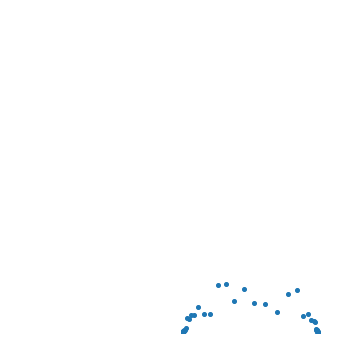

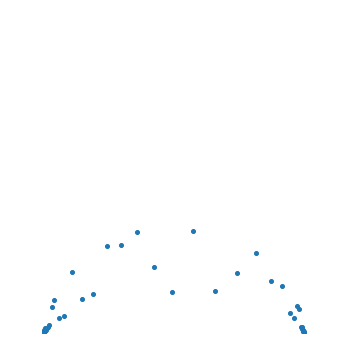

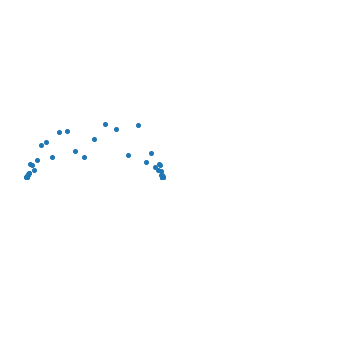

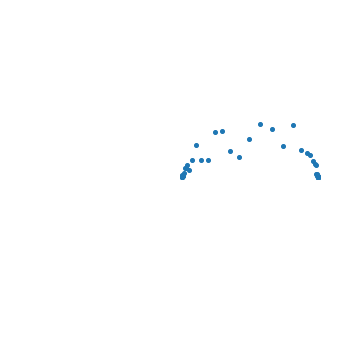

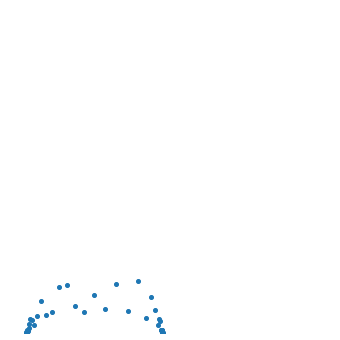

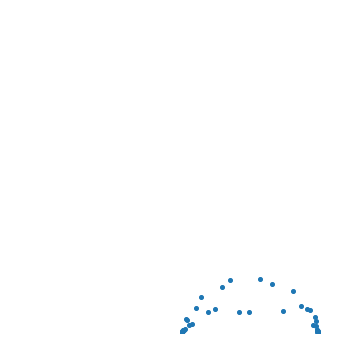

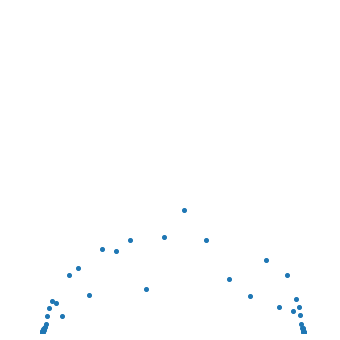

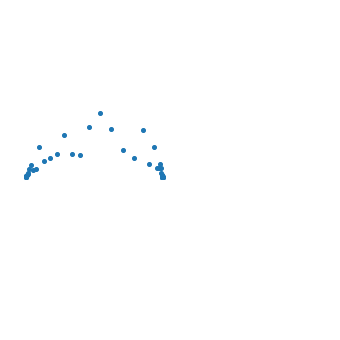

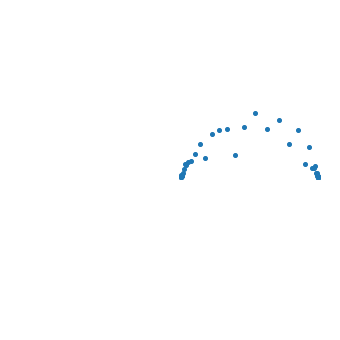

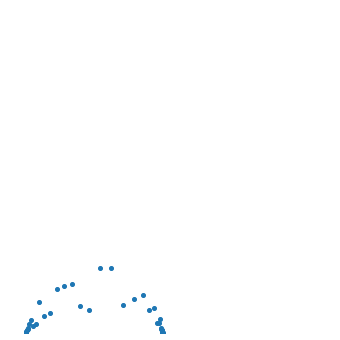

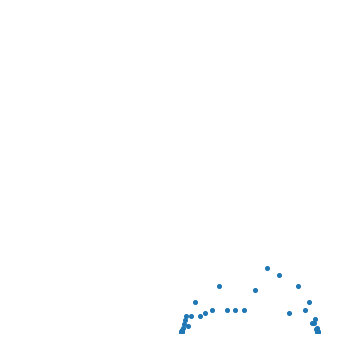

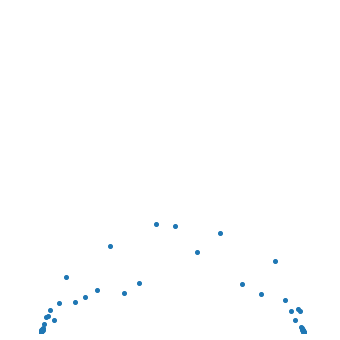

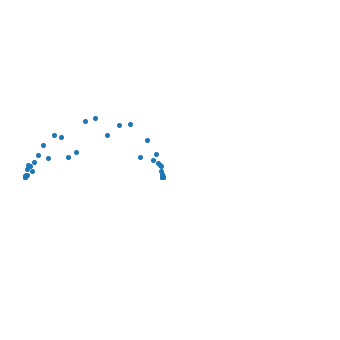

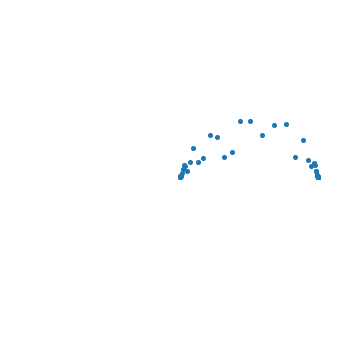

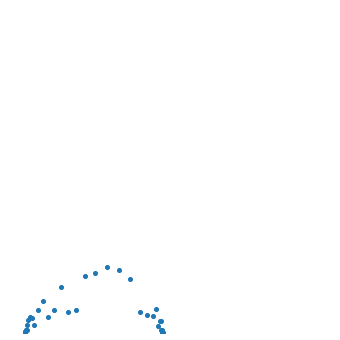

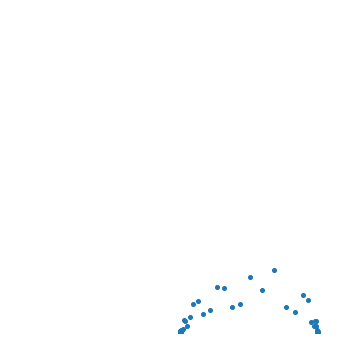

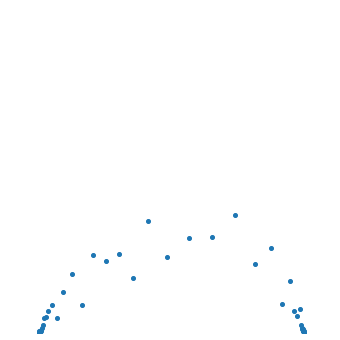

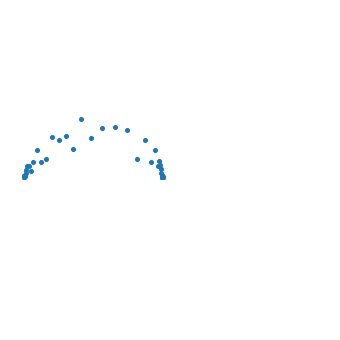

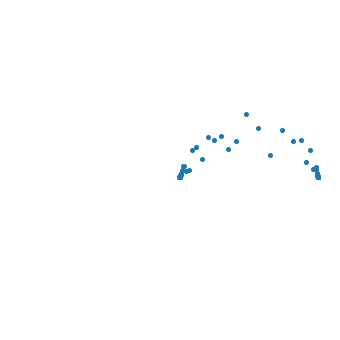

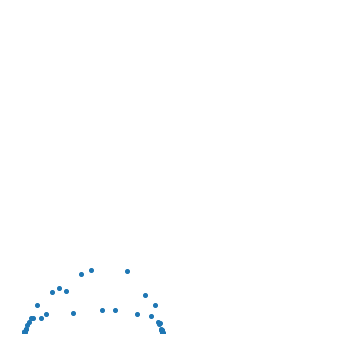

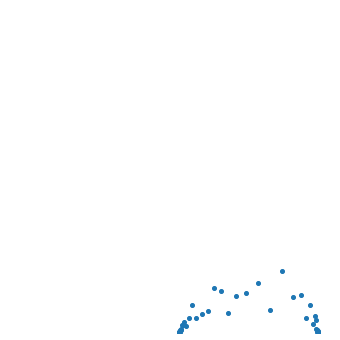

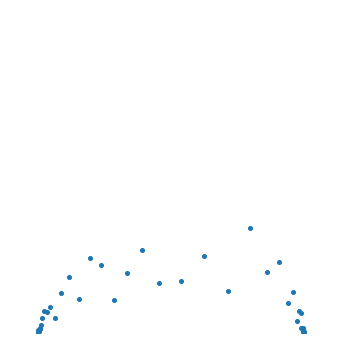

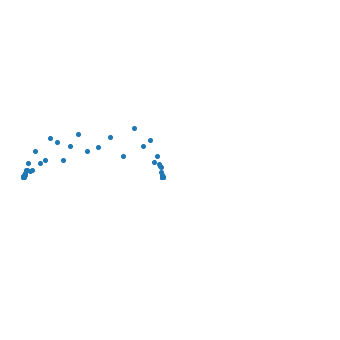

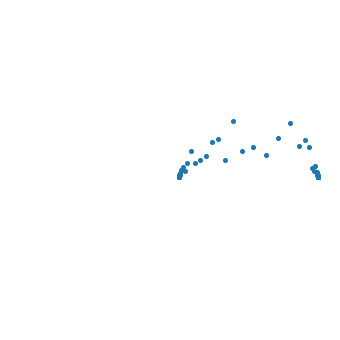

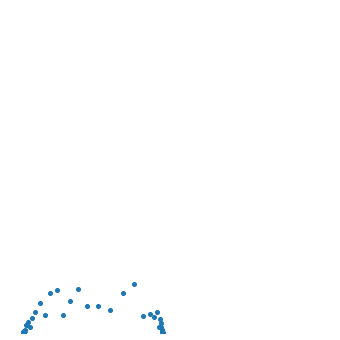

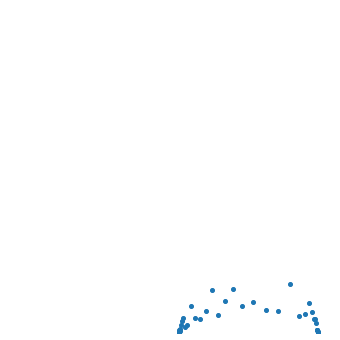

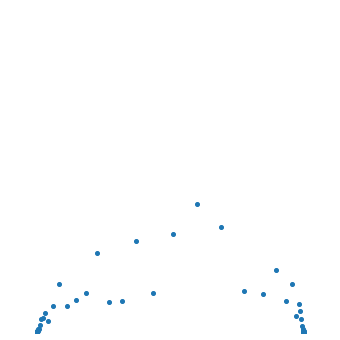

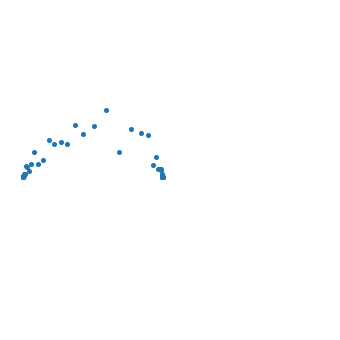

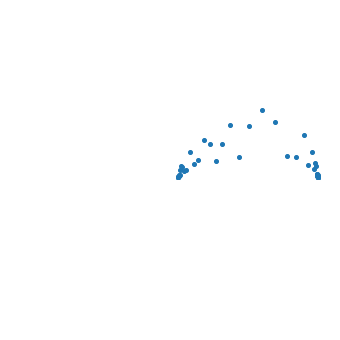

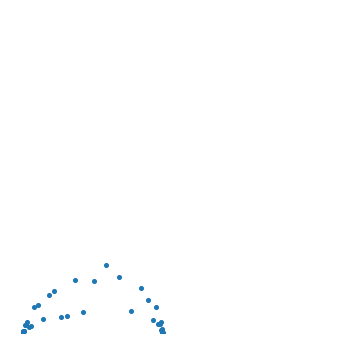

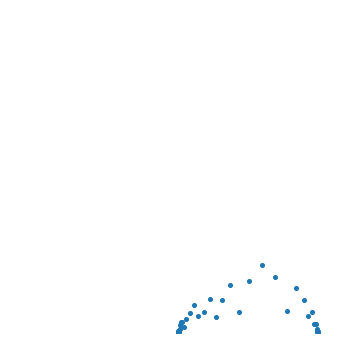

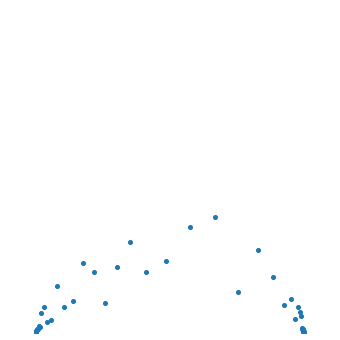

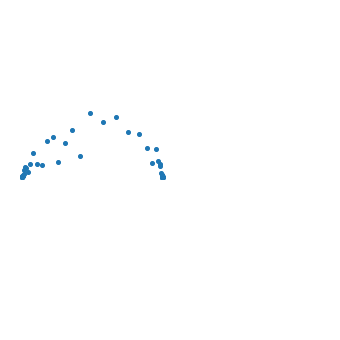

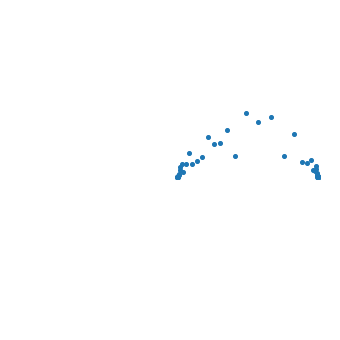

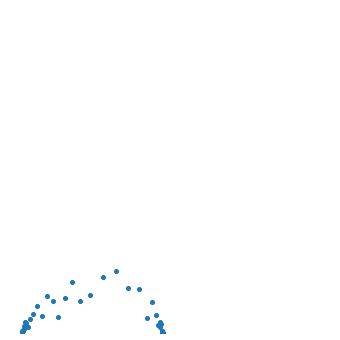

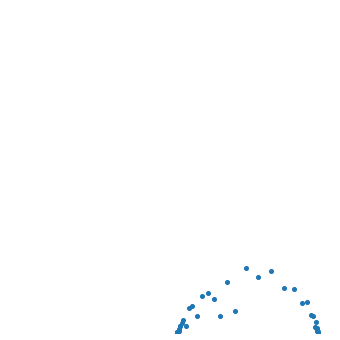

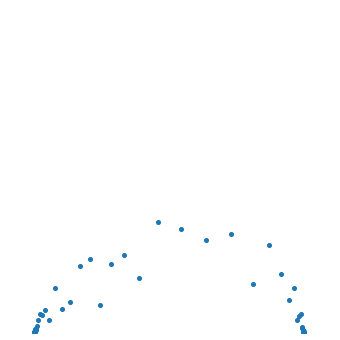

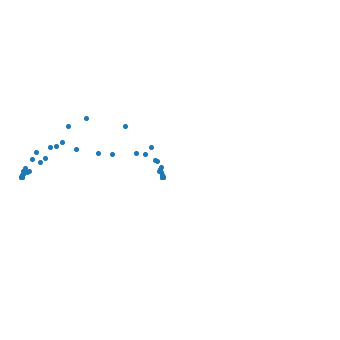

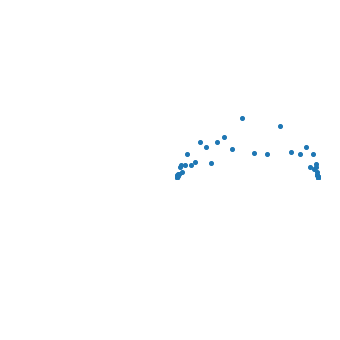

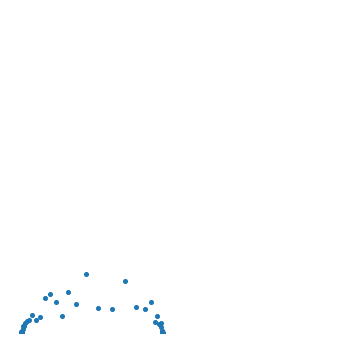

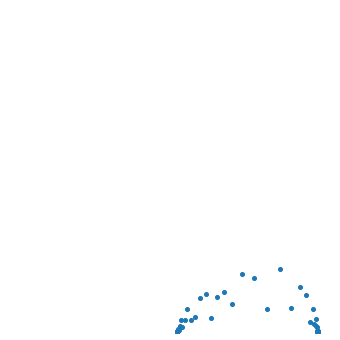

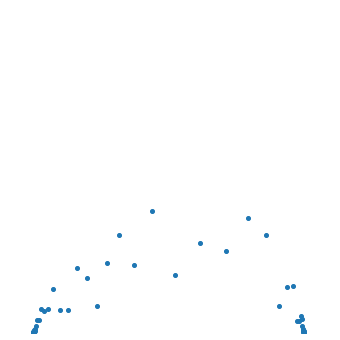

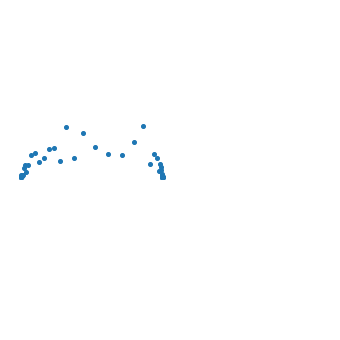

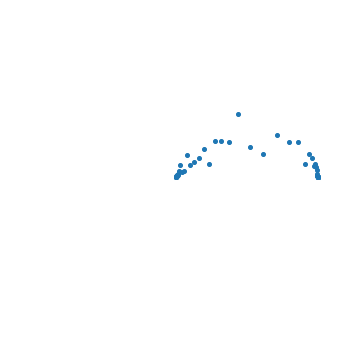

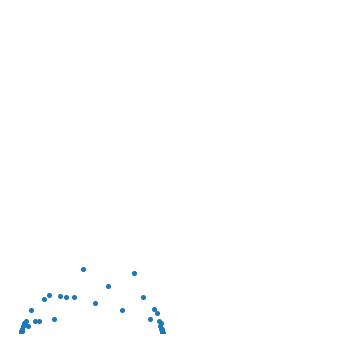

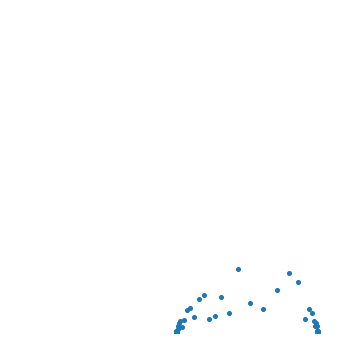

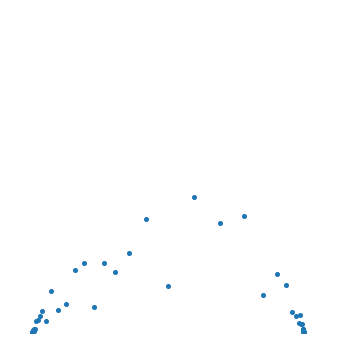

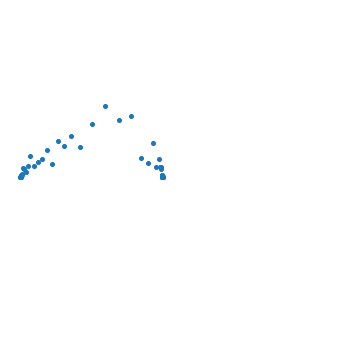

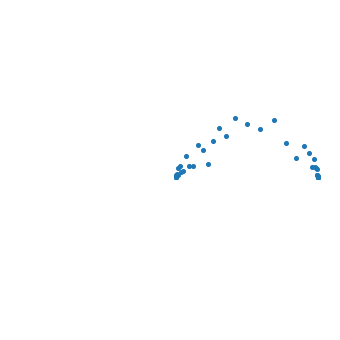

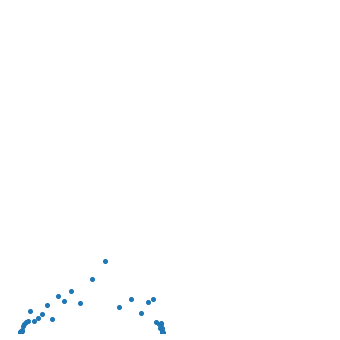

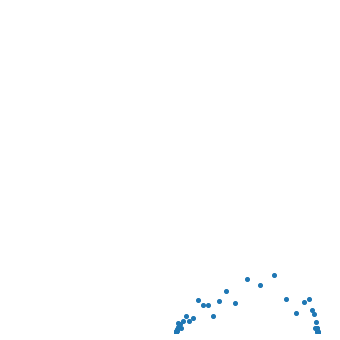

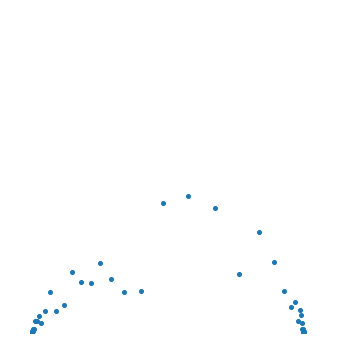

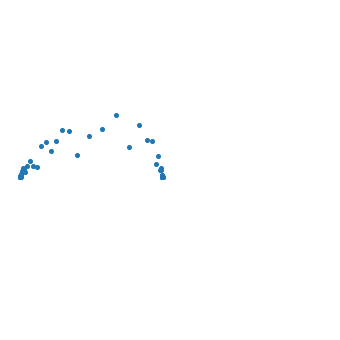

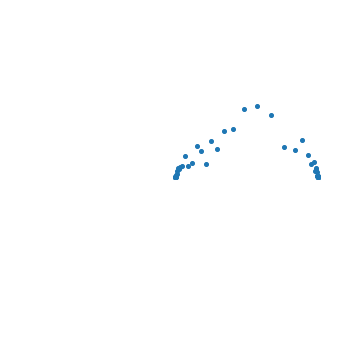

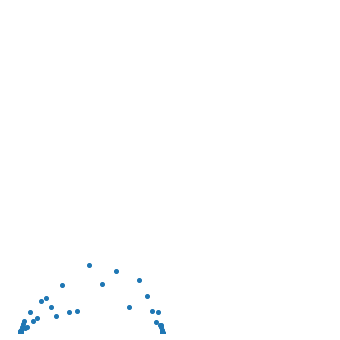

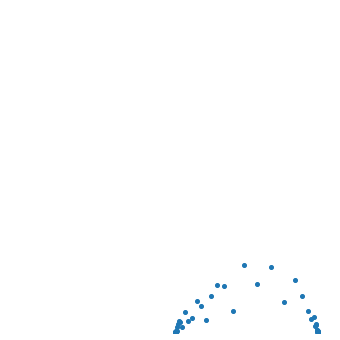

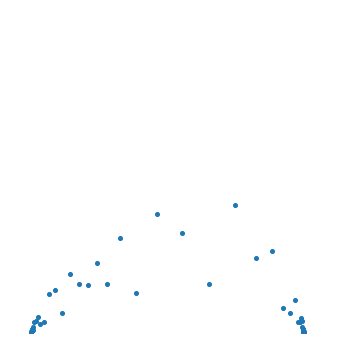

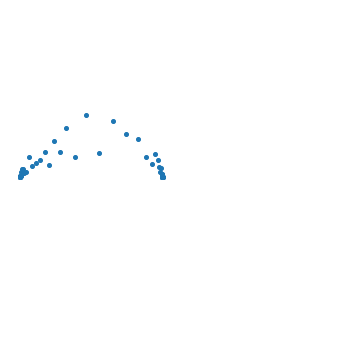

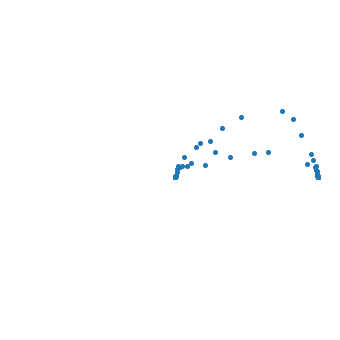

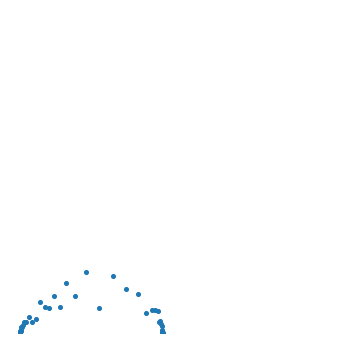

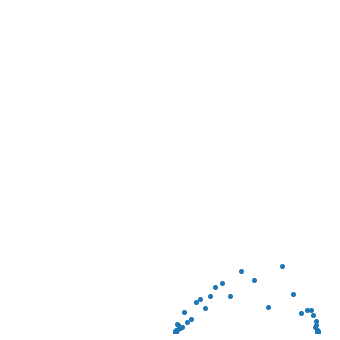

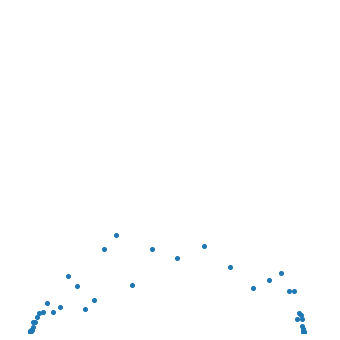

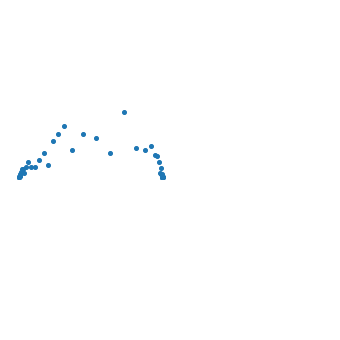

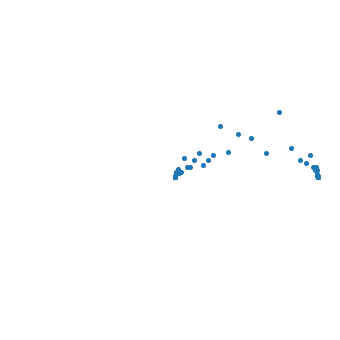

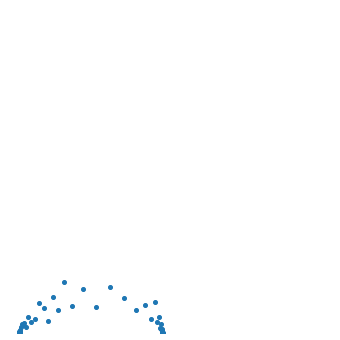

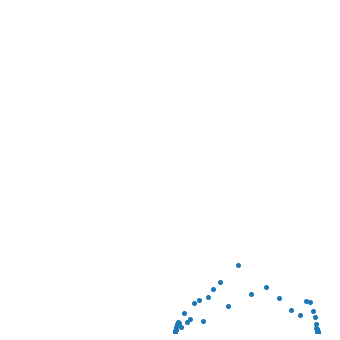

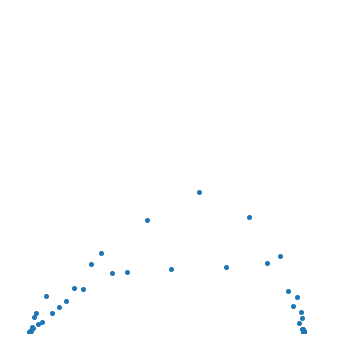

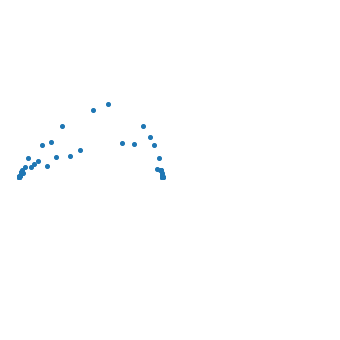

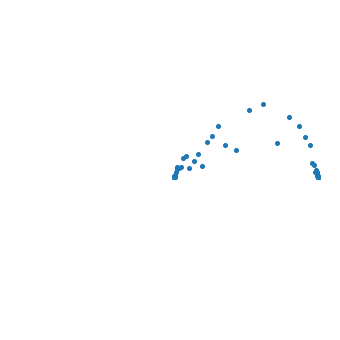

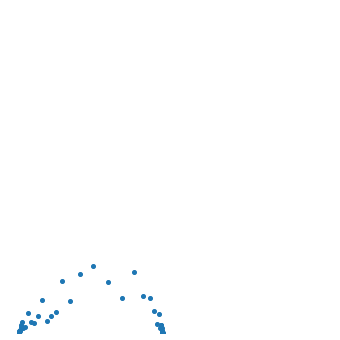

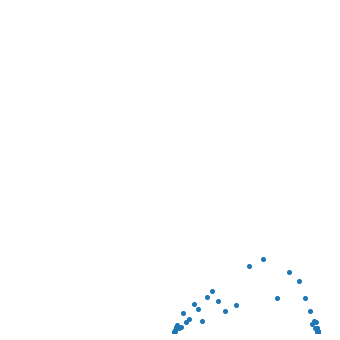

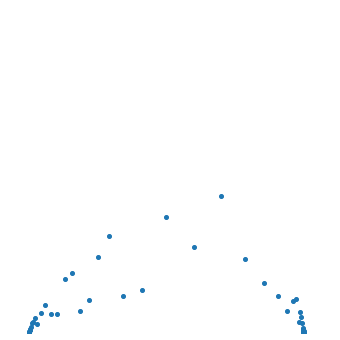

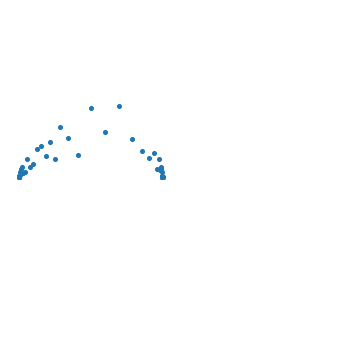

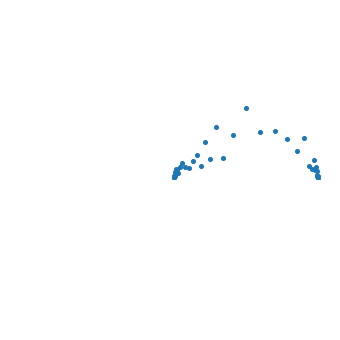

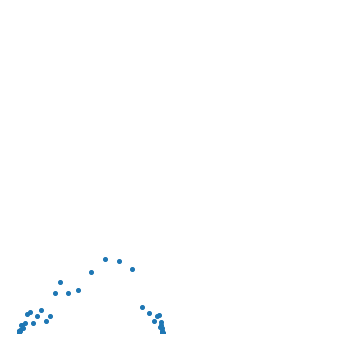

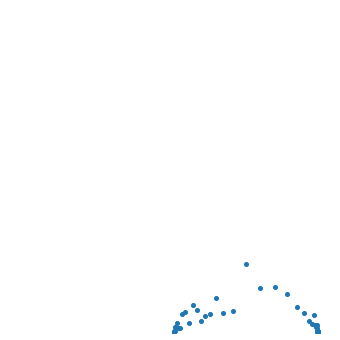

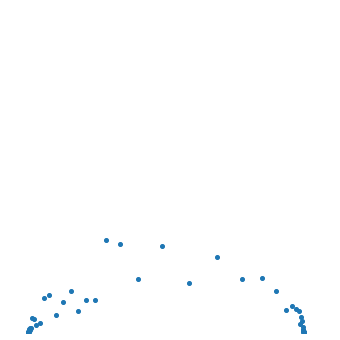

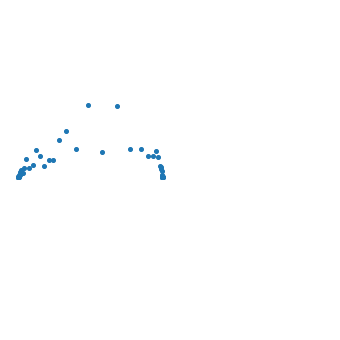

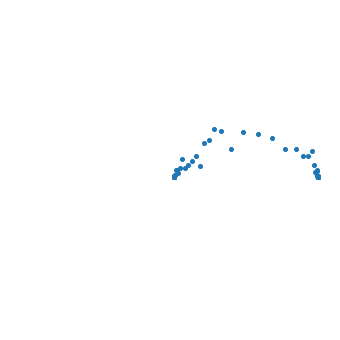

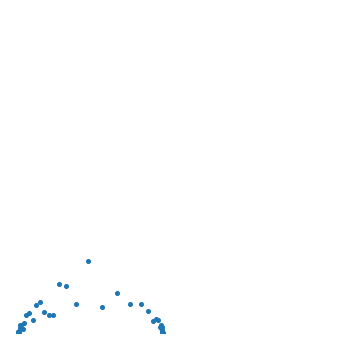

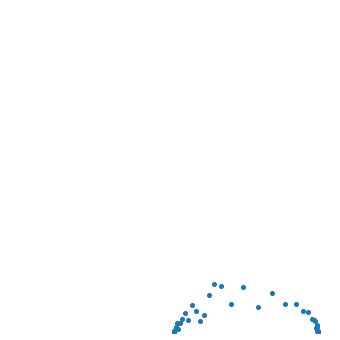

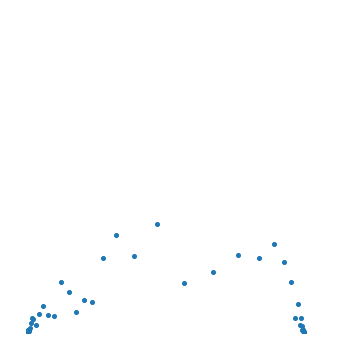

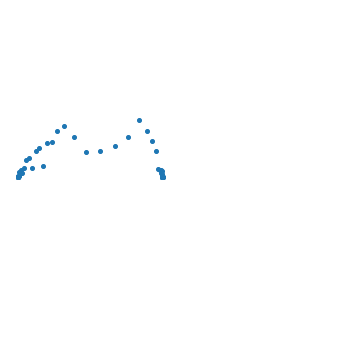

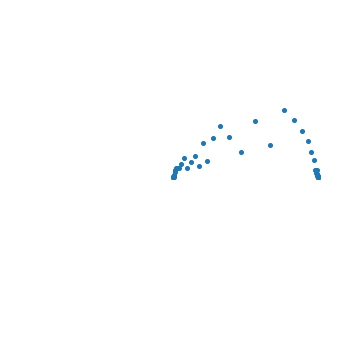

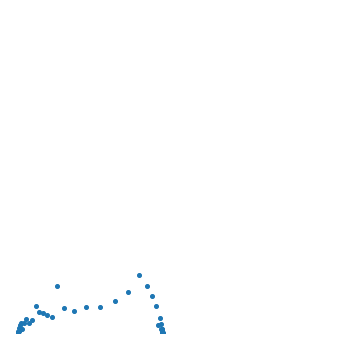

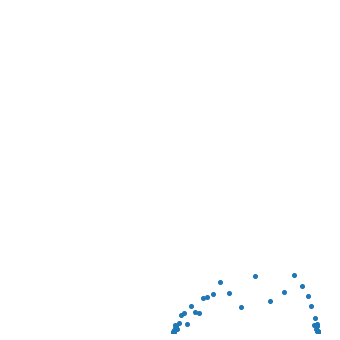

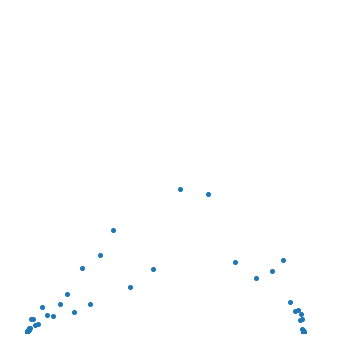

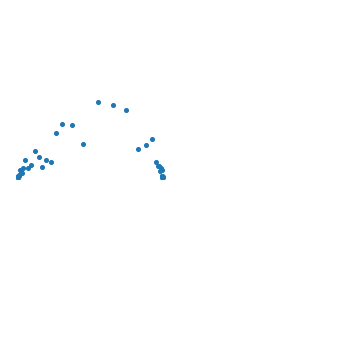

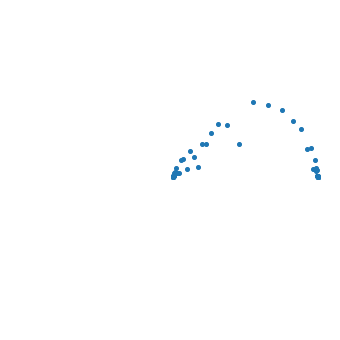

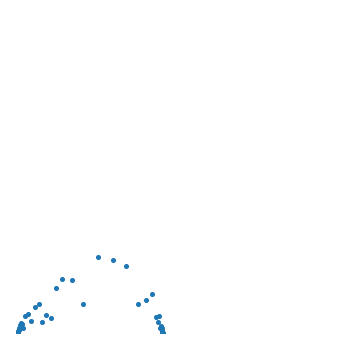

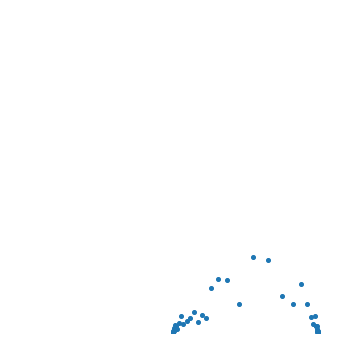

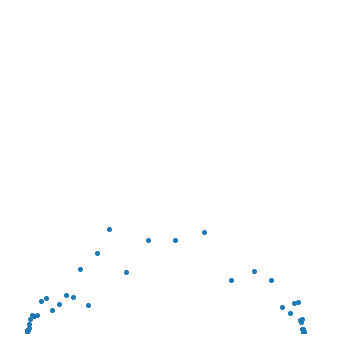

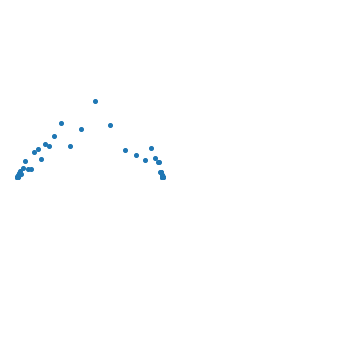

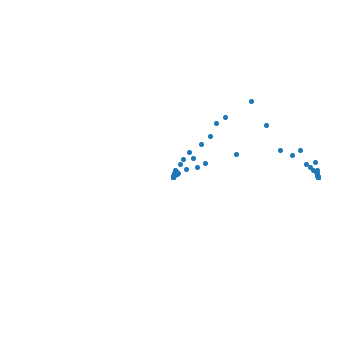

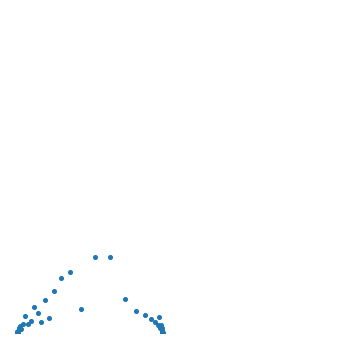

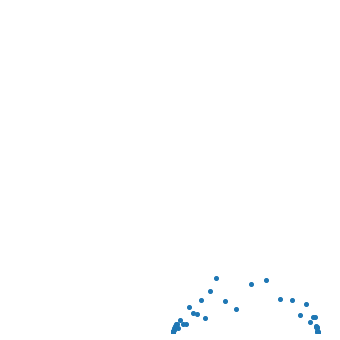

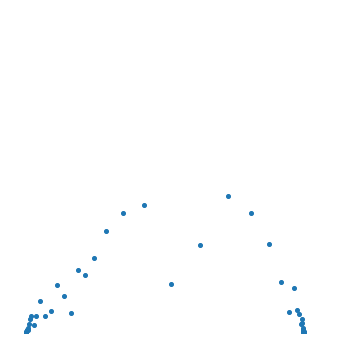

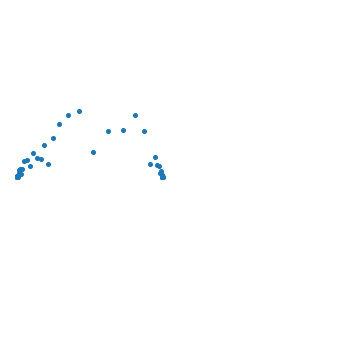

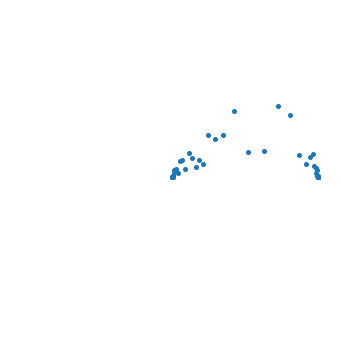

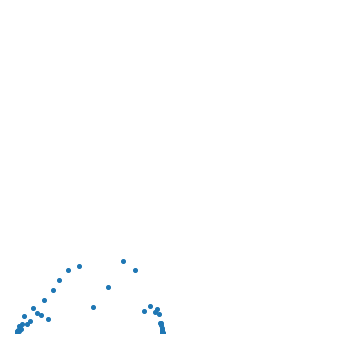

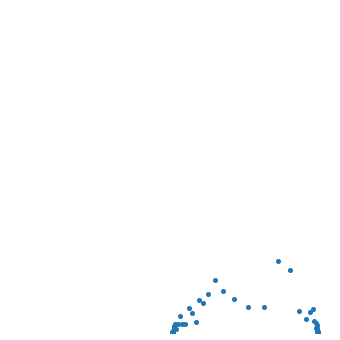

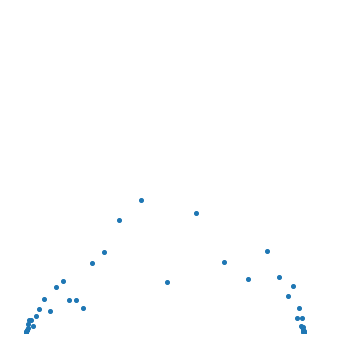

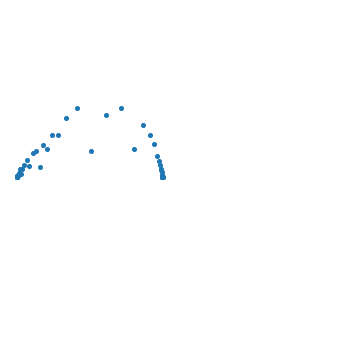

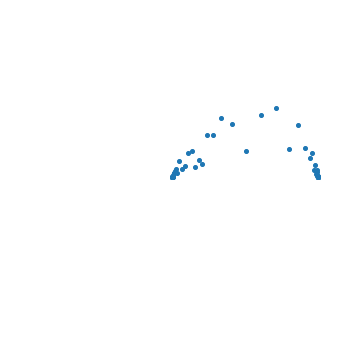

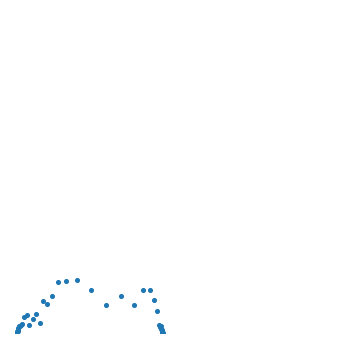

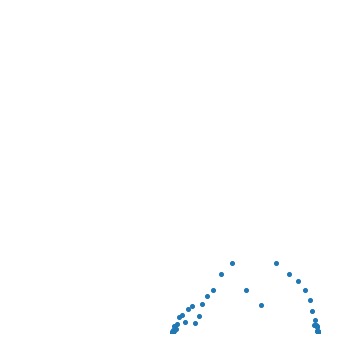

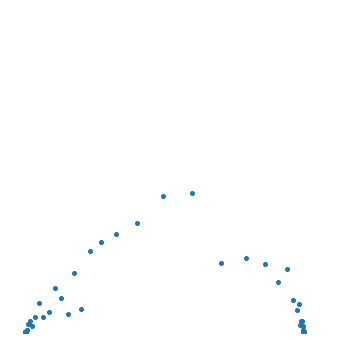

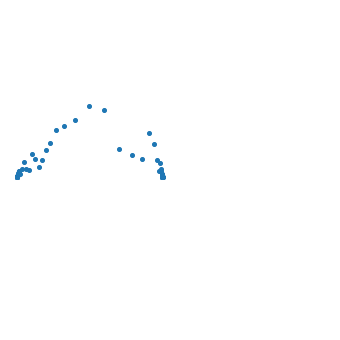

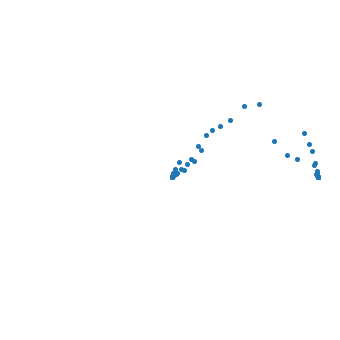

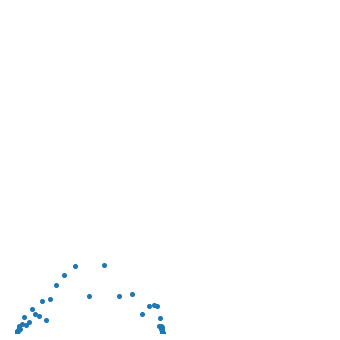

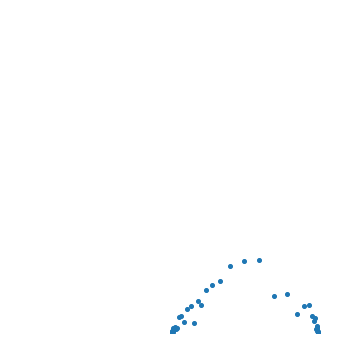

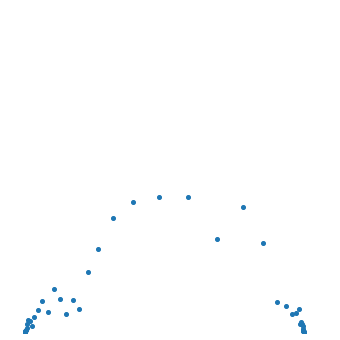

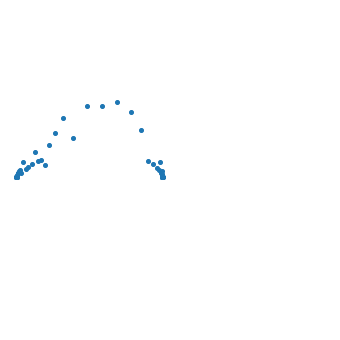

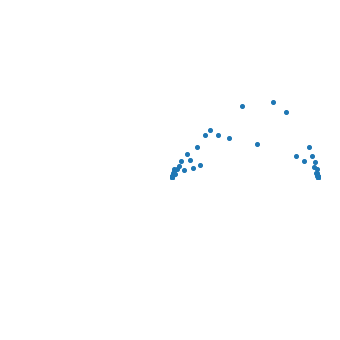

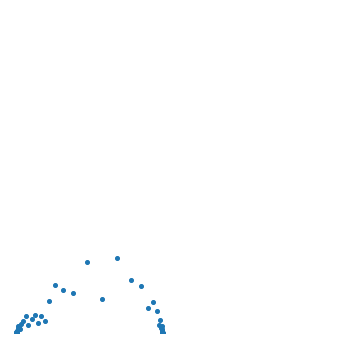

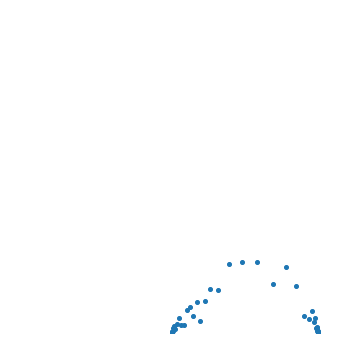

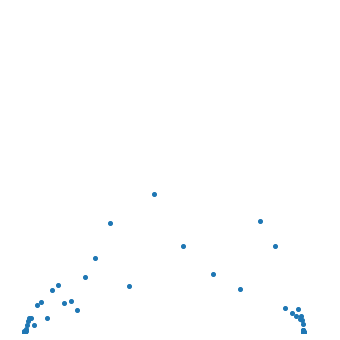

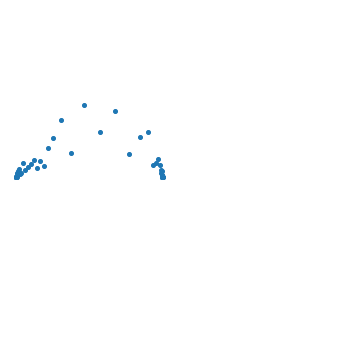

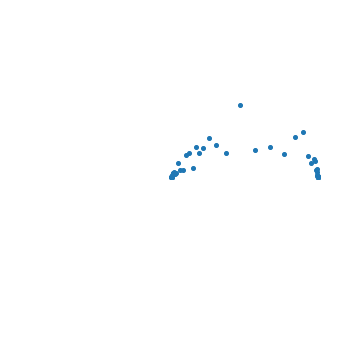

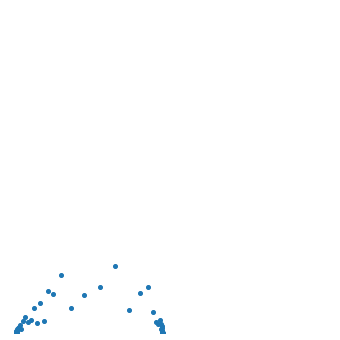

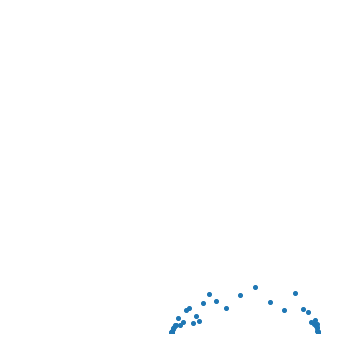

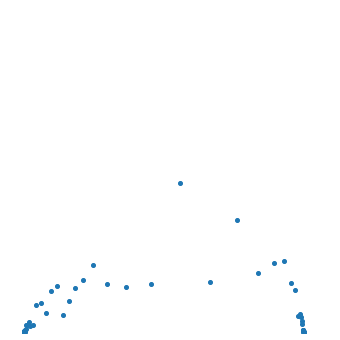

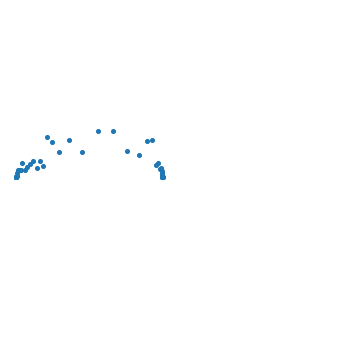

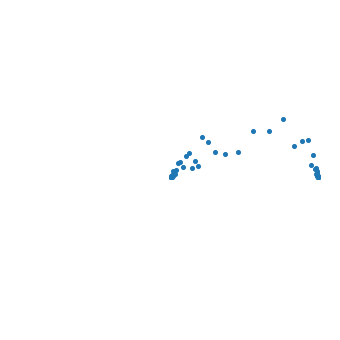

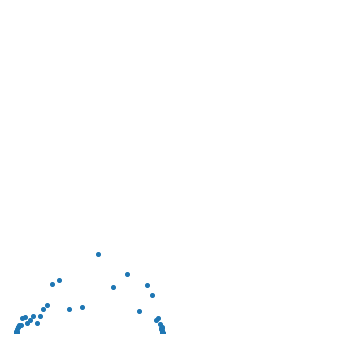

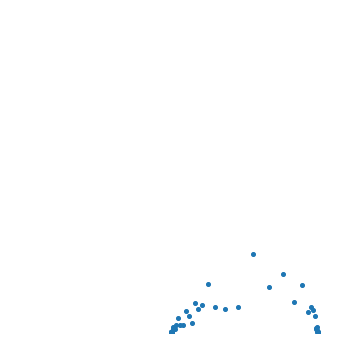

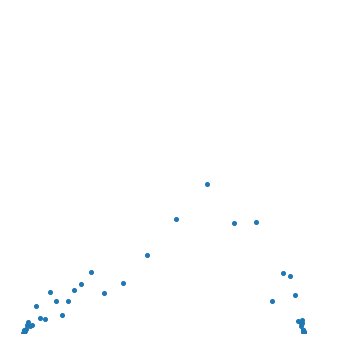

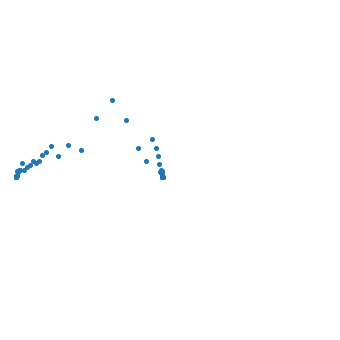

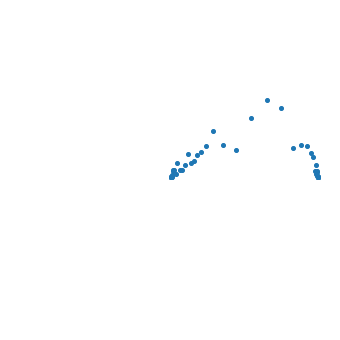

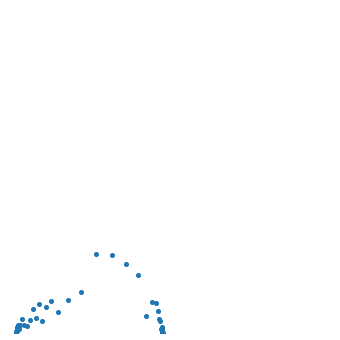

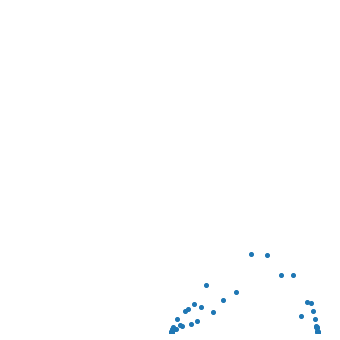

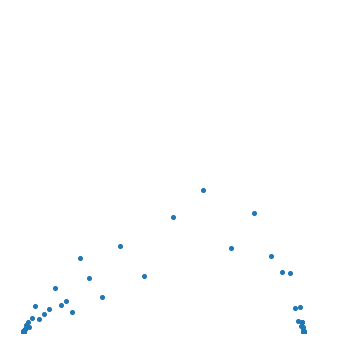

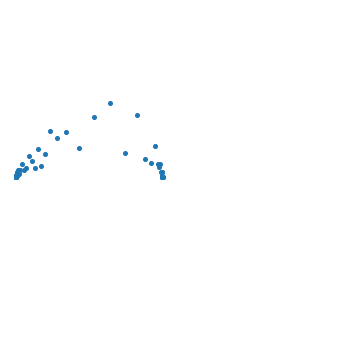

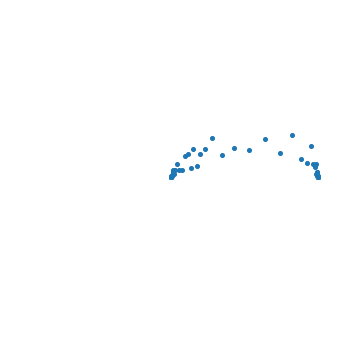

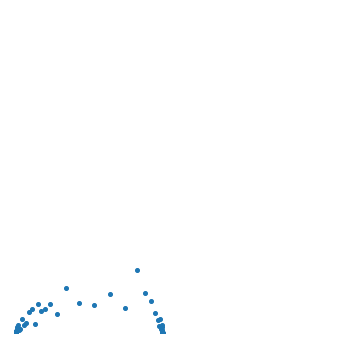

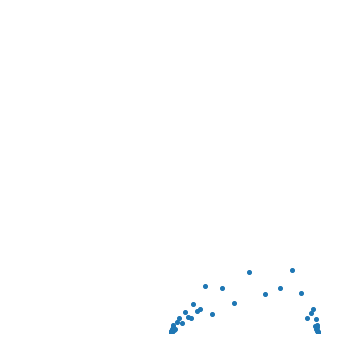

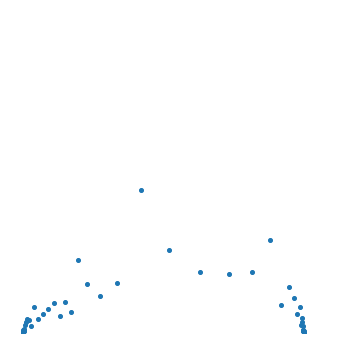

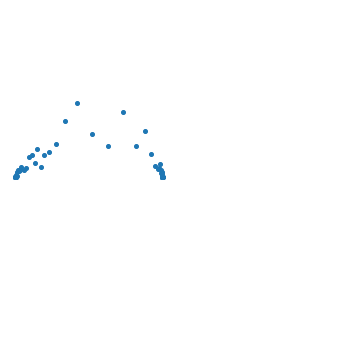

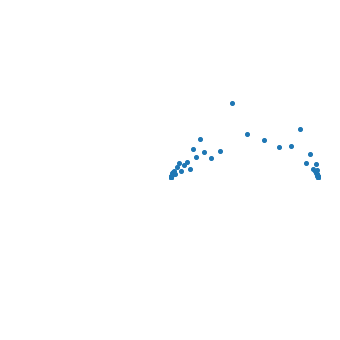

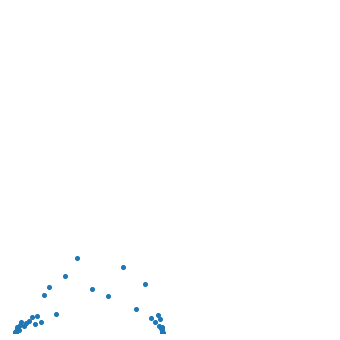

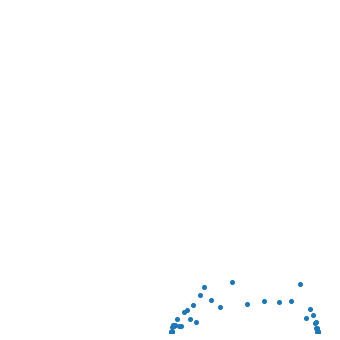

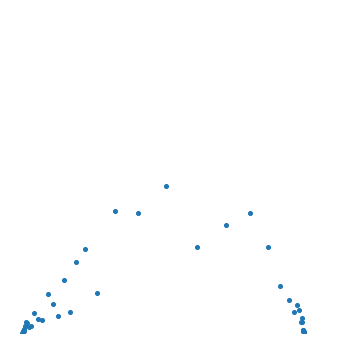

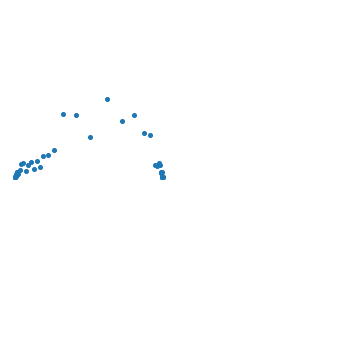

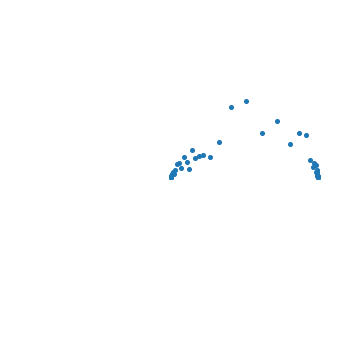

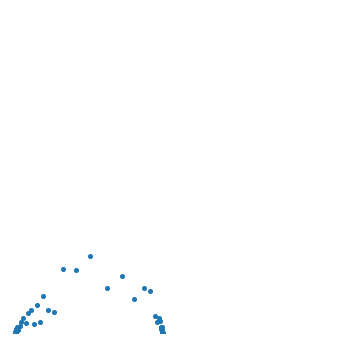

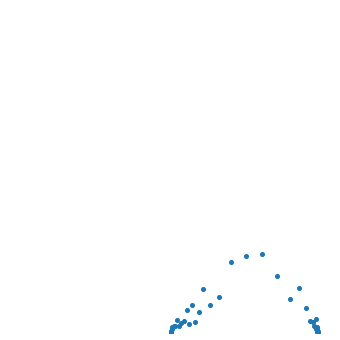

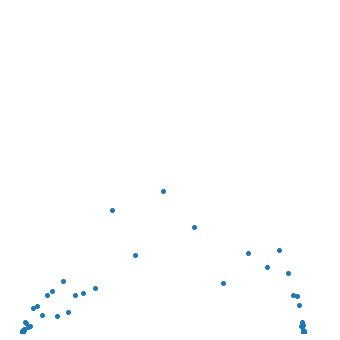

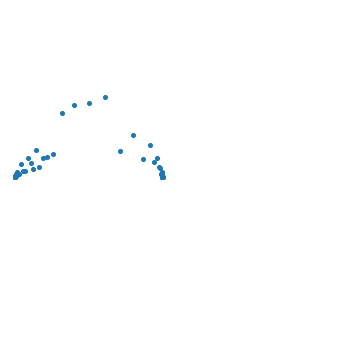

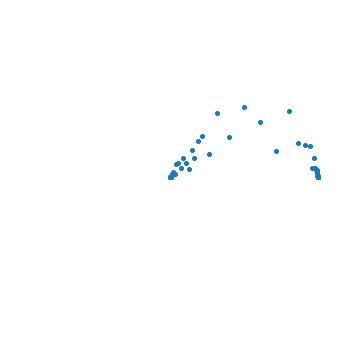

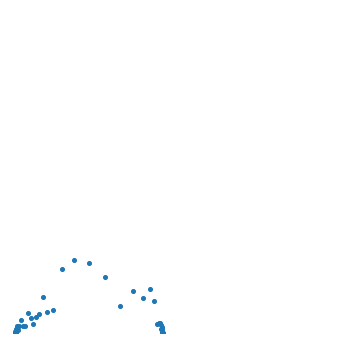

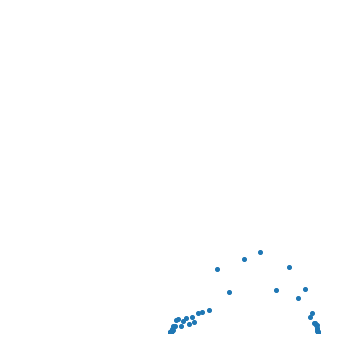

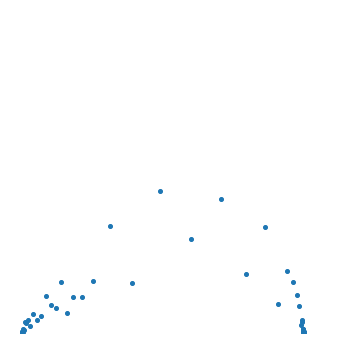

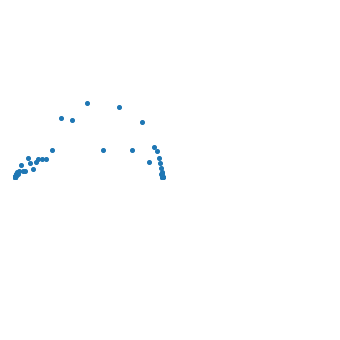

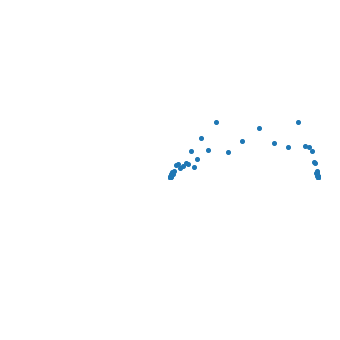

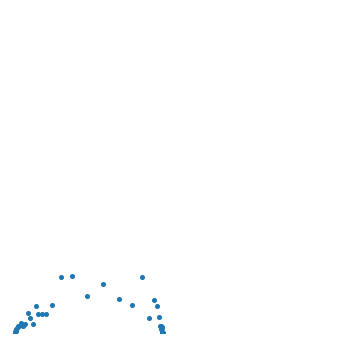

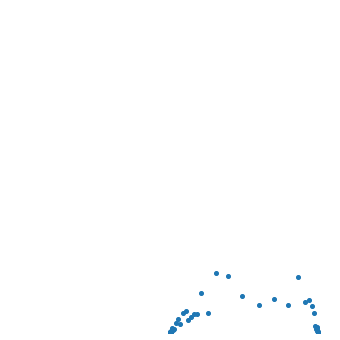

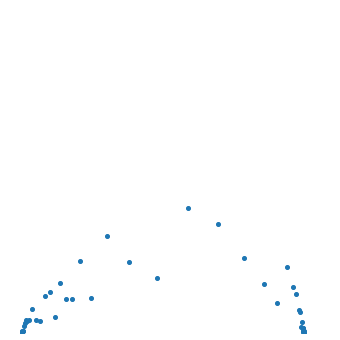

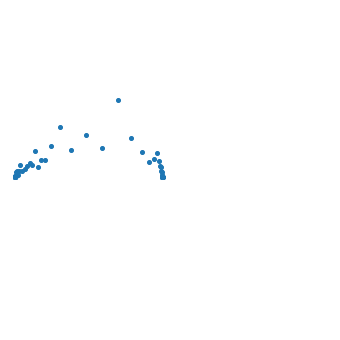

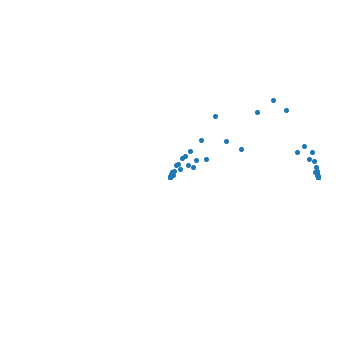

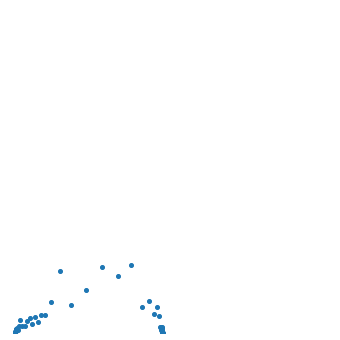

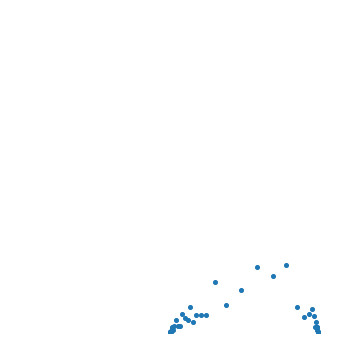

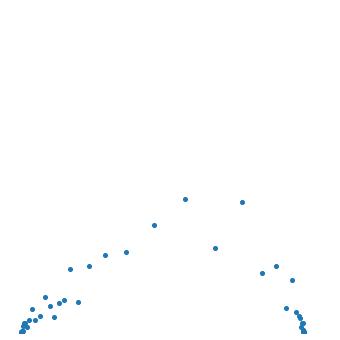

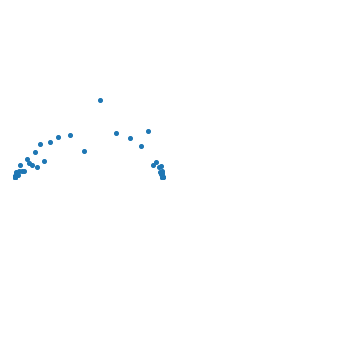

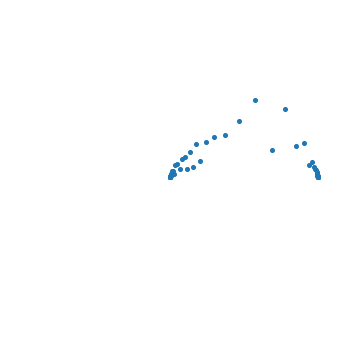

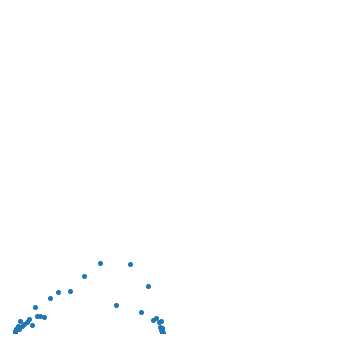

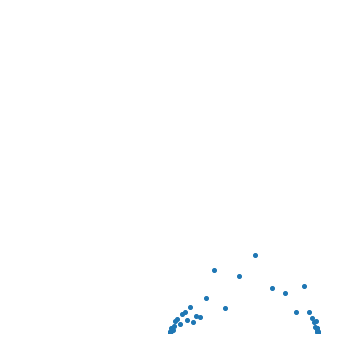

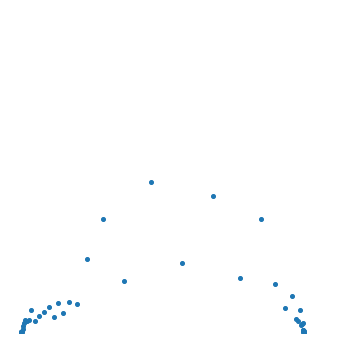

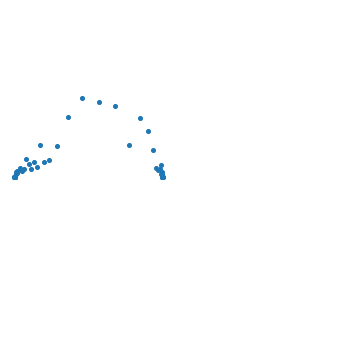

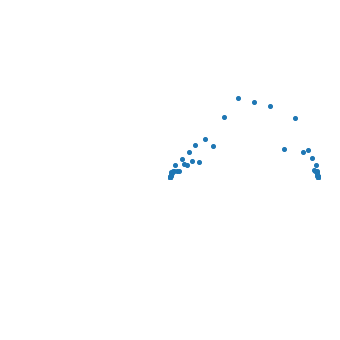

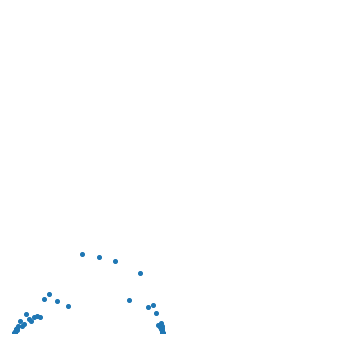

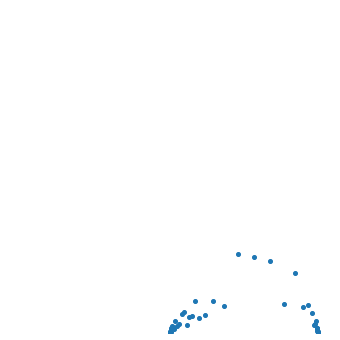

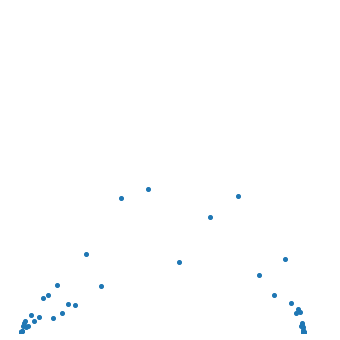

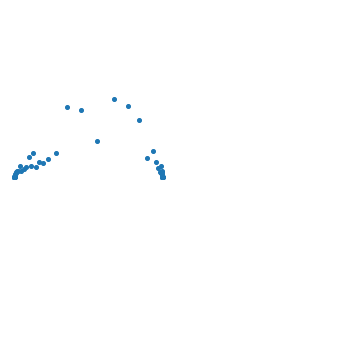

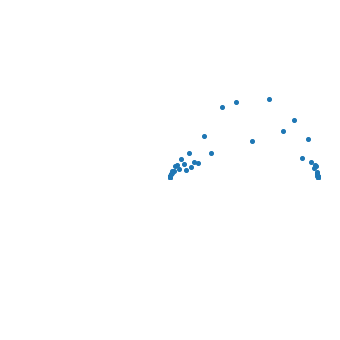

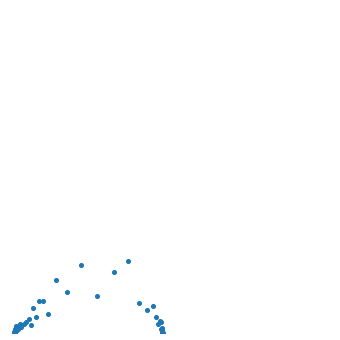

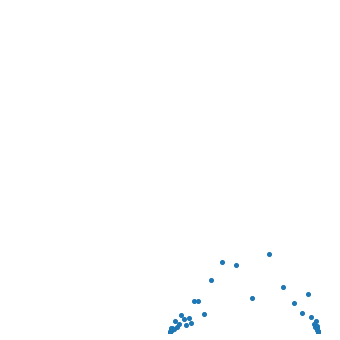

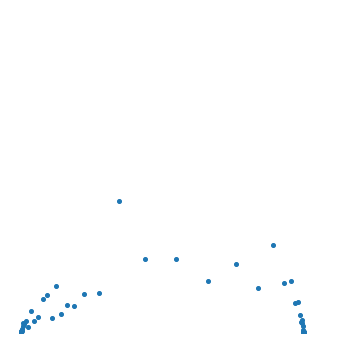

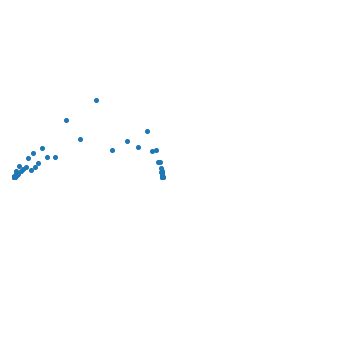

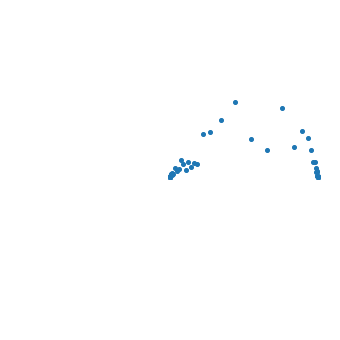

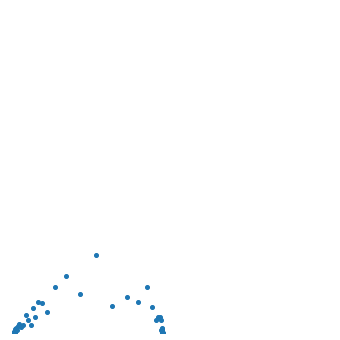

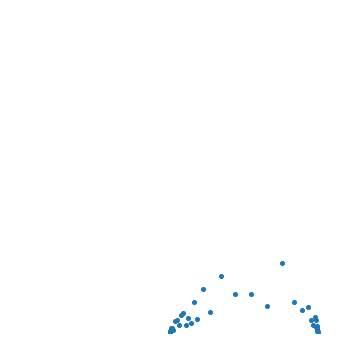

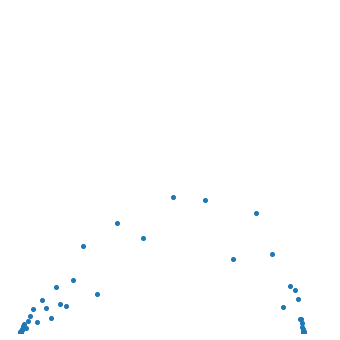

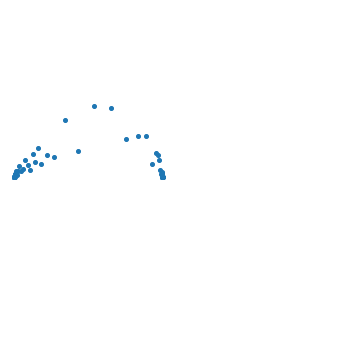

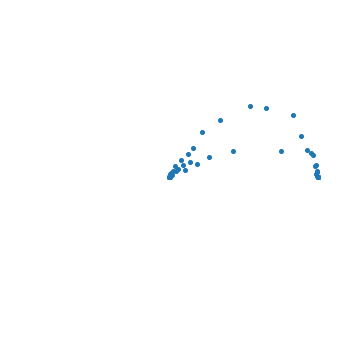

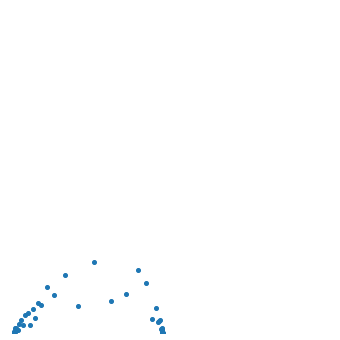

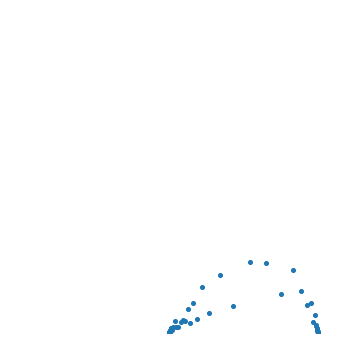

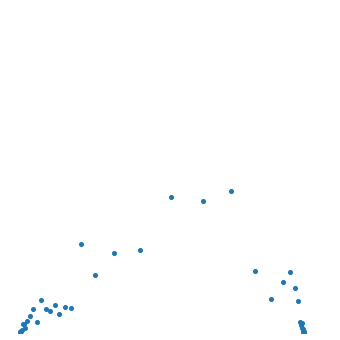

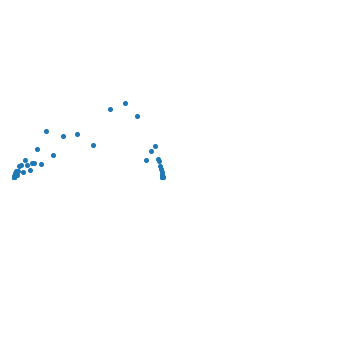

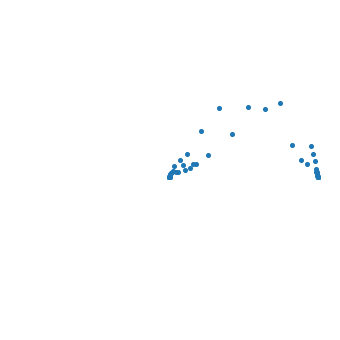

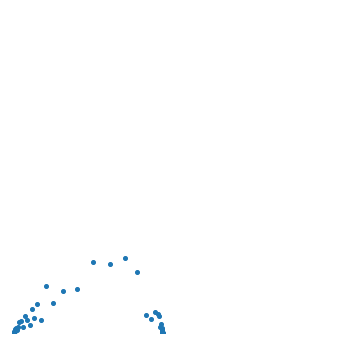

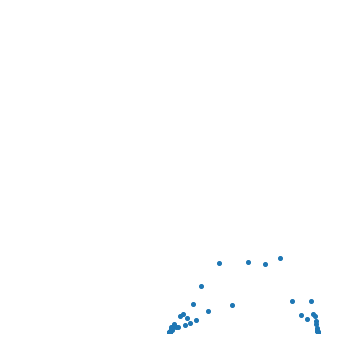

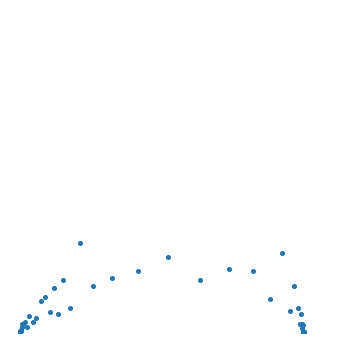

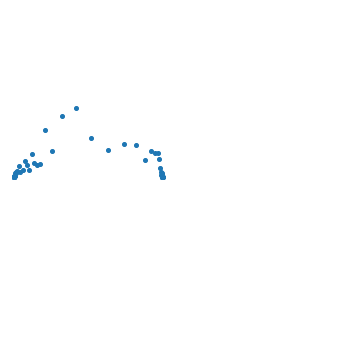

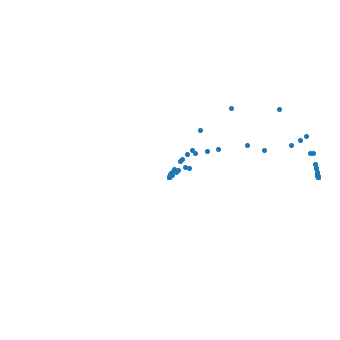

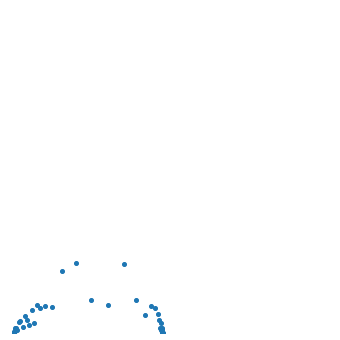

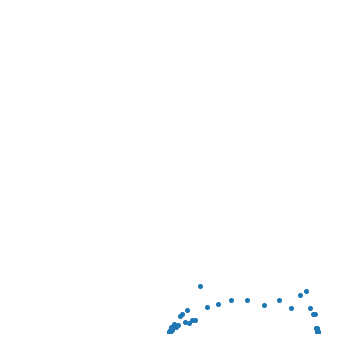

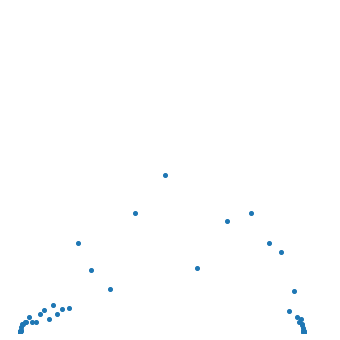

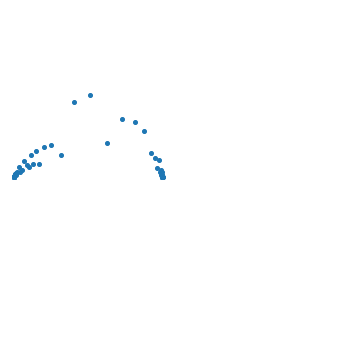

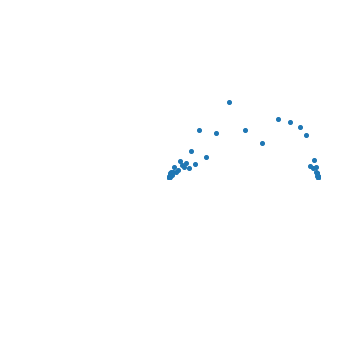

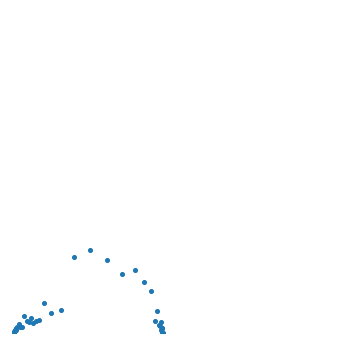

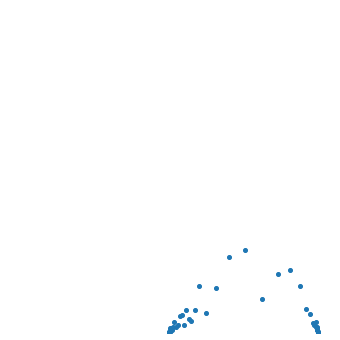

In [24]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q1= 25E-6 #F
alpha1= 0.8
Q2= 2*Q1 #F
alpha2= 0.9
R2= 150   # ohm
R1= 30   # ohm
resistance= np.linspace(1,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRQRQ_file_writer(f_start, f_stop, decades, Rs,R1, Q1,alpha1, R2, Q2,alpha2, alteration='noise', noisescale=0.5, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)

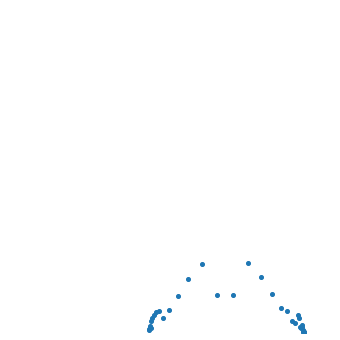

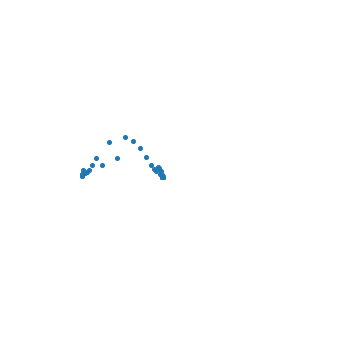

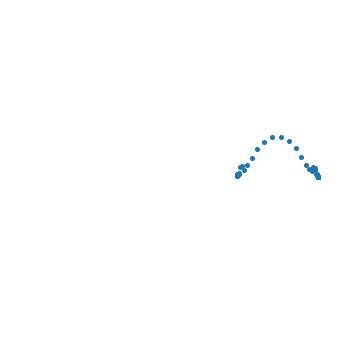

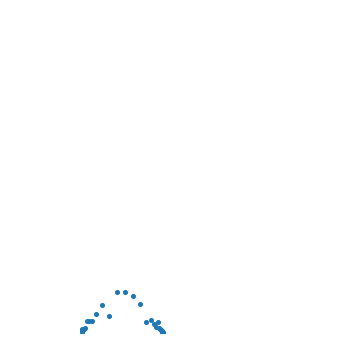

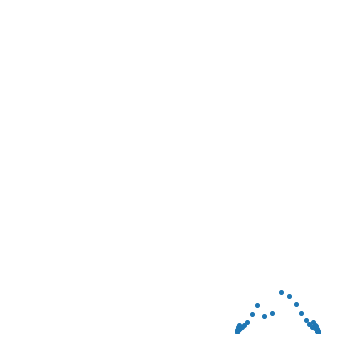

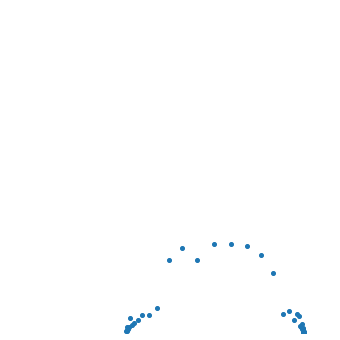

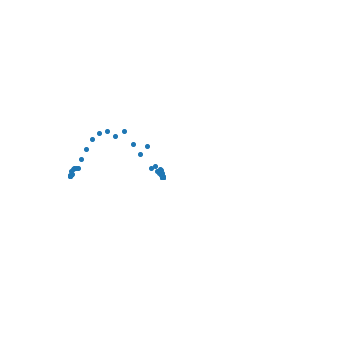

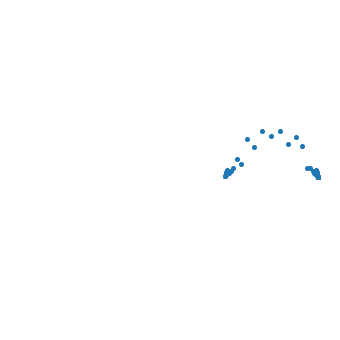

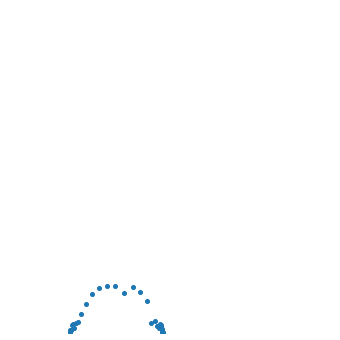

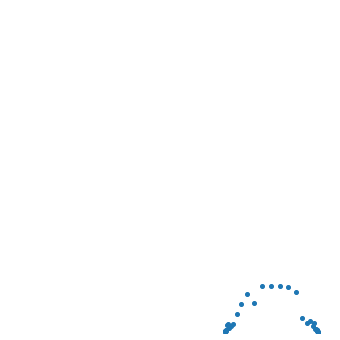

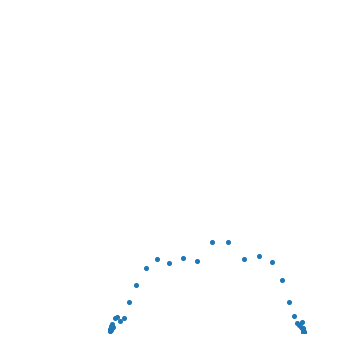

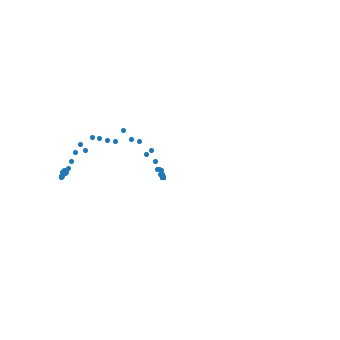

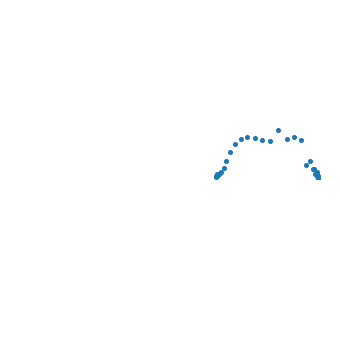

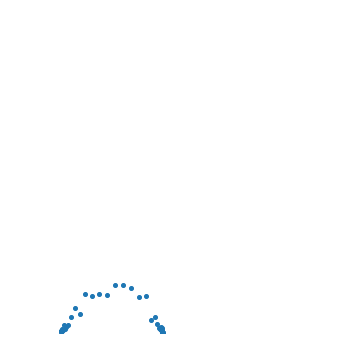

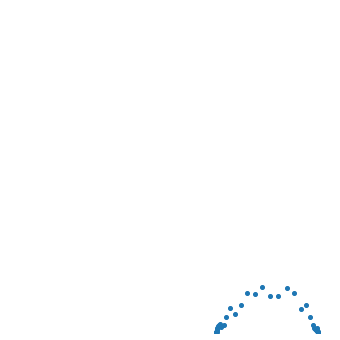

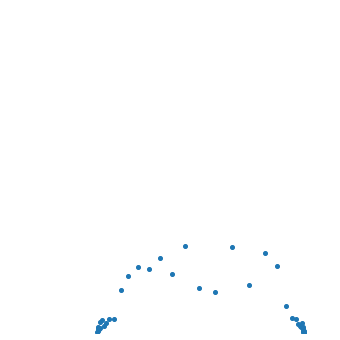

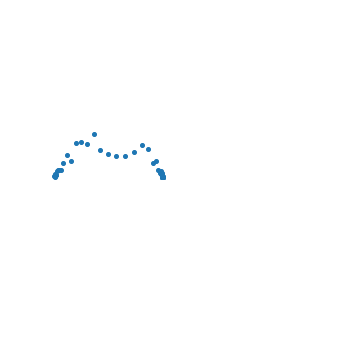

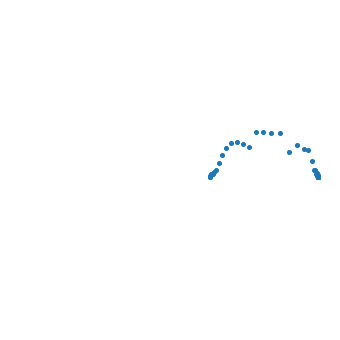

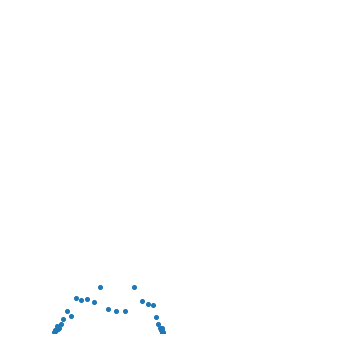

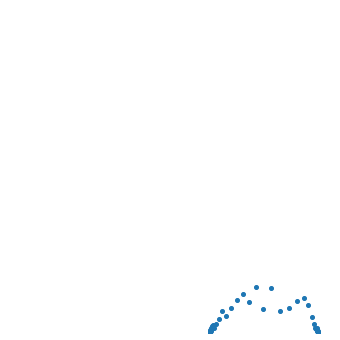

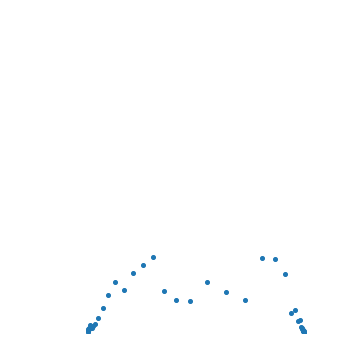

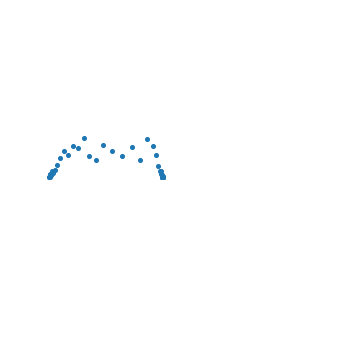

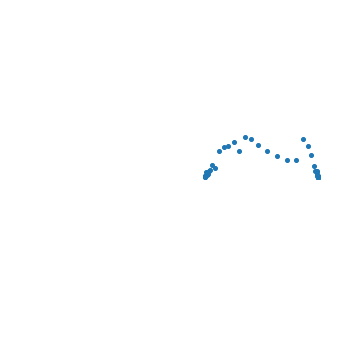

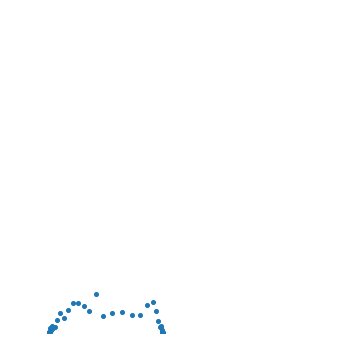

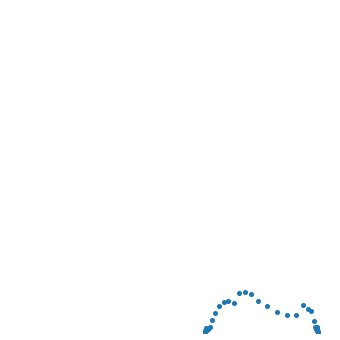

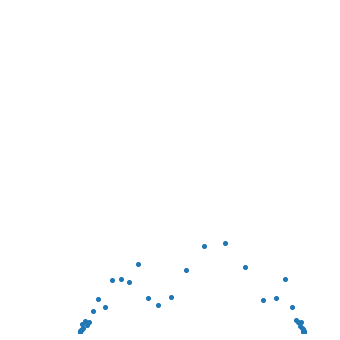

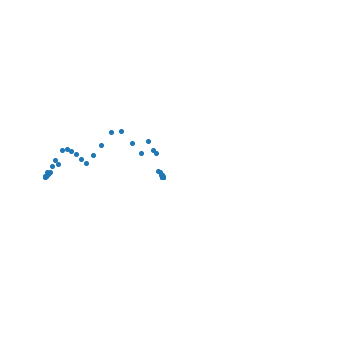

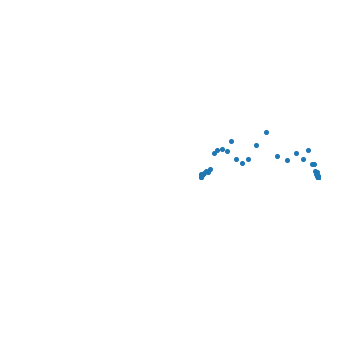

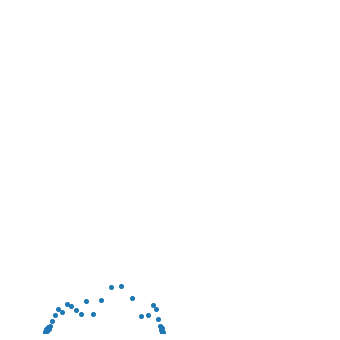

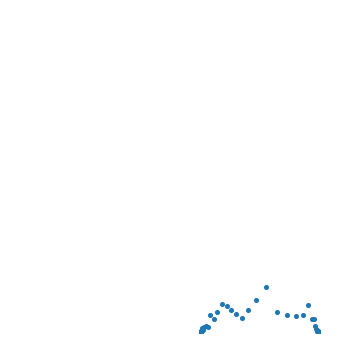

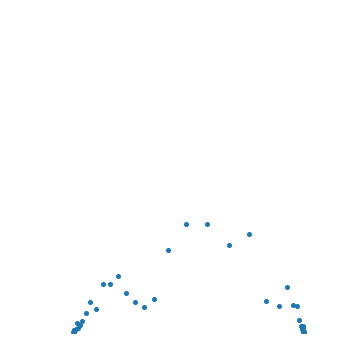

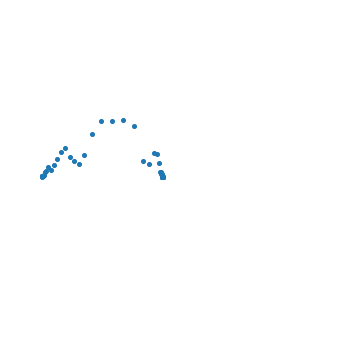

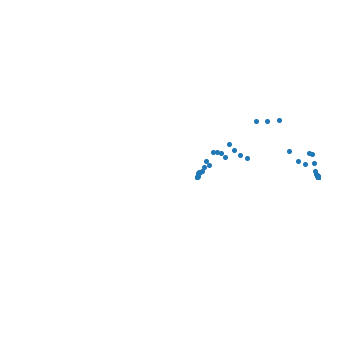

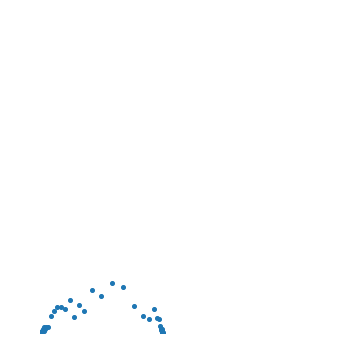

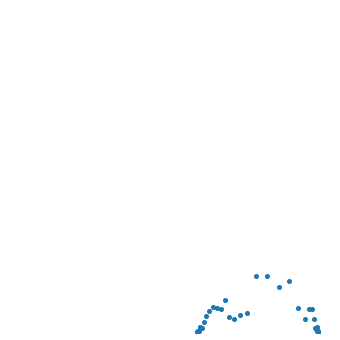

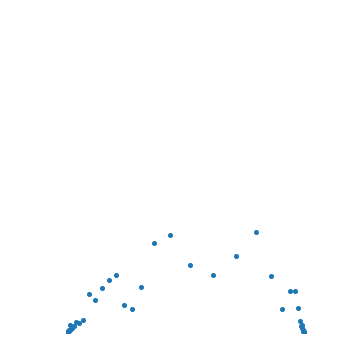

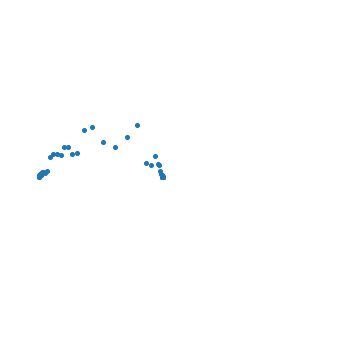

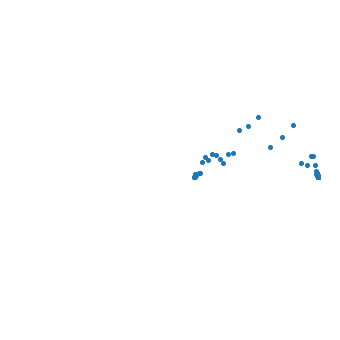

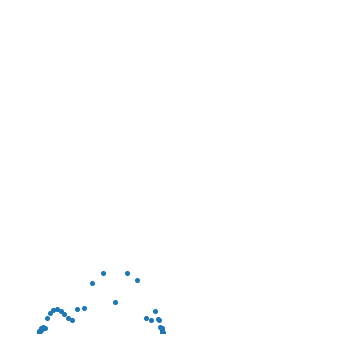

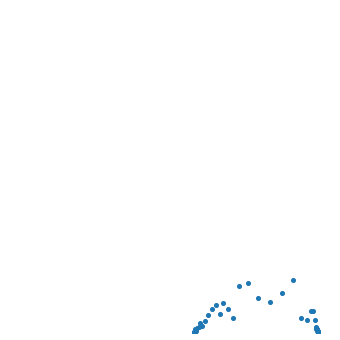

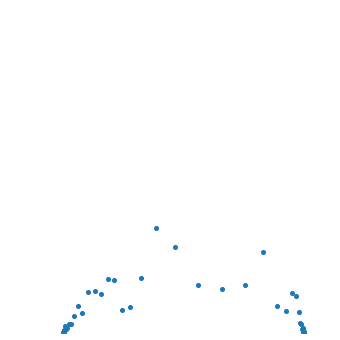

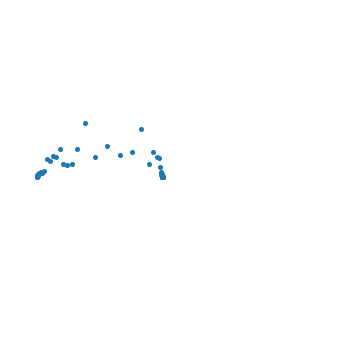

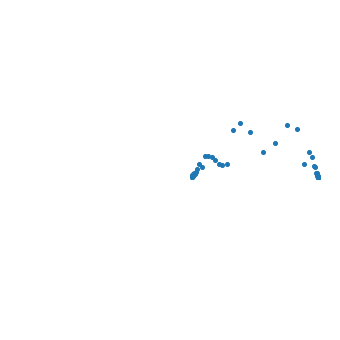

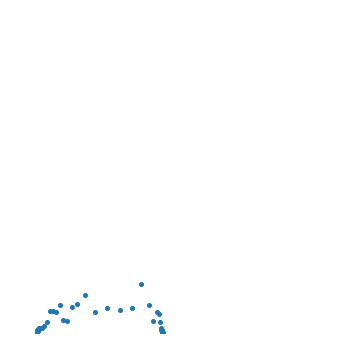

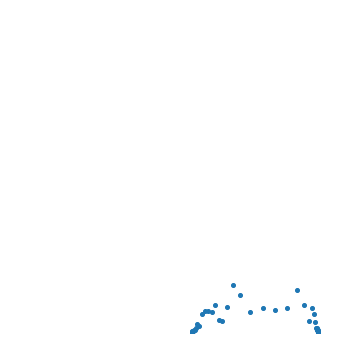

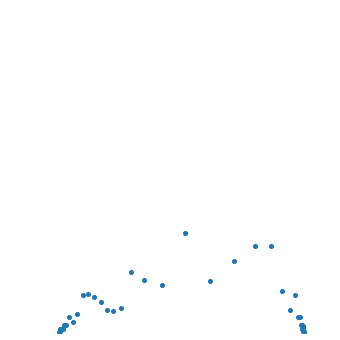

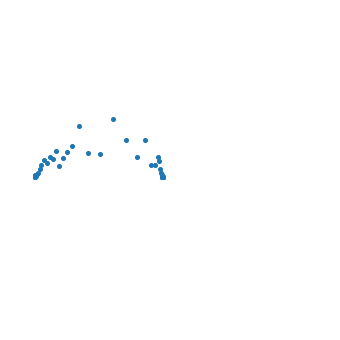

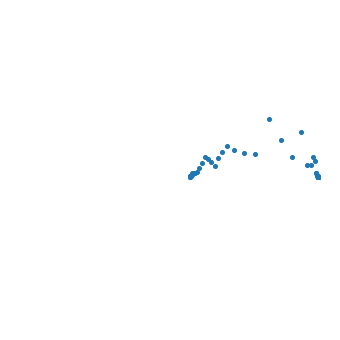

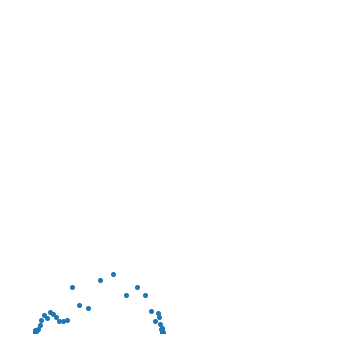

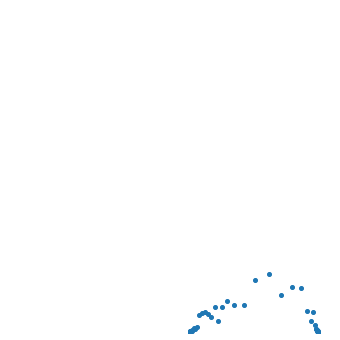

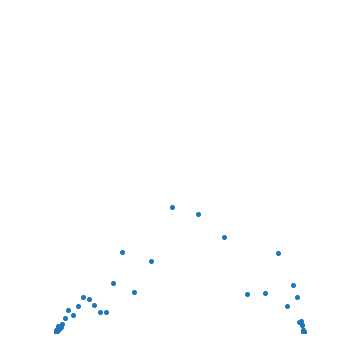

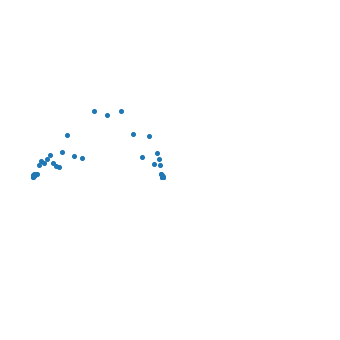

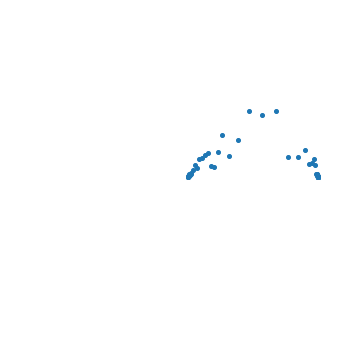

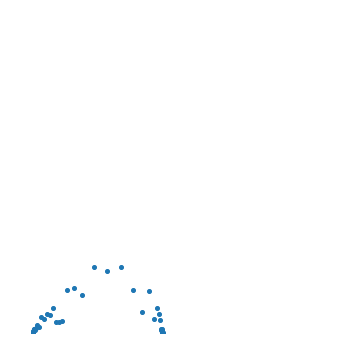

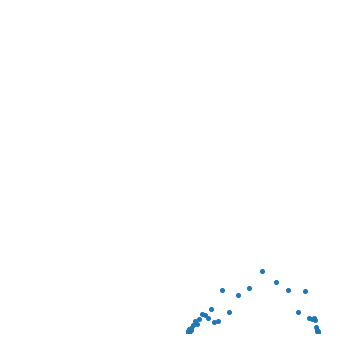

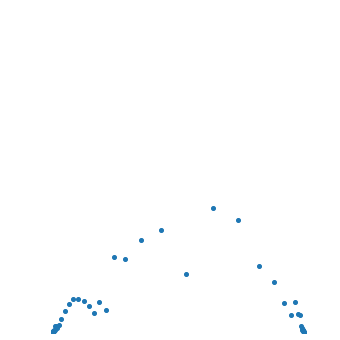

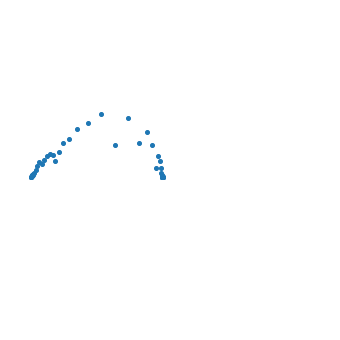

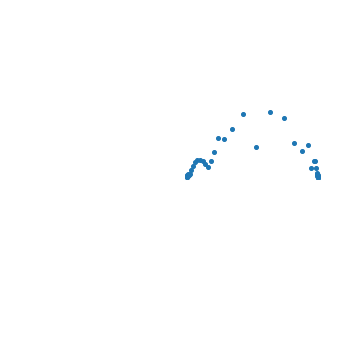

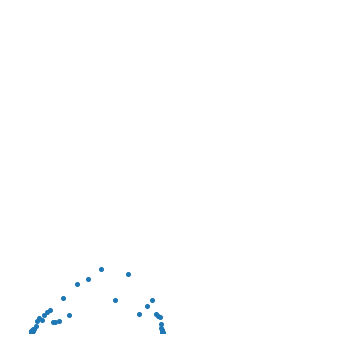

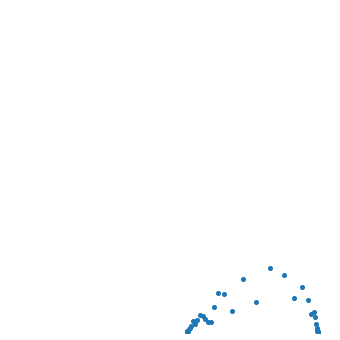

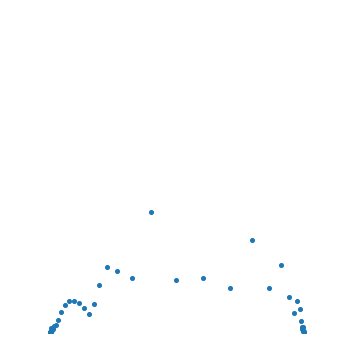

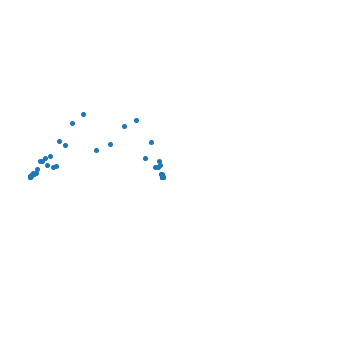

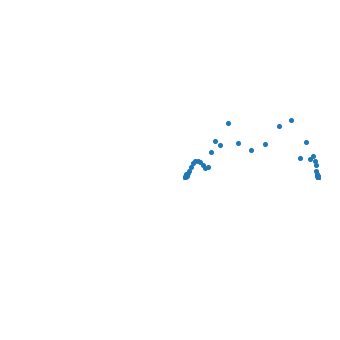

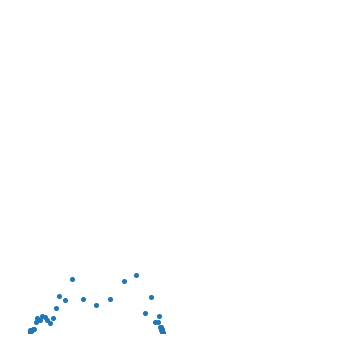

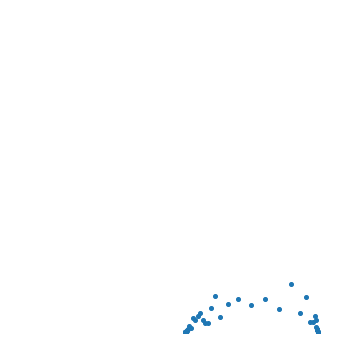

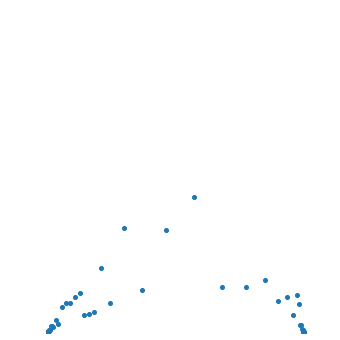

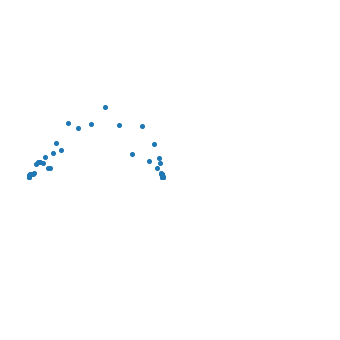

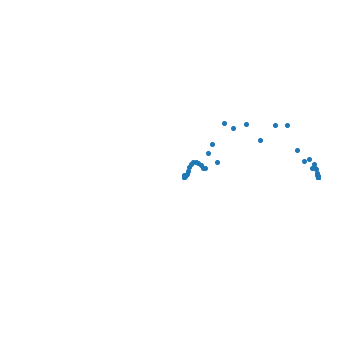

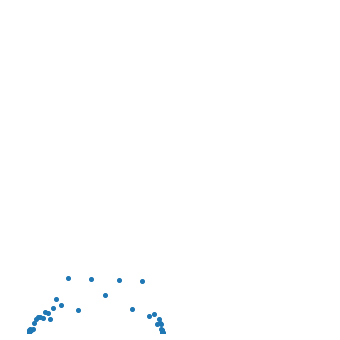

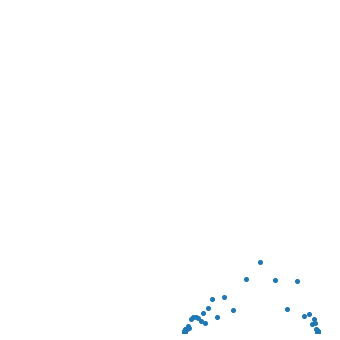

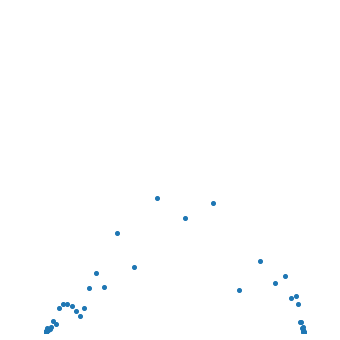

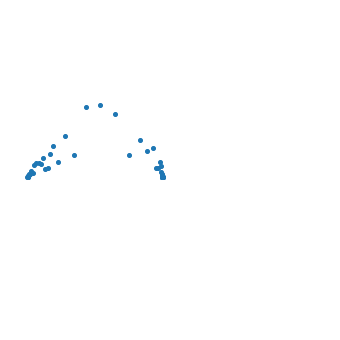

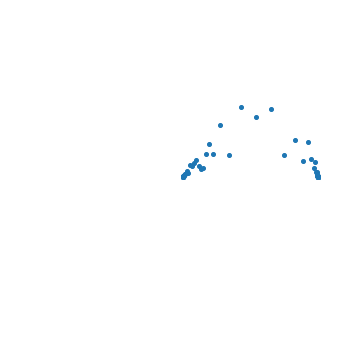

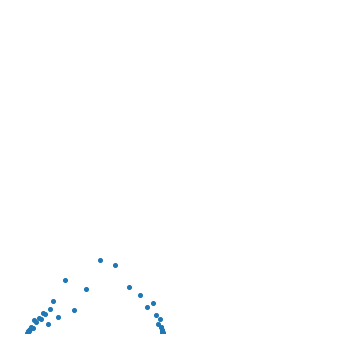

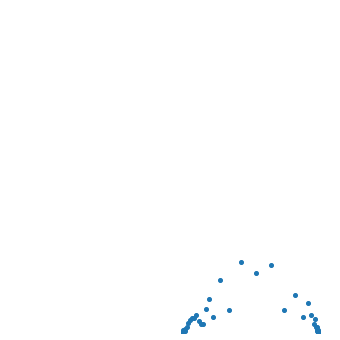

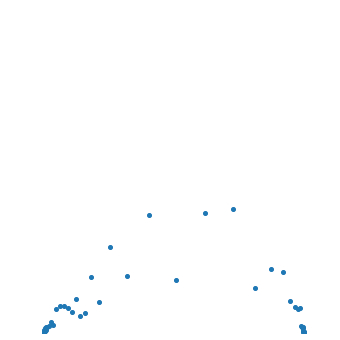

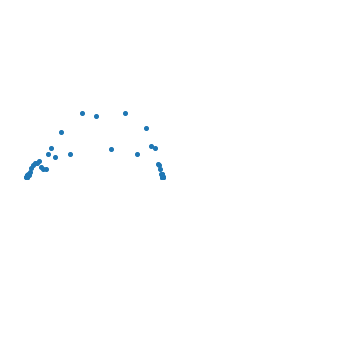

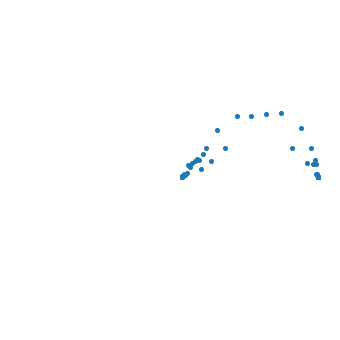

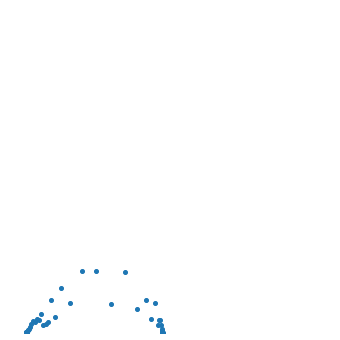

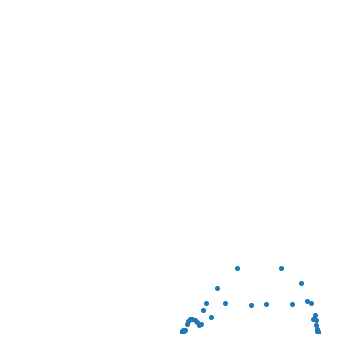

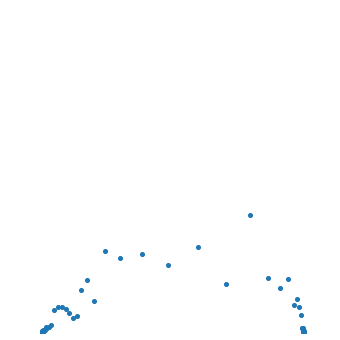

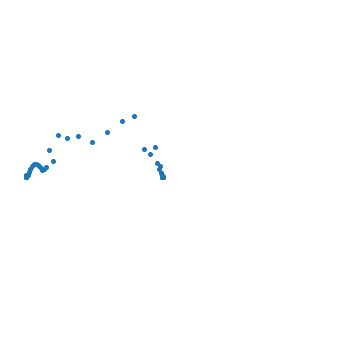

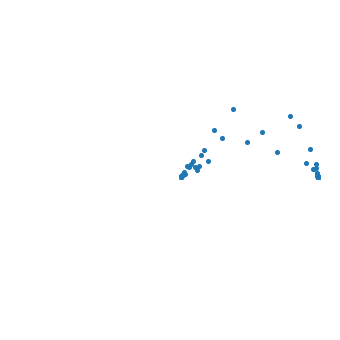

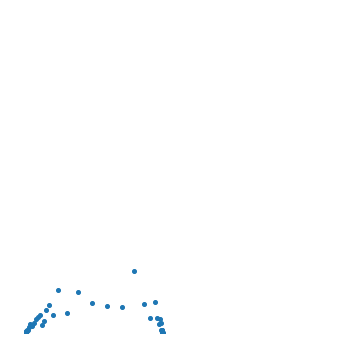

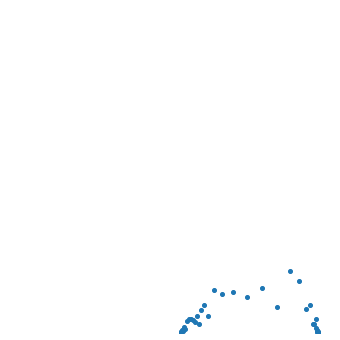

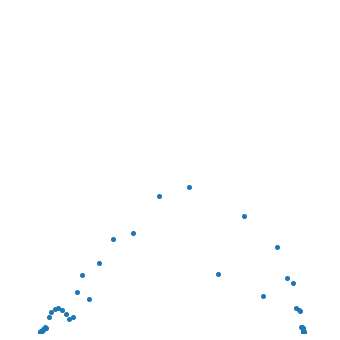

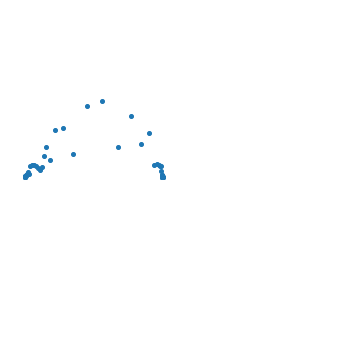

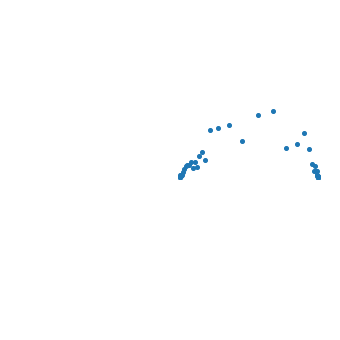

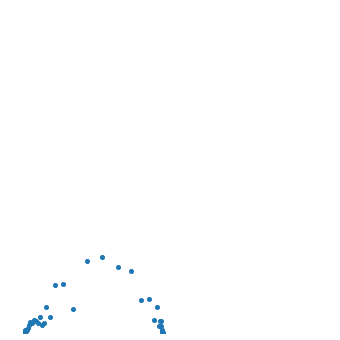

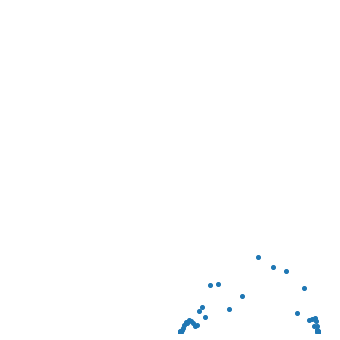

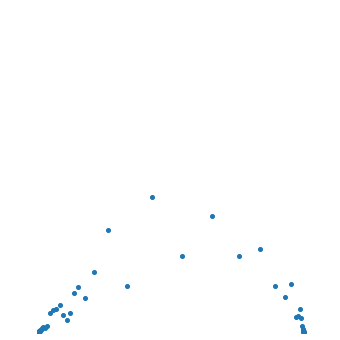

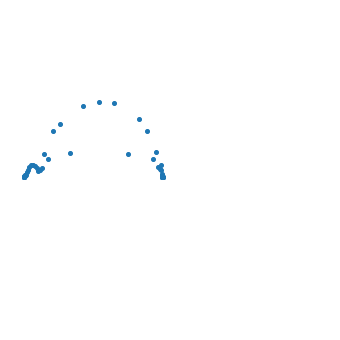

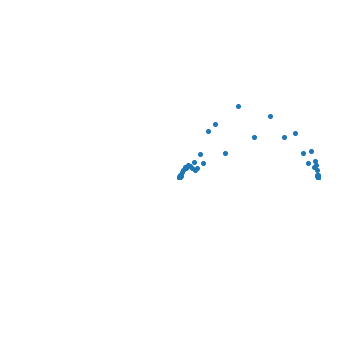

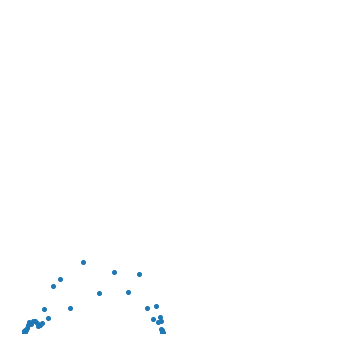

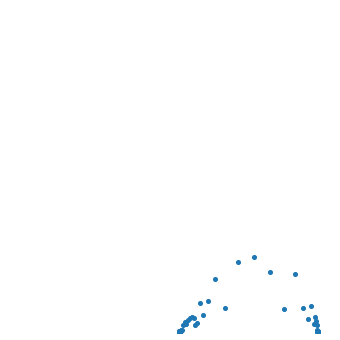

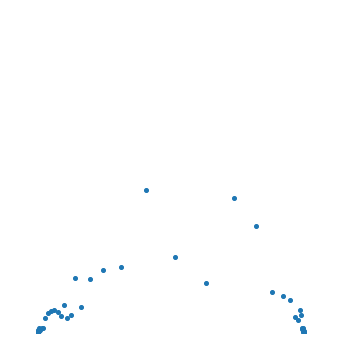

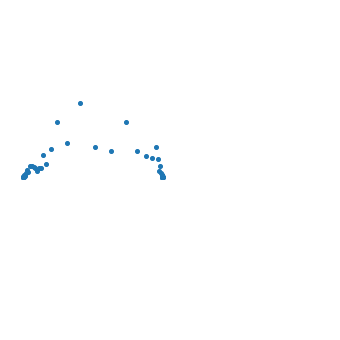

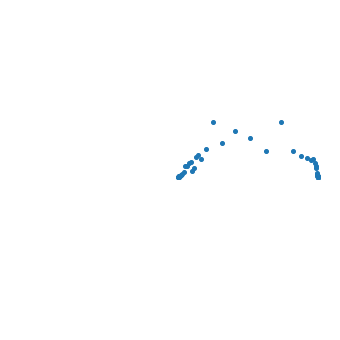

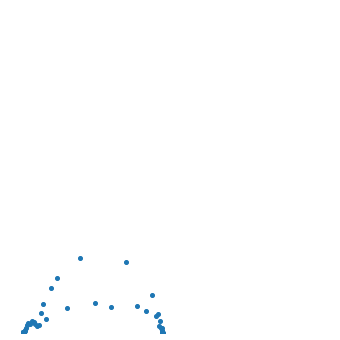

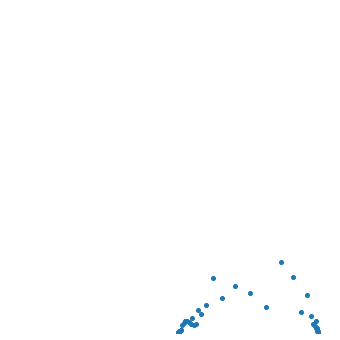

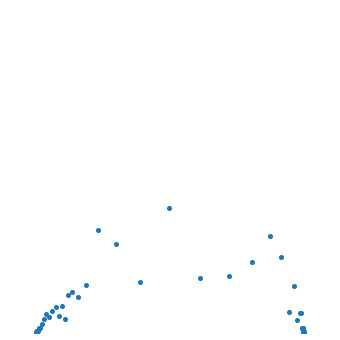

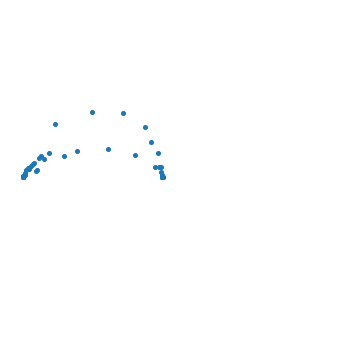

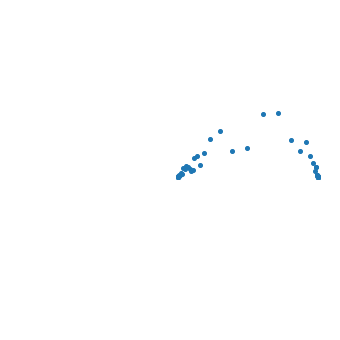

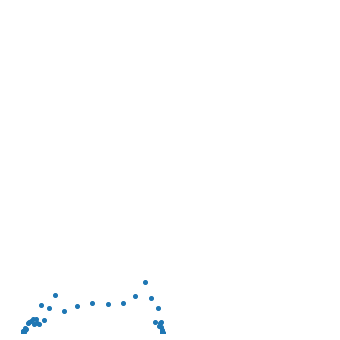

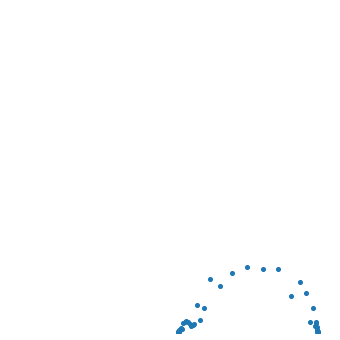

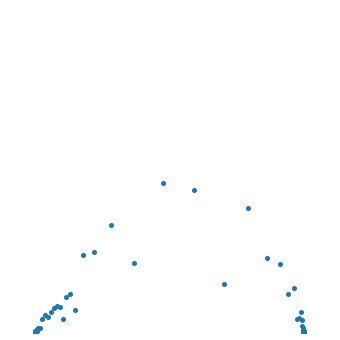

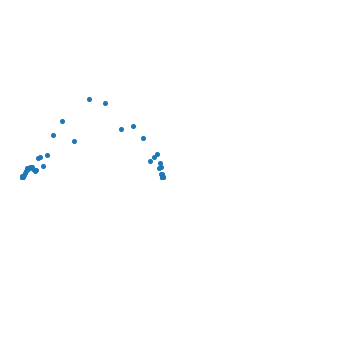

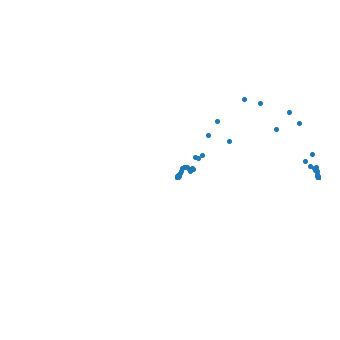

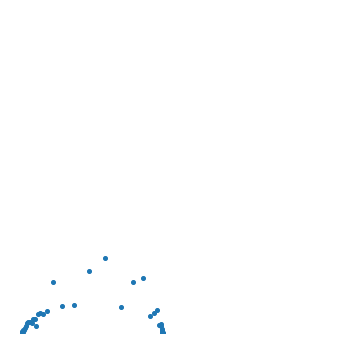

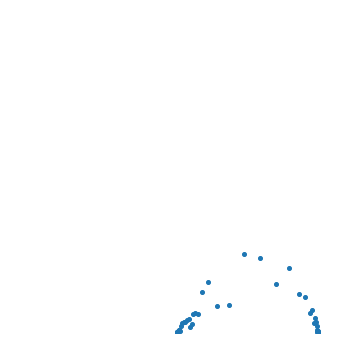

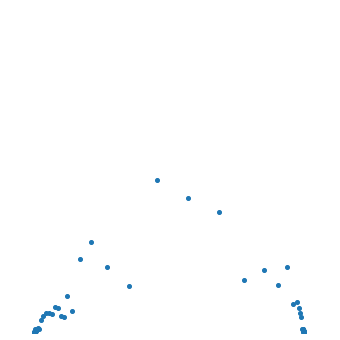

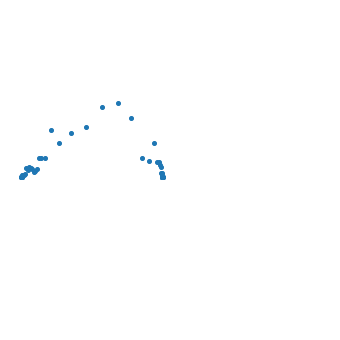

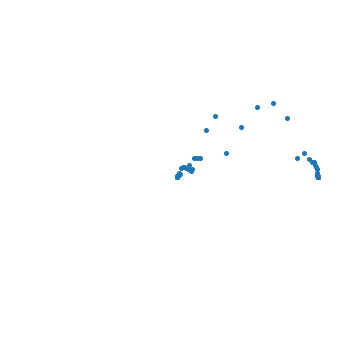

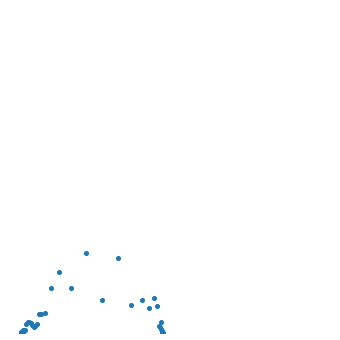

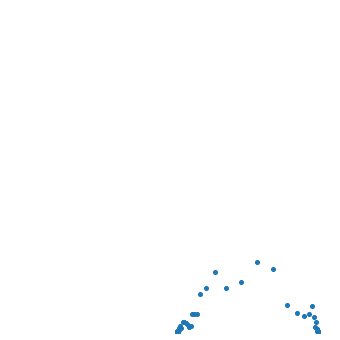

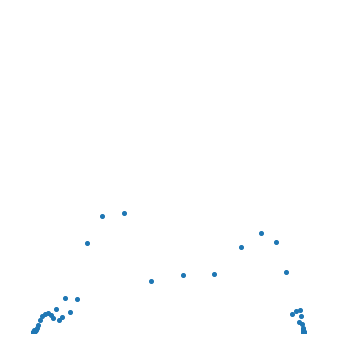

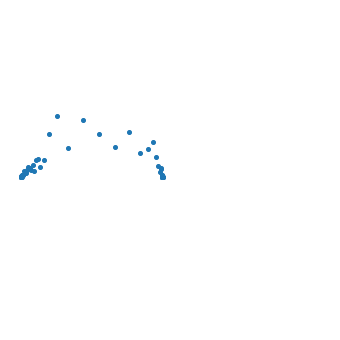

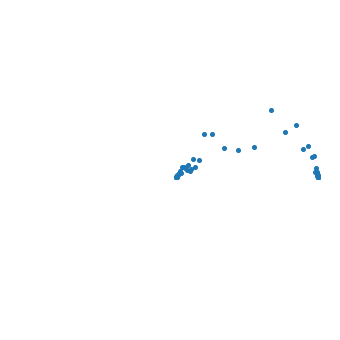

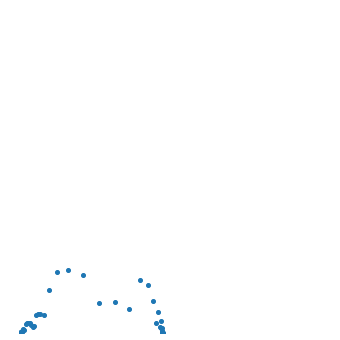

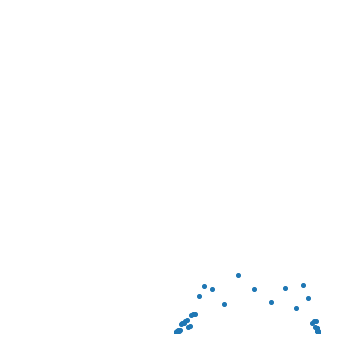

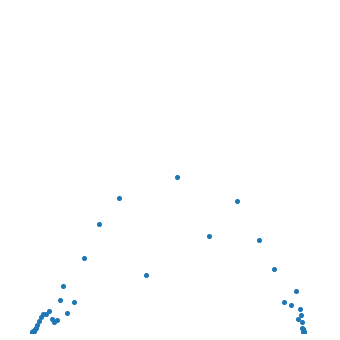

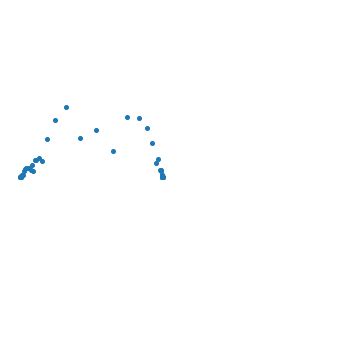

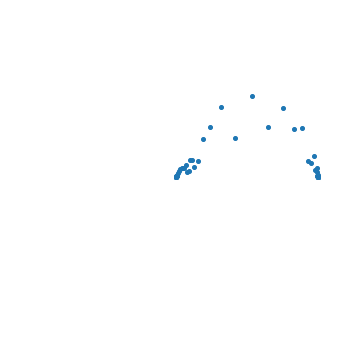

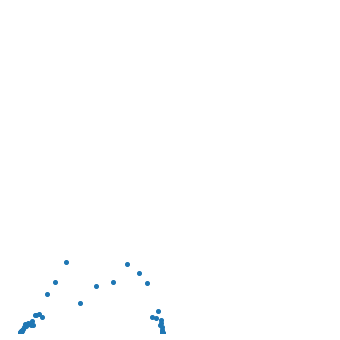

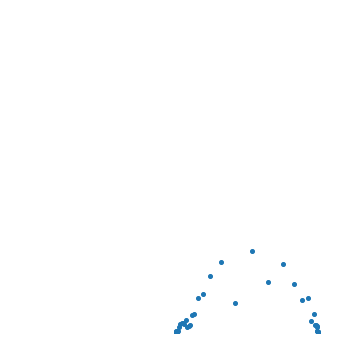

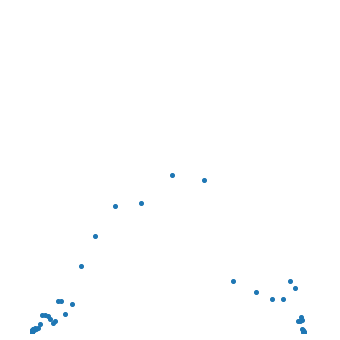

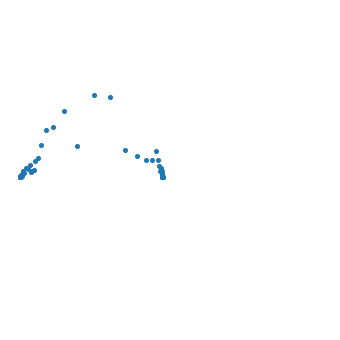

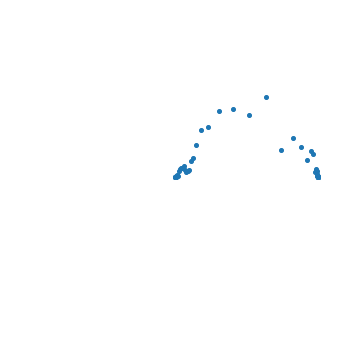

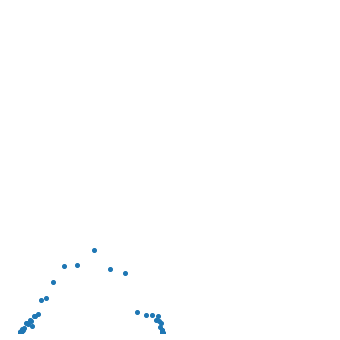

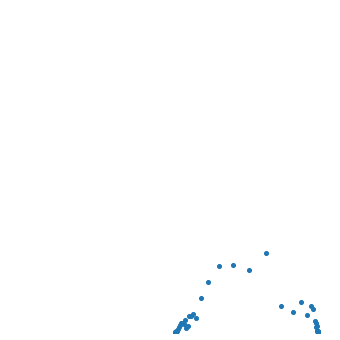

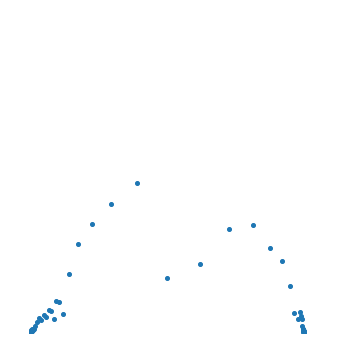

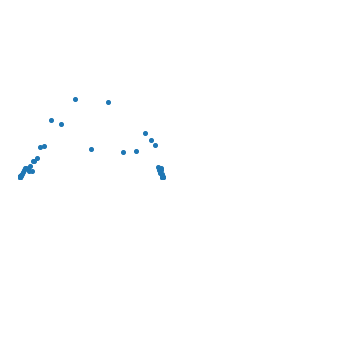

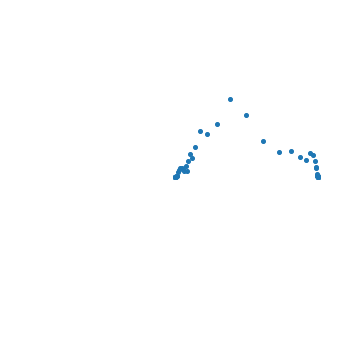

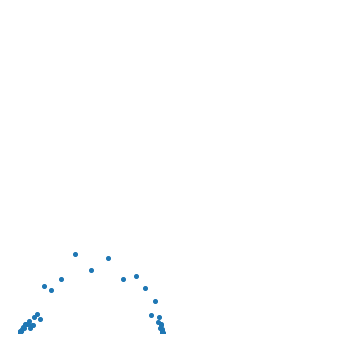

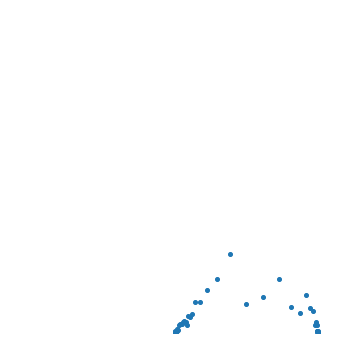

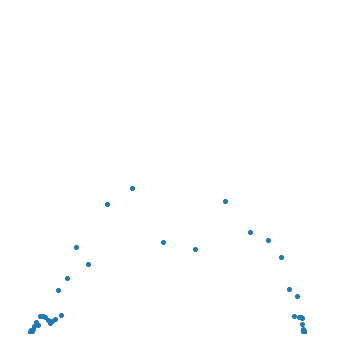

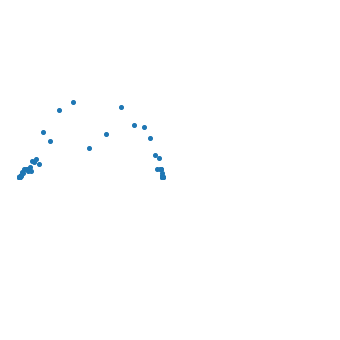

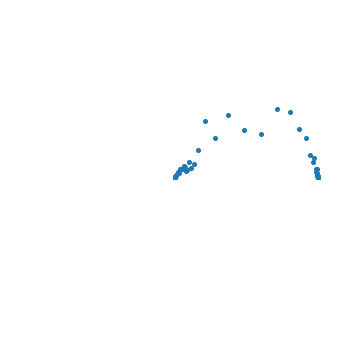

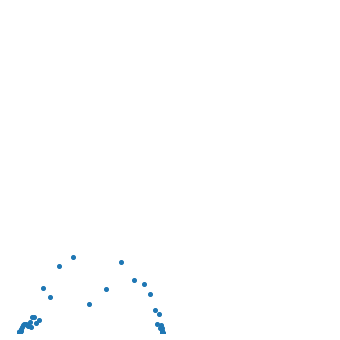

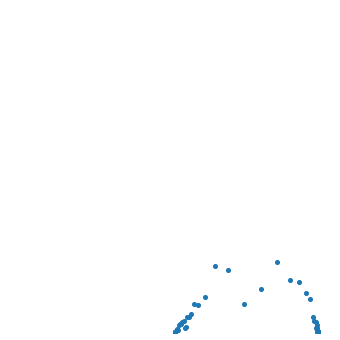

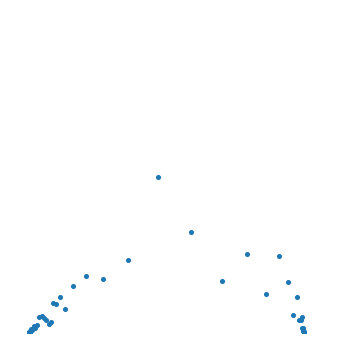

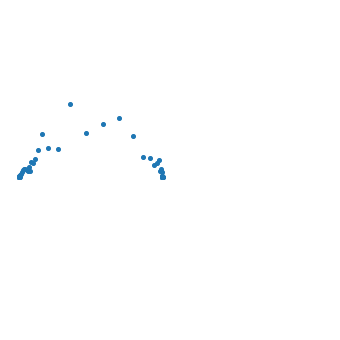

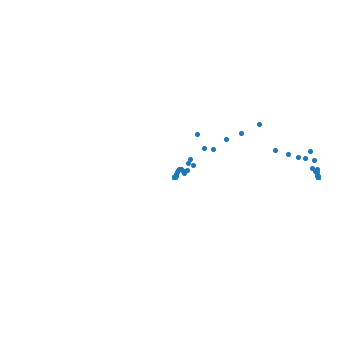

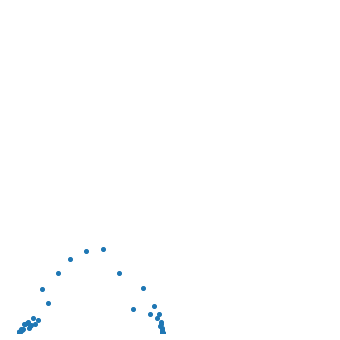

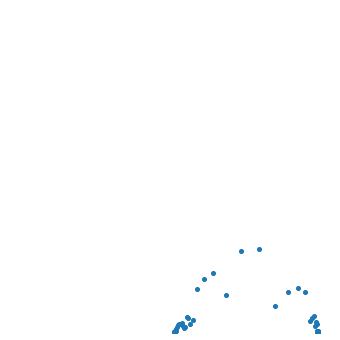

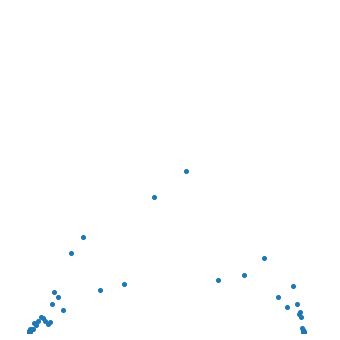

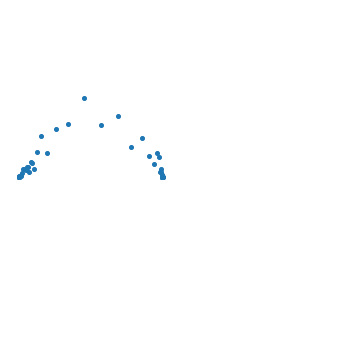

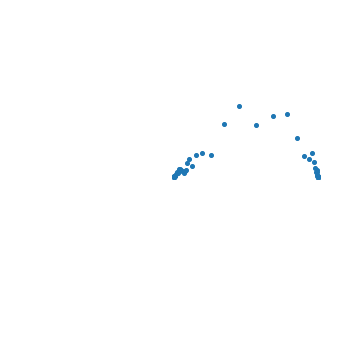

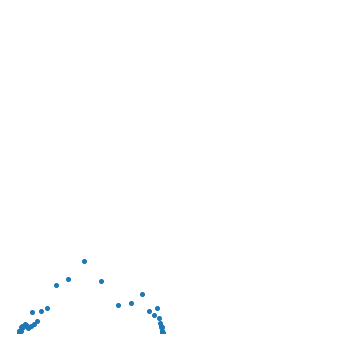

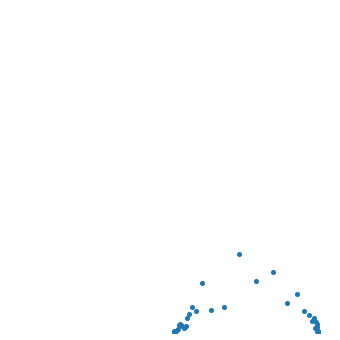

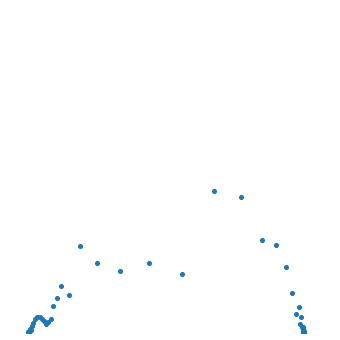

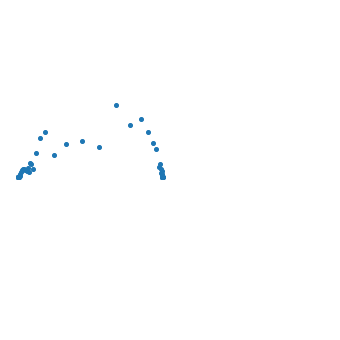

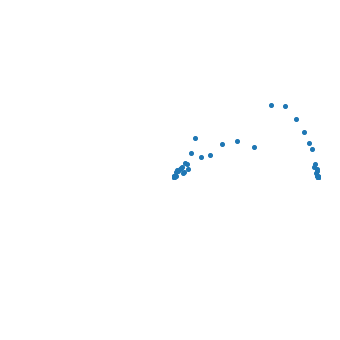

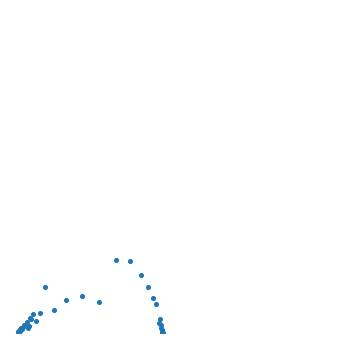

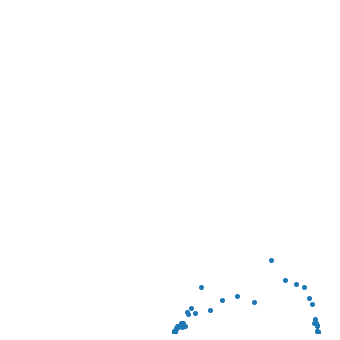

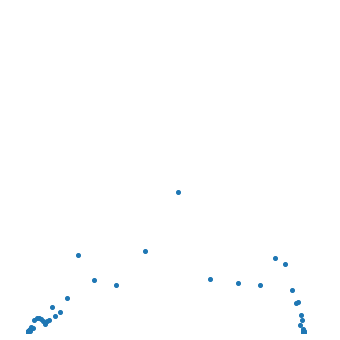

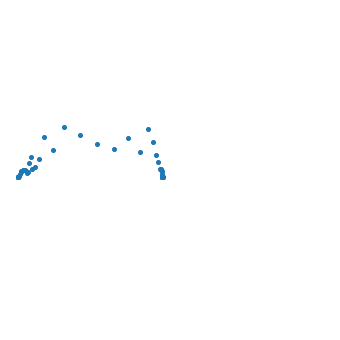

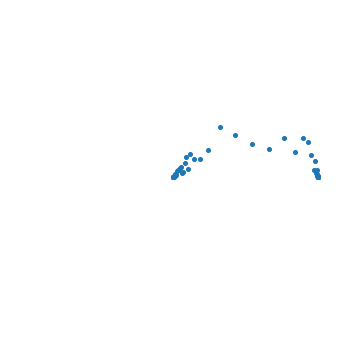

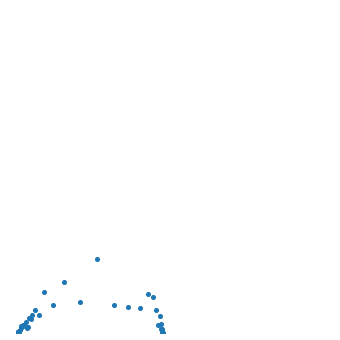

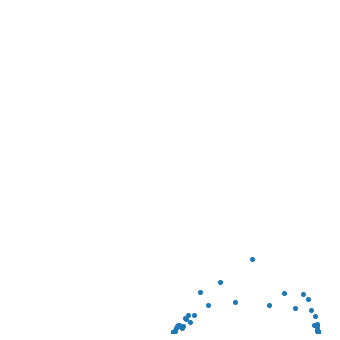

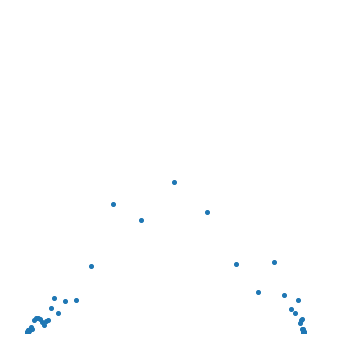

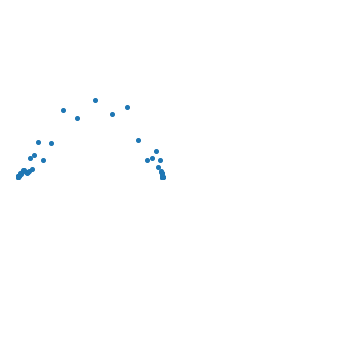

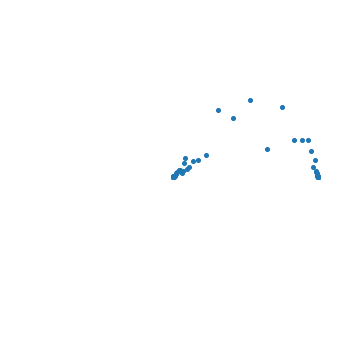

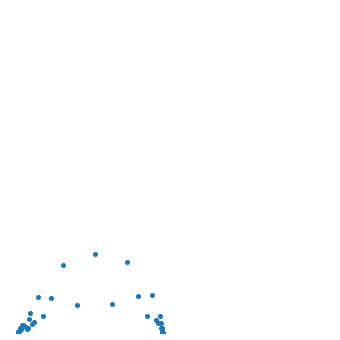

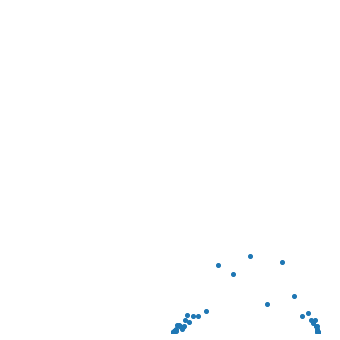

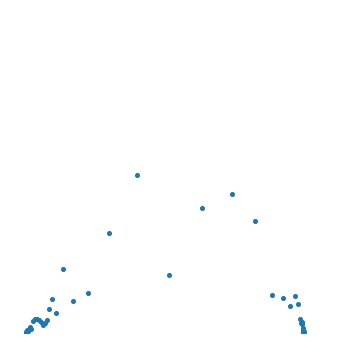

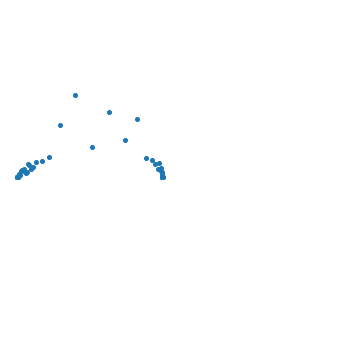

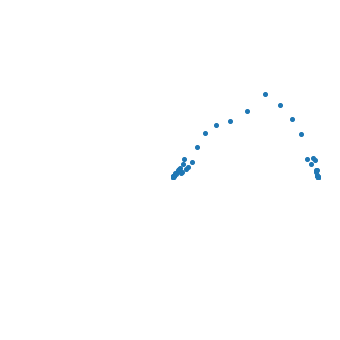

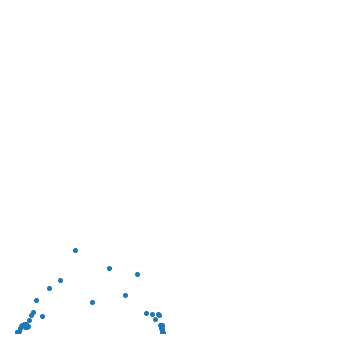

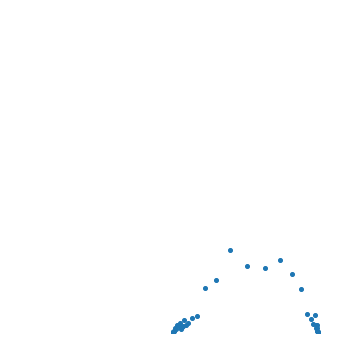

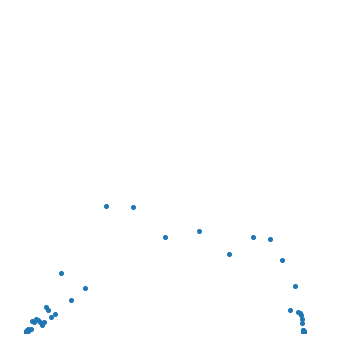

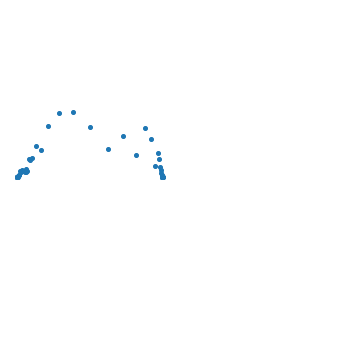

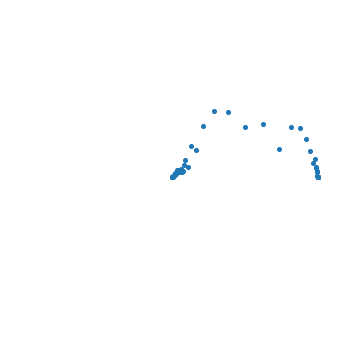

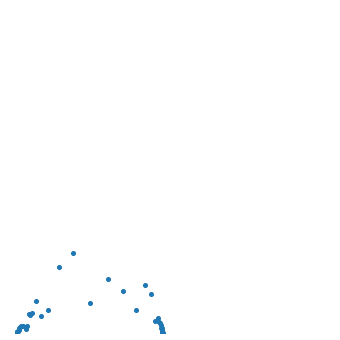

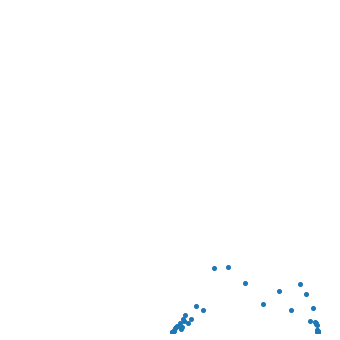

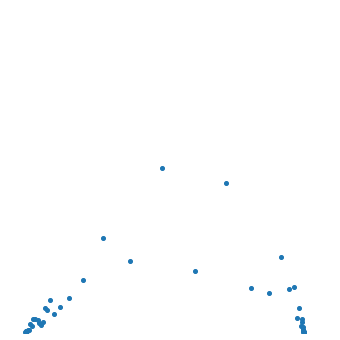

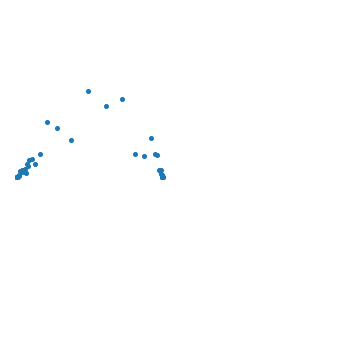

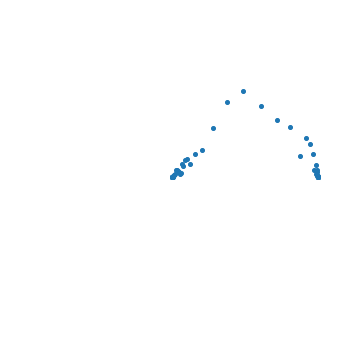

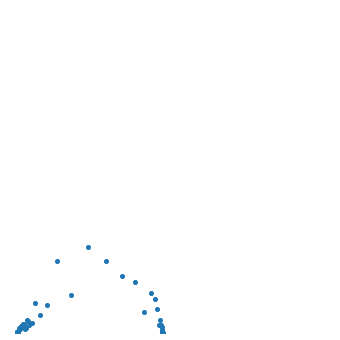

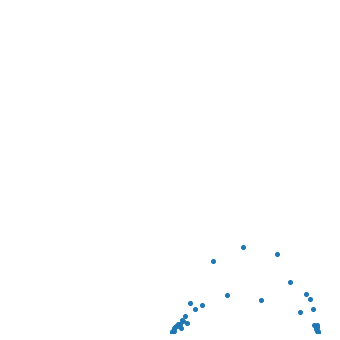

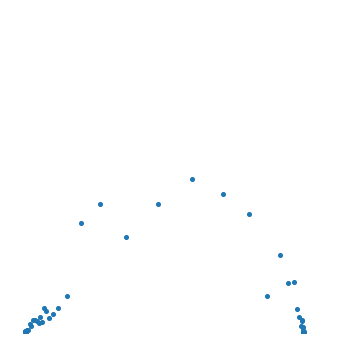

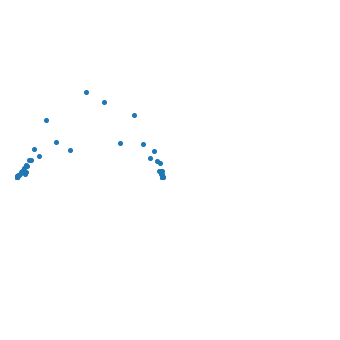

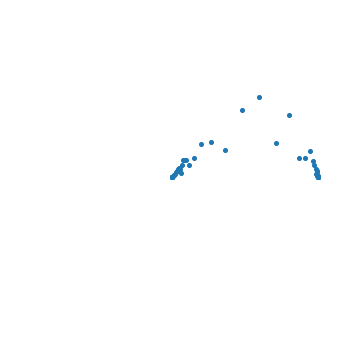

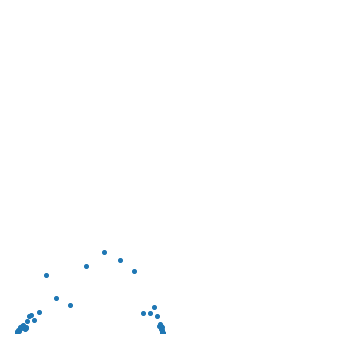

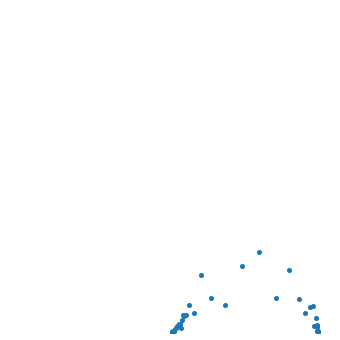

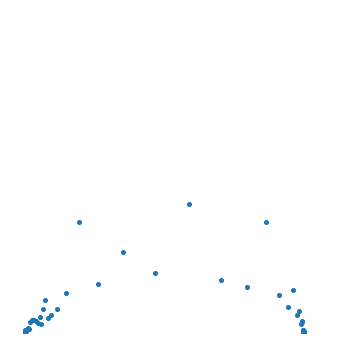

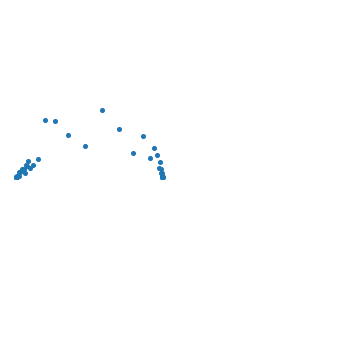

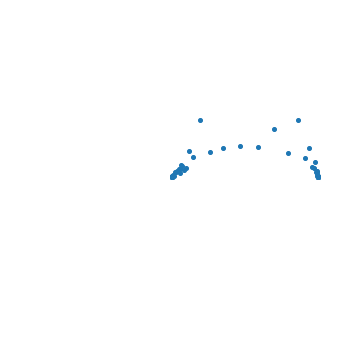

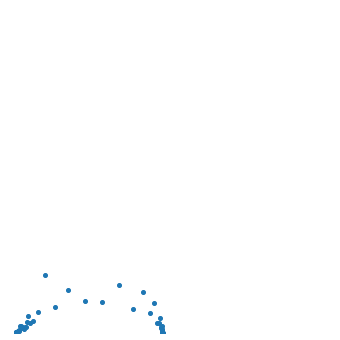

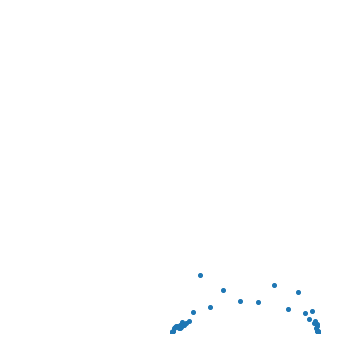

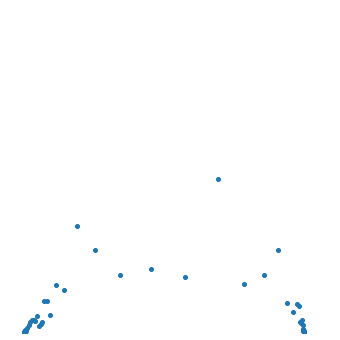

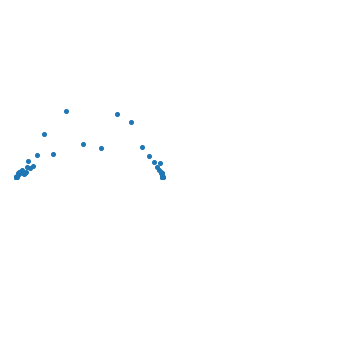

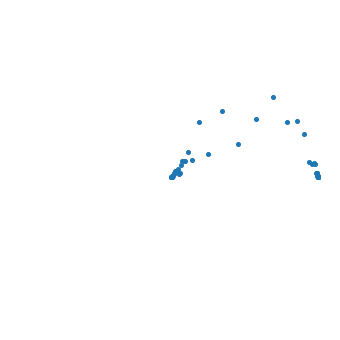

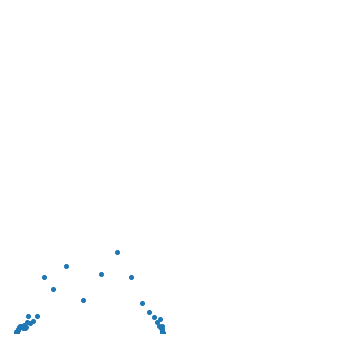

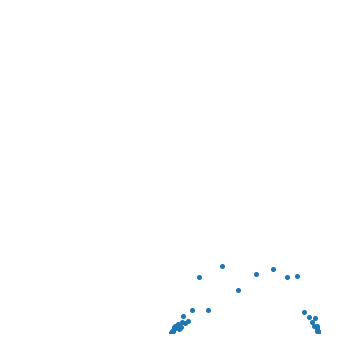

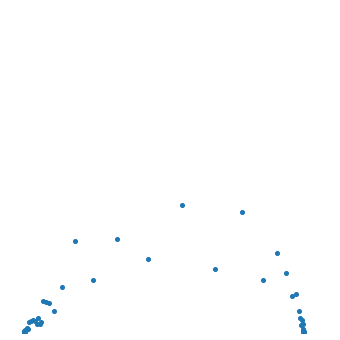

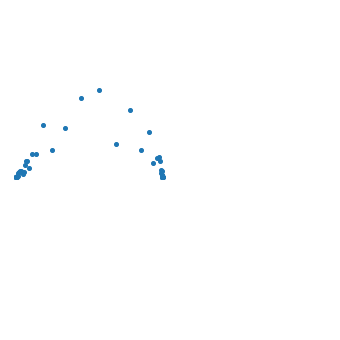

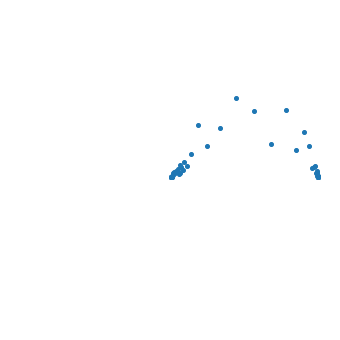

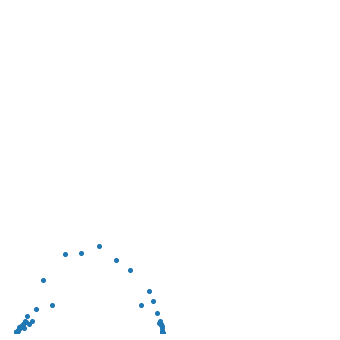

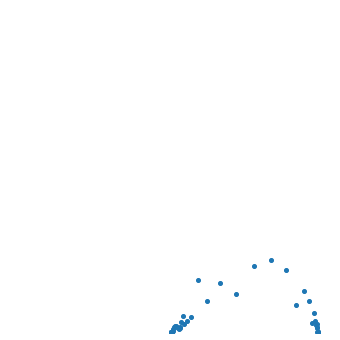

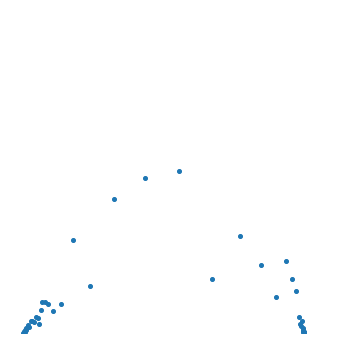

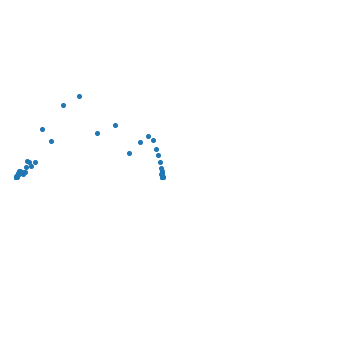

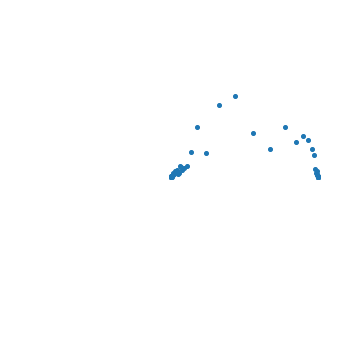

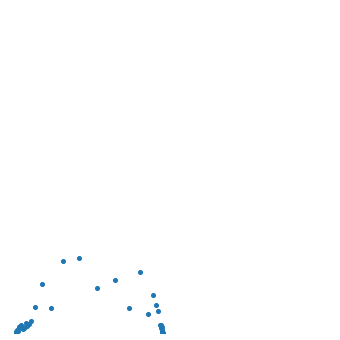

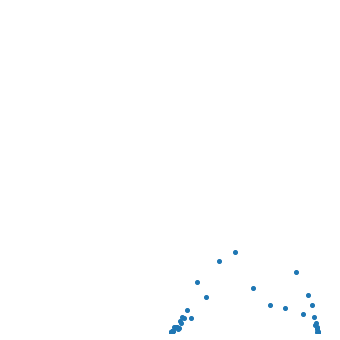

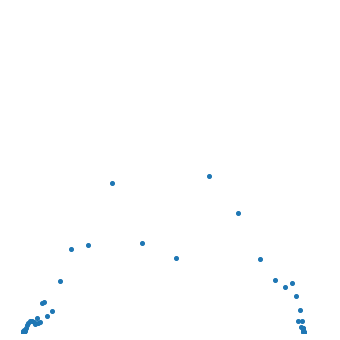

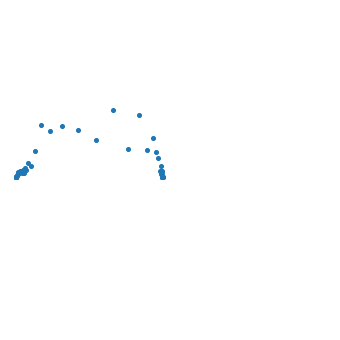

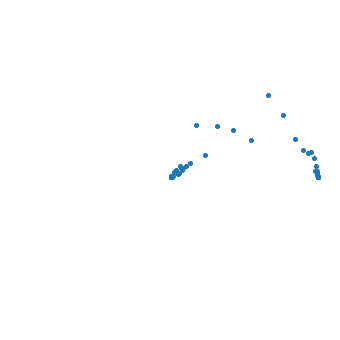

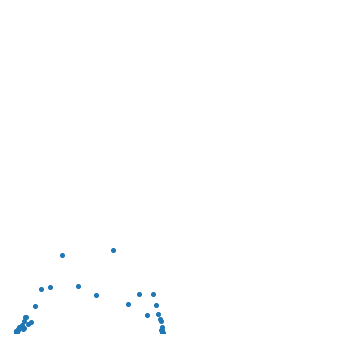

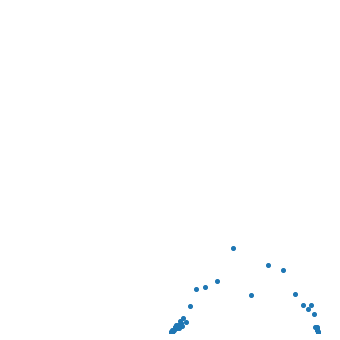

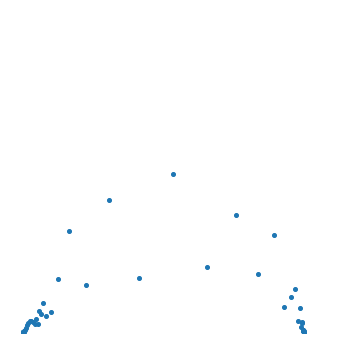

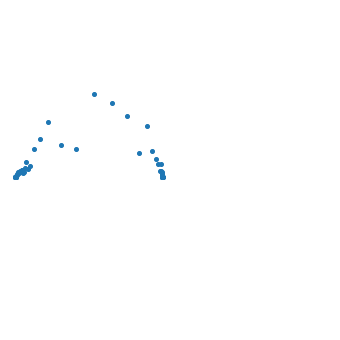

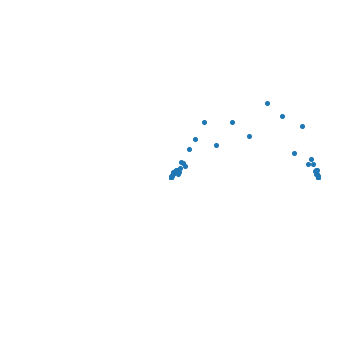

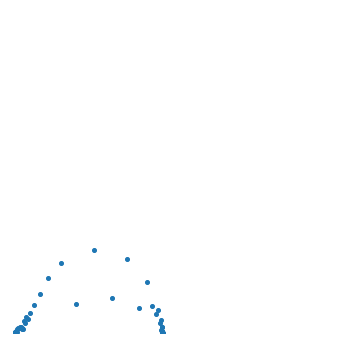

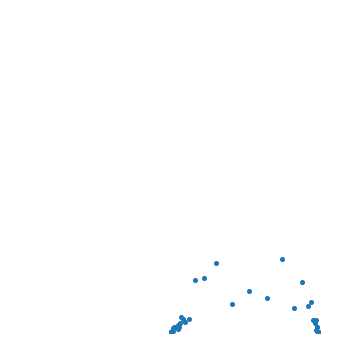

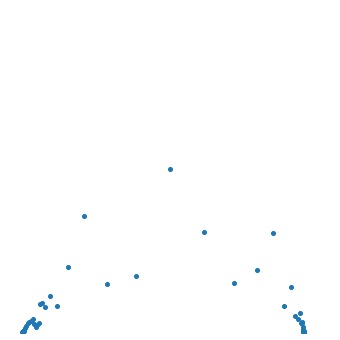

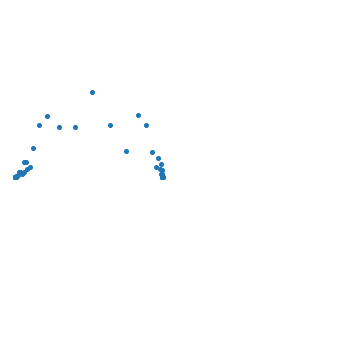

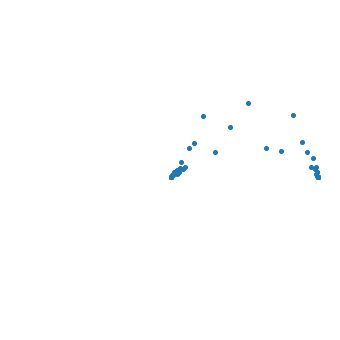

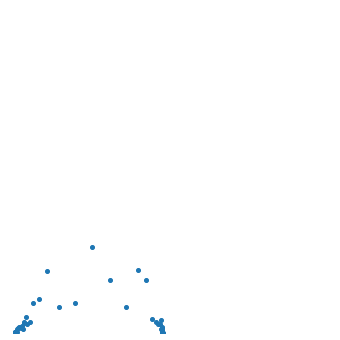

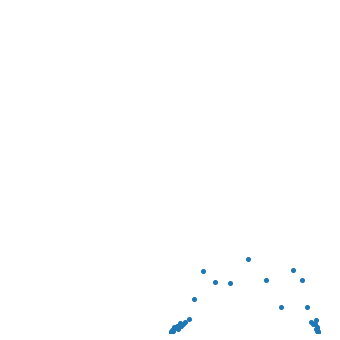

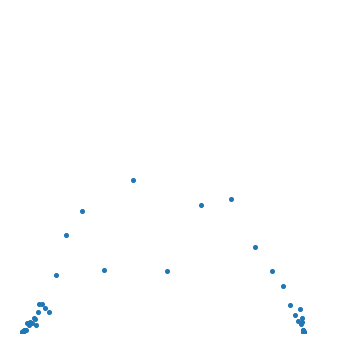

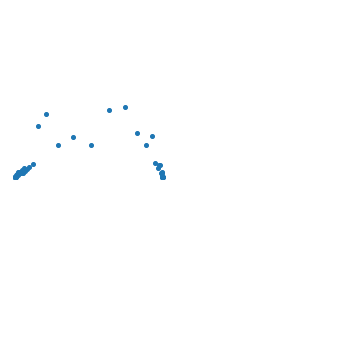

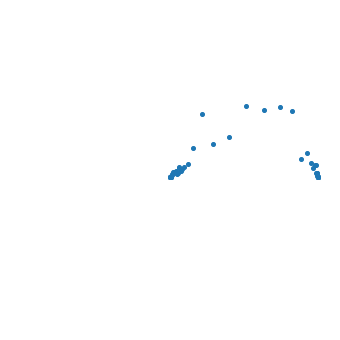

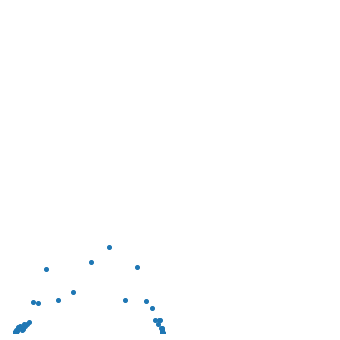

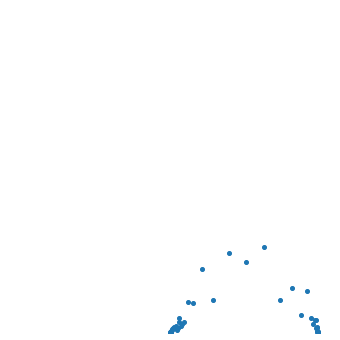

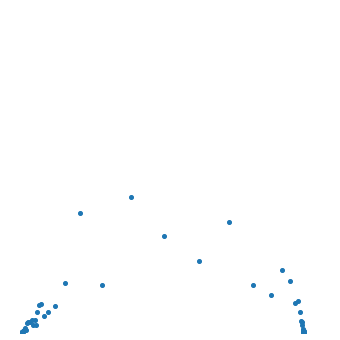

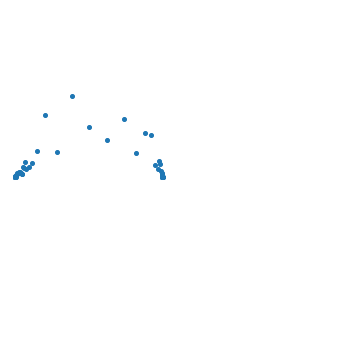

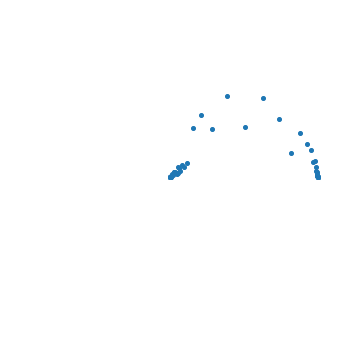

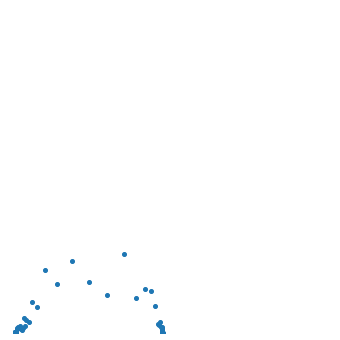

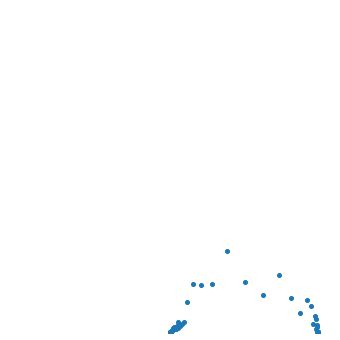

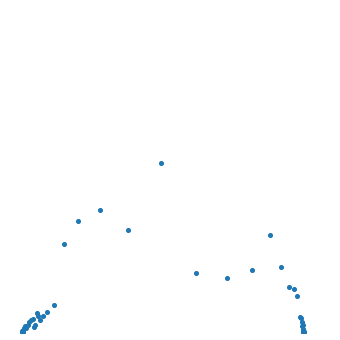

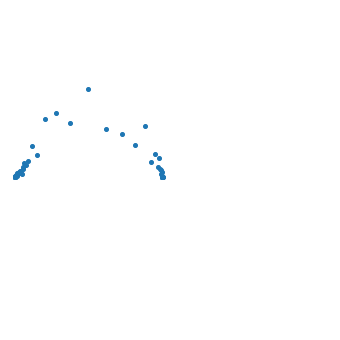

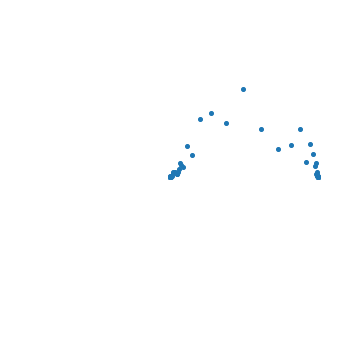

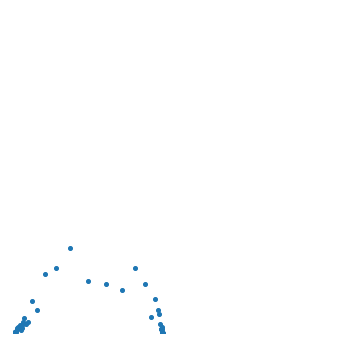

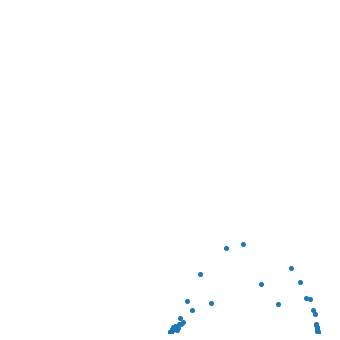

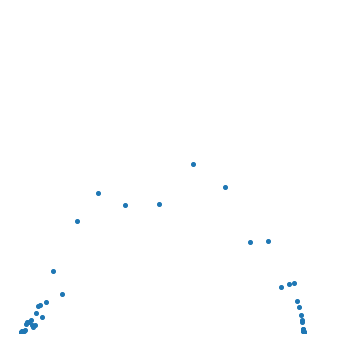

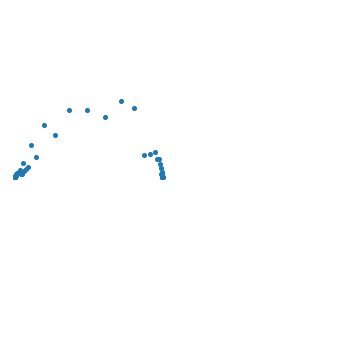

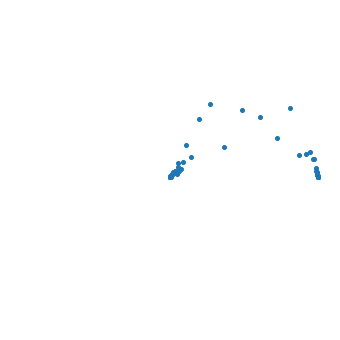

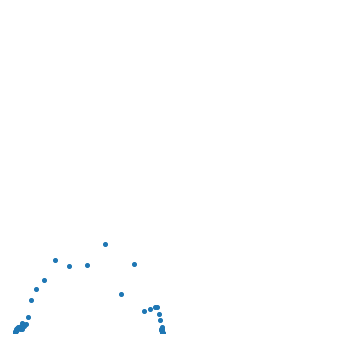

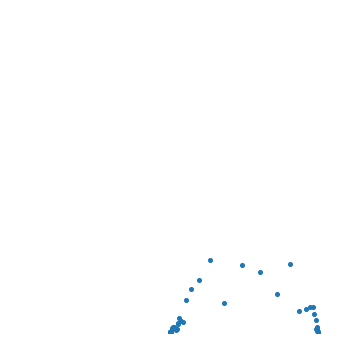

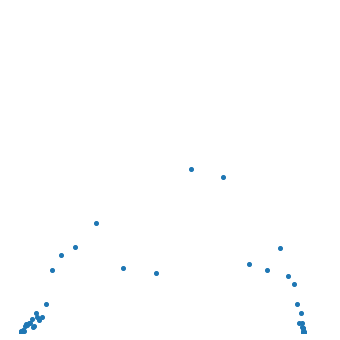

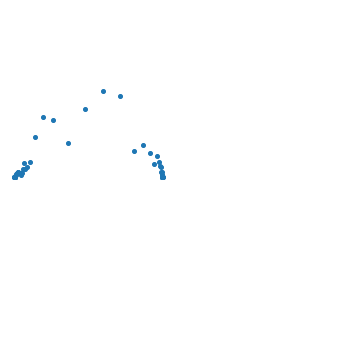

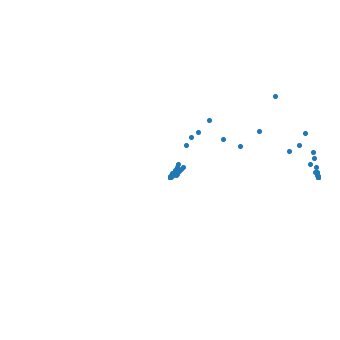

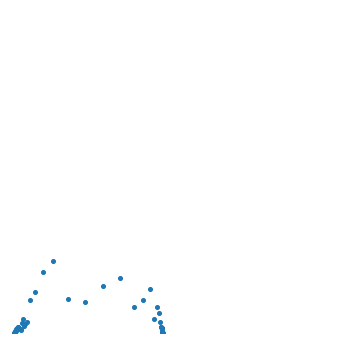

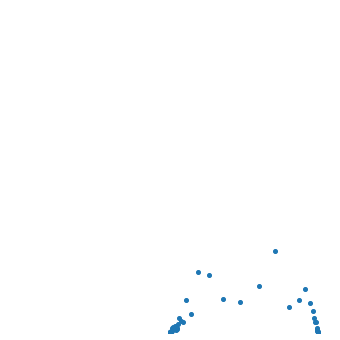

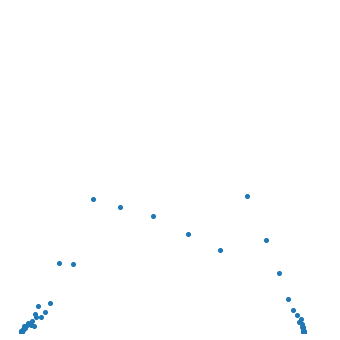

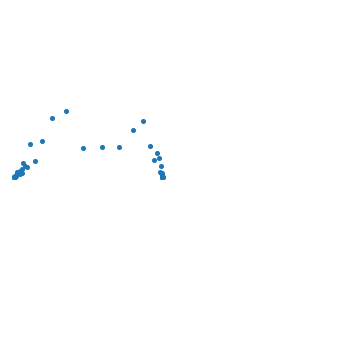

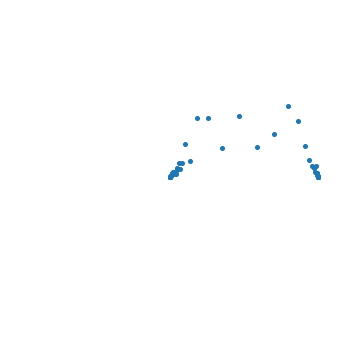

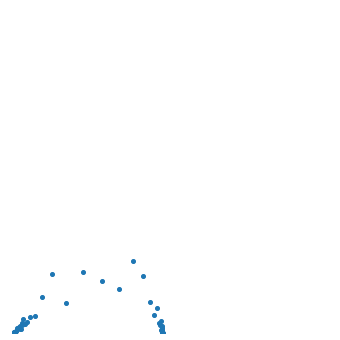

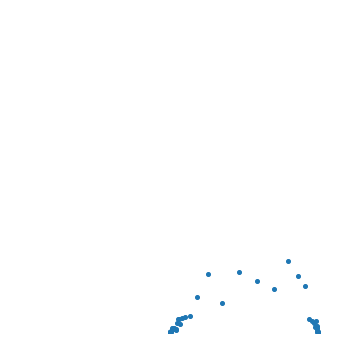

In [25]:
f_start = 10**6
f_stop = 0.01
decades = 7
f_range= circuits.freq_gen(f_start, f_stop, decades)
Rs = 10 # ohm
Q1= 25E-6 #F
alpha1= 0.8
Q2= 2*Q1 #F
alpha2= 0.9
R2= 150   # ohm
R1= 10   # ohm
resistance= np.linspace(1,200,50, dtype= int, endpoint=True)
for R2 in resistance:
    for i in range(5):
        file= data_simulation.RsRQRQ_file_writer(f_start, f_stop, decades, Rs,R1, Q1,alpha1, R2, Q2,alpha2, alteration='noise', noisescale=0.5, save_image=True, position=i,scatter=True,transparent=True, axis_off= True)